In [1]:
import sys
print(sys.path)
from arnie.mfe import mfe
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

['/Users/jgc/Desktop/SSRP_research', '', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Users/jgc/Desktop/SSRP_research/packages', '/Users/jgc/Desktop/SSRP_research', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/jgc/.ipython']


In [2]:
f = open('refseq.txt')
lines = f.readlines()
f.close()
whole_genome = lines[0].strip('\n')

In [3]:
#Looking at whole genome
print(whole_genome)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

for letter in range(0, len(whole_genome)):
               print(whole_genome[letter])

In [6]:
#Fragment genome into 200 nucleotide windows
frag_genome200 =([whole_genome[i:i+200] for i in range(0, len(whole_genome), 200)])

print(frag_genome200)

['ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT', 'TTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACAT', 'CTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGG', 'CGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACG', 'GAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCT

In [7]:
#checking windows before running code 
for window in frag_genome200:
    print(window)
count=0
for window in frag_genome200:
    count=count+1
print("number of fragments", count)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT
TTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACAT
CTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGG
CGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACG
GAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACG

In [12]:
#Actual run for whole genome (200nucleotide window) no shape data
for window in frag_genome200:
    sequence=window

    mfe_rnastructure = mfe(sequence, package='rnastructure', T=24)
    print('MFE without SHAPE signal:\n%s' % mfe_rnastructure)

count=0
for window in frag_genome120:
    count=count+1
print("Number of windows is", count)


MFE without SHAPE signal:
......(((((.(((((....)))))..)))))................((((((((...((((.......))))........((((((((.((.((((.(((.....))).)))))).))))))))..((((((.....))))))(((((...)))))((.(((((...)))))...)).))))))))(((....))).
MFE without SHAPE signal:
.......((((((.......(((((..(((((((.((......)))))))))(((....)))..))))).(((((........)))))..(((((......((((((.......((..((((((...))))))..)))))))))))))(((((.(((((((((((((.....))).)))))..))))).)))))))))))
MFE without SHAPE signal:
......((((((((.((.((((..((..(((((((....(((.....))))))))))..)))))).)).))).)))))...(((..((((((((((.(((((((...(((((((...)))))))....))).))))...))))..))))))...)))..........((((((((...)))).)))).(((......)))
MFE without SHAPE signal:
..........(((((((((.(((.(((((.(((((((((((.((((.......(((((.((.(((..(((((.(((...........)))...)))))..))).)).)))))...)))).).))))))))))...........((.(((((((((..........))))))).)).)))))).).))))))))))..)).
MFE without SHAPE signal:
.((.((.((((((((.((.(((((((((........((((((.....))))))......(((((((

KeyboardInterrupt: 

In [220]:
#Fragment genome into 120 nucleotide windows
frag_genome120 =([whole_genome[i:i+120] for i in range(0, len(whole_genome), 120)])
print(frag_genome120)

['ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACT', 'CACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTT', 'CGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGG', 'AGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAA', 'ACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGG', 'CGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGA', 'TCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG', 'CCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCG', 'TGAACA

In [14]:
#Actual run for whole genome (120nucleotide window) no shape data
for window in frag_genome120:
    sequence=window

    mfe_rnastructure = mfe(sequence, package='rnastructure', T=24)
    print('MFE without SHAPE signal:\n%s' % mfe_rnastructure)
    
count=0
for window in frag_genome120:
    count=count+1
print("Number of windows is", count)

MFE without SHAPE signal:
......(((((.(((((....)))))..)))))...........(((((.....))))).((((.......))))............(((((((.....))))))).(((.....)))..
MFE without SHAPE signal:
...((((((...............)))))).(((((.((((.(((((...)))))...)))).....((((((.(((((......)))))..)))))).....)))))............
MFE without SHAPE signal:
(((((((......)))........)))).((((((.(((...........(((((......((((((.......((..((((((...))))))..)))))))))))))))).))))))..
MFE without SHAPE signal:
...((((.....))))(((((....)))))................((((((((.((.((((..((..(((((((....(((.....))))))))))..)))))).)).))).)))))..
MFE without SHAPE signal:
.(((..((((((((((.(((((((...(((((((...)))))))....))).))))...))))..))))))...)))..........((((((((...)))).)))).(((......)))
MFE without SHAPE signal:
......((((((..((((((.....((((((......))))))))))....))..)))))).((((.((((.((.((((......(((((....))))).)))).)))))))))).....
MFE without SHAPE signal:
(((((.((((....)))).)).....))).(((...((((((((((((((((..((((((.((((....)))).)).))))...))))).))

In [15]:
#New challenge run loop now with shape data
#1 cahnge "nan" in normalized_shape_reactivity to negative number "-1.00"
#2 Make loops similar to one above
#3 target a specific sequence

## Incarado dataset 

In [4]:
#Code to open up csv file and read lines
shape_fname = 'normalized_shape_reactivity.csv' #change name to incarnato later
f = open(shape_fname)
shape_lines_incarnato = f.readlines()
f.close()


In [5]:
print(shape_lines_incarnato)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.136\n', '0.254\n', '0.033\n', '0.148\n', '0.012\n', '0.273\n', '0.141\n', '0.226\n', '0.224\n', '2.206\n', '0.631\n', '1.266\n', '1.714\n', '2.612\n', '0.356\n', '0.0\n', '0.25\n', '0.002\n', '0.065\n', '0.353\n', '0.262\n', '2.096\n', '2.613\n', '0.259\n', '0.929\n', '0.119\n', '0.0\n', '0.25\n', '0.007\n', '0.311\n', '0.0\n', '0.099\n', '0.183\n', '0.307\n', '1.254\n', '0.058\n', '0.57\n', '1.247\n', '0.252\n', '0.529\n', '2.332\n', '0.586\n', '0.249\n', '0.088\n', '0.165\n', '0.0\n', '0.387\n', '0.969\n', '3.621\n', '1.423\n', '1.717\n', '0.466\n', '2.525\n', '0.122\n', '0.017\n', '0.017\n', '0.0\n', '0.046\n', '0.0\n', '0.023\n', '0.0\n', '0.0\n', '0.087\n', '0.048\n', '0.172\n', '1.24\n', '0.013\n', '0.083\n', '0.009\n',

In [6]:
# First thing: make a new empty list
# Return command: used in the case of writing functions
# List: To add to a list, you can use list_name.append(value_to_add)
# != : same thing as "not equals"

shape_lines_no_nan_incarnato = []  #changed name from all_shape_lines_no_nan
for number in shape_lines_incarnato:
    if number == 'nan\n':
        shape_lines_no_nan_incarnato.append(-999)
    else:
        shape_lines_no_nan_incarnato.append(number)
print(shape_lines_no_nan_incarnato)

[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, '0.136\n', '0.254\n', '0.033\n', '0.148\n', '0.012\n', '0.273\n', '0.141\n', '0.226\n', '0.224\n', '2.206\n', '0.631\n', '1.266\n', '1.714\n', '2.612\n', '0.356\n', '0.0\n', '0.25\n', '0.002\n', '0.065\n', '0.353\n', '0.262\n', '2.096\n', '2.613\n', '0.259\n', '0.929\n', '0.119\n', '0.0\n', '0.25\n', '0.007\n', '0.311\n', '0.0\n', '0.099\n', '0.183\n', '0.307\n', '1.254\n', '0.058\n', '0.57\n', '1.247\n', '0.252\n', '0.529\n', '2.332\n', '0.586\n', '0.249\n', '0.088\n', '0.165\n', '0.0\n', '0.387\n', '0.969\n', '3.621\n', '1.423\n', '1.717\n', '0.466\n', '2.525\n', '0.122\n', '0.017\n', '0.017\n', '0.0\n', '0.046\n', '0.0\n', '0.023\n', '0.0\n', '0.0\n', '0.087\n', '0.048\n', '0.172\n', '1.24\n', '0.013\n', '0.083\n', '0.009\n', '0.031\n', '0.008\n', '0.0\n', '0.0\n', '0.072\n', '1.367\n', '2.685\n', '0.581\n', '0

In [7]:
#Make the list into floats 
float_lines_incarnato=[float(i) for i in shape_lines_no_nan_incarnato]

print(float_lines_incarnato)

[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, 0.136, 0.254, 0.033, 0.148, 0.012, 0.273, 0.141, 0.226, 0.224, 2.206, 0.631, 1.266, 1.714, 2.612, 0.356, 0.0, 0.25, 0.002, 0.065, 0.353, 0.262, 2.096, 2.613, 0.259, 0.929, 0.119, 0.0, 0.25, 0.007, 0.311, 0.0, 0.099, 0.183, 0.307, 1.254, 0.058, 0.57, 1.247, 0.252, 0.529, 2.332, 0.586, 0.249, 0.088, 0.165, 0.0, 0.387, 0.969, 3.621, 1.423, 1.717, 0.466, 2.525, 0.122, 0.017, 0.017, 0.0, 0.046, 0.0, 0.023, 0.0, 0.0, 0.087, 0.048, 0.172, 1.24, 0.013, 0.083, 0.009, 0.031, 0.008, 0.0, 0.0, 0.072, 1.367, 2.685, 0.581, 0.378, 0.062, 0.0, 0.066, 0.016, 0.0, 0.018, 0.0, 0.005, 0.0, 0.008, 0.018, 0.025, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.188, 0.593, 0.555, 0.368, 0.838, 2.485, 0.599, 3.109, 1.307, 1.701, 0.991, 0.998, 0.585, 0.562, 2.846, 1.618, 3.282, 2

In [218]:
#Fragment float_lines into 120float windows
#Using same code format as the one for frag_genome120

frag_float_lines =([float_lines_incarnato[i:i+120] for i in range(0, len(float_lines_incarnato), 120)])
print(frag_float_lines)

[[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, 0.136, 0.254, 0.033, 0.148, 0.012, 0.273, 0.141, 0.226, 0.224, 2.206, 0.631, 1.266, 1.714, 2.612, 0.356, 0.0, 0.25, 0.002, 0.065, 0.353, 0.262, 2.096, 2.613, 0.259, 0.929, 0.119, 0.0, 0.25, 0.007, 0.311, 0.0, 0.099, 0.183, 0.307, 1.254, 0.058, 0.57, 1.247, 0.252, 0.529, 2.332, 0.586, 0.249, 0.088, 0.165, 0.0, 0.387, 0.969, 3.621, 1.423, 1.717, 0.466, 2.525, 0.122, 0.017, 0.017, 0.0, 0.046, 0.0, 0.023, 0.0, 0.0, 0.087, 0.048, 0.172, 1.24, 0.013, 0.083, 0.009, 0.031, 0.008, 0.0, 0.0, 0.072, 1.367, 2.685, 0.581, 0.378, 0.062, 0.0, 0.066, 0.016, 0.0, 0.018, 0.0, 0.005, 0.0, 0.008, 0.018, 0.025, 0.1], [0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.188, 0.593, 0.555, 0.368, 0.838, 2.485, 0.599, 3.109, 1.307, 1.701, 0.991, 0.998, 0.585, 0.562, 2.846, 1.618, 3.282

In [221]:
#Checking length of both fragment120 (genome and floats)

print(len(frag_genome120))
print(len(frag_float_lines))

250
250


In [58]:
#Create new loop grouping the indexes of frag_genome120 and frag_float_lines
#This will make the loop run through their index so the shape reactivity data corresponds to the right nucleotide

for idx in range(len(frag_genome120)):
    sequence=frag_genome120[idx]
    current_shape_signal =frag_float_lines[idx]
    
    mfe_rnastructure= mfe(sequence, package='rnastructure', T=24, shape_signal=current_shape_signal)
    print('MFE with SHAPE signal:\n%s' % mfe_rnastructure)

MFE with SHAPE signal:
......(((((.(((((....)))))..)))))..(((......(((((.....))))).((((.......)))).............))).((.((((.(((.....))).))))))..
MFE with SHAPE signal:
...((((.(((...............(((((...)))))...(((((...))))).)))...)))).((((((..((((......))))...))))))(((.........))).......
MFE with SHAPE signal:
...(((......(((....)))....)))((((((.(((...........(((((......((((((.......((..((((((...))))))..)))))))))))))))).))))))..
MFE with SHAPE signal:
...((((.....))))(((((....)))))................((((((((.((.((((..((..(((((((....(((.....))))))))))..)))))).)).)))).))))..
MFE with SHAPE signal:
.(((..((((((((((.(((((((......(((.........)))...))).))))...)))..)))))))...)))..........((((((((...))))).))).(((......)))
MFE with SHAPE signal:
........(((((((((........((((((......))))))..........))))......(((.((((.((.((((......(((((....))))).)))).)))))))))))))).
MFE with SHAPE signal:
(((((.((((....)))).)).....))).......((((((((((((((((..((((((.((((....)))).)).))))...))))).)))).))))))).((........

## Targettting specific positions 

In [142]:
# current_shape_signal
# Say you're trying to predict the structure of RNA from positions 1000 to 1120
# Already have the windows loop
float_lines[999:1120]
# 999 is the index of the 1000th position in the list - cuz we start from 0
# 1119 
# Look up online: "list slicing python", "list indexing python"

[0.118,
 0.285,
 0.72,
 1.052,
 0.084,
 0.428,
 0.0,
 0.044,
 0.0,
 0.026,
 0.084,
 0.811,
 0.701,
 1.888,
 0.562,
 0.599,
 0.482,
 0.09,
 0.0,
 0.003,
 0.026,
 0.0,
 0.0,
 0.0,
 0.039,
 0.04,
 -999.0,
 0.015,
 0.059,
 0.013,
 0.072,
 0.199,
 0.048,
 0.031,
 0.269,
 0.735,
 1.885,
 0.3,
 0.328,
 2.953,
 0.401,
 0.172,
 0.0,
 0.0,
 0.237,
 0.131,
 0.581,
 2.413,
 1.824,
 0.261,
 1.471,
 0.903,
 0.057,
 0.015,
 0.053,
 0.0,
 0.023,
 0.009,
 0.109,
 0.022,
 0.009,
 0.208,
 0.345,
 0.266,
 0.627,
 1.623,
 0.586,
 0.0,
 0.0,
 0.0,
 0.196,
 0.325,
 1.643,
 0.296,
 0.2,
 0.129,
 0.234,
 0.606,
 0.048,
 0.155,
 0.767,
 0.414,
 0.438,
 0.035,
 0.499,
 0.946,
 0.244,
 1.922,
 0.448,
 0.691,
 1.989,
 0.158,
 0.041,
 0.138,
 0.387,
 1.354,
 0.071,
 0.049,
 0.513,
 0.362,
 0.123,
 0.086,
 0.138,
 0.397,
 0.567,
 0.582,
 0.895,
 0.661,
 0.06,
 0.036,
 0.045,
 0.228,
 0.476,
 0.071,
 0.313,
 1.053,
 0.33,
 0.221,
 0.007,
 0.022,
 0.101]

In [24]:
current_shape_signal=float_lines[999:1120]
print(current_shape_signal)

[0.118, 0.285, 0.72, 1.052, 0.084, 0.428, 0.0, 0.044, 0.0, 0.026, 0.084, 0.811, 0.701, 1.888, 0.562, 0.599, 0.482, 0.09, 0.0, 0.003, 0.026, 0.0, 0.0, 0.0, 0.039, 0.04, -1.0, 0.015, 0.059, 0.013, 0.072, 0.199, 0.048, 0.031, 0.269, 0.735, 1.885, 0.3, 0.328, 2.953, 0.401, 0.172, 0.0, 0.0, 0.237, 0.131, 0.581, 2.413, 1.824, 0.261, 1.471, 0.903, 0.057, 0.015, 0.053, 0.0, 0.023, 0.009, 0.109, 0.022, 0.009, 0.208, 0.345, 0.266, 0.627, 1.623, 0.586, 0.0, 0.0, 0.0, 0.196, 0.325, 1.643, 0.296, 0.2, 0.129, 0.234, 0.606, 0.048, 0.155, 0.767, 0.414, 0.438, 0.035, 0.499, 0.946, 0.244, 1.922, 0.448, 0.691, 1.989, 0.158, 0.041, 0.138, 0.387, 1.354, 0.071, 0.049, 0.513, 0.362, 0.123, 0.086, 0.138, 0.397, 0.567, 0.582, 0.895, 0.661, 0.06, 0.036, 0.045, 0.228, 0.476, 0.071, 0.313, 1.053, 0.33, 0.221, 0.007, 0.022, 0.101]


In [27]:
#RNA structure 1000 to 1120
print(whole_genome[999:1120])

TGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAA


In [28]:
sequence=whole_genome[999:1120]
current_shape_signal=float_lines[999:1120]

mfe(sequence, package='rnastructure', T=24, shape_signal=current_shape_signal)
    

'((((.((.((........)).......((((((........(((....(((((((((((((((....))))..)))).)))))))................)))...)))))))).)))).'

## Project: Making secondary structures for mid regions using genome-wide SHAPE data

#Slicing: start point = nucleotide # -1 ;end will remain the same

mid4: 10424-10555
mid3b: 13713-13852
mid5: 17479-17618
mid6: 17815-17954
mid7: 28712-28851
mid8: 28979-29118

In [11]:
def rna_struct_shape(sequence,current_shape_signal):
    
    print(current_shape_signal)
    print(sequence)
    rna_struct = mfe(sequence, package='rnastructure', T=24, shape_signal=current_shape_signal)
    return rna_struct

In [12]:
def percent_similarity_new(genomic_shape,windowed_shape):
    struct_sim= []
    for idx in range(0, len(genomic_shape)):
        if genomic_shape[idx]== windowed_shape[idx]:
            struct_sim.append(1)
        else:
            struct_sim.append(0)
    print(struct_sim)
    a=sum(struct_sim)
    print('Amount of similar bases:', +sum(struct_sim))
    print('Total bases:', +len(struct_sim))
    percentage_same = (sum(struct_sim))/(len(genomic_shape))
    print('Percent similarity:', +percentage_same )

## mid4

In [15]:
mid4_sequence = whole_genome[10423:10555]
mid4_shape_incarnato = float_lines_incarnato[10423:10555]

mid4_struct_incarnato = rna_struct_shape(mid4_sequence, mid4_shape_incarnato)
print(mid4_struct_incarnato)

[0.0, 0.171, 0.477, 0.196, 0.248, 0.347, 1.556, 0.282, 0.023, 0.137, 0.227, 0.732, 0.216, 0.202, 0.045, 0.392, 0.093, 0.344, 1.124, 1.235, 0.327, 1.229, 0.359, 0.493, 0.015, 0.006, 0.507, 0.167, 0.419, 0.468, 0.438, 2.317, 0.552, 0.145, 0.113, 0.153, 0.112, 0.257, 0.143, 0.068, 0.094, 0.05, 0.0, 0.148, 0.31, 2.086, 0.172, 0.81, 0.626, 0.926, 0.022, 0.0, 0.066, 0.097, 0.064, 0.115, 0.153, 0.0, 0.081, 0.433, 0.744, 0.29, 0.962, 0.766, 0.485, 1.039, 0.776, 0.74, 0.294, 1.761, 0.471, 1.6, 0.696, 1.417, 0.673, 0.628, 1.549, 0.224, 0.228, 0.024, 2.034, 0.099, 0.095, 0.064, 0.093, 0.398, 0.455, 1.312, 0.631, 0.329, 1.042, 0.831, 2.076, 0.42, 0.273, 0.728, 0.326, 0.459, 0.118, 0.699, 2.94, 0.086, 0.19, 0.783, 0.849, 1.067, 0.236, 0.199, 1.62, 0.708, 0.238, 0.556, 0.979, 0.404, 0.707, 0.202, 0.0, 0.16, 0.125, 0.032, 0.027, 0.097, 0.076, 0.331, 0.403, 0.0, 0.243, 0.482, 1.225, 0.272, 0.247, 0.768]
GGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGT

In [18]:
#Vanya's mid4 structure (windowed)
mid4_windowed = '((((...................(((.(.....(((((((((((.....))))))))))).....)))).(((((......)))))...............................))))...........'
print(mid4_windowed)

((((...................(((.(.....(((((((((((.....))))))))))).....)))).(((((......)))))...............................))))...........


In [20]:
percent_similarity_new(mid4_struct_incarnato, mid4_windowed)

[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Amount of similar bases: 84
Total bases: 132
Percent similarity: 0.6363636363636364


In [423]:
#VARNA windowed structure
import os
PATH_VARNA_JAR = '/Users/jgc/Desktop/SSRP_research/packages/VARNAv3-93.jar'
def get_varna_command(sequence, secstruct, mapping_data):
	varna_cmd = 'java -cp %s  fr.orsay.lri.varna.applications.VARNAcmd -sequenceDBN %s -structureDBN "%s" -colorMapMin "-0.001" -colorMapMax "2.0" -colorMapStyle "%s" -colorMap "%s"' % \
		(PATH_VARNA_JAR, sequence, secstruct, "-0.001:#C0C0C0,-0.0005:#FFFFFF;0.1:#FFFFFF,0.8:#FF8800;1:#FF0000", ','.join([str(x) for x in mapping_data]))
	return varna_cmd
varna_command = get_varna_command('GGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTA', '((((...................(((.(.....(((((((((((.....))))))))))).....)))).(((((......)))))...............................))))...........', [0.0, 0.171, 0.477, 0.196, 0.248, 0.347, 1.556, 0.282, 0.023, 0.137, 0.227, 0.732, 0.216, 0.202, 0.045, 0.392, 0.093, 0.344, 1.124, 1.235, 0.327, 1.229, 0.359, 0.493, 0.015, 0.006, 0.507, 0.167, 0.419, 0.468, 0.438, 2.317, 0.552, 0.145, 0.113, 0.153, 0.112, 0.257, 0.143, 0.068, 0.094, 0.05, 0.0, 0.148, 0.31, 2.086, 0.172, 0.81, 0.626, 0.926, 0.022, 0.0, 0.066, 0.097, 0.064, 0.115, 0.153, 0.0, 0.081, 0.433, 0.744, 0.29, 0.962, 0.766, 0.485, 1.039, 0.776, 0.74, 0.294, 1.761, 0.471, 1.6, 0.696, 1.417, 0.673, 0.628, 1.549, 0.224, 0.228, 0.024, 2.034, 0.099, 0.095, 0.064, 0.093, 0.398, 0.455, 1.312, 0.631, 0.329, 1.042, 0.831, 2.076, 0.42, 0.273, 0.728, 0.326, 0.459, 0.118, 0.699, 2.94, 0.086, 0.19, 0.783, 0.849, 1.067, 0.236, 0.199, 1.62, 0.708, 0.238, 0.556, 0.979, 0.404, 0.707, 0.202, 0.0, 0.16, 0.125, 0.032, 0.027, 0.097, 0.076, 0.331, 0.403, 0.0, 0.243, 0.482, 1.225, 0.272, 0.247, 0.768])
os.system(varna_command)

0

In [424]:
import os
PATH_VARNA_JAR = '/Users/jgc/Desktop/SSRP_research/packages/VARNAv3-93.jar'
def get_varna_command(sequence, secstruct, mapping_data):
	varna_cmd = 'java -cp %s  fr.orsay.lri.varna.applications.VARNAcmd -sequenceDBN %s -structureDBN "%s" -colorMapMin "-0.001" -colorMapMax "2.0" -colorMapStyle "%s" -colorMap "%s"' % \
		(PATH_VARNA_JAR, sequence, secstruct, "-0.001:#C0C0C0,-0.0005:#FFFFFF;0.1:#FFFFFF,0.8:#FF8800;1:#FF0000", ','.join([str(x) for x in mapping_data]))
	return varna_cmd
varna_command = get_varna_command('GGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTA', '(((....)))..((.(((....))).)).....(((((((((((.....))))))))))).((((((((.((..((.....(((((((.......)))))......)).....)).))))))))))......', [0.0, 0.171, 0.477, 0.196, 0.248, 0.347, 1.556, 0.282, 0.023, 0.137, 0.227, 0.732, 0.216, 0.202, 0.045, 0.392, 0.093, 0.344, 1.124, 1.235, 0.327, 1.229, 0.359, 0.493, 0.015, 0.006, 0.507, 0.167, 0.419, 0.468, 0.438, 2.317, 0.552, 0.145, 0.113, 0.153, 0.112, 0.257, 0.143, 0.068, 0.094, 0.05, 0.0, 0.148, 0.31, 2.086, 0.172, 0.81, 0.626, 0.926, 0.022, 0.0, 0.066, 0.097, 0.064, 0.115, 0.153, 0.0, 0.081, 0.433, 0.744, 0.29, 0.962, 0.766, 0.485, 1.039, 0.776, 0.74, 0.294, 1.761, 0.471, 1.6, 0.696, 1.417, 0.673, 0.628, 1.549, 0.224, 0.228, 0.024, 2.034, 0.099, 0.095, 0.064, 0.093, 0.398, 0.455, 1.312, 0.631, 0.329, 1.042, 0.831, 2.076, 0.42, 0.273, 0.728, 0.326, 0.459, 0.118, 0.699, 2.94, 0.086, 0.19, 0.783, 0.849, 1.067, 0.236, 0.199, 1.62, 0.708, 0.238, 0.556, 0.979, 0.404, 0.707, 0.202, 0.0, 0.16, 0.125, 0.032, 0.027, 0.097, 0.076, 0.331, 0.403, 0.0, 0.243, 0.482, 1.225, 0.272, 0.247, 0.768])
os.system(varna_command)

0

## mid3b

In [210]:
mid3b_sequence=whole_genome[13712:13852]
mid3b_shape_incarnato=float_lines_incarnato[13712:13852]

mid3b_struct_incarnato = rna_struct_shape(mid3b_sequence,mid3b_shape_incarnato)
print(mid3b_struct_incarnato)

[0.0, 0.0, 0.226, 0.261, 0.415, 0.0, 0.059, 0.0, 0.013, 0.059, 0.0, 0.017, 0.076, 0.151, 0.292, 0.122, 0.123, 0.328, 0.564, 0.028, 0.007, 0.405, 0.084, 0.688, 0.466, 0.055, 0.154, 0.07, 0.144, 0.248, 0.0, 0.103, 0.592, 0.374, 0.096, 0.216, 0.58, 0.099, 0.11, 1.731, 1.098, 0.967, 0.851, 0.882, 0.497, 0.569, 0.0, 0.016, 0.0, 0.0, 0.0, 0.047, 0.0, 0.039, 0.0, 0.142, 0.097, 0.0, 0.0, 0.068, 0.236, 0.228, 0.68, 1.561, 1.624, 0.873, 3.45, 0.084, 0.08, 0.008, 0.51, 0.0, 0.016, 0.045, 0.0, 0.0, 0.0, 0.043, 0.033, 0.022, 0.0, 0.019, 0.025, 0.028, 0.0, 0.063, 0.027, 0.113, 0.212, 0.148, 0.897, 3.174, 0.671, 0.19, 0.018, 0.065, 0.124, 0.216, 0.095, 0.142, 0.757, 0.107, 0.154, 0.0, 0.89, 0.0, 0.03, 0.047, 0.028, 0.007, 0.0, 0.002, 0.001, 0.118, 0.086, 0.012, 0.375, 0.384, 1.243, 3.424, 0.542, 0.999, 0.103, 0.0, 0.015, 0.235, 0.106, 0.068, 0.123, 2.738, 0.0, 0.064, 0.053, 0.013, 0.71, 1.247, 0.0, 0.517, 1.55, 0.11]
GGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCT

In [22]:
#Vanya's mid3b structure
mid3b_windowed = ('.............................................(((((.((((.(((((.......))))).)))).))))).....................(((((((.((((......))))...)))).)))..')
print(mid3b_windowed)

.............................................(((((.((((.(((((.......))))).)))).))))).....................(((((((.((((......))))...)))).)))..


In [23]:
percent_similarity_new(mid3b_struct_incarnato, mid3b_windowed)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]
Amount of similar bases: 100
Total bases: 140
Percent similarity: 0.7142857142857143


In [420]:
import os
PATH_VARNA_JAR = '/Users/jgc/Desktop/SSRP_research/packages/VARNAv3-93.jar'
def get_varna_command(sequence, secstruct, mapping_data):
	varna_cmd = 'java -cp %s  fr.orsay.lri.varna.applications.VARNAcmd -sequenceDBN %s -structureDBN "%s" -colorMapMin "-0.001" -colorMapMax "2.0" -colorMapStyle "%s" -colorMap "%s"' % \
		(PATH_VARNA_JAR, sequence, secstruct, "-0.001:#C0C0C0,-0.0005:#FFFFFF;0.1:#FFFFFF,0.8:#FF8800;1:#FF0000", ','.join([str(x) for x in mapping_data]))
	return varna_cmd
varna_command = get_varna_command('GGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTA', '(((...))).(((((((........(((((....))))).((...(((((.((((.(((((.......))))).)))).)))))..)).......)))))))..((((((((.(((((....)))))...))))).))).', [0.0, 0.0, 0.226, 0.261, 0.415, 0.0, 0.059, 0.0, 0.013, 0.059, 0.0, 0.017, 0.076, 0.151, 0.292, 0.122, 0.123, 0.328, 0.564, 0.028, 0.007, 0.405, 0.084, 0.688, 0.466, 0.055, 0.154, 0.07, 0.144, 0.248, 0.0, 0.103, 0.592, 0.374, 0.096, 0.216, 0.58, 0.099, 0.11, 1.731, 1.098, 0.967, 0.851, 0.882, 0.497, 0.569, 0.0, 0.016, 0.0, 0.0, 0.0, 0.047, 0.0, 0.039, 0.0, 0.142, 0.097, 0.0, 0.0, 0.068, 0.236, 0.228, 0.68, 1.561, 1.624, 0.873, 3.45, 0.084, 0.08, 0.008, 0.51, 0.0, 0.016, 0.045, 0.0, 0.0, 0.0, 0.043, 0.033, 0.022, 0.0, 0.019, 0.025, 0.028, 0.0, 0.063, 0.027, 0.113, 0.212, 0.148, 0.897, 3.174, 0.671, 0.19, 0.018, 0.065, 0.124, 0.216, 0.095, 0.142, 0.757, 0.107, 0.154, 0.0, 0.89, 0.0, 0.03, 0.047, 0.028, 0.007, 0.0, 0.002, 0.001, 0.118, 0.086, 0.012, 0.375, 0.384, 1.243, 3.424, 0.542, 0.999, 0.103, 0.0, 0.015, 0.235, 0.106, 0.068, 0.123, 2.738, 0.0, 0.064, 0.053, 0.013, 0.71, 1.247, 0.0, 0.517, 1.55, 0.11]


SyntaxError: unexpected EOF while parsing (<ipython-input-420-ac4bbd5968bb>, line 7)

## mid5

In [24]:
mid5_sequence = whole_genome[17478:17618]
mid5_shape_incarnato = float_lines_incarnato[17478:17618]

mid5_struct_incarnato= rna_struct_shape(mid5_sequence,mid5_shape_incarnato)
print(mid5_struct_incarnato)

[0.0, 0.018, 0.103, 0.086, 0.01, 0.109, 0.533, 0.802, 1.976, 0.0, 0.14, 0.221, 0.187, 0.874, 0.366, 1.333, 1.056, 1.411, 2.55, 1.976, 1.382, 1.364, 0.731, 0.306, 0.367, 0.829, 0.11, 0.501, 0.166, 0.278, 0.029, 0.092, 0.0, 0.046, 0.11, 0.618, 1.011, 0.293, 0.477, 0.028, 0.438, 0.428, 0.363, 1.159, 2.934, 0.105, 0.122, 0.086, 1.284, 0.112, 0.207, 0.3, 0.125, 2.286, 0.018, 0.03, 0.038, 0.141, 0.26, 0.29, 0.0, 0.125, 0.065, 0.142, 0.027, 0.0, 0.034, 0.066, 0.048, 0.324, 0.707, 0.885, 0.055, 0.0, 0.033, 0.029, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.227, 0.0, 0.029, 0.07, 0.054, 0.322, 0.037, 0.026, 0.038, 0.07, 0.048, 0.086, 0.082, 0.256, 1.712, 4.541, 0.941, 0.152, 0.388, 0.165, 0.305, 0.584, 0.733, 0.287, 0.543, 3.193, 0.65, 1.186, 0.322, 3.799, 1.664, 0.708, 0.026, 0.166, 0.0, 0.031, 0.031, 0.065, 0.0, 0.063, 0.01, 0.031, 0.117, 0.175, 0.114, 1.126, 0.162, 1.111, 3.999, 0.424, 0.188, 0.072, 1.479, 0.513, 0.083, 0.794]
GGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACAT

In [25]:
#Vanya's mid5 structure
mid5_windowed = ('(((((......(.(((.......(((((((((.....(((((((.......)))))))..((((.((((....)))).))))((......)).))))).))))......))))..)))))..(((((........)))))')
print(mid5_windowed)

(((((......(.(((.......(((((((((.....(((((((.......)))))))..((((.((((....)))).))))((......)).))))).))))......))))..)))))..(((((........)))))


In [26]:
percent_similarity_new(mid5_struct_incarnato, mid5_windowed)

[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
Amount of similar bases: 87
Total bases: 140
Percent similarity: 0.6214285714285714


## mid6

In [27]:
mid6_sequence=whole_genome[17814:17954]
mid6_shape_incarnato=float_lines_incarnato[17814:17954]

mid6_struct_incarnato= rna_struct_shape(mid6_sequence,mid6_shape_incarnato)
print(mid6_struct_incarnato)

[0.0, 0.0, 0.039, 0.007, 0.074, 0.117, 0.148, 0.092, 0.483, 0.615, 0.507, 0.897, 1.305, 0.179, 0.159, 1.073, 0.044, 0.024, 0.866, 1.392, 0.606, 0.588, 0.789, 0.744, 1.376, 0.432, 1.697, 0.126, 0.173, 1.757, 0.215, 1.236, 0.0, 0.0, 0.0, 0.18, 0.38, 1.245, 1.605, 0.063, 0.148, 0.017, 0.028, 0.011, 0.025, 0.0, 0.0, 0.498, 0.726, 1.627, 1.654, 0.0, 0.0, 0.001, 0.045, 0.035, 0.18, 0.348, 0.106, 0.039, 0.208, 0.135, 1.791, 0.205, 0.265, 0.482, 1.851, 0.22, 0.398, 0.979, 1.179, 0.618, 0.804, 0.338, 0.169, 1.46, 0.09, 0.196, 0.03, 0.047, 0.205, 0.526, 0.915, 0.075, 0.181, 0.115, 0.125, 0.13, 0.018, 0.131, 0.07, 0.271, 0.105, 0.598, 1.077, 0.101, 0.201, 1.368, 0.097, 0.163, 0.883, 1.657, 0.396, 0.603, 5.178, 1.748, 2.01, 0.736, 0.02, 0.099, 0.076, 0.0, 0.092, 0.129, 0.114, 0.349, 0.058, 0.361, 0.084, 0.095, 0.222, 0.0, 0.037, 0.29, 0.348, 0.068, 0.063, 0.106, 1.598, 0.303, 0.551, 0.54, 0.016, 0.0, 0.012, 0.415, 0.574, 1.899, 0.354, 0.948]
GGACTACCAACTCAAACTGTTGATTCATCACAGGGCTCAGAATATGACTATGTCAT

In [28]:
#Vanya's mid6 structure
mid6_windowed= ('................(((((.........(((((....(((((((((...))))))))).......)).))).)))))....((((.((((((..((((.......))))..)))))).))))................')
print(mid6_windowed)

................(((((.........(((((....(((((((((...))))))))).......)).))).)))))....((((.((((((..((((.......))))..)))))).))))................


In [29]:
percent_similarity_new(mid6_struct_incarnato, mid6_windowed)

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Amount of similar bases: 107
Total bases: 140
Percent similarity: 0.7642857142857142


## mid7

In [30]:
mid7_sequence=whole_genome[28711:28851]
mid7_shape_incarnato=float_lines_incarnato[28711:28851]

mid7_struct_incarnato = rna_struct_shape(mid7_sequence,mid7_shape_incarnato)
print(mid7_struct_incarnato)

[0.0, 0.0, 0.049, 0.178, 0.07, 0.043, 0.058, 0.0, 0.016, 0.024, 0.103, 0.074, 0.005, 0.03, 0.272, 1.025, 0.122, 0.255, 0.206, 0.837, 0.245, 0.477, 0.519, 0.054, 0.0, 0.018, 0.04, 0.066, 0.392, 0.079, 1.572, 0.597, 0.723, 0.524, 0.263, 0.718, 0.033, 0.336, 0.993, 0.139, 1.364, 0.56, 0.501, 0.299, 0.216, 0.004, 0.022, 0.119, 0.074, 0.144, 0.244, 0.0, 0.0, 0.032, 0.047, 0.04, 0.071, 0.214, 0.654, 2.944, 0.022, 0.065, 0.0, 0.0, 0.0, 0.058, 0.134, 0.022, 1.171, 0.0, 0.0, 0.017, 0.026, 0.0, 0.0, 0.0, 0.015, 0.017, 0.0, 0.065, 0.224, 0.0, 0.19, 0.225, 0.0, 0.0, 0.0, 0.028, 0.0, 0.001, 0.012, 0.0, 0.0, 0.0, 0.0, 0.116, 0.0, 0.0, 0.017, 0.118, 0.228, 0.85, 0.178, 0.094, 0.541, 0.0, 0.012, 0.013, 0.032, 0.0, 0.041, 0.029, 0.116, 0.016, 0.147, 0.0, 0.036, 0.075, 0.005, 0.015, 0.368, 0.043, 2.143, 0.009, 0.014, 0.09, 0.024, 0.0, 0.004, 0.023, 0.0, 0.009, 0.019, 0.022, 0.065, 0.139, 1.395, 0.21, 0.798, 0.116]
GGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGC

In [31]:
#Vanya's mid7 structure
mid7_windowed = ('((((........((.............((......))..............))........)))).....((..(((((..((.(((((((((((.(((......))).))))).))))))..)).)))))..)).....')
print(mid7_windowed)

((((........((.............((......))..............))........)))).....((..(((((..((.(((((((((((.(((......))).))))).))))))..)).)))))..)).....


In [32]:
percent_similarity_new(mid7_struct_incarnato, mid7_windowed)

[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Amount of similar bases: 114
Total bases: 140
Percent similarity: 0.8142857142857143


## mid 8

In [33]:
mid8_sequence=whole_genome[28978:29118]
mid8_shape_incarnato=float_lines_incarnato[28978:29118]

mid8_struct_incarnato=rna_struct_shape(mid8_sequence,mid8_shape_incarnato)
print(mid8_struct_incarnato)

[0.0, 0.271, 0.851, 0.456, 0.319, 1.536, 0.0, 0.0, 0.003, 0.075, 0.324, 0.465, 0.089, 0.141, 0.258, 0.059, 0.067, 0.198, 0.53, 0.917, 2.774, 0.0, 0.0, 0.03, 1.035, 0.028, 0.102, 0.286, 0.061, 0.023, 0.0, 0.088, 0.028, 0.132, 0.398, 0.68, 0.271, 0.837, 0.464, 0.377, 0.993, 1.276, 0.134, 0.145, 0.534, 0.953, 0.098, 0.012, 0.0, 0.0, 0.0, 0.33, 0.01, 0.0, 0.0, 0.142, 0.098, 0.107, 0.999, 1.258, 2.259, 2.73, 0.145, 0.068, 0.031, 0.0, 0.132, 0.006, 0.0, 0.0, 0.0, 0.0, -999.0, 0.034, 0.013, 0.014, 0.024, 1.011, 0.118, 0.086, 1.117, 3.284, 0.015, 0.014, 0.0, 0.002, 0.088, 1.285, 0.978, 3.164, 0.082, 0.025, 0.311, 0.0, 0.03, 0.199, 0.571, 2.424, 0.65, 0.772, 3.036, 1.05, 1.096, 1.714, 1.241, 0.65, 0.427, 0.213, 0.31, 2.213, 1.235, 0.0, 0.008, 0.103, 0.193, 0.601, 0.644, 0.0, 0.0, 0.0, 0.007, 0.0, 0.014, 0.001, 0.0, 0.659, 0.0, 0.0, 0.014, 0.048, 0.085, 0.16, 0.2, 0.608, 0.322, 0.22, 0.453, 0.544, 0.543, 0.213]
GGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTG

In [34]:
#Vanya's mid8 structure
mid8_windowed = ('......((((...........)))).................((((.((((((((((((...))))))))))))...((((.(((((...(((((................))))).)))))))))....))))......')
print(mid8_windowed)

......((((...........)))).................((((.((((((((((((...))))))))))))...((((.(((((...(((((................))))).)))))))))....))))......


In [35]:
percent_similarity_new(mid8_struct_incarnato, mid8_windowed)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Amount of similar bases: 130
Total bases: 140
Percent similarity: 0.9285714285714286


In [8]:
nan = np.nan

## New dataset : Pyle

In [9]:
shape_pyle = 'pyle_normalized_reactivity.csv'
f = open(shape_pyle)
shape_lines_pyle = f.readlines()
f.close()

In [10]:
print(shape_lines_pyle)

['-999\n', '-999\n', '-999\n', '-999\n', '-999\n', '-999\n', '-0.228458\n', '0.002349\n', '-0.009397\n', '-0.049627\n', '0.022905\n', '-0.011452\n', '-0.029952\n', '0.018500\n', '-0.083983\n', '0.009690\n', '-0.953182\n', '-0.016444\n', '-0.040230\n', '-0.000294\n', '0.445171\n', '-0.001175\n', '0.448401\n', '-0.001468\n', '0.033182\n', '-0.015857\n', '-0.044341\n', '0.354140\n', '0.088388\n', '-0.039349\n', '0.003230\n', '0.029071\n', '0.202617\n', '-0.034357\n', '0.048158\n', '0.119808\n', '0.828969\n', '-0.019381\n', '0.045809\n', '0.027897\n', '0.313323\n', '0.624296\n', '0.613138\n', '1.297338\n', '0.194689\n', '-0.051682\n', '-0.070182\n', '0.093380\n', '0.042285\n', '0.064603\n', '1.421551\n', '7.575538\n', '0.619892\n', '4.546263\n', '-0.025254\n', '0.169729\n', '-0.050508\n', '-0.022905\n', '0.238736\n', '2.526256\n', '0.490980\n', '0.003230\n', '0.031127\n', '0.196744\n', '0.914714\n', '0.276910\n', '3.902586\n', '0.004698\n', '-0.079285\n', '0.036706\n', '-0.096904\n', '0.86

In [11]:
def shape_float(all_shape_lines):
    all_shape_lines_no_nan = []
    for number in all_shape_lines:
        if number == 'nan\n':
            all_shape_lines_no_nan.append(-999)
        else:
            all_shape_lines_no_nan.append(number)
    
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return float_lines

In [19]:
def shape_lines_for_heatmap(shape_lines):
    all_shape_lines_no_nan = []
    for number in shape_lines:
        if number == '-999\n':
            all_shape_lines_no_nan.append('nan')
        elif number =='nan\n':
             all_shape_lines_no_nan.append('nan')
        elif number < '0':
            all_shape_lines_no_nan.append(0)
        elif number > '2':
            all_shape_lines_no_nan.append(2)
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)

In [227]:
shape_lines_for_heatmap(shape_lines_pyle)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.002349,
 0.0,
 0.0,
 0.022905,
 0.0,
 0.0,
 0.0185,
 0.0,
 0.00969,
 0.0,
 0.0,
 0.0,
 0.0,
 0.445171,
 0.0,
 0.448401,
 0.0,
 0.033182,
 0.0,
 0.0,
 0.35414,
 0.088388,
 0.0,
 0.00323,
 0.029071,
 0.202617,
 0.0,
 0.048158,
 0.119808,
 0.828969,
 0.0,
 0.045809,
 0.027897,
 0.313323,
 0.624296,
 0.613138,
 1.297338,
 0.194689,
 0.0,
 0.0,
 0.09338,
 0.042285,
 0.064603,
 1.421551,
 2.0,
 0.619892,
 2.0,
 0.0,
 0.169729,
 0.0,
 0.0,
 0.238736,
 2.0,
 0.49098,
 0.00323,
 0.031127,
 0.196744,
 0.914714,
 0.27691,
 2.0,
 0.004698,
 0.0,
 0.036706,
 0.0,
 0.862151,
 0.0,
 0.031127,
 0.0,
 0.647788,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.446345,
 0.000294,
 0.0,
 0.0,
 0.0,
 0.024079,
 0.0,
 0.01204,
 0.149467,
 0.063722,
 0.09984,
 0.064896,
 0.045809,
 0.697415,
 0.170022,
 0.0,
 0.065484,
 0.074293,
 0.12157,
 0.0,
 0.011452,
 0.033476,
 0.357957,
 0.841009,
 2.0,
 0.023492,
 1.632391,
 0.0,
 0.032008,
 0.0,
 0.011452,
 0.059023,
 0.0,
 0.113642,
 0

In [20]:
float_lines_pyles=shape_float(shape_lines_pyle)
print(float_lines_pyles)

[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -0.228458, 0.002349, -0.009397, -0.049627, 0.022905, -0.011452, -0.029952, 0.0185, -0.083983, 0.00969, -0.953182, -0.016444, -0.04023, -0.000294, 0.445171, -0.001175, 0.448401, -0.001468, 0.033182, -0.015857, -0.044341, 0.35414, 0.088388, -0.039349, 0.00323, 0.029071, 0.202617, -0.034357, 0.048158, 0.119808, 0.828969, -0.019381, 0.045809, 0.027897, 0.313323, 0.624296, 0.613138, 1.297338, 0.194689, -0.051682, -0.070182, 0.09338, 0.042285, 0.064603, 1.421551, 7.575538, 0.619892, 4.546263, -0.025254, 0.169729, -0.050508, -0.022905, 0.238736, 2.526256, 0.49098, 0.00323, 0.031127, 0.196744, 0.914714, 0.27691, 3.902586, 0.004698, -0.079285, 0.036706, -0.096904, 0.862151, -0.009984, 0.031127, -0.82339, 0.647788, -0.861858, -0.588765, -0.449282, -0.005286, -0.058436, 0.446345, 0.000294, -0.434306, -0.032008, -0.759668, 0.024079, -0.197038, 0.01204, 0.149467, 0.063722, 0.09984, 0.064896, 0.045809, 0.697415, 0.170022, -0.015857, 0.065484, 0.074293

#new 
heatmap_shape_data_incarnato = shape_heatmap(shape_lines_incarnato)
print(heatmap_shape_data_incarnato)

In [49]:
#mid3b
mid3b_sequence = whole_genome[13712:13852]
mid3b_shape_pyle = float_lines_pyles[13712:13852]

mid3b_stuct_pyle = rna_struct_shape(mid3b_sequence,mid3b_shape_pyle)
print(mid3b_stuct_pyle)

[1.432123, -0.134491, -0.03465, 2.702151, 1.622994, -0.324188, -0.337989, -0.397306, 0.513297, -0.174133, 0.055793, 0.49421, 0.688899, -0.421385, -0.009984, 1.658232, 0.543837, 0.337696, 2.258155, -0.368529, -0.004992, 0.12157, 0.907667, 0.200268, 3.467986, -0.214657, -0.071063, 0.09984, -0.324188, -0.246077, -0.303926, -0.784041, -0.49098, 0.791088, 0.005873, 0.008809, 0.574376, 0.421092, 0.619304, 2.205299, -0.063428, 0.505662, 0.991063, -0.012627, -0.256649, 0.120396, -0.175308, -0.134197, 1.109403, -0.307743, -0.747335, 0.209371, -0.071944, -0.317727, -0.213482, -0.071357, 0.730891, -0.545598, -0.077229, 0.382624, 0.191165, -0.151523, 1.022777, -0.0185, 0.787858, 0.118928, 2.320409, -0.075761, -0.425496, -0.101896, -0.718851, 0.395544, 0.04023, 0.557638, 0.634574, 0.634868, -0.242553, 0.015857, -0.022611, -0.344156, -0.048158, 0.707986, -0.189109, 0.323894, -0.123332, -0.089269, -0.216712, -0.213189, -0.002643, -0.010571, -0.480996, 0.330354, 0.006754, -0.061666, 0.002056, -0.18940

In [228]:
mid4_sequence = whole_genome[10423:10555]
mid4_shape_pyle = float_lines_pyles[10423:10555]

mid4_struct_pyle = rna_struct_shape(mid4_sequence, mid4_shape_pyle)
print(mid4_struct_pyle)

[0.259585, 0.100134, 0.088388, 0.056968, 0.577313, 1.229505, 0.681851, -0.139777, 0.082222, 0.002643, -0.079579, 0.005579, 0.591408, 0.104539, 0.624884, 0.305394, 0.289537, 0.883881, -0.090737, 2.031165, 0.899445, 0.008516, 0.475123, 1.334044, -0.008516, 0.154165, 0.74939, -0.007929, 0.135959, 0.409052, 0.742343, 0.508892, 0.212601, 0.012333, 0.130673, 0.36706, 0.015563, 0.123332, 0.567916, 0.125388, -0.070476, 0.216712, -0.04669, 0.253418, 0.433131, 1.937198, 0.257823, 0.29218, 0.379981, 0.604328, -0.098372, -0.078698, -0.049627, 0.16738, -0.106301, -0.027603, 0.110412, -0.098372, 0.006167, 0.27368, 0.122745, -0.135666, -0.027897, 1.107935, 0.121277, 0.608146, 0.527099, 0.261053, 0.7582, 0.007048, 0.120689, 5.32355, 0.165618, 0.70505, 0.567328, 0.181181, 0.213482, 0.438123, 0.66482, 1.160498, 2.451376, -0.036706, -0.013214, 0.937913, 0.128031, 2.053189, 0.025841, 0.666875, 0.831906, 0.667463, 2.332448, -0.071063, 2.769984, 0.688605, -0.020262, 0.170022, 1.113808, 0.413163, -2.087546, 

In [230]:
shape_heatmap(shape_lines_pyle[10423:10555])

[0.259585,
 0.100134,
 0.088388,
 0.056968,
 0.577313,
 1.229505,
 0.681851,
 0.0,
 0.082222,
 0.002643,
 0.0,
 0.005579,
 0.591408,
 0.104539,
 0.624884,
 0.305394,
 0.289537,
 0.883881,
 0.0,
 2.0,
 0.899445,
 0.008516,
 0.475123,
 1.334044,
 0.0,
 0.154165,
 0.74939,
 0.0,
 0.135959,
 0.409052,
 0.742343,
 0.508892,
 0.212601,
 0.012333,
 0.130673,
 0.36706,
 0.015563,
 0.123332,
 0.567916,
 0.125388,
 0.0,
 0.216712,
 0.0,
 0.253418,
 0.433131,
 1.937198,
 0.257823,
 0.29218,
 0.379981,
 0.604328,
 0.0,
 0.0,
 0.0,
 0.16738,
 0.0,
 0.0,
 0.110412,
 0.0,
 0.006167,
 0.27368,
 0.122745,
 0.0,
 0.0,
 1.107935,
 0.121277,
 0.608146,
 0.527099,
 0.261053,
 0.7582,
 0.007048,
 0.120689,
 2.0,
 0.165618,
 0.70505,
 0.567328,
 0.181181,
 0.213482,
 0.438123,
 0.66482,
 1.160498,
 2.0,
 0.0,
 0.0,
 0.937913,
 0.128031,
 2.0,
 0.025841,
 0.666875,
 0.831906,
 0.667463,
 2.0,
 0.0,
 2.0,
 0.688605,
 0.0,
 0.170022,
 1.113808,
 0.413163,
 0.0,
 0.246958,
 0.114229,
 0.046103,
 1.26768,
 1.0318

In [52]:
mid7_sequence=whole_genome[28711:28851]
mid7_sequence = whole_genome[28711:28851]
mid7_shape_pyle = float_lines_pyles[28711:28851]

mid7_struct_pyle = rna_struct_shape(mid7_sequence, mid7_shape_pyle)
print(mid7_struct_pyle)

[0.5224, 0.107475, 0.015563, -0.067245, 0.091912, 0.078698, 1.19926, 0.228752, 0.35091, 0.023492, 0.184998, 0.343862, 0.343568, 0.641621, 1.180466, 0.957587, 0.896215, 2.853968, 0.026428, -0.01527, 1.37398, -0.023198, 0.0555, 0.931746, 0.31714, 0.364418, 1.092372, 0.617836, 1.422139, 0.057261, 0.017619, 1.378091, 1.738985, 1.077396, 1.236553, 0.681851, 0.19234, 2.099585, 0.03142, 1.057721, 0.050801, 0.101896, 0.269863, 0.644264, 0.106888, 0.254887, 0.082515, 0.310386, 3.680294, 0.167967, -0.039055, 0.521519, 0.806652, 0.160919, 0.065777, 0.426084, 0.01527, -0.043166, 0.527099, 0.231395, 0.557051, 0.675978, 0.24226, 0.528861, 0.975206, 0.898857, 0.077229, -0.030539, 0.109531, 1.216585, -0.005579, 0.024666, -0.116285, 0.337108, 0.141245, 0.014976, -0.03465, 0.11834, 0.050801, 0.364124, -0.023492, 0.421973, 0.031714, 0.008809, 0.344156, 0.216419, 0.169729, 0.070769, 0.165911, 0.06519, 0.037293, 0.154165, 0.061079, 0.214951, 0.054619, 0.110705, 0.234919, 0.117459, 0.058436, -0.004992, 0.92

In [53]:
mid8_sequence=whole_genome[28978:29118]
mid8_sequence = whole_genome[28978:29118]
mid8_shape_pyle = float_lines_pyles[28978:29118]

mid8_struct_pyle = rna_struct_shape(mid8_sequence, mid8_shape_pyle)
print(mid8_struct_pyle)

[0.443409, 0.040817, 1.661462, 0.112761, 0.112761, 0.135959, 0.200855, 0.089856, 0.103071, 0.011746, 0.000881, 0.358545, 1.559566, -0.03142, 0.085158, 2.679834, 0.184998, 0.098372, 1.015142, 0.153872, -0.076349, 0.3421, 0.224641, 0.128324, -0.005873, 0.026135, -0.081047, 0.11511, 0.09338, 0.039936, 0.037, 0.013508, 0.370878, -0.026428, 0.388497, 2.544169, 0.031127, -0.018793, 1.092959, 0.056087, 0.093967, 0.069301, 0.177364, 0.147999, 0.222879, 0.671867, 0.586416, 0.954357, 0.061666, 0.125681, 0.008809, 0.514765, -0.019968, 0.110412, 0.095142, -0.044047, 0.115697, -1.700223, 0.351497, 6.51723, 0.201149, 0.107182, 0.900913, 0.139777, 0.043754, -0.002349, 0.004405, 0.057261, 0.093967, 0.298347, 0.536202, -0.026722, -999.0, 0.052563, 0.070476, 0.104245, 0.026135, 0.110118, 0.049627, 0.038468, 0.464845, 0.087507, 0.007929, 0.104245, -0.017913, -0.002936, 0.172078, 0.117166, 2.243473, 6.479349, 0.014976, -0.029658, 0.04992, -0.044928, 0.166499, 0.103951, 2.259036, 0.158864, 1.223339, 0.1353

In [13]:
def shape_heatmap(shape_lines):
    all_shape_lines_no_nan = []
    for number in shape_lines:
        if number == '-999\n':
            all_shape_lines_no_nan.append('nan')
        elif number =='nan\n':
             all_shape_lines_no_nan.append('nan')
        elif number <= '0':
            all_shape_lines_no_nan.append(0)
        elif number >= '2.00':
            all_shape_lines_no_nan.append(2)
        elif number >= '10':         #there was a problem where dataset has number over 10 and it wouldn't convert to 2
            all_shape_lines_no_nan.append(2)
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)
    

## Heat Map

In [12]:
def heatmap_func(start, end, heatmap_incarnato, heatmap_pyle):
    start_col = start  #check if right position (accounted 0 index)
    end_col = end
    data1 = heatmap_incarnato
    data2 = heatmap_pyle
    data = np.array([data1, data2]) # First make a numpy array with your data

    # Move the data from a numpy array to a DataFrame with row and column labels
    data_df = pd.DataFrame(data=data, \
                index=["Incarnato", "Pyle"], \
                columns=np.arange(start_col, end_col))
    mask = data_df.isnull() # Create a mask for all the "nan" values


    # Now on to making the plot!
    color_map = plt.cm.get_cmap('Reds') # Set up color scheme
    color_map.set_bad("gray") # nan values will now be gray
    plt.figure(figsize = (16,5))
    heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
    plt.xlabel("Genome position") # X axis label
    plt.ylabel("Dataset") # Y axis label
    plt.show()

In [14]:
#mid3b_sequence = whole_genome[13712:13852]

mid3b_heatmap_incarnato = shape_heatmap(shape_lines_incarnato[13712:13852])
print(mid3b_heatmap_incarnato)
mid3b_heatmap_pyle = shape_heatmap(shape_lines_pyle[13712:13852])
print(mid3b_heatmap_pyle)

[0.0, 0.0, 0.226, 0.261, 0.415, 0.0, 0.059, 0.0, 0.013, 0.059, 0.0, 0.017, 0.076, 0.151, 0.292, 0.122, 0.123, 0.328, 0.564, 0.028, 0.007, 0.405, 0.084, 0.688, 0.466, 0.055, 0.154, 0.07, 0.144, 0.248, 0.0, 0.103, 0.592, 0.374, 0.096, 0.216, 0.58, 0.099, 0.11, 1.731, 1.098, 0.967, 0.851, 0.882, 0.497, 0.569, 0.0, 0.016, 0.0, 0.0, 0.0, 0.047, 0.0, 0.039, 0.0, 0.142, 0.097, 0.0, 0.0, 0.068, 0.236, 0.228, 0.68, 1.561, 1.624, 0.873, 2.0, 0.084, 0.08, 0.008, 0.51, 0.0, 0.016, 0.045, 0.0, 0.0, 0.0, 0.043, 0.033, 0.022, 0.0, 0.019, 0.025, 0.028, 0.0, 0.063, 0.027, 0.113, 0.212, 0.148, 0.897, 2.0, 0.671, 0.19, 0.018, 0.065, 0.124, 0.216, 0.095, 0.142, 0.757, 0.107, 0.154, 0.0, 0.89, 0.0, 0.03, 0.047, 0.028, 0.007, 0.0, 0.002, 0.001, 0.118, 0.086, 0.012, 0.375, 0.384, 1.243, 2.0, 0.542, 0.999, 0.103, 0.0, 0.015, 0.235, 0.106, 0.068, 0.123, 2.0, 0.0, 0.064, 0.053, 0.013, 0.71, 1.247, 0.0, 0.517, 1.55, 0.11]
[1.432123, 0.0, 0.0, 2.0, 1.622994, 0.0, 0.0, 0.0, 0.513297, 0.0, 0.055793, 0.49421, 0.6888

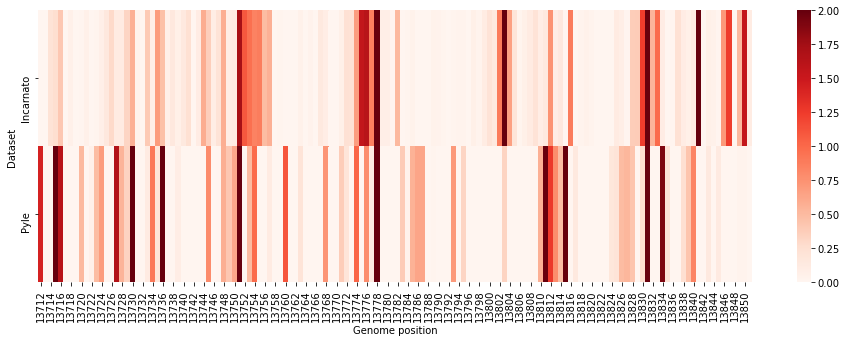

In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 


# Assemble your data into a DataFrame
start_col = 13712  #check if right position (accounted 0 index)
end_col = 13852
data1 = mid3b_heatmap_incarnato
data2 = mid3b_heatmap_pyle
data = np.array([data1, data2]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Incarnato", "Pyle"], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values


# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (16,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
plt.show()

In [60]:
#mid4_sequence = whole_genome[10423:10555]

mid4_heatmap_incarnato = shape_heatmap(shape_lines_incarnato[10423:10555])
print(mid4_heatmap_incarnato)
mid4_heatmap_pyle = shape_heatmap(shape_lines_pyle[10423:10555])
print(mid4_heatmap_pyle)

[0.0, 0.171, 0.477, 0.196, 0.248, 0.347, 1.556, 0.282, 0.023, 0.137, 0.227, 0.732, 0.216, 0.202, 0.045, 0.392, 0.093, 0.344, 1.124, 1.235, 0.327, 1.229, 0.359, 0.493, 0.015, 0.006, 0.507, 0.167, 0.419, 0.468, 0.438, 2.0, 0.552, 0.145, 0.113, 0.153, 0.112, 0.257, 0.143, 0.068, 0.094, 0.05, 0.0, 0.148, 0.31, 2.0, 0.172, 0.81, 0.626, 0.926, 0.022, 0.0, 0.066, 0.097, 0.064, 0.115, 0.153, 0.0, 0.081, 0.433, 0.744, 0.29, 0.962, 0.766, 0.485, 1.039, 0.776, 0.74, 0.294, 1.761, 0.471, 1.6, 0.696, 1.417, 0.673, 0.628, 1.549, 0.224, 0.228, 0.024, 2.0, 0.099, 0.095, 0.064, 0.093, 0.398, 0.455, 1.312, 0.631, 0.329, 1.042, 0.831, 2.0, 0.42, 0.273, 0.728, 0.326, 0.459, 0.118, 0.699, 2.0, 0.086, 0.19, 0.783, 0.849, 1.067, 0.236, 0.199, 1.62, 0.708, 0.238, 0.556, 0.979, 0.404, 0.707, 0.202, 0.0, 0.16, 0.125, 0.032, 0.027, 0.097, 0.076, 0.331, 0.403, 0.0, 0.243, 0.482, 1.225, 0.272, 0.247, 0.768]
[0.259585, 0.100134, 0.088388, 0.056968, 0.577313, 1.229505, 0.681851, 0.0, 0.082222, 0.002643, 0.0, 0.00557

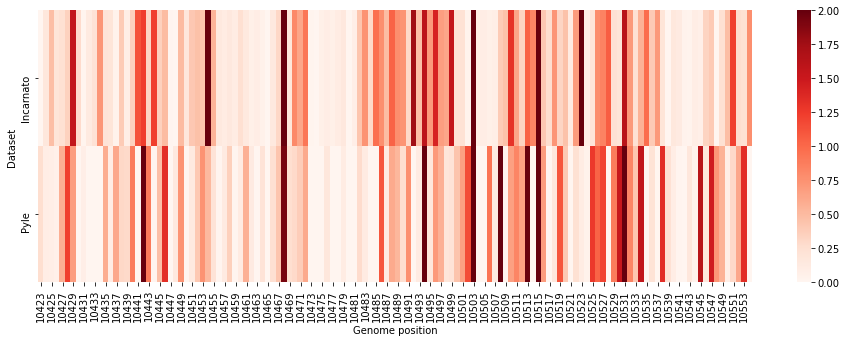

In [71]:
heatmap_func(10423, 10555, mid4_heatmap_incarnato, mid4_heatmap_pyle)


In [ ]:
#mid5_sequence = whole_genome[10423:10555]

mid4_heatmap_incarnato = shape_heatmap(shape_lines_incarnato[10423:10555])
print(mid4_heatmap_incarnato)
mid4_heatmap_pyle = shape_heatmap(shape_lines_pyle[10423:10555])
print(mid4_heatmap_pyle)

In [76]:
#mid5_sequence = whole_genome[17478:17618]

mid5_heatmap_incarnato = shape_heatmap(shape_lines_incarnato[17478:17618])
print(mid5_heatmap_incarnato)
mid5_heatmap_pyle = shape_heatmap(shape_lines_pyle[17478:17618])
print(mid5_heatmap_pyle)

[0.0, 0.018, 0.103, 0.086, 0.01, 0.109, 0.533, 0.802, 1.976, 0.0, 0.14, 0.221, 0.187, 0.874, 0.366, 1.333, 1.056, 1.411, 2.0, 1.976, 1.382, 1.364, 0.731, 0.306, 0.367, 0.829, 0.11, 0.501, 0.166, 0.278, 0.029, 0.092, 0.0, 0.046, 0.11, 0.618, 1.011, 0.293, 0.477, 0.028, 0.438, 0.428, 0.363, 1.159, 2.0, 0.105, 0.122, 0.086, 1.284, 0.112, 0.207, 0.3, 0.125, 2.0, 0.018, 0.03, 0.038, 0.141, 0.26, 0.29, 0.0, 0.125, 0.065, 0.142, 0.027, 0.0, 0.034, 0.066, 0.048, 0.324, 0.707, 0.885, 0.055, 0.0, 0.033, 0.029, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.227, 0.0, 0.029, 0.07, 0.054, 0.322, 0.037, 0.026, 0.038, 0.07, 0.048, 0.086, 0.082, 0.256, 1.712, 2.0, 0.941, 0.152, 0.388, 0.165, 0.305, 0.584, 0.733, 0.287, 0.543, 2.0, 0.65, 1.186, 0.322, 2.0, 1.664, 0.708, 0.026, 0.166, 0.0, 0.031, 0.031, 0.065, 0.0, 0.063, 0.01, 0.031, 0.117, 0.175, 0.114, 1.126, 0.162, 1.111, 2.0, 0.424, 0.188, 0.072, 1.479, 0.513, 0.083, 0.794]
[0.713859, 0.017913, 0.103071, 0.037, 0.040817, 0.003817, 0.063722, 0.387322, 

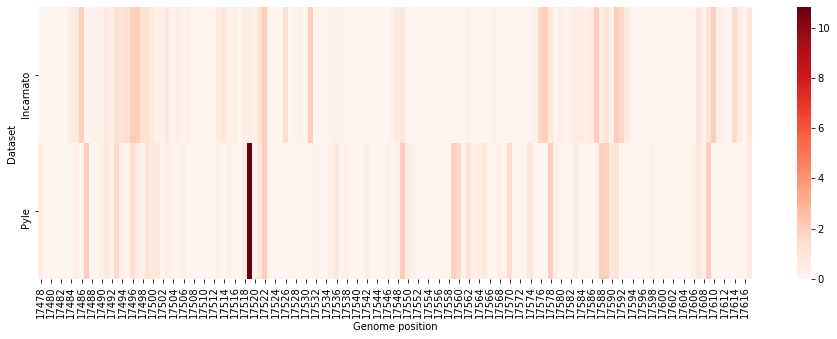

In [77]:
heatmap_func(17478, 17618, mid5_heatmap_incarnato, mid5_heatmap_pyle)


In [82]:
#mid6_sequence=whole_genome[17814:17954]
mid6_heatmap_incarnato = shape_heatmap(shape_lines_incarnato[17814:17954])
print(mid6_heatmap_incarnato)
mid6_heatmap_pyle = shape_heatmap(shape_lines_pyle[17814:17954])
print(mid6_heatmap_pyle)

[0.0, 0.0, 0.039, 0.007, 0.074, 0.117, 0.148, 0.092, 0.483, 0.615, 0.507, 0.897, 1.305, 0.179, 0.159, 1.073, 0.044, 0.024, 0.866, 1.392, 0.606, 0.588, 0.789, 0.744, 1.376, 0.432, 1.697, 0.126, 0.173, 1.757, 0.215, 1.236, 0.0, 0.0, 0.0, 0.18, 0.38, 1.245, 1.605, 0.063, 0.148, 0.017, 0.028, 0.011, 0.025, 0.0, 0.0, 0.498, 0.726, 1.627, 1.654, 0.0, 0.0, 0.001, 0.045, 0.035, 0.18, 0.348, 0.106, 0.039, 0.208, 0.135, 1.791, 0.205, 0.265, 0.482, 1.851, 0.22, 0.398, 0.979, 1.179, 0.618, 0.804, 0.338, 0.169, 1.46, 0.09, 0.196, 0.03, 0.047, 0.205, 0.526, 0.915, 0.075, 0.181, 0.115, 0.125, 0.13, 0.018, 0.131, 0.07, 0.271, 0.105, 0.598, 1.077, 0.101, 0.201, 1.368, 0.097, 0.163, 0.883, 1.657, 0.396, 0.603, 2.0, 1.748, 2.0, 0.736, 0.02, 0.099, 0.076, 0.0, 0.092, 0.129, 0.114, 0.349, 0.058, 0.361, 0.084, 0.095, 0.222, 0.0, 0.037, 0.29, 0.348, 0.068, 0.063, 0.106, 1.598, 0.303, 0.551, 0.54, 0.016, 0.0, 0.012, 0.415, 0.574, 1.899, 0.354, 0.948]
[0.279847, 0.386441, 0.0, 0.128618, 0.0, 0.055206, 0.071063

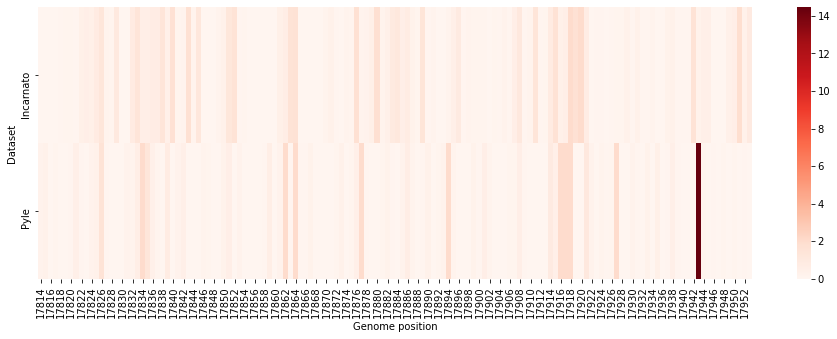

In [83]:
heatmap_func(17814, 17954, mid6_heatmap_incarnato, mid6_heatmap_pyle)


In [ ]:
mid7_sequence=whole_genome[28711:28851]

In [ ]:
mid8_sequence=whole_genome[28978:29118]


## 5' UTR

In [16]:
def new_import(file_name):
    shape_fname = file_name #change name to incarnato later
    f = open(shape_fname)
    shape_lines= f.readlines()
    f.close()
    return shape_lines

In [17]:
def shape_lines_for_heatmap(shape_lines): #2x delete one later
    all_shape_lines_no_nan = []
    for number in shape_lines:
        if number == '-999\n':
            all_shape_lines_no_nan.append('nan')
        elif number =='nan\n':
             all_shape_lines_no_nan.append('nan')
        elif number =='nan': #line added for 'nan' in dms shape
             all_shape_lines_no_nan.append('nan')
        elif number < 0:
            all_shape_lines_no_nan.append(0)
        elif number > 2:
            all_shape_lines_no_nan.append(2)
        #elif number > '10': #if number is over 10 for some reason program was ignoring it (eg. das)
            #all_shape_lines_no_nan.append(2)
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)

In [18]:
def shape_lines_unnorm(shape_lines):
    all_shape_lines_no_nan = []
    for number in shape_lines:
        if number == '-999\n':
            all_shape_lines_no_nan.append('nan')
        elif number =='nan\n':
             all_shape_lines_no_nan.append('nan')
        elif number =='nan': #line added for 'nan' in dms shape
             all_shape_lines_no_nan.append('nan')
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)

In [19]:
import numpy as np

### Normalizes SHAPE reactivities so that different datasets are comparable
### Requires that positions without data are given the value np.nan prior to running the function
def normalize_shape(shape_reacs):
    shape_reacs = np.array(shape_reacs)

    # Get rid of nan values for now
    nonan_shape_reacs = shape_reacs[~np.isnan(shape_reacs)]

    # Find Filter 1: 1.5 * Inter-Quartile Range
    sorted_shape = np.sort(nonan_shape_reacs)
    q1 = sorted_shape[int(0.25 * len(sorted_shape))]
    q3 = sorted_shape[int(0.75 * len(sorted_shape))]
    iq_range = abs(q3 - q1)
    filter1 = next(x for x, val in \
        enumerate(list(sorted_shape)) if val > 1.5 * iq_range)

    # Find Filter 2: 95% value
    filter2 = int(0.95 * len(sorted_shape))

    # Get maximum filter value and fiter data
    filter_cutoff = sorted_shape[max(filter1, filter2)]
    sorted_shape = sorted_shape[sorted_shape < filter_cutoff]

    # Scalefactor: Mean of top 10th percentile of values
    top90 = sorted_shape[int(0.9 * len(sorted_shape))]
    scalefactor = np.mean(sorted_shape[sorted_shape > top90])
        
    # Scale dataset
    return shape_reacs/scalefactor

In [34]:
def shape_norm_for_heatmap(shape_norm):
    all_shape_lines_no_nan = []
    for number in shape_norm:
        if number < 0:
            all_shape_lines_no_nan.append(0)
        elif number > 2:
            all_shape_lines_no_nan.append(2)
        #elif number > '10': #if number is over 10 for some reason program was ignoring it (eg. das)
            #all_shape_lines_no_nan.append(2)
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)

In [35]:
#function from below
def function_for_heatmap_data(shape_lines):
    shape_lines_unnormalize = shape_lines_unnorm(shape_lines)
    shape_lines_norm = normalize_shape(shape_lines_unnormalize)
    shape_norm_for_heatmap_var = shape_norm_for_heatmap(shape_lines_norm)
    return shape_norm_for_heatmap_var

## Das 

In [22]:
shape_lines_5utr_das_trs = new_import('5utr_das_trs.csv')
print(shape_lines_5utr_das_trs)

['2.7886\n', '10.906\n', '9.6323\n', '3.4595\n', '2.2712\n', '1.0451\n', '0.8484\n', '0.0716\n', '-0.0522\n', '0.013\n', '0.0901\n', '0.1678\n', '0.1283\n', '0.1625\n', '0.0107\n', '-0.0101\n', '0.0031\n', '0.3319\n', '1.5508\n', '0.3201\n', '0.0518\n', '0.0524\n', '0.0892\n', '-0.0623\n', '-0.0622\n', '-0.0296\n', '0.1253\n', '0.5459\n', '0.5087\n', '0.1636\n', '0.1917\n', '0.0478\n', '0.0171\n', '-0.0037\n', '0.3914\n', '0.5406\n', '0.0481\n', '0.1889\n', '0.5902\n', '0.3504\n', '-0.0618\n', '0.1836\n', '0.0454\n', '0.0968\n', '0.4047\n', '0.0831\n', '0.0695\n', '0.0056\n', '0.0491\n', '-0.0089\n', '0.5221\n', '0.7151\n', '0.7545\n', '0.1957\n', '0.4607\n', '-0.0161\n', '-0.2063\n', '-0.2324\n', '-0.4504\n', '0.0728\n', '0.3162\n', '-0.1954\n', '-0.1778\n', '-0.323\n', '-0.5232\n', '-0.3315\n', '1.116\n', '0.6773\n', '1.1112\n', '0.7965\n', '0.4649\n', '0.6107\n', '0.263\n', '0.3266\n', '0.1883\n', '0.1004\n', '0.9006\n', '0.455\n', '0.7495\n', '0.8304\n', '0.6382\n', '0.6536\n', '0.

In [37]:
shape_norm_5utr_das= function_for_heatmap_data(shape_lines_5utr_das_trs)
print(shape_norm_5utr_das)

[2.0, 2.0, 2.0, 2.0, 2.0, 1.128017331102699, 0.9157113230384939, 0.077280682142334, 0.0, 0.014031408768859523, 0.09724845615955717, 0.18111310703189448, 0.13847921115728284, 0.17539260961074407, 0.011548928755907455, 0.0, 0.0033459513218049635, 0.3582326592603443, 1.6738391322113346, 0.34549645745476415, 0.05590976724822487, 0.056557370729864546, 0.09627705093709767, 0.0, 0.0, 0.0, 0.1352411937490845, 0.5892112343784934, 0.5490598185168339, 0.17657988266041677, 0.2069093123838747, 0.05159241070396041, 0.018456699226730607, 0.0, 0.4224533378562783, 0.583490736957343, 0.05191621244478024, 0.20388716280288957, 0.6370259581062223, 0.37820043327756747, 0.0, 0.19816666538173913, 0.049001996777401725, 0.10448002837120014, 0.43680854836595767, 0.08969308220709434, 0.07501406995659515, 0.006044299161970257, 0.05299555158084635, 0.0, 0.5635229629401198, 0.7718354162008804, 0.8143613781618854, 0.21122666892813916, 0.49725153998566024, 0.0, 0.0, 0.0, 0.0, 0.07857588910561335, 0.3412870348241063, 0

## Incarnato

In [39]:
shape_lines_5utr_incarnato = new_import('5utr_incarnato.csv')
print(shape_lines_5utr_incarnato)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.136\n', '0.254\n', '0.033\n', '0.148\n', '0.012\n', '0.273\n', '0.141\n', '0.226\n', '0.224\n', '2.206\n', '0.631\n', '1.266\n', '1.714\n', '2.612\n', '0.356\n', '0.0\n', '0.25\n', '0.002\n', '0.065\n', '0.353\n', '0.262\n', '2.096\n', '2.613\n', '0.259\n', '0.929\n', '0.119\n', '0.0\n', '0.25\n', '0.007\n', '0.311\n', '0.0\n', '0.099\n', '0.183\n', '0.307\n', '1.254\n', '0.058\n', '0.57\n', '1.247\n', '0.252\n', '0.529\n', '2.332\n', '0.586\n', '0.249\n', '0.088\n', '0.165\n', '0.0\n', '0.387\n', '0.969\n', '3.621\n', '1.423\n', '1.717\n', '0.466\n', '2.525\n', '0.122\n', '0.017\n', '0.017\n', '0.0\n', '0.046\n', '0.0\n', '0.023\n', '0.0\n', '0.0\n', '0.087\n', '0.048\n', '0.172\n', '1.24\n', '0.013\n', '0.083\n', '0.009\n',

In [58]:
shape_norm_5utr_incarnato = function_for_heatmap_data(shape_lines_5utr_incarnato)
print(shape_norm_5utr_incarnato)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.08667941363926067, 0.1618865519439133, 0.02103250478011472, 0.09432759719566601, 0.0076481835564053535, 0.17399617590822178, 0.08986615678776289, 0.14404079031230083, 0.14276609305289992, 1.405991077119184, 0.4021669853409815, 0.8068833652007648, 1.0924155513065645, 1.6647546207775652, 0.22689611217335878, 0.0, 0.1593371574251115, 0.0012746972594008922, 0.041427660930529, 0.22498406628425746, 0.16698534098151688, 1.335882727852135, 1.6653919694072656, 0.16507329509241553, 0.5920968769917144, 0.07584448693435308, 0.0, 0.1593371574251115, 0.004461440407903122, 0.19821542383683874, 0.0, 0.06309751434034416, 0.11663479923518164, 0.19566602931803695, 0.7992351816443594, 0.036966220522625874, 0.36328871892925424, 0.7947737412364563, 0.16061185468451242, 0.337157425111536, 1.48629700446144, 0.3734862970044614, 0.15869980879541107, 0.05608667941363

In [ ]:
shape_norm_new= function_for_heatmap_data(shape_lines_5utr_das_trs)
print(shape_norm_new)

In [107]:
heatmap_data_incarnato= shape_lines_unnorm(shape_lines_5utr_incarnato)
print(heatmap_data_incarnato)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.136, 0.254, 0.033, 0.148, 0.012, 0.273, 0.141, 0.226, 0.224, 2.206, 0.631, 1.266, 1.714, 2.612, 0.356, 0.0, 0.25, 0.002, 0.065, 0.353, 0.262, 2.096, 2.613, 0.259, 0.929, 0.119, 0.0, 0.25, 0.007, 0.311, 0.0, 0.099, 0.183, 0.307, 1.254, 0.058, 0.57, 1.247, 0.252, 0.529, 2.332, 0.586, 0.249, 0.088, 0.165, 0.0, 0.387, 0.969, 3.621, 1.423, 1.717, 0.466, 2.525, 0.122, 0.017, 0.017, 0.0, 0.046, 0.0, 0.023, 0.0, 0.0, 0.087, 0.048, 0.172, 1.24, 0.013, 0.083, 0.009, 0.031, 0.008, 0.0, 0.0, 0.072, 1.367, 2.685, 0.581, 0.378, 0.062, 0.0, 0.066, 0.016, 0.0, 0.018, 0.0, 0.005, 0.0, 0.008, 0.018, 0.025, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.188, 0.593, 0.555, 0.368, 0.838, 2.485, 0.599, 3.109, 1.307, 1.701, 0.991, 0.998, 0.585, 0.562, 2.846, 1.618, 3.282, 2.085, 0.37, 0.506, 0.737, 1.397, 0.026, 0.0, 0.0, 0.024, 0.0, 0.028, 0.011, 0.015, 0.0,

In [108]:
shape_norm_incarnato = normalize_shape(heatmap_data_incarnato)
print(shape_norm_incarnato)

[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan 8.66794136e-02 1.61886552e-01 2.10325048e-02
 9.43275972e-02 7.64818356e-03 1.73996176e-01 8.98661568e-02
 1.44040790e-01 1.42766093e-01 1.40599108e+00 4.02166985e-01
 8.06883365e-01 1.09241555e+00 1.66475462e+00 2.26896112e-01
 0.00000000e+00 1.59337157e-01 1.27469726e-03 4.14276609e-02
 2.24984066e-01 1.66985341e-01 1.33588273e+00 1.66539197e+00
 1.65073295e-01 5.92096877e-01 7.58444869e-02 0.00000000e+00
 1.59337157e-01 4.46144041e-03 1.98215424e-01 0.00000000e+00
 6.30975143e-02 1.16634799e-01 1.95666029e-01 7.99235182e-01
 3.69662205e-02 3.632887

In [109]:
shape_norm_incarnato_new = shape_norm_for_heatmap(shape_norm_incarnato)
print(shape_norm_incarnato_new)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.08667941363926067, 0.1618865519439133, 0.02103250478011472, 0.09432759719566601, 0.0076481835564053535, 0.17399617590822178, 0.08986615678776289, 0.14404079031230083, 0.14276609305289992, 1.405991077119184, 0.4021669853409815, 0.8068833652007648, 1.0924155513065645, 1.6647546207775652, 0.22689611217335878, 0.0, 0.1593371574251115, 0.0012746972594008922, 0.041427660930529, 0.22498406628425746, 0.16698534098151688, 1.335882727852135, 1.6653919694072656, 0.16507329509241553, 0.5920968769917144, 0.07584448693435308, 0.0, 0.1593371574251115, 0.004461440407903122, 0.19821542383683874, 0.0, 0.06309751434034416, 0.11663479923518164, 0.19566602931803695, 0.7992351816443594, 0.036966220522625874, 0.36328871892925424, 0.7947737412364563, 0.16061185468451242, 0.337157425111536, 1.48629700446144, 0.3734862970044614, 0.15869980879541107, 0.05608667941363

In [110]:
shape_norm_incarnato_new = shape_norm_for_heatmap(heatmap_data_incarnato)
print(shape_norm_incarnato_new)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.136, 0.254, 0.033, 0.148, 0.012, 0.273, 0.141, 0.226, 0.224, 2.0, 0.631, 1.266, 1.714, 2.0, 0.356, 0.0, 0.25, 0.002, 0.065, 0.353, 0.262, 2.0, 2.0, 0.259, 0.929, 0.119, 0.0, 0.25, 0.007, 0.311, 0.0, 0.099, 0.183, 0.307, 1.254, 0.058, 0.57, 1.247, 0.252, 0.529, 2.0, 0.586, 0.249, 0.088, 0.165, 0.0, 0.387, 0.969, 2.0, 1.423, 1.717, 0.466, 2.0, 0.122, 0.017, 0.017, 0.0, 0.046, 0.0, 0.023, 0.0, 0.0, 0.087, 0.048, 0.172, 1.24, 0.013, 0.083, 0.009, 0.031, 0.008, 0.0, 0.0, 0.072, 1.367, 2.0, 0.581, 0.378, 0.062, 0.0, 0.066, 0.016, 0.0, 0.018, 0.0, 0.005, 0.0, 0.008, 0.018, 0.025, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.188, 0.593, 0.555, 0.368, 0.838, 2.0, 0.599, 2.0, 1.307, 1.701, 0.991, 0.998, 0.585, 0.562, 2.0, 1.618, 2.0, 2.0, 0.37, 0.506, 0.737, 1.397, 0.026, 0.0, 0.0, 0.024, 0.0, 0.028, 0.011, 0.015, 0.0, 0.0, 0.092, 0.092, 0.023,

In [112]:
heatmap_5utr_incarnato =shape_heatmap(shape_lines_5utr_incarnato[0:450])

print(heatmap_5utr_incarnato)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.136, 0.254, 0.033, 0.148, 0.012, 0.273, 0.141, 0.226, 0.224, 2.0, 0.631, 1.266, 1.714, 2.0, 0.356, 0.0, 0.25, 0.002, 0.065, 0.353, 0.262, 2.0, 2.0, 0.259, 0.929, 0.119, 0.0, 0.25, 0.007, 0.311, 0.0, 0.099, 0.183, 0.307, 1.254, 0.058, 0.57, 1.247, 0.252, 0.529, 2.0, 0.586, 0.249, 0.088, 0.165, 0.0, 0.387, 0.969, 2.0, 1.423, 1.717, 0.466, 2.0, 0.122, 0.017, 0.017, 0.0, 0.046, 0.0, 0.023, 0.0, 0.0, 0.087, 0.048, 0.172, 1.24, 0.013, 0.083, 0.009, 0.031, 0.008, 0.0, 0.0, 0.072, 1.367, 2.0, 0.581, 0.378, 0.062, 0.0, 0.066, 0.016, 0.0, 0.018, 0.0, 0.005, 0.0, 0.008, 0.018, 0.025, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.188, 0.593, 0.555, 0.368, 0.838, 2.0, 0.599, 2.0, 1.307, 1.701, 0.991, 0.998, 0.585, 0.562, 2.0, 1.618, 2.0, 2.0, 0.37, 0.506, 0.737, 1.397, 0.026, 0.0, 0.0, 0.024, 0.0, 0.028, 0.011, 0.015, 0.0, 0.0, 0.092, 0.092, 0.023,

## Pyle

In [44]:
shape_lines_5utr_pyle = new_import('5utr_pyle.csv')
print(shape_lines_5utr_pyle)

['-999\n', '-999\n', '-999\n', '-999\n', '-999\n', '-999\n', '-0.228458\n', '0.002349\n', '-0.009397\n', '-0.049627\n', '0.022905\n', '-0.011452\n', '-0.029952\n', '0.018500\n', '-0.083983\n', '0.009690\n', '-0.953182\n', '-0.016444\n', '-0.040230\n', '-0.000294\n', '0.445171\n', '-0.001175\n', '0.448401\n', '-0.001468\n', '0.033182\n', '-0.015857\n', '-0.044341\n', '0.354140\n', '0.088388\n', '-0.039349\n', '0.003230\n', '0.029071\n', '0.202617\n', '-0.034357\n', '0.048158\n', '0.119808\n', '0.828969\n', '-0.019381\n', '0.045809\n', '0.027897\n', '0.313323\n', '0.624296\n', '0.613138\n', '1.297338\n', '0.194689\n', '-0.051682\n', '-0.070182\n', '0.093380\n', '0.042285\n', '0.064603\n', '1.421551\n', '7.575538\n', '0.619892\n', '4.546263\n', '-0.025254\n', '0.169729\n', '-0.050508\n', '-0.022905\n', '0.238736\n', '2.526256\n', '0.490980\n', '0.003230\n', '0.031127\n', '0.196744\n', '0.914714\n', '0.276910\n', '3.902586\n', '0.004698\n', '-0.079285\n', '0.036706\n', '-0.096904\n', '0.86

In [45]:
#novo
shape_norm_5utr_pyle = function_for_heatmap_data(shape_lines_5utr_pyle)
print(shape_norm_5utr_pyle)

[nan, nan, nan, nan, nan, nan, 0.0, 0.0019353750535103013, 0.0, 0.0, 0.018871760579247956, 0.0, 0.0, 0.015242417407382108, 0.0, 0.007983731063650414, 0.0, 0.0, 0.0, 0.0, 0.3667828216033352, 0.0, 0.36944406529121865, 0.0, 0.027339129427662336, 0.0, 0.0, 0.29178106490001626, 0.07282415080019945, 0.0, 0.002661243687883471, 0.02395201710540569, 0.16693907501792113, 0.0, 0.03967807229755176, 0.09871154295911544, 0.682999541393521, 0.0, 0.037742697244041466, 0.02298474153587777, 0.2581513486126046, 0.5143664982572443, 0.5051732607744568, 1.068895530511259, 0.16040708122301706, 0.0, 0.0, 0.07693713175682927, 0.03483922270654879, 0.05322734550103277, 1.1712364166422402, 2.0, 0.510737978999833, 2.0, 0.0, 0.139842176439868, 0.0, 0.0, 0.1966980411983122, 2.0, 0.4045255188473767, 0.002661243687883471, 0.02564598522376124, 0.16210022542691815, 0.753646086290601, 0.22815015158260432, 2.0, 0.0038707501070206025, 0.0, 0.030242603965155015, 0.0, 0.7103386708211834, 0.0, 0.02564598522376124, 0.0, 0.5337

In [114]:
heatmap_data_pyle = shape_lines_unnorm(shape_lines_5utr_pyle)
print(heatmap_data_pyle)

[nan, nan, nan, nan, nan, nan, -0.228458, 0.002349, -0.009397, -0.049627, 0.022905, -0.011452, -0.029952, 0.0185, -0.083983, 0.00969, -0.953182, -0.016444, -0.04023, -0.000294, 0.445171, -0.001175, 0.448401, -0.001468, 0.033182, -0.015857, -0.044341, 0.35414, 0.088388, -0.039349, 0.00323, 0.029071, 0.202617, -0.034357, 0.048158, 0.119808, 0.828969, -0.019381, 0.045809, 0.027897, 0.313323, 0.624296, 0.613138, 1.297338, 0.194689, -0.051682, -0.070182, 0.09338, 0.042285, 0.064603, 1.421551, 7.575538, 0.619892, 4.546263, -0.025254, 0.169729, -0.050508, -0.022905, 0.238736, 2.526256, 0.49098, 0.00323, 0.031127, 0.196744, 0.914714, 0.27691, 3.902586, 0.004698, -0.079285, 0.036706, -0.096904, 0.862151, -0.009984, 0.031127, -0.82339, 0.647788, -0.861858, -0.588765, -0.449282, -0.005286, -0.058436, 0.446345, 0.000294, -0.434306, -0.032008, -0.759668, 0.024079, -0.197038, 0.01204, 0.149467, 0.063722, 0.09984, 0.064896, 0.045809, 0.697415, 0.170022, -0.015857, 0.065484, 0.074293, 0.12157, -0.0525

In [115]:
shape_norm_pyle = normalize_shape(heatmap_data_pyle)
print(shape_norm_pyle)

[            nan             nan             nan             nan
             nan             nan -1.88229848e-01  1.93537505e-03
 -7.74232413e-03 -4.08884026e-02  1.88717606e-02 -9.43546833e-03
 -2.46778857e-02  1.52424174e-02 -6.91948076e-02  7.98373106e-03
 -7.85340428e-01 -1.35484493e-02 -3.31460785e-02 -2.42230850e-04
  3.66782822e-01 -9.68099484e-04  3.69444065e-01 -1.20950642e-03
  2.73391294e-02 -1.30648115e-02 -3.65331908e-02  2.91781065e-01
  7.28241508e-02 -3.24202099e-02  2.66124369e-03  2.39520171e-02
  1.66939075e-01 -2.83072289e-02  3.96780723e-02  9.87115430e-02
  6.82999541e-01 -1.59682860e-02  3.77426972e-02  2.29847415e-02
  2.58151349e-01  5.14366498e-01  5.05173261e-01  1.06889553e+00
  1.60407081e-01 -4.25815468e-02 -5.78239642e-02  7.69371318e-02
  3.48392227e-02  5.32273455e-02  1.17123642e+00  6.24159526e+00
  5.10737979e-01  3.74573180e+00 -2.08071356e-02  1.39842176e-01
 -4.16142713e-02 -1.88717606e-02  1.96698041e-01  2.08141883e+00
  4.04525519e-01  2.66124

In [116]:
normalize_shape(heatmap_data_pyle)

array([            nan,             nan,             nan,             nan,
                   nan,             nan, -1.88229848e-01,  1.93537505e-03,
       -7.74232413e-03, -4.08884026e-02,  1.88717606e-02, -9.43546833e-03,
       -2.46778857e-02,  1.52424174e-02, -6.91948076e-02,  7.98373106e-03,
       -7.85340428e-01, -1.35484493e-02, -3.31460785e-02, -2.42230850e-04,
        3.66782822e-01, -9.68099484e-04,  3.69444065e-01, -1.20950642e-03,
        2.73391294e-02, -1.30648115e-02, -3.65331908e-02,  2.91781065e-01,
        7.28241508e-02, -3.24202099e-02,  2.66124369e-03,  2.39520171e-02,
        1.66939075e-01, -2.83072289e-02,  3.96780723e-02,  9.87115430e-02,
        6.82999541e-01, -1.59682860e-02,  3.77426972e-02,  2.29847415e-02,
        2.58151349e-01,  5.14366498e-01,  5.05173261e-01,  1.06889553e+00,
        1.60407081e-01, -4.25815468e-02, -5.78239642e-02,  7.69371318e-02,
        3.48392227e-02,  5.32273455e-02,  1.17123642e+00,  6.24159526e+00,
        5.10737979e-01,  

In [117]:
shape_norm_pyle_new = shape_norm_for_heatmap(shape_norm_pyle)
print(shape_norm_pyle_new)

[nan, nan, nan, nan, nan, nan, 0.0, 0.0019353750535103013, 0.0, 0.0, 0.018871760579247956, 0.0, 0.0, 0.015242417407382108, 0.0, 0.007983731063650414, 0.0, 0.0, 0.0, 0.0, 0.3667828216033352, 0.0, 0.36944406529121865, 0.0, 0.027339129427662336, 0.0, 0.0, 0.29178106490001626, 0.07282415080019945, 0.0, 0.002661243687883471, 0.02395201710540569, 0.16693907501792113, 0.0, 0.03967807229755176, 0.09871154295911544, 0.682999541393521, 0.0, 0.037742697244041466, 0.02298474153587777, 0.2581513486126046, 0.5143664982572443, 0.5051732607744568, 1.068895530511259, 0.16040708122301706, 0.0, 0.0, 0.07693713175682927, 0.03483922270654879, 0.05322734550103277, 1.1712364166422402, 2.0, 0.510737978999833, 2.0, 0.0, 0.139842176439868, 0.0, 0.0, 0.1966980411983122, 2.0, 0.4045255188473767, 0.002661243687883471, 0.02564598522376124, 0.16210022542691815, 0.753646086290601, 0.22815015158260432, 2.0, 0.0038707501070206025, 0.0, 0.030242603965155015, 0.0, 0.7103386708211834, 0.0, 0.02564598522376124, 0.0, 0.5337

## Weeks

In [46]:
shape_lines_5utr_weeks = new_import('5utr_weeks.csv')
print(shape_lines_5utr_weeks)

['nan\n', '0.000000\n', '0.000000\n', '1.976450\n', '0.248147\n', '1.629609\n', '0.271634\n', '0.137196\n', '0.353002\n', '0.572272\n', '0.264382\n', '1.442680\n', '0.199955\n', '0.213238\n', '-0.012834\n', '-0.103571\n', '2.227742\n', '1.358424\n', '0.719928\n', '0.254885\n', '0.312061\n', '0.173517\n', '0.087721\n', '0.156319\n', '0.053005\n', '0.335483\n', '1.565374\n', '2.924633\n', '0.459204\n', '0.149453\n', '0.159014\n', '0.030994\n', '0.087079\n', '0.513877\n', '0.464081\n', '0.333943\n', '0.214137\n', '0.565919\n', '1.143903\n', '0.484230\n', '0.754260\n', '1.529375\n', '0.325023\n', '0.716977\n', '0.834986\n', '0.844291\n', '0.036577\n', '0.433536\n', '-0.096641\n', '0.077518\n', '0.274521\n', '0.152854\n', '0.858922\n', '0.226137\n', '0.568229\n', '0.169731\n', '0.377001\n', '-0.153303\n', '0.099593\n', '0.063978\n', '0.099143\n', '0.129817\n', '0.006610\n', '1.179453\n', '-0.036128\n', '0.241153\n', '0.422691\n', '1.685245\n', '1.030321\n', '1.013123\n', '0.517856\n', '0.92

In [47]:
#novo
shape_norm_5utr_weeks = function_for_heatmap_data(shape_lines_5utr_weeks)
print(shape_norm_5utr_weeks)

[nan, 0.0, 0.0, 1.3765113561038556, 0.17282357938885548, 1.13495170356399, 0.18918125209538042, 0.09555103949607861, 0.24585052074546443, 0.3985625271472921, 0.18413054989979485, 1.0047637953016317, 0.1392599500163153, 0.14851098107863794, 0.0, 0.0, 1.551525291036715, 0.9460831604159092, 0.5013985011394857, 0.17751630296771037, 0.21733689711205706, 0.12084703431762639, 0.061093856494617266, 0.10886937624265658, 0.03691567427978692, 0.2336493001491511, 1.0902148233194449, 2.0, 0.3198155889439727, 0.10408750623784538, 0.11074632638290796, 0.02158597129757034, 0.060646731451930294, 0.35789295258700243, 0.3232122070641976, 0.2325767572118646, 0.14913709542969025, 0.3941379393027588, 0.79667862570835, 0.3372451081313314, 0.5253092440764472, 1.065143087475693, 0.22636436565303622, 0.49934325814732167, 0.5815313876838442, 0.5880119149769942, 0.025474287673460355, 0.301938944713927, 0.0, 0.053987911306867704, 0.19119192187456627, 0.1064561546337619, 0.5982017693376689, 0.15749457286309168, 0.3

In [121]:
heatmap_data_weeks = shape_lines_unnorm(shape_lines_5utr_weeks)
print(heatmap_data_weeks)

[nan, 0.0, 0.0, 1.97645, 0.248147, 1.629609, 0.271634, 0.137196, 0.353002, 0.572272, 0.264382, 1.44268, 0.199955, 0.213238, -0.012834, -0.103571, 2.227742, 1.358424, 0.719928, 0.254885, 0.312061, 0.173517, 0.087721, 0.156319, 0.053005, 0.335483, 1.565374, 2.924633, 0.459204, 0.149453, 0.159014, 0.030994, 0.087079, 0.513877, 0.464081, 0.333943, 0.214137, 0.565919, 1.143903, 0.48423, 0.75426, 1.529375, 0.325023, 0.716977, 0.834986, 0.844291, 0.036577, 0.433536, -0.096641, 0.077518, 0.274521, 0.152854, 0.858922, 0.226137, 0.568229, 0.169731, 0.377001, -0.153303, 0.099593, 0.063978, 0.099143, 0.129817, 0.00661, 1.179453, -0.036128, 0.241153, 0.422691, 1.685245, 1.030321, 1.013123, 0.517856, 0.929766, 0.261495, 0.754452, nan, 0.849553, 1.3599, 1.350467, 1.670229, 2.371804, 0.385408, 2.533963, 0.080855, 0.070652, 0.004171, 0.739629, -0.013283, 0.217474, 0.033176, 0.325473, 0.258094, 0.096127, 0.035358, 0.801232, 0.341772, 0.121924, 0.198158, 0.113646, 0.018096, 0.024898, 0.033433, 0.040812, 

In [122]:
shape_norm_weeks = normalize_shape(heatmap_data_weeks)
print(shape_norm_weeks)

[            nan  0.00000000e+00  0.00000000e+00  1.37651136e+00
  1.72823579e-01  1.13495170e+00  1.89181252e-01  9.55510395e-02
  2.45850521e-01  3.98562527e-01  1.84130550e-01  1.00476380e+00
  1.39259950e-01  1.48510981e-01 -8.93832212e-03 -7.21326913e-02
  1.55152529e+00  9.46083160e-01  5.01398501e-01  1.77516303e-01
  2.17336897e-01  1.20847034e-01  6.10938565e-02  1.08869376e-01
  3.69156743e-02  2.33649300e-01  1.09021482e+00  2.03687952e+00
  3.19815589e-01  1.04087506e-01  1.10746326e-01  2.15859713e-02
  6.06467315e-02  3.57892953e-01  3.23212207e-01  2.32576757e-01
  1.49137095e-01  3.94137939e-01  7.96678626e-01  3.37245108e-01
  5.25309244e-01  1.06514309e+00  2.26364366e-01  4.99343258e-01
  5.81531388e-01  5.88011915e-01  2.54742877e-02  3.01938945e-01
 -6.73062481e-02  5.39879113e-02  1.91191922e-01  1.06456155e-01
  5.98201769e-01  1.57494573e-01  3.95746754e-01  1.18210250e-01
  2.62564779e-01 -1.06768864e-01  6.93621875e-02  4.45578909e-02
  6.90487821e-02  9.04118

In [123]:
shape_norm_weeks_new = shape_norm_for_heatmap(shape_norm_weeks)
print(shape_norm_weeks_new)

[nan, 0.0, 0.0, 1.3765113561038556, 0.17282357938885548, 1.13495170356399, 0.18918125209538042, 0.09555103949607861, 0.24585052074546443, 0.3985625271472921, 0.18413054989979485, 1.0047637953016317, 0.1392599500163153, 0.14851098107863794, 0.0, 0.0, 1.551525291036715, 0.9460831604159092, 0.5013985011394857, 0.17751630296771037, 0.21733689711205706, 0.12084703431762639, 0.061093856494617266, 0.10886937624265658, 0.03691567427978692, 0.2336493001491511, 1.0902148233194449, 2.0, 0.3198155889439727, 0.10408750623784538, 0.11074632638290796, 0.02158597129757034, 0.060646731451930294, 0.35789295258700243, 0.3232122070641976, 0.2325767572118646, 0.14913709542969025, 0.3941379393027588, 0.79667862570835, 0.3372451081313314, 0.5253092440764472, 1.065143087475693, 0.22636436565303622, 0.49934325814732167, 0.5815313876838442, 0.5880119149769942, 0.025474287673460355, 0.301938944713927, 0.0, 0.053987911306867704, 0.19119192187456627, 0.1064561546337619, 0.5982017693376689, 0.15749457286309168, 0.3

In [124]:
float_lines_5utr_weeks = shape_float(shape_lines_5utr_weeks)
print(float_lines_5utr_weeks)

NameError: name 'shape_float' is not defined

In [125]:
heatmap_5utr_weeks =shape_heatmap(shape_lines_5utr_weeks[0:450])

print(heatmap_5utr_weeks)

[nan, 0.0, 0.0, 1.97645, 0.248147, 1.629609, 0.271634, 0.137196, 0.353002, 0.572272, 0.264382, 1.44268, 0.199955, 0.213238, 0.0, 0.0, 2.0, 1.358424, 0.719928, 0.254885, 0.312061, 0.173517, 0.087721, 0.156319, 0.053005, 0.335483, 1.565374, 2.0, 0.459204, 0.149453, 0.159014, 0.030994, 0.087079, 0.513877, 0.464081, 0.333943, 0.214137, 0.565919, 1.143903, 0.48423, 0.75426, 1.529375, 0.325023, 0.716977, 0.834986, 0.844291, 0.036577, 0.433536, 0.0, 0.077518, 0.274521, 0.152854, 0.858922, 0.226137, 0.568229, 0.169731, 0.377001, 0.0, 0.099593, 0.063978, 0.099143, 0.129817, 0.00661, 1.179453, 0.0, 0.241153, 0.422691, 1.685245, 1.030321, 1.013123, 0.517856, 0.929766, 0.261495, 0.754452, nan, 0.849553, 1.3599, 1.350467, 1.670229, 2.0, 0.385408, 2.0, 0.080855, 0.070652, 0.004171, 0.739629, 0.0, 0.217474, 0.033176, 0.325473, 0.258094, 0.096127, 0.035358, 0.801232, 0.341772, 0.121924, 0.198158, 0.113646, 0.018096, 0.024898, 0.033433, 0.040812, 0.038181, 0.480765, 2.0, 0.437193, 1.275901, 0.236789, 0

## rouskin

In [48]:
shape_lines_5utr_rouskin = new_import('5utr_rouskin.csv')
print(shape_lines_5utr_rouskin)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.00887\n', '0.00406\n', '0.00258\n', '0.02036\n', '0.03727\n', '0.05168\n', '0.03175\n', '0.0219\n', '0.02939\n', '0.04532\n', '0.00078\n', '0.00185\n', '0.00143\n', '0.03627\n', '0.0041\n', '0.00764\n', '0.0008\n', '0.00285\n', '0.00045\n', '0.00791\n', '0.00157\n', '0.00117\n', '0.00362\n', '0.00207\n', '0.00772\n', '0.00316\n', '0.00731\n', '0.00075\n', '0.00369\n', '0.00137\n', '0.00328\n', '0.00086\n', '0.00079\n', '0.00695\n', '0.00082\n', '0.04095\n', '0.00185\n', '0.02218\n', '0.0341\n', '0.0359\n', '0.04938\n', '0.00448\n', '0.0104\n', '0.01013\n', '0.01192\n', '0.00133\n', '0.0016\n', '0.00181\n', '0.01569\n', '0.0173\n', '0.03509\n', '0.02866\n', '0.00088\n', '0.00405\n', '0.00067\n', '0.00289\n', '0.00082\

In [49]:
#nucleotide 1-450
sequence_5utr = whole_genome[0:450]
print(whole_genome[0:450])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCC


In [50]:
def dms_shape(sequence,shape_lines):
    reactivity_no_GU= []
    for idx in range(0, len(sequence)):
        if sequence[idx] =='G':
            reactivity_no_GU.append('nan\n')
        elif sequence[idx]=='T':
            reactivity_no_GU.append('nan\n')
        else:
            reactivity_no_GU.append(shape_lines[idx])
    return reactivity_no_GU

In [129]:
def shape_lines_unnorm_rouskin(shape_lines):
    all_shape_lines_no_nan = []
    for number in shape_lines:
        if number =='nan\n':
             all_shape_lines_no_nan.append('nan')
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)

In [55]:
rouskin_dms_shape_lines = dms_shape(sequence_5utr,shape_lines_5utr_rouskin)
print(rouskin_dms_shape_lines)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.00887\n', '0.00406\n', '0.00258\n', '0.02036\n', '0.03727\n', '0.05168\n', '0.03175\n', '0.0219\n', '0.02939\n', '0.04532\n', 'nan\n', 'nan\n', 'nan\n', '0.03627\n', 'nan\n', '0.00764\n', 'nan\n', '0.00285\n', 'nan\n', '0.00791\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.00772\n', 'nan\n', '0.00731\n', 'nan\n', '0.00369\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.00695\n', 'nan\n', '0.04095\n', 'nan\n', '0.02218\n', '0.0341\n', '0.0359\n', '0.04938\n', 'nan\n', '0.0104\n', '0.01013\n', '0.01192\n', 'nan\n', 'nan\n', 'nan\n', '0.01569\n', '0.0173\n', '0.03509\n', '0.02866\n', 'nan\n', '0.00405\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.03739\n', 'nan\n', 'nan\n', 'nan\n', '0.00468\n', '0.00808

In [56]:
#novo
shape_norm_5utr_rouskin = function_for_heatmap_data(rouskin_dms_shape_lines)
print(shape_norm_5utr_rouskin)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.20675990675990674, 0.09463869463869465, 0.060139860139860134, 0.4745920745920746, 0.8687645687645686, 1.2046620046620045, 0.7400932400932401, 0.5104895104895104, 0.685081585081585, 1.0564102564102564, nan, nan, nan, 0.8454545454545453, nan, 0.1780885780885781, nan, 0.06643356643356643, nan, 0.18438228438228438, nan, nan, nan, nan, 0.17995337995337995, nan, 0.1703962703962704, nan, 0.08601398601398602, nan, nan, nan, nan, 0.162004662004662, nan, 0.9545454545454546, nan, 0.517016317016317, 0.7948717948717948, 0.8368298368298368, 1.151048951048951, nan, 0.2424242424242424, 0.23613053613053614, 0.2778554778554779, nan, nan, nan, 0.3657342657342657, 0.40326340326340326, 0.817948717948718, 0.6680652680652681, nan, 0.0944055944055944, nan, nan, nan, nan, nan, nan, nan, 0.8715617715617715, nan, nan, nan, 0.10909090909090909, 0.1883449883449883

In [131]:
heatmap_data_rouskin = shape_lines_unnorm(rouskin_dms_shape_lines)
print(heatmap_data_rouskin)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.00887, 0.00406, 0.00258, 0.02036, 0.03727, 0.05168, 0.03175, 0.0219, 0.02939, 0.04532, nan, nan, nan, 0.03627, nan, 0.00764, nan, 0.00285, nan, 0.00791, nan, nan, nan, nan, 0.00772, nan, 0.00731, nan, 0.00369, nan, nan, nan, nan, 0.00695, nan, 0.04095, nan, 0.02218, 0.0341, 0.0359, 0.04938, nan, 0.0104, 0.01013, 0.01192, nan, nan, nan, 0.01569, 0.0173, 0.03509, 0.02866, nan, 0.00405, nan, nan, nan, nan, nan, nan, nan, 0.03739, nan, nan, nan, 0.00468, 0.00808, 0.00353, nan, 0.01908, nan, nan, 0.00265, nan, nan, 0.04627, 0.03746, nan, nan, 0.00373, nan, nan, 0.00772, nan, nan, nan, 0.00402, 0.00939, 0.00757, nan, 0.00349, 0.00397, 0.00401, nan, 0.0032, 0.00633, nan, nan, 0.0196, nan, 0.01988, 0.02038, nan, nan, 0.02067, 0.02889, nan, 0.03871, 0.08335, 0.04734, nan, 0.0294, 0.028, nan, nan, 0.01084, 0.02928, nan, nan, nan, 0.00311, nan, n

In [132]:
shape_norm_rouskin = normalize_shape(heatmap_data_rouskin)
print(shape_norm_rouskin)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.20675991 0.09463869 0.06013986 0.47459207 0.86876457 1.204662
 0.74009324 0.51048951 0.68508159 1.05641026        nan        nan
        nan 0.84545455        nan 0.17808858        nan 0.06643357
        nan 0.18438228        nan        nan        nan        nan
 0.17995338        nan 0.17039627        nan 0.08601399        nan
        nan        nan        nan 0.16200466        nan 0.95454545
        nan 0.51701632 0.79487179 0.83682984 1.15104895        nan
 0.24242424 0.23613054 0.27785548        nan        nan        nan
 0.36573427 0.4032634  0.81794872 0.66806527        nan 0.09440559
        nan        nan        nan        nan        nan        n

In [133]:
shape_norm_rouskin_new = shape_norm_for_heatmap(shape_norm_rouskin)
print(shape_norm_rouskin_new)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.20675990675990674, 0.09463869463869465, 0.060139860139860134, 0.4745920745920746, 0.8687645687645686, 1.2046620046620045, 0.7400932400932401, 0.5104895104895104, 0.685081585081585, 1.0564102564102564, nan, nan, nan, 0.8454545454545453, nan, 0.1780885780885781, nan, 0.06643356643356643, nan, 0.18438228438228438, nan, nan, nan, nan, 0.17995337995337995, nan, 0.1703962703962704, nan, 0.08601398601398602, nan, nan, nan, nan, 0.162004662004662, nan, 0.9545454545454546, nan, 0.517016317016317, 0.7948717948717948, 0.8368298368298368, 1.151048951048951, nan, 0.2424242424242424, 0.23613053613053614, 0.2778554778554779, nan, nan, nan, 0.3657342657342657, 0.40326340326340326, 0.817948717948718, 0.6680652680652681, nan, 0.0944055944055944, nan, nan, nan, nan, nan, nan, nan, 0.8715617715617715, nan, nan, nan, 0.10909090909090909, 0.1883449883449883

In [136]:
nan = np.nan

## Try heatmap

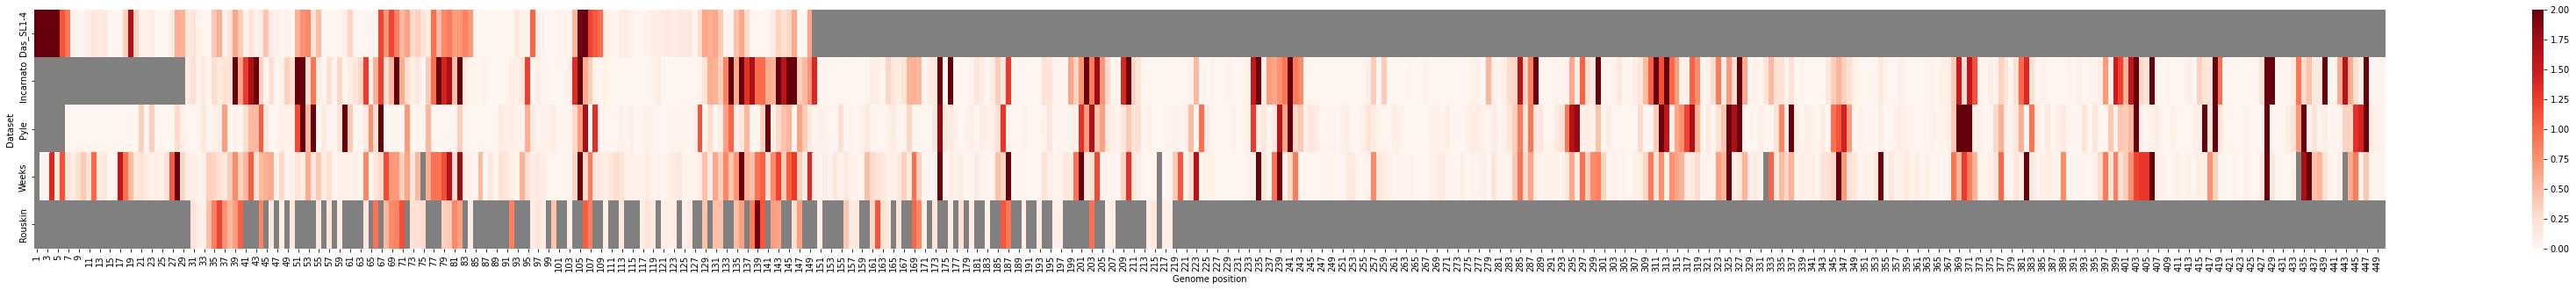

In [146]:
start_col =1  #check if right position (accounted 0 index)
end_col = 451
data1 = shape_norm_das_new
data2 =shape_norm_incarnato_new
data3 =shape_norm_pyle_new
data4 =shape_norm_weeks_new
data5 =shape_norm_rouskin_new
data = np.array([data1, data2, data3, data4, data5]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das_SL1-4", "Incarnato", "Pyle", "Weeks", "Rouskin"], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label

plt.show()
#plt.savefig('5utr_heatmap_normalized_updated.pdf')
#fig.plt.savefig('5utr_heatmap.png') 

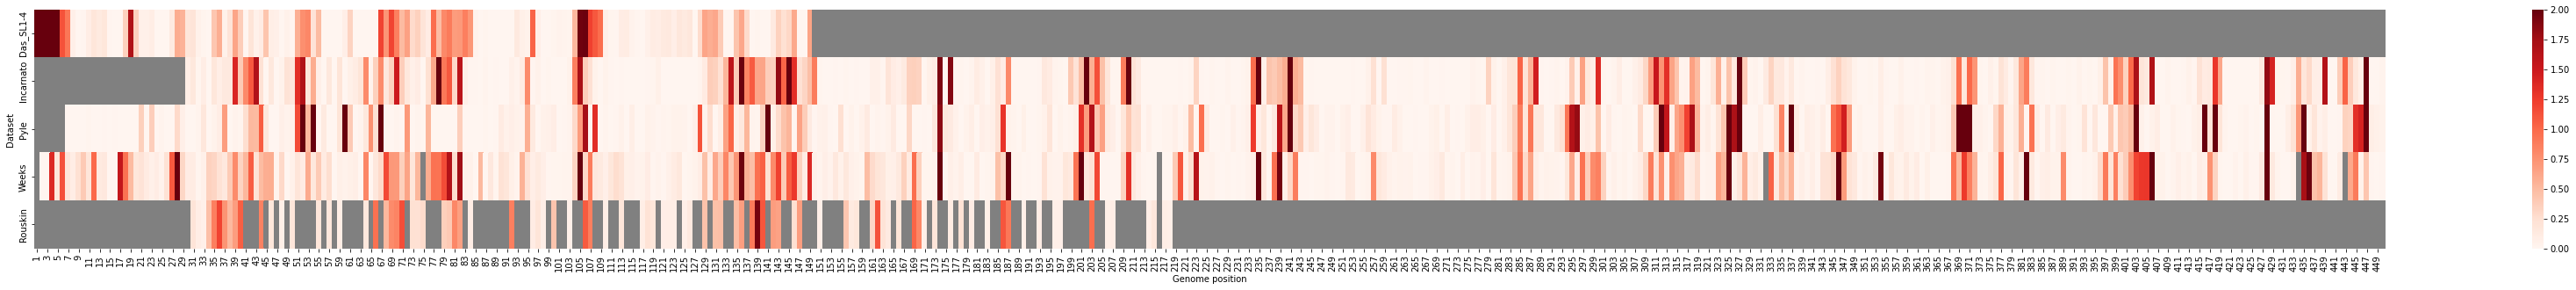

In [59]:
#novo map #incarnato less intense check after
start_col =1  #check if right position (accounted 0 index)
end_col = 451
data1 = shape_norm_5utr_das
data2 =shape_norm_5utr_incarnato
data3 =shape_norm_5utr_pyle
data4 =shape_norm_5utr_weeks
data5 =shape_norm_5utr_rouskin
data = np.array([data1, data2, data3, data4, data5]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das_SL1-4", "Incarnato", "Pyle", "Weeks", "Rouskin"], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label

plt.show()
#plt.savefig('5utr_heatmap_normalized_updated.pdf')
#fig.plt.savefig('5utr_heatmap.png') 

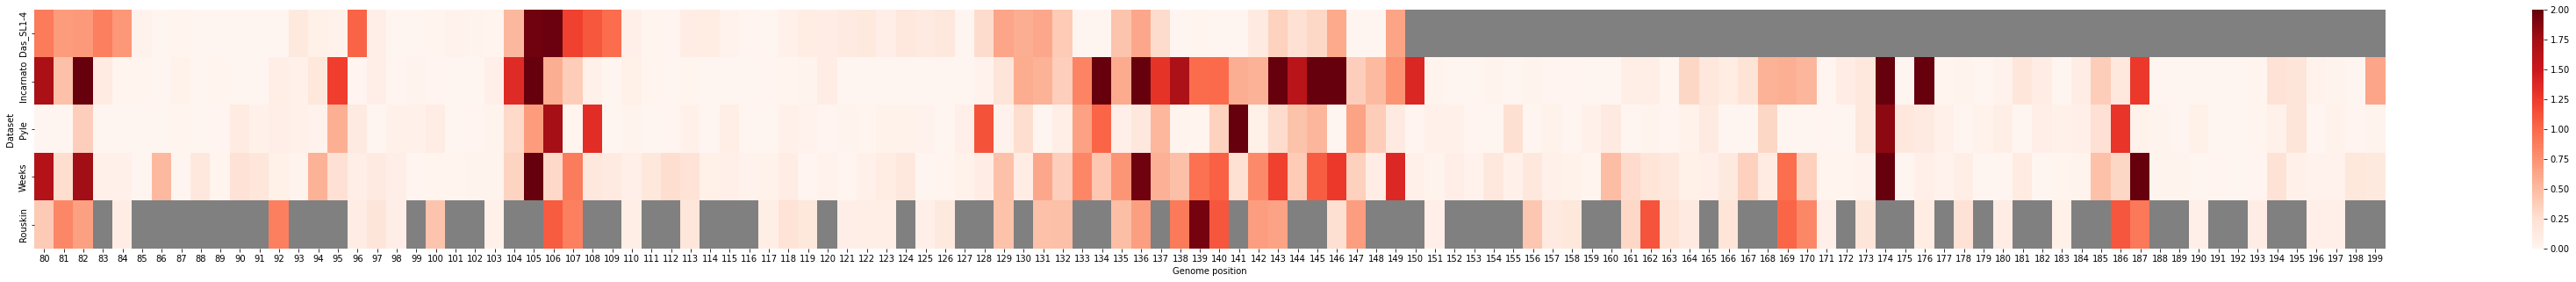

In [147]:
start_col =80  #check if right position (accounted 0 index)
end_col = 200
data1 = shape_norm_das_new[79:199]
data2 =shape_norm_incarnato_new[79:199]
data3 =shape_norm_pyle_new[79:199]
data4 =shape_norm_weeks_new[79:199]
data5 =shape_norm_rouskin_new[79:199]
data = np.array([data1, data2, data3, data4, data5]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das_SL1-4", "Incarnato", "Pyle", "Weeks", "Rouskin"], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label

#plt.show()
plt.savefig('5utr_heatmap_normalized_zoom.pdf') #resaved check later
#fig.plt.savefig('5utr_heatmap.png') 

In [417]:
sequence_5utr[79:95]

'AAATCTGTGTGGCTGT'

In [131]:
float_lines_5utr_rouskin = shape_float(shape_lines_5utr_rouskin)
print(float_lines_5utr_rouskin)

[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -999.0, 0.00887, 0.00406, 0.00258, 0.02036, 0.03727, 0.05168, 0.03175, 0.0219, 0.02939, 0.04532, 0.00078, 0.00185, 0.00143, 0.03627, 0.0041, 0.00764, 0.0008, 0.00285, 0.00045, 0.00791, 0.00157, 0.00117, 0.00362, 0.00207, 0.00772, 0.00316, 0.00731, 0.00075, 0.00369, 0.00137, 0.00328, 0.00086, 0.00079, 0.00695, 0.00082, 0.04095, 0.00185, 0.02218, 0.0341, 0.0359, 0.04938, 0.00448, 0.0104, 0.01013, 0.01192, 0.00133, 0.0016, 0.00181, 0.01569, 0.0173, 0.03509, 0.02866, 0.00088, 0.00405, 0.00067, 0.00289, 0.00082, 0.00349, 0.00119, 0.00222, 0.00342, 0.03739, 0.00213, 0.00271, 0.00235, 0.00468, 0.00808, 0.00353, 0.00043, 0.01908, 0.00281, 0.00357, 0.00265, 0.0009, 0.00391, 0.04627, 0.03746, 0.00245, 0.00329, 0.00373, 0.00044, 0.0007, 0.00772, 0.00261, 0.00066, 0.00

## preparing heatmaps for mid regions 
## -Incarnato

In [426]:
print(shape_lines_incarnato)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.136\n', '0.254\n', '0.033\n', '0.148\n', '0.012\n', '0.273\n', '0.141\n', '0.226\n', '0.224\n', '2.206\n', '0.631\n', '1.266\n', '1.714\n', '2.612\n', '0.356\n', '0.0\n', '0.25\n', '0.002\n', '0.065\n', '0.353\n', '0.262\n', '2.096\n', '2.613\n', '0.259\n', '0.929\n', '0.119\n', '0.0\n', '0.25\n', '0.007\n', '0.311\n', '0.0\n', '0.099\n', '0.183\n', '0.307\n', '1.254\n', '0.058\n', '0.57\n', '1.247\n', '0.252\n', '0.529\n', '2.332\n', '0.586\n', '0.249\n', '0.088\n', '0.165\n', '0.0\n', '0.387\n', '0.969\n', '3.621\n', '1.423\n', '1.717\n', '0.466\n', '2.525\n', '0.122\n', '0.017\n', '0.017\n', '0.0\n', '0.046\n', '0.0\n', '0.023\n', '0.0\n', '0.0\n', '0.087\n', '0.048\n', '0.172\n', '1.24\n', '0.013\n', '0.083\n', '0.009\n',

In [427]:
shape_lines_incarnato = new_import('incarnato_normalized_reactivity.csv') # change above incarnato csv to this name
print(shape_lines_incarnato)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.136\n', '0.254\n', '0.033\n', '0.148\n', '0.012\n', '0.273\n', '0.141\n', '0.226\n', '0.224\n', '2.206\n', '0.631\n', '1.266\n', '1.714\n', '2.612\n', '0.356\n', '0.0\n', '0.25\n', '0.002\n', '0.065\n', '0.353\n', '0.262\n', '2.096\n', '2.613\n', '0.259\n', '0.929\n', '0.119\n', '0.0\n', '0.25\n', '0.007\n', '0.311\n', '0.0\n', '0.099\n', '0.183\n', '0.307\n', '1.254\n', '0.058\n', '0.57\n', '1.247\n', '0.252\n', '0.529\n', '2.332\n', '0.586\n', '0.249\n', '0.088\n', '0.165\n', '0.0\n', '0.387\n', '0.969\n', '3.621\n', '1.423\n', '1.717\n', '0.466\n', '2.525\n', '0.122\n', '0.017\n', '0.017\n', '0.0\n', '0.046\n', '0.0\n', '0.023\n', '0.0\n', '0.0\n', '0.087\n', '0.048\n', '0.172\n', '1.24\n', '0.013\n', '0.083\n', '0.009\n',

In [539]:
#mid7_region:28712-28851
#mid8_region: 28979-29118
#mid4_region 10424:10555
shape_lines_mid7_incarnato = shape_lines_incarnato[28711:28851]
print(shape_lines_mid7_incarnato)
shape_lines_mid8_incarnato = shape_lines_incarnato[28978:29118]
print(shape_lines_mid8_incarnato)
shape_lines_mid4_incarnato = shape_lines_incarnato[10423:10555]
print(shape_lines_mid4_incarnato)


['0.0\n', '0.0\n', '0.049\n', '0.178\n', '0.07\n', '0.043\n', '0.058\n', '0.0\n', '0.016\n', '0.024\n', '0.103\n', '0.074\n', '0.005\n', '0.03\n', '0.272\n', '1.025\n', '0.122\n', '0.255\n', '0.206\n', '0.837\n', '0.245\n', '0.477\n', '0.519\n', '0.054\n', '0.0\n', '0.018\n', '0.04\n', '0.066\n', '0.392\n', '0.079\n', '1.572\n', '0.597\n', '0.723\n', '0.524\n', '0.263\n', '0.718\n', '0.033\n', '0.336\n', '0.993\n', '0.139\n', '1.364\n', '0.56\n', '0.501\n', '0.299\n', '0.216\n', '0.004\n', '0.022\n', '0.119\n', '0.074\n', '0.144\n', '0.244\n', '0.0\n', '0.0\n', '0.032\n', '0.047\n', '0.04\n', '0.071\n', '0.214\n', '0.654\n', '2.944\n', '0.022\n', '0.065\n', '0.0\n', '0.0\n', '0.0\n', '0.058\n', '0.134\n', '0.022\n', '1.171\n', '0.0\n', '0.0\n', '0.017\n', '0.026\n', '0.0\n', '0.0\n', '0.0\n', '0.015\n', '0.017\n', '0.0\n', '0.065\n', '0.224\n', '0.0\n', '0.19\n', '0.225\n', '0.0\n', '0.0\n', '0.0\n', '0.028\n', '0.0\n', '0.001\n', '0.012\n', '0.0\n', '0.0\n', '0.0\n', '0.0\n', '0.116\n

In [480]:
print(len(shape_lines_mid8_incarnato))

140


In [481]:
#make all into floats
shape_lines_unnorm_mid7_incarnato = shape_lines_unnorm(shape_lines_mid7_incarnato)
print(shape_lines_unnorm_mid7_incarnato)
shape_lines_unnorm_mid8_incarnato = shape_lines_unnorm(shape_lines_mid8_incarnato)
print(shape_lines_unnorm_mid8_incarnato)

[0.0, 0.0, 0.049, 0.178, 0.07, 0.043, 0.058, 0.0, 0.016, 0.024, 0.103, 0.074, 0.005, 0.03, 0.272, 1.025, 0.122, 0.255, 0.206, 0.837, 0.245, 0.477, 0.519, 0.054, 0.0, 0.018, 0.04, 0.066, 0.392, 0.079, 1.572, 0.597, 0.723, 0.524, 0.263, 0.718, 0.033, 0.336, 0.993, 0.139, 1.364, 0.56, 0.501, 0.299, 0.216, 0.004, 0.022, 0.119, 0.074, 0.144, 0.244, 0.0, 0.0, 0.032, 0.047, 0.04, 0.071, 0.214, 0.654, 2.944, 0.022, 0.065, 0.0, 0.0, 0.0, 0.058, 0.134, 0.022, 1.171, 0.0, 0.0, 0.017, 0.026, 0.0, 0.0, 0.0, 0.015, 0.017, 0.0, 0.065, 0.224, 0.0, 0.19, 0.225, 0.0, 0.0, 0.0, 0.028, 0.0, 0.001, 0.012, 0.0, 0.0, 0.0, 0.0, 0.116, 0.0, 0.0, 0.017, 0.118, 0.228, 0.85, 0.178, 0.094, 0.541, 0.0, 0.012, 0.013, 0.032, 0.0, 0.041, 0.029, 0.116, 0.016, 0.147, 0.0, 0.036, 0.075, 0.005, 0.015, 0.368, 0.043, 2.143, 0.009, 0.014, 0.09, 0.024, 0.0, 0.004, 0.023, 0.0, 0.009, 0.019, 0.022, 0.065, 0.139, 1.395, 0.21, 0.798, 0.116]
[0.0, 0.271, 0.851, 0.456, 0.319, 1.536, 0.0, 0.0, 0.003, 0.075, 0.324, 0.465, 0.089, 0.14

In [482]:
shape_norm_mid7_incarnato = normalize_shape(shape_lines_unnorm_mid7_incarnato)
print(shape_norm_mid7_incarnato)
shape_norm_mid8_incarnato = normalize_shape(shape_lines_unnorm_mid8_incarnato)
print(shape_norm_mid8_incarnato)

[0.00000000e+00 0.00000000e+00 7.22631877e-02 2.62507090e-01
 1.03233125e-01 6.34146341e-02 8.55360182e-02 0.00000000e+00
 2.35961429e-02 3.53942144e-02 1.51900170e-01 1.09132161e-01
 7.37379467e-03 4.42427680e-02 4.01134430e-01 1.51162791e+00
 1.79920590e-01 3.76063528e-01 3.03800340e-01 1.23437323e+00
 3.61315939e-01 7.03460011e-01 7.65399887e-01 7.96369824e-02
 0.00000000e+00 2.65456608e-02 5.89903573e-02 9.73340896e-02
 5.78105502e-01 1.16505956e-01 2.31832104e+00 8.80431083e-01
 1.06625071e+00 7.72773681e-01 3.87861600e-01 1.05887691e+00
 4.86670448e-02 4.95519002e-01 1.46443562e+00 2.04991492e-01
 2.01157119e+00 8.25865003e-01 7.38854226e-01 4.40952921e-01
 3.18547930e-01 5.89903573e-03 3.24446965e-02 1.75496313e-01
 1.09132161e-01 2.12365286e-01 3.59841180e-01 0.00000000e+00
 0.00000000e+00 4.71922859e-02 6.93136699e-02 5.89903573e-02
 1.04707884e-01 3.15598412e-01 9.64492343e-01 4.34169030e+00
 3.24446965e-02 9.58593307e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.553601

In [483]:
shape_norm_for_heatmap_mid7_incarnato = shape_norm_for_heatmap(shape_norm_mid7_incarnato)
print(shape_norm_for_heatmap_mid7_incarnato)
shape_norm_for_heatmap_mid8_incarnato = shape_norm_for_heatmap(shape_norm_mid8_incarnato)
print(shape_norm_for_heatmap_mid8_incarnato)

[0.0, 0.0, 0.07226318774815656, 0.26250709018718094, 0.10323312535450938, 0.06341463414634146, 0.08553601815087919, 0.0, 0.02359614293817357, 0.03539421440726036, 0.15190017016449234, 0.10913216108905276, 0.007373794668179241, 0.044242768009075444, 0.4011344299489507, 1.5116279069767442, 0.17992058990357346, 0.3760635280771413, 0.3038003403289847, 1.2343732274532049, 0.36131593874078277, 0.7034600113442995, 0.7653998865570052, 0.0796369824163358, 0.0, 0.026545660805445265, 0.058990357345433925, 0.09733408961996598, 0.5781055019852525, 0.11650595575723201, 2.0, 0.8804310833806013, 1.066250709018718, 0.7727736812251844, 0.38786159954622806, 1.058876914350539, 0.04866704480998299, 0.495519001701645, 1.4644356211003973, 0.2049914917753829, 2.0, 0.825865002836075, 0.7388542257515599, 0.4409529211571186, 0.3185479296653432, 0.005899035734543393, 0.03244469653998865, 0.17549631310266592, 0.10913216108905276, 0.21236528644356212, 0.3598411798071469, 0.0, 0.0, 0.04719228587634714, 0.06931366988

In [38]:
def function_for_heatmap_data(shape_lines):
    shape_lines_unnormalize = shape_lines_unnorm(shape_lines)
    shape_lines_norm = normalize_shape(shape_lines_unnormalize)
    shape_norm_for_heatmap_var = shape_norm_for_heatmap(shape_lines_norm)
    return shape_norm_for_heatmap_var

In [ ]:
#incarnato new

In [485]:
shape_norm_for_heatmap_mid7_incarnato=function_for_heatmap_data(shape_lines_mid7_incarnato)
print(shape_norm_for_heatmap_mid7_incarnato)

[0.0, 0.0, 0.07226318774815656, 0.26250709018718094, 0.10323312535450938, 0.06341463414634146, 0.08553601815087919, 0.0, 0.02359614293817357, 0.03539421440726036, 0.15190017016449234, 0.10913216108905276, 0.007373794668179241, 0.044242768009075444, 0.4011344299489507, 1.5116279069767442, 0.17992058990357346, 0.3760635280771413, 0.3038003403289847, 1.2343732274532049, 0.36131593874078277, 0.7034600113442995, 0.7653998865570052, 0.0796369824163358, 0.0, 0.026545660805445265, 0.058990357345433925, 0.09733408961996598, 0.5781055019852525, 0.11650595575723201, 2.0, 0.8804310833806013, 1.066250709018718, 0.7727736812251844, 0.38786159954622806, 1.058876914350539, 0.04866704480998299, 0.495519001701645, 1.4644356211003973, 0.2049914917753829, 2.0, 0.825865002836075, 0.7388542257515599, 0.4409529211571186, 0.3185479296653432, 0.005899035734543393, 0.03244469653998865, 0.17549631310266592, 0.10913216108905276, 0.21236528644356212, 0.3598411798071469, 0.0, 0.0, 0.04719228587634714, 0.06931366988

In [486]:
shape_norm_for_heatmap_mid8_incarnato=function_for_heatmap_data(shape_lines_mid8_incarnato)
print(shape_norm_for_heatmap_mid8_incarnato)

[0.0, 0.20642174957520362, 0.6482099958985176, 0.3473369660748814, 0.24298353547782273, 1.1699771488838109, 0.0, 0.0, 0.002285111618913693, 0.057127790472842326, 0.24679205484267888, 0.35419230093162246, 0.06779164469443956, 0.10740024608894357, 0.19651959922657763, 0.044940528505302633, 0.051034159489072486, 0.15081736684830377, 0.4037030526747525, 0.698482451514619, 2.0, 0.0, 0.0, 0.022851116189136933, 0.7883635085252241, 0.02132770844319447, 0.07769379504306556, 0.21784730766977206, 0.04646393625124509, 0.017519189078338316, 0.0, 0.06702994082146833, 0.02132770844319447, 0.10054491123220251, 0.30315814144255, 0.5179586336204371, 0.20642174957520362, 0.6375461416769204, 0.3534305970586512, 0.2871623601101541, 0.7563719458604324, 0.9719341419112909, 0.10206831897814497, 0.1104470615808285, 0.40674986816663744, 0.7259037909415832, 0.07464697955118064, 0.009140446475654773, 0.0, 0.0, 0.0, 0.25136227808050626, 0.007617038729712311, 0.0, 0.0, 0.1081619499619148, 0.07464697955118064, 0.081

In [540]:
shape_norm_for_heatmap_mid4_incarnato=function_for_heatmap_data(shape_lines_mid4_incarnato)
print(shape_norm_for_heatmap_mid4_incarnato)

[0.0, 0.13329002923026959, 0.37180902890548884, 0.15277687560896397, 0.19330951607664829, 0.27047742773627803, 1.2128613186099384, 0.21981162715167263, 0.017927898668398834, 0.10678791815524523, 0.176940565118545, 0.5705748619681715, 0.16836635271191946, 0.15745371873985065, 0.03507632348164989, 0.30555375121792794, 0.07249106852874311, 0.2681390061708347, 0.8761286131860996, 0.9626502111075026, 0.25488795063332254, 0.957973367976616, 0.27983111399805133, 0.38428061058785323, 0.01169210782721663, 0.004676843130886652, 0.3951932445599221, 0.1301721338096785, 0.32659954530691787, 0.3647937642091589, 0.3414095485547256, 1.8060409223773957, 0.430269568041572, 0.11302370899642741, 0.08808054563169862, 0.11925949983760963, 0.08730107177655085, 0.20032478077297827, 0.11146476128613186, 0.05300422215004873, 0.07327054238389089, 0.03897369275738877, 0.0, 0.11536213056187075, 0.24163689509581035, 1.6259824618382592, 0.13406950308541735, 0.6313738226696981, 0.4879506333225074, 0.72179278986684, 0

In [461]:
#pyle

In [487]:
shape_lines_pyle = new_import('pyle_normalized_reactivity.csv') 
print(shape_lines_pyle)

['-999\n', '-999\n', '-999\n', '-999\n', '-999\n', '-999\n', '-0.228458\n', '0.002349\n', '-0.009397\n', '-0.049627\n', '0.022905\n', '-0.011452\n', '-0.029952\n', '0.018500\n', '-0.083983\n', '0.009690\n', '-0.953182\n', '-0.016444\n', '-0.040230\n', '-0.000294\n', '0.445171\n', '-0.001175\n', '0.448401\n', '-0.001468\n', '0.033182\n', '-0.015857\n', '-0.044341\n', '0.354140\n', '0.088388\n', '-0.039349\n', '0.003230\n', '0.029071\n', '0.202617\n', '-0.034357\n', '0.048158\n', '0.119808\n', '0.828969\n', '-0.019381\n', '0.045809\n', '0.027897\n', '0.313323\n', '0.624296\n', '0.613138\n', '1.297338\n', '0.194689\n', '-0.051682\n', '-0.070182\n', '0.093380\n', '0.042285\n', '0.064603\n', '1.421551\n', '7.575538\n', '0.619892\n', '4.546263\n', '-0.025254\n', '0.169729\n', '-0.050508\n', '-0.022905\n', '0.238736\n', '2.526256\n', '0.490980\n', '0.003230\n', '0.031127\n', '0.196744\n', '0.914714\n', '0.276910\n', '3.902586\n', '0.004698\n', '-0.079285\n', '0.036706\n', '-0.096904\n', '0.86

In [537]:
#mid7_region:28712-28851
#mid8_region: 28979-29118
#mid4: 10424-10555
#mid4_sequence = whole_genome[10423:10555]

shape_lines_mid7_pyle = shape_lines_pyle[28711:28851]
print(shape_lines_mid7_pyle)
shape_lines_mid8_pyle = shape_lines_pyle[28978:29118]
print(shape_lines_mid8_pyle)
shape_lines_mid4_pyle = shape_lines_pyle[10423:10555]
print(shape_lines_mid4_pyle)

['0.522400\n', '0.107475\n', '0.015563\n', '-0.067245\n', '0.091912\n', '0.078698\n', '1.199260\n', '0.228752\n', '0.350910\n', '0.023492\n', '0.184998\n', '0.343862\n', '0.343568\n', '0.641621\n', '1.180466\n', '0.957587\n', '0.896215\n', '2.853968\n', '0.026428\n', '-0.015270\n', '1.373980\n', '-0.023198\n', '0.055500\n', '0.931746\n', '0.317140\n', '0.364418\n', '1.092372\n', '0.617836\n', '1.422139\n', '0.057261\n', '0.017619\n', '1.378091\n', '1.738985\n', '1.077396\n', '1.236553\n', '0.681851\n', '0.192340\n', '2.099585\n', '0.031420\n', '1.057721\n', '0.050801\n', '0.101896\n', '0.269863\n', '0.644264\n', '0.106888\n', '0.254887\n', '0.082515\n', '0.310386\n', '3.680294\n', '0.167967\n', '-0.039055\n', '0.521519\n', '0.806652\n', '0.160919\n', '0.065777\n', '0.426084\n', '0.015270\n', '-0.043166\n', '0.527099\n', '0.231395\n', '0.557051\n', '0.675978\n', '0.242260\n', '0.528861\n', '0.975206\n', '0.898857\n', '0.077229\n', '-0.030539\n', '0.109531\n', '1.216585\n', '-0.005579\n'

In [489]:
shape_norm_for_heatmap_mid7_pyle=function_for_heatmap_data(shape_lines_mid7_pyle)
print(shape_norm_for_heatmap_mid7_pyle)

[0.45322149171615467, 0.09324268725534787, 0.013502079011444325, 0.0, 0.07974060824390354, 0.06827646430910786, 1.0404487100986135, 0.19845965289635112, 0.30444095263804716, 0.02038108591767976, 0.16049975023833304, 0.29832627983250454, 0.2980712126070747, 0.5566547219303424, 1.024143494334231, 0.8307791129172998, 0.7775342633966186, 2.0, 0.022928287869591377, 0.0, 1.1920315183540624, 0.0, 0.04815044561685793, 0.8083600919229714, 0.2751429247374833, 0.3161601637982727, 0.9477152897185285, 0.5360194363628296, 1.2338130915155447, 0.049678246242646884, 0.015285814438259817, 1.1955981216320968, 1.5087009490275982, 0.9347224775823473, 1.072803206826352, 0.5915572881855892, 0.1668694902693055, 1.8215487091976694, 0.02725922524831849, 0.9176529277172718, 0.04407370788796396, 0.08840248300135777, 0.2341265532522907, 0.5589477242324209, 0.09273342038008488, 0.2211337411161093, 0.0715880003617123, 0.2692833191573706, 2.0, 0.14572407025093292, 0.0, 0.4524571576154618, 0.6998315902293637, 0.139609

In [490]:
shape_norm_for_heatmap_mid8_pyle=function_for_heatmap_data(shape_lines_mid8_pyle)
print(shape_norm_for_heatmap_mid8_pyle)

[0.2808258065697933, 0.025850776476704918, 1.0522596659857193, 0.07141532710120105, 0.07141532710120105, 0.08610739934332078, 0.12720821494055337, 0.056908821596168196, 0.06527832477228734, 0.007439136156390131, 0.0005579668784079435, 0.22707858617341217, 0.9877255081625005, 0.0, 0.05393342046704161, 1.697228844076587, 0.11716544446278404, 0.06230229030958709, 0.6429235106478963, 0.09745230364856651, 0.0, 0.2166634155543218, 0.14227268732399417, 0.08127189750830982, 0.0, 0.016552172948004092, 0.0, 0.07290302766576434, 0.05914068910979997, 0.025292809598296974, 0.023433342225986278, 0.008555069913206018, 0.2348894891375497, 0.0, 0.2460481933721349, 1.6113076448039267, 0.019713774147791213, 0.0, 0.6922076293505875, 0.03552178014672682, 0.05951245591754737, 0.04389064998927231, 0.11233057596134677, 0.09373273557037144, 0.14115675356717827, 0.42551592814450606, 0.3713969409403776, 0.6044263293720429, 0.03905514815426135, 0.07959799687308598, 0.005579035450505761, 0.3260179570529683, 0.0, 0

In [538]:
shape_norm_for_heatmap_mid4_pyle=function_for_heatmap_data(shape_lines_mid4_pyle)
print(shape_norm_for_heatmap_mid4_pyle)

[0.18344684095084332, 0.07076397315627538, 0.06246315995902359, 0.04025887333739485, 0.40798291923591196, 0.8688822858919685, 0.4818591673215843, 0.0, 0.058105692380762526, 0.0018677889732961414, 0.0, 0.0039426389262274585, 0.4179437537340615, 0.07387695477843562, 0.44160100067695274, 0.21581972974302, 0.2046137025960064, 0.6246323062829992, 0.0, 1.4354096064869684, 0.6356312724503776, 0.006018195571922035, 0.3357659857583741, 0.942759240670404, 0.0, 0.10894728984797565, 0.5295884898594004, 0.0, 0.09608124140006435, 0.28907408819702357, 0.5246084259567073, 0.3596302936809005, 0.15024358816183617, 0.0087156418492854, 0.09234566345347209, 0.25939864568221027, 0.010998259474615154, 0.08715783187838053, 0.4013421273395579, 0.08861079219964305, 0.0, 0.15314880211159795, 0.0, 0.17908866667981896, 0.3060905432435607, 1.3690038076017172, 0.18220164830197924, 0.20648149156930254, 0.2685298228762925, 0.42707422423538044, 0.0, 0.0, 0.0, 0.11828623471445636, 0.0, 0.0, 0.07802736137706151, 0.0, 0.0

In [467]:
#Das

In [491]:
shape_lines_mid7_das = new_import('mid7_vanya.csv') 
print(shape_lines_mid7_das)

['1.0234\n', '0.1145\n', '0.2288\n', '0.4601\n', '0.5515\n', '2.3442\n', '1.5654\n', '1.2886\n', '0.9127\n', '1.523\n', '2.0378\n', '2.1923\n', '0.8381\n', '1.1149\n', '1.2054\n', '1.0544\n', '0.5788\n', '2.3684\n', '2.7415\n', '2.0197\n', '1.2349\n', '1.494\n', '1.4599\n', '1.3547\n', '0.5094\n', '0.7284\n', '1.0745\n', '0.7001\n', '0.6569\n', '1.287\n', '1.8597\n', '1.9552\n', '1.8949\n', '1.1591\n', '1.1771\n', '0.9282\n', '1.5324\n', '4.1947\n', '2.1461\n', '2.0702\n', '2.6191\n', '2.2692\n', '0.2179\n', '1.475\n', '1.5143\n', '1.539\n', '5.0688\n', '0.9067\n', '1.9837\n', '2.556\n', '2.7465\n', '0.3604\n', '0.5144\n', '0.7947\n', '1.0111\n', '1.1537\n', '1.9914\n', '1.4353\n', '0.6386\n', '0.5386\n', '1.1499\n', '1.6486\n', '0.0398\n', '1.0045\n', '2.1896\n', '1.4052\n', '1.4921\n', '2.2565\n', '2.2595\n', '1.558\n', '0.2754\n', '0.0688\n', '0.1913\n', '0.0236\n', '0.0155\n', '0.0275\n', '0.0307\n', '0.0193\n', '0.03\n', '0.0998\n', '0.38\n', '0.155\n', '0.3374\n', '0.2591\n', '0.

In [492]:
shape_norm_for_heatmap_mid7_das=function_for_heatmap_data(shape_lines_mid7_das)
print(shape_norm_for_heatmap_mid7_das)

[0.41979679414363247, 0.046967689006689385, 0.09385333838192603, 0.1887321721570112, 0.22622428373091, 0.9615865202574782, 0.6421241953805376, 0.5285813454499558, 0.37438785813454495, 0.6247317935125583, 0.8359018048718918, 0.8992774201691278, 0.34378707560267574, 0.4573299255332576, 0.49445285876561906, 0.432512937018806, 0.237422693424208, 0.9715133156632587, 1.1245582481383314, 0.8284772182254195, 0.5065537044048971, 0.6128360469519121, 0.5988482897892212, 0.5556954436450839, 0.20895494131010978, 0.29878833775085195, 0.4407579199798056, 0.2871797299002902, 0.26945916950650006, 0.5279250283983339, 0.7628455130632336, 0.8020194370819134, 0.7772844881989145, 0.47546068408431147, 0.4828442509150574, 0.38074592957213177, 0.6285876561908368, 1.720658210273886, 0.8803262653035466, 0.8491922251672345, 1.074349993689259, 0.9308216584627035, 0.08938217846775211, 0.6050422819639025, 0.6211630695443645, 0.6312949640287769, 2.0, 0.37192666919096296, 0.8137100845639278, 1.048466489965922, 1.12660

In [493]:
shape_lines_mid8_das = new_import('mid8_vanya.csv') 
print(shape_lines_mid8_das)

['0.8009\n', '0.6849\n', '0.3736\n', '0.6611\n', '0.7626\n', '0.8202\n', '0.1933\n', '0.0639\n', '0.0347\n', '0.0148\n', '0.5338\n', '0.2154\n', '0.9095\n', '1.0784\n', '0.9146\n', '0.7202\n', '0.872\n', '0.7593\n', '0.6312\n', '0.9639\n', '1.1291\n', '0.2285\n', '0.1095\n', '0.2077\n', '0.0278\n', '0.4245\n', '0.7093\n', '0.4851\n', '0.3869\n', '0.661\n', '0.5538\n', '0.9924\n', '0.8652\n', '0.6088\n', '0.4835\n', '0.9636\n', '1.1862\n', '0.9595\n', '0.9241\n', '1.2092\n', '1.0967\n', '0.8825\n', '0.6544\n', '0.2118\n', '0.1807\n', '0.2227\n', '0.5722\n', '0.3566\n', '0.1489\n', '0.0524\n', '0.0155\n', '0.017\n', '0.0516\n', '0.0435\n', '0.0424\n', '0.0492\n', '0.1317\n', '0.2547\n', '0.8249\n', '1.4427\n', '2.2443\n', '1.45\n', '0.491\n', '0.1757\n', '0.049\n', '0.0316\n', '0.0253\n', '0.012\n', '0.0309\n', '0.0884\n', '0.035\n', '0.0777\n', '0.229\n', '0.5863\n', '0.9286\n', '0.822\n', '1.0306\n', '0.1765\n', '0.0037\n', '0.0452\n', '0.1688\n', '1.1891\n', '0.0684\n', '-0.001\n', '-

In [494]:
shape_norm_for_heatmap_mid8_das=function_for_heatmap_data(shape_lines_mid8_das)
print(shape_norm_for_heatmap_mid8_das)

[0.5517301679826189, 0.47181919347146417, 0.25736844894282235, 0.4554236659424514, 0.5253457686397117, 0.5650257008107679, 0.13316199459488104, 0.044019924752265384, 0.023904403582216103, 0.010195538127285254, 0.3677282602935722, 0.14838641301467861, 0.6265433734301309, 0.7428965078692173, 0.6300567007577765, 0.4961369296804621, 0.6007100842562663, 0.5230724391924116, 0.43482592337449, 0.6640188649250173, 0.7778231148322824, 0.1574108420327487, 0.07543320438768482, 0.14308197763764507, 0.019151078374225, 0.29243283344814797, 0.4886280536272588, 0.33417942875311324, 0.266530655503153, 0.4553547771713211, 0.3815060145196333, 0.6836521646971544, 0.5960256478194055, 0.4193948386413015, 0.33307720841502836, 0.6638121986116263, 0.817158603147687, 0.6609877589952838, 0.6366011340151556, 0.8330030205076573, 0.7555031529860633, 0.6079434052249484, 0.4508081182767209, 0.1459064172539876, 0.12448200943246251, 0.15341529330719095, 0.3941815484076096, 0.24565735785067033, 0.10257538021302529, 0.036

In [541]:
shape_lines_mid4_das = new_import('mid4_vanya.csv') 
print(shape_lines_mid4_das)

['1.1021\n', '0.8556\n', '0.8873\n', '1.4559\n', '1.0647\n', '2.76\n', '2.946\n', '1.2249\n', '0.1581\n', '0.1851\n', '0.7255\n', '1.2674\n', '1.3325\n', '1.7464\n', '1.2927\n', '0.5033\n', '0.4225\n', '2.0154\n', '3.0354\n', '1.8885\n', '2.0914\n', '2.1288\n', '1.1325\n', '0.6373\n', '0.1488\n', '0.2917\n', '0.5998\n', '1.7719\n', '1.9239\n', '1.8264\n', '1.6131\n', '2.8765\n', '1.7732\n', '0.6303\n', '0.2194\n', '0.5664\n', '0.3495\n', '0.1775\n', '0.3498\n', '0.3661\n', '0.4428\n', '0.1213\n', '0.8627\n', '0.7306\n', '2.6684\n', '4.5077\n', '2.0624\n', '1.4717\n', '2.4581\n', '1.8604\n', '0.1325\n', '-0.0265\n', '0.0426\n', '0.0466\n', '0.2909\n', '0.2051\n', '0.1553\n', '0.2058\n', '0.2021\n', '0.7292\n', '1.5439\n', '0.7191\n', '0.4027\n', '0.4475\n', '0.3972\n', '0.6831\n', '0.3483\n', '0.4165\n', '0.9822\n', '2.2219\n', '1.1713\n', '0.6781\n', '0.1507\n', '0.5353\n', '0.7251\n', '1.7678\n', '0.8536\n', '1.0285\n', '1.5097\n', '0.9058\n', '0.9112\n', '0.4417\n', '0.2273\n', '0.10

In [542]:
shape_norm_for_heatmap_mid4_das=function_for_heatmap_data(shape_lines_mid4_das)
print(shape_norm_for_heatmap_mid4_das)

[0.38411180752005486, 0.2981998571038553, 0.30924816878009675, 0.5074207245880118, 0.3710768909051832, 0.9619350229156622, 1.0267610788078048, 0.42691094549615755, 0.055102147508321084, 0.06451238142814822, 0.25285647069757716, 0.44172335074032987, 0.4644124703025797, 0.6086678710217075, 0.4505410884503901, 0.17541373080922204, 0.1472527344861838, 0.702421683037763, 1.0579194088978991, 0.6581935836145755, 0.7289097488861653, 0.7419446655010369, 0.3947070338594158, 0.22211637322614186, 0.05186084471371396, 0.1016653790523546, 0.20904660389304863, 0.6175553141682109, 0.6705314458650155, 0.636550045598973, 0.5622091976323387, 1.0025384396438053, 0.6180083995050915, 0.2196766829506311, 0.07646686377815085, 0.19740579600704025, 0.12181025018442897, 0.06186357484330799, 0.12191480833909372, 0.12759580140921156, 0.15432783628516497, 0.042276347202778924, 0.3006744000975876, 0.2546339593268779, 0.9300099330246933, 1.5710559792742502, 0.7188024606019064, 0.5129274540670218, 0.8567146666047063, 

In [543]:
print(len(shape_norm_for_heatmap_mid7_das))
print(len(shape_norm_for_heatmap_mid7_pyle))
print(len(shape_norm_for_heatmap_mid7_incarnato))

print(len(shape_norm_for_heatmap_mid8_das))
print(len(shape_norm_for_heatmap_mid8_pyle))
print(len(shape_norm_for_heatmap_mid8_incarnato))

print(len(shape_norm_for_heatmap_mid4_das))
print(len(shape_norm_for_heatmap_mid4_pyle))
print(len(shape_norm_for_heatmap_mid4_incarnato))





140
140
140
140
140
140
132
132
132


In [1]:
#mid7_region:28712-28851
#mid8_region: 28979-29118
start_col =28712  #check if right position (accounted 0 index)
end_col = 28852
data1 = shape_norm_for_heatmap_mid7_das
data2 =shape_norm_for_heatmap_mid7_pyle
data3 =shape_norm_for_heatmap_mid7_incarnato
data = np.array([data1, data2, data3]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das", "Pyle", "Incarnato", ], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label

#plt.show()
plt.savefig('mid7_heatmap_normalized.pdf')
#fig.plt.savefig('5utr_heatmap.png'

NameError: name 'shape_norm_for_heatmap_mid7_das' is not defined

## mid8 heatmap

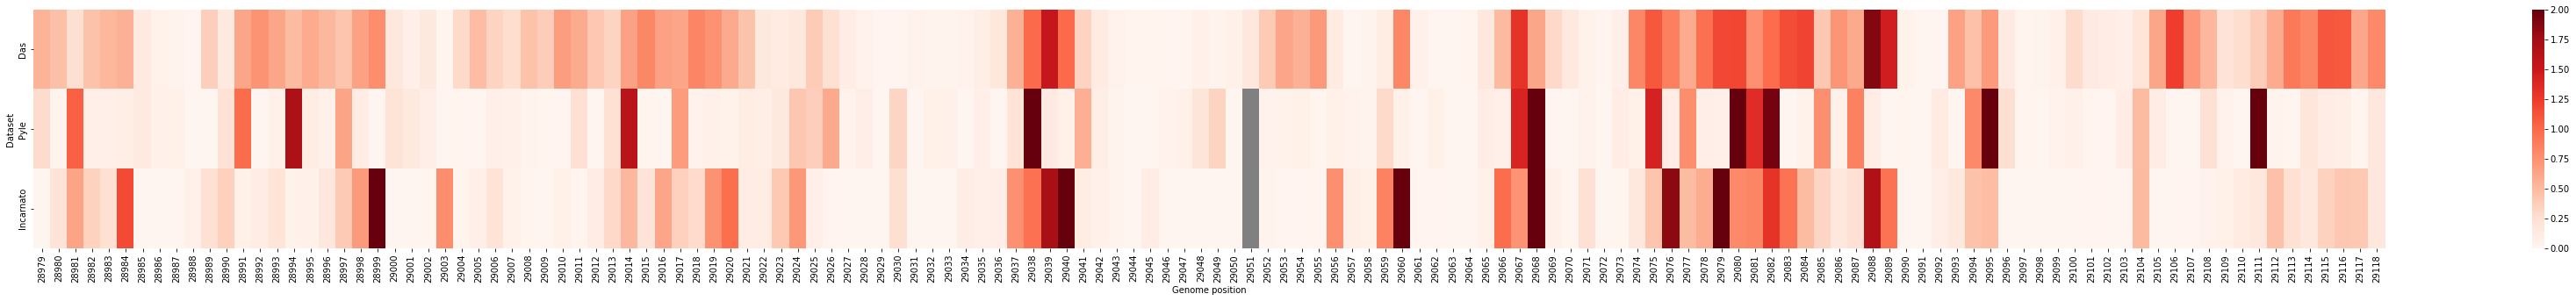

In [522]:

#mid8_region: 28979-29118
start_col =28979  #check if right position (accounted 0 index)
end_col = 29119
data1 = shape_norm_for_heatmap_mid8_das
data2 =shape_norm_for_heatmap_mid8_pyle
data3 =shape_norm_for_heatmap_mid8_incarnato
data = np.array([data1, data2, data3]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das", "Pyle", "Incarnato", ], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label

#plt.show()
plt.savefig('mid8_heatmap_normalized.pdf')
#fig.plt.savefig('5utr_heatmap.png'

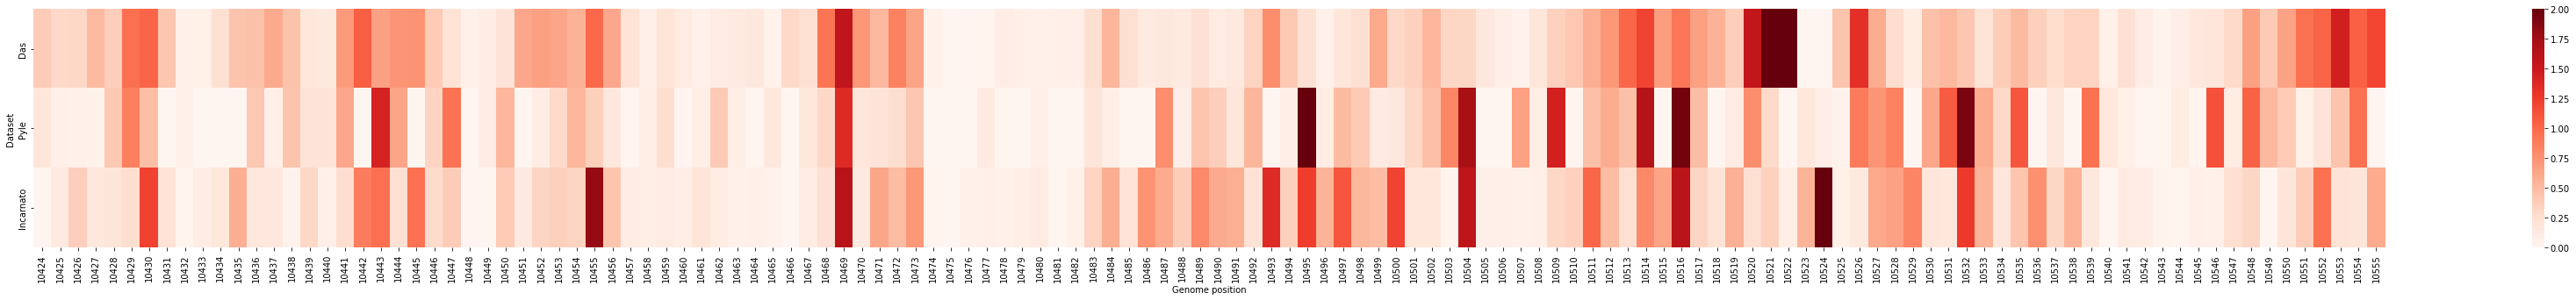

In [544]:
##mid4: 10424-10555

start_col =10424  #check if right position (accounted 0 index)
end_col = 10556
data1 = shape_norm_for_heatmap_mid4_das
data2 =shape_norm_for_heatmap_mid4_pyle
data3 =shape_norm_for_heatmap_mid4_incarnato
data = np.array([data1, data2, data3]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das", "Pyle", "Incarnato", ], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label

#plt.show()
plt.savefig('mid4_heatmap_normalized.pdf')
#fig.plt.savefig('5utr_heatmap.png'

## Making FSE heatmap

In [18]:
#fse incarnato
shape_lines_fse_incarnato = new_import('fse_incarnato.csv') 
print(shape_lines_fse_incarnato)

['1.469\n', '0.177\n', '0.048\n', '0.039\n', '0.464\n', '4.017\n', '1.986\n', '1.519\n', '1.704\n', '0.397\n', '0.0\n', '0.0\n', '0.0\n', '0.05\n', '0.0\n', '0.28\n', '0.0\n', '0.0\n', '0.0\n', '0.0\n', '0.019\n', '0.0\n', '0.101\n', '0.039\n', '0.129\n', '0.0\n', '0.095\n', '0.137\n', '0.073\n', '0.029\n', '0.0\n', '0.0\n', '0.0\n', '0.113\n', '0.035\n', '0.1\n', '0.043\n', '0.276\n', '0.874\n', '1.039\n', '0.788\n', '0.487\n', '0.208\n', '0.159\n', '2.28\n', '0.548\n', '0.662\n', '0.545\n', '0.0\n', '0.0\n', '0.074\n', '0.0\n', '0.022\n', '0.328\n', '0.187\n', '0.111\n', '0.174\n', '0.418\n', '0.888\n', '0.195\n', '0.099\n', '0.104\n', '0.256\n', '0.292\n', '0.158\n', '0.109\n', '0.382\n', '0.707\n', '0.073\n', '0.008\n', '0.054\n', '0.269\n', '0.153\n', '0.264\n', '0.046\n', '0.075\n', '0.976\n', '0.19\n', '0.226\n', '0.0\n', '0.0\n', '0.08\n', '0.248\n', '0.485\n', '0.326\n', '0.064\n', '0.711\n', '0.0\n']


In [39]:
shape_norm_for_heatmap_fse_incarnato=function_for_heatmap_data(shape_lines_fse_incarnato)
print(shape_norm_for_heatmap_fse_incarnato)

[1.577026301663983, 0.1900161030595813, 0.05152979066022544, 0.04186795491143317, 0.49812130971551266, 2.0, 2.0, 1.630703166935051, 1.8293075684380031, 0.42619431025228127, 0.0, 0.0, 0.0, 0.05367686527106817, 0.0, 0.30059044551798175, 0.0, 0.0, 0.0, 0.0, 0.020397208803005905, 0.0, 0.10842726784755771, 0.04186795491143317, 0.13848631239935588, 0.0, 0.10198604401502952, 0.1470746108427268, 0.07836822329575953, 0.03113258185721954, 0.0, 0.0, 0.0, 0.12130971551261406, 0.03757380568974772, 0.10735373054213634, 0.04616210413311862, 0.29629629629629634, 0.9382716049382717, 1.1154052603327964, 0.8459473966720344, 0.522812667740204, 0.22329575952764358, 0.1706924315619968, 2.0, 0.5882984433709072, 0.7106816961889426, 0.5850778314546431, 0.0, 0.0, 0.07944176060118088, 0.0, 0.023617820719269992, 0.3521202361782072, 0.20075147611379496, 0.11916264090177134, 0.18679549114331723, 0.4487385936661299, 0.9533011272141707, 0.20933977455716588, 0.10628019323671498, 0.11164787976382179, 0.274825550187869,

In [40]:
#fse pyle

In [41]:
shape_lines_fse_pyle = new_import('fse_pyle.csv') 
print(shape_lines_fse_pyle)

['-0.404647\n', '1.642375\n', '0.654248\n', '0.294236\n', '1.663224\n', '2.748254\n', '1.589812\n', '0.195863\n', '0.202324\n', '1.914293\n', '0.373227\n', '-0.293648\n', '-0.064309\n', '0.119808\n', '-0.692423\n', '-0.000294\n', '-0.043166\n', '-0.307156\n', '-0.188229\n', '0.207609\n', '0.261934\n', '-0.280140\n', '0.075761\n', '-0.029071\n', '-0.350322\n', '2.051427\n', '1.896087\n', '1.219815\n', '0.596693\n', '-0.185879\n', '0.027897\n', '-0.047571\n', '0.488631\n', '0.002349\n', '-0.113055\n', '0.280140\n', '0.593170\n', '0.413750\n', '0.723549\n', '-0.029071\n', '0.223466\n', '-0.006167\n', '-0.357957\n', '0.436949\n', '0.882707\n', '1.692882\n', '0.267514\n', '0.149761\n', '-0.219355\n', '0.084277\n', '-0.028778\n', '-0.147118\n', '-0.293355\n', '-0.121864\n', '-0.150054\n', '-0.092206\n', '0.156808\n', '-0.111293\n', '-0.058730\n', '0.582011\n', '-0.042285\n', '0.234625\n', '1.990642\n', '-0.134785\n', '0.149761\n', '-0.175014\n', '-0.018206\n', '-0.025547\n', '-0.573495\n', '

In [42]:
shape_norm_for_heatmap_fse_pyle=function_for_heatmap_data(shape_lines_fse_pyle)
print(shape_norm_for_heatmap_fse_pyle)

[0.0, 1.1939056744549346, 0.4755980818636378, 0.21389148643210115, 1.2090616159461962, 1.9978117332786192, 1.15569560430264, 0.1423803620462847, 0.14707711191318681, 1.3915733466896172, 0.27131308815574506, 0.0, 0.0, 0.08709305185788678, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1509189820643364, 0.1904099179131921, 0.0, 0.0550735902594598, 0.0, 0.0, 1.491261335584177, 1.3783387037431973, 0.8867305276110792, 0.43375913455059795, 0.0, 0.02027940427750624, 0.0, 0.3552047027107628, 0.0017075786159035794, 0.0, 0.20364456085961208, 0.43119813009600944, 0.3007708183610498, 0.5259756491947293, 0.0, 0.16244604639485283, 0.0, 0.0, 0.31763506540674885, 0.6416737323577697, 1.23062115898173, 0.1944662349318136, 0.10886704176089228, 0.0, 0.06126419881332736, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11398977760860302, 0.0, 0.0, 0.4230862229973002, 0.0, 0.1705579534935621, 1.4470743768069534, 0.0, 0.10886704176089228, 0.0, 0.0, 0.0, 0.0, 0.1744005505832455, 0.28689574256634925, 0.3195556370130568, 0.0, 0.0, 0.0, 0.571230480

In [43]:
# fse das_vanya

In [44]:
shape_lines_fse_vanya = new_import('fse_vanya.csv') 
print(shape_lines_fse_vanya)

['0.958\n', '1.4439\n', '1.5666\n', '1.3564\n', '1.722\n', '1.5459\n', '1.6413\n', '1.1877\n', '0.7413\n', '0.6253\n', '1.1362\n', '1.2111\n', '0.3911\n', '0.7636\n', '1.1573\n', '1.1914\n', '0.4485\n', '0.1052\n', '0.0592\n', '0.0669\n', '-0.0749\n', '-0.0674\n', '0.0395\n', '0.1484\n', '0.0435\n', '0.0145\n', '0.635\n', '0.7378\n', '0.461\n', '0.4132\n', '0.0245\n', '-0.0609\n', '0.1303\n', '0.0788\n', '0.0019\n', '0.3296\n', '-0.003\n', '0.0448\n', '0.0482\n', '-0.0051\n', '0.0486\n', '0.0325\n', '0.001\n', '0.0572\n', '0.2834\n', '0.9392\n', '0.0714\n', '-0.0341\n', '0.0127\n', '-0.0318\n', '-0.1026\n', '0.0459\n', '0.0508\n', '-0.0643\n', '-0.0024\n', '0.2375\n', '0.3315\n', '0.7295\n', '0.4596\n', '1.0044\n', '1.0058\n', '0.2162\n', '1.0536\n', '0.6084\n', '-0.0251\n', '0.0856\n', '0.5408\n', '0.8797\n', '-0.0008\n', '-0.0056\n', '-0.0028\n', '0.0615\n', '0.0732\n', '0.5664\n', '1.0819\n', '1.3221\n', '0.8814\n', '1.0643\n', '1.2393\n', '0.2322\n', '0.1518\n', '0.1387\n', '0.3422

In [45]:
shape_norm_for_heatmap_fse_vanya=function_for_heatmap_data(shape_lines_fse_vanya)
print(shape_norm_for_heatmap_fse_vanya)

[0.7748536533581374, 1.1678613675196394, 1.2671041057942152, 1.097089243648202, 1.392795397789888, 1.250361443346915, 1.3275232789736022, 0.9606405888240708, 0.5995814334388175, 0.505757817792112, 0.9189861387740248, 0.9795670768079752, 0.3163311730985047, 0.6176182147226239, 0.9360523309304514, 0.9636332386334916, 0.3627576863581677, 0.08508831350028816, 0.0478823969507325, 0.05411034385141899, 0.0, 0.0, 0.03194855877624888, 0.12002952208595782, 0.03518385586751459, 0.011727951955838197, 0.5136034132384314, 0.5967505484839601, 0.37286798976837304, 0.3342061895277478, 0.01981619468400247, 0.0, 0.10538980274798049, 0.06373535269793447, 0.001536766118351212, 0.2665884803202945, 0.0, 0.036235327422175945, 0.0389853299497518, 0.0, 0.03930885965887837, 0.026286788866533888, 0.0008088242728164274, 0.04626474840509964, 0.2292207989161755, 0.7596477570291886, 0.057750053079092915, 0.0, 0.010272068264768628, 0.0, 0.0, 0.03712503412227402, 0.04108827305907451, 0.0, 0.0, 0.19209576479390147, 0.26

In [46]:
#fse ann_vanya

In [47]:
shape_lines_fse_ann_vanya = new_import('fse_ann_vanya_plusfse.csv') 
print(shape_lines_fse_ann_vanya)

['1.1445\n', '1.2942\n', '1.3306\n', '2.0319\n', '2.5546\n', '1.5925\n', '2.0954\n', '1.9325\n', '1.066\n', '0.97443\n', '0.76588\n', '0.35922\n', '0.18565\n', '0.082187\n', '0.28457\n', '0.51402\n', '0.51824\n', '0.14217\n', '0.10439\n', '0.31892\n', '1.1448\n', '0.20705\n', '0.33895\n', '0.38766\n', '0.32458\n', '0.30234\n', '0.32398\n', '0.48286\n', '0.59068\n', '0.71296\n', '0.29362\n', '0.017872\n', '0.090324\n', '0.12107\n', '0.4831\n', '0.93846\n', '0.97869\n', '1.1092\n', '1.415\n', '1.1414\n', '0.66705\n', '0.77006\n', '0.65627\n', '0.37399\n', '0.49089\n', '0.6239\n', '0.58551\n', '0.1641\n', '0.124\n', '0.070244\n', '0.2861\n', '0.0043777\n', '0.11935\n', '0\n', '0.0013356\n', '0.21067\n', '0.47899\n', '0.87653\n', '1.3448\n', '1.2078\n', '1.5174\n', '1.2769\n', '1.0388\n', '1.1225\n', '0.58384\n', '0.08579\n', '0.30295\n', '0.65188\n', '0.99486\n', '0.14422\n', '0.10702\n', '0.11719\n', '0.18461\n', '0.30832\n', '0.76053\n', '1.137\n', '1.1742\n', '1.0588\n', '1.0011\n', '1

In [48]:
shape_norm_for_heatmap_fse_ann_vanya=function_for_heatmap_data(shape_lines_fse_ann_vanya)
print(shape_norm_for_heatmap_fse_ann_vanya)

[0.8220211161387633, 0.9295410471881062, 0.9556848380377793, 1.4593837535014005, 1.8348057171586587, 1.1437908496732028, 1.5049917402858581, 1.387991093873447, 0.7656395891690011, 0.6998707175177764, 0.5500825971414207, 0.25800474035768156, 0.1333405156934569, 0.05902966314731021, 0.20438842203548088, 0.3691876750700281, 0.3722186310421605, 0.10211161387631976, 0.07497665732959852, 0.22905982905982908, 0.8222365869424694, 0.1487107663578252, 0.24344609638727285, 0.2784313725490196, 0.23312504488975078, 0.2171514759750054, 0.23269410328233858, 0.34680744092508803, 0.4242476477770596, 0.5120735473676651, 0.21088845794728148, 0.012836314012784601, 0.06487394957983195, 0.08695683401565756, 0.34697981756805285, 0.6740357681534153, 0.702930402930403, 0.7966673849026791, 1.0163039574804282, 0.8197945845004669, 0.4790993320405086, 0.553084823673059, 0.4713567478273361, 0.2686130862601451, 0.3525748761042879, 0.4481074481074482, 0.4205343675931911, 0.11786252962723552, 0.08906126553185377, 0.05

In [49]:
#fse weeks

In [50]:
shape_lines_fse_weeks = new_import('fse_weeks.csv') 
print(shape_lines_fse_weeks)

['-999\n', '1.252554\n', '0.977895\n', '0.296927\n', '0.030692\n', '1.181767\n', '2.277335\n', '1.339732\n', '1.002709\n', '0.728050\n', '0.063343\n', '0.159663\n', '0.362817\n', '0.563555\n', '0.082476\n', '0.555980\n', '0.190159\n', '0.028472\n', '-0.002351\n', '0.077383\n', '0.368694\n', '0.240572\n', '0.073922\n', '0.560616\n', '0.168936\n', '0.466124\n', '0.276488\n', '0.967903\n', '0.081366\n', '0.238548\n', '0.040879\n', '0.179058\n', '-0.334802\n', '-0.046038\n', '0.254220\n', '0.042903\n', '0.189310\n', '0.155092\n', '0.233715\n', '1.331112\n', '0.379599\n', '0.918209\n', '0.305221\n', '0.447383\n', '0.497796\n', '0.439089\n', '0.237503\n', '0.081758\n', '0.203611\n', '0.004179\n', '0.053090\n', '0.066281\n', '0.003330\n', '-0.084435\n', '0.065171\n', '-0.153655\n', '0.272113\n', '1.988897\n', '0.370196\n', '0.127796\n', '0.972997\n', '0.433082\n', '1.361869\n', '0.984882\n', '0.040095\n', '-0.010318\n', '0.038071\n', '4.413423\n', '0.017240\n', '0.079472\n', '-0.002024\n', '-

In [51]:
shape_norm_for_heatmap_fse_weeks=function_for_heatmap_data(shape_lines_fse_weeks)
print(shape_norm_for_heatmap_fse_weeks)

[nan, 0.9679917664353955, 0.7557313364839688, 0.22946946098320928, 0.023719219527010543, 0.913286553589752, 1.7599572788200362, 1.0353641800912579, 0.7749079529750168, 0.56264752302359, 0.04895238246120907, 0.12338986535061527, 0.2803902017180824, 0.43552341849812415, 0.0637386403528516, 0.4296693494274509, 0.14695761325546713, 0.02200357156174391, 0.0, 0.059802696619922345, 0.28493203193964634, 0.18591750554059625, 0.0571279859857837, 0.43325211698014277, 0.13055617327039792, 0.36022733881168584, 0.21367390748677476, 0.7480093750114715, 0.06288081637021828, 0.1843533291974883, 0.03159187980726782, 0.13837860061473523, 0.0, 0.0, 0.1964648764549922, 0.03315605615037577, 0.14630149383091248, 0.11985733073384332, 0.18061831720823893, 1.0287025199738713, 0.29335957295821957, 0.7096051362790572, 0.23587918360659732, 0.3457440241643606, 0.38470391644948976, 0.3393343015409726, 0.18354573815077493, 0.06318375961453564, 0.15735351254770438, 0.0032295913724546157, 0.04102871643063305, 0.0512229

In [52]:
#fse rouskin

In [53]:
shape_lines_fse_rouskin= new_import('fse_rouskin.csv') 
print(shape_lines_fse_rouskin)

['0.057278\n', '0.044601\n', '0.036053\n', '0.036884\n', '0.029916\n', '0.027911\n', '0.371692\n', '0.520337\n', '0.451962\n', '0.477273\n', '0.065011\n', '0.067865\n', '0.068191\n', '0.050106\n', '0.013475\n', '0.012898\n', '0.048921\n', '0.064150\n', '0.084020\n', '0.075395\n', '0.013390\n', '0.070459\n', '0.012778\n', '0.581095\n', '0.633117\n', '0.063780\n', '0.027200\n', '0.086872\n', '0.466834\n', '0.293728\n', '0.079544\n', '0.056699\n', '0.072858\n', '0.139520\n', '0.078153\n', '0.029699\n', '0.337331\n', '0.022143\n', '0.020640\n', '0.842590\n', '0.833661\n', '0.618097\n', '0.472077\n', '0.320901\n', '0.082377\n', '0.021161\n', '0.055998\n', '0.387215\n', '0.075783\n', '0.086307\n', '0.061054\n', '0.335842\n', '0.116151\n', '0.283429\n', '0.053194\n', '0.125667\n', '0.119772\n', '0.945059\n', '0.901118\n', '0.021565\n', '0.610001\n', '0.066732\n', '0.027420\n', '0.443996\n', '0.246068\n', '0.016420\n', '0.052540\n', '0.459564\n', '0.015297\n', '0.066541\n', '0.021969\n', '0.14

In [54]:
sequence_fse = whole_genome[13458:13546]
print(sequence_fse)


GTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTG


In [55]:
rouskin_dms_shape_lines_fse = dms_shape(sequence_fse,shape_lines_fse_rouskin)
print(rouskin_dms_shape_lines_fse)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.371692\n', '0.520337\n', '0.451962\n', '0.477273\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.064150\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.581095\n', '0.633117\n', 'nan\n', 'nan\n', 'nan\n', '0.466834\n', '0.293728\n', 'nan\n', '0.056699\n', '0.072858\n', '0.139520\n', 'nan\n', 'nan\n', '0.337331\n', 'nan\n', 'nan\n', '0.842590\n', '0.833661\n', '0.618097\n', '0.472077\n', '0.320901\n', 'nan\n', 'nan\n', 'nan\n', '0.387215\n', 'nan\n', 'nan\n', '0.061054\n', '0.335842\n', '0.116151\n', '0.283429\n', 'nan\n', 'nan\n', '0.119772\n', '0.945059\n', '0.901118\n', 'nan\n', '0.610001\n', 'nan\n', 'nan\n', '0.443996\n', '0.246068\n', 'nan\n', 'nan\n', '0.459564\n', 'nan\n', 'nan\n', 'nan\n', '0.144555\n', 'nan\n', 'nan\n', '0.621789\n', 'nan\n', '0.462563\n', '0.375476\n', '0.506764\n', 'nan\n', 'nan\n', 'nan\n', '1.000000\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n']


In [56]:
shape_norm_for_heatmap_fse_rouskin=function_for_heatmap_data(rouskin_dms_shape_lines_fse)
print(shape_norm_for_heatmap_fse_rouskin)

[nan, nan, nan, nan, nan, nan, 0.43264119340304014, 0.605660656273898, 0.5260736821153664, 0.5555351212806549, nan, nan, nan, nan, nan, nan, nan, 0.07466916844270262, nan, nan, nan, nan, nan, 0.6763816124117269, 0.7369340595002113, nan, nan, nan, 0.543384358235084, 0.3418928372305246, nan, 0.0659963707175806, 0.08480508611688897, 0.16239816650235184, nan, nan, 0.39264575619556225, nan, nan, 0.9807559569467934, 0.9703628002043945, 0.7194511146832293, 0.5494870932334486, 0.3735216028438303, nan, nan, nan, 0.45070961899518464, nan, nan, 0.071065493532358, 0.39091259342375884, 0.13519717199981843, 0.3299050310607445, nan, nan, 0.13941193519437847, 1.100027586271116, 1.0488812428488121, nan, 0.7100275513517855, nan, nan, 0.5168014358828713, 0.28641766080060715, nan, nan, 0.5349222404708057, nan, nan, nan, 0.1682587941423987, nan, nan, 0.723748520293369, nan, 0.538413009545781, 0.4370456849601279, 0.589861987165982, nan, nan, nan, 1.1639776842198382, nan, nan, nan, nan, nan]


In [57]:
print(len(shape_norm_for_heatmap_fse_incarnato))
print(len(shape_norm_for_heatmap_fse_pyle))
print(len(shape_norm_for_heatmap_fse_vanya))
print(len(shape_norm_for_heatmap_fse_ann_vanya))
print(len(shape_norm_for_heatmap_fse_weeks))
print(len(shape_norm_for_heatmap_fse_rouskin))



88
88
88
88
88
88


## adding zhang data

In [58]:
shape_lines_fse_zhang_invivo= new_import('fse_zhang_invivo.csv') 
print(shape_lines_fse_zhang_invivo)

['0.178\n', '0.309\n', '0.336\n', '0.556\n', '1\n', '1\n', '1\n', '0.946\n', '0.236\n', '0.171\n', '0\n', '0.006\n', '0.006\n', '0.054\n', '0.038\n', '0.038\n', '0.019\n', '0\n', '0\n', '0\n', '0.003\n', '0.182\n', '0.492\n', '0.46\n', '0.387\n', '0.187\n', '0.162\n', '0.1\n', '0.252\n', '0.099\n', '0\n', '0\n', '0\n', '0\n', '0\n', '0.102\n', '0.167\n', '0.482\n', '0.731\n', '0.376\n', '0.479\n', '0.119\n', '0\n', '0.454\n', '0.571\n', '0.611\n', '0.011\n', '0\n', '0\n', '0\n', '0.025\n', '0\n', '0.069\n', '0.014\n', '0.028\n', '0\n', '0.114\n', '0.443\n', '0.426\n', '0.377\n', '0.308\n', '0.217\n', '0.863\n', '0.072\n', '0\n', '0.013\n', '0.092\n', '0.218\n', '0.027\n', '0.008\n', '0\n', '0.002\n', '0\n', '0.225\n', '0.638\n', '0.793\n', '0.307\n', '0.346\n', '0.154\n', '0\n', '0\n', '0\n', '0\n', '0.664\n', '0.322\n', '0.145\n', '0.163\n', '0.417\n']


In [59]:
shape_norm_for_heatmap_fse_zhang_invivo=function_for_heatmap_data(shape_lines_fse_zhang_invivo)
print(shape_norm_for_heatmap_fse_zhang_invivo)

[0.28164556962025317, 0.4889240506329114, 0.5316455696202532, 0.879746835443038, 1.5822784810126582, 1.5822784810126582, 1.5822784810126582, 1.4968354430379747, 0.37341772151898733, 0.27056962025316456, 0.0, 0.00949367088607595, 0.00949367088607595, 0.08544303797468354, 0.060126582278481014, 0.060126582278481014, 0.030063291139240507, 0.0, 0.0, 0.0, 0.004746835443037975, 0.2879746835443038, 0.7784810126582278, 0.7278481012658228, 0.6123417721518988, 0.2958860759493671, 0.2563291139240506, 0.15822784810126583, 0.3987341772151899, 0.15664556962025317, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16139240506329114, 0.26424050632911394, 0.7626582278481012, 1.1566455696202531, 0.5949367088607594, 0.7579113924050632, 0.1882911392405063, 0.0, 0.7183544303797469, 0.9034810126582278, 0.9667721518987341, 0.01740506329113924, 0.0, 0.0, 0.0, 0.03955696202531646, 0.0, 0.10917721518987343, 0.022151898734177215, 0.04430379746835443, 0.0, 0.18037974683544306, 0.7009493670886076, 0.6740506329113923, 0.5965189873417721, 

In [60]:
shape_lines_fse_zhang_invitro= new_import('fse_zhang_invitro.csv') 
print(shape_lines_fse_zhang_invitro)

['0.144\n', '0.112\n', '0.12\n', '0.301\n', '0.902\n', '1\n', '1\n', '1\n', '0.278\n', '0.159\n', '0\n', '0.019\n', '0.035\n', '0.108\n', '0.184\n', '0.167\n', '0.039\n', '0.014\n', '0\n', '0\n', '0.005\n', '0.186\n', '0.25\n', '0.093\n', '0.013\n', '0.024\n', '0.042\n', '0.096\n', '0.197\n', '0.134\n', '0.007\n', '0\n', '0\n', '0\n', '0\n', '0.234\n', '0.172\n', '0.663\n', '0.673\n', '0.54\n', '0.36\n', '0.12\n', '0.012\n', '0.117\n', '0.091\n', '0.248\n', '0.034\n', '0.004\n', '0\n', '0\n', '0.01\n', '0\n', '0.055\n', '0.036\n', '0\n', '0\n', '0.084\n', '0.245\n', '0.746\n', '0.989\n', '0.959\n', '0.324\n', '0.74\n', '0.126\n', '0.033\n', '0.178\n', '0.427\n', '0.998\n', '0.149\n', '0.037\n', '0.008\n', '0\n', '0\n', '0.066\n', '0.079\n', '0.347\n', '0.025\n', '0.159\n', '0.131\n', '0\n', '0\n', '0\n', '0\n', '0.063\n', '0.179\n', '0.187\n', '0.144\n', '0.476\n']


In [61]:
shape_norm_for_heatmap_fse_zhang_invitro=function_for_heatmap_data(shape_lines_fse_zhang_invitro)
print(shape_norm_for_heatmap_fse_zhang_invitro)

[0.20214072644323564, 0.15722056501140552, 0.16845060536936304, 0.4225302684681523, 1.2661870503597124, 1.403755044744692, 1.403755044744692, 1.403755044744692, 0.39024390243902446, 0.22319705211440605, 0.0, 0.026671345850149148, 0.04913142656606423, 0.15160554483242675, 0.25829092823302335, 0.2344270924723636, 0.05474644674504299, 0.01965257062642569, 0.0, 0.0, 0.00701877522372346, 0.2610984383225127, 0.350938761186173, 0.13054921916125636, 0.018248815581680997, 0.03369012107387261, 0.05895771187927707, 0.13476048429549045, 0.27653974381470436, 0.18810317599578874, 0.009826285313212845, 0.0, 0.0, 0.0, 0.0, 0.32847868047025797, 0.24144586769608703, 0.9306895946657309, 0.9447271451131778, 0.7580277241621338, 0.5053518161080891, 0.16845060536936304, 0.016845060536936306, 0.16423934023512898, 0.127741709071767, 0.34813125109668364, 0.047727671521319535, 0.0056150201789787685, 0.0, 0.0, 0.01403755044744692, 0.0, 0.07720652746095806, 0.05053518161080891, 0.0, 0.0, 0.11791542375855414, 0.343

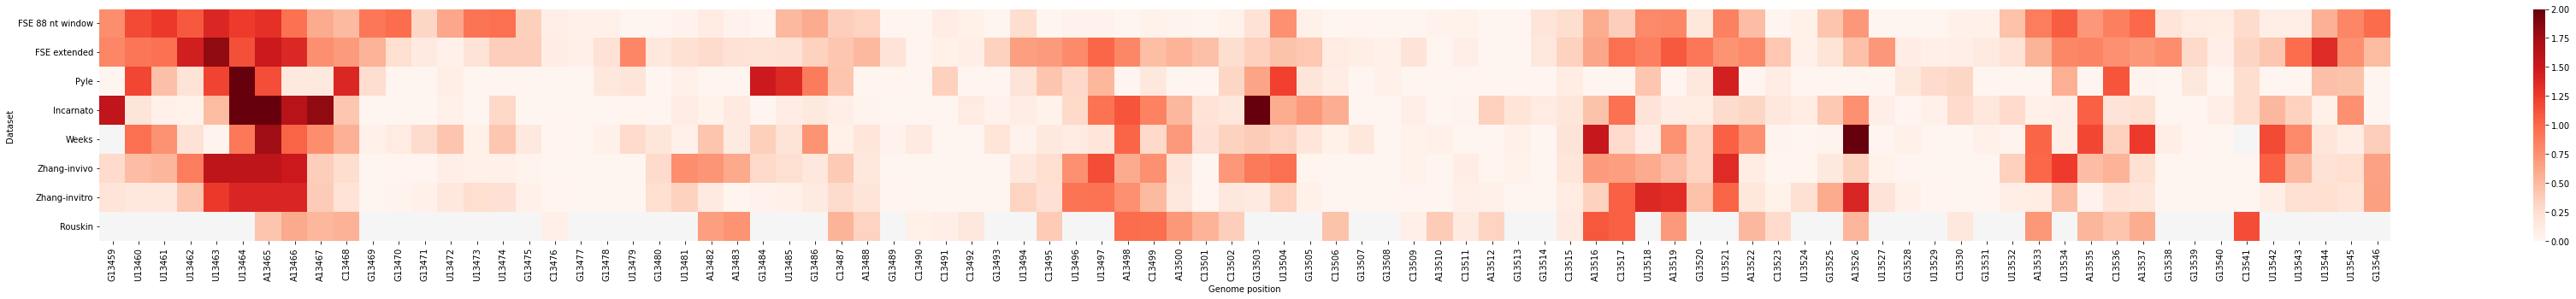

<Figure size 432x288 with 0 Axes>

In [93]:
#start_col =13459  #sequense_fse = whole_genome[13458:13546]
#end_col = 13547
data1 = shape_norm_for_heatmap_fse_vanya # change name to FSE 85 nt window
data2 = shape_norm_for_heatmap_fse_ann_vanya
data3 = shape_norm_for_heatmap_fse_pyle
data4 = shape_norm_for_heatmap_fse_incarnato
data5 = shape_norm_for_heatmap_fse_weeks
data6 = shape_norm_for_heatmap_fse_zhang_invivo
data7 = shape_norm_for_heatmap_fse_zhang_invitro
data8 = shape_norm_for_heatmap_fse_rouskin
data = np.array([data1, data2, data3, data4, data5, data6, data7, data8]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["FSE 88 nt window", "FSE extended", "Pyle", 'Incarnato', 'Weeks', "Zhang-invivo", "Zhang-invitro","Rouskin" ], \
			columns= fse_xaxis)
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("whitesmoke") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
#plt.text(0.125, 0.9, "Slippery Site", fontsize=44, transform=plt.gcf().transFigure)
#plt.text(0.2, 0.9, "Stem 1 5' strand", fontsize=44, transform=plt.gcf().transFigure)

plt.show()
plt.gcf().subplots_adjust(bottom=0.19)
#plt.savefig('fse_heatmap_updated_NEW.pdf')
#fig.plt.savefig('5utr_heatmap.png')

In [67]:
print(sequence_fse)

GTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTG


In [68]:
def get_U(sequence):
    reactivity_no_GU= []
    for idx in range(0, len(sequence)):
        if sequence[idx] =='T':
            reactivity_no_GU.append('U')
        else:
            reactivity_no_GU.append(sequence[idx])
    return reactivity_no_GU

In [70]:
sequence_fse_new = get_U(sequence_fse)

In [91]:
position_fse=list(range(13459,13547))
print(position_fse)

[13459, 13460, 13461, 13462, 13463, 13464, 13465, 13466, 13467, 13468, 13469, 13470, 13471, 13472, 13473, 13474, 13475, 13476, 13477, 13478, 13479, 13480, 13481, 13482, 13483, 13484, 13485, 13486, 13487, 13488, 13489, 13490, 13491, 13492, 13493, 13494, 13495, 13496, 13497, 13498, 13499, 13500, 13501, 13502, 13503, 13504, 13505, 13506, 13507, 13508, 13509, 13510, 13511, 13512, 13513, 13514, 13515, 13516, 13517, 13518, 13519, 13520, 13521, 13522, 13523, 13524, 13525, 13526, 13527, 13528, 13529, 13530, 13531, 13532, 13533, 13534, 13535, 13536, 13537, 13538, 13539, 13540, 13541, 13542, 13543, 13544, 13545, 13546]


In [92]:
fse_xaxis= [''.join([sequence_fse_new[i], str(position_fse[i])]) for i in range(0, len(sequence_fse))]
print(fse_xaxis)


['G13459', 'U13460', 'U13461', 'U13462', 'U13463', 'U13464', 'A13465', 'A13466', 'A13467', 'C13468', 'G13469', 'G13470', 'G13471', 'U13472', 'U13473', 'U13474', 'G13475', 'C13476', 'G13477', 'G13478', 'U13479', 'G13480', 'U13481', 'A13482', 'A13483', 'G13484', 'U13485', 'G13486', 'C13487', 'A13488', 'G13489', 'C13490', 'C13491', 'C13492', 'G13493', 'U13494', 'C13495', 'U13496', 'U13497', 'A13498', 'C13499', 'A13500', 'C13501', 'C13502', 'G13503', 'U13504', 'G13505', 'C13506', 'G13507', 'G13508', 'C13509', 'A13510', 'C13511', 'A13512', 'G13513', 'G13514', 'C13515', 'A13516', 'C13517', 'U13518', 'A13519', 'G13520', 'U13521', 'A13522', 'C13523', 'U13524', 'G13525', 'A13526', 'U13527', 'G13528', 'U13529', 'C13530', 'G13531', 'U13532', 'A13533', 'U13534', 'A13535', 'C13536', 'A13537', 'G13538', 'G13539', 'G13540', 'C13541', 'U13542', 'U13543', 'U13544', 'U13545', 'G13546']


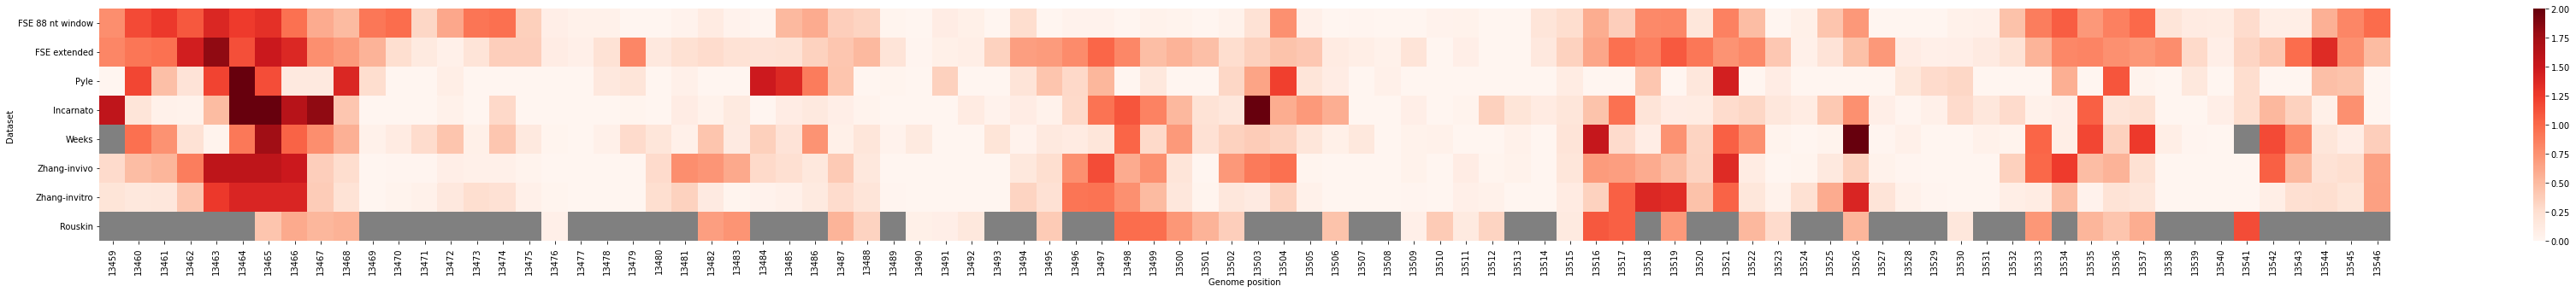

In [188]:
start_col =13459
end_col = 13547
data1 = shape_norm_for_heatmap_fse_vanya # change name to FSE 85 nt window
data2 = shape_norm_for_heatmap_fse_ann_vanya
data3 = shape_norm_for_heatmap_fse_pyle
data4 = shape_norm_for_heatmap_fse_incarnato
data5 = shape_norm_for_heatmap_fse_weeks
data6 = shape_norm_for_heatmap_fse_zhang_invivo
data7 = shape_norm_for_heatmap_fse_zhang_invitro
data8 = shape_norm_for_heatmap_fse_rouskin
data = np.array([data1, data2, data3, data4, data5, data6, data7, data8]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["FSE 88 nt window", "FSE extended", "Pyle", 'Incarnato', 'Weeks', "Zhang-invivo", "Zhang-invitro","Rouskin" ], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (60,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
fig.transFigure

## 5'utr new heatmap with bp function

In [140]:
dot_bracket_5utr = "......(((((.(((((....)))))..)))))...(((((((.(((((.....))))).((((.......))))........((((((((.((.((((.(((.....))).)))))).))))))))....((((.....)))).(((((((((((((((..(((((...(((.(((((((.(((..((((((.(((((......)))))..))))))......)))(((((((.((......)))))))))(((....))).)))))))))).))))).))))...)))))))..................))))..((((((...)))))).(((((.((((....(((((.(((((((((((((.....))).)))))..))))).)))))...(((((...))))))))))))))........))))))).....(((.....)))"

In [141]:
dot_bracket_5utr[10]

'('

In [142]:
def bp_func(dot_bracket):
    struct_sim= []
    for idx in range(0, len(dot_bracket)):
        if dot_bracket[idx] == ".":
            struct_sim.append(1) #1 means base is unpaired
        else:
            struct_sim.append(0) #0 means base is paired
    return(struct_sim)

In [143]:
bp_heatmap_5utr = bp_func(dot_bracket_5utr)
print(bp_heatmap_5utr)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [ ]:
#5'utr set T to U and make new heatmap like fse

In [85]:
print(sequence_5utr)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCC


In [87]:
sequence_5utr_no_T = get_U(sequence_5utr)

In [89]:
position_5utr=list(range(1,451))
print(position_5utr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [97]:
xaxis_5utr = [''.join([sequence_5utr_no_T[i], str(position_5utr[i])]) for i in range(0, len(sequence_5utr_no_T))]
print(xaxis_5utr)

['A1', 'U2', 'U3', 'A4', 'A5', 'A6', 'G7', 'G8', 'U9', 'U10', 'U11', 'A12', 'U13', 'A14', 'C15', 'C16', 'U17', 'U18', 'C19', 'C20', 'C21', 'A22', 'G23', 'G24', 'U25', 'A26', 'A27', 'C28', 'A29', 'A30', 'A31', 'C32', 'C33', 'A34', 'A35', 'C36', 'C37', 'A38', 'A39', 'C40', 'U41', 'U42', 'U43', 'C44', 'G45', 'A46', 'U47', 'C48', 'U49', 'C50', 'U51', 'U52', 'G53', 'U54', 'A55', 'G56', 'A57', 'U58', 'C59', 'U60', 'G61', 'U62', 'U63', 'C64', 'U65', 'C66', 'U67', 'A68', 'A69', 'A70', 'C71', 'G72', 'A73', 'A74', 'C75', 'U76', 'U77', 'U78', 'A79', 'A80', 'A81', 'A82', 'U83', 'C84', 'U85', 'G86', 'U87', 'G88', 'U89', 'G90', 'G91', 'C92', 'U93', 'G94', 'U95', 'C96', 'A97', 'C98', 'U99', 'C100', 'G101', 'G102', 'C103', 'U104', 'G105', 'C106', 'A107', 'U108', 'G109', 'C110', 'U111', 'U112', 'A113', 'G114', 'U115', 'G116', 'C117', 'A118', 'C119', 'U120', 'C121', 'A122', 'C123', 'G124', 'C125', 'A126', 'G127', 'U128', 'A129', 'U130', 'A131', 'A132', 'U133', 'U134', 'A135', 'A136', 'U137', 'A138', 'A1

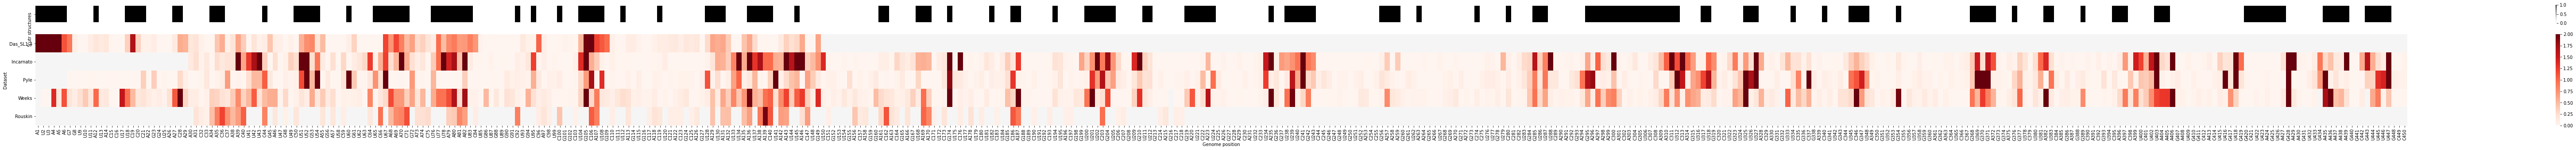

In [365]:

#start_col =1  #check if right position (accounted 0 index)
#end_col = 451
data1 = shape_norm_das_new
data2 =shape_norm_incarnato_new
data3 =shape_norm_pyle_new
data4 =shape_norm_weeks_new
data5 =shape_norm_rouskin_new
data = np.array([data1, data2, data3, data4, data5]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das_SL1-4", "Incarnato", "Pyle", "Weeks", "Rouskin"], \
			columns=xaxis_5utr)
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("whitesmoke") # nan values will now be gray
#plt.figure(figsize = (60,5))
#heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
#heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

#plt.xlabel("Genome position") # X axis label
#plt.ylabel("Dataset") # Y axis label

structures_data = np.array([bp_heatmap_5utr])
structures_data_df = pd.DataFrame(data=structures_data, \
			index=["5'utr structures"], \
			columns=(position_5utr))

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]},figsize=(120, 5))

fig.subplots_adjust(wspace=0.01)
sns.heatmap(structures_data_df, cmap='Greys', ax=ax[0], xticklabels=False)
for i in range(structures_data_df.shape[0] + 1):
	ax[0].axhline(i, color='white', lw=4)
sns.heatmap(data_df, mask=mask, cmap=color_map, ax=ax[1])
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center',)

plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label

plt.show()
#plt.savefig('5utr_heatmap_plus_structures.pdf')


In [ ]:
NEW TESTING

In [181]:
print(position_5utr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [301]:
LNA3=list(range(190,215)) #190-214
LNA6=list(range(44,88)) #44-87
LNA7=list(range(292,323)) #292-322
LNA8=list(range(235,256)) #235-255
LNA14=list(range(258,277)) #258-276
#LNA1=list(range(1,10))
#LNA2=list(range(15,25))


In [302]:
LNA3

[190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214]

In [368]:
def suplot_lna(position_5utr):
    new_number=[]
    for number in position_5utr:
    #for number in range(0, len(position_5utr)):
        #new_number=[]
        if number==number in LNA3:
            new_number.append(1)
        elif number == number in LNA6:
            new_number.append(1)
        elif number == number in LNA7:
            new_number.append(1)
        elif number == number in LNA8:
            new_number.append(1)
        elif number == number in LNA14:
            new_number.append(1)
        else:
            new_number.append(0)
    return new_number

In [369]:
suplot_lna(position_5utr)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [370]:
subplot_5utr = suplot_lna(position_5utr)

print(subplot_5utr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [371]:
#testing new heatmap with plot

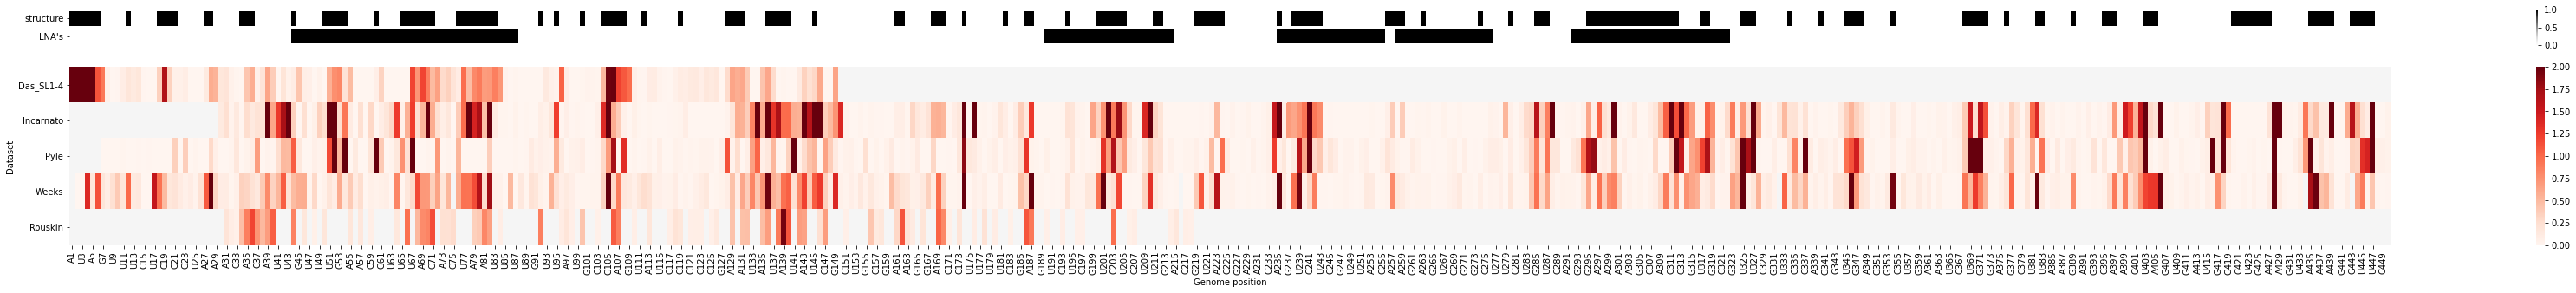

In [372]:
#start_col =1  #check if right position (accounted 0 index)
#end_col = 451
data1 = shape_norm_das_new
data2 =shape_norm_incarnato_new
data3 =shape_norm_pyle_new
data4 =shape_norm_weeks_new
data5 =shape_norm_rouskin_new
data = np.array([data1, data2, data3, data4, data5]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das_SL1-4", "Incarnato", "Pyle", "Weeks", "Rouskin"], \
			columns=xaxis_5utr)
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("whitesmoke") # nan values will now be gray
#plt.figure(figsize = (60,5))
#heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
#heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

#plt.xlabel("Genome position") # X axis label
#plt.ylabel("Dataset") # Y axis label

structures_data = np.array([bp_heatmap_5utr, subplot_5utr])
structures_data_df = pd.DataFrame(data=structures_data, \
			index=["structure","LNA's"], \
			columns=np.arange(1, 451))

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]},figsize=(60, 5))

fig.subplots_adjust(wspace=0.01)
sns.heatmap(structures_data_df, cmap='Greys', ax=ax[0], xticklabels=False)
for i in range(structures_data_df.shape[0] + 1):
	ax[0].axhline(i, color='white', lw=4)
sns.heatmap(data_df, mask=mask, cmap=color_map, ax=ax[1])
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center',)
plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
plt.savefig('5utr_heatmap_plus_LNA.pdf')

#plt.show()

## Adding conservation track

In [374]:
#opening conservation file
sars_conservation_lines = new_import('sarsr_conservation.csv') 
print(sars_conservation_lines)

['\ufeff1\n', '1\n', '0.166667\n', '0.166667\n', '0.166667\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0.166667\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0.25\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0.25\n', '0.888889\n', '1\n', '0.222222\n', '1\n', '1\n', '0.222222\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0.888889\n', '1\n', '1\n', '0.888889\n', '0.222222\n', '0.111111\n', '1\n', '0.9\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0.363636\n', '0.909091\n', '0.909091\n', '1\n', '1\n', '1\n', '1\n', '0.181818\n', '1\n', '1\n', '0.909091\n', '0.909091\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0.181818\n', '1\n', '1\n', '1\n', '0.909091\n', '1\n', '1\n', '1\n', '1\n', '0.363636\n', '0.18

In [375]:
sars_conservation_float=[float(i) for i in sars_conservation_lines]

ValueError: could not convert string to float: '\ufeff1\n'

In [376]:
def covert_conservation_to_floats(conservation_lines):
    conservation_numbers = []
    for number in conservation_lines:
        if number == '\ufeff1\n':
            conservation_numbers.append(1)
        else:
            conservation_numbers.append(number)   
    float_lines=[float(i) for i in conservation_numbers]
    return (float_lines)

In [381]:
conservation_floats = covert_conservation_to_floats(sars_conservation_lines)
print(len(conservation_floats))
print(len(whole_genome))

29903
29903


In [388]:
conservation_5utr = conservation_floats[0:450]
print(len(conservation_5utr))

450


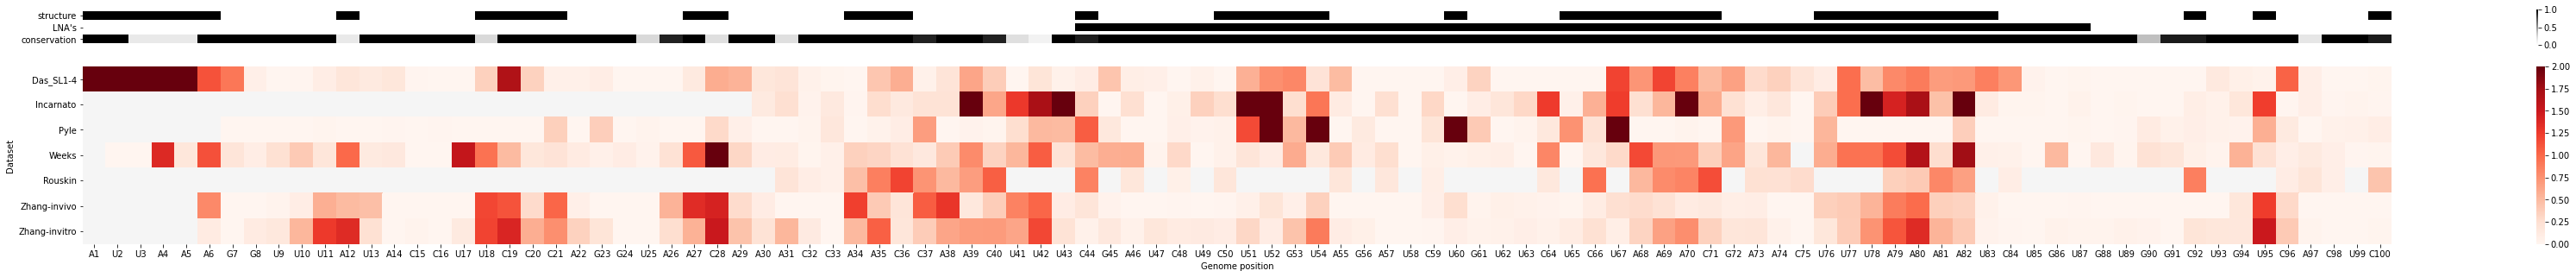

In [401]:
data1 = shape_norm_das_new[0:100]
data2 =shape_norm_incarnato_new[0:100]
data3 =shape_norm_pyle_new[0:100]
data4 =shape_norm_weeks_new[0:100]
data5 =shape_norm_rouskin_new[0:100]
data6 =shape_norm_for_heatmap_5utr_zhang_invivo[0:100]
data7=shape_norm_for_heatmap_5utr_zhang_invitro[0:100]
data = np.array([data1, data2, data3, data4, data5, data6, data7]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Das_SL1-4", "Incarnato", "Pyle", "Weeks", "Rouskin","Zhang-invivo", "Zhang-invitro"], \
			columns=xaxis_5utr[0:100])
mask = data_df.isnull() # Create a mask for all the "nan" values

# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("whitesmoke") # nan values will now be gray
#plt.figure(figsize = (60,5))
#heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
#heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center')

#plt.xlabel("Genome position") # X axis label
#plt.ylabel("Dataset") # Y axis label

structures_data = np.array([bp_heatmap_5utr[0:100], subplot_5utr[0:100], conservation_5utr[0:100]])
structures_data_df = pd.DataFrame(data=structures_data, \
			index=["structure","LNA's","conservation"], \
			columns=np.arange(1, 101))

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]},figsize=(60, 5))

fig.subplots_adjust(wspace=0.01)
sns.heatmap(structures_data_df, cmap='Greys', ax=ax[0], xticklabels=False)
for i in range(structures_data_df.shape[0] + 1):
	ax[0].axhline(i, color='white', lw=4)
sns.heatmap(data_df, mask=mask, cmap=color_map, ax=ax[1])
heat_map.set_yticklabels(heat_map.get_yticklabels(),va='center',)
plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
plt.savefig('5utr_heatmap_slice_1.pdf')

plt.show()

In [396]:
shape_lines_5utr_zhang_invivo= new_import('5utr_zhang_invivo.csv') 
#print(shape_lines_5utr_zhang_invivo)
shape_norm_for_heatmap_5utr_zhang_invivo=function_for_heatmap_data(shape_lines_5utr_zhang_invivo)
print(shape_norm_for_heatmap_5utr_zhang_invivo)

[nan, nan, nan, nan, nan, 0.8081857055589492, 0.0, 0.0057014864589696596, 0.027082060680105883, 0.09977601303196905, 0.5758501323559356, 0.5074322948482997, 0.47464874770922416, 0.0, 0.0, 0.0, 0.0028507432294848298, 1.1916106699246587, 1.1189167175727956, 0.2836489513337406, 1.020566076155569, 0.07411932396660557, 0.0, 0.0, 0.0, 0.5501934432905722, 1.3555284056200365, 1.425371614742415, 0.2779474648747709, 0.10262675626145386, 0.0, 0.0, 0.0, 1.2286703319079617, 0.40195479535736095, 0.19527591121971086, 1.069028711056811, 1.2899613113418855, 0.15821624923640806, 0.37772347790673994, 0.8438199959275096, 1.023416819385054, 0.10832824272042353, 0.19527591121971086, 0.03705966198330279, 0.004276114844227245, 0.0014253716147424149, 0.012828344532681732, 0.0, 0.012828344532681732, 0.058440236204439014, 0.1995520260639381, 0.07269395235186316, 0.35634290368560373, 0.0014253716147424149, 0.0, 0.0, 0.0, 0.07982081042557523, 0.2594176338831195, 0.027082060680105883, 0.06271635104866626, 0.0513133

In [397]:
shape_lines_5utr_zhang_invitro= new_import('5utr_zhang_invitro.csv') 
#print(shape_lines_5utr_zhang_invitro)
shape_norm_for_heatmap_5utr_zhang_invitro=function_for_heatmap_data(shape_lines_5utr_zhang_invitro)
print(shape_norm_for_heatmap_5utr_zhang_invitro)

[nan, nan, nan, nan, nan, 0.12288846408925995, 0.0, 0.12288846408925995, 0.15729723403425275, 0.5259626263020326, 1.2649319236921157, 1.3665197206725705, 0.24905395388756682, 0.004915538563570398, 0.027854718526898924, 0.0, 0.13435805407092422, 1.2108609994928414, 1.402567003472087, 0.5833105762103539, 0.773378067335076, 0.34408769944992784, 0.1966215425428159, 0.0, 0.0, 0.2654390824328015, 0.5587328833925019, 1.5139858775796826, 0.4505910349939532, 0.21956072250614445, 0.5259626263020326, 0.1310810283618773, 0.0, 0.5112160106113214, 1.0519252526040652, 0.18679046541567512, 0.386689033667538, 0.6390200132641518, 0.6898139117543791, 0.7012835017360435, 0.6341044747005814, 1.1862833066749894, 0.22611477392423832, 0.050793898490227446, 0.15074318261615888, 0.052432411344750914, 0.1785979011430578, 0.11961143838021301, 0.1294425155073538, 0.10322630983497837, 0.3145944680685055, 0.10650333554402529, 0.4456754964303828, 0.892989505715289, 0.10158779698045489, 0.06881753988998558, 0.0, 0.0, 

In [111]:
print(mid8_shape_pyle)

[0.443409, 0.040817, 1.661462, 0.112761, 0.112761, 0.135959, 0.200855, 0.089856, 0.103071, 0.011746, 0.000881, 0.358545, 1.559566, -0.03142, 0.085158, 2.679834, 0.184998, 0.098372, 1.015142, 0.153872, -0.076349, 0.3421, 0.224641, 0.128324, -0.005873, 0.026135, -0.081047, 0.11511, 0.09338, 0.039936, 0.037, 0.013508, 0.370878, -0.026428, 0.388497, 2.544169, 0.031127, -0.018793, 1.092959, 0.056087, 0.093967, 0.069301, 0.177364, 0.147999, 0.222879, 0.671867, 0.586416, 0.954357, 0.061666, 0.125681, 0.008809, 0.514765, -0.019968, 0.110412, 0.095142, -0.044047, 0.115697, -1.700223, 0.351497, 6.51723, 0.201149, 0.107182, 0.900913, 0.139777, 0.043754, -0.002349, 0.004405, 0.057261, 0.093967, 0.298347, 0.536202, -0.026722, -999.0, 0.052563, 0.070476, 0.104245, 0.026135, 0.110118, 0.049627, 0.038468, 0.464845, 0.087507, 0.007929, 0.104245, -0.017913, -0.002936, 0.172078, 0.117166, 2.243473, 6.479349, 0.014976, -0.029658, 0.04992, -0.044928, 0.166499, 0.103951, 2.259036, 0.158864, 1.223339, 0.1353

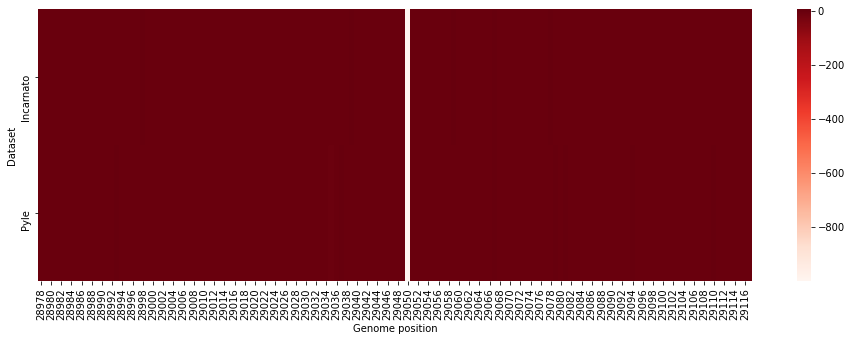

In [109]:
#mid8
#mid8_sequence=whole_genome[28978:29118]

start_col = 28978  #check if right position (accounted 0 index)
end_col = 29118
data1 = mid8_shape_incarnato
data2 = mid8_shape_pyle
data = np.array([data1, data2]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Incarnato", "Pyle"], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values


# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
plt.figure(figsize = (16,5))
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
plt.show()

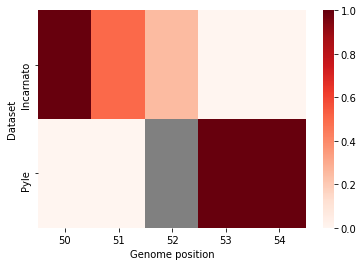

In [219]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 


# Assemble your data into a DataFrame
start_col = 50
end_col = 55
data1 = [1, 0.5, 0.25, 0, 0]
data2 = [0, 0, nan, 1, 1]
data = np.array([data1, data2]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Incarnato", "Pyle"], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values


# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
plt.show()

## Pyle dataset

In [3]:
shape_pyle = 'pyle_normalized_reactivity.csv'
f = open(shape_pyle)
pyle_shape_lines = f.readlines()
f.close()

In [4]:
def shape_float(all_shape_lines):
    all_shape_lines_no_nan = []
    for number in all_shape_lines:
        if number == 'nan\n':
            all_shape_lines_no_nan.append(-999)
        else:
            all_shape_lines_no_nan.append(number)
    
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    print(float_lines)

In [15]:
shape_float(pyle_shape_lines)

[-999.0, -999.0, -999.0, -999.0, -999.0, -999.0, -0.228458, 0.002349, -0.009397, -0.049627, 0.022905, -0.011452, -0.029952, 0.0185, -0.083983, 0.00969, -0.953182, -0.016444, -0.04023, -0.000294, 0.445171, -0.001175, 0.448401, -0.001468, 0.033182, -0.015857, -0.044341, 0.35414, 0.088388, -0.039349, 0.00323, 0.029071, 0.202617, -0.034357, 0.048158, 0.119808, 0.828969, -0.019381, 0.045809, 0.027897, 0.313323, 0.624296, 0.613138, 1.297338, 0.194689, -0.051682, -0.070182, 0.09338, 0.042285, 0.064603, 1.421551, 7.575538, 0.619892, 4.546263, -0.025254, 0.169729, -0.050508, -0.022905, 0.238736, 2.526256, 0.49098, 0.00323, 0.031127, 0.196744, 0.914714, 0.27691, 3.902586, 0.004698, -0.079285, 0.036706, -0.096904, 0.862151, -0.009984, 0.031127, -0.82339, 0.647788, -0.861858, -0.588765, -0.449282, -0.005286, -0.058436, 0.446345, 0.000294, -0.434306, -0.032008, -0.759668, 0.024079, -0.197038, 0.01204, 0.149467, 0.063722, 0.09984, 0.064896, 0.045809, 0.697415, 0.170022, -0.015857, 0.065484, 0.074293

In [220]:
def shape_heatmap(shape_lines):
    all_shape_lines_no_nan = []
    for number in shape_lines:
        if number == '-999\n':
            all_shape_lines_no_nan.append(nan)
        elif number =='nan\n':
             all_shape_lines_no_nan.append(nan)
        elif number < '0':
            all_shape_lines_no_nan.append(0)
        elif number > '2':
            all_shape_lines_no_nan.append(2)
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    print(float_lines)
    

In [221]:
shape_heatmap(pyle_shape_lines)

[nan, nan, nan, nan, nan, nan, 0.0, 0.002349, 0.0, 0.0, 0.022905, 0.0, 0.0, 0.0185, 0.0, 0.00969, 0.0, 0.0, 0.0, 0.0, 0.445171, 0.0, 0.448401, 0.0, 0.033182, 0.0, 0.0, 0.35414, 0.088388, 0.0, 0.00323, 0.029071, 0.202617, 0.0, 0.048158, 0.119808, 0.828969, 0.0, 0.045809, 0.027897, 0.313323, 0.624296, 0.613138, 1.297338, 0.194689, 0.0, 0.0, 0.09338, 0.042285, 0.064603, 1.421551, 2.0, 0.619892, 2.0, 0.0, 0.169729, 0.0, 0.0, 0.238736, 2.0, 0.49098, 0.00323, 0.031127, 0.196744, 0.914714, 0.27691, 2.0, 0.004698, 0.0, 0.036706, 0.0, 0.862151, 0.0, 0.031127, 0.0, 0.647788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.446345, 0.000294, 0.0, 0.0, 0.0, 0.024079, 0.0, 0.01204, 0.149467, 0.063722, 0.09984, 0.064896, 0.045809, 0.697415, 0.170022, 0.0, 0.065484, 0.074293, 0.12157, 0.0, 0.011452, 0.033476, 0.357957, 0.841009, 2.0, 0.023492, 1.632391, 0.0, 0.032008, 0.0, 0.011452, 0.059023, 0.0, 0.113642, 0.001762, 0.0, 0.059023, 0.041111, 0.017325, 0.036412, 0.020262, 0.049627, 0.0555, 0.041992, 0.0, 0.091325, 1.369282

In [222]:
print(all_shape_lines)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.136\n', '0.254\n', '0.033\n', '0.148\n', '0.012\n', '0.273\n', '0.141\n', '0.226\n', '0.224\n', '2.206\n', '0.631\n', '1.266\n', '1.714\n', '2.612\n', '0.356\n', '0.0\n', '0.25\n', '0.002\n', '0.065\n', '0.353\n', '0.262\n', '2.096\n', '2.613\n', '0.259\n', '0.929\n', '0.119\n', '0.0\n', '0.25\n', '0.007\n', '0.311\n', '0.0\n', '0.099\n', '0.183\n', '0.307\n', '1.254\n', '0.058\n', '0.57\n', '1.247\n', '0.252\n', '0.529\n', '2.332\n', '0.586\n', '0.249\n', '0.088\n', '0.165\n', '0.0\n', '0.387\n', '0.969\n', '3.621\n', '1.423\n', '1.717\n', '0.466\n', '2.525\n', '0.122\n', '0.017\n', '0.017\n', '0.0\n', '0.046\n', '0.0\n', '0.023\n', '0.0\n', '0.0\n', '0.087\n', '0.048\n', '0.172\n', '1.24\n', '0.013\n', '0.083\n', '0.009\n',

In [224]:
incarnato_shape_lines=all_shape_lines
print(incarnato_shape_lines)

['nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', 'nan\n', '0.136\n', '0.254\n', '0.033\n', '0.148\n', '0.012\n', '0.273\n', '0.141\n', '0.226\n', '0.224\n', '2.206\n', '0.631\n', '1.266\n', '1.714\n', '2.612\n', '0.356\n', '0.0\n', '0.25\n', '0.002\n', '0.065\n', '0.353\n', '0.262\n', '2.096\n', '2.613\n', '0.259\n', '0.929\n', '0.119\n', '0.0\n', '0.25\n', '0.007\n', '0.311\n', '0.0\n', '0.099\n', '0.183\n', '0.307\n', '1.254\n', '0.058\n', '0.57\n', '1.247\n', '0.252\n', '0.529\n', '2.332\n', '0.586\n', '0.249\n', '0.088\n', '0.165\n', '0.0\n', '0.387\n', '0.969\n', '3.621\n', '1.423\n', '1.717\n', '0.466\n', '2.525\n', '0.122\n', '0.017\n', '0.017\n', '0.0\n', '0.046\n', '0.0\n', '0.023\n', '0.0\n', '0.0\n', '0.087\n', '0.048\n', '0.172\n', '1.24\n', '0.013\n', '0.083\n', '0.009\n',

In [225]:
shape_heatmap(incarnato_shape_lines)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.136, 0.254, 0.033, 0.148, 0.012, 0.273, 0.141, 0.226, 0.224, 2.0, 0.631, 1.266, 1.714, 2.0, 0.356, 0.0, 0.25, 0.002, 0.065, 0.353, 0.262, 2.0, 2.0, 0.259, 0.929, 0.119, 0.0, 0.25, 0.007, 0.311, 0.0, 0.099, 0.183, 0.307, 1.254, 0.058, 0.57, 1.247, 0.252, 0.529, 2.0, 0.586, 0.249, 0.088, 0.165, 0.0, 0.387, 0.969, 2.0, 1.423, 1.717, 0.466, 2.0, 0.122, 0.017, 0.017, 0.0, 0.046, 0.0, 0.023, 0.0, 0.0, 0.087, 0.048, 0.172, 1.24, 0.013, 0.083, 0.009, 0.031, 0.008, 0.0, 0.0, 0.072, 1.367, 2.0, 0.581, 0.378, 0.062, 0.0, 0.066, 0.016, 0.0, 0.018, 0.0, 0.005, 0.0, 0.008, 0.018, 0.025, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.188, 0.593, 0.555, 0.368, 0.838, 2.0, 0.599, 2.0, 1.307, 1.701, 0.991, 0.998, 0.585, 0.562, 2.0, 1.618, 2.0, 2.0, 0.37, 0.506, 0.737, 1.397, 0.026, 0.0, 0.0, 0.024, 0.0, 0.028, 0.011, 0.015, 0.0, 0.0, 0.092, 0.092, 0.023,

In [155]:
a_list=[0,2,3,4,'np.nan']

In [156]:
print(a_list)

[0, 2, 3, 4, 'np.nan']


In [ ]:
mask = 

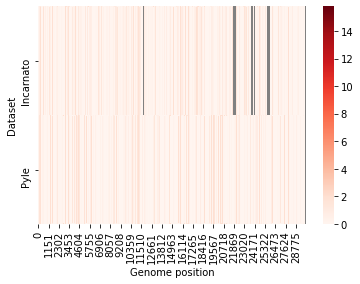

In [227]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 


# Assemble your data into a DataFrame
start_col = 0
end_col = 29903
data1 = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.136, 0.254, 0.033, 0.148, 0.012, 0.273, 0.141, 0.226, 0.224, 2.0, 0.631, 1.266, 1.714, 2.0, 0.356, 0.0, 0.25, 0.002, 0.065, 0.353, 0.262, 2.0, 2.0, 0.259, 0.929, 0.119, 0.0, 0.25, 0.007, 0.311, 0.0, 0.099, 0.183, 0.307, 1.254, 0.058, 0.57, 1.247, 0.252, 0.529, 2.0, 0.586, 0.249, 0.088, 0.165, 0.0, 0.387, 0.969, 2.0, 1.423, 1.717, 0.466, 2.0, 0.122, 0.017, 0.017, 0.0, 0.046, 0.0, 0.023, 0.0, 0.0, 0.087, 0.048, 0.172, 1.24, 0.013, 0.083, 0.009, 0.031, 0.008, 0.0, 0.0, 0.072, 1.367, 2.0, 0.581, 0.378, 0.062, 0.0, 0.066, 0.016, 0.0, 0.018, 0.0, 0.005, 0.0, 0.008, 0.018, 0.025, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.188, 0.593, 0.555, 0.368, 0.838, 2.0, 0.599, 2.0, 1.307, 1.701, 0.991, 0.998, 0.585, 0.562, 2.0, 1.618, 2.0, 2.0, 0.37, 0.506, 0.737, 1.397, 0.026, 0.0, 0.0, 0.024, 0.0, 0.028, 0.011, 0.015, 0.0, 0.0, 0.092, 0.092, 0.023, 0.32, 0.169, 0.116, 0.211, 0.555, 0.573, 0.538, 0.012, 0.102, 0.165, 2.0, 0.002, 2.0, 0.023, 0.025, 0.0, 0.038, 0.181, 0.094, 0.0, 0.107, 0.379, 0.161, 1.266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.233, 0.192, 0.037, 0.03, 0.0, 0.639, 0.332, 0.743, 2.0, 0.897, 1.792, 0.733, 0.29, 0.023, 0.016, 1.395, 2.0, 0.331, 0.199, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.014, 0.0, 0.039, 0.519, 0.015, 0.0, 0.032, 0.0, 0.008, 0.046, 0.0, 0.0, 0.03, 0.066, 1.538, 2.0, 0.09, 0.696, 0.631, 0.755, 0.93, 2.0, 0.908, 0.791, 0.0, 0.015, 0.0, 0.0, 0.0, 0.002, 0.0, 0.002, 0.0, 0.02, 0.0, 0.001, 0.077, 0.385, 0.004, 0.385, 0.0, 0.0, 0.022, 0.014, 0.026, 0.0, 0.0, 0.043, 0.0, 0.0, 0.024, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.035, 0.0, 0.534, 0.078, 0.0, 0.088, 0.284, 0.315, 1.623, 0.353, 0.86, 2.0, 0.014, 0.012, 0.024, 0.037, 0.0, 0.055, 0.622, 0.083, 1.04, 0.252, 0.145, 2.0, 0.036, 0.0, 0.04, 0.149, 0.0, 0.0, 0.096, 0.195, 0.498, 1.059, 2.0, 1.154, 2.0, 1.009, 0.68, 0.04, 0.06, 1.035, 0.786, 0.002, 0.044, 0.283, 0.885, 0.084, 0.707, 0.236, 2.0, 0.602, 0.025, 0.056, 0.0, 0.203, 0.515, 0.222, 0.234, 0.051, 0.228, 0.0, 0.039, 0.0, 0.0, 0.017, 0.0, 0.142, 0.368, 0.545, 0.354, 0.25, 0.065, 0.007, 0.0, 0.028, 0.0, 0.144, 0.024, 0.0, 0.0, 0.079, 0.0, 0.0, 0.023, 0.0, 0.045, 0.033, 0.0, 0.062, 0.093, 0.391, 1.497, 0.27, 1.574, 1.148, 0.033, 0.0, 0.087, 0.032, 0.35, 0.195, 0.021, 0.25, 1.002, 1.387, 0.246, 0.022, 0.034, 0.0, 0.026, 0.0, 0.0, 0.034, 0.004, 0.071, 0.0, 0.035, 0.011, 0.106, 0.707, 0.075, 1.482, 1.225, 0.549, 1.568, 2.0, 0.301, 0.226, 2.0, 0.0, 0.007, 0.042, 0.0, 0.0, 0.024, 0.081, 0.013, 0.357, 0.189, 0.215, 2.0, 0.981, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.217, 2.0, 2.0, 0.044, 0.028, 0.017, 0.113, 0.919, 0.291, 0.457, 0.143, 0.132, 2.0, 0.0, 0.008, 0.6, 1.625, 0.579, 0.252, 0.104, 2.0, 0.0, 0.0, 0.045, 0.321, 0.041, 0.0, 0.015, 0.006, 0.0, 0.018, 0.0, 0.044, 0.0, 0.001, 0.048, 0.0, 0.0, 0.115, 0.076, 0.225, 0.615, 0.17, 0.0, 0.006, 0.0, 0.343, 0.591, 0.0, 0.021, 0.03, 0.0, 0.096, 0.3, 1.411, 0.111, 0.177, 0.189, 0.232, 0.12, 0.0, 0.005, 0.175, 0.082, 0.0, 0.002, 0.033, 0.199, 0.122, 0.618, 0.494, 0.022, 0.047, 0.0, 0.063, 0.115, 0.03, 0.157, 1.397, 0.219, 1.096, 0.227, 0.0, 0.572, 0.07, 0.091, 0.342, 0.859, 1.39, 1.932, 2.0, 1.59, 1.559, 0.482, 2.0, 0.436, 0.261, 0.019, 0.564, 0.467, 0.567, 0.651, 0.154, 0.311, 0.59, 2.0, 0.0, 0.066, 0.08, 0.0, 0.683, 1.017, 0.036, 0.073, 0.164, 0.188, 0.305, 0.744, 0.055, 0.0, 0.023, 0.033, 0.135, 0.17, 0.128, 0.873, 0.024, 0.092, 0.258, 0.358, 0.268, 1.108, 1.196, 0.933, 0.935, 1.312, 2.0, 0.0, 0.174, 0.0, 0.0, 0.02, 0.0, 0.011, 0.0, 0.03, 0.006, 0.015, 0.016, 0.128, 0.213, 0.0, 0.0, 0.068, 0.0, 0.137, 0.171, 0.871, 0.186, 0.303, 0.325, 0.754, 0.044, 0.082, 0.091, 2.0, 0.736, 2.0, 0.673, 0.462, 2.0, 0.759, 0.0, 0.0, 0.046, 0.0, 0.06, 0.022, 0.228, 0.416, 0.114, 0.0, 0.014, 0.025, 0.0, 0.014, 0.0, 0.0, 0.001, 0.017, 0.007, 0.029, 0.0, 0.053, 0.14, 0.518, 0.514, 0.885, 0.611, 0.175, 0.015, 0.102, 0.054, 0.225, 0.131, 0.141, 1.635, 0.984, 0.252, 0.47, 0.764, 0.01, 0.07, 0.0, 0.171, 0.23, 0.728, 0.123, 0.715, 1.464, 0.94, 1.723, 1.631, 1.77, 1.97, 1.384, 0.364, 0.163, 0.233, 0.138, 0.591, 1.218, 0.732, 14.467, 0.521, 0.489, 2.0, 0.01, 0.039, 0.242, 0.368, 0.991, 0.0, 0.041, 0.357, 2.0, 0.02, 0.0, 0.0, 0.014, 0.0, 0.015, 0.051, 0.0, 0.426, 0.171, 1.317, 2.0, 0.345, 0.036, 0.546, 0.0, 0.0, 0.12, 1.955, 0.556, 0.239, 2.0, 0.0, 0.036, 0.035, 0.363, 0.229, 1.189, 0.0, 0.0, 0.001, 0.0, 0.058, 0.007, 0.0, 0.044, 0.0, 0.02, 0.011, 0.034, 0.0, 0.0, 0.015, 0.025, 0.034, 0.037, 0.004, 0.247, 0.136, 0.015, 0.029, 0.588, 0.494, 1.305, 0.998, 0.34, 0.041, 0.423, 0.323, 0.862, 0.086, 0.083, 0.015, 0.836, 0.111, 0.051, 0.242, 0.15, 0.296, 0.8, 0.312, 0.598, 0.571, 0.46, 0.0, 0.342, 0.15, 0.074, 1.678, 0.358, 1.679, 2.0, 0.35, 0.525, 1.301, 0.025, 0.096, 0.015, 0.009, 0.0, 0.013, 0.027, 0.0, 0.039, 0.0, 0.0, 0.117, 0.0, 0.037, 0.255, 0.937, 0.0, 0.0, 0.023, 0.0, 0.049, 0.0, 0.109, 0.095, 0.006, 0.022, 0.023, 0.175, 0.206, 0.275, 0.342, 1.517, 0.383, 0.0, 0.033, 0.017, 0.338, 1.105, 0.661, 0.043, 0.036, 0.118, 0.0, 0.103, 1.854, 0.549, 1.31, 0.0, 0.0, 0.023, 0.087, 0.589, 2.0, 0.014, 0.974, 0.015, 0.0, 0.039, 0.0, 0.0, 0.0, 0.015, 0.02, 0.0, 0.02, 0.013, 0.0, 0.07, 0.243, 0.629, 0.285, 0.268, 0.045, 0.138, 0.174, 1.06, 0.603, 0.103, 0.515, 0.248, 0.487, 0.0, 0.117, 0.021, 0.088, 0.832, 1.504, 1.617, 1.346, 0.677, 0.15, 0.0, 0.014, 0.25, 0.337, 0.044, 0.023, 0.055, 0.476, 0.097, 0.547, 0.28, 0.243, 0.034, 0.0, 0.791, 0.0, 0.005, 0.07, 0.046, 0.715, 0.299, 0.081, 0.468, 0.054, 0.391, 0.017, 0.119, 1.047, 1.867, 0.202, 0.274, 0.111, 0.0, 0.112, 0.609, 1.156, 0.673, 0.791, 0.213, 0.264, 0.373, 0.072, 0.682, 1.152, 0.268, 0.095, 1.303, 0.0, 0.054, 0.397, 0.263, 0.409, 0.279, 0.136, 0.02, 0.024, 0.163, 0.383, 0.567, 0.195, 0.724, 0.033, 0.0, 0.077, 0.146, 0.08, 0.613, 0.563, 0.333, 0.307, 1.326, 0.43, 0.17, 0.0, 0.0, 0.014, 0.091, 0.21, 0.41, 0.445, 1.4, 0.161, 0.287, 0.167, 0.437, 0.031, 0.101, 0.451, 0.268, 0.14, 0.256, 0.0, 0.292, 0.442, 0.0, 0.0, 0.0, 0.053, 0.0, 0.003, 2.0, 0.067, 1.06, 0.042, 0.017, 0.003, 0.005, 0.046, 0.137, 0.011, 0.017, 0.0, 0.007, 0.0, 0.037, 0.105, 0.468, 2.0, 0.324, 0.0, 0.05, 0.0, 0.054, 0.086, 0.541, 1.452, 0.439, 0.441, 2.0, 0.623, 0.053, 0.0, 0.006, 0.016, 0.036, 0.0, 0.0, 0.176, 0.436, 0.02, 0.021, 0.031, 0.0, 0.017, 0.45, 0.572, 0.145, 0.0, 0.022, 0.039, 0.252, 0.118, 0.285, 0.72, 1.052, 0.084, 0.428, 0.0, 0.044, 0.0, 0.026, 0.084, 0.811, 0.701, 1.888, 0.562, 0.599, 0.482, 0.09, 0.0, 0.003, 0.026, 0.0, 0.0, 0.0, 0.039, 0.04, nan, 0.015, 0.059, 0.013, 0.072, 0.199, 0.048, 0.031, 0.269, 0.735, 1.885, 0.3, 0.328, 2.0, 0.401, 0.172, 0.0, 0.0, 0.237, 0.131, 0.581, 2.0, 1.824, 0.261, 1.471, 0.903, 0.057, 0.015, 0.053, 0.0, 0.023, 0.009, 0.109, 0.022, 0.009, 0.208, 0.345, 0.266, 0.627, 1.623, 0.586, 0.0, 0.0, 0.0, 0.196, 0.325, 1.643, 0.296, 0.2, 0.129, 0.234, 0.606, 0.048, 0.155, 0.767, 0.414, 0.438, 0.035, 0.499, 0.946, 0.244, 1.922, 0.448, 0.691, 1.989, 0.158, 0.041, 0.138, 0.387, 1.354, 0.071, 0.049, 0.513, 0.362, 0.123, 0.086, 0.138, 0.397, 0.567, 0.582, 0.895, 0.661, 0.06, 0.036, 0.045, 0.228, 0.476, 0.071, 0.313, 1.053, 0.33, 0.221, 0.007, 0.022, 0.101, 0.111, 0.136, 2.0, 1.628, 0.924, 0.302, 2.0, 0.004, 0.09, 0.475, 0.039, 0.071, 0.075, 0.293, 2.0, 0.108, 2.0, 0.123, 0.039, 0.351, 0.401, 0.01, 0.057, 0.027, 0.0, 0.388, 0.727, 0.437, 0.0, 0.021, 0.005, 0.078, 0.121, 0.158, 0.169, 0.0, 0.0, 0.086, 0.06, 0.101, 0.104, 0.127, 0.294, 0.466, 0.85, 0.365, 0.665, 2.0, 0.351, 1.204, 1.094, 0.709, 0.002, 0.0, 0.183, 0.102, 0.0, 0.008, 0.013, 0.031, 0.0, 0.0, 0.038, 0.0, 0.04, 0.024, 0.061, 0.118, 0.611, 1.132, 0.789, 0.349, 0.108, 1.343, 0.505, 0.553, 0.3, 0.838, 0.307, 0.0, 0.016, 0.032, 0.104, 0.021, 0.058, 0.025, 0.057, 0.34, 0.498, 1.007, 0.251, 0.579, 0.0, 0.067, 0.562, 1.335, 0.966, 0.463, 0.923, 1.211, 0.192, 0.074, 0.013, 0.019, 0.327, 0.04, 0.137, 0.0, 0.021, 0.09, 0.394, 1.607, 0.188, 0.203, 1.962, 0.279, 0.079, 0.237, 0.93, 1.183, 1.855, 2.0, 1.595, 2.0, 1.628, 0.433, 0.197, 0.12, 0.039, 0.221, 0.006, 0.013, 0.022, 0.021, 0.5, 0.016, 0.0, 0.0, 0.083, 0.234, 0.0, 0.311, 0.259, 0.0, 0.0, 0.0, 0.128, 0.163, 0.631, 0.014, 0.04, 0.027, 0.495, 1.229, 0.258, 0.918, 0.032, 0.011, 0.086, 0.0, 0.023, 0.061, 0.703, 0.608, 0.202, 0.088, 0.048, 0.39, 0.091, 0.125, 0.243, 0.163, 0.166, 0.075, 0.71, 1.839, 2.0, 0.0, 0.0, 0.169, 0.055, 0.316, 0.047, 0.0, 0.08, 0.236, 0.677, 0.837, 0.218, 0.303, 0.718, 0.5, 0.375, 0.241, 0.968, 0.161, 0.101, 1.302, 1.413, 0.197, 1.129, 0.438, 0.0, 0.084, 0.0, 0.003, 0.088, 0.015, 0.007, 0.224, 0.194, 0.246, 1.869, 0.905, 0.123, 0.171, 0.215, 0.0, 0.122, 0.239, 0.255, 0.039, 0.315, 0.932, 1.763, 0.045, 0.0, 0.014, 0.358, 0.154, 0.29, 0.097, 2.0, 0.547, 0.0, 0.218, 0.036, 0.017, 0.493, 0.106, 0.0, 0.068, 0.52, 0.206, 0.219, 0.033, 2.0, 0.197, 0.249, 0.349, 0.638, 0.113, 0.226, 0.574, 0.628, 0.052, 0.059, 0.291, 0.252, 0.254, 1.251, 0.196, 0.0, 0.02, 0.141, 0.138, 0.35, 0.9, 0.441, 0.154, 0.227, 0.03, 0.218, 0.045, 0.389, 0.354, 0.29, 0.21, 0.227, 0.0, 0.0, 0.096, 0.036, 0.229, 0.161, 0.024, 0.04, 0.0, 0.011, 0.069, 0.056, 0.146, 0.0, 0.0, 0.065, 0.048, 0.02, 0.0, 0.004, 0.015, 0.0, 0.079, 0.111, 0.224, 0.573, 0.0, 0.065, 0.255, 0.545, 0.424, 0.473, 0.471, 0.455, 0.093, 0.982, 0.209, 0.58, 0.489, 0.0, 0.06, 0.116, 0.564, 0.858, 1.178, 0.06, 0.067, 0.043, 0.878, 0.035, 0.048, 0.359, 0.106, 0.271, 0.257, 0.738, 0.301, 0.395, 1.843, 1.075, 0.192, 0.674, 0.0, 0.0, 0.053, 0.359, 0.0, 0.003, 0.088, 0.102, 0.048, 0.158, 0.672, 0.161, 0.701, 0.758, 1.113, 0.539, 0.011, 0.035, 0.334, 0.69, 0.162, 1.656, 0.804, 0.224, 0.596, 0.0, 0.0, 0.248, 0.047, 0.186, 0.04, 0.039, 0.03, 0.0, 0.545, 0.063, 0.068, 0.0, 0.007, 0.054, 0.043, 0.048, 0.058, 0.061, 0.029, 0.064, 0.02, 0.002, 0.53, 2.0, 0.04, 0.098, 0.409, 0.415, 0.463, 0.582, 0.729, 0.514, 0.613, 0.677, 0.21, 0.273, 0.0, 0.095, 1.549, 0.0, 0.064, 2.0, 2.0, 1.928, 2.0, 0.145, 0.0, 0.0, 0.511, 1.358, 0.098, 0.036, 0.061, 0.051, 0.0, 0.087, 0.0, 0.072, 0.242, 0.366, 0.0, 0.024, 0.0, 0.047, 0.01, 0.015, 0.038, 0.011, 0.056, 0.027, 0.031, 0.0, 0.0, 0.385, 0.726, 0.265, 0.343, 0.022, 0.062, 0.027, 0.042, 0.061, 0.131, 0.662, 0.076, 0.172, 0.0, 0.071, 0.285, 0.034, 0.206, 0.217, 0.138, 0.041, 0.131, 0.057, 0.0, 0.571, 0.0, 0.409, 0.871, 0.084, 0.0, 0.045, 0.239, 0.09, 0.155, 0.251, 0.162, 0.413, 0.142, 0.0, 0.077, 0.187, 1.734, 2.0, 2.0, 1.648, 0.876, 0.101, 0.152, 0.068, 0.135, 0.814, 0.237, 0.522, 0.111, 0.155, 0.038, 0.031, 0.036, 0.002, 0.038, 0.046, 0.509, 0.824, 1.365, 0.159, 0.58, 0.3, 1.462, 0.18, 0.104, 0.048, 0.289, 1.609, 2.0, 0.117, 2.0, 0.392, 0.358, 0.327, 0.0, 0.019, 0.02, 0.069, 0.144, 0.019, 0.222, 0.232, 0.089, 0.224, 2.0, 1.713, 1.946, 2.0, 0.849, 0.221, 0.077, 0.096, 0.0, 0.063, 0.084, 0.0, 0.064, 0.0, 0.297, 0.442, 1.324, 0.433, 0.682, 1.146, 0.184, 0.58, 1.872, 0.405, 0.785, 1.16, 0.804, 0.186, 1.098, 0.293, 0.068, 0.113, 0.923, 0.08, 0.327, 0.105, 0.029, 0.049, 0.144, 0.229, 0.586, 2.0, 0.526, 2.0, 0.04, 0.463, 0.0, 0.0, 0.016, 0.028, 0.027, 0.364, 0.144, 0.19, 0.022, 0.057, 0.14, 0.362, 0.061, 0.553, 0.243, 0.318, 0.098, 0.013, 0.024, 0.086, 0.022, 0.115, 0.312, 0.291, 0.806, 2.0, 1.379, 0.287, 0.55, 0.105, 2.0, 0.0, 0.029, 0.0, 0.659, 0.022, 0.062, 0.138, 0.282, 0.205, 0.474, 0.519, 2.0, 0.73, 0.405, 1.158, 0.192, 0.0, 0.076, 0.099, 0.575, 0.081, 0.0, 0.211, 0.101, 0.601, 1.168, 2.0, 1.977, 0.922, 0.592, 0.054, 0.166, 0.176, 0.17, 0.403, 0.122, 0.102, 0.081, 0.268, 0.256, 0.112, 0.836, 1.96, 1.202, 0.35, 0.7, 0.096, 0.234, 0.235, 0.371, 1.692, 0.574, 0.0, 0.058, 1.036, 1.035, 0.857, 1.119, 1.285, 0.173, 0.025, 0.439, 0.039, 0.113, 0.164, 2.0, 1.93, 1.482, 1.341, 0.0, 0.03, 0.161, 0.614, 0.244, 0.094, 0.667, 0.101, 0.892, 0.0, 0.341, 0.083, 0.262, 0.036, 1.036, 0.002, 0.319, nan, 0.05, 0.016, 0.033, 0.014, 0.025, 1.997, 0.0, 0.0, 0.058, 0.0, 0.0, 0.098, 0.08, 0.0, 0.098, 0.102, 0.167, 0.293, 0.308, 0.636, 0.192, 0.0, 0.117, 0.173, 0.06, 0.059, 0.071, 0.191, 0.592, 2.0, 0.174, 1.721, 1.295, 0.317, 0.131, 0.036, 0.157, 0.137, 0.31, 0.167, 0.288, 0.0, 0.075, 0.292, 0.233, 0.03, 0.048, 0.255, 0.128, 0.373, 1.433, 1.204, 0.101, 0.029, 0.0, 0.245, 2.0, 0.34, 0.389, 2.0, 0.0, 0.065, 0.152, 0.124, 0.29, 0.14, 0.0, 0.057, 0.0, 0.055, 0.053, 0.109, 0.0, 0.011, 0.082, 0.015, 0.0, 0.02, 0.0, 0.018, 0.045, 0.02, 0.055, 0.493, 0.108, 0.0, 0.185, 0.096, 0.1, 0.231, 0.419, 0.069, 0.071, 0.209, 1.367, 0.6, 0.47, 0.165, 0.231, 0.066, 0.137, 0.051, 0.193, 0.125, 1.281, 0.077, 0.287, 0.113, 0.289, 0.363, 0.396, 1.479, 0.232, 0.523, 0.533, 0.144, 0.404, 1.08, 0.52, 0.628, 0.286, 2.0, 2.0, 0.594, 0.634, 0.31, 0.256, 0.081, 0.084, 0.734, 1.257, 1.033, 1.756, 0.179, 1.066, 0.121, 0.955, 1.445, 0.634, 0.906, 1.331, 0.5, 0.588, 0.736, 0.0, 0.016, 0.032, 0.004, 0.086, 0.142, 0.115, 0.158, 0.875, 0.38, 0.197, 0.377, 0.891, 1.186, 2.0, 1.283, 0.394, 1.095, 0.0, 0.045, 0.048, 0.0, 0.0, 0.053, 0.091, 0.005, 0.005, 0.076, 0.045, 0.079, 0.018, 0.041, 0.0, 0.038, 0.939, 0.591, 0.404, 0.03, 0.096, 0.131, 0.204, 0.45, 0.481, 2.0, 2.0, 0.34, 0.244, 0.98, 0.134, 0.015, 0.067, 0.0, 0.009, 0.002, 0.0, 0.003, 0.012, 0.06, 0.06, 0.0, 0.039, 0.0, 0.0, 0.02, 0.023, 1.253, 1.25, 0.012, 2.0, 0.0, 0.042, 0.023, 0.107, 0.68, 0.169, 0.231, 1.696, 0.285, 0.22, 0.244, 0.547, 1.068, 0.209, 0.564, 2.0, 1.947, 0.228, 0.19, 0.487, 0.258, 0.28, 0.497, 0.769, 0.142, 0.025, 0.191, 0.111, 0.186, 0.066, 0.34, 0.127, 0.0, 0.0, 0.0, 0.222, 0.107, 0.61, 0.397, 0.599, 0.336, 1.046, 0.165, 0.022, 0.07, 0.0, 0.0, 0.073, 0.0, 0.0, 0.714, 0.022, 0.207, 0.272, 0.0, 0.0, 0.058, 0.046, 0.27, 0.369, 0.145, 0.536, 0.032, 0.157, 0.122, 1.138, 0.436, 0.208, 0.0, 0.111, 0.098, 0.008, 0.394, 0.735, 0.724, 0.036, 0.088, 0.26, 0.641, 0.096, 0.396, 0.23, 0.916, 0.693, 2.0, 1.106, 1.449, 0.781, 1.195, 1.041, 0.0, 0.0, 0.024, 0.024, 0.039, 0.045, 0.624, 0.387, 0.505, 1.219, 1.602, 0.644, 1.761, 0.155, 0.099, 0.039, 0.052, 1.853, 0.017, 0.019, 0.054, 0.162, 0.296, 2.0, 0.008, 0.008, 0.075, 0.204, 0.209, 0.043, 0.039, 0.297, 0.332, 0.51, 0.755, 0.359, 0.681, 0.839, 1.663, 0.386, 0.369, 0.704, 1.312, 1.087, 1.57, 1.374, 1.444, 0.36, 2.0, 0.872, 0.368, 0.09, 0.206, 1.678, 0.04, 0.023, 0.0, 0.0, 0.017, 0.142, 0.0, 0.0, 0.52, 0.082, 0.303, 0.282, 0.0, 0.007, 0.142, 0.013, 0.057, 0.175, 0.147, 0.614, 0.463, 0.586, 0.042, 0.024, 0.0, 0.067, 0.183, 0.0, 0.0, 0.0, 0.019, 0.0, 0.0, 0.15, 0.043, 0.145, 0.597, 0.143, 0.102, 1.145, 0.51, 1.604, 0.332, 0.507, 1.714, 0.786, 0.81, 0.903, 2.0, 0.075, 0.019, 0.0, 0.04, 0.013, 0.108, 0.132, 0.134, 0.124, 0.141, 0.152, 1.393, 0.094, 0.845, 0.388, 0.993, 0.203, 2.0, 0.603, 1.074, 2.0, 0.827, 0.283, 0.012, 0.064, 0.181, 0.206, 1.097, 0.305, 0.0, 0.0, 0.028, 0.124, 0.065, 0.366, 0.884, 0.788, 0.31, 0.16, 0.085, 0.0, 0.02, 0.0, 0.002, 0.06, 0.025, 0.043, 0.129, 0.502, 0.359, 0.324, 1.47, 0.555, 0.888, 0.341, 0.294, 1.158, 0.51, 0.518, 0.281, 0.906, 0.283, 0.0, 0.143, 0.0, 0.009, 0.0, 0.09, 0.0, 0.015, 0.042, 0.011, 0.026, 0.0, 0.127, 0.005, 0.064, 0.091, 0.308, 0.043, 0.046, 0.283, 0.217, 0.111, 0.183, 0.033, 0.172, 0.952, 0.841, 1.433, 1.861, 0.121, 0.248, 1.929, 0.773, 0.333, 0.338, 0.232, 0.858, 0.054, 0.017, 0.0, 0.13, 0.0, 0.0, 0.104, 0.034, 0.124, 0.094, 0.551, 0.077, 0.0, 0.046, 0.47, 1.846, 0.081, 0.498, 2.0, 0.0, 0.0, 0.034, 0.152, 0.118, 0.118, 0.149, 0.583, 1.292, 2.0, 1.165, 1.605, 1.722, 0.0, 0.0, 0.023, 0.0, 0.0, 0.042, 0.0, 0.063, 0.471, 0.279, 0.065, 0.608, 0.059, 0.898, 2.0, 0.023, 0.003, 0.043, 0.0, 0.003, 0.0, 0.015, 0.025, 0.0, 0.03, 0.101, 0.055, 0.052, 0.182, 0.272, 0.503, 0.315, 1.137, 0.909, 0.203, 0.118, 0.761, 0.288, 1.142, 0.088, 0.104, 0.674, 0.393, 0.098, 0.074, 0.074, 0.386, 0.054, 0.053, 0.337, 0.219, 1.111, 0.901, 0.461, 0.204, 1.022, 0.126, 0.0, 0.088, 0.467, 0.182, 0.503, 0.13, 0.176, 0.203, 0.017, 0.122, 1.565, 0.502, 1.326, 1.02, 0.829, 0.415, 0.0, 0.055, 0.141, 0.778, 0.944, 0.143, 0.256, 1.147, 0.051, 0.09, 0.129, 0.194, 0.097, 0.073, 0.412, 1.407, 2.0, 2.0, 0.265, 0.69, 0.453, 0.233, 0.179, 0.0, 0.076, 0.0, 0.059, 0.411, 0.552, 0.027, 0.495, 0.264, 0.873, 0.545, 0.484, 0.275, 0.0, 0.266, 0.029, 0.3, 0.319, 0.427, 0.31, 2.0, 0.714, 0.0, 0.013, 0.02, 0.221, 0.105, 0.492, 0.033, 1.244, 0.574, 0.101, 0.191, 0.243, 1.754, 1.934, 1.759, 1.317, 1.147, 0.303, 0.068, 0.017, 0.099, 0.332, 0.515, 0.165, 2.0, 0.692, 0.0, 0.0, 0.584, 0.994, 0.084, 0.12, 0.014, 0.0, 0.022, 0.034, 0.041, 0.086, 0.172, 0.132, 0.397, 2.0, 0.045, 0.595, 0.0, 0.016, 0.037, 0.0, 0.016, 0.0, 0.086, 0.049, 0.254, 0.509, 0.515, 0.567, 0.0, 0.052, 0.182, 0.079, 0.102, 0.733, 0.438, 0.257, 0.489, 0.497, 0.387, 0.537, 0.734, 1.04, 1.788, 0.045, 0.033, 0.013, 0.559, 0.006, 0.001, 0.0, 0.067, 0.431, 0.593, 2.0, 0.288, 0.204, 2.0, 1.089, 0.251, 0.52, 0.983, 0.219, 0.798, 1.473, 0.332, 0.88, 1.193, 0.835, 1.209, 0.868, 0.498, 0.222, 0.658, 0.313, 0.084, 0.598, 0.557, 0.072, 0.036, 0.41, 0.152, 0.069, 0.351, 0.123, 0.066, 0.0, 0.063, 0.153, 0.195, 2.0, 1.231, 0.658, 0.349, 0.198, 0.0, 0.0, 0.077, 0.02, 0.015, 0.207, 0.011, 0.021, 0.0, 0.0, 0.023, 0.116, 0.0, 0.0, 0.164, 0.266, 0.026, 0.014, 0.036, 0.02, 0.045, 0.059, 0.031, 0.012, 0.241, 0.0, 0.026, 0.646, 0.179, 0.344, 0.558, 1.818, 0.614, 0.0, 0.0, 0.073, 0.019, 0.429, 0.539, 1.843, 2.0, 2.0, 0.625, 0.405, 0.013, 0.051, 0.056, 0.291, 0.211, 0.275, 0.113, 1.061, 0.193, 0.332, 0.122, 0.068, 0.796, 0.0, 0.027, 0.023, 0.004, 0.045, 0.174, 2.0, 0.356, 2.0, 0.201, 0.722, 0.0, 0.081, 0.303, 0.437, 0.475, 0.254, 0.884, 2.0, 0.0, 0.018, 0.056, 0.046, 0.113, 0.0, 0.24, 0.775, 0.072, 0.073, 0.612, 0.855, 1.288, 1.463, 1.474, 2.0, 0.369, 0.037, 0.189, 0.0, 0.027, 0.181, 0.255, 1.197, 0.746, 0.034, 0.094, 0.189, 0.043, 0.046, 0.207, 0.071, 0.097, 0.0, 0.0, 0.004, 0.0, 0.01, 0.016, 0.01, 0.243, 0.019, 0.241, 0.226, 0.093, 0.054, 0.112, 0.0, 0.0, 0.025, 0.0, 0.0, 0.095, 0.0, 0.023, 0.134, 0.063, 0.041, 0.201, 0.61, 0.185, 0.451, 0.399, 0.544, 0.221, 0.385, 0.541, 1.666, 1.705, 0.26, 0.612, 0.141, 0.073, 0.306, 0.0, 0.0, 0.157, 0.0, 0.378, 0.137, 0.457, 0.369, 0.013, 0.022, 0.146, 0.145, 0.114, 0.072, 0.458, 1.347, 0.482, 2.0, 1.694, 2.0, 0.261, 0.058, 0.113, 0.443, 0.233, 0.133, 0.287, 0.139, 0.103, 0.123, 0.418, 2.0, 0.089, 0.151, 0.312, 0.039, 0.118, 0.082, 0.103, 0.0, 0.349, 0.723, 0.652, 1.063, 0.914, 0.377, 2.0, 0.199, 0.361, 0.502, 0.129, 0.104, 0.027, 0.471, 0.042, 0.22, 0.207, 0.162, 0.357, 0.259, 0.041, 0.428, 0.596, 0.645, 0.641, 0.517, 1.651, 0.257, 0.305, 1.056, 0.074, 0.222, 0.068, 0.896, 0.623, 1.445, 0.335, 0.587, 0.0, 0.028, 0.203, 0.245, 0.224, 0.804, 0.809, 0.64, 0.811, 0.361, 0.361, 0.164, 1.134, 2.0, 0.078, 0.182, 0.192, 0.172, 0.046, 0.0, 0.127, 0.0, 0.0, 0.014, 0.165, 0.156, 0.007, 0.174, 0.0, 0.0, 0.0, 0.017, 0.157, 0.0, 0.025, 0.0, 0.001, 0.02, 0.1, 0.004, 0.326, 0.458, 0.368, 0.248, 1.081, 2.0, 2.0, 1.365, 2.0, 0.686, 0.206, 0.938, 2.0, 0.575, 0.0, 0.013, 0.0, 0.0, 0.016, 0.007, 0.0, 0.0, 0.038, 0.088, 0.323, 0.083, 0.966, 0.389, 1.067, 2.0, 1.257, 0.463, 0.0, 0.001, 0.004, 0.0, 0.008, 0.09, 0.0, 0.032, 0.025, 0.331, 0.004, 0.043, 0.109, 1.509, 0.322, 0.257, 0.042, 0.094, 1.052, 0.142, 0.146, 0.036, 0.227, 0.0, 0.039, 0.121, 0.404, 0.084, 0.1, 0.461, 0.113, 0.045, 0.286, 0.102, 0.264, 0.101, 0.478, 0.379, 0.746, 0.324, 0.341, 1.089, 0.429, 0.191, 0.159, 0.398, 0.12, 0.183, 0.444, 0.099, 0.229, 0.152, 0.085, 0.0, 0.0, 0.083, 0.09, 0.73, 0.474, 0.603, 0.483, 0.467, 0.337, 0.727, 0.88, 0.936, 0.634, 0.584, 0.469, 0.109, 0.17, 0.215, 0.405, 0.201, 1.177, 0.514, 0.024, 0.265, 0.299, 0.355, 0.0, 0.02, 0.165, 0.435, 0.427, 1.365, 0.284, 0.364, 0.155, 0.115, 0.061, 0.123, 0.084, 0.159, 0.161, 0.604, 0.586, 0.201, 0.355, 0.878, 1.466, 0.06, 0.0, 0.218, 0.027, 0.131, 0.692, 0.352, 0.0, 0.0, 0.409, 0.0, 2.0, 0.289, 0.169, 0.2, 1.353, 0.628, 0.831, 0.927, 0.291, 0.264, 0.138, 0.028, 0.023, 0.007, 0.023, 0.095, 0.068, 0.022, 0.248, 1.584, 0.182, 0.237, 1.56, 0.758, 0.603, 0.551, 0.917, 1.409, 0.92, 0.096, 0.064, 0.042, 0.118, 0.055, 0.027, 0.711, 0.967, 0.029, 0.026, 0.034, 0.271, 0.357, 0.483, 2.0, 0.869, 2.0, 2.0, 0.0, 1.258, 0.0, 0.028, 0.151, 1.303, 0.027, 0.083, 0.7, 0.151, 0.037, 0.069, 0.0, 0.027, 0.151, 0.323, 0.129, 0.744, 0.135, 0.612, 0.259, 0.11, 0.078, 0.024, 0.0, 0.012, 0.085, 0.079, 0.228, 0.376, 1.202, 0.617, 0.442, 2.0, 0.136, 0.266, 0.103, 0.239, 0.82, 0.019, 0.153, 0.005, 0.046, 0.178, 0.67, 0.191, 0.039, 0.123, 0.221, 0.036, 0.092, 0.86, 0.121, 0.452, 2.0, 1.04, 0.527, 0.013, 0.084, 0.048, 0.389, 0.491, 1.012, 0.123, 0.099, 0.135, 0.305, 0.201, 0.267, 0.635, 0.856, 1.012, 1.114, 1.763, 2.0, 0.0, 0.524, 0.26, 0.209, 1.313, 0.071, 0.126, 0.051, 0.096, 0.0, 0.0, 0.289, 0.173, 0.211, 2.0, 0.023, 0.026, 0.149, 0.17, 0.386, 0.0, 0.365, 0.515, 0.527, 0.491, 0.217, 1.201, 0.118, 0.071, 1.37, 0.0, 0.007, 0.018, 0.284, 0.056, 0.063, 0.003, 0.013, 0.098, 1.305, 0.056, 0.013, 0.0, 0.083, 0.021, 0.007, 0.039, 0.046, 0.105, 0.55, 1.396, 0.059, 0.226, 0.223, 0.047, 0.298, 0.841, 0.0, 0.007, 0.011, 0.0, 0.567, 0.0, 0.587, 0.386, 0.243, 0.629, 0.081, 0.072, 0.11, 0.053, 0.103, 0.889, 1.491, 0.335, 0.79, 0.141, 0.505, 0.45, 0.927, 2.0, 0.389, 1.919, 2.0, 0.0, 0.262, 0.21, 0.0, 0.767, 0.617, 1.512, 0.125, 0.033, 0.16, 0.348, 0.307, 0.222, 0.515, 1.887, 2.0, 0.172, 0.021, 0.737, 0.16, 0.359, 1.245, 0.521, 0.108, 0.168, 1.0, 1.647, 0.33, 1.036, 2.0, 0.072, 0.07, 0.08, 0.0, 0.0, 0.027, 0.05, 0.0, 0.071, 0.102, 0.681, 0.059, 0.0, 0.151, 0.191, 0.092, 0.371, 0.172, 0.134, 0.267, 0.437, 0.915, 0.103, 0.27, 0.042, 0.057, 0.324, 0.091, 0.033, 0.446, 1.086, 1.372, 1.596, 0.707, 0.347, 0.106, 0.677, 0.021, 0.051, 0.165, 0.009, 0.051, 0.0, 0.018, 0.052, 0.0, 0.063, 0.0, 0.0, 0.021, 0.143, 0.045, 0.208, 0.445, 0.021, 0.104, 0.187, 1.038, 0.187, 2.0, 0.538, 0.432, 0.779, 0.0, 0.016, 0.0, 0.192, 0.54, 0.275, 0.0, 0.046, 0.05, 0.032, 0.105, 0.604, 1.937, 0.037, 0.045, 0.123, 0.048, 0.095, 0.002, 0.008, 0.035, 0.0, 0.322, 0.958, 0.318, 0.823, 0.132, 0.7, 0.193, 0.371, 0.748, 1.47, 0.697, 1.493, 1.839, 1.591, 1.492, 0.537, 2.0, 0.157, 0.248, 0.448, 0.244, 0.71, 0.025, 0.055, 0.192, 1.368, 1.446, 0.819, 0.584, 0.419, 0.243, 0.191, 0.495, 1.557, 1.065, 2.0, 1.905, 1.153, 0.913, 0.179, 1.12, 0.061, 0.276, 1.683, 1.015, 0.156, 0.19, 0.814, 0.086, 0.041, 0.02, 0.045, 0.008, 0.0, 0.008, 0.497, 0.1, 0.468, 0.047, 0.036, 0.183, 1.824, 0.293, 0.246, 0.35, 0.095, 2.0, 0.098, 0.0, 0.011, 0.036, 0.0, 0.37, 0.02, 0.138, 0.022, 0.072, 0.0, 0.362, 0.231, 0.006, 1.089, 1.28, 0.021, 0.145, 0.071, 0.267, 0.967, 1.789, 0.301, 0.081, 0.047, 0.026, 2.0, 0.095, 0.498, 0.761, 0.167, 0.143, 0.217, 2.0, 0.088, 0.168, 0.078, 1.057, 0.128, 0.505, 0.101, 0.192, 0.071, 0.0, 0.073, 0.122, 0.048, 0.442, 1.773, 1.332, 0.888, 1.288, 0.196, 0.071, 0.136, 0.0, 0.03, 0.12, 0.024, 0.026, 0.122, 0.493, 0.171, 0.218, 0.861, 0.566, 0.028, 0.029, 0.618, 0.981, 0.116, 0.184, 0.681, 0.118, 0.239, 0.252, 0.0, 0.045, 0.227, 0.073, 0.093, 1.257, 0.0, 0.032, 0.111, 0.0, 0.104, 0.353, 0.032, 0.173, 0.273, 0.0, 0.084, 0.077, 1.569, 0.0, 0.09, 0.728, 0.595, 0.502, 0.531, 2.0, 2.0, 0.326, 1.018, 0.0, 0.0, 0.008, 0.054, 0.413, 0.017, 0.083, 0.391, 0.58, 0.673, 0.264, 0.312, 0.189, 0.433, 0.374, 0.35, 0.052, 0.137, 0.0, 0.007, 0.005, 0.026, 0.0, 0.0, 0.162, 0.161, 0.325, 0.521, 0.046, 0.03, 0.065, 0.071, 0.204, 0.04, 0.0, 0.041, 0.329, 0.006, 0.052, 0.013, 0.027, 0.051, 0.027, 0.009, 0.025, 0.029, 0.086, 0.013, 0.302, 0.282, 2.0, 1.431, 0.319, 0.934, 1.033, 0.01, 0.05, 0.306, 0.224, 0.649, 2.0, 1.552, 0.554, 2.0, 0.0, 0.063, 0.0, 0.002, 0.148, 0.83, 0.0, 0.0, 0.02, 0.012, 0.0, 0.034, 0.089, 0.0, 0.021, 0.753, 0.031, 0.025, 0.0, 0.22, 0.378, 0.498, 0.0, 0.035, 0.0, 0.0, 0.05, 0.112, 0.016, 0.075, 1.542, 0.266, 0.444, 0.067, 0.065, 0.002, 0.0, 0.163, 0.467, 0.027, 0.172, 0.534, 0.132, 0.049, 0.198, 0.15, 0.351, 0.509, 0.027, 0.006, 0.0, 0.01, 0.09, 0.002, 0.0, 0.087, 0.203, 0.603, 0.309, 0.501, 0.0, 0.0, 0.0, 0.021, 0.107, 0.233, 0.182, 0.547, 0.681, 0.74, 0.88, 1.3, 0.606, 1.112, 0.145, 0.244, 0.303, 0.324, 0.005, 0.006, 0.83, 0.628, 0.483, 1.009, 0.389, 0.474, 0.083, 0.199, 0.197, 0.754, 0.096, 0.48, 0.257, 0.2, 0.493, 0.579, 0.04, 0.501, 1.121, 0.474, 0.75, 0.345, 0.031, 0.402, 0.129, 0.114, 0.05, 0.558, 0.608, 0.451, 1.627, 1.874, 0.144, 0.266, 0.05, 1.658, 0.807, 0.847, 0.445, 1.271, 1.204, 1.707, 0.203, 0.11, 0.116, 0.234, 0.18, 0.367, 0.565, 0.441, 0.271, 0.153, 0.088, 0.131, 0.68, 0.148, 0.47, 1.957, 0.396, 0.62, 0.31, 0.0, 0.057, 0.146, 0.114, 0.25, 0.351, 0.201, 0.47, 0.587, 0.487, 0.286, 0.754, 0.636, 0.26, 0.598, 2.0, 1.135, 1.66, 0.0, 0.158, 0.243, 1.437, 0.213, 0.741, 0.056, 0.056, 0.764, 0.0, 0.006, 0.194, 0.0, 0.109, 0.114, 0.413, 0.611, 0.121, 0.0, 0.324, 0.234, 0.26, 0.043, 0.626, 0.156, 0.367, 0.175, 0.398, 0.203, 0.344, 1.506, 0.981, 1.514, 1.504, 0.738, 0.117, 1.256, 0.063, 0.116, 0.592, 0.21, 0.169, 0.0, 0.108, 0.729, 0.015, 0.566, 1.104, 2.0, 0.469, 0.323, 0.382, 0.469, 0.318, 0.175, 0.101, 0.454, 0.363, 0.569, 0.435, 0.606, 0.682, 0.396, 0.608, 1.296, 0.078, 0.157, 0.461, 0.182, 1.056, 0.502, 0.391, 0.08, 0.163, 0.053, 0.247, 0.484, 0.255, 0.296, 0.424, 0.296, 0.729, 0.92, 2.0, 1.35, 0.802, 0.187, 0.141, 1.765, 0.069, 0.291, 0.0, 0.178, 0.586, 1.348, 0.284, 0.091, 0.321, 0.866, 0.289, 0.31, 0.295, 0.215, 0.04, 0.022, 0.0, 0.071, 0.26, 0.346, 0.134, 0.076, 0.208, 0.0, 0.402, 0.117, 0.094, 0.067, 0.077, 0.551, 0.84, 1.153, 0.375, 0.396, 1.592, 0.713, 0.015, 0.036, 0.628, 0.0, 0.026, 0.056, 0.45, 0.29, 0.067, 0.043, 0.0, 0.612, 0.0, 0.032, 0.034, 0.1, 0.0, 0.097, 0.222, 0.097, 0.122, 0.27, 0.337, 0.388, 1.093, 0.197, 1.061, 0.708, 0.502, 0.102, 0.032, 0.0, 0.479, 0.118, 0.0, 0.055, 0.045, 0.769, 0.397, 1.113, 0.088, 0.213, 1.073, 0.358, 0.303, 2.0, 1.84, 0.78, 0.58, 0.566, 0.165, 0.196, 0.016, 0.059, 0.36, 0.372, 0.335, 0.065, 0.008, 0.074, 0.812, 0.043, 0.4, 0.912, 2.0, 0.273, 0.644, 0.481, 0.053, 0.057, 0.352, 0.304, 0.113, 0.982, 0.378, 1.589, 0.359, 0.375, 2.0, 0.013, 0.074, 0.086, 0.218, 0.125, 0.62, 0.589, 0.047, 0.504, 0.0, 0.084, 0.067, 0.223, 0.366, 1.252, 0.07, 1.447, 0.935, 1.081, 0.11, 1.774, 0.244, 0.134, 0.531, 0.083, 0.491, 1.305, 0.243, 0.229, 0.928, 1.533, 2.0, 2.0, 1.875, 1.789, 0.331, 1.041, 0.501, 0.551, 0.219, 0.203, 0.758, 0.245, 0.075, 0.419, 0.189, 0.28, 0.148, 0.552, 0.414, 0.513, 0.19, 0.785, 1.125, 0.279, 0.499, 0.57, 0.648, 0.122, 0.508, 0.436, 0.038, 0.357, 0.058, 0.045, 0.059, 0.333, 0.341, 0.049, 0.022, 0.111, 0.004, 0.121, 0.174, 0.321, 0.249, 0.224, 0.391, 0.553, 0.875, 0.938, 0.128, 2.0, 1.163, 0.113, 0.387, 0.048, 0.087, 0.67, 0.059, 2.0, 0.033, 0.506, 0.794, 0.105, 0.616, 0.153, 0.519, 0.218, 0.143, 0.139, 0.11, 0.427, 0.198, 0.099, 0.119, 0.314, 0.839, 0.821, 2.0, 1.395, 2.0, 1.597, 2.0, 2.0, 0.039, 0.132, 0.222, 0.201, 1.196, 0.841, 0.861, 0.511, 0.0, 0.0, 0.0, 0.007, 0.112, 0.0, 0.052, 0.201, 0.138, 0.061, 2.0, 0.38, 0.019, 0.016, 0.01, 0.0, 0.009, 0.216, 0.274, 0.134, 0.147, 0.006, 0.0, 0.031, 0.495, 0.212, 0.175, 0.027, 0.322, 0.371, 0.152, 0.167, 0.277, 1.232, 0.38, 0.43, 0.482, 0.2, 0.218, 0.965, 0.359, 0.668, 0.026, 0.152, 0.028, 0.279, 0.275, 0.169, 0.614, 0.306, 0.098, 0.15, 0.388, 0.106, 0.515, 2.0, 0.804, 0.536, 1.544, 0.296, 0.112, 0.427, 0.22, 0.399, 0.208, 0.586, 0.243, 0.105, 0.591, 0.429, 0.239, 0.199, 0.413, 0.085, 0.422, 0.071, 0.121, 2.0, 0.326, 0.555, 0.0, 0.0, 0.251, 0.372, 0.0, 0.493, 0.467, 0.77, 1.622, 0.258, 0.302, 0.035, 0.262, 0.226, 0.442, 0.244, 0.0, 0.376, 0.769, 0.237, 0.0, 0.322, 0.461, 0.043, 0.777, 0.023, 0.43, 0.236, 0.119, 0.116, 0.58, 1.12, 0.238, 0.159, 0.151, 0.072, 0.0, 0.0, 0.078, 0.085, 0.087, 0.073, 0.813, 0.075, 0.343, 0.723, 2.0, 0.312, 2.0, 0.77, 0.289, 0.177, 0.057, 1.658, 0.104, 0.0, 0.0, 0.02, 0.0, 0.0, 0.01, 0.0, 0.0, 0.027, 0.019, 0.016, 0.554, 0.091, 0.161, 0.204, 0.294, 0.039, 0.126, 1.09, 0.996, 0.044, 0.053, 0.142, 0.773, 0.131, 0.818, 1.288, 0.159, 0.146, 0.709, 0.0, 0.392, 0.397, 0.227, 0.646, 0.195, 0.299, 0.506, 0.197, 2.0, 0.425, 2.0, 0.0, 0.019, 0.0, 0.003, 0.0, 0.033, 0.0, 0.0, 0.0, 0.0, 0.006, 0.203, 0.071, 0.164, 1.746, 1.503, 1.059, 0.007, 0.035, 0.008, 0.819, 0.02, 0.008, 0.008, 0.045, 0.199, 0.018, 0.168, 0.458, 0.103, 0.088, 0.148, 0.062, 0.036, 1.44, 0.654, 0.704, 1.215, 0.078, 0.0, 0.228, 0.062, 0.037, 0.511, 0.209, 0.236, 0.155, 0.167, 0.0, 0.0, 0.08, 0.192, 0.965, 0.748, 0.13, 0.94, 0.28, 0.289, 0.615, 0.294, 0.115, 0.524, 1.339, 0.629, 0.72, 0.118, 0.07, 0.301, 0.131, 0.013, 0.122, 0.0, 0.039, 0.263, 0.209, 0.0, 0.069, 0.161, 0.014, 0.156, 0.467, 0.154, 0.062, 0.028, 0.157, 2.0, 0.045, 0.378, 0.069, 0.504, 0.083, 0.071, 0.052, 0.527, 0.493, 0.901, 2.0, 0.037, 0.089, 0.052, 0.231, 0.006, 0.316, 0.369, 0.099, 0.263, 0.126, 0.729, 0.077, 0.245, 0.806, 0.081, 0.09, 0.434, 0.447, 0.309, 1.027, 1.485, 1.89, 0.875, 2.0, 1.26, 0.321, 0.114, nan, 0.539, 0.796, 2.0, 0.467, 0.21, 0.201, 0.0, 0.561, 0.186, 0.0, 0.222, 0.077, 0.207, 0.692, 0.895, 1.007, 0.881, 0.474, 0.308, 0.375, 0.278, 0.391, 0.093, 0.239, 0.452, 0.417, 0.326, 0.223, 0.632, 0.575, 0.232, 0.545, 0.53, 0.153, 0.308, 0.0, 0.056, 0.233, 0.329, 0.179, 0.047, 0.424, 0.103, 0.23, 0.0, 0.129, 0.448, 0.228, 1.295, 1.541, 0.563, 0.382, 0.202, 0.567, 0.33, 0.1, 0.327, 0.21, 0.032, 0.799, 0.431, 0.447, 0.285, 1.384, 0.067, 0.413, 0.047, 0.324, 0.036, 0.284, 0.187, 0.328, 0.135, 0.457, 2.0, 0.221, 0.08, 0.032, 0.353, 0.009, 0.143, 0.065, 0.221, 0.202, 0.0, 0.011, 0.043, 0.337, 0.286, 0.645, 0.034, 0.038, 0.514, 0.0, 0.0, 0.13, 0.022, 0.099, 0.0, 0.009, 0.096, 0.012, 0.158, 0.032, 0.136, 1.664, 0.649, 0.121, 0.52, 1.029, 0.13, 0.325, 0.044, 0.011, 0.017, 0.338, 0.405, 0.811, 0.851, 0.26, 0.414, 0.331, 0.158, 2.0, 0.23, 0.255, 0.111, 0.149, 1.621, 1.648, 0.141, 0.385, 1.842, 2.0, 0.567, 0.473, 1.399, 0.906, 0.0, 0.0, 0.0, 0.016, 0.07, 0.059, 1.242, 0.611, 0.747, 0.273, 1.422, 2.0, 0.485, 0.101, 0.071, 0.149, 0.0, 0.363, 0.182, 0.515, 0.0, 0.141, 0.0, 0.466, 0.611, 2.0, 0.236, 0.237, 0.0, 0.039, 0.009, 0.449, 0.193, 0.309, 0.0, 0.0, 0.071, 0.0, 0.012, 0.071, 0.653, 0.219, 1.766, 0.025, 0.058, 0.04, 0.459, 0.294, 0.167, 0.327, 0.45, 0.152, 1.264, 0.719, 0.632, 1.057, 1.081, 0.641, 0.336, 0.0, 0.102, 0.039, 0.113, 0.105, 0.299, 0.5, 0.256, 0.986, 0.999, 1.151, 0.828, 2.0, 0.011, 0.0, 0.0, 0.0, 0.039, 0.09, 0.645, 1.542, 0.427, 0.23, 0.082, 0.198, 0.011, 0.015, 0.09, 0.09, 0.031, 0.115, 0.043, 0.108, 0.128, 0.182, 0.649, 0.394, 0.243, 0.107, 0.511, 0.258, 0.556, 1.759, 0.58, 0.394, 2.0, 0.966, 1.277, 0.241, 0.238, 0.3, 0.019, 0.058, 0.029, 0.162, 0.07, 0.0, 0.047, 0.072, 0.372, 0.736, 0.191, 0.12, 0.105, 0.0, 0.0, 0.075, 2.0, 2.0, 0.099, 0.136, 0.0, 0.0, 0.074, 0.142, 0.419, 0.734, 0.436, 0.721, 0.994, 0.104, 0.1, 0.029, 0.043, 1.565, 0.799, 0.0, 0.0, 0.055, 0.187, 0.589, 0.199, 0.143, 1.244, 0.444, 0.089, 0.103, 0.272, 0.114, 0.586, 0.966, 0.0, 0.089, 0.107, 0.607, 0.044, 0.876, 0.159, 0.053, 0.272, 0.898, 0.0, 0.152, 0.287, 0.64, 0.0, 0.218, 0.663, 0.06, 0.234, 0.47, 2.0, 0.33, 1.687, 0.02, 0.0, 0.0, 1.38, 0.24, 0.346, 1.193, 0.6, 0.125, 0.147, 0.0, 0.025, 0.102, 0.0, 0.071, 0.267, 1.068, 0.114, 0.256, 0.0, 0.021, 0.001, 0.142, 0.101, 0.2, 0.081, 0.045, 0.047, 0.126, 0.083, 0.29, 0.077, 0.138, 0.787, 0.119, 0.323, 0.603, 0.836, 1.719, 0.294, 0.335, 0.349, 0.082, 0.632, 1.1, 1.079, 1.933, 0.198, 0.636, 0.0, 0.057, 0.223, 0.375, 0.707, 0.912, 2.0, 1.551, 0.256, 0.0, 0.114, 0.187, 0.453, 1.632, 1.615, 0.111, 0.241, 0.215, 1.28, 0.126, 0.319, 0.506, 0.063, 0.286, 0.108, 0.082, 0.5, 0.221, 0.514, 0.671, 0.177, 0.154, 0.258, 1.252, 0.99, 0.712, 0.216, 0.313, 0.091, 0.0, 0.053, 0.064, 0.075, 0.176, 0.154, 0.136, 1.52, 0.54, 0.611, 0.498, 1.767, 2.0, 0.218, 0.588, 0.589, 0.063, 0.049, 0.421, 0.037, 0.033, 0.495, 0.485, 0.727, 0.084, 0.748, 1.428, 0.302, 0.086, 0.107, 0.0, 0.062, 0.066, 0.117, 0.65, 0.213, 1.061, 0.073, 0.077, 1.886, 1.757, 1.066, 1.604, 1.311, 1.191, 0.188, 0.285, 0.153, 0.521, 0.51, 0.468, 0.919, 0.0, 0.092, 1.424, 2.0, 2.0, 1.213, 0.508, 0.172, 0.0, 0.0, 0.143, 0.0, 0.066, 0.064, 0.0, 0.013, 0.178, 0.258, 0.268, 0.035, 0.161, 0.46, 0.588, 0.0, 0.031, 0.049, 0.0, 0.0, 0.181, 0.05, 0.038, 0.201, 0.084, 0.346, 0.542, 0.17, 0.044, 1.448, 0.148, 0.095, 0.055, 0.12, 0.097, 0.265, 0.0, 0.044, 0.257, 0.061, 0.318, 0.021, 0.202, 0.224, 0.272, 0.25, 0.606, 0.656, 1.078, 0.319, 0.429, 0.31, 0.019, 0.286, 0.142, 1.004, 2.0, 0.536, 0.032, 0.389, 0.449, 0.762, 0.06, 0.4, 0.099, 0.402, 0.121, 0.288, 0.59, 0.053, 0.04, 0.107, 0.554, 0.4, 0.449, 0.956, 0.023, 1.423, 0.165, 1.084, 0.042, 0.157, 1.275, 0.139, 0.347, 0.452, 1.292, 0.291, 2.0, 0.916, 0.0, 0.0, 0.072, 0.0, 0.296, 0.304, 0.0, 0.065, 0.049, 0.092, 0.0, 0.0, 0.19, 0.383, 0.241, 0.164, 0.068, 0.389, 0.186, 0.361, 0.433, 0.21, 0.631, 0.068, 0.082, 0.139, 0.488, 0.253, 0.339, 0.0, 0.099, 0.101, 0.169, 0.105, 0.0, 0.0, 0.325, 0.239, 0.064, 0.556, 0.315, 1.463, 1.418, 1.506, 0.0, 0.011, 0.0, 0.027, 0.021, 0.138, 0.143, 0.0, 0.015, 0.102, 0.679, 0.027, 0.0, 0.364, 0.345, 0.261, 0.541, 1.763, 0.665, 0.375, 0.495, 0.25, 0.039, 0.376, 0.282, 0.084, 0.223, 0.523, 0.723, 0.677, 2.0, 0.243, 0.049, 0.516, 0.0, 0.082, 0.261, 0.477, 0.0, 0.015, 0.083, 0.158, 0.049, 0.356, 0.184, 0.454, 0.538, 0.44, 0.0, 0.152, 0.464, 0.069, 0.0, 0.266, 0.0, 0.053, 0.176, 1.158, 0.82, 0.787, 0.761, 0.0, 0.038, 0.416, 0.033, 0.12, 0.151, 0.046, 0.046, 0.005, 0.48, 0.15, 0.084, 0.001, 0.223, 0.347, 1.762, 0.122, 0.019, 0.294, 0.0, 0.373, 1.52, 1.433, 0.739, 0.013, 0.382, 0.11, 0.138, 0.737, 0.24, 0.078, 0.261, 0.223, 0.074, 0.0, 1.054, 0.0, 0.0, 0.233, 0.017, 0.21, 0.0, 0.107, 0.722, 1.645, 1.86, 1.45, 1.324, 0.21, 0.678, 0.029, 0.291, 0.669, 0.162, 0.071, 0.022, 0.307, 0.0, 0.139, 0.192, 0.073, 0.26, 0.041, 0.308, 0.025, 0.376, 1.05, 0.472, 1.449, 0.223, 0.249, 0.218, 2.0, 2.0, 0.342, 0.714, 0.757, 0.352, 0.002, 0.0, 0.379, 0.118, 0.554, 0.513, 2.0, 2.0, 1.722, 1.014, 0.263, 0.134, 0.012, 0.221, 0.209, 0.471, 0.355, 0.704, 0.18, 0.0, 0.052, 0.0, 0.085, 0.101, 0.118, 0.102, 0.212, 0.347, 0.739, 0.531, 2.0, 0.857, 0.671, 0.0, 0.107, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.074, 0.057, 0.194, 0.083, 0.132, 0.108, 0.0, 0.0, 0.0, 0.102, 0.199, 1.103, 0.477, 2.0, 0.826, 0.194, 0.195, 0.493, 0.472, 0.537, 0.463, 0.0, 0.002, 0.0, 0.018, 0.117, 1.168, 0.405, 0.055, 0.787, 0.052, 0.222, 0.0, 0.014, 0.606, 0.061, 0.127, 0.376, 0.029, 0.112, 0.479, 0.0, 0.181, 0.128, 0.246, 0.742, 0.122, 0.252, 0.193, 0.559, 1.802, 0.087, 0.06, 0.093, 0.161, 0.338, 0.0, 0.039, 0.278, 1.788, 0.382, 0.327, 0.0, 0.0, 0.058, 0.059, 0.225, 0.055, 0.114, 0.078, 0.671, 0.188, 0.309, 0.007, 0.022, 0.142, 0.327, 0.158, 0.266, 0.016, 0.392, 0.0, 0.282, 0.0, 0.0, 0.63, 0.119, 0.0, 0.0, 0.09, 0.322, 0.281, 0.907, 0.041, 0.014, 0.128, 0.063, 1.747, 0.073, 0.649, 0.014, 0.585, 0.042, 0.232, 1.211, 0.645, 0.793, 0.0, 0.039, 0.027, 0.281, 0.176, 0.126, 0.085, 0.131, 0.362, 1.017, 0.961, 0.82, 0.534, 0.008, 0.0, 0.0, 0.045, 0.533, 0.165, 0.205, 0.099, 0.854, 0.702, 0.342, 0.78, 2.0, 1.516, 2.0, 1.173, 0.625, 2.0, 1.713, 0.0, 0.0, 0.0, 0.022, 0.041, 0.0, 0.032, 0.067, 0.045, 0.07, 0.373, 0.399, 2.0, 1.184, 0.513, 0.0, 0.026, 0.006, 0.021, 0.008, 0.224, 0.295, 0.342, 0.0, 0.0, 0.031, 0.132, 0.056, 0.077, 0.155, 0.025, 0.169, 0.054, 0.045, 0.041, 0.103, 0.223, 0.419, 0.826, 0.32, 0.405, 0.895, 0.031, 0.07, 0.079, 0.103, 0.125, 0.154, 0.215, 1.6, 2.0, 1.841, 0.678, 0.328, 0.059, 0.044, 0.013, 0.126, 0.04, 0.092, 0.134, 0.548, 0.022, 0.163, 2.0, 1.092, 1.206, 0.387, 0.022, 0.057, 0.053, 0.013, 0.021, 0.058, 0.141, 0.029, 0.297, 0.022, 0.292, 1.549, 0.46, 0.781, 1.467, 0.533, 2.0, 0.55, 0.152, 0.097, 0.214, 0.267, 0.229, 0.407, 0.718, 2.0, 1.188, 1.562, 0.417, 0.041, 0.264, 0.292, 0.658, 1.616, 0.184, 0.0, 0.042, 0.47, 0.161, 0.0, 0.0, 0.112, 0.0, 0.128, 0.252, 0.0, 0.127, 0.615, 0.014, 0.222, 0.315, 0.029, 0.174, 0.3, 0.366, 0.212, 0.177, 0.76, 2.0, 0.19, 0.375, 0.043, 0.023, 0.022, 0.042, 0.063, 0.064, 0.133, 0.032, 0.384, 0.468, 2.0, 1.835, 0.025, 0.01, 0.009, 0.074, 0.001, 0.103, 0.025, 0.174, 0.258, 2.0, 1.516, 2.0, 2.0, 1.931, 0.168, 0.001, 0.018, 0.0, 0.0, 0.0, 0.0, 0.0, 0.047, 0.0, 0.038, 0.0, 0.021, 0.1, 0.021, 0.0, 0.0, 0.107, 0.0, 0.125, 0.065, 0.0, 0.003, 0.046, 0.563, 0.149, 0.082, 0.229, 0.269, 0.211, 0.36, 0.091, 0.115, 0.319, 0.287, 0.08, 0.174, 0.392, 0.041, 0.189, 0.866, 0.413, 0.972, 1.66, 1.782, 0.719, 1.091, 0.86, 0.189, 0.281, 0.261, 0.001, 0.084, 0.04, 0.0, 0.0, 0.03, 0.133, 0.169, 0.069, 0.086, 1.154, 0.034, 0.0, 0.021, 0.001, 0.005, 0.002, 0.039, 0.064, 0.105, 0.143, 0.001, 0.021, 0.016, 0.942, 0.0, 0.006, 0.0, 0.0, 0.138, 0.12, 0.133, 0.157, 0.25, 0.465, 0.815, 1.192, 0.362, 0.0, 0.0, 0.05, 0.0, 0.026, 0.0, 0.257, 0.058, 0.093, 0.025, 0.705, 0.031, 0.121, 0.064, 0.0, 0.217, 0.089, 0.158, 0.046, 0.188, 0.425, 0.111, 0.049, 0.412, 0.373, 0.0, 0.008, 0.22, 1.163, 0.106, 0.525, 0.766, 0.11, 0.025, 0.139, 0.933, 2.0, 2.0, 2.0, 0.054, 0.115, 0.0, 0.688, 0.907, 1.174, 1.012, 0.202, 0.535, 0.245, 0.0, 0.066, 0.034, 0.0, 0.265, 0.512, 0.89, 0.27, 0.301, 0.016, 0.651, 0.371, 1.435, 0.365, 0.0, 0.0, 0.0, 0.07, 0.18, 0.263, 1.751, 0.191, 0.008, 0.047, 0.018, 0.005, 0.061, 0.277, 0.341, 0.212, 0.595, 0.924, 1.816, 0.948, 1.666, 2.0, 0.833, 0.218, 1.136, 0.037, 0.036, 0.0, 0.028, 0.027, 0.036, 0.0, 0.0, 0.066, 0.0, 0.016, 0.057, 0.002, 0.003, 0.0, 0.123, 1.891, 1.016, 0.013, 0.165, 0.296, 0.412, 0.234, 0.281, 0.363, 0.608, 0.195, 0.49, 0.0, 0.213, 0.379, 0.493, 0.436, 0.074, 0.082, 0.757, 0.422, 0.402, 1.164, 0.026, 0.089, 0.682, 0.367, 0.904, 0.074, 0.803, 0.152, 0.733, 1.12, 0.4, 0.237, 0.467, 0.19, 0.525, 0.27, 0.176, 0.63, 0.117, 0.856, 0.077, 0.183, 0.62, 0.0, 0.068, 0.996, 0.821, 0.277, 0.246, 2.0, 0.009, 0.05, 0.258, 0.557, 0.079, 1.191, 0.39, 0.163, 0.701, 1.013, 0.893, 1.195, 0.23, 0.158, 0.292, 0.311, 0.158, 0.215, 0.0, 0.149, 0.499, 0.237, 0.042, 0.275, 0.012, 0.254, 0.026, 0.0, 0.068, 0.018, 0.023, 0.03, 0.0, 0.05, 0.762, 0.242, 0.04, 0.154, 0.145, 0.056, 0.159, 0.279, 0.065, 0.051, 0.0, 0.018, 0.059, 0.078, 0.0, 0.0, 0.084, 0.054, 0.018, 0.498, 0.982, 0.988, 0.701, 1.222, 1.024, 0.51, 0.257, 0.05, 0.094, 0.556, 0.278, 0.067, 0.142, 0.0, 0.0, 0.0, 0.367, 0.827, 0.032, 0.021, 0.009, 0.0, 0.004, 0.212, 0.0, 0.139, 1.238, 1.632, 2.0, 0.569, 0.537, 0.45, 0.006, 0.0, 0.026, 0.0, 0.031, 0.0, 0.022, 0.0, 0.0, 0.012, 0.044, 0.009, 0.004, 0.046, 0.18, 1.052, 0.215, 1.042, 0.153, 0.283, 0.044, 1.689, 0.095, 0.277, 0.906, 0.704, 0.258, 0.656, 0.539, 0.511, 1.588, 0.307, 0.255, 1.667, 0.789, 0.187, 0.817, 0.648, 0.04, 0.048, 0.039, 0.136, 0.0, 0.059, 0.287, 0.096, 0.303, 0.926, 0.449, 0.955, 0.288, 2.0, 0.233, 0.432, 1.124, 0.001, 0.0, 1.536, 0.167, 0.0, 0.364, 0.215, 0.742, 1.861, 0.656, 0.587, 0.753, 1.603, 2.0, 0.376, 0.158, 0.1, 0.0, 0.165, 0.0, 0.02, 0.322, 0.11, 0.456, 0.321, 0.275, 0.064, 0.157, 0.247, 0.064, 0.069, 0.089, 0.15, 0.075, 0.027, 0.246, 0.035, 0.093, 1.181, 1.694, 1.732, 0.436, 0.664, 0.397, 0.42, 0.679, 0.663, 0.373, 0.835, 0.141, 0.132, 0.012, 0.327, 0.097, 0.193, 2.0, 0.74, 0.756, 1.35, 1.185, 0.022, 0.035, 0.199, 0.072, 0.087, 0.115, 0.596, 0.471, 0.135, 0.533, 0.681, 0.385, 0.02, 0.021, 0.656, 0.593, 0.061, 0.16, 0.81, 0.045, 0.083, 0.214, 0.823, 0.572, 0.717, 0.166, 1.802, 0.024, 0.017, 0.088, 0.405, 0.255, 0.318, 0.908, 0.508, 2.0, 2.0, 1.062, 0.995, 2.0, 0.795, 1.468, 0.134, 0.071, 0.263, 0.63, 0.977, 0.742, 0.211, 0.142, 0.625, 0.0, 0.17, 0.163, 0.045, 0.035, 0.06, 0.388, 0.0, 0.009, 0.157, 0.022, 0.076, 0.501, 0.157, 1.342, 0.634, 0.219, 0.169, 0.12, 0.284, 0.012, 0.003, 0.098, 0.11, 0.1, 0.27, 0.173, 0.033, 0.472, 0.265, 0.071, 0.344, 0.403, 0.131, 0.112, 0.147, 0.555, 0.164, 0.312, 0.64, 1.184, 0.152, 0.702, 1.116, 0.231, 0.23, 0.114, 0.161, 0.59, 0.184, 0.26, 0.106, 0.294, 0.085, 0.223, 0.15, 0.58, 1.14, 1.833, 0.746, 1.09, 0.502, 0.987, 1.062, 0.129, 0.854, 0.43, 0.076, 0.124, 0.004, 0.037, 0.129, 0.05, 0.068, 0.244, 0.574, 0.053, 0.088, 0.0, 0.074, 0.097, 0.169, 0.81, 0.73, 0.0, 0.194, 1.542, 0.198, 0.828, 0.23, 0.18, 0.47, 0.011, 0.034, 0.03, 0.245, 0.029, 0.11, 0.484, 0.261, 0.912, 2.0, 0.266, 0.569, 0.562, 0.135, 0.676, 0.784, 0.04, 0.158, 0.049, 0.188, 0.0, 0.039, 0.365, 0.265, 0.801, 1.288, 1.236, 0.923, 2.0, 2.0, 2.0, 0.639, 0.522, 2.0, 0.114, 0.28, 0.42, 0.024, 0.072, 0.216, 0.328, 0.118, 2.0, 0.199, 0.884, 0.116, 0.373, 0.365, 0.304, 2.0, 0.787, 2.0, 0.371, 0.881, 1.021, 0.284, 0.419, 2.0, 0.105, 0.09, 0.051, 0.0, 0.055, 0.035, 0.09, 2.0, 0.049, 0.021, 0.724, 0.442, 0.191, 2.0, 0.592, 0.869, 1.781, 0.136, 0.081, 0.208, 0.231, 0.112, 1.211, 0.064, 0.222, 0.009, 0.027, 0.0, 0.388, 0.107, 0.248, 1.114, 0.167, 0.318, 0.712, 1.127, 0.085, 0.484, 0.24, 0.069, 0.198, 0.081, 0.0, 0.0, 0.038, 0.02, 0.09, 0.043, 0.08, 0.364, 0.142, 0.0, 0.515, 0.381, 0.0, 0.14, 0.421, 0.208, 0.144, 1.122, 0.0, 0.039, 0.187, 0.524, 0.335, 1.906, 0.509, 0.271, 0.025, 0.441, 2.0, 0.067, 0.032, 0.124, 0.058, 0.085, 0.336, 0.087, 0.121, 0.294, 0.702, 0.977, 2.0, 0.841, 0.0, 0.11, 0.311, 0.07, 2.0, 0.052, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.0, 0.028, 0.127, 0.575, 0.727, 0.595, 0.936, 0.15, 0.011, 0.559, 0.151, 0.182, 0.105, 0.052, 0.006, 0.0, 0.043, 0.011, 0.031, 0.007, 0.0, 0.0, 0.0, 0.004, 0.103, 0.531, 0.185, 0.907, 0.684, 0.145, 0.735, 0.099, 0.514, 0.0, 0.017, 0.0, 0.058, 0.06, 0.098, 0.0, 0.0, 0.3, 0.115, 0.162, 0.826, 0.143, 0.255, 2.0, 0.411, 0.219, 0.006, 0.048, 0.088, 0.077, 0.0, 0.28, 1.322, 0.389, 0.536, 1.58, 0.045, 0.183, 1.518, 1.552, 1.793, 2.0, 2.0, 2.0, 0.464, 2.0, 0.216, 0.0, 0.345, 0.274, 0.14, 0.194, 0.194, 0.484, 0.07, 0.041, 0.019, 0.09, 0.101, 0.526, 0.111, 0.044, 0.055, 0.045, 0.056, 0.547, 0.321, 2.0, 1.382, 1.82, 1.126, 0.959, 0.0, 0.002, 0.03, 0.048, 0.003, 0.0, 0.031, 0.045, 0.05, 0.084, 0.272, 0.079, 0.027, 0.144, 0.035, 0.153, 1.664, 2.0, 2.0, 0.14, 1.122, 0.124, 0.0, 0.0, 0.112, 0.0, 0.01, 0.0, 0.0, 0.004, 0.047, 0.202, 0.133, 0.531, 0.222, 0.094, 0.158, 0.606, 0.337, 0.492, 0.0, 0.0, 0.124, 0.0, 0.277, 0.157, 0.759, 0.475, 1.63, 0.23, 0.511, 0.048, 0.045, 0.0, 0.155, 0.025, 0.521, 1.277, 0.417, 0.157, 1.814, 0.02, 0.042, 0.0, 0.086, 0.0, 0.0, 0.208, 0.364, 0.149, 0.249, 0.43, 0.172, 0.0, 0.092, 0.0, 0.046, 0.053, 0.0, 0.066, 0.117, 0.063, 0.207, 0.615, 0.824, 0.788, 0.282, 0.552, 0.641, 0.885, 0.229, 0.861, 1.561, 0.139, 0.127, 0.021, 0.0, 0.007, 0.0, 0.179, 0.023, 0.0, 0.0, 0.279, 0.18, 0.643, 0.853, 0.201, 1.024, 1.248, 0.818, 2.0, 0.669, 1.023, 0.158, 0.159, 0.163, 1.142, 0.02, 0.143, 0.062, 0.013, 0.079, 0.0, 0.115, 0.262, 0.221, 1.12, 0.491, 0.608, 1.261, 0.086, 0.077, 0.139, 1.892, 0.16, 0.063, 0.332, 0.169, 0.119, 0.064, 0.0, 0.0, 0.154, 0.076, 0.165, 0.299, 0.095, 0.625, 0.87, 0.047, 0.534, 0.058, 0.285, 1.456, 0.588, 1.698, 0.316, 0.514, 0.019, 2.0, 1.612, 0.058, 0.052, 0.091, 0.597, 0.028, 0.124, 0.43, 0.462, 2.0, 0.113, 0.287, 1.482, 0.327, 2.0, 0.848, 0.435, 0.522, 0.107, 0.303, 0.314, 0.801, 0.34, 0.786, 0.669, 0.05, 0.067, 0.0, 0.003, 0.0, 0.062, 0.007, 0.041, 0.006, 0.172, 0.181, 1.963, 0.208, 0.325, 0.323, 1.974, 0.03, 0.056, 0.083, 0.104, 0.623, 2.0, 2.0, 2.0, 0.611, 2.0, 2.0, 0.0, 0.396, 0.02, 0.0, 0.031, 0.477, 0.0, 0.269, 0.045, 0.036, 0.019, 0.011, 0.046, 0.0, 0.091, 0.138, 0.056, 0.299, 0.082, 0.13, 1.02, 0.163, 0.019, 0.0, 0.212, 0.064, 0.03, 0.013, 0.093, 0.512, 0.445, 0.497, 0.323, 0.827, 0.614, 0.126, 0.469, 2.0, 0.997, 1.086, 0.242, 0.235, 1.318, 0.418, 0.547, 1.079, 0.291, 0.741, 1.404, 0.855, 0.216, 2.0, 2.0, 0.568, 0.0, 0.035, 0.012, 0.0, 0.0, 0.152, 0.0, 0.834, 0.003, 0.048, 0.0, 0.238, 0.022, 0.083, 0.0, 0.0, 0.267, 0.166, 0.482, 0.287, 0.0, 0.0, 0.003, 0.02, 0.0, 0.01, 0.163, 0.198, 0.634, 0.7, 0.0, 0.0, 0.167, 0.0, 0.097, 0.122, 0.023, 0.047, 0.012, 0.149, 0.058, 0.023, 0.016, 0.0, 0.0, 0.026, 0.062, 0.074, 0.332, 0.218, 0.137, 1.289, 2.0, 1.726, 0.628, 0.986, 0.257, 0.237, 0.07, 0.1, 0.002, 0.025, 0.069, 0.043, 0.188, 0.267, 0.197, 0.071, 0.712, 0.533, 0.809, 0.691, 1.707, 2.0, 0.763, 0.913, 0.0, 0.036, 0.136, 0.152, 0.341, 1.094, 0.632, 0.71, 0.074, 0.729, 0.11, 0.063, 0.756, 0.069, 0.059, 0.047, 0.031, 0.177, 0.024, 0.017, 0.132, 0.124, 0.34, 0.188, 0.044, 0.161, 1.05, 0.109, 0.851, 1.0, 2.0, 0.816, 0.0, 0.265, 0.083, 0.085, 0.387, 0.039, 0.0, 0.184, 1.066, 0.0, 0.188, 0.218, 0.412, 1.376, 0.666, 0.888, 0.531, 0.031, 0.689, 0.0, 0.012, 0.0, 0.243, 0.1, 0.034, 0.183, 0.91, 2.0, 0.0, 0.0, 0.0, 0.009, 0.009, 0.036, 0.0, 0.006, 0.092, 0.003, 0.046, 0.0, 0.024, 0.29, 0.407, 1.941, 2.0, 2.0, 0.673, 1.361, 0.0, 0.04, 0.036, 0.0, 0.005, 0.007, 0.05, nan, 0.252, 0.258, 0.048, 0.387, 0.113, 0.148, 0.307, 0.093, 0.214, 0.154, 0.141, 0.461, 0.895, 0.463, 0.158, 0.487, 0.0, 0.079, 0.409, 0.029, 0.0, 0.009, 0.062, 0.101, 0.637, 0.471, 0.516, 0.49, 0.102, 0.109, 0.206, 0.158, 0.579, 0.202, 1.598, 0.648, 0.321, 0.184, 0.381, 0.621, 0.169, 0.0, 0.009, 0.012, 0.0, 0.0, 0.396, 1.398, 0.425, 1.81, 2.0, 1.208, 1.183, 0.679, 0.0, 0.035, 0.0, 0.0, 0.0, 0.029, 0.022, 0.548, 0.0, 0.002, 0.075, 0.006, 0.058, 0.055, 0.261, 1.558, 0.887, 0.556, 0.03, 0.208, 0.512, 0.129, 0.021, 0.062, 0.443, 0.732, 0.922, 0.447, 0.77, 0.508, 0.551, 0.478, 2.0, 0.699, 1.194, 0.485, 0.676, 1.527, 2.0, 1.853, 0.614, 1.848, 0.691, 0.199, 0.276, 1.125, 0.805, 0.402, 0.649, 0.437, 0.583, 2.0, 0.011, 0.0, 2.0, 0.03, 0.053, 0.207, 0.208, 0.335, 0.942, 1.156, 1.311, 0.581, 2.0, 0.708, 0.928, 0.034, 0.0, 0.0, 0.006, 0.23, 0.021, 0.02, 0.192, 0.622, 0.157, 0.266, 0.097, 0.163, 0.0, 0.099, 0.134, 0.174, 0.566, 0.304, 0.097, 0.57, 0.0, 0.018, 0.145, 0.022, 0.201, 0.314, 0.654, 0.215, 0.0, 0.032, 0.034, 0.144, 0.231, 0.066, 2.0, 0.113, 0.019, 0.13, 0.932, 0.119, 1.304, 0.0, 0.082, 0.029, 0.22, 0.912, 1.32, 0.459, 2.0, 1.204, 2.0, 0.763, 0.143, 0.0, 0.217, 0.12, 0.24, 0.4, 0.2, 0.062, 0.799, 0.125, 0.0, 0.16, 0.049, 0.0, 0.0, 0.011, 0.005, 0.008, 0.085, 0.061, 0.028, 0.012, 0.034, 0.096, 0.007, 0.274, 0.103, 0.459, 0.0, 0.774, 0.656, 0.0, 0.086, 0.07, 0.001, 0.091, 1.276, 0.132, 0.563, 2.0, 2.0, 2.0, 0.953, 2.0, 1.173, 0.739, 0.149, 0.694, 0.0, 0.03, 0.023, 0.0, 0.009, 0.022, 0.826, 0.032, 0.11, 0.641, 0.634, 2.0, 0.348, 0.291, 0.088, 0.194, 2.0, 0.664, 0.758, 0.236, 0.29, 1.239, 0.116, 0.04, 0.303, 0.146, 0.975, 1.6, 0.729, 1.221, 2.0, 1.259, 1.673, 2.0, 2.0, 0.952, 2.0, 2.0, 0.403, 0.238, 1.57, 0.295, 1.625, 0.187, 0.168, 0.086, 0.119, 1.524, 1.322, 0.617, 0.193, 1.586, 2.0, 1.599, 0.51, 0.876, 0.005, 0.044, 0.0, 0.382, 0.052, 0.208, 0.0, 0.018, 0.045, 0.042, 0.063, 0.006, 0.031, 0.199, 0.517, 0.516, 2.0, 0.261, 0.315, 0.008, 0.039, 0.0, 0.0, 0.036, 0.009, 0.018, 0.037, 0.0, 0.015, 0.018, 0.0, 0.005, 0.0, 0.009, 0.076, 0.0, 0.173, 0.132, 0.042, 0.155, 0.052, 0.0, 0.0, 0.066, 0.72, 0.053, 0.184, 0.131, 2.0, 1.026, 0.646, 0.232, 0.021, 0.014, 0.178, 0.176, 0.361, 2.0, 0.909, 1.209, 2.0, 0.199, 0.0, 0.0, 0.141, 0.142, 0.159, 0.0, 0.216, 0.051, 0.0, 0.0, 0.033, 0.634, 1.05, 2.0, 0.052, 0.002, 0.0, 0.031, 0.057, 0.264, 2.0, 0.77, 2.0, 0.686, 0.206, 0.01, 0.004, 0.009, 0.0, 0.003, 0.0, 0.035, 0.01, 0.0, 0.0, 0.006, 0.062, 0.622, 0.391, 0.091, 0.281, 0.063, 0.306, 0.349, 0.538, 0.26, 0.194, 1.28, 1.449, 0.202, 1.224, 0.551, 1.502, 0.688, 0.632, 0.713, 0.0, 0.007, 0.015, 0.105, 0.196, 0.485, 0.183, 0.0, 0.0, 0.0, 0.013, 0.0, 0.007, 0.097, 0.093, 0.053, 0.515, 0.705, 1.402, 0.884, 0.618, 0.901, 0.298, 0.077, 0.372, 1.196, 0.934, 0.823, 2.0, 0.106, 1.352, 0.0, 0.113, 0.517, 0.481, 0.0, 0.001, 0.121, 0.0, 1.058, 0.373, 1.344, 0.338, 0.919, 0.015, 0.075, 0.068, 0.025, 0.0, 0.001, 0.0, 0.014, 0.0, 0.0, 0.175, 0.068, 0.544, 0.07, 0.0, 0.151, 0.345, 0.553, 0.235, 0.567, 1.396, 0.229, 0.417, 0.0, 0.092, 0.021, 0.046, 0.0, 0.005, 0.294, 0.49, 1.239, 0.043, 0.646, 1.256, 2.0, 0.347, 0.524, 0.642, 0.415, 0.396, 0.223, 0.123, 0.295, 0.242, 0.15, 0.141, 0.276, 0.474, 2.0, 0.71, 0.109, 0.268, 0.506, 0.14, 0.101, 2.0, 0.12, 0.047, 0.443, 0.167, 0.394, 1.89, 0.49, 1.837, 2.0, 1.314, 0.233, 2.0, 0.347, 1.537, 0.087, 0.29, 0.829, 0.399, 0.0, 0.0, 0.082, 0.152, 0.045, 0.17, 0.742, 0.568, 0.76, 0.429, 0.355, 1.099, 0.821, 0.407, 0.308, 0.146, 2.0, 0.042, 0.025, 0.261, 0.503, 0.389, 0.334, 0.16, 0.166, 0.354, 0.0, 0.168, 0.284, 0.432, 0.454, 2.0, 2.0, 0.104, nan, 0.138, 0.064, 0.11, 0.027, 0.729, 0.0, 0.0, 0.15, 0.046, 0.135, 0.04, 0.068, 0.542, 1.027, 0.859, 0.444, 0.387, 1.227, 0.071, 0.145, 0.074, 0.108, 0.072, 0.024, 0.065, 0.107, 0.732, 0.039, 0.039, 0.018, 0.092, 0.964, 0.69, 0.205, 0.981, 0.266, 0.237, 0.121, 0.179, 0.044, 0.161, 0.231, 0.0, 0.078, 0.236, 0.118, 0.31, 0.0, 0.0, 0.014, 0.091, 0.0, 0.205, 0.096, 0.999, 0.507, 0.095, 0.813, 0.278, 0.432, 0.204, 0.365, 2.0, 0.251, 0.275, 1.059, 0.194, 0.373, 0.048, 0.006, 0.556, 0.244, 0.354, 0.0, 0.085, 0.195, 1.423, 2.0, 1.323, 0.223, 1.024, 0.729, 0.225, 0.276, 0.117, 0.323, 0.458, 0.034, 0.626, 0.607, 0.676, 0.42, 1.677, 2.0, 0.232, 0.125, 0.148, 0.102, 0.083, 0.05, 0.403, 0.106, 0.371, 0.255, 0.59, 0.677, 0.0, 0.067, 0.014, 0.289, 0.212, 0.367, 1.422, 0.667, 1.68, 0.064, 0.176, 0.163, 0.202, 0.46, 0.553, 1.208, 1.08, 0.364, 1.494, 1.65, 0.501, 1.822, 0.272, 0.302, 1.035, 0.784, 0.046, 0.068, 0.141, 0.145, 0.057, 0.214, 0.331, 0.119, 0.0, 0.0, 0.013, 0.0, 0.031, 0.262, 1.151, 1.367, 0.156, 0.318, 2.0, 0.238, 0.42, 0.383, 0.253, 0.45, 0.138, 0.296, 0.0, 0.283, 0.355, 0.208, 1.365, 0.841, 1.372, 1.016, 0.032, 0.0, 0.015, 0.069, 0.012, 0.294, 0.052, 0.949, 0.708, 0.117, 0.139, 0.048, 0.138, 0.091, 0.045, 0.009, 0.112, 0.051, 0.042, 0.369, 0.232, 0.142, 0.183, 1.945, 2.0, 0.476, 0.825, 0.446, 0.28, 1.446, 0.092, 0.31, 0.303, 0.197, 0.606, 0.128, 0.065, 0.065, 0.731, 0.0, 0.052, 0.343, 0.206, 0.178, 0.031, 0.006, 0.0, 0.107, 0.277, 0.273, 0.213, 0.124, 0.197, 0.321, 0.134, 0.93, 0.112, 0.739, 0.101, 0.0, 0.0, 0.0, 0.012, 0.0, 0.009, 0.006, 0.031, 0.011, 0.041, 0.0, 0.022, 0.009, 0.012, 0.031, 0.489, 0.279, 1.028, 0.692, 0.212, 0.434, 0.883, 0.151, 0.024, 0.022, 0.03, 0.0, 0.002, 0.0, 0.034, 0.033, 0.027, 0.0, 0.035, 0.11, 0.062, 0.039, 0.0, 0.044, 0.052, 1.019, 0.404, 0.925, 0.895, 0.276, 0.098, 0.124, 0.083, 0.694, 0.092, 0.321, 0.373, 0.065, 0.222, 0.488, 0.288, 0.562, 0.641, 0.568, 0.932, 0.28, 0.068, 0.248, 0.543, 0.029, 0.233, 0.095, 0.205, 0.41, 0.983, 2.0, 0.164, 0.158, 0.164, 0.26, 0.699, 1.043, 0.926, 0.126, 0.31, 0.808, 0.163, 0.641, 0.656, 1.198, 0.685, 0.803, 0.655, 0.263, 0.612, 1.02, 0.012, 0.11, 0.208, 0.35, 0.043, 0.66, 0.178, 0.044, 0.152, 0.0, 0.162, 0.06, 0.876, 0.292, 0.986, 0.189, 1.219, 0.452, 1.883, 0.837, 0.17, 0.423, 0.426, 0.119, 0.156, 0.582, 0.162, 0.152, 0.928, 0.0, 0.061, 0.303, 0.09, 0.073, 0.02, 0.38, 0.293, 0.382, 0.184, 0.178, 1.819, 0.098, 0.198, 0.079, 0.922, 0.035, 0.084, 0.654, 0.56, 0.149, 0.603, 0.389, 0.752, 0.814, 0.863, 0.381, 0.693, 0.149, 0.006, 0.083, 0.308, 0.325, 0.727, 1.836, 1.122, 1.262, 0.744, 0.306, 0.848, 0.161, 0.113, 0.794, 0.15, 0.372, 0.127, 0.493, 0.279, 0.252, 1.356, 0.126, 0.648, 0.828, 0.357, 0.217, 0.231, 0.037, 0.237, 0.0, 0.201, 0.374, 0.112, 1.381, 0.802, 1.705, 2.0, 2.0, 0.494, 0.605, 0.461, 0.047, 0.067, 0.077, 0.295, 0.154, 1.715, 0.408, 0.316, 0.252, 0.076, 0.275, 0.347, 0.992, 0.202, 0.956, 0.0, 0.025, 0.0, 0.983, 0.268, 0.071, 0.064, 0.0, 0.04, 0.046, 0.042, 0.079, 0.297, 0.536, 0.267, 0.368, 0.228, 0.015, 0.053, 1.409, 0.425, 0.574, 0.136, 0.342, 0.095, 0.672, 0.014, 0.128, 0.191, 0.21, 0.63, 0.703, 0.39, 0.568, 0.56, 0.027, 0.054, 0.301, 1.783, 0.425, 0.106, 0.0, 0.071, 0.029, 0.008, 0.347, 0.868, 0.326, 0.187, 0.683, 0.127, 0.243, 0.447, 0.539, 0.717, 0.126, 0.672, 0.414, 0.824, 1.718, 0.376, 1.629, 0.602, 2.0, 0.491, 2.0, 0.705, 0.393, 0.211, 0.776, 0.369, 1.447, 0.384, 0.518, 0.0, 0.031, 0.03, 0.024, 0.052, 0.224, 0.205, 1.211, 0.181, 0.0, 0.003, 0.399, 2.0, 0.219, 0.166, 1.482, 0.097, 0.052, 0.0, 0.021, 0.0, 0.164, 0.048, 0.044, 0.041, 0.081, 0.426, 1.126, 0.295, 0.981, 0.572, 0.923, 1.546, 0.667, 0.361, 0.472, 0.0, 0.014, 0.033, 0.0, 0.0, 0.039, 0.301, 0.019, 0.041, 0.06, 0.929, 0.0, 0.062, 0.048, 0.595, 0.462, 0.203, 0.516, 0.594, 0.242, 0.06, 0.547, 0.0, 0.033, 0.031, 0.244, 0.563, 0.133, 0.635, 0.023, 0.027, 0.005, 0.001, 0.0, 0.011, 0.01, 0.867, 0.1, 0.01, 0.025, 0.005, 0.149, 0.413, 0.178, 0.741, 0.243, 0.475, 0.396, 0.415, 0.23, 2.0, 0.482, 1.864, 0.254, 0.294, 0.333, 0.564, 0.021, 0.113, 0.106, 0.093, 0.0, 0.729, 0.157, 0.01, 1.001, 1.987, 1.337, 0.123, 0.085, 0.963, 0.018, 0.013, 0.064, 0.136, 0.028, 0.007, 0.226, 0.0, 0.0, 0.121, 0.645, 0.168, 0.883, 0.868, 1.267, 0.076, 0.0, 0.002, 0.606, 1.406, 0.452, 0.123, 0.107, 0.021, 0.0, 0.0, 0.002, 0.051, 0.084, 0.005, 0.246, 0.699, 0.064, 0.139, 0.088, 0.055, 2.0, 0.28, 0.54, 0.445, 0.0, 0.184, 0.476, 0.083, 0.098, 1.154, 0.119, 0.105, 0.023, 0.018, 0.04, 0.363, 0.18, 0.25, 0.153, 0.337, 0.801, 0.971, 0.218, 0.602, 1.275, 0.17, 0.075, 0.161, 0.0, 0.272, 0.062, 0.0, 0.0, 0.014, 0.068, 0.101, 2.0, 0.095, 0.014, 0.11, 0.0, 0.037, 0.247, 0.0, 0.107, 0.216, 1.307, 0.399, 1.027, 1.97, 2.0, 1.123, 0.292, 1.233, 0.32, 0.518, 1.243, 1.44, 0.04, 0.173, 0.664, 0.078, 1.655, 1.109, 0.644, 0.869, 0.329, 0.015, 0.02, 0.135, 0.26, 0.487, 1.023, 0.204, 0.087, 0.845, 0.764, 0.173, 2.0, 0.002, 0.028, 0.0, 0.02, 0.008, 0.019, 0.038, 0.005, 0.111, 0.0, 0.323, 0.0, 0.006, 0.0, 0.0, 0.0, 0.023, 0.175, 0.275, 1.099, 2.0, 1.466, 0.174, 0.0, 0.347, 0.017, 0.012, 0.0, 0.04, 0.042, 1.129, 0.474, 0.684, 0.0, 0.0, 0.023, 0.0, 0.032, 0.0, 0.048, 0.0, 0.103, 0.049, 0.594, 0.039, 0.059, 0.357, 0.749, 0.155, 0.106, 0.407, 0.12, 0.313, 0.2, 0.0, 0.002, 0.152, 0.075, 0.086, 0.107, 0.443, 0.61, 2.0, 0.347, 0.181, 0.824, 0.0, 0.006, 0.005, 0.0, 0.112, 0.079, 0.04, 0.005, 0.0, 0.157, 0.214, 1.014, 1.444, 0.986, 1.989, 2.0, 0.006, 0.0, 0.021, 0.124, 0.014, 0.351, 0.05, 0.068, 0.015, 0.013, 0.012, 0.011, 0.046, 0.0, 0.0, 0.007, 0.032, 0.031, 0.012, 0.085, 0.0, 0.169, 1.12, 0.12, 0.289, 0.359, 0.605, 0.482, 0.881, 1.901, 0.369, 0.428, 0.248, 0.24, 2.0, 0.6, 0.815, 1.924, 0.202, 0.189, 0.255, 1.276, 0.309, 0.097, 0.143, 0.135, 0.283, 0.325, 0.052, 0.23, 0.008, 0.193, 0.583, 0.753, 0.666, 0.111, 0.0, 0.018, 0.106, 0.0, 0.293, 0.026, 0.0, 0.0, 0.014, 0.0, 0.108, 0.499, 0.453, 0.038, 0.02, 0.0, 0.284, 0.074, 0.14, 1.441, 0.646, 0.209, 0.773, 0.396, 0.519, 0.027, 0.763, 2.0, 0.222, 0.445, 0.337, 0.322, 1.069, 0.0, 0.327, 0.024, 0.031, 0.055, 0.0, 0.0, 0.0, 0.041, 0.234, 0.513, 0.784, 0.357, 0.006, 0.017, 0.069, 0.073, 0.197, 0.232, 0.124, 0.982, 1.262, 0.2, 0.284, 0.178, 0.013, 0.035, 0.0, 0.0, 0.026, 0.0, 0.01, 0.02, 0.076, 0.251, 0.688, 1.15, 0.736, 1.814, 0.428, 0.0, 0.0, 0.476, 0.692, 2.0, 0.0, 0.0, 0.303, 0.0, 0.045, 0.287, 0.248, 0.26, 0.218, 0.0, 0.479, 0.135, 0.0, 0.031, 0.057, 0.249, 0.452, 1.861, 1.396, 0.865, 1.106, 0.572, 0.433, 1.053, 0.0, 0.041, 0.033, 0.0, 0.069, 0.025, 0.092, 0.132, 0.512, 0.073, 0.144, 0.24, 0.01, 0.034, 0.032, 0.052, 0.582, 0.564, 0.28, 0.446, 1.727, 0.454, 0.156, 0.0, 0.034, 0.085, 0.232, 0.097, 1.444, 1.078, 0.264, 0.348, 1.992, 0.275, 0.63, 0.229, 0.0, 0.017, 0.006, 0.008, 0.094, 0.122, 0.125, 0.19, 0.144, 0.024, 0.13, 0.666, 0.393, 0.066, 0.108, 0.0, 0.0, 0.062, 0.0, 0.0, 0.008, 0.059, 0.0, 0.0, 0.065, 0.186, 0.259, 0.179, 0.678, 1.491, 0.704, 0.182, 0.047, 0.042, 0.052, 0.164, 1.531, 0.712, 0.044, 0.057, 0.136, 0.205, 0.279, 0.024, 0.055, 0.957, 0.817, 0.151, 1.337, 0.316, 0.215, 0.263, 0.274, 0.249, 0.026, 0.023, 0.402, 0.685, 0.254, 0.269, 0.092, 1.823, 0.156, 0.246, 0.296, 0.486, 0.313, 0.053, 0.912, 0.59, 0.504, 0.128, 0.468, 1.188, 0.258, 0.506, 0.783, 0.114, 0.191, 0.147, 0.372, 0.0, 0.0, 0.382, 0.202, 0.075, 0.678, 0.428, 0.895, 1.078, 1.54, 0.285, 0.441, 0.698, 0.675, 0.255, 0.144, 0.153, 0.892, 0.778, 0.841, 0.668, 0.161, 0.348, 0.0, 0.045, 0.166, 0.607, 0.226, 0.363, 1.136, 1.058, 2.0, 2.0, 1.565, 0.744, 0.198, 0.0, 0.132, 0.0, 0.174, 0.417, 0.414, 0.344, 0.623, 0.809, 0.042, 0.745, 0.022, 0.036, 0.05, 0.057, 1.494, 0.0, 0.041, 0.111, 0.012, 0.067, 0.262, 1.24, 0.219, 0.638, 0.03, 0.144, 0.0, 0.0, 0.243, 0.038, 0.102, 0.0, 0.02, 0.029, 0.027, 0.085, 0.0, 0.0, 0.135, 0.04, 0.286, 0.47, 1.15, 2.0, 1.484, 0.588, 2.0, 1.525, 2.0, 0.183, 0.013, 0.028, 0.011, 0.023, 0.023, 0.0, 0.0, 0.016, 0.111, 0.07, 0.188, 0.382, 0.167, 0.297, 0.264, 0.832, 0.687, 0.633, 0.096, 0.22, 0.145, 0.307, 0.137, 0.037, 0.128, 0.469, 0.121, 0.284, 0.513, 1.657, 1.401, 0.268, 1.121, 2.0, 2.0, 1.705, 0.073, 0.0, 0.0, 0.052, 0.0, 0.309, 0.928, 0.217, 0.09, 0.151, 0.423, 2.0, 0.153, 0.063, 0.039, 0.035, 2.0, 0.799, 0.131, 0.314, 0.38, 0.124, 0.111, 0.034, 0.168, 0.362, 0.371, 0.069, 0.349, 0.241, 0.4, 0.086, 1.044, 0.91, 1.058, 0.082, 0.026, 0.221, 0.012, 0.344, 1.524, 2.0, 0.696, 1.364, 0.256, 0.266, 0.0, 0.107, 0.136, 0.085, 0.417, 0.161, 0.056, 0.031, 0.143, 0.047, 0.533, 0.359, 0.628, 0.533, 0.0, 0.0, 0.076, 0.024, 0.233, 0.444, 0.339, 0.439, 0.612, 0.723, 0.954, 0.439, 0.728, 0.588, 0.252, 1.159, 0.57, 0.054, 0.093, 0.435, 0.062, 0.356, 0.225, 1.27, 0.373, 1.093, 0.673, 0.0, 0.079, 0.067, 0.164, 0.509, 0.83, 0.47, 1.185, 0.239, 0.11, 0.149, 1.07, 0.045, 0.067, 0.754, 0.127, 0.148, 0.272, 2.0, 0.728, 0.496, 0.186, 0.228, 0.25, 0.213, 0.396, 0.824, 0.887, 1.149, 0.549, 0.363, 0.209, 0.783, 0.114, 0.814, 0.111, 0.146, 0.121, 0.004, 0.041, 0.029, 0.041, 0.743, 2.0, 0.308, 0.411, 0.206, 0.46, 0.028, 0.021, 0.084, 0.0, 0.014, 0.053, 0.073, 0.232, 0.182, 0.437, 1.625, 1.059, 0.271, 0.026, 0.0, 0.594, 0.209, 0.009, 0.261, 0.121, 0.097, 0.046, 0.04, 0.509, 0.63, 0.151, 0.249, 0.0, 0.028, 0.005, 0.0, 0.034, 0.175, 2.0, 0.549, 0.784, 0.047, 0.217, 0.081, 0.077, 0.994, 0.297, 0.649, 0.718, 0.742, 0.717, 0.431, 0.093, 0.091, 0.0, 0.077, 0.0, 0.043, 0.175, 0.19, 0.205, 0.318, 0.071, 0.082, 0.006, 0.0, 0.0, 0.012, 0.039, 0.01, 0.0, 0.0, 0.027, 0.187, 0.038, 0.066, 0.201, 0.011, 0.034, 0.415, 0.536, 0.276, 0.132, 0.556, 0.239, 0.326, 0.796, 0.724, 0.175, 2.0, 0.47, 0.535, 1.036, 0.297, 0.522, 1.501, 0.211, 0.123, 1.112, 0.235, 0.344, 0.611, 0.31, 1.081, 0.371, 0.196, 0.123, 0.097, 1.727, 0.153, 0.121, 0.313, 0.004, 0.0, 0.088, 0.313, 0.327, 1.118, 0.761, 0.111, 0.277, 0.353, 0.335, 2.0, 1.151, 0.247, 0.373, 0.207, 0.0, 0.047, 0.045, 0.099, 0.393, 0.942, 0.771, 0.622, 0.077, 0.0, 0.02, 0.012, 0.082, 0.16, 0.454, 0.255, 0.017, 0.113, 0.078, 0.063, 0.165, 0.54, 0.206, 0.763, 0.666, 0.706, 1.063, 2.0, 0.146, 0.156, 0.187, 0.696, 0.351, 0.965, 0.145, 1.169, 0.42, 0.062, 0.224, 0.308, 1.069, 0.264, 1.355, 1.295, 1.336, 0.222, 0.361, 0.17, 0.151, 0.305, 0.082, 0.344, 1.188, 0.278, 0.334, 0.761, 2.0, 0.684, 0.539, 0.09, 0.118, 0.26, 1.622, 0.471, 0.022, 0.956, 0.239, 0.288, 1.413, 0.771, 0.277, 0.079, 0.105, 0.065, 0.095, 0.251, 0.353, 0.59, 0.154, 0.932, 0.767, 0.02, 0.188, 0.303, 0.811, 0.041, 0.789, 1.003, 0.715, 0.102, 1.696, 0.44, 0.497, 0.52, 2.0, 0.137, 0.136, 0.24, 0.391, 0.176, 0.773, 0.641, 0.182, 0.279, 0.53, 0.519, 0.825, 0.114, 0.047, 0.633, 1.874, 0.527, 0.978, 1.149, 0.892, 0.437, 0.314, 0.468, 0.15, 0.062, 0.009, 0.146, 0.204, 0.0, 0.181, 0.08, 0.484, 0.246, 0.89, 1.046, 0.445, 0.378, 0.602, 0.643, 0.105, 0.183, 1.586, 1.538, 0.0, 0.123, 0.0, 0.299, 0.0, 0.007, 0.027, 0.01, 0.18, 0.0, 0.001, 0.008, 0.0, 0.013, 0.044, 0.006, 0.03, 0.391, 0.459, 1.075, 0.856, 0.563, 2.0, 2.0, 0.029, 0.037, 0.017, 0.0, 0.0, 0.006, 0.003, 0.0, 0.0, 0.001, 0.0, 0.037, 0.014, 0.001, 0.116, 0.144, 0.159, 0.108, 0.044, 0.067, 0.104, 0.689, 0.195, 1.471, 0.346, 1.363, 0.551, 0.01, 0.089, 0.236, 0.123, 0.367, 1.083, 0.382, 0.456, 0.116, 0.066, 1.364, 0.028, 0.197, 0.79, 0.13, 0.232, 1.265, 0.36, 0.202, 0.313, 0.856, 0.021, 0.542, 0.346, 0.41, 0.0, 0.353, 1.377, 0.079, 0.105, 0.05, 0.429, 2.0, 0.569, 0.507, 0.47, 0.483, 0.735, 0.574, 0.677, 0.289, 1.344, 0.53, 0.0, 0.09, 0.022, 0.067, 0.022, 1.406, 0.746, 0.744, 0.663, 0.066, 0.373, 0.581, 0.338, 1.137, 0.068, 0.034, 0.572, 0.26, 0.047, 0.177, 1.16, 0.613, 0.074, 0.061, 0.031, 0.716, 0.009, 0.33, 0.281, 0.33, 0.124, 2.0, 0.706, 0.461, 0.264, 0.219, 0.611, 0.684, 0.197, 0.821, 0.573, 1.363, 0.284, 0.791, 0.988, 0.349, 0.784, 0.043, 0.243, 0.336, 0.237, 0.022, 0.866, 0.685, 0.087, 0.112, 0.273, 0.292, 0.78, 0.404, 0.551, 0.163, 1.641, 0.556, 0.676, 0.291, 1.515, 0.183, 0.0, 0.176, 0.21, 0.0, 0.177, 0.174, 0.54, 0.413, 0.699, 0.144, 0.156, 0.217, 0.285, 0.343, 0.196, 0.788, 0.151, 0.092, 0.296, 0.52, 2.0, 0.839, 1.224, 1.383, 0.468, 0.351, 0.406, 0.7, 0.073, 0.063, 0.178, 0.058, 0.161, 0.0, 0.058, 0.072, 0.048, 0.174, 0.161, 0.066, 0.16, 0.196, 0.0, 0.03, 0.222, 0.022, 0.197, 0.374, 0.219, 0.66, 1.194, 0.823, 2.0, 0.969, 0.786, 0.293, 0.479, 0.139, 0.513, 0.108, 0.254, 1.309, 0.172, 0.228, 0.4, 0.138, 0.0, 0.058, 0.058, 0.006, 0.0, 0.096, 0.0, 0.061, 0.036, 0.0, 0.0, 0.01, 0.034, 0.012, 0.033, 0.038, 0.067, 0.057, 0.0, 0.0, 0.1, 0.104, 0.698, 0.274, 0.675, 0.158, 0.067, 0.738, 0.243, 0.041, 0.065, 1.314, 1.25, 0.299, 0.204, 0.02, 0.037, 0.108, 0.097, 0.027, 0.119, 0.0, 0.031, 0.035, 0.056, 0.684, 0.551, 0.345, 1.754, 1.471, 1.798, 0.0, 0.032, 0.063, 0.174, 0.061, 0.213, 0.423, 0.469, 0.04, 1.032, 0.915, 1.129, 0.092, 0.062, 0.07, 0.164, 0.176, 0.688, 1.766, 1.757, 0.425, 1.813, 0.845, 0.889, 0.36, 0.619, 1.238, 0.225, 0.202, 2.0, 0.034, 0.04, 0.041, 0.041, 0.096, 0.056, 0.607, 0.165, 0.104, 0.9, 0.637, 0.071, 0.278, 0.499, 0.944, 0.797, 0.917, 2.0, 0.097, 0.0, 0.187, 0.543, 0.16, 0.172, 0.21, 0.085, 0.1, 0.483, 0.314, 0.594, 1.488, 1.416, 0.393, 0.182, 0.172, 0.129, 0.346, 0.316, 0.161, 0.868, 0.534, 0.45, 0.398, 0.165, 1.41, 0.542, 0.775, 0.446, 1.302, 0.425, 0.495, 0.156, 0.298, 0.234, 0.206, 0.488, 0.178, 0.367, 0.172, 0.6, 0.637, 0.0, 0.0, 0.392, 0.0, 0.474, 0.005, 0.0, 0.147, 0.309, 0.567, 0.486, 0.229, 0.295, 0.217, 1.482, 1.104, 0.661, 0.975, 1.026, 0.772, 0.551, 0.608, 0.751, 0.45, 1.103, 0.308, 0.08, 0.138, 0.277, 0.0, 0.517, 0.345, 1.136, 0.169, 0.997, 1.117, 1.176, 0.054, 0.123, 0.094, 0.671, 0.115, 0.036, 0.037, 0.51, 0.178, 0.703, 1.401, 1.274, 1.254, 1.591, 0.656, 0.211, 0.778, 0.041, 1.006, 0.56, 0.002, 0.106, 0.101, 0.041, 0.281, 0.154, 0.546, 0.363, 0.141, 0.233, 0.339, 0.29, 1.152, 0.452, 0.781, 1.134, 0.632, 1.817, 0.49, 0.609, 0.315, 2.0, 0.093, 0.335, 0.548, 0.59, 0.259, 0.369, 0.613, 0.642, 0.41, 0.233, 0.038, 0.06, 0.151, 0.047, 0.113, 0.773, 1.327, 0.306, 0.269, 0.189, 2.0, 0.995, 0.255, 1.95, 0.251, 0.121, 0.0, 0.173, 0.0, 0.055, 0.05, 0.0, 0.088, 0.191, 1.057, 0.678, 0.055, 0.29, 0.285, 0.012, 0.027, 0.411, 0.789, 0.625, 0.49, 1.782, 0.758, 0.291, 0.196, 0.124, 0.119, 0.302, 0.218, 2.0, 0.836, 0.675, 2.0, 0.202, 0.069, 0.107, 0.289, 0.19, 0.079, 0.034, 0.046, 0.028, 0.079, 0.116, 0.376, 0.193, 0.746, 0.366, 1.436, 0.2, 0.392, 1.25, 0.057, 0.076, 0.864, 1.43, 0.679, 0.416, 0.0, 0.0, 0.411, 0.189, 0.557, 0.913, 0.426, 1.976, 0.128, 0.084, 0.317, 0.103, 0.48, 1.896, 0.87, 0.802, 0.04, 0.189, 0.175, 0.047, 0.237, 0.217, 0.221, 0.602, 0.777, 0.124, 1.663, 0.589, 0.032, 0.257, 0.11, 0.174, 0.413, 0.071, 0.764, 0.629, 0.094, 0.126, 0.451, 0.953, 0.744, 1.059, 0.411, 0.105, 0.277, 0.0, 0.063, 0.099, 0.458, 2.0, 1.208, 0.959, 0.049, 0.831, 0.0, 0.099, 0.262, 0.742, 0.107, 0.455, 0.186, 0.647, 0.0, 0.127, 0.19, 0.214, 0.217, 0.196, 0.027, 0.174, 0.261, 0.027, 0.166, 1.52, 0.243, 1.648, 0.409, 0.842, 2.0, 0.578, 0.069, 0.099, 0.0, 0.026, 0.001, 0.018, 0.136, 0.415, 0.34, 0.71, 0.069, 0.135, 0.168, 0.097, 0.346, 0.077, 0.25, 0.059, 0.855, 0.0, 0.0, 0.107, 0.0, 0.05, 0.119, 0.136, 0.132, 0.118, 0.24, 2.0, 2.0, 0.394, 1.708, 0.479, 0.0, 0.103, 0.22, 0.244, 0.026, 0.142, 0.03, 0.021, 0.965, 0.419, 0.418, 0.697, 1.05, 1.008, 1.153, 1.023, 0.063, 0.179, 0.15, 0.168, 0.295, 0.024, 0.06, 0.23, 0.137, 0.55, 0.0, 0.013, 0.136, 0.205, 0.407, 0.195, 0.114, 0.0, 0.029, 0.108, 0.597, 0.3, 0.034, 0.076, 0.066, 0.013, 0.0, 0.049, 0.077, 0.026, 0.051, 0.057, 0.044, 0.076, 0.081, 0.088, 1.144, 0.027, 0.012, 0.0, 0.022, 0.006, 0.01, 0.035, 0.277, 0.132, 0.567, 2.0, 2.0, 0.899, 1.008, 1.06, 2.0, 2.0, 1.19, 0.623, 0.736, 0.532, 1.428, 0.074, 0.134, 0.029, 0.0, 0.0, 0.02, 0.083, 0.0, 0.018, 0.082, 0.69, 0.274, 0.342, 0.487, 0.068, 1.424, 0.748, 0.788, 1.65, 0.786, 1.097, 0.197, 0.697, 0.137, 0.201, 0.166, 0.0, 0.119, 0.17, 0.112, 0.526, 0.265, 0.759, 0.186, 0.265, 2.0, 0.816, 0.761, 0.316, 2.0, 1.701, 0.757, 0.559, 0.395, 0.681, 1.384, 0.146, 0.568, 0.452, 1.154, 0.35, 1.114, 0.358, 0.24, 1.797, 0.35, 1.3, 2.0, 1.543, 0.48, 2.0, 0.99, 0.203, 0.139, 1.845, 0.569, 0.09, 0.145, 0.337, 0.087, 0.603, 1.406, 0.945, 0.41, 0.828, 0.252, 0.592, 0.02, 0.257, 0.172, 0.889, 0.897, 0.334, 0.255, 1.024, 0.825, 1.925, 1.376, 2.0, 1.2, 0.982, 1.303, 0.546, 0.447, 0.007, 0.42, 0.774, 0.0, 0.318, 0.438, 0.916, 0.477, 0.199, 0.53, 0.69, 0.016, 0.047, 0.211, 0.816, 0.766, 0.051, 0.09, 0.0, 0.0, 0.062, 0.108, 0.306, 0.338, 0.186, 0.491, 0.653, 0.276, 0.322, 0.072, 0.373, 2.0, 1.215, 0.615, 0.249, 0.444, 2.0, 0.093, 0.292, 0.02, 0.102, 0.151, 0.121, 0.388, 2.0, 0.214, 0.5, 0.506, 0.04, 0.015, 0.024, 0.079, 0.028, 0.076, 0.144, 0.0, 0.333, 1.343, 0.11, 0.141, 1.797, 0.191, 0.281, 0.51, 0.138, 0.105, 0.0, 0.016, 0.376, 0.625, 0.172, 0.246, 0.435, 0.114, 0.101, 0.016, 0.255, 0.347, 1.851, 0.491, 0.396, 0.836, 0.016, 0.047, 0.26, 0.17, 0.244, 1.336, 0.162, 0.021, 0.0, 0.05, 0.184, 0.922, 2.0, 0.724, 1.424, 1.362, 0.0, 0.096, 0.135, 0.127, 0.377, 0.641, 0.493, 0.735, 0.394, 0.109, 0.139, 0.263, 0.447, 0.198, 0.281, 1.536, 0.155, 0.255, 0.483, 0.322, 0.663, 0.418, 0.296, 0.2, 0.729, 0.357, 0.56, 0.99, 0.466, 2.0, 0.866, 1.099, 0.91, 0.022, 0.116, 0.181, 0.024, 0.308, 0.351, 0.0, 0.655, 0.035, 0.53, 0.407, 0.269, 0.253, 0.77, 0.424, 1.258, 0.154, 0.961, 0.783, 1.236, 0.254, 0.099, 2.0, 0.97, 0.386, 2.0, 0.49, 0.732, 2.0, 0.358, 0.133, 0.152, 0.101, 0.0, 0.011, 0.433, 0.133, 0.119, 0.0, 0.016, 0.009, 0.027, 0.011, 0.083, 0.194, 0.294, 1.883, 0.039, 0.011, 0.112, 0.0, 0.011, 0.0, 0.308, 0.584, 2.0, 0.561, 0.561, 0.343, 0.216, 0.182, 0.027, 0.335, 0.587, 0.144, 1.36, 0.325, 0.241, 0.352, 0.002, 0.031, 0.034, 0.012, 0.06, 0.016, 0.004, 0.0, 0.0, 0.059, 0.074, 0.031, 0.194, 0.058, 0.216, 1.625, 2.0, 0.217, 0.251, 0.0, 0.011, 0.001, 0.0, 0.03, 0.214, 0.067, 0.764, 0.35, 0.012, 0.138, 0.064, 0.195, 0.321, 0.387, 0.447, 0.151, 0.922, 2.0, 2.0, 0.128, 0.089, 0.0, 0.021, 0.143, 0.031, 0.05, 0.104, 0.0, 0.007, 0.742, 0.092, 1.221, 0.025, 0.246, 0.799, 0.415, 0.984, 0.0, 0.065, 1.448, 0.0, 0.29, 0.269, 1.073, 0.99, 0.0, 0.0, 0.091, 0.096, 0.707, 0.041, 0.08, 0.179, 0.29, 0.07, 0.164, 0.087, 0.014, 0.185, 0.387, 0.206, 0.274, 1.699, 0.117, 0.049, 0.738, 0.994, 0.04, 0.137, 0.149, 0.0, 0.265, 0.509, 0.603, 0.714, 0.308, 0.447, 0.0, 0.378, 0.035, 0.208, 0.0, 0.415, 0.054, 0.104, 0.317, 0.307, 0.2, 0.27, 0.697, 0.018, 0.0, 0.009, 0.0, 0.012, 0.001, 0.354, 0.268, 0.836, 0.329, 0.0, 0.037, 0.001, 0.032, 0.0, 0.012, 0.021, 0.0, 0.069, 0.036, 0.049, 0.016, 0.025, 0.164, 0.156, 0.0, 0.0, 0.029, 0.072, 0.03, 0.059, 0.14, 0.268, 0.034, 0.184, 0.333, 0.394, 0.323, 0.578, 0.541, 0.396, 0.212, 0.059, 0.262, 0.753, 0.262, 0.028, 0.582, 0.22, 0.086, 0.185, 0.368, 0.583, 0.349, 0.398, 0.734, 0.164, 0.186, 0.294, 0.045, 0.249, 0.675, 0.407, 0.117, 0.45, 0.194, 0.184, 0.807, 0.112, 1.557, 0.863, 0.18, 0.328, 1.456, 1.378, 0.789, 1.08, 2.0, 0.795, 0.16, 0.155, 0.37, 0.363, 0.75, 0.987, 0.0, 0.817, 0.139, 0.198, 0.091, 0.969, 1.051, 1.049, 0.096, 0.822, 0.169, 0.243, 1.074, 0.429, 0.0, 0.036, 0.288, 0.99, 1.475, 2.0, 0.097, 0.074, 0.253, 1.187, 0.593, 0.823, 0.55, 0.056, 0.591, 0.964, 0.179, 0.118, 0.954, 0.217, 0.369, 0.358, 0.075, 0.623, 0.0, 0.134, 0.086, 0.091, 0.401, 0.313, 0.212, 0.649, 0.536, 0.023, 0.794, 0.671, 0.272, 0.189, 0.378, 0.777, 0.336, 0.418, 0.533, 2.0, 0.768, 0.233, 0.21, 0.037, 0.167, 0.543, 0.424, 0.127, 0.133, 0.038, 0.347, 0.237, 0.146, 1.01, 0.655, 1.405, 0.251, 0.956, 0.814, 1.395, 0.831, 0.933, 0.523, 0.0, 0.083, 0.075, 0.173, 0.429, 0.923, 0.588, 0.429, 0.764, 0.137, 0.155, 0.173, 0.0, 0.189, 0.144, 0.0, 0.719, 0.27, 0.39, 0.136, 0.249, 0.348, 0.355, 0.098, 1.494, 1.059, 0.228, 0.142, 0.079, 0.125, 0.068, 0.098, 0.058, 0.092, 0.162, 0.134, 0.201, 0.583, 0.768, 1.026, 0.088, 0.697, 1.404, 0.094, 0.152, 0.263, 0.227, 0.329, 1.044, 0.241, 0.638, 1.926, 0.308, 0.265, 0.295, 0.371, 0.299, 0.34, 0.384, 0.089, 0.218, 0.16, 0.137, 0.274, 1.1, 0.6, 0.244, 0.243, 0.009, 0.002, 0.292, 0.306, 0.042, 0.113, 0.03, 0.02, 0.021, 0.011, 0.0, 0.057, 0.427, 0.0, 0.03, 0.007, 0.0, 0.052, 0.121, 0.414, 0.513, 1.497, 2.0, 2.0, 0.826, 0.396, 0.0, 0.0, 0.006, 0.018, 0.0, 0.0, 0.044, 0.21, 0.227, 1.629, 0.051, 0.006, 0.012, 0.027, 0.028, 0.093, 0.198, 0.256, 1.113, 0.345, 0.151, 0.341, 0.0, 0.0, 0.489, 0.401, 0.028, 0.12, 0.0, 0.0, 0.186, 0.242, 0.0, 0.222, 0.969, 0.171, 0.588, 0.153, 0.098, 0.062, 0.14, 0.088, 0.302, 0.399, 0.731, 0.189, 1.328, 0.341, 0.042, 0.024, 0.446, 0.187, 0.438, 0.666, 0.396, 0.408, 0.0, 0.0, 0.03, 0.016, 0.045, 0.16, 0.136, 0.13, 0.222, 1.201, 0.361, 0.183, 0.266, 0.037, 0.062, 0.221, 1.777, 1.107, 0.404, 1.229, 0.009, 0.0, 0.778, 0.313, 0.078, 0.3, 0.363, 0.171, 0.244, 0.069, 0.043, 0.683, 0.489, 0.064, 0.104, 0.003, 0.065, 0.193, 0.521, 0.26, 1.213, 0.313, 1.322, 0.087, 0.081, 0.011, 0.033, 0.106, 0.074, 0.366, 0.462, 0.015, 0.125, 0.285, 0.045, 0.132, 0.007, 0.114, 0.142, 0.493, 0.143, 0.169, 0.471, 0.176, 0.402, 0.163, 0.244, 1.003, 0.106, 1.427, 0.227, 0.046, 0.026, 0.06, 0.172, 0.154, 0.095, 0.173, 0.343, 0.049, 0.844, 1.016, 0.617, 1.035, 0.109, 1.069, 0.672, 0.261, 0.131, 0.156, 0.0, 0.344, 1.319, 0.161, 0.858, 0.622, 2.0, 1.71, 0.457, 0.284, 0.047, 0.106, 0.854, 0.925, 0.831, 0.036, 0.028, 0.0, 0.244, 0.209, 0.459, 0.0, 0.035, 0.041, 0.036, 0.0, 0.023, 0.12, 0.061, 0.082, 0.077, 0.309, 0.105, 0.0, 0.0, 0.009, 0.073, 0.022, 0.098, 0.137, 0.0, 0.183, 0.366, 0.434, 0.28, 0.0, 0.171, 0.477, 0.196, 0.248, 0.347, 1.556, 0.282, 0.023, 0.137, 0.227, 0.732, 0.216, 0.202, 0.045, 0.392, 0.093, 0.344, 1.124, 1.235, 0.327, 1.229, 0.359, 0.493, 0.015, 0.006, 0.507, 0.167, 0.419, 0.468, 0.438, 2.0, 0.552, 0.145, 0.113, 0.153, 0.112, 0.257, 0.143, 0.068, 0.094, 0.05, 0.0, 0.148, 0.31, 2.0, 0.172, 0.81, 0.626, 0.926, 0.022, 0.0, 0.066, 0.097, 0.064, 0.115, 0.153, 0.0, 0.081, 0.433, 0.744, 0.29, 0.962, 0.766, 0.485, 1.039, 0.776, 0.74, 0.294, 1.761, 0.471, 1.6, 0.696, 1.417, 0.673, 0.628, 1.549, 0.224, 0.228, 0.024, 2.0, 0.099, 0.095, 0.064, 0.093, 0.398, 0.455, 1.312, 0.631, 0.329, 1.042, 0.831, 2.0, 0.42, 0.273, 0.728, 0.326, 0.459, 0.118, 0.699, 2.0, 0.086, 0.19, 0.783, 0.849, 1.067, 0.236, 0.199, 1.62, 0.708, 0.238, 0.556, 0.979, 0.404, 0.707, 0.202, 0.0, 0.16, 0.125, 0.032, 0.027, 0.097, 0.076, 0.331, 0.403, 0.0, 0.243, 0.482, 1.225, 0.272, 0.247, 0.768, 0.033, 0.182, 0.312, 0.924, 0.534, 0.427, 0.08, 0.587, 1.007, 0.138, 0.248, 0.684, 0.141, 0.5, 0.893, 0.47, 0.252, 0.645, 0.1, 0.027, 0.434, 0.256, 0.044, 0.435, 0.202, 0.326, 0.312, 0.463, 0.391, 0.51, 0.032, 0.588, 0.476, 0.239, 0.0, 0.195, 0.182, 0.611, 0.628, 0.371, 0.787, 0.178, 2.0, 1.661, 1.42, 0.0, 0.192, 0.349, 0.011, nan, 0.442, 0.728, 0.093, 1.624, 0.659, 0.234, 0.873, 0.137, 0.274, 0.037, 0.087, 0.0, 0.015, nan, 0.084, 0.267, 1.09, 0.362, 0.486, 0.715, 0.554, 0.575, 0.098, 0.41, 0.58, 0.016, 0.071, 0.116, 0.004, 0.139, 0.537, 0.0, 0.165, 0.148, 0.412, 0.199, 0.099, 0.21, 0.249, 0.748, 0.079, 0.111, 1.584, 0.089, 0.015, 0.126, 0.302, 0.52, 0.175, 0.094, 0.022, 0.092, 1.05, 0.38, 2.0, 1.227, 1.053, 0.982, 0.019, 0.031, 0.052, 0.0, 0.09, 0.38, 0.353, 0.635, 0.097, 0.111, 0.0, 0.222, 0.092, 0.3, 0.0, 0.051, 0.052, 0.299, 0.202, 0.364, 2.0, 0.0, 0.151, 0.045, 0.13, 0.403, 0.629, 1.149, 0.62, 1.466, 2.0, 2.0, 1.846, 0.079, 0.027, 0.288, 0.032, 0.429, 0.799, 1.127, 0.352, 0.392, 0.074, 0.0, 0.307, 0.074, 0.439, 0.279, 0.607, 0.049, 0.335, 2.0, 2.0, 0.384, 0.369, 0.266, 0.411, 0.158, 0.043, 0.821, 0.09, 0.015, 0.031, 0.225, 0.033, 0.493, 1.376, 0.123, 0.167, 0.107, 0.774, 1.448, 0.717, 0.993, 0.463, 0.372, 0.269, 0.328, 0.53, 0.322, 1.361, 0.248, 0.428, 0.059, 0.544, 2.0, 1.202, 2.0, 1.291, 1.996, 0.0, 0.114, 0.332, 1.167, 1.894, 0.481, 0.053, 0.063, 0.0, 0.133, 0.21, 0.323, 0.109, 0.444, 1.088, 0.981, 1.193, 0.591, 0.19, 0.261, 0.435, 0.114, 0.566, 1.923, 0.273, 0.656, 0.564, 0.387, 0.215, 0.134, 0.302, 0.776, 0.154, 0.124, nan, 0.024, 0.028, 0.065, 0.099, 0.526, 0.29, 0.244, 0.072, 0.084, 0.012, 0.044, 0.102, 0.038, 0.019, 0.005, 0.086, 0.0, 0.0, 0.054, 0.0, 0.016, 0.0, 0.0, 0.0, 0.138, 0.0, 0.027, 0.031, 0.351, 0.114, 0.936, 1.266, 0.261, 0.297, 1.047, 0.347, 0.262, 0.0, 0.355, 0.482, 1.222, 0.362, 0.481, 1.143, 0.217, 0.559, 0.904, 0.046, 0.032, 0.064, 0.906, 1.774, 1.65, 1.596, 1.141, 1.047, 0.935, 1.846, 0.066, 0.074, 0.202, 0.426, 0.062, 0.173, 0.382, 0.169, 1.15, 0.674, 1.912, 0.239, 0.076, 0.012, 0.883, 0.092, 0.033, 0.164, 0.057, 0.084, 0.082, 0.018, 0.296, 2.0, 0.153, 0.02, 0.045, 0.029, 0.46, 0.029, 0.0, 0.0, 0.105, 0.154, 0.164, 0.93, 1.542, 1.896, 2.0, 0.656, 2.0, 2.0, 0.234, 0.0, 0.032, 0.029, 0.0, 0.041, 0.034, 0.033, 0.794, 0.131, 0.102, 0.0, 0.0, 0.0, 0.034, 0.097, 0.0, 0.126, 0.144, 0.033, 0.478, 0.401, 0.651, 0.841, 0.53, 0.69, 1.772, 0.211, 0.438, 0.18, 0.573, 0.579, 1.948, 0.579, 0.129, 0.779, 0.442, 0.278, 1.15, 0.257, 0.083, 0.31, 0.069, 0.168, 0.712, 1.326, 0.186, 2.0, 1.384, 2.0, 0.48, 0.152, 0.485, 0.121, 0.463, 0.197, 0.409, 2.0, 0.799, 1.796, 0.257, 0.266, 0.469, 0.151, 0.137, 0.109, 0.084, 0.381, 0.11, 0.0, 0.0, 0.218, 0.0, 0.256, 0.233, 0.443, 0.373, 0.713, 0.756, 0.356, 0.251, 0.405, 0.454, 0.056, 0.489, 0.0, 0.127, 0.269, 0.467, 0.214, 0.0, 0.047, 0.419, 0.07, 0.121, 0.156, 1.184, 0.543, 0.066, 0.177, 0.019, 0.019, 0.037, 0.217, 0.131, 0.166, 0.299, 0.128, 0.0, 0.405, 1.039, 2.0, 1.535, 0.142, 0.025, 0.221, 1.662, 0.037, 0.912, 0.138, 0.028, 0.0, 0.281, 0.272, 0.209, 0.016, 0.086, 0.467, 1.261, 0.33, 0.53, 0.402, 1.256, 0.938, 0.699, 1.266, 0.358, 0.233, 0.045, 1.48, 0.365, 0.317, 0.15, 0.367, 0.205, 0.132, 0.288, 0.402, 0.404, 0.556, 0.161, 1.963, 0.732, 1.76, 0.346, 0.243, 0.185, 2.0, 0.323, 0.0, 0.057, 0.165, 0.344, 0.703, 0.157, 0.244, 2.0, 0.109, 0.381, 0.104, 0.211, 0.867, 0.367, 0.68, 0.15, 0.0, 0.066, 0.0, 0.0, 0.365, 0.398, 0.467, 0.357, 0.411, 0.581, 0.88, 0.704, 1.433, 0.777, 0.496, 0.349, 0.034, 0.097, nan, 0.541, 0.176, 0.707, 0.161, 0.606, 0.12, 0.169, 0.142, 0.96, 0.146, 0.296, 0.069, nan, 0.709, 1.091, 0.122, 0.04, 2.0, 0.413, 0.063, nan, 0.396, 0.764, 0.106, 2.0, 0.737, 0.43, 0.601, 1.762, 1.567, 0.0, 0.0, 0.207, 0.249, 0.515, 0.549, 0.379, 1.607, 0.141, 0.529, 0.088, 0.402, 0.246, 0.502, 0.611, 0.497, 0.137, 0.218, 0.138, 0.664, 0.291, 0.384, 0.52, 0.366, 1.724, 0.069, 0.3, 0.663, 1.317, 0.847, 0.752, 0.325, 0.222, 2.0, 0.87, 0.992, 1.207, 1.088, 0.669, 0.603, 0.251, 0.143, 0.536, 0.113, 0.518, 0.579, 0.166, 0.409, 0.007, 0.105, 0.326, 1.516, 0.0, 0.129, 1.022, 0.165, 0.924, 0.316, 1.336, 0.091, 0.194, 0.109, 1.139, 0.357, 0.883, 0.435, 1.305, 0.117, 0.349, 0.232, 0.133, 0.742, 0.483, 0.109, 0.309, 0.707, 0.137, 0.307, 0.965, 0.996, 0.384, 0.241, 0.392, 0.466, 0.305, 0.166, 0.056, 0.064, 0.616, 0.343, 0.265, 0.629, 0.557, 0.205, 0.115, 0.188, 0.727, 0.68, 1.274, 0.964, 2.0, 0.479, 1.103, 1.008, 2.0, 1.076, 1.321, 0.875, 0.0, 0.0, 0.018, 0.088, 0.015, 0.263, 0.005, 0.307, 0.537, 0.0, 0.006, 0.006, 0.012, 0.0, 0.013, 0.021, 0.218, 0.178, 0.154, 0.329, 0.0, 0.0, 0.0, 0.351, 0.0, 0.019, 0.035, 0.0, 0.015, 0.0, 0.042, 0.086, 0.828, 1.829, 0.129, 0.992, 0.0, 0.023, 0.018, 0.028, 0.037, 0.0, 0.225, 0.064, 0.134, 0.827, 1.375, 1.053, 0.246, 1.128, 2.0, 0.281, 0.272, 0.045, 0.167, 0.0, 0.066, 0.018, 0.497, 0.051, 0.006, 0.529, 2.0, 0.4, 0.354, 2.0, 2.0, 1.061, 0.07, 0.039, 0.031, 1.287, 0.088, 0.083, 0.08, 1.445, 1.99, 1.343, 0.074, 0.066, 0.094, 0.025, 0.02, 0.023, 0.973, 0.0, 0.015, 0.017, 0.005, 0.0, 0.0, 0.0, 0.039, 0.032, 0.036, 0.037, 0.0, 0.0, 0.014, 0.017, 0.0, 0.0, 0.026, 0.011, 0.024, 0.024, 0.0, 0.029, 0.105, 0.414, 0.736, 1.09, 0.441, 0.796, 0.244, 1.376, 0.339, 0.244, 0.179, 0.564, 0.59, 2.0, 1.006, 0.191, 0.132, 1.235, 1.705, 0.957, 0.963, 0.378, 0.253, 0.132, 0.35, 0.187, 0.218, 0.309, 1.418, 0.172, 0.797, 0.9, 0.217, 0.118, 0.117, 0.047, 0.183, 1.3, 0.658, 0.497, 1.253, 0.397, 0.055, 0.022, 0.432, 0.757, 0.049, 0.417, 0.617, 0.118, 0.248, 0.186, 0.704, 0.251, 0.64, 1.525, 0.363, 0.231, 0.84, 0.176, 0.0, 0.251, 0.0, 0.0, 0.061, 0.028, 0.189, 0.243, 0.895, 0.576, 1.633, 1.175, 2.0, 2.0, 1.07, 0.138, 0.03, 0.052, 0.13, 0.705, 0.755, 0.177, 0.021, 0.035, 0.046, 0.143, 0.088, 0.094, 0.357, 0.033, 0.156, 0.261, 2.0, 0.457, 0.366, 0.512, 0.258, 0.696, 0.095, 0.156, 1.607, 2.0, 0.885, 0.901, 0.864, 0.714, 0.059, 0.288, 0.308, 0.101, 0.58, 0.312, 0.029, 0.107, 0.316, 0.369, 0.674, 1.309, 0.836, 1.379, 0.842, 0.36, 0.147, 0.161, 0.088, 0.152, 0.257, 0.212, 0.069, 0.033, 0.259, 0.063, 0.071, 0.113, 0.223, 0.056, 0.576, 0.308, 0.0, 0.023, 0.091, 0.199, 0.334, 0.948, 1.111, 0.745, 0.205, 1.409, 0.759, 0.091, 0.386, 0.072, 0.031, 0.379, 0.166, 0.352, 0.21, 0.551, 0.148, 0.456, 0.653, 0.047, 0.123, 0.061, 0.688, 0.053, 0.701, 0.059, 0.043, 0.145, 0.297, 0.314, 0.379, 0.409, 0.605, 0.0, 0.26, 0.258, 0.049, 0.038, 0.086, 0.129, 0.141, 0.512, 0.263, 0.309, 0.084, 0.059, 0.237, 0.075, 0.462, 0.23, 2.0, 0.378, 0.773, 0.292, 0.366, 2.0, 0.459, 0.043, 0.067, 0.208, 0.299, 0.0, 0.282, 0.683, 0.354, 1.363, 2.0, 1.274, 1.138, 1.401, 0.338, 0.302, 0.08, 0.119, 0.881, 1.87, 0.138, 0.754, 0.006, 0.297, 0.013, 0.0, 0.073, 0.156, 0.0, 0.109, 0.0, 0.302, 1.269, 0.815, 0.698, 1.265, 0.043, 0.004, 0.632, 0.515, 2.0, 0.65, 1.857, 0.254, 0.9, 0.815, 1.379, 0.565, 0.115, 0.424, 0.231, 1.116, 0.146, 0.041, 0.022, 0.0, 0.01, 0.456, 0.535, 0.347, 0.05, 0.165, 0.015, 0.084, 0.083, 2.0, 1.825, 0.758, 1.232, 0.0, 0.036, 0.374, 0.103, 0.254, 0.247, 0.759, 1.639, 0.598, 0.0, 0.045, 0.039, 0.156, 0.609, 0.171, 0.217, 0.947, 1.65, 0.362, 1.125, 2.0, 0.399, 0.77, 0.958, 1.164, 0.432, 0.247, 0.196, 0.0, 0.0, 0.049, 0.153, 2.0, 1.112, 1.76, 0.23, 0.215, 2.0, 0.064, 0.055, 0.194, 0.273, 1.551, 1.453, 1.382, 0.428, 1.771, 0.122, 0.213, 0.422, 0.307, 0.752, 0.038, 0.042, 0.457, 0.315, 1.567, 0.432, 1.157, 2.0, 0.486, 0.51, 0.924, 0.256, 0.263, 0.712, 0.32, 0.036, 0.052, 0.071, 0.133, 0.228, 0.056, 0.073, 0.0, 0.027, 0.147, 0.354, 0.313, 0.346, 0.298, 0.421, 0.414, 0.0, 0.136, 0.035, 0.051, 0.0, 0.057, 0.005, 0.004, 0.03, 0.027, 0.128, 0.0, 0.0, 0.137, 0.171, 0.044, 0.267, 0.417, 0.428, 0.071, 0.127, 0.162, 0.06, 0.24, 0.306, 0.51, 0.531, 0.324, 1.446, 0.762, 0.557, 0.169, 0.435, 0.057, 0.071, 0.076, 0.089, 0.017, 0.021, 0.159, 0.035, 0.004, 0.142, 0.0, 0.194, 0.356, 1.763, 0.681, 1.308, 0.235, 1.004, 0.121, 0.201, 0.996, 2.0, 0.891, 0.613, 0.701, 0.296, 0.699, 0.355, 0.148, 0.125, 0.634, 0.0, 0.0, 0.0, 0.193, 0.14, 0.435, 0.36, 0.732, 1.304, 0.239, 0.105, 0.161, 0.517, 0.111, 0.166, 0.254, 0.177, 0.219, 0.907, 0.761, 1.285, 0.651, 0.695, 0.003, 0.245, 0.307, 0.253, 1.664, 1.428, 1.632, 0.441, 0.0, 0.006, 0.034, 0.361, 0.845, 0.175, 0.055, 0.034, 0.107, 0.008, 0.094, 0.094, 0.008, 0.018, 0.048, 0.322, 0.475, 2.0, 0.689, 1.587, 2.0, 1.035, 0.314, 0.0, 0.004, 0.01, 0.0, 0.0, 0.0, 1.103, 1.335, 0.199, 0.277, 0.0, 0.0, 0.079, 0.0, 0.0, nan, 0.02, 0.044, 0.588, 0.082, 0.185, 0.503, 0.578, 0.299, 0.32, 1.127, 0.569, 0.544, 0.144, 0.098, 0.843, 0.051, 0.05, 0.51, 0.132, 0.067, 0.159, 0.631, 0.28, 0.22, 0.207, 0.608, 0.848, 0.097, 0.343, 0.006, 0.014, 0.292, 1.612, 0.288, 0.283, 0.072, 2.0, 0.907, 1.21, 0.188, 0.033, 0.108, 0.048, 0.555, 0.257, 0.622, 2.0, 0.262, 0.327, 2.0, 0.244, 0.489, 1.51, 0.085, 0.194, 0.039, 0.471, 0.494, 0.22, 0.991, 2.0, 1.185, 0.028, 0.103, 0.328, 0.107, 0.282, 0.513, 2.0, 0.029, 0.679, 0.012, 0.0, 0.131, 0.209, 0.633, 0.009, 0.027, 0.282, 1.136, 0.541, 0.377, 0.379, 0.812, 0.015, 0.05, 0.021, 0.488, 0.024, 0.097, 0.18, 0.136, 0.207, 0.559, 0.574, 0.448, 1.403, 0.932, 0.674, 0.186, 0.309, 0.215, 0.043, 0.047, 0.121, 0.092, 1.049, 1.53, 0.258, 0.392, 1.709, 0.91, 0.325, 0.504, 1.457, 0.563, 0.0, 0.089, 0.067, 0.151, 0.598, 0.357, 1.423, 0.437, 0.128, 0.012, 0.0, 0.292, 0.045, 0.139, 0.263, 0.12, 0.277, 0.812, 1.243, 0.788, 0.075, 0.658, 1.098, 2.0, 0.911, 0.645, 0.428, 0.1, 0.582, 0.888, 0.27, 0.943, 0.054, 0.314, 0.593, 0.23, 0.113, 0.015, 0.079, 0.265, 0.108, 0.056, 0.765, 0.422, 0.35, 0.863, 1.279, 0.114, 0.032, 0.099, 0.257, 0.295, 0.006, 0.106, 0.129, 0.124, 0.0, 0.376, 0.366, 0.421, 1.134, 1.743, 0.395, 0.324, 0.043, 0.016, 0.048, 2.0, 0.261, 0.0, 0.0, 0.014, 0.018, 0.118, 0.108, 0.069, 0.293, 0.615, 0.168, 0.267, 0.485, 1.211, 1.86, 0.295, 0.291, 2.0, 0.525, 0.465, 0.311, 1.957, 0.389, 0.47, 0.499, 0.487, 1.621, 0.364, 0.461, 0.722, 0.267, 0.534, 0.149, 0.79, 0.302, 0.138, 0.702, 1.51, 0.355, 0.284, 0.333, 0.765, 0.219, 0.322, 0.189, 0.422, 0.337, 0.883, 1.445, 0.16, 0.88, 0.768, 0.298, 0.203, 0.217, 0.023, 0.209, 0.465, 0.362, 0.924, 0.472, 0.205, 0.439, 0.168, 0.463, 0.507, 0.461, 0.706, 0.641, 0.652, 0.143, 0.266, 0.281, 0.0, 0.05, 0.246, 0.042, 0.668, 0.267, 0.224, 0.71, 0.056, 0.0, 0.0, 0.066, 0.106, 0.735, 0.024, 0.076, 0.38, 0.598, 0.828, 0.219, 0.297, 0.251, 0.029, 0.015, 0.085, 0.079, 0.03, 0.433, 0.0, 0.001, 0.0, 0.128, 0.021, 0.036, 0.0, 0.0, 0.0, 0.01, 0.014, 0.063, 0.022, 0.0, 0.755, 1.175, 0.028, 0.0, 0.0, 0.131, 0.101, 0.064, 0.032, 0.391, 0.254, 0.0, 0.143, 0.214, 0.279, 0.511, 0.0, 0.003, 0.1, 0.0, 0.159, 0.385, 0.573, 0.282, 2.0, 0.072, 0.141, 0.424, 2.0, 0.173, 0.334, 0.045, 0.024, 0.042, 0.17, 0.269, 1.554, 1.637, 0.918, 1.474, 1.065, 0.154, 1.232, 1.447, 0.901, 1.474, 0.032, 0.178, 0.0, 0.031, 0.025, 0.0, 0.0, 0.178, 0.152, 0.067, 0.407, 0.105, 0.0, 0.035, 0.532, 0.522, 0.694, 0.195, 0.0, 0.0, 0.087, 0.044, 0.655, 0.87, 0.42, 0.216, 0.413, 0.182, 0.366, 0.415, 0.225, 0.867, 1.119, 0.814, 0.449, 0.673, 0.23, 0.458, 1.224, 0.226, 0.261, 0.172, 0.215, 2.0, 0.648, 0.524, 0.776, 0.198, 0.221, 0.317, 0.192, 0.324, 0.311, 0.464, 0.014, 0.289, 0.27, 0.827, 0.599, 1.008, 1.272, 1.26, 0.391, 0.255, 0.905, 0.129, 0.009, 0.198, 0.231, 0.061, 0.031, 1.289, 0.071, 0.148, 0.165, 0.529, 0.42, 1.102, 0.6, 0.51, 1.127, 0.446, 0.654, 0.293, 0.804, 1.153, 0.253, 0.171, 0.338, 0.646, 1.583, 0.037, 0.033, 0.0, 0.023, 0.067, 0.062, 0.094, 0.112, 0.009, 0.049, 0.05, 0.08, 0.752, 2.0, 0.214, 2.0, 0.188, 0.045, 0.177, 1.132, 2.0, 0.316, 0.227, 0.159, 1.782, 2.0, 0.579, 0.041, 0.0, 0.0, 0.03, 0.024, 0.0, 0.337, 0.188, 0.084, 0.014, 0.059, 0.012, 0.146, 0.501, 0.562, 1.836, 0.329, 0.616, 0.011, 0.006, 0.332, 0.284, 0.531, 1.447, 0.686, 1.28, 0.603, 1.372, 1.594, 1.605, 1.526, 1.302, 0.141, 0.159, 0.0, 0.0, 0.127, 0.371, 0.269, 0.0, 1.73, 0.148, 2.0, 0.398, 2.0, 0.345, 0.0, 2.0, 0.237, 0.08, 0.178, 0.505, 0.041, 0.531, 0.385, 0.0, 0.0, 0.151, 0.052, 0.064, 0.029, 0.901, 0.0, 0.064, 0.3, 0.617, 0.5, 0.488, 0.442, 0.0, 0.045, 0.287, 0.107, 0.162, 0.389, 0.926, 0.004, 0.047, 0.108, 0.413, 1.006, 0.857, 0.365, 0.429, 0.259, 0.277, 0.222, 0.436, 0.189, 0.06, 1.03, 0.074, 0.152, 0.122, 0.258, 0.354, 0.513, 0.372, 0.15, 0.134, 0.235, 0.364, 0.829, 0.394, 0.926, 0.48, 0.418, 0.154, 0.533, 0.568, 0.139, 0.297, 0.145, 0.535, 0.454, 0.39, 0.247, 0.192, 0.119, 0.059, 0.482, 1.044, 1.168, 1.428, 0.121, 0.157, 0.626, 0.025, 0.036, 0.118, 0.039, 0.348, 0.096, 0.212, 0.161, 0.472, 0.017, 0.035, 0.701, 0.268, 0.351, 0.98, 0.318, 0.372, 0.176, 0.176, 0.158, 0.0, 0.026, 0.013, 0.541, 1.534, 0.64, 1.077, 0.128, 0.192, 0.0, 0.035, 0.013, 0.113, 0.481, 0.687, 0.345, 1.856, 1.288, 2.0, 0.0, 0.002, 0.023, 0.004, 0.026, 0.294, 0.162, 0.109, 1.004, 1.45, 0.041, 0.054, 0.211, 0.071, 0.16, 0.25, 0.481, 0.537, 1.495, 0.136, 0.231, 0.395, 0.289, 0.023, 0.057, 0.13, 0.088, 0.66, 0.342, 0.394, 1.249, 0.29, 1.114, 0.308, 1.353, 0.321, 0.0, 0.189, 0.124, 0.386, 0.131, 0.185, 0.027, 0.141, 0.155, 1.078, 0.062, 0.075, 0.528, 0.649, 0.75, 0.258, 0.404, 0.394, 0.563, 2.0, 0.292, 0.067, 0.012, 0.094, 0.144, 1.017, 0.055, 1.315, 0.723, 1.597, 0.298, 0.573, 1.568, 1.808, 0.387, 0.165, 0.0, 0.038, 0.0, 0.036, 0.036, 0.572, 0.206, 0.0, 0.0, 0.055, 0.068, 0.033, 0.116, 0.045, 0.062, 0.13, 0.016, 0.01, 0.048, 0.012, 0.0, 0.03, 0.027, 0.084, 0.076, 0.0, 0.005, 0.021, 0.055, 0.008, 0.067, 0.0, 0.023, 0.1, 0.028, 0.063, 0.0, 0.289, 0.024, 0.0, 0.86, 0.904, 1.564, 2.0, 0.935, 0.029, 0.027, 0.406, 0.339, 0.052, 0.416, 0.604, 0.926, 0.038, 0.123, 0.0, 0.166, 0.209, 0.0, 0.044, 0.005, 0.0, 0.003, 0.021, 0.0, 0.292, 0.874, 0.06, 0.0, 0.045, 0.048, 0.104, 0.39, 1.144, 0.23, 0.215, 0.073, 0.152, 0.321, 0.076, 0.237, 0.247, 0.231, 0.243, 0.33, 0.527, 0.176, 1.152, 2.0, 0.101, 0.137, 1.435, 0.382, 0.126, 0.151, 0.246, 0.125, 2.0, 0.674, 0.0, 0.147, 0.344, 0.329, 0.227, 0.354, 0.346, 0.869, 0.071, 0.664, 0.057, 0.161, 1.073, 0.631, 1.786, 0.551, 0.426, 0.981, 0.449, 0.391, 0.681, 1.102, 0.613, 0.0, 0.0, 0.042, 0.231, 2.0, 0.089, 1.067, 0.358, 0.383, 0.135, 0.253, 0.256, 0.352, 0.584, 2.0, 0.109, 0.772, 1.737, 0.038, 0.004, 0.026, 0.191, 0.082, 0.137, 0.0, 0.0, 0.214, 0.0, 0.0, 0.013, 0.158, 0.139, 0.086, 0.042, 0.071, 0.281, 0.029, 0.102, 0.498, 0.523, 0.485, 0.064, 0.128, 1.79, 0.591, 0.431, 1.381, 0.105, 0.31, 0.879, 0.262, 0.939, 1.391, 1.635, 2.0, 1.244, 0.148, 0.12, 0.123, 0.234, 0.353, 0.425, 0.121, 0.0, 0.235, 0.007, 0.063, 0.229, 0.248, 0.213, 0.159, 0.002, 0.169, 0.192, 0.233, 0.412, 0.21, 0.388, 0.099, 0.066, 0.135, 0.865, 2.0, 2.0, 0.749, 0.038, 0.007, 0.081, 0.344, 0.192, 0.0, 0.091, 0.0, 0.043, 0.028, 0.0, 0.014, 0.087, 0.0, 0.016, 0.172, 0.246, 0.081, 0.391, 0.312, 1.619, 0.035, 0.66, 0.368, 1.614, 1.098, 0.173, 0.591, 0.681, 0.276, 0.322, 0.395, 0.0, 0.257, 0.289, 0.441, 0.342, 0.27, 0.425, 0.188, 0.095, 0.386, 0.315, 0.294, 1.186, 0.104, 0.051, 0.356, 0.65, 0.09, 0.307, 0.3, 0.0, 0.063, 0.182, 0.165, 0.144, 0.087, 0.221, 0.53, 0.247, 1.044, 0.495, 0.534, 0.109, 0.042, 1.198, 2.0, 0.721, 0.345, 0.655, 1.56, 0.5, 0.44, 0.321, 1.505, 0.203, 0.167, 0.318, 0.141, 0.072, 0.646, 0.109, 0.265, 0.881, 0.04, 0.157, 0.56, 0.205, 0.344, 0.185, 0.152, 0.175, 0.107, 0.3, 0.079, 0.288, 1.106, 0.273, 0.135, 0.186, 0.052, 0.071, 0.03, 0.452, 0.045, 0.059, 0.537, 2.0, 0.88, 0.773, 0.028, 0.198, 0.744, 0.069, 0.05, 0.924, 0.548, 0.5, 0.71, 1.318, 0.743, 0.0, 0.0, 0.137, 0.043, 0.17, 0.685, 0.194, 1.733, 0.526, 1.263, 0.218, 0.016, 0.244, 0.252, 0.284, 1.075, 0.86, 0.429, 1.777, 0.898, 0.19, 0.989, 0.566, 0.02, 0.296, 0.43, 1.094, 0.555, 0.214, 0.0, 0.106, 0.185, 0.578, 0.066, 0.169, 2.0, 0.697, 0.069, 0.113, 1.606, 0.081, 1.731, 0.556, 0.72, 0.926, 1.024, 0.734, 0.476, 0.482, 0.0, 0.114, 0.35, 0.418, 0.022, 0.14, 0.111, 0.005, 0.029, 0.038, 0.0, 0.0, 0.026, 0.009, 0.0, 0.0, 0.025, 0.051, 0.01, 0.0, 0.016, 0.06, 0.073, 0.019, 0.032, 0.0, 0.046, 0.012, 0.005, 0.0, 0.237, 0.022, 0.003, 0.259, 0.217, 0.094, 1.887, 0.048, 0.046, 0.575, 0.007, 0.06, 0.437, 0.234, 0.063, 0.723, 0.135, 0.128, 0.23, 0.012, 0.044, 0.0, 0.0, 0.285, 0.154, 1.41, 0.485, 2.0, 0.144, 0.463, 0.022, 0.131, 0.084, 0.212, 0.082, 0.026, 0.774, 0.51, 0.483, 2.0, 0.0, 0.0, 0.054, 0.05, 1.03, 0.121, 0.12, 0.736, 0.124, 0.08, 1.182, 0.014, 0.114, 1.046, 0.509, 0.715, 1.99, 2.0, 2.0, 2.0, 0.745, 0.652, 0.179, 0.66, 2.0, 1.72, 0.0, 0.0, 0.017, 0.076, 0.016, 0.085, 0.128, 0.0, 0.0, 0.056, 0.331, 1.247, 0.291, 0.182, 2.0, 2.0, 0.559, 0.064, 0.052, 0.0, 0.01, 0.0, 0.058, 0.009, 0.049, 0.0, 0.04, 0.077, 0.116, 0.0, 0.06, 0.009, 0.255, 0.8, 0.284, 1.044, 0.741, 0.0, 0.92, 0.128, 0.0, 0.096, 0.289, 0.318, 0.726, 0.489, 0.378, 0.265, 0.534, 0.264, 0.04, 0.688, 0.318, 0.764, 0.478, 0.81, 0.092, 0.089, 0.0, 0.025, 0.077, 0.132, 0.103, 0.397, 0.094, 0.338, 0.808, 1.778, 0.294, 0.951, 1.027, 0.56, 0.147, 0.542, 1.074, 0.913, 0.438, 0.276, 0.323, 1.045, 0.065, 0.111, 1.553, 0.234, 0.693, 0.152, 1.092, 0.034, 0.05, 0.0, 0.03, 0.102, 0.145, 0.319, 0.0, 0.058, 0.028, 0.306, 0.685, 2.0, 0.714, 2.0, 0.81, 0.238, 0.078, 0.001, 0.0, 0.014, 0.209, 0.034, 0.007, 0.188, 0.0, 0.009, 0.056, 0.159, 0.593, 0.361, 0.19, 0.126, 0.052, 0.0, 0.024, 0.161, 0.324, 0.271, 0.625, 0.588, 0.071, 0.959, 0.501, 0.017, 0.058, 0.412, 0.0, 0.213, 0.0, 0.268, 0.0, 0.0, 0.12, 0.077, 0.029, 0.052, 0.205, 0.127, 0.272, 0.366, 0.699, 0.657, 0.033, 0.136, 0.21, 1.414, 1.217, 2.0, 1.333, 1.067, 0.277, 0.017, 0.227, 0.605, 0.831, 0.636, 1.507, 0.178, 1.715, 0.637, 0.05, 0.374, 0.155, 0.423, 0.071, 1.329, 2.0, 0.295, 1.52, 0.02, 0.342, 0.0, 0.035, 0.175, 0.904, 0.192, 0.0, 0.092, 0.451, 1.098, 0.472, 0.173, 0.0, 0.682, 0.632, 0.101, 0.043, 0.0, 0.002, 0.283, 0.021, 0.268, 0.811, 0.445, 0.291, 0.132, 0.604, 0.04, 0.051, 0.246, 0.109, 0.039, 0.044, 0.04, 0.178, 0.997, 2.0, 1.072, 1.683, 0.185, 0.009, 0.066, 0.359, 0.134, 1.528, 1.998, 2.0, 0.0, 0.0, 0.01, 0.061, 0.303, 0.621, 1.799, 1.063, 1.553, 2.0, 0.039, 0.135, 0.286, 0.065, 0.018, 0.13, 0.151, 0.164, 0.635, 0.0, 0.0, 0.09, 0.0, 0.005, 0.263, 0.072, 1.112, 2.0, 0.101, 0.056, 0.459, 0.304, 0.671, 0.0, 0.198, 0.054, 0.133, 0.319, 1.493, 0.127, 0.052, 0.076, 0.09, 0.437, 0.33, 0.195, 0.321, 0.106, 0.073, 0.074, 0.255, 0.035, 0.294, 1.186, 0.685, 1.135, 0.789, 0.285, 0.103, 0.1, 0.064, 0.261, 0.127, 0.08, 0.027, 0.244, 0.735, 0.009, 0.071, 1.875, 0.667, 0.315, 2.0, 0.0, 0.0, 0.324, 0.086, 0.097, 0.147, 1.249, 0.225, 0.074, 0.0, 0.281, 0.1, 0.456, 0.793, 0.109, 0.156, 0.028, 2.0, 0.406, 0.0, 0.054, 0.076, 1.01, 0.046, 0.314, 0.603, 1.506, 0.058, 0.059, 0.288, 0.123, 0.196, 0.295, 0.408, 0.514, 0.315, 0.0, 0.0, 0.127, 0.049, 0.0, 0.083, 0.178, 0.081, 0.237, 0.064, 0.0, 0.017, 0.0, 0.0, 0.031, 0.062, 0.274, 0.016, 0.0, 0.221, 0.031, 0.0, 0.137, 0.979, 1.023, 2.0, 0.253, 0.024, 0.388, 0.004, 0.06, 0.045, 1.006, 0.627, 1.125, 0.405, 0.478, 1.498, 2.0, 0.201, 0.045, 0.001, 0.16, 1.394, 1.59, 0.088, 0.0, 0.959, 0.0, 0.153, 0.126, 0.07, 0.233, 0.083, 0.348, 0.0, 0.29, 0.249, 0.6, 0.228, 0.472, 0.826, 0.55, 0.405, 0.671, 0.883, 1.805, 0.309, 1.643, 0.434, 0.33, 0.122, 0.885, 0.867, 2.0, 0.0, 0.0, 0.14, 0.4, 0.162, 0.565, 0.0, 0.0, 0.117, 0.114, 0.0, 0.197, 0.307, 0.0, 0.124, 0.364, 0.18, 0.075, 0.101, 0.24, 0.066, 0.097, 0.039, 0.396, 0.115, 0.176, 0.105, 0.038, 0.0, 0.024, 0.0, 0.021, 0.068, 0.024, 0.014, 0.124, 0.683, 0.016, 0.018, 0.0, 0.201, 0.109, 0.0, 1.329, 1.257, 0.0, 0.077, 1.289, 2.0, 0.44, 0.0, 0.015, 0.089, 0.092, 0.135, 0.087, 0.103, 0.795, 1.14, 2.0, 0.709, 0.54, 1.469, 0.177, 0.048, 0.039, 0.464, 2.0, 1.986, 1.519, 1.704, 0.397, 0.0, 0.0, 0.0, 0.05, 0.0, 0.28, 0.0, 0.0, 0.0, 0.0, 0.019, 0.0, 0.101, 0.039, 0.129, 0.0, 0.095, 0.137, 0.073, 0.029, 0.0, 0.0, 0.0, 0.113, 0.035, 0.1, 0.043, 0.276, 0.874, 1.039, 0.788, 0.487, 0.208, 0.159, 2.0, 0.548, 0.662, 0.545, 0.0, 0.0, 0.074, 0.0, 0.022, 0.328, 0.187, 0.111, 0.174, 0.418, 0.888, 0.195, 0.099, 0.104, 0.256, 0.292, 0.158, 0.109, 0.382, 0.707, 0.073, 0.008, 0.054, 0.269, 0.153, 0.264, 0.046, 0.075, 0.976, 0.19, 0.226, 0.0, 0.0, 0.08, 0.248, 0.485, 0.326, 0.064, 0.711, 0.0, 0.084, 0.0, 0.298, 0.038, 0.098, 0.89, 1.146, 0.637, 0.779, 2.0, 0.258, 0.191, 0.415, 2.0, 2.0, 0.132, 0.357, 0.0, 0.036, 0.013, 0.0, 0.032, 0.405, 0.434, 0.78, 0.313, 0.206, 0.164, 1.539, 0.17, 0.179, 0.745, 0.146, 0.032, 1.524, 0.076, 0.299, 0.017, 0.117, 0.574, 0.022, 0.012, 0.051, 0.022, 0.73, 0.064, 0.429, 0.126, 1.246, 0.493, 0.743, 0.641, 0.353, 0.102, 0.0, 0.0, 0.003, 0.0, 0.177, 0.058, 0.0, 0.014, 0.271, 0.282, 0.494, 1.821, 2.0, 2.0, 0.437, 0.762, 0.37, 0.106, 0.676, 0.749, 0.081, 0.232, 0.851, 0.237, 0.981, 1.063, 0.0, 0.0, 0.1, 0.146, 0.224, 0.246, 0.872, 2.0, 0.5, 0.332, 0.0, 0.128, 0.219, 0.406, 0.0, 0.027, 0.033, 0.137, 0.175, 2.0, 0.198, 0.144, 0.427, 0.989, 0.0, 0.0, 0.008, 0.0, 0.0, 0.071, 2.0, 2.0, 0.0, 0.012, 0.003, 0.0, 1.697, 0.068, 0.079, 0.84, 2.0, 0.454, 0.988, 2.0, 0.0, 0.0, 0.0, 0.025, 0.0, 0.1, 0.025, 0.0, 0.0, 0.08, 0.0, 0.277, 0.921, 0.124, 1.695, 1.148, 0.281, 0.054, 0.087, 0.055, 0.036, 0.133, 0.13, 0.05, 0.022, 0.301, 0.066, 0.732, 1.038, 2.0, 0.42, 1.541, 2.0, 0.509, 0.937, 2.0, 0.608, 0.341, 0.237, 0.183, 0.076, 0.164, 0.0, 0.0, 0.226, 0.261, 0.415, 0.0, 0.059, 0.0, 0.013, 0.059, 0.0, 0.017, 0.076, 0.151, 0.292, 0.122, 0.123, 0.328, 0.564, 0.028, 0.007, 0.405, 0.084, 0.688, 0.466, 0.055, 0.154, 0.07, 0.144, 0.248, 0.0, 0.103, 0.592, 0.374, 0.096, 0.216, 0.58, 0.099, 0.11, 1.731, 1.098, 0.967, 0.851, 0.882, 0.497, 0.569, 0.0, 0.016, 0.0, 0.0, 0.0, 0.047, 0.0, 0.039, 0.0, 0.142, 0.097, 0.0, 0.0, 0.068, 0.236, 0.228, 0.68, 1.561, 1.624, 0.873, 2.0, 0.084, 0.08, 0.008, 0.51, 0.0, 0.016, 0.045, 0.0, 0.0, 0.0, 0.043, 0.033, 0.022, 0.0, 0.019, 0.025, 0.028, 0.0, 0.063, 0.027, 0.113, 0.212, 0.148, 0.897, 2.0, 0.671, 0.19, 0.018, 0.065, 0.124, 0.216, 0.095, 0.142, 0.757, 0.107, 0.154, 0.0, 0.89, 0.0, 0.03, 0.047, 0.028, 0.007, 0.0, 0.002, 0.001, 0.118, 0.086, 0.012, 0.375, 0.384, 1.243, 2.0, 0.542, 0.999, 0.103, 0.0, 0.015, 0.235, 0.106, 0.068, 0.123, 2.0, 0.0, 0.064, 0.053, 0.013, 0.71, 1.247, 0.0, 0.517, 1.55, 0.11, 1.283, 0.821, 0.491, 0.5, 0.269, 0.314, 0.101, 0.029, 0.0, 0.0, 0.283, 0.537, 2.0, 0.306, 0.172, 0.073, 2.0, 0.041, 0.025, 0.055, 0.011, 0.116, 0.099, 0.053, 0.093, 0.059, 0.0, 0.058, 0.038, 0.017, 0.0, 0.116, 1.48, 0.256, 0.513, 1.461, 2.0, 0.375, 1.124, 1.333, 0.237, 0.336, 0.021, 0.14, 0.233, 2.0, 0.007, 0.0, 0.115, 0.046, 0.0, 0.739, 0.178, 0.27, 0.154, 0.036, 0.336, 0.058, 0.331, 0.266, 1.343, 2.0, 1.671, 1.194, 0.2, 0.244, 1.038, 0.011, 0.18, 0.488, 0.364, 0.208, 0.0, 0.0, 0.126, 0.44, 0.043, 0.904, 1.958, 0.329, 0.134, 0.307, 1.149, 0.741, 0.526, 0.959, 1.513, 0.595, 0.812, 0.105, 0.564, 0.066, 0.013, 0.082, 0.215, 1.943, 0.167, 1.01, 0.059, 0.137, 1.096, 1.67, 1.688, 1.282, 0.203, 0.0, 0.008, 0.0, 0.0, 0.028, 0.012, 0.07, 0.055, 0.0, 0.091, 0.417, 0.185, 0.043, 0.157, 0.665, 0.516, 1.645, 0.171, 0.05, 0.145, 0.0, 0.125, 0.072, 0.014, 0.0, 0.0, 0.0, 0.011, 0.021, 0.027, 0.0, 0.05, 0.277, 0.042, 0.004, 0.0, 0.187, 0.156, 0.071, 0.421, 0.003, 0.132, 0.211, 0.088, 0.128, 0.067, 0.208, 1.743, 0.026, 0.039, 0.0, 0.121, 0.111, 0.06, 0.104, 0.229, 0.176, 1.516, 0.165, 0.163, 0.259, 0.07, 0.064, 0.054, 0.048, 0.251, 0.146, 0.576, 0.594, 0.199, 0.0, 0.016, 0.308, 1.352, 0.123, 2.0, 1.123, 0.145, 0.014, 0.043, 0.0, 0.0, 0.083, 0.244, 0.09, 0.112, 0.448, 0.053, 0.327, 0.0, 0.104, 0.435, 0.0, 0.145, 0.469, 0.257, 0.021, 0.0, 0.0, 0.0, 0.306, 0.209, 0.676, 1.213, 0.084, 0.266, 0.193, 0.242, 0.235, 0.191, 1.324, 0.052, 0.132, 0.0, 0.104, 0.0, 0.133, 0.056, 0.061, 0.054, 0.058, 0.071, 0.0, 0.067, 0.038, 0.039, 0.054, 0.28, 0.257, 0.0, 0.0, 0.081, 0.059, 0.076, 0.007, 0.292, 0.062, 0.113, 0.215, 0.739, 1.086, 1.784, 2.0, 0.467, 0.095, 0.0, 0.0, 0.064, 0.284, 0.011, 0.008, 0.091, 0.327, 0.188, 0.909, 2.0, 0.025, 0.032, 0.12, 0.121, 0.896, 0.344, 1.597, 2.0, 0.884, 1.495, 1.354, 0.771, 0.624, 0.514, 0.0, 0.067, 0.153, 0.0, 0.0, 0.025, 0.0, 0.004, 0.021, 0.0, 0.01, 0.011, 0.0, 0.081, 0.026, 0.0, 0.114, 0.38, 1.488, 0.018, 0.037, 0.069, 0.071, 0.022, 0.077, 0.311, 0.383, 0.824, 0.842, 0.688, 0.209, 0.392, 0.451, 0.293, 0.471, 0.465, 0.506, 0.325, 0.331, 0.04, 0.217, 1.218, 1.129, 0.117, 0.916, 2.0, 1.421, 0.974, 0.896, 0.163, 0.401, 0.285, 0.585, 0.531, 0.578, 0.125, 0.56, 0.939, 0.199, 0.721, 1.565, 0.497, 0.656, 0.342, 0.946, 0.835, 0.797, 0.176, 0.19, 0.111, 0.055, 0.184, 0.0, 0.228, 0.221, 0.059, 0.028, 0.123, 0.384, 2.0, 1.332, 0.711, 0.528, 0.129, 0.433, 0.337, 0.093, 0.055, 0.781, 0.234, 0.608, 0.427, 0.828, 0.078, 0.05, 0.041, 0.045, 0.057, 0.104, 0.02, 0.05, 0.288, 0.0, 0.222, 0.462, 0.784, 0.329, 0.17, 2.0, 0.64, 1.981, 0.681, 1.588, 1.459, 1.162, 0.021, 0.304, 0.773, 1.426, 0.156, 0.209, 1.41, 1.43, 0.355, 1.107, 0.223, 0.213, 0.232, 1.818, 1.733, 0.989, 0.49, 0.562, 0.418, 0.606, 1.724, 0.393, 0.895, 0.028, 0.091, 0.0, 0.0, 0.073, 0.092, 0.0, 0.074, 0.0, 0.04, 0.0, 0.078, 0.24, 0.654, 0.081, 0.258, 0.104, 1.116, 0.013, 0.053, 0.104, 0.134, 0.34, 0.283, 0.936, 1.672, 0.028, 0.017, 0.046, 0.092, 0.206, 1.264, 0.146, 1.392, 0.208, 1.568, 1.094, 1.473, 1.554, 1.535, 1.248, 0.529, 0.417, 0.108, 0.0, 0.786, 1.033, 0.466, 0.038, 0.09, 0.003, 0.24, 0.012, 0.049, 0.16, 0.093, 0.005, 0.043, 0.257, 0.043, 0.041, 0.298, 0.301, 0.644, 1.782, 0.621, 0.137, 0.057, 0.006, 0.111, 0.221, 0.495, 0.931, 1.394, 0.129, 0.051, 1.892, 0.393, 0.34, 1.091, 2.0, 1.903, 1.88, 1.821, 0.0, 0.557, 0.075, 0.199, 0.618, 0.74, 0.974, 0.229, 0.161, 1.059, 0.213, 0.619, 0.048, 0.113, 0.0, 0.028, 0.078, 0.058, 0.052, 0.0, 0.042, 0.466, 0.625, 0.173, 0.138, 0.841, 0.237, 0.669, 0.842, 2.0, 0.775, 0.864, 0.232, 1.297, 0.121, 0.208, 0.033, 1.072, 2.0, 0.875, 0.234, 0.02, 0.003, 0.04, 0.109, 0.355, 0.062, 0.161, 0.0, 0.016, 0.0, 0.025, 0.122, 0.09, 0.045, 0.166, 0.625, 0.167, 0.443, 0.925, 1.563, 0.77, 0.695, 0.435, 0.454, 0.06, 0.055, 0.465, 2.0, 0.0, 0.0, 0.026, 0.0, 0.017, 0.098, 0.052, 0.301, 1.43, 0.206, 0.079, 0.099, 0.026, 1.732, 0.057, 0.008, 0.012, 0.102, 0.164, 2.0, 1.563, 0.783, 1.402, 1.227, 0.92, 0.138, 0.323, 0.647, 2.0, 0.16, 0.04, 0.0, 0.321, 1.026, 0.152, 0.718, 0.051, 0.148, 0.739, 0.009, 0.031, 0.15, 0.686, 0.075, 2.0, 2.0, 0.087, 0.151, 2.0, 0.032, 0.029, 0.039, 0.011, 0.0, 0.0, 0.0, 0.014, 0.038, 0.109, 0.033, 0.027, 0.093, 0.17, 0.535, 0.085, 0.313, 0.641, 0.613, 0.052, 0.0, 0.037, 2.0, 0.036, 0.087, 0.106, 0.134, 0.212, 0.505, 0.436, 0.274, 0.447, 2.0, 0.145, 0.065, 0.01, 0.047, 0.259, 0.619, 2.0, 0.925, 0.21, 0.387, 0.744, 0.663, 0.183, 0.039, 0.0, 0.166, 0.016, 0.025, 0.088, 0.016, 0.237, 0.608, 1.173, 0.114, 1.822, 0.212, 0.152, 0.0, 0.088, 0.104, 0.246, 0.283, 0.38, 0.04, 0.379, 0.531, 0.402, 0.232, 0.177, 0.494, 0.271, 0.14, 0.076, 0.61, 0.208, 0.207, 0.0, 0.0, 0.049, 0.077, 0.039, 0.11, 0.339, 0.507, 0.185, 0.132, 0.0, 0.0, 0.0, 0.0, 0.064, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.216, 0.001, 0.266, 0.251, 0.553, 0.155, 0.42, 0.338, 1.169, 0.0, 0.013, 0.006, 0.072, 0.174, 0.251, 0.251, 0.0, 0.205, 0.109, 0.44, 0.001, 0.113, 0.0, 0.0, 0.035, 0.064, 0.471, 0.3, 0.785, 0.863, 2.0, 1.834, 0.048, 0.358, 0.013, 0.006, 0.103, 0.067, 0.291, 1.806, 0.655, 1.99, 1.039, 0.755, 0.0, 0.033, 0.161, 0.505, 1.406, 0.442, 0.55, 0.001, 0.012, 0.061, nan, 0.777, 0.126, 0.019, 0.577, 0.003, 0.03, 0.0, 0.0, 0.036, 0.0, 0.0, 0.0, 0.0, 0.011, 0.091, 0.037, 0.555, 1.524, 0.764, 0.465, 0.374, 0.24, 0.492, 0.187, 0.321, 0.628, 0.343, 0.0, 0.088, 0.13, 0.096, 0.253, 0.268, 0.17, 0.013, 0.279, 0.223, 0.346, 0.633, 1.571, 0.179, 0.064, 0.0, 0.123, 0.175, 0.06, 0.086, 0.534, 0.003, 0.0, 0.096, 0.0, 0.297, 0.582, 0.463, 1.786, 0.657, 0.724, 0.221, 2.0, 0.572, 0.797, 0.832, 0.468, 1.456, 0.738, 0.0, 0.056, 0.069, 0.193, 0.162, 0.171, 0.516, 1.15, 1.249, 0.2, 0.208, 0.12, 0.167, 0.111, 0.449, 0.0, 0.123, 0.074, 0.197, 0.007, 0.0, 0.159, 0.066, 0.276, 0.213, 0.515, 0.369, 0.0, 0.391, 0.104, 0.259, 0.713, 0.534, 0.294, 2.0, 0.769, 0.129, 0.158, 0.026, 0.0, 0.016, 0.234, 0.128, 0.0, 0.095, 0.322, 0.004, 0.108, 0.55, 0.282, 0.486, 0.825, 0.454, 0.414, 0.948, 2.0, 2.0, 0.311, 2.0, 1.228, 0.616, 0.101, 1.94, 0.192, 0.097, 0.061, 0.099, 0.053, 0.0, 0.142, 0.094, 0.114, 0.132, 0.346, 0.184, 0.122, 0.256, 0.307, 0.711, 0.391, 0.118, 0.099, 0.212, 0.515, 0.0, 0.532, 1.053, 1.016, 2.0, 0.97, 0.0, 0.065, 0.0, 0.0, 0.059, 0.288, 1.206, 1.257, 0.097, 0.265, 0.106, 0.296, 0.037, 0.019, 0.036, 0.08, 0.125, 0.311, 0.0, 0.027, 0.036, 0.405, 0.091, 0.141, 0.322, 1.179, 1.74, 0.099, 0.0, 0.031, 0.109, 0.015, 0.0, 0.166, 0.05, 0.0, 0.038, 0.116, 0.568, 0.009, 0.049, 0.146, 1.159, 0.147, 0.461, 0.902, 0.155, 1.114, 0.007, 0.084, 0.178, 0.94, 0.392, 0.259, 0.453, 2.0, 0.097, 0.26, 0.777, 1.522, 0.031, 0.148, 0.039, 0.046, 0.27, 0.023, 0.0, 0.366, 1.761, 2.0, 1.753, 2.0, 0.413, 0.055, 0.239, 0.0, 0.032, 0.1, 0.0, 0.378, 0.944, 0.676, 0.731, 0.981, 0.538, 0.182, 0.065, 0.026, 0.492, 0.113, 0.71, 0.828, 0.172, 0.315, 0.999, 0.278, 0.715, 0.488, 0.892, 0.734, 1.283, 0.207, 0.277, 1.03, 0.176, 0.217, 0.852, 0.404, 0.02, 0.326, 0.322, 0.0, 0.178, 0.237, 0.0, 0.0, 0.211, 0.044, 0.112, 0.493, 1.059, 0.681, 1.163, 1.557, 0.854, 0.368, 0.06, 0.147, 0.118, 0.133, 0.549, 0.081, 0.148, 0.05, 0.05, 0.223, 0.0, 0.003, 0.305, 0.023, 0.22, 0.255, 0.073, 0.041, 0.082, 0.183, 0.004, 0.016, 0.131, 0.268, 0.237, 0.06, 0.192, 0.09, 0.5, 0.264, 0.083, 0.704, 1.543, 0.882, 0.072, 0.192, 0.136, 0.163, 0.332, 0.0, 0.298, 0.114, 0.116, 0.129, 1.01, 0.02, 0.052, 0.431, 0.118, 0.121, 2.0, 2.0, 2.0, 2.0, 0.997, 0.895, 1.739, 0.773, 0.0, 0.0, 0.034, 0.801, 0.526, 0.503, 1.126, 0.031, 0.037, 0.103, 0.18, 0.587, 0.209, 1.013, 0.157, 0.904, 0.783, 0.837, 1.003, 0.818, 0.851, 1.136, 0.992, 0.0, 0.02, 0.004, 0.021, 0.027, 0.068, 0.353, 0.062, 0.0, 0.003, 0.0, 0.0, 0.016, 0.035, 0.06, 0.117, 0.096, 0.0, 0.0, 0.024, 0.048, 0.029, 0.04, 0.435, 0.0, 0.061, 0.061, 0.092, 0.95, 0.097, 0.199, 0.25, 0.13, 0.169, 0.685, 0.106, 0.071, 0.378, 0.15, 1.435, 0.073, 0.16, 2.0, 0.731, 0.104, 0.735, 0.488, 0.926, 0.039, 0.249, 0.424, 0.044, 0.14, 0.04, 0.0, 0.031, 0.004, 0.037, 0.144, 0.037, 0.018, 0.031, 1.142, 2.0, 0.036, 0.217, 0.356, 0.006, 0.116, 0.017, 0.022, 0.017, 0.152, 0.032, 0.052, 0.587, 0.434, 0.0, 0.005, 0.009, 0.006, 0.052, 0.015, 0.025, 0.105, 0.125, 0.011, 0.076, 0.54, 1.014, 0.0, 0.016, 0.182, 0.459, 0.189, 0.354, 0.109, 0.0, 0.085, 0.153, 0.169, 0.093, 0.057, 0.938, 0.444, 0.198, 1.072, 0.453, 0.339, 0.114, 0.06, 0.056, 0.236, 0.212, 1.641, 0.114, 0.237, 0.451, 0.126, 0.155, 0.191, 0.282, 0.489, 0.124, 0.463, 0.66, 0.012, 0.0, 0.14, 0.123, 0.021, 0.059, 0.0, 0.008, 0.108, 0.721, 0.079, 0.297, 0.248, 0.695, 0.312, 0.737, 0.0, 0.046, 0.526, 0.258, 0.103, 1.142, 0.246, 0.343, 0.642, 0.047, 0.271, 0.47, 0.775, 0.122, 0.716, 0.291, 0.257, 0.127, 0.226, 0.206, 0.036, 0.086, 0.473, 0.448, 1.295, 0.166, 0.841, 0.17, 0.136, 0.282, 0.241, 2.0, 0.686, 1.644, 1.035, 0.43, 1.112, 0.914, 0.335, 0.257, 2.0, 0.29, 0.365, 0.123, 0.584, 0.445, 1.732, 0.0, 0.015, 0.091, 0.0, 0.019, 0.06, 0.192, 0.178, 0.206, 0.388, 0.0, 0.606, 1.321, 0.549, 0.344, 0.206, 0.134, 0.533, 0.862, 0.444, 1.384, 0.374, 0.812, 0.876, 0.245, 1.496, 0.905, 2.0, 1.15, 2.0, 0.337, 0.544, 0.586, 0.718, 0.121, 0.151, 0.413, 0.571, 0.278, 0.095, 0.147, 2.0, 0.53, 0.134, 0.162, 0.17, 0.98, 0.258, 0.0, 0.15, 0.149, 0.044, 0.211, 0.173, 2.0, 0.233, 0.0, 0.417, 0.097, 0.029, 0.611, 0.872, 0.584, 0.734, 0.467, 0.588, 0.716, 1.19, 0.146, 0.268, 0.067, 0.116, 2.0, 0.32, 0.071, 0.211, 0.243, 0.136, 0.418, 1.48, 0.044, 0.386, 0.693, 0.511, 0.575, 0.831, 0.86, 0.742, 0.551, 0.342, 0.691, 0.287, 0.611, 0.087, 0.465, 0.024, 0.051, 0.097, 0.421, 0.183, 1.777, 0.069, 0.131, 1.656, 1.76, 2.0, 2.0, 0.06, 0.0, 0.329, 0.102, 0.739, 0.147, 0.0, 0.031, 0.936, 0.772, 0.917, 0.676, 2.0, 0.06, 0.261, 0.491, 0.224, 0.191, 1.953, 0.886, 0.44, 0.069, 0.086, 0.83, 0.283, 1.667, 0.733, 0.333, 0.07, 0.002, 0.093, 0.132, 0.25, 0.193, 0.049, 0.017, 0.087, 0.12, 0.177, 0.109, 1.24, 0.341, 0.57, 0.781, 0.157, 0.119, 0.193, 0.236, 0.405, 0.714, 1.041, 2.0, 0.599, 1.035, 0.0, 0.0, 0.015, 0.037, 0.203, 0.037, 0.351, 0.195, 0.425, 0.306, 0.789, 0.748, 0.438, 0.4, 0.517, 0.435, 0.361, 0.097, 0.126, 0.701, 0.317, 0.262, 0.138, 0.144, 0.714, 0.054, 0.355, 1.423, 0.755, 0.426, 1.047, 0.53, 1.437, 2.0, 0.132, 0.061, 0.224, 0.156, 0.266, 0.065, 1.11, 0.0, 0.02, 0.172, 0.118, 0.043, 0.095, 0.033, 0.029, 0.0, 0.029, 0.123, 0.003, 0.0, 0.0, 0.017, 0.025, 0.125, 0.002, 0.55, 0.048, 0.887, 2.0, 2.0, 0.805, 1.772, 0.272, 0.264, 0.374, 0.255, 0.181, 0.473, 0.228, 0.23, 0.474, 2.0, 0.669, 0.012, 0.113, 0.196, 0.236, 0.059, 0.388, 0.09, 0.245, 0.524, 0.359, 2.0, 1.153, 0.858, 0.314, 0.225, 0.395, 0.725, 0.807, 0.19, 0.261, 2.0, 1.805, 0.193, 0.314, 0.194, 0.436, 0.918, 0.579, 0.878, 0.093, 0.0, 0.245, 0.882, 0.23, 0.472, 0.013, 0.024, 0.217, 0.347, 0.115, 0.071, 0.539, 0.678, 0.82, 0.159, 0.578, 2.0, 0.921, 0.538, 1.813, 0.452, 0.347, 0.978, 0.111, 0.107, 0.247, 0.232, 0.382, 0.58, 0.154, 0.481, 0.405, 0.64, 0.016, 0.222, 0.848, 0.081, 1.183, 0.022, 0.087, 0.154, 0.027, 0.278, 0.598, 0.084, 0.506, 0.364, 0.498, 0.085, 0.356, 1.059, 0.155, 0.901, 1.14, 0.266, 0.421, 0.623, 0.189, 2.0, 2.0, 0.701, 1.937, 0.046, 0.185, 0.339, 0.391, 1.009, 0.197, 0.991, 0.0, 0.132, 0.251, 0.284, 0.935, 0.178, 0.02, 2.0, 0.022, 0.036, 0.032, 0.189, 0.006, 0.051, 0.197, 0.351, 0.088, 0.467, 0.573, 1.34, 0.663, 0.603, 0.338, 0.521, 1.385, 0.263, 0.396, 1.207, 0.0, 0.0, 0.011, 0.112, 0.016, 0.011, 0.03, 0.0, 0.079, 0.098, 0.089, 0.095, 0.01, 0.0, 0.009, 0.035, nan, 0.32, 0.16, 0.017, 0.506, 0.41, 0.019, 0.178, 0.186, 0.853, 0.129, 0.084, 0.417, 0.618, 0.317, 0.316, 0.693, 0.317, 0.095, 0.312, 0.302, 0.682, 0.843, 0.155, 0.897, 0.083, 0.167, 0.0, 0.012, 0.034, 0.0, 0.082, 0.087, 0.499, 2.0, 2.0, 1.271, 1.924, 0.74, 0.091, 0.056, 0.011, 0.047, 0.0, 0.057, 0.021, 0.289, 0.102, 0.111, 0.895, 1.6, 0.583, 0.892, 0.367, 0.414, 0.061, 0.036, 0.523, 0.446, 0.346, 0.402, 0.439, 1.061, 1.995, 1.648, 1.086, 0.538, 0.412, 0.534, 1.035, 0.195, 0.325, 0.034, 0.0, 0.063, 0.161, 1.208, 0.15, 2.0, 2.0, 1.038, 1.907, 0.87, 0.244, 0.102, 0.155, 0.276, 0.0, 0.301, 0.534, 0.945, 0.705, 0.597, 0.324, 0.295, 0.111, 0.0, 0.062, 0.692, 1.668, 0.803, 0.566, 0.259, 0.273, 0.561, 0.272, 0.124, 0.257, 0.333, 0.876, 0.352, 0.678, 0.715, 1.92, 0.094, 0.057, 0.019, 0.759, 0.036, 0.017, 0.369, 0.247, 0.261, 0.701, 2.0, 2.0, 1.175, 2.0, 0.0, 0.01, 0.0, 0.031, 0.001, 0.028, 0.021, 0.056, 0.512, 0.285, 0.596, 0.234, 0.508, 0.031, 0.207, 0.222, 0.622, 0.677, 1.044, 0.399, 0.077, 0.043, 0.335, 0.62, 1.483, 0.073, 0.204, 0.007, 0.067, 0.298, 0.408, 0.04, 0.63, 0.665, 0.089, 0.561, 0.089, 0.0, 0.191, 0.12, 0.917, 2.0, 0.768, 0.879, 0.1, 0.0, 0.099, 1.432, 0.349, 0.683, 1.255, 0.76, 0.816, 1.192, 0.48, 1.033, 0.0, 0.0, 0.108, 0.136, 1.753, 0.637, 0.465, 0.765, 0.0, 0.009, 0.206, 0.046, 0.204, 0.066, 0.479, 0.291, 0.344, 0.272, 0.156, 0.042, 0.663, 0.728, 1.408, 0.14, 0.416, 0.07, 0.078, 0.046, 0.135, 0.372, 0.0, 0.069, 0.195, 0.229, 0.532, 0.077, 0.099, 0.0, 0.073, 0.096, 0.187, 0.531, 0.521, 1.928, 0.346, 0.733, 0.852, 0.432, 0.475, 0.011, 0.0, 0.034, 0.01, 0.32, 0.119, 0.11, 0.125, 0.802, 0.438, 0.202, 2.0, 0.371, 0.756, 0.158, 0.259, 0.07, 1.716, 0.487, 0.593, 2.0, 0.51, 1.922, 0.185, 0.584, 0.085, 0.056, 1.479, 0.174, 0.029, 0.057, 0.022, 1.229, 0.744, 0.0, 0.037, 0.042, 0.0, 0.281, 0.027, 0.019, 0.028, 0.305, 0.704, 0.366, 0.292, 0.748, 0.187, 0.025, 0.233, 0.093, 0.032, 0.0, 0.004, 0.0, 0.09, 0.052, 0.071, 0.024, 0.212, 0.0, 0.0, 0.0, 0.127, 0.328, 0.057, 0.361, 0.082, 0.032, 0.111, 0.0, 0.0, 0.184, 0.141, 0.031, 0.026, 0.11, 0.158, 0.768, 1.283, 0.652, 0.345, 0.686, 0.009, 0.035, 0.199, 0.0, 0.01, 0.164, 0.02, 0.042, 0.226, 0.009, 0.09, 0.032, 0.15, 0.819, 0.461, 0.845, 0.331, 1.149, 0.393, 0.022, 0.124, 0.215, 0.404, 0.718, 1.794, 1.641, 0.754, 0.696, 2.0, 0.387, 0.586, 0.0, 0.0, 0.442, 0.78, 0.34, 0.847, 0.073, 0.0, 0.615, 0.105, 0.518, 0.14, 0.512, 0.036, 0.0, 0.0, 0.0, 0.098, 0.0, 0.042, 0.725, 2.0, 0.02, 0.0, 0.106, 0.245, 0.559, 0.0, 0.0, 0.019, 0.007, 0.0, 0.247, 0.077, 0.133, 0.231, 0.69, 2.0, 0.697, 0.799, 1.834, 0.376, 0.676, 0.748, 0.292, 0.212, 0.475, 1.842, 2.0, 0.0, 0.0, 0.0, 0.106, 0.019, 0.075, 0.0, 0.01, 0.032, 0.02, 0.597, 0.043, 0.047, 0.042, 0.137, 0.915, 0.398, 0.543, 0.0, 0.359, 2.0, 0.858, 1.519, 1.211, 0.784, 2.0, 1.292, 2.0, 2.0, 0.035, 0.066, 0.0, 0.009, 0.188, 0.048, 0.037, 0.229, 0.426, 1.235, 0.0, 0.0, 0.031, 0.046, 0.022, 0.0, 0.0, 0.149, 0.112, 0.422, 0.095, 0.605, 0.379, 0.163, 1.175, 0.567, 0.462, 0.534, 0.398, 0.0, 0.078, 0.266, 0.464, 0.158, 0.0, 0.285, 0.0, 0.284, 0.179, 0.125, 1.62, 0.141, 0.214, 0.151, 0.204, 0.29, 0.276, 0.152, 2.0, 0.446, 0.632, 0.414, 0.094, 0.076, 0.031, 0.362, 0.273, 0.05, 0.086, 0.205, 1.261, 0.301, 0.504, 1.521, 0.54, 0.532, 1.341, 0.245, 0.443, 1.385, 0.116, 0.852, 0.756, 0.031, 0.205, 1.093, 0.836, 1.27, 0.295, 0.212, 0.239, 0.021, 0.075, 0.308, 0.606, 0.871, 0.814, 0.665, 0.095, 0.076, 0.218, 0.273, 1.492, 0.138, 0.347, 0.0, 0.016, 0.148, 0.534, 0.411, 0.259, 2.0, 0.356, 0.369, 2.0, 0.0, 0.074, 0.138, 0.034, 0.208, 0.049, 0.045, 0.054, 0.073, 0.491, 0.069, 0.275, 0.093, 0.229, 1.906, 0.269, 0.788, 0.476, 0.608, 0.827, 0.519, 0.344, 0.085, 0.219, 0.319, 0.322, 0.761, 0.578, 0.832, 0.426, 0.148, 0.0, 1.043, 0.165, 0.0, 0.07, 0.0, 0.022, 0.016, 0.0, 0.0, 0.0, 0.071, 0.022, 0.032, 0.016, 0.11, 0.025, 0.394, 0.093, 0.618, 2.0, 2.0, 1.43, 0.039, 0.037, 0.026, 0.0, 0.071, 0.083, 0.072, 0.028, 0.04, 0.129, 0.0, 0.001, 0.074, 0.117, 0.338, 0.18, 0.022, 0.195, 0.136, 0.644, 0.149, 0.739, 0.665, 0.935, 0.333, 0.695, 0.594, 0.41, 0.494, 0.466, 0.342, 0.216, 0.678, 0.638, 0.59, 0.561, 0.652, 1.079, 0.239, 0.0, 0.34, 0.733, 0.799, 0.836, 0.205, 0.034, 0.728, 0.025, 0.145, 0.005, 0.111, 0.094, 0.068, 0.191, 1.116, 0.274, 0.237, 0.037, 0.929, 1.513, 0.231, 0.108, 0.219, 0.043, 0.039, 0.114, 0.409, 0.642, 0.583, 0.938, 0.598, 0.072, 0.078, 0.016, 0.0, 0.057, 0.103, 0.006, 0.791, 0.237, 0.573, 0.774, 2.0, 0.0, 0.082, 0.0, 0.065, 0.0, 1.017, 1.826, 1.842, 0.253, 1.272, 0.0, 0.0, 0.049, 0.086, 0.015, 0.167, 0.516, 0.251, 0.268, 0.0, 0.134, 0.542, 1.162, 0.443, 0.111, 0.032, 0.099, 0.302, 0.192, 0.495, 1.017, 0.763, 0.417, 0.104, 0.319, 0.477, 1.228, 0.149, 0.496, 0.166, 0.027, 0.022, 0.221, 0.0, 0.115, 0.072, 0.055, 0.0, 0.029, 0.173, 0.056, 0.124, 0.276, 0.177, 0.31, 1.294, 0.556, 0.176, 0.226, 0.51, 0.119, 0.263, 0.141, 0.821, 0.512, 0.194, 0.0, 0.165, 0.304, 0.096, 1.036, 0.335, 0.756, 0.216, 0.752, 0.119, 0.885, 0.053, 0.237, 0.629, 0.764, 0.669, 0.327, 1.014, 2.0, 1.883, 0.508, 1.412, 0.738, 0.545, 1.078, 0.929, 0.104, 0.287, 1.704, 0.58, 0.699, 0.721, 0.15, 1.031, 0.803, 0.101, 0.22, 0.129, 0.022, 0.212, 0.362, 0.811, 1.616, 0.319, 0.459, 0.597, 0.039, 0.187, 0.2, 0.532, 0.963, 0.084, 0.049, 0.315, 0.027, 0.055, 0.341, 0.089, 0.065, 0.005, 0.248, 1.434, 0.833, 1.862, 2.0, 0.336, 0.082, 0.11, 0.059, 0.003, 0.177, 0.371, 0.649, 0.191, 0.125, 0.245, 0.153, 0.939, 0.728, 1.433, 0.867, 0.965, 0.377, 0.38, 0.295, 0.639, 0.658, 0.728, 0.601, 1.066, 0.513, 0.227, 0.551, 0.0, 0.18, 0.245, 0.443, 0.302, 0.061, 0.061, 0.147, 0.153, 0.066, 0.121, 0.012, 0.091, 0.245, 0.436, 0.541, 0.568, 0.59, 1.628, 0.36, 0.024, 0.086, 0.134, 0.118, 0.292, 1.204, 2.0, 2.0, 1.502, 0.246, 0.054, 0.367, 0.039, 0.006, 0.042, 0.087, 0.246, 0.644, 0.324, 0.612, 0.911, 1.894, 0.31, 0.186, 0.191, 0.18, 0.926, 0.108, 0.138, 0.166, 0.108, 0.08, 0.377, 0.705, 0.419, 0.277, 0.204, 0.0, 0.093, 0.138, 0.264, 0.692, 0.137, 0.691, 0.194, 0.754, 0.019, 0.1, 0.116, 0.214, 2.0, 0.11, 0.038, 0.217, 0.05, 0.748, 1.367, 0.073, 0.061, 0.113, 0.009, 0.086, 0.271, 0.169, 0.035, 0.092, 0.033, 0.05, 0.034, 0.036, 0.404, 0.228, 0.235, 0.217, 2.0, 0.497, 1.792, 2.0, 1.231, 2.0, 2.0, 0.02, 0.0, 0.033, 2.0, 0.002, 0.006, 0.002, 0.014, 0.0, 0.0, 0.188, 0.152, 0.27, 0.543, 1.729, 2.0, 0.047, 0.046, 0.026, 0.114, 2.0, 0.0, 0.008, 0.041, 0.172, 0.098, 0.723, 0.033, 0.035, 1.087, 0.253, 1.175, 0.196, 0.175, 0.61, 2.0, 0.511, 0.2, 0.271, 0.426, 0.662, 0.04, 0.0, 0.517, 0.188, 0.0, 0.0, 0.026, 0.11, 0.0, 0.127, 0.851, 2.0, 1.202, 2.0, 1.102, 2.0, 0.0, 0.078, 0.032, 0.071, 0.031, 0.015, 0.113, 0.035, 0.098, 1.143, 1.597, 2.0, 0.792, 0.531, 0.198, 0.129, 0.587, 1.122, 2.0, 1.201, 1.715, 0.0, 0.059, 0.089, 0.066, 0.028, 0.229, 0.229, 0.285, 0.053, 0.77, 1.421, 0.873, 0.823, 0.019, 0.903, 0.355, 0.628, 0.644, 1.212, 0.527, 0.867, 0.811, 0.745, 0.557, 0.092, 0.265, 0.068, 0.0, 0.452, 0.003, 0.071, 0.055, 0.024, 0.288, 0.111, 0.127, 0.02, 0.901, 0.351, 0.0, 0.045, 0.032, 0.045, 0.057, 0.035, 0.158, 0.332, 0.0, 0.079, 0.021, 0.254, 0.241, 0.283, 0.438, 0.427, 0.143, 0.199, 0.803, 0.034, 0.144, 0.086, 0.259, 0.831, 0.271, 0.169, 0.058, nan, 0.472, 0.33, 0.132, 0.13, 1.161, 0.004, 0.127, 0.145, 0.0, 0.035, 0.23, 1.169, 0.546, 0.901, 0.808, 0.274, 0.005, 0.064, 0.814, 0.894, 0.329, 0.319, 0.585, 0.003, 0.156, 0.607, 0.45, 0.106, 0.504, 0.294, 0.6, 0.213, 0.216, 0.354, 0.309, 0.045, 0.07, 0.308, 0.942, 1.311, 2.0, 1.232, 1.534, 1.485, 0.393, 0.058, 0.051, 0.052, 0.084, 0.48, 0.476, 0.534, 0.261, 0.0, 0.0, 0.189, 0.526, 0.813, 0.739, 0.426, 0.147, 0.079, 0.588, 0.159, 0.083, 0.011, 0.349, 0.246, 0.305, 0.564, 0.248, 0.006, 0.13, 0.287, 0.0, 0.121, 0.199, 0.064, 0.0, 0.0, 0.018, 0.0, 0.006, 0.0, 0.016, 0.0, 0.071, 0.0, 0.021, 0.0, 0.048, 0.011, 0.026, 0.047, 0.049, 0.012, 0.104, 0.083, 0.123, 0.219, 0.81, 0.473, 0.157, 0.576, 0.46, 0.084, 0.0, 2.0, 0.186, 1.006, 0.363, 0.3, 1.057, 0.107, 0.0, 0.245, 0.038, 0.011, 0.146, 0.036, 0.079, 0.068, 0.263, 0.343, 0.873, 0.032, 0.04, 0.076, 0.03, 0.103, 1.07, 0.588, 0.817, 0.48, 0.913, 1.465, 0.028, 0.107, 0.344, 0.136, 0.175, 1.371, 1.408, 1.095, 2.0, 1.026, 0.0, 0.019, 0.0, 0.032, 0.081, 0.031, 0.0, 0.033, 0.068, 0.102, 1.135, 0.622, 0.701, 0.829, 1.187, 1.695, 1.296, 1.824, 0.554, 2.0, 0.251, 0.893, 0.633, 0.952, 0.946, 0.393, 0.15, 0.142, 2.0, 0.039, 0.0, 0.0, 0.048, 0.0, 0.016, 0.065, 0.1, 0.344, 0.123, 0.076, 0.027, 0.294, 0.685, 0.431, 0.224, 0.144, 0.337, 1.173, 0.0, 0.083, 0.754, 0.322, 2.0, 0.011, 0.163, 0.044, 0.655, 0.209, 0.31, 2.0, 2.0, 0.45, 0.425, 0.06, 0.055, 1.211, 0.038, 0.0, 0.054, 0.0, 0.015, 0.113, 0.192, 1.264, 1.405, 0.0, 0.0, 0.083, 0.034, 0.529, 0.562, 0.539, 0.318, 0.203, 1.142, 2.0, 0.358, 0.04, 0.104, 0.137, 0.257, 0.082, 0.037, 0.116, 0.0, 0.271, 0.449, 0.115, 1.27, 0.864, 0.089, 0.756, 0.081, 0.051, 0.083, 0.102, 0.844, 0.348, 1.017, 0.66, 0.697, 0.365, 1.421, 2.0, 1.183, 2.0, 0.647, 1.117, 2.0, 0.645, 0.322, 0.28, 0.31, 0.39, 0.521, 0.313, 0.457, 1.456, 0.128, 0.871, 0.91, 1.148, 0.61, 0.126, 0.824, 0.754, 0.239, 1.749, 0.204, 0.001, 0.0, 0.124, 0.046, 0.247, 0.367, 0.025, 0.223, 0.0, 0.312, 0.592, 0.071, 0.0, 0.015, 0.0, 0.242, 0.164, 0.515, 0.296, 0.0, 0.006, 0.055, 0.128, 0.118, 0.948, 0.292, 0.225, 0.372, 0.129, 0.714, 0.35, 0.769, 0.389, 0.153, 0.079, 0.114, 0.122, 0.163, 0.495, 0.011, 0.036, 0.0, 0.037, 0.0, 0.041, 0.187, 2.0, 0.491, 1.549, 1.857, 1.177, 0.825, 1.313, 0.022, 0.02, 0.065, 0.093, 0.261, 0.419, 0.847, 0.105, 0.358, 0.381, 1.053, 0.546, 0.635, 0.311, 0.674, 1.477, 0.121, 0.0, 0.0, 0.0, 0.105, 1.382, 0.6, 0.431, 0.148, 1.285, 0.159, 0.043, 0.181, 0.226, 0.299, 0.194, 0.293, 0.259, 0.605, 0.147, 0.248, 0.896, 0.628, 1.319, 2.0, 0.308, 0.016, 0.269, 1.004, 0.967, 1.941, 1.111, 0.174, 0.872, 0.738, 0.038, 0.094, 0.093, 0.558, 0.144, 0.052, 0.039, 0.0, 0.011, 0.054, 0.244, 0.037, 0.094, 0.111, 0.209, 0.002, 0.254, 0.104, 0.397, 1.719, 0.418, 0.49, 0.833, 0.725, 0.389, 0.066, 0.057, 0.058, 0.944, 0.0, 0.0, 0.028, 0.132, 0.0, 0.0, 0.073, 0.197, 0.24, 0.0, 0.018, 0.0, 0.002, 0.003, 0.146, 0.0, 0.059, 0.311, 0.049, 0.053, 0.041, 0.034, 0.322, 0.099, 0.226, 0.407, 0.091, 0.0, 0.049, 0.079, 0.442, 1.111, 2.0, 2.0, 0.305, 0.433, 1.246, 0.452, 1.058, 0.15, 0.0, 0.014, 0.141, 0.674, 0.346, 0.354, 0.149, 0.551, 0.364, 0.286, 0.58, 0.0, 0.019, 0.0, 0.002, 0.753, 1.716, 0.053, 0.033, 0.007, 0.137, 0.0, 0.001, 0.045, 0.103, 0.095, 0.111, 0.0, 0.0, 0.012, 0.067, 0.059, 0.237, 0.14, 0.107, 0.393, 0.044, 0.002, 0.002, 0.949, 0.032, 0.002, 0.019, 0.046, 0.104, 0.077, 1.033, 0.244, 0.341, 0.042, 0.172, 0.512, 0.001, 0.032, 0.002, 0.0, 0.004, 0.01, 0.0, 0.02, 0.0, 0.0, 0.0, 0.084, 0.251, 0.016, 0.622, 0.0, 0.011, 0.0, 0.01, 0.268, 0.486, 0.0, 0.016, 0.424, 0.022, 0.058, 0.639, 0.294, 0.39, 0.0, 0.018, 0.035, 0.0, 0.042, 0.081, 0.072, 0.866, 0.547, 0.338, 0.525, 0.167, 0.0, 0.0, 0.0, 0.005, 0.007, 0.009, 0.018, 0.0, 0.023, 0.0, 0.022, 0.0, 0.063, 0.176, 0.0, 0.0, 0.025, 0.204, 0.21, 2.0, 0.516, 0.607, 0.708, 2.0, 2.0, 2.0, 0.588, 0.639, 0.561, 0.0, 0.0, 0.073, 1.1, 0.984, 0.495, 1.602, 0.118, 0.1, 0.758, 0.875, 1.666, 1.967, 0.878, 0.0, 0.007, 0.02, 0.0, 0.0, 0.004, 0.0, 0.002, 0.007, 0.365, 0.362, 0.611, 0.034, 0.484, 0.008, 0.047, 0.027, 0.0, 0.027, 0.064, 0.095, 0.911, 1.574, 2.0, 0.678, 1.626, 1.605, 0.0, 0.109, 0.0, 0.096, 0.245, 0.389, 1.991, 0.633, 0.565, 0.997, 0.148, 0.353, 0.026, 0.396, 0.0, 0.122, 0.199, 0.637, 0.82, 1.195, 0.87, 0.48, 0.918, 0.291, 0.31, 1.472, 1.272, 0.942, 1.901, 0.56, 1.311, 0.333, 1.885, 0.256, 0.541, 0.881, 0.155, 1.198, 0.446, 0.927, 1.233, 1.171, 1.299, 0.33, 0.021, 0.068, 0.238, 0.28, 0.167, 0.55, 2.0, 1.175, 2.0, 0.434, 2.0, 1.075, 1.197, 0.0, 0.037, 0.111, 0.069, 0.141, 0.186, 0.688, 0.086, 0.131, 1.492, 0.264, 0.048, 0.119, 0.172, 0.021, 0.166, 0.074, 0.044, 0.089, 0.133, 0.028, 0.083, 0.0, 0.17, 0.373, 0.676, 0.941, 0.19, 0.656, 1.368, 0.221, 0.165, 1.722, 0.698, 1.132, 0.419, 0.635, 2.0, 0.196, 0.024, 0.359, 0.0, 0.043, 0.246, 0.071, 0.098, 0.123, 0.138, 0.445, 0.099, 1.522, 0.97, 0.781, 2.0, 0.725, 0.705, 0.244, 0.119, 0.112, 0.197, 0.113, 0.0, 0.041, 0.071, 0.132, 0.352, 0.183, 0.274, 1.445, 1.035, 1.494, 1.685, 2.0, 1.801, 1.6, 0.686, 0.073, 0.105, 0.525, 0.0, 0.081, 0.0, 0.251, 0.0, 0.092, 0.058, 0.0, 0.111, 0.301, 0.165, 0.802, 0.503, 0.0, 0.017, 0.067, 0.052, 0.073, 0.559, 0.249, 0.264, 0.908, 0.096, 0.0, 0.012, 0.0, 0.171, 0.338, 0.174, 1.186, 0.0, 0.024, 0.027, 0.074, 0.155, 0.451, 0.645, 0.442, 0.002, 0.0, 0.096, 0.375, 0.205, 1.633, 0.04, 0.111, 0.0, 0.0, 0.056, 0.171, 0.533, 0.425, 0.024, 0.314, 0.152, 0.142, 0.059, 0.178, 0.463, 0.149, 0.823, 0.18, 0.489, 1.152, 0.043, 0.146, 0.143, 0.173, 0.417, 0.664, 0.425, 0.184, 1.129, 0.439, 0.486, 0.035, 0.774, 0.178, 1.517, 0.117, 0.516, 0.108, 0.069, 0.357, 0.483, 1.168, 0.033, 0.267, 0.264, 0.654, 0.169, 0.0, 0.018, 0.103, 0.086, 0.01, 0.109, 0.533, 0.802, 1.976, 0.0, 0.14, 0.221, 0.187, 0.874, 0.366, 1.333, 1.056, 1.411, 2.0, 1.976, 1.382, 1.364, 0.731, 0.306, 0.367, 0.829, 0.11, 0.501, 0.166, 0.278, 0.029, 0.092, 0.0, 0.046, 0.11, 0.618, 1.011, 0.293, 0.477, 0.028, 0.438, 0.428, 0.363, 1.159, 2.0, 0.105, 0.122, 0.086, 1.284, 0.112, 0.207, 0.3, 0.125, 2.0, 0.018, 0.03, 0.038, 0.141, 0.26, 0.29, 0.0, 0.125, 0.065, 0.142, 0.027, 0.0, 0.034, 0.066, 0.048, 0.324, 0.707, 0.885, 0.055, 0.0, 0.033, 0.029, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.227, 0.0, 0.029, 0.07, 0.054, 0.322, 0.037, 0.026, 0.038, 0.07, 0.048, 0.086, 0.082, 0.256, 1.712, 2.0, 0.941, 0.152, 0.388, 0.165, 0.305, 0.584, 0.733, 0.287, 0.543, 2.0, 0.65, 1.186, 0.322, 2.0, 1.664, 0.708, 0.026, 0.166, 0.0, 0.031, 0.031, 0.065, 0.0, 0.063, 0.01, 0.031, 0.117, 0.175, 0.114, 1.126, 0.162, 1.111, 2.0, 0.424, 0.188, 0.072, 1.479, 0.513, 0.083, 0.794, 2.0, 0.095, 0.036, 0.081, 0.526, 0.031, 0.006, 0.0, 0.097, 0.969, 0.148, 0.449, 0.316, 0.138, 0.035, 0.112, 0.043, 0.436, 1.198, 0.457, 0.039, 0.152, 0.0, 0.062, 0.058, 0.314, 0.205, 0.591, 0.207, 0.256, 0.097, 0.335, 0.617, 2.0, 0.375, 1.012, 0.127, 2.0, 1.0, 1.515, 0.307, 0.348, 0.236, 1.566, 2.0, 0.336, 0.629, 0.895, 0.127, 0.119, 0.28, 0.6, 0.056, 0.262, 0.38, 0.441, 0.441, 0.17, 0.161, 0.99, 0.491, 0.305, 0.575, 0.632, 0.175, 0.36, 0.137, 1.329, 0.641, 0.943, 2.0, 0.215, 0.774, 0.04, 0.112, 0.074, 0.008, 0.127, 0.201, 0.575, 0.09, 0.225, 0.409, 0.913, 0.26, 0.648, 0.162, 0.428, 0.092, 0.228, 0.743, 0.612, 0.438, 1.836, 1.989, 1.391, 0.94, 0.103, 0.043, 0.406, 0.215, 0.644, 0.229, 0.47, 0.385, 0.113, 0.09, 0.442, 0.046, 0.69, 0.506, 1.951, 0.615, 1.295, 0.016, 0.029, 0.126, 0.119, 0.263, 0.335, 0.055, 0.269, 0.276, 0.542, 0.783, 0.873, 0.028, 0.0, 0.172, 0.066, 0.159, 0.188, 0.174, 0.338, 0.238, 0.363, 1.183, 1.661, 0.821, 0.724, 0.194, 0.781, 0.0, 0.0, 0.039, 0.15, 0.227, 1.003, 0.331, 2.0, 1.591, 2.0, 0.609, 1.624, 0.757, 0.34, 0.819, 0.109, 0.005, 0.787, 0.943, 0.608, 0.553, 2.0, 1.12, 0.388, 0.281, 0.027, 0.058, 0.031, 0.442, 0.567, 0.47, 0.457, 0.127, 0.135, 0.522, 0.185, 0.554, 0.077, 0.059, 0.0, 0.002, 0.034, 0.309, 0.251, 0.13, 0.206, 0.974, 2.0, 2.0, 0.208, 0.16, 0.052, 1.73, 0.0, 0.0, 0.0, 0.039, 0.007, 0.074, 0.117, 0.148, 0.092, 0.483, 0.615, 0.507, 0.897, 1.305, 0.179, 0.159, 1.073, 0.044, 0.024, 0.866, 1.392, 0.606, 0.588, 0.789, 0.744, 1.376, 0.432, 1.697, 0.126, 0.173, 1.757, 0.215, 1.236, 0.0, 0.0, 0.0, 0.18, 0.38, 1.245, 1.605, 0.063, 0.148, 0.017, 0.028, 0.011, 0.025, 0.0, 0.0, 0.498, 0.726, 1.627, 1.654, 0.0, 0.0, 0.001, 0.045, 0.035, 0.18, 0.348, 0.106, 0.039, 0.208, 0.135, 1.791, 0.205, 0.265, 0.482, 1.851, 0.22, 0.398, 0.979, 1.179, 0.618, 0.804, 0.338, 0.169, 1.46, 0.09, 0.196, 0.03, 0.047, 0.205, 0.526, 0.915, 0.075, 0.181, 0.115, 0.125, 0.13, 0.018, 0.131, 0.07, 0.271, 0.105, 0.598, 1.077, 0.101, 0.201, 1.368, 0.097, 0.163, 0.883, 1.657, 0.396, 0.603, 2.0, 1.748, 2.0, 0.736, 0.02, 0.099, 0.076, 0.0, 0.092, 0.129, 0.114, 0.349, 0.058, 0.361, 0.084, 0.095, 0.222, 0.0, 0.037, 0.29, 0.348, 0.068, 0.063, 0.106, 1.598, 0.303, 0.551, 0.54, 0.016, 0.0, 0.012, 0.415, 0.574, 1.899, 0.354, 0.948, 0.443, 0.662, 0.0, 0.035, 0.159, 0.11, 0.348, 0.16, 0.341, 0.026, 0.037, 0.047, 0.063, 0.856, 2.0, 0.473, 2.0, 2.0, 0.099, 0.049, 0.796, 0.103, 0.894, 0.865, 1.337, 1.686, 0.844, 0.534, 0.871, 1.879, 0.125, 0.295, 0.314, 0.002, 0.025, 0.104, 0.019, 0.069, 0.092, 0.521, 0.06, 0.022, 0.265, 1.978, 0.775, 0.638, 0.628, 0.209, 0.071, 0.359, 0.318, 0.414, 0.435, 0.252, 0.174, 0.878, 0.452, 0.111, 0.069, 0.051, 0.166, 0.218, 0.349, 0.348, 1.381, 0.803, 1.389, 1.126, 0.921, 0.309, 0.0, 0.012, 0.0, 0.0, 0.045, 0.018, 0.032, 0.07, 0.072, 0.101, 0.179, 2.0, 0.14, 0.076, 0.15, 0.008, 0.119, 0.568, 1.303, 0.119, 0.212, 0.592, 2.0, 0.833, 1.174, 0.537, 0.096, 0.688, 0.1, 0.599, 0.06, 0.329, 0.478, 0.033, 0.228, 0.367, 0.499, 1.181, 1.626, 0.568, 0.791, 1.561, 0.594, 0.329, 0.207, 0.745, 0.155, 0.138, 1.126, 0.113, 0.17, 0.139, 1.947, 0.495, 0.12, 0.47, 0.07, 0.242, 0.082, 0.191, 0.279, 1.593, 0.572, 0.0, 0.0, 0.255, 0.07, 0.201, 0.226, 0.043, 0.458, 0.587, 0.024, 0.057, 0.212, 0.619, 1.128, 0.022, 0.018, 0.492, 0.0, 0.0, 0.26, 1.184, 0.147, 0.174, 0.593, 0.236, 0.279, 0.02, 0.022, 0.15, 0.199, 0.03, 0.155, 0.036, 0.078, 0.0, 0.086, 0.065, 0.17, 0.108, 0.0, 0.051, 0.16, 0.212, 1.577, 2.0, 0.133, 0.242, 1.55, 0.649, 0.162, 0.101, 0.008, 0.041, 0.134, 0.394, 0.05, 0.101, 0.411, 0.515, 1.025, 0.373, 0.875, 0.063, 0.247, 1.031, 2.0, 0.391, 0.017, 0.0, 0.0, 0.029, 0.261, 0.018, 0.215, 0.062, 0.701, 1.537, 0.504, 0.071, 0.129, 0.092, 0.0, 0.0, 0.07, 1.165, 1.047, 2.0, 0.049, 0.776, 0.659, 0.327, 0.792, 0.0, 0.0, 0.039, 0.13, 0.497, 0.827, 0.0, 0.164, 0.032, 0.056, 0.359, 0.336, 0.098, 1.318, 1.321, 0.748, 0.145, 0.0, 0.063, 0.017, 0.022, 0.039, 0.165, 0.024, 0.63, 0.0, 0.327, 1.315, 0.993, 0.388, 0.0, 0.051, 0.152, 0.0, 0.0, 0.279, 0.048, 0.02, 0.022, 0.836, 0.369, 0.546, 0.118, 0.75, 0.553, 0.738, 0.128, 0.898, 0.358, 0.819, 0.84, 1.831, 0.308, 0.109, 0.424, 0.773, 0.464, 1.174, 0.978, 0.479, 0.476, 0.003, 0.141, 0.044, 0.375, 0.454, 0.032, 0.002, 0.147, 0.114, 0.174, 0.514, 0.13, 0.495, 0.383, 1.181, 0.446, 0.477, 1.242, 0.904, 0.151, 0.071, 0.372, 0.195, 0.011, 0.02, 0.184, 0.042, 0.0, 0.214, 0.81, 0.0, 0.004, 0.014, 0.091, 0.024, 0.341, 0.337, 0.269, 2.0, 0.492, 0.39, 0.273, 0.02, 0.014, 0.107, 0.006, 0.374, 1.657, 1.026, 1.4, 1.229, 1.064, 0.013, 0.01, 0.0, 0.0, 0.077, 0.312, 0.044, 0.331, 0.0, 0.0, 0.026, 0.065, 0.046, 0.158, 0.193, 0.37, 0.134, 1.173, 0.263, 0.168, 0.003, 1.248, 0.0, 0.0, 0.0, 0.0, 0.085, 0.0, 0.035, 0.052, 0.129, 0.168, 0.265, 0.048, 0.068, 0.947, 0.066, 0.192, 0.585, 0.036, 0.145, 0.089, 1.36, 0.956, 0.08, 0.067, 0.101, 0.0, 0.579, 0.317, 0.0, 0.0, 0.064, 0.267, 0.048, 0.322, 0.11, 0.382, 0.512, 0.223, 2.0, 1.34, 0.18, 0.515, 0.888, 1.038, 2.0, 0.847, 0.024, 0.031, 0.0, 0.035, 0.053, 0.038, 0.0, 0.24, 0.064, 0.081, 0.035, 0.029, 0.802, 0.169, 0.173, 0.92, 0.091, 0.467, 0.0, 0.0, 0.197, 0.0, 0.176, 0.105, 0.02, 0.035, 0.0, 0.018, 0.0, 0.023, 0.0, 0.03, 0.314, 0.237, 0.605, 0.178, 0.057, 0.174, 0.393, 0.033, 0.092, 0.192, 0.547, 0.174, 0.118, 0.028, 0.277, 0.554, 0.729, 0.826, 1.683, 1.608, 0.741, 0.351, 0.105, 0.385, 0.153, 0.894, 0.48, 0.598, 0.203, 0.067, 0.581, 0.385, 1.155, 2.0, 1.446, 0.102, 1.574, 0.763, 0.403, 0.901, 0.899, 1.29, 0.144, 0.224, 0.036, 0.035, 2.0, 0.05, 0.018, 0.048, 0.197, 0.131, 1.197, 0.426, 2.0, 0.134, 0.104, 1.269, 0.15, 0.64, 1.022, 0.142, 0.445, 1.816, 0.053, 0.08, 0.26, 0.531, 2.0, 2.0, 0.039, 0.023, 0.022, 0.0, 0.0, 0.037, 0.0, 0.077, 0.054, 0.0, 0.038, 0.0, 0.0, 0.266, 0.744, 0.053, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.0, 0.0, 0.055, 0.034, 0.268, 0.031, 0.079, 0.291, 0.079, 0.867, 0.589, 0.225, 0.852, 0.687, 0.214, 0.775, 0.413, 0.264, 0.752, 0.779, 0.052, 0.642, 1.679, 1.448, 2.0, 1.916, 0.047, 0.146, 0.346, 0.594, 0.515, 0.972, 0.577, 0.616, 0.558, 0.986, 0.975, 0.645, 0.015, 0.296, 0.416, 0.929, 0.231, 0.117, 0.082, 0.372, 0.522, 0.708, 0.973, 1.546, 0.802, 0.159, 0.936, 0.408, 0.887, 0.721, 0.672, 0.325, 0.852, 1.285, 0.408, 0.585, 0.958, 0.832, 0.055, 0.719, 0.122, 0.346, 1.67, 1.19, 0.222, 0.153, 0.042, 0.51, 2.0, 0.615, 1.23, 0.127, 0.153, 0.063, 0.229, 2.0, 0.282, 0.606, 0.054, 0.101, 0.0, 0.212, 0.501, 0.095, 0.316, 0.124, 1.32, 0.36, 0.176, 0.08, 0.436, 0.312, 0.183, 0.639, 0.736, 0.638, 0.45, 0.7, 0.16, 0.0, 0.098, 0.564, 0.624, 0.672, 0.339, 0.0, 0.0, 0.332, 0.193, 0.354, 0.249, 0.842, 0.707, 0.083, 0.11, 0.31, 0.954, 0.333, 0.812, 0.229, 0.281, 0.218, 0.033, 0.922, 0.232, 0.291, 0.063, 1.347, 0.621, 0.748, 1.227, 1.949, 0.965, 0.059, 0.071, 0.188, 0.125, 0.137, 1.571, 0.665, 1.814, 0.746, 1.187, 0.96, 0.196, 0.427, 0.124, 0.187, 0.117, 0.72, 1.073, 0.907, 0.092, 0.134, 0.476, 0.063, 0.467, 0.63, 0.59, 0.68, 0.261, 1.445, 0.0, 0.58, 0.75, 0.214, 0.47, 1.234, 1.19, 1.944, 0.645, 0.018, 0.598, 0.152, 0.093, 1.166, 0.312, 2.0, 0.104, 0.789, 0.632, 0.111, 0.505, 0.331, 0.336, 0.069, 0.0, 0.294, 0.295, 0.029, 0.334, 0.904, 0.103, 0.626, 0.38, 0.282, 0.138, 0.083, 0.135, 0.041, 0.504, 0.086, 0.0, 0.269, 0.335, 0.137, 1.136, 0.0, 0.253, 0.218, 0.151, 0.437, 0.0, 0.282, 0.087, 0.039, 0.101, 0.541, 0.139, 0.065, 0.372, 0.334, 0.066, 0.443, 0.259, 0.0, 0.0, 0.005, 0.0, 0.0, 0.025, 0.025, 0.076, 0.025, 0.0, 0.003, 0.171, 0.125, 0.833, 1.032, 0.876, 1.116, 0.0, 0.0, 0.17, 0.068, 0.0, 0.538, 0.459, 0.576, 0.569, 1.685, 2.0, 0.29, 0.436, 0.0, 0.303, 0.133, 1.743, 1.764, 1.101, 0.0, 0.043, 0.019, 0.428, 1.677, 0.095, 0.263, 1.938, 1.301, 0.556, 0.069, 0.049, 0.0, 0.0, 0.0, 0.138, 0.02, 0.098, 0.417, 2.0, 0.004, 0.0, 0.017, 0.223, 0.109, 0.966, 1.194, 0.0, 0.0, 0.0, 0.49, 0.0, 0.145, 0.123, 1.206, 1.225, 0.329, 0.198, 0.0, 0.0, 0.15, 0.073, 0.608, 0.003, 0.028, 0.007, 0.149, 0.065, 0.077, 1.185, 0.452, 0.0, 0.0, 0.153, 0.242, 0.0, 0.006, 0.032, 0.0, 0.0, 0.212, 0.234, 0.12, 0.1, 1.084, 1.711, 2.0, 2.0, 0.761, 1.829, 0.699, 0.31, 0.625, 0.727, 0.0, 0.0, 0.359, 0.916, 0.018, 0.231, 0.0, 0.0, 1.079, 0.51, 1.673, 0.087, 0.173, 0.237, 1.45, 0.056, 1.719, 0.326, 0.0, 0.044, 0.01, 0.0, 0.0, 0.0, 0.088, 0.0, 0.055, 0.007, 0.028, 0.101, 0.0, 0.171, 0.15, 1.407, 1.345, 1.044, 2.0, 0.216, 0.041, 0.115, 0.007, 0.0, 0.095, 0.03, 0.041, 0.072, 0.864, 0.445, 1.362, 0.231, 0.131, 0.23, 0.097, 1.467, 1.561, 0.306, 0.282, 0.152, 0.246, 0.033, 0.084, 0.125, 0.13, 0.248, 0.451, 0.642, 1.055, 0.266, 0.323, 0.52, 0.563, 1.395, 1.961, 0.886, 1.565, 0.141, 0.244, 0.0, 0.08, 0.0, 0.183, 0.0, 0.131, 1.467, 0.205, 0.197, 0.016, 0.011, 0.0, 0.0, 0.123, 0.009, 0.089, 0.619, 0.124, 0.056, 0.006, 0.076, 0.23, 0.267, 0.688, 2.0, 0.061, 0.177, 0.961, 0.856, 0.905, 1.773, 1.821, 0.488, 1.033, 0.0, 0.0, 0.372, 0.0, 0.259, 0.0, 0.0, 0.157, 0.277, 0.053, 0.041, 0.151, 0.429, 0.614, 0.381, 2.0, 0.226, 0.505, 0.113, 0.008, 0.006, 0.0, 0.007, 0.0, 0.0, 0.083, 0.502, 0.279, 0.592, 0.637, 1.034, 1.887, 0.767, 1.243, 1.728, 0.882, 0.622, 0.386, 1.497, 0.187, 0.067, 0.231, 0.373, 0.142, 0.704, 2.0, 2.0, 0.31, 1.285, 0.638, 0.623, 0.238, 0.38, 1.441, 0.363, 0.094, 0.473, 0.0, 0.004, 0.009, 0.0, 0.222, 0.012, 0.0, 0.043, 0.06, 0.161, 0.139, 0.848, 0.348, 0.423, 0.404, 1.017, 2.0, 0.94, 0.558, 1.47, 1.866, 1.217, 1.032, 0.073, 0.059, 0.296, 0.015, 0.0, 0.044, 0.145, 0.021, 0.043, 0.0, 0.035, 0.039, 0.08, 0.246, 0.126, 0.411, 0.664, 0.092, 0.426, 0.449, 0.479, 0.42, 0.097, 0.529, 0.0, 0.0, 0.065, 0.487, 0.479, 0.174, 1.207, 0.0, 0.095, 0.539, 0.752, 1.708, 0.435, 1.08, 0.15, 0.0, 0.242, 0.018, 0.087, 0.128, 0.74, 1.434, 0.006, 0.168, 0.668, 0.164, 0.119, 0.333, 0.043, 0.126, 0.146, 0.198, 1.337, 0.296, 1.2, 0.335, 0.328, 0.281, 0.844, 0.341, 0.269, 0.066, 0.134, 0.052, 0.095, 0.0, 0.024, 0.017, 0.055, 0.047, 0.458, 0.254, 0.171, 0.146, 0.161, 0.392, 0.802, 0.332, 0.091, 0.765, 0.076, 0.0, 0.14, 0.682, 0.495, 0.928, 0.588, 2.0, 1.217, 0.286, 0.398, 0.277, 0.24, 0.064, 0.222, 0.259, 0.053, 0.093, 0.961, 1.669, 0.654, 1.545, 2.0, 0.674, 0.39, 0.496, 0.34, 0.264, 0.196, 0.402, 0.16, 0.482, 0.297, 1.04, 0.539, 2.0, 1.178, 1.567, 1.889, 0.042, 0.05, 0.146, 0.151, 0.261, 0.022, 1.618, 2.0, 2.0, 0.619, 0.108, 0.058, 0.06, 0.955, 0.014, 0.131, 0.044, 1.016, 0.248, 0.921, 0.14, 0.264, 0.273, 0.312, 0.501, 0.265, 0.752, 1.401, 1.248, 0.438, 0.567, 0.571, 0.05, 1.182, 0.831, 0.566, 0.736, 0.0, 0.386, 0.326, 0.023, 0.215, 0.452, 0.342, 0.695, 0.044, 0.249, 0.846, 1.997, 0.547, 1.61, 0.066, 0.749, 0.0, 0.0, 0.06, 0.089, 0.023, 0.031, 0.0, 0.035, 0.083, 0.595, 0.081, 0.002, 0.184, 0.105, 0.578, 0.945, 0.131, 0.801, 0.12, 0.04, 0.228, 0.321, 1.059, 0.117, 0.312, 0.056, 0.135, 0.395, 1.47, 0.073, 0.278, 0.091, 0.149, 0.051, 0.309, 0.305, 0.407, 0.985, 2.0, 0.53, 0.586, 0.962, 0.585, 0.076, 0.433, 0.298, 1.319, 0.152, 0.135, 1.098, 0.165, 0.276, 0.091, 0.107, 0.286, 0.157, 0.724, 0.0, 0.136, 1.013, 0.64, 0.249, 0.052, 0.134, 0.303, 0.326, 0.197, 0.115, 0.29, 0.649, 0.131, 0.246, 1.152, 1.051, 0.398, 1.442, 0.189, 0.567, 0.465, 1.176, 0.07, 0.668, 0.615, 0.169, 0.697, 0.909, 1.691, 0.392, 0.479, 0.624, 2.0, 0.241, 0.0, 0.0, 0.475, 0.009, 0.0, 0.048, 0.185, 0.434, 0.053, 0.204, 0.356, 0.966, 0.108, 2.0, 0.323, 2.0, 2.0, 0.319, 0.747, 2.0, 1.351, 0.751, 1.135, 0.809, 0.181, 1.002, 0.096, 0.0, 0.185, 1.898, 0.159, 0.317, 0.043, 0.008, 0.027, 0.0, 0.017, 0.0, 0.036, 0.047, 0.0, 0.015, 0.119, 0.391, 0.644, 0.624, 0.087, 0.699, 1.033, 0.949, 1.138, 1.351, 0.801, 0.236, 1.034, 0.33, 0.689, 0.884, 0.424, 0.373, 0.461, 0.171, 1.176, 0.529, 0.329, 0.759, 1.249, 2.0, 0.67, 0.227, 2.0, 0.844, 1.083, 0.059, 0.787, 0.26, 0.233, 0.737, 0.14, 0.253, 0.693, 0.03, 0.34, 1.031, 0.059, 0.058, 0.047, 0.033, 1.447, 0.131, 0.197, 1.663, 0.745, 0.197, 0.59, 0.129, 0.052, 0.022, 0.07, 0.129, 0.569, 0.166, 1.2, 0.156, 0.0, 0.24, 0.085, 0.583, 0.358, 0.516, 0.247, 0.914, 1.466, 0.692, 0.064, 0.116, 0.068, 0.486, 1.529, 0.779, 0.561, 1.587, 0.081, 0.128, 0.133, 1.212, 0.384, 0.12, 0.33, 0.292, 0.91, 0.076, 0.705, 0.861, 0.0, 0.412, 0.039, 0.029, 0.13, 0.052, 0.859, 0.367, 0.147, 1.072, 0.072, 0.04, 0.311, 0.806, 1.466, 1.404, 0.0, 0.0, 0.037, 0.003, 0.007, 0.097, 0.026, 0.198, 0.054, 0.027, 0.385, 0.712, 0.02, 0.39, 0.607, 0.0, 0.003, 0.025, 0.018, 0.084, 0.082, 0.089, 0.341, 0.143, 2.0, 0.289, 2.0, 1.805, 0.043, 0.026, 0.023, 0.0, 0.003, 0.028, 0.0, 0.049, 0.039, 0.291, 0.059, 0.084, 0.298, 1.034, 1.133, 1.097, 0.375, 0.0, 0.0, 0.043, 0.0, 0.0, 0.027, 0.212, 0.002, 0.063, 0.056, 0.434, 0.184, 0.197, 0.0, 0.071, 0.007, 0.015, 0.025, 0.009, 0.006, 0.0, 0.0, 0.052, 0.435, 1.619, 1.64, 0.644, 0.0, 0.032, 0.0, 0.034, 0.146, 0.144, 0.261, 0.404, 0.406, 0.706, 2.0, 2.0, 1.325, 0.945, 0.137, 0.259, 0.133, 0.681, 1.603, 2.0, 0.188, 0.0, 0.022, 0.112, 0.158, 0.084, 0.029, 0.281, 0.071, 0.002, 0.017, 0.017, 0.0, 0.579, 0.206, 2.0, 2.0, 0.0, 0.22, 0.026, 0.125, 0.198, 0.04, 0.161, 0.202, 0.0, 0.0, 0.262, 0.467, 0.36, 2.0, 2.0, 0.0, 0.067, 0.167, 0.176, 0.0, 0.707, 0.187, 0.43, 0.842, 0.068, 0.109, 0.423, 1.206, 0.889, 0.552, 1.717, 0.385, 0.294, 0.174, 0.627, 0.283, 0.081, 1.434, 0.58, 0.799, 0.533, 1.309, 0.201, 0.628, 1.059, 0.432, 0.29, 2.0, 0.349, 0.008, 0.088, 0.264, 0.127, 0.085, 0.0, 0.089, 0.327, 0.23, 0.643, 2.0, 1.475, 0.156, 0.163, 0.09, 1.053, 1.714, 0.848, 0.619, 0.713, 0.21, 0.304, 0.091, 0.325, 0.075, 0.132, 0.415, 0.01, 0.123, 1.091, 0.051, 0.088, 0.277, 0.232, 0.325, 0.032, 0.832, 0.036, 0.513, 0.609, 0.294, 0.715, 0.119, 0.176, 0.25, 0.286, 0.41, 0.131, 2.0, 0.398, 1.274, 0.458, 0.263, 0.478, 0.217, 0.541, 0.56, 0.045, 0.085, 1.292, 0.912, 0.862, 2.0, 0.207, 0.004, 0.157, 0.303, 0.082, 0.153, 0.906, 0.705, 0.224, 1.228, 0.458, 0.648, 0.367, 0.0, 0.067, 0.275, 0.124, 0.758, 0.103, 0.139, 0.299, 0.071, 0.0, 0.11, 0.837, 0.394, 0.56, 0.823, 0.058, 0.438, 1.275, 0.097, 0.322, 0.519, 0.473, 0.041, 0.176, 0.742, 0.122, 0.237, 1.073, 0.456, 0.317, 0.251, 0.422, 2.0, 1.587, 2.0, 2.0, 1.46, 0.408, 0.075, 0.028, 0.123, 0.026, 0.273, 0.265, 0.166, 0.48, 0.501, 0.933, 0.062, 0.594, 0.204, 0.609, 0.121, 0.89, 0.0, 0.042, 0.167, 0.0, 0.148, 0.126, 0.0, 0.0, 0.012, 0.0, 0.018, 0.124, 0.0, 0.172, 0.016, 0.0, 0.043, 0.084, 0.088, 0.21, 0.286, 0.07, 0.097, 0.611, 0.221, 0.174, 0.774, 0.739, 0.072, 0.314, 0.056, 0.682, 2.0, 0.284, 1.695, 0.284, 0.503, 0.282, 0.077, 0.105, 0.138, 0.434, 0.077, 0.405, 0.97, 0.047, 0.174, 0.383, 0.351, 0.604, 0.519, 0.493, 0.508, 0.34, 0.172, 0.379, 0.408, 0.0, 0.165, 0.908, 0.065, 0.089, 1.334, 1.027, 0.476, 0.168, 0.0, 1.161, 0.721, 2.0, 0.63, 0.486, 0.324, 0.175, 0.238, 0.239, 0.966, 0.0, 0.339, 0.0, 0.51, 0.063, 0.381, 0.025, 0.299, 0.238, 1.204, 0.142, 0.249, 1.511, 0.202, 0.161, 0.254, 0.0, 0.279, 0.448, 0.07, 0.127, 0.319, 0.0, 0.22, 0.201, 0.0, 0.219, 0.282, 0.05, 0.124, 0.036, 0.635, 0.469, 0.269, 0.049, 0.054, 0.353, 0.077, 0.501, 2.0, 2.0, 1.393, 0.386, 0.149, 1.157, 0.0, 0.0, 0.0, 0.32, 0.0, 0.243, 0.0, 0.0, 0.24, 0.136, 0.655, 0.108, 0.287, 0.0, 0.073, 0.026, 0.0, 0.127, 0.432, 0.126, 0.547, 0.425, 1.708, 0.225, 0.094, 0.048, 0.094, 0.725, 0.395, 0.178, 0.746, 0.567, 0.0, 0.0, 0.031, 0.134, 0.029, 0.187, 0.155, 0.572, 0.184, 1.094, 0.633, 1.16, 1.68, 0.207, 0.034, 0.725, 0.451, 0.396, 0.19, 0.764, 0.724, 0.217, 0.435, 0.302, 0.183, 0.04, 0.443, 0.037, 2.0, 0.079, 0.123, 0.271, 0.557, 0.093, 0.219, 0.992, 0.094, 0.276, 0.646, 0.246, 0.028, 0.0, 0.0, 0.365, 0.921, 0.186, 0.25, 0.601, 0.593, 0.59, 1.008, 0.031, 0.046, 0.694, 0.085, 0.65, 1.414, 1.759, 0.152, 0.105, 0.783, 0.134, 0.233, 0.033, 0.023, 0.0, 0.016, 0.149, 0.112, 0.074, 0.778, 0.791, 1.591, 0.451, 0.015, 0.042, 0.035, 0.286, 0.442, 0.601, 0.63, 0.677, 0.108, 2.0, 0.516, 0.0, 0.16, 0.033, 0.073, 0.47, 0.0, 0.009, 0.0, 0.239, 0.829, 0.202, 0.055, 0.233, 0.177, 0.117, 0.012, 0.078, 0.021, 0.042, 0.167, 0.217, nan, 0.304, 2.0, 2.0, 0.292, 0.2, 2.0, 0.028, 0.182, 0.074, 0.0, 0.199, 0.276, 2.0, 0.0, 0.053, 0.074, 0.088, 0.692, 0.085, 0.39, 0.095, 0.0, 0.057, 0.252, 0.431, 0.434, 0.746, 0.0, 0.053, 0.018, 0.0, 0.215, 0.045, 0.794, 0.839, 0.914, 2.0, 1.659, 0.333, 0.607, 0.631, 0.358, 1.826, 0.78, 0.336, 0.05, 0.011, 0.01, 0.09, 0.08, 0.555, 0.059, 0.477, 0.215, 0.099, 0.303, 1.662, 1.862, 0.708, 0.737, 0.168, 0.474, 0.746, 1.162, 0.106, 0.185, 0.303, 0.239, 0.676, 1.042, 0.877, 0.877, 1.346, 0.07, 0.434, 0.253, 0.061, 0.654, 0.0, 1.87, 0.509, 0.14, 0.095, 0.536, 0.0, 0.004, 0.009, 0.002, 0.196, 0.503, 0.418, 0.759, 0.396, 0.134, 0.018, 0.06, 0.081, 0.047, 0.037, 0.141, 0.115, 0.75, 0.319, 0.873, 0.918, 0.055, 0.04, 0.895, 0.441, 0.66, 0.992, 0.222, 0.093, 0.273, 0.088, 0.198, 1.043, 1.059, 0.481, 0.657, 0.275, 0.534, 0.832, 0.422, 0.156, 0.519, 0.02, 0.0, 0.103, 0.006, 0.054, 0.0, 0.059, 0.028, 0.0, 0.152, 0.414, 0.664, 0.314, 0.0, 0.053, 0.0, 0.0, 0.105, 0.0, 0.02, 0.072, 0.0, 0.0, 0.044, 0.434, 0.708, 0.005, 0.067, 0.03, 0.521, 1.313, 0.484, 0.195, 0.005, 0.488, 0.112, 0.095, 0.654, 0.292, 0.387, 0.309, 0.142, 1.269, 0.339, 0.456, 0.996, 1.9, 0.967, 1.374, 0.598, 0.503, 0.348, 0.231, 0.45, 0.052, 0.067, 0.099, 0.0, 0.241, 0.01, 0.0, 0.086, 0.242, 0.0, 0.185, 0.117, 0.004, 0.372, 0.301, 0.137, 0.25, 0.446, 0.0, 0.021, 0.868, 0.095, 0.323, 0.357, 0.082, 0.033, 0.159, 0.184, 0.034, 0.058, 0.032, 0.0, 0.048, 0.046, 0.241, 0.044, 0.044, 0.282, 0.185, 0.328, 0.22, 0.555, 0.873, 0.261, 0.169, 0.305, 1.009, 0.863, 0.268, 1.75, 0.557, 1.143, 0.946, 0.231, 0.202, 0.205, 1.963, 1.042, 0.587, 0.679, 0.579, 0.682, 0.691, 0.469, 0.733, 2.0, 1.505, 0.293, 0.594, 0.101, 0.04, 0.367, 0.618, 0.223, 0.314, 0.581, 0.797, 0.107, 0.303, 0.038, 0.084, 0.53, 0.512, 0.259, 0.97, 0.132, 0.4, 2.0, 0.385, 0.529, 0.0, 0.02, 0.0, 0.011, 0.0, 0.01, 0.047, 0.065, 0.075, 0.024, 0.298, 0.421, 0.182, 0.239, 0.093, 0.0, 0.378, 0.129, 0.982, 2.0, 0.246, 0.961, 0.57, 1.11, 1.31, 0.741, 2.0, 0.252, 0.01, 0.064, 0.096, 0.268, 1.218, 0.0, 0.0, 0.027, 0.036, 0.0, 0.0, 0.079, 0.862, 0.293, 0.731, 0.984, 1.281, 0.485, 0.378, 0.378, 0.0, 0.025, 0.066, 0.0, 0.0, 0.404, 0.637, 2.0, 2.0, 0.0, 0.101, 0.0, 0.034, 0.0, 0.017, 0.0, 0.01, 0.06, 0.0, 0.017, 0.036, 0.034, 0.0, 0.0, 0.0, 0.0, 0.0, 0.072, 0.064, 0.049, 0.19, 0.0, 1.476, 0.046, 1.375, 0.175, 0.223, 0.271, 2.0, 0.342, 0.018, 0.043, 0.33, 1.015, 0.066, 0.388, 0.0, 0.0, 0.034, 0.076, 0.176, 0.019, 2.0, 0.0, 0.0, 0.0, 0.139, 0.0, 0.207, 0.462, 0.287, 2.0, 0.879, 0.0, 0.0, 0.005, 0.0, 0.018, 0.01, 0.0, 0.001, 0.0, 0.106, 0.0, 0.123, 0.0, 0.0, 0.029, 0.027, 0.011, 0.053, 0.005, 0.078, 0.172, 0.173, 0.322, 2.0, 1.239, 0.995, 0.012, 0.051, 0.034, 0.168, 0.001, 0.035, 0.0, 0.0, 0.0, 0.038, 0.0, 0.0, 0.237, 0.02, 0.337, 0.153, 0.267, 0.045, 0.329, 0.514, 0.45, 0.716, 0.305, 0.583, 1.282, 0.952, 1.372, 0.363, 0.731, 0.477, 0.172, 0.181, 0.232, 1.926, 2.0, 0.558, 1.632, 0.06, 0.255, 0.863, 1.944, 0.738, 0.0, 0.045, 0.146, 0.098, 0.492, 0.09, 0.364, 0.143, 0.01, 0.087, 0.109, 0.334, 0.535, 0.041, 0.134, 0.039, 0.078, 0.522, 0.049, 0.12, 0.449, 0.32, 0.111, 0.052, 0.0, 0.03, 0.0, 0.051, 0.0, 0.0, 0.031, 0.0, 0.085, 0.201, 0.062, 0.053, 0.0, 0.01, 0.0, 0.084, 0.582, 0.043, 0.581, 0.08, 0.283, 0.402, 1.55, 0.105, 2.0, 0.316, 1.87, 0.836, 1.148, 2.0, 0.152, 0.153, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 1.263, 0.909, 0.768, 0.011, 0.0, 0.0, 0.003, 0.122, 0.106, 0.002, 0.121, 0.0, 0.12, 0.066, 0.074, 0.415, 0.899, 0.197, 0.181, 1.919, 0.074, 0.131, 0.095, 0.066, 0.485, 0.045, 0.0, 0.098, 0.449, 0.035, 0.0, 0.0, 0.41, 0.037, 0.123, 1.581, 1.227, 0.376, 2.0, 2.0, 0.315, 0.066, 0.219, 0.032, 1.938, 0.0, 0.033, 0.09, 0.054, 0.022, 0.062, 0.113, 0.114, 0.35, 0.772, 0.103, 0.096, 0.358, 0.247, 0.043, 0.048, 0.027, 0.043, 0.0, 0.39, 0.245, 0.069, 0.133, 0.06, 0.136, 0.039, 0.065, 0.527, 0.0, 0.0, 0.064, 0.088, 0.014, 0.068, 0.128, 0.029, 0.088, 0.405, 0.014, 0.053, 0.015, 0.045, 0.0, 0.017, 0.186, 0.063, 0.022, 0.0, 0.002, 0.049, 0.175, 0.942, 0.786, 2.0, 0.521, 0.525, 2.0, 0.25, 0.942, 1.019, 0.8, 0.594, 0.983, 0.228, 0.492, 0.091, 0.252, 1.374, 0.544, 0.14, 0.121, 0.294, 0.437, 0.304, 1.003, 1.176, 1.294, 1.492, 0.452, 0.415, 0.251, 0.255, 0.529, 0.468, 0.277, 0.585, 0.0, 0.422, 0.143, 0.792, 0.669, 0.44, 1.002, 0.616, 0.937, 0.9, 0.666, 0.994, 0.756, 0.521, 0.698, 0.166, 0.225, 0.058, 1.667, 0.92, 0.069, 0.078, 0.298, 0.075, 0.156, 0.054, 0.807, 0.26, 0.242, 1.095, 0.55, 0.399, 1.661, 0.099, 0.341, 0.191, 0.194, 1.159, 0.797, 0.491, 0.449, 0.371, 0.078, 0.055, 0.0, 0.222, 0.0, 0.0, 0.025, 0.019, 0.19, 0.184, 0.434, 1.539, 0.952, 2.0, 2.0, 0.0, 0.572, 0.059, 0.0, 0.046, 0.041, 0.272, 0.086, 0.056, 0.0, 0.027, 1.064, 0.703, 0.803, 0.086, 0.176, 0.142, 0.401, 0.114, 0.047, 0.23, 0.078, 0.345, 0.091, 0.922, 0.158, 0.193, 0.129, 0.029, 0.058, 1.839, 0.991, 0.119, 0.903, 0.218, 0.058, 0.334, 0.527, 1.195, 2.0, 1.355, 1.728, 1.618, 0.793, 1.097, 0.478, 0.891, 0.643, 0.343, 0.0, 0.0, 0.238, 0.103, 0.051, 0.027, 0.007, 0.041, 0.041, 0.0, 0.03, 0.042, 0.229, 0.132, 0.11, 0.15, 0.15, 0.634, 1.728, 0.288, 0.138, 0.324, 0.082, 0.664, 0.931, 1.012, 0.949, 0.374, 0.864, 0.809, 0.447, 2.0, 0.176, 0.59, 0.597, 0.029, 0.072, 0.31, 0.065, 0.037, 0.28, 0.0, 0.0, 0.007, 0.055, 0.045, 0.048, 0.038, 0.089, 0.0, 0.051, 0.03, 0.0, 0.056, 0.115, 0.0, 0.0, 0.05, 0.0, 0.0, 0.711, 0.07, 0.04, 0.515, 0.794, 2.0, 0.206, 0.276, 1.262, 0.554, 0.365, 1.063, 0.945, 1.559, 0.714, 0.099, 0.0, 0.0, 0.0, 0.418, 0.082, 0.18, 0.294, 0.304, 1.32, 1.094, 2.0, 2.0, 1.351, 1.092, 0.673, 0.578, 0.028, 0.052, 0.768, 0.172, 0.935, 0.358, 0.22, 0.224, 1.048, 0.227, 0.995, 0.416, 0.0, 0.013, 0.081, 0.0, 0.092, 0.074, 0.13, 0.023, 0.663, 1.48, 0.924, 0.402, 1.607, 1.189, 1.431, 1.018, 1.291, 1.417, 1.936, 0.015, 0.201, 1.217, 0.631, 0.833, 0.896, 0.336, 2.0, 0.847, 1.355, 0.327, 0.318, 0.276, 2.0, 0.0, 0.0, 0.048, 0.0, 0.17, 0.234, 0.581, 1.752, 0.208, 0.12, 0.044, 0.049, 0.916, 1.459, 1.712, 2.0, 0.566, 0.935, 0.052, 0.14, 1.051, 0.864, 0.078, 0.187, 0.0, 0.031, 0.038, 0.039, 0.046, 0.008, 0.0, 0.0, 0.008, 0.04, 0.003, 0.0, 0.0, 0.086, 0.134, 1.141, 0.166, 1.061, 0.055, 1.133, 0.524, 0.614, 0.054, 0.093, 0.059, 0.036, 0.0, 0.151, 0.056, 0.017, 0.072, 0.155, 0.078, 0.0, 0.075, 0.316, 0.824, 0.964, 0.0, 0.0, 0.0, 0.084, 0.355, 0.478, 0.0, 0.034, 0.063, 0.0, 0.058, 0.279, 0.227, 0.0, 0.0, 0.033, 0.0, 0.068, 0.105, 0.114, 0.106, 0.12, 0.0, 0.232, 0.0, 0.02, 0.093, 0.134, 0.113, 0.108, 0.046, 0.0, 0.066, 0.346, 0.624, 0.316, 0.8, 1.52, 0.13, 0.174, 0.0, 0.261, 0.655, 0.497, 0.71, 0.267, 0.181, 0.411, 0.613, 0.162, 1.191, 0.473, 0.81, 0.094, 0.302, 0.422, 0.507, 0.514, 0.324, 1.2, 0.298, 0.466, 1.272, 0.483, 0.318, 0.233, 0.782, 0.254, 1.459, 0.736, 0.619, 0.4, 0.063, 0.379, 0.55, 1.107, 0.723, 0.86, 0.208, 0.0, 0.008, 0.005, 0.007, 0.024, 0.026, 0.031, 0.189, 0.464, 0.019, 0.053, 0.044, 0.031, 0.085, 0.606, 0.326, 1.318, 2.0, 0.331, 0.093, 0.24, 2.0, 2.0, 0.223, 1.153, 0.065, 1.319, 0.092, 0.041, 0.074, 0.014, 0.02, 0.007, 0.017, 0.0, 0.119, 0.377, 0.782, 0.061, 0.026, 0.372, 0.0, 0.003, 0.021, 0.048, 0.099, 0.455, 0.069, 0.009, 0.142, 0.596, 0.517, 1.0, 0.335, 0.749, 0.281, 1.306, 0.079, 0.213, 0.044, 0.062, 1.764, 0.114, 0.306, 0.198, 0.505, 1.568, 0.995, 0.52, 0.994, 0.095, 1.047, 0.656, 0.099, 0.753, 0.201, 0.579, 0.544, 0.0, 0.103, 0.04, 0.083, 0.125, 1.016, 0.684, 0.9, 1.92, 2.0, 0.955, 0.0, 0.0, nan, 0.043, 0.026, 0.003, 0.012, 0.012, 0.423, 0.32, 0.337, 0.185, 0.281, 1.193, 0.435, 0.124, 2.0, 0.487, 0.366, 1.252, 1.141, 0.776, 0.016, 0.05, 0.796, 0.081, 0.428, 1.603, 2.0, 0.148, 1.146, 1.127, 0.978, 0.069, 0.566, 0.101, 0.341, 0.025, 0.311, 0.013, 0.15, 0.6, 0.202, 0.378, 0.057, 0.247, 0.139, 1.321, 0.576, 0.0, 0.0, 0.478, 0.05, 0.0, 0.004, 0.028, 0.003, 0.013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.009, 0.035, 0.014, 0.01, 0.009, 0.0, 0.055, 0.585, 0.847, 1.844, 0.1, 0.201, 0.596, 0.868, 2.0, 0.026, 0.288, 0.077, 0.259, 0.733, 0.716, 1.148, 0.718, 1.589, 0.066, 0.055, 0.018, 0.0, 0.029, 0.051, 0.0, 0.116, 0.0, 0.012, 0.045, 0.019, 0.131, 0.122, 0.025, 0.338, 1.234, 0.0, 0.05, 0.204, 0.366, 0.031, 0.04, 0.0, 0.0, 0.0, 0.083, 0.203, 2.0, 0.278, 0.093, 0.076, 0.197, 0.338, 0.624, 1.067, 0.538, 0.095, 0.767, 0.994, 0.176, 0.799, 0.501, 0.089, 0.312, 0.089, 0.022, 0.298, 0.352, 0.316, 0.321, 0.125, 0.086, 0.246, 0.635, 0.251, 0.769, 0.757, 1.452, 0.293, 0.503, 0.081, 0.996, 0.499, 0.54, 0.184, 0.144, 0.108, 0.433, 0.031, 0.112, 0.571, 0.038, 0.035, 0.479, 0.009, 0.66, 0.218, 0.091, 0.198, 0.177, 0.0, 0.15, 0.787, 0.016, 0.054, 0.033, 0.139, 1.828, 1.466, 1.954, 0.24, 0.846, 0.833, 0.691, 0.301, 0.173, 0.049, 0.12, 0.037, 0.116, 0.139, 0.459, 0.457, 0.284, 0.282, 0.054, 0.117, 0.0, 0.0, 0.0, 0.029, 0.016, 0.134, 0.014, 0.058, 0.232, 0.316, 1.444, 0.145, 0.954, 1.085, 1.069, 0.683, 0.689, 1.161, 0.887, 0.974, 0.883, 1.973, 2.0, 0.192, 0.0, 0.054, 0.509, 0.408, 1.924, 2.0, 0.0, 0.009, 0.041, 0.029, 0.067, 0.504, 0.119, 0.194, 0.151, 0.438, 0.678, 0.062, 0.045, 1.032, 0.116, 0.079, 0.17, 0.126, 0.23, 1.377, 2.0, 0.376, 1.807, 0.112, 0.981, 0.705, 0.728, 1.43, 0.13, 1.526, 0.829, 0.678, 0.679, 1.563, 0.409, 0.357, 0.23, 0.208, 0.0, 0.014, 0.069, 0.022, 0.024, 0.136, 0.16, 0.04, 0.109, 0.0, 0.042, 0.0, 0.0, 0.033, 0.041, 0.106, 0.397, 0.007, 0.0, 0.023, 0.251, 0.492, 0.338, 0.0, 0.154, 1.139, 0.66, 1.283, 0.234, 0.387, 1.282, 0.0, 0.089, 0.021, 0.197, 0.146, 0.199, 0.118, 0.099, 0.638, 0.19, 0.483, 2.0, 1.551, 1.163, 2.0, 0.0, 0.083, 0.0, 0.05, 0.28, 0.561, 0.316, 0.485, 2.0, 1.874, 1.671, 0.14, 1.952, 0.0, 0.0, nan, 0.0, 0.012, 0.008, 0.141, 0.0, 0.189, 0.028, 0.114, 0.408, 2.0, 1.295, 0.162, 0.053, 0.0, 0.021, 0.261, 0.205, 2.0, 2.0, 1.165, 1.367, 0.03, 0.462, 0.025, 0.012, 0.099, 0.0, 0.0, 0.239, 0.35, 0.029, 0.035, 0.411, 0.083, 0.241, 0.118, 0.578, 0.511, 0.885, 0.408, 0.929, 1.243, 1.301, 0.053, 0.375, 0.095, 0.112, 0.152, 1.483, 1.447, 0.094, 1.103, 0.078, 0.119, 1.422, 0.386, 0.059, 0.463, 0.209, 0.379, 0.112, 0.705, 0.176, 0.046, 0.497, 0.0, 0.013, 0.203, 0.44, 0.1, 0.516, 0.479, 1.203, 1.602, 0.588, 0.667, 2.0, 1.72, 0.934, 0.544, 0.54, 0.101, 0.068, 0.21, 0.66, 0.453, 0.105, 0.898, 0.237, 0.062, 0.057, 0.156, 0.16, 1.554, 0.184, 0.82, 0.063, 0.106, 0.171, 0.148, 0.599, 0.882, 0.653, 1.36, 0.315, 0.463, 0.122, 0.494, 0.526, 0.497, 0.948, 1.452, 0.717, 0.422, 0.425, 0.503, 0.298, 1.041, 1.099, 1.595, 0.396, 0.832, 0.083, 0.163, 0.062, 0.017, 0.098, 0.122, 0.451, 0.203, 0.04, 0.584, 0.163, 0.163, 0.066, 0.147, 0.621, 1.229, 2.0, 0.734, 0.584, 0.113, 0.141, 0.183, 0.777, 0.058, 0.126, 0.161, 0.095, 0.49, 0.421, 0.102, 0.242, 1.024, 0.058, 0.804, 0.024, 0.832, 1.221, 0.141, 0.348, 0.18, 0.041, 0.087, 0.236, 0.23, 0.338, 0.641, 0.461, 0.228, 0.227, 0.09, 0.162, 0.939, 0.505, 0.362, 0.147, 0.811, 0.349, 0.208, 0.381, 0.03, 0.09, 0.158, 2.0, 1.167, 0.285, 0.481, 0.176, 0.184, 0.31, nan, 0.387, 0.06, 0.08, 0.037, 0.094, nan, nan, 0.047, 0.244, 0.245, 0.106, 0.113, 0.502, nan, 0.377, nan, 0.488, 0.651, 0.006, 0.024, 0.012, 0.031, 0.289, 0.225, 0.245, 0.18, 0.993, 0.595, 1.868, 0.304, 0.166, 0.559, 0.76, 0.671, 1.455, 0.839, 1.101, 0.467, 0.705, 2.0, 1.125, 0.956, 0.779, 0.03, 0.153, 0.72, 1.004, 1.25, 0.173, 0.376, 0.721, 0.942, 0.217, 0.272, 0.863, 1.01, 0.099, 0.128, 0.339, 0.047, 0.028, 0.185, 0.061, 0.088, 0.253, 0.682, 0.528, 0.836, 0.955, 0.969, 0.083, 0.048, 0.024, 1.839, 0.224, 0.363, 0.116, 0.915, 0.426, 0.043, 0.097, 0.696, 0.102, 0.224, 0.628, 0.002, 0.048, 0.119, 1.324, 1.813, 0.403, 0.442, 0.343, 0.868, 0.034, 0.162, 0.246, 0.563, 0.18, 0.64, 0.105, 0.0, 0.0, 0.087, 0.127, 0.481, 0.226, 0.33, 0.246, 0.284, 0.119, 0.16, 0.164, 0.444, 0.047, 0.298, 1.076, 1.851, 2.0, 0.512, 0.739, 1.993, 0.488, 1.049, 0.227, 0.516, 0.549, 0.829, 0.453, 0.999, 0.871, 0.522, 1.71, 0.516, 0.281, 0.133, 0.0, 0.0, 0.057, 0.044, 0.048, 0.049, 0.186, 0.324, 0.085, 0.059, 1.023, 1.357, 0.769, 2.0, 0.812, 1.327, 0.991, 0.644, 0.0, 0.149, 0.028, 0.21, 0.868, 0.067, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.835, 1.668, 1.022, 2.0, 1.537, 2.0, 0.699, 0.871, 0.869, 1.23, 2.0, 0.11, 0.015, 0.074, 0.338, 0.013, 0.019, 0.02, 0.01, 0.061, 0.0, 0.015, 0.108, 0.002, 0.014, 0.088, 0.0, 0.0, 0.067, 0.121, 0.137, 0.151, 0.394, 0.717, 0.807, 1.44, 0.046, 1.449, 0.265, 0.335, 0.542, 0.265, 0.104, 0.11, 0.65, 0.654, 1.451, 0.194, 0.276, 0.133, 1.168, 0.043, 0.088, 0.252, 0.301, 0.26, 0.0, 0.0, nan, 0.069, 0.05, 0.014, 0.047, 0.581, 0.503, 0.046, 0.095, 0.283, 0.544, 0.289, 1.969, 1.459, 0.409, 0.642, 0.432, 0.013, 0.103, 0.489, 0.044, 0.109, 0.0, 0.037, 0.188, 1.021, 0.841, 2.0, 0.516, 0.426, 2.0, 0.383, 0.04, 0.145, 0.383, 0.749, 0.384, 1.295, 0.0, 0.294, 0.565, 1.236, 1.105, 0.584, 1.351, 0.713, 0.562, 0.166, 0.028, 0.002, 0.018, 0.019, 0.053, 0.042, 0.0, 0.0, 0.005, 0.035, 0.157, 0.187, 0.162, 0.281, 0.592, 0.727, 1.183, 1.063, 2.0, 0.206, 0.138, 0.23, 0.813, 2.0, 0.242, 0.672, 0.94, 1.649, 2.0, 0.361, 0.808, 2.0, 0.698, 0.332, 0.172, 0.041, 0.0, 0.152, 0.425, 0.441, 0.285, 0.072, 0.08, 0.0, 0.027, 0.003, 0.009, 0.0, 0.01, 0.014, 0.0, 0.0, 0.001, 0.0, 0.013, 0.058, 0.075, 0.184, 0.703, 0.202, 0.281, 0.859, 0.327, 0.201, 0.406, 0.295, 0.536, 0.155, 0.365, 0.357, 0.28, 0.427, 0.179, 0.907, 0.12, 0.273, 0.526, 0.022, 0.695, 1.519, 0.183, 0.137, 0.231, 0.273, 0.089, 0.462, 0.0, 0.238, 0.318, 0.431, 0.457, 1.132, 0.898, 1.495, 1.587, 1.248, 1.253, 0.082, 0.075, 0.373, 0.253, 0.5, 0.951, 0.885, 1.239, 2.0, 0.518, 0.497, 0.257, 0.547, 0.061, 0.334, 0.228, 1.207, 0.0, 0.124, 0.636, 0.123, 0.583, 0.622, 0.248, 1.178, 0.217, 0.188, 1.546, 0.905, 2.0, 0.437, 0.168, 0.361, 1.842, 2.0, 0.476, 1.228, 0.722, 2.0, 0.792, 0.39, 0.064, 0.174, 0.035, 0.566, 0.409, 0.0, 0.308, 0.378, 1.014, 0.083, 0.142, 0.411, 0.093, 0.447, 0.254, 0.054, 0.185, 0.189, 0.247, 0.084, 0.0, 0.238, 0.222, 1.084, 0.647, 0.429, 0.081, 1.02, 0.098, 0.087, 0.033, 0.053, 0.233, 0.109, 0.151, 0.248, 0.233, 0.509, 0.786, 0.872, 0.141, 0.342, 0.399, 0.931, 0.045, 0.154, 0.042, 0.079, 0.421, 1.022, 1.233, 0.549, 0.988, 0.666, 0.512, 0.571, 0.742, 0.803, 0.0, 0.122, 0.0, 0.159, 0.294, 0.096, 0.0, 0.054, 0.246, 0.175, 0.093, 0.118, 1.275, 1.081, 0.08, 0.208, 0.193, 0.381, 0.223, 0.593, 0.756, 0.236, 0.993, 1.644, 1.552, 2.0, 0.716, 0.803, 0.036, 0.03, 0.621, 0.046, 0.053, 0.183, 0.525, 0.031, 0.12, 0.217, 1.526, 0.437, 1.308, 0.273, 0.132, 0.837, 0.358, 0.625, 0.208, 0.041, 0.202, 0.143, 0.882, 0.252, 0.267, 0.321, 0.586, 0.256, 0.038, 0.127, 0.17, 0.051, 0.082, 0.138, 0.675, 1.189, 0.155, 0.122, 0.117, 1.065, 0.838, 0.697, 0.143, 0.132, 0.148, 0.0, 0.018, 0.017, 0.097, 0.043, 0.029, 0.0, 0.014, 0.002, 0.03, 0.0, 0.213, 0.062, 0.122, 1.146, 0.048, 0.095, 0.54, 0.508, 1.129, 0.952, 1.563, 2.0, 1.272, 1.381, 1.355, 0.295, 0.607, 0.547, 0.542, 0.965, 0.47, 0.197, 0.561, 1.377, 0.009, 0.012, 0.425, 0.259, 0.549, 0.055, 0.91, 0.0, 0.0, 0.097, 0.0, 0.043, 0.131, 0.558, 0.014, 0.009, 0.026, 0.064, 0.676, 0.098, 0.124, 0.099, 0.219, 0.109, 0.159, 1.125, 0.108, 0.032, 0.322, 0.185, 1.077, 0.388, 0.295, 1.386, 0.0, 0.018, 0.108, 0.021, 0.069, 0.027, 0.0, 0.099, 0.286, 0.686, 0.318, 0.046, 0.081, 0.117, 0.217, 0.652, 0.0, 0.0, 0.052, 0.069, 0.032, 0.054, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026, 0.045, 0.005, 0.01, 0.005, 0.0, 0.0, 0.0, 0.073, 0.119, 0.463, 0.641, 0.103, 0.0, 2.0, 0.052, 0.0, 0.0, 0.0, 0.0, 0.009, 0.0, 0.0, 0.657, 0.111, 0.06, 0.08, 0.316, 2.0, 0.567, 0.025, 0.143, 0.924, 0.836, 0.143, 0.188, 0.365, 2.0, 2.0, 0.224, 0.372, 0.036, 0.058, 0.196, 0.122, 0.841, 0.515, 0.207, 0.566, 1.179, 0.127, 0.116, 1.488, 0.192, 0.139, 0.603, 0.691, 0.237, 0.499, 0.287, 2.0, 0.766, 1.192, 0.173, 0.18, 0.304, 1.168, 1.546, 1.371, 1.604, 0.214, 0.49, 0.893, 0.469, 1.604, 0.267, 0.429, 0.131, 0.191, 0.269, 0.118, 0.718, 2.0, 0.097, 0.441, 0.868, 0.241, 1.044, 1.261, 0.576, 0.04, 0.04, 0.245, 0.149, 0.19, 0.442, 0.163, 0.421, 0.0, 0.03, 2.0, 0.042, 0.042, 0.281, 0.354, 0.939, 0.377, 0.363, 1.675, 1.939, 2.0, 0.562, 0.252, 0.138, 0.169, 0.247, 0.763, 0.503, 0.0, 0.0, 0.011, 0.0, 0.017, 0.003, 0.01, 0.0, 0.671, 0.031, 0.105, 0.394, 2.0, 0.199, 0.098, 0.498, 0.086, 0.158, 0.202, 0.0, 0.14, 0.131, 0.223, 0.343, 0.043, 0.402, 0.368, 0.734, 0.241, 0.745, 0.203, 0.083, 0.06, 0.019, 0.0, 2.0, 0.58, 0.445, 0.516, 1.145, 0.057, 0.065, 0.0, 0.196, 0.105, 0.079, 0.043, 0.174, 0.347, 0.173, 0.069, 0.673, 0.564, 0.922, 2.0, 0.441, 0.099, 0.0, 0.0, 0.06, 0.027, 0.137, 0.0, 0.161, 0.027, 0.193, 0.037, 0.055, 0.021, 0.152, 0.161, 0.215, 1.857, 1.139, 0.768, 1.659, 0.245, 0.195, 0.604, 0.325, 0.238, 0.602, 1.328, 2.0, 0.058, 0.047, 0.203, 0.007, 0.043, 0.249, 0.694, 1.822, 1.02, 0.0, 0.709, 0.371, 0.051, 0.021, 1.059, 2.0, 0.046, 0.065, 0.0, 0.0, 0.058, 0.373, 0.07, 0.513, 0.561, 0.504, 2.0, 1.548, 0.194, 2.0, 0.0, 0.126, 0.02, 0.044, 0.0, 0.0, 0.074, 0.08, 0.072, 0.159, 0.064, 0.133, 0.172, 1.163, 0.011, 0.047, 0.052, 0.052, 0.288, 0.758, 0.443, 0.825, 1.464, 1.828, 2.0, 0.459, 1.158, 0.03, 0.055, 0.0, 0.0, 0.0, 0.092, 0.073, 0.729, 0.621, 0.0, 0.0, 0.099, 0.074, 0.147, 0.248, 0.461, 0.292, 0.226, 0.431, 0.439, 0.08, 0.109, 0.856, 0.021, 0.027, 0.148, 0.145, 0.197, 0.172, 0.022, 0.25, 0.0, 0.068, 0.005, 0.178, 0.547, 0.442, 0.438, 0.51, 0.213, 0.0, 0.0, 0.014, 0.076, 0.0, 0.0, 0.112, 0.265, 0.454, 1.35, 0.574, 0.166, 0.055, 0.391, 0.437, 1.516, 2.0, 1.223, 1.422, 0.723, 1.255, 0.281, 2.0, 0.049, 0.253, 0.0, 0.0, 0.0, 0.022, 0.069, 0.128, 0.309, 2.0, 1.564, 0.711, 0.168, 0.373, 0.483, 0.646, 0.157, 0.825, 0.649, 0.141, 0.012, 1.083, 0.101, 0.067, 0.225, 1.56, 0.198, 0.088, 0.018, 0.0, 0.116, 0.054, 0.18, 0.622, 0.0, 0.116, 0.145, 0.0, 0.286, 0.156, 0.034, 0.366, 0.308, 0.362, 0.647, 0.666, 2.0, 1.422, 0.893, 2.0, 2.0, 0.127, 0.113, 0.478, 0.306, 0.283, 0.73, 0.314, 0.407, 0.403, 0.093, 0.379, 0.0, 0.062, 0.307, 1.532, 0.968, 1.195, 0.305, 0.7, 0.817, 0.46, 0.398, 0.724, 0.285, 1.121, 0.971, 1.334, 0.008, 0.0, 0.081, 0.092, 0.151, 0.131, 0.077, 0.04, 0.146, 0.118, 0.164, 0.433, 0.766, 2.0, 1.436, 0.0, 0.0, 0.015, 0.004, 0.0, 0.006, 0.003, 0.017, 0.035, 0.04, 0.039, 0.049, 1.493, 0.524, 2.0, 0.493, 2.0, 1.069, 0.0, 0.0, 2.0, 0.0, 0.771, 0.043, 0.0, 0.0, 0.0, 0.017, 0.086, 0.012, 0.116, 0.211, 0.339, 0.154, 0.167, 0.087, 0.291, 0.66, 0.146, 0.198, 1.63, 0.349, 0.645, 1.033, 0.037, 0.216, 0.134, 0.089, 0.222, 0.295, 1.683, 0.702, 0.574, 1.016, 2.0, 0.441, 0.463, 2.0, 0.291, 1.165, 0.411, 0.655, 0.614, 0.373, 0.417, 0.248, 0.124, 0.366, 0.926, 0.103, 1.308, 0.305, 0.073, 0.094, 0.526, 0.162, 0.055, 0.405, 0.095, 0.05, 0.241, 0.939, 0.256, 0.112, 0.676, 1.313, 0.8, 0.57, 0.363, 0.694, 0.0, 0.0, 0.461, 0.0, 0.07, 0.697, 0.297, 0.283, 0.011, 0.018, 1.047, 0.0, 0.002, 0.016, 0.117, 0.201, 0.1, 0.611, 0.419, 1.983, 0.514, 0.221, 1.753, 0.249, 0.487, 0.726, 2.0, 0.151, 0.111, 0.036, 0.064, 1.343, 0.394, 0.105, 0.338, 0.77, 0.381, 0.574, 0.003, 0.0, 0.174, 0.132, 0.268, 0.726, 0.135, 0.419, 1.235, 0.214, 0.226, 0.265, 0.183, 1.422, 0.576, 0.779, 0.469, 1.779, 0.589, 0.0, 0.659, 0.078, 0.141, 0.749, 0.994, 1.021, 0.974, 1.027, 0.0, 0.0, 0.127, 0.094, 0.025, 0.294, 0.104, 0.038, 0.443, 0.06, 0.225, 0.562, 0.398, 0.31, 0.843, 1.956, 0.131, 0.033, 0.0, 0.063, 0.004, 0.0, 0.054, 0.173, 0.176, 0.416, 0.783, 0.585, 0.956, 0.194, 0.233, 1.969, 0.0, 0.0, 0.003, 0.067, 0.004, 0.015, 0.082, 0.057, 0.121, 0.764, 1.026, 1.549, 0.519, 0.536, 0.755, 0.563, 0.326, 0.558, 2.0, 0.388, 0.132, 1.941, 0.0, 0.0, 0.004, 0.012, 0.0, 0.002, 0.0, 0.012, 0.049, 0.289, 0.132, 0.305, 0.009, 0.094, 0.102, 0.068, 0.189, 0.072, 0.075, 0.231, 2.0, 0.42, 0.081, 0.179, 0.21, 0.567, 0.337, 0.748, 0.725, 0.063, 0.16, 0.088, 0.158, 0.183, 0.341, 0.162, 0.323, 2.0, 0.856, 0.204, 0.303, 0.326, 0.066, 0.393, 0.299, 0.282, 0.168, 0.491, 0.772, 0.521, 0.843, 0.402, 0.609, 0.264, 1.597, 0.659, 1.125, 0.451, 0.935, 0.636, 0.0, 0.137, 0.047, 0.626, 0.113, 2.0, 0.666, 0.114, 0.331, 0.435, 0.298, 0.329, 0.162, 1.177, 1.961, 2.0, 1.618, 0.4, 2.0, 0.234, 0.939, 0.0, 0.0, 0.054, 0.0, 0.0, 0.035, 0.0, 0.019, 0.117, 0.236, 0.168, 0.797, 0.476, 0.744, 1.463, 2.0, 0.159, 1.347, 0.286, 0.159, 0.242, 0.455, 0.215, 0.402, 0.0, 0.0, 0.012, 0.014, 0.005, 0.003, 0.074, 0.074, 0.217, 0.118, 0.027, 0.179, 0.26, 0.052, 0.118, 0.072, 0.32, 0.048, 0.027, 0.022, 0.0, 0.0, 0.009, 0.059, 0.0, 0.141, 0.007, 0.011, 0.034, 0.064, 0.451, 0.333, 2.0, 0.66, 2.0, 0.541, 0.416, 0.719, 0.065, 0.0, 0.19, 0.039, 0.0, 0.049, 0.057, 0.116, 0.421, 0.048, 0.032, 0.008, 0.108, 0.192, 0.059, 0.704, 1.536, 0.958, 0.25, 0.122, 0.188, 0.024, 0.015, 0.075, 0.338, 0.452, 0.296, 0.257, 0.062, 0.087, 0.459, 1.097, 1.069, 0.71, 0.355, 0.477, 0.272, 0.0, 0.013, 0.075, 0.0, 0.226, 0.075, 0.011, 0.043, 0.192, 0.059, 0.119, 0.161, 0.299, 0.065, 0.425, 0.025, 0.011, 0.117, 0.333, 0.099, 0.058, 0.095, 0.0, 0.0, 0.05, 0.0, 0.358, 0.06, 0.065, 0.15, 0.273, 0.874, 0.272, 0.298, 0.176, 0.177, 0.406, 0.116, 0.489, 0.248, 1.015, 0.275, 1.533, 0.376, 2.0, 0.805, 1.846, 0.613, 1.066, 0.109, 0.203, 0.03, 0.044, 1.129, 1.482, 0.069, 0.091, 0.179, 0.083, 0.023, 0.087, 0.0, 0.206, 0.367, 0.026, 0.178, 0.031, 0.0, 0.535, 0.733, 0.785, 1.739, 0.726, 2.0, 1.02, 1.503, 1.036, 0.713, 0.0, 0.0, 0.0, 0.0, 0.083, 0.059, 0.057, 0.302, 0.675, 0.353, 0.952, 0.03, 0.0, 0.139, 0.033, 0.194, 0.649, 0.111, 0.54, 0.998, 1.624, 0.208, 0.082, 1.577, 1.615, 2.0, 2.0, 0.0, 0.063, 0.0, 0.175, 0.0, 0.044, 0.025, 0.03, 0.033, 0.058, 0.48, 1.01, 0.306, 0.216, 0.919, 0.624, 0.587, 1.306, 0.009, 0.0, 0.129, 0.0, 0.072, 0.119, 0.317, 1.691, 1.346, 2.0, 0.095, 1.397, 2.0, 0.544, 1.201, 0.055, 0.653, 0.252, 0.95, 0.549, 0.796, 0.805, 1.487, 1.029, 0.201, 0.242, 0.0, 0.129, 0.037, 0.013, 0.127, 0.061, 0.0, 0.5, 0.184, 0.778, 0.434, 1.451, 0.797, 0.812, 0.346, 0.481, 0.551, 0.15, 0.945, nan, 0.418, 0.578, 0.963, 0.565, 0.309, 0.637, 1.366, 0.084, 0.196, 0.0, 0.012, 0.067, 0.0, 0.032, 0.0, 0.018, 0.184, 0.02, 0.639, 0.124, 0.643, 0.574, 0.513, 0.282, 0.203, 0.951, 0.199, 0.109, 0.668, 0.372, 0.749, 0.105, 0.503, 0.373, 0.127, 0.0, 0.001, 0.0, 0.007, 0.01, 0.02, 0.021, 0.013, 0.044, 0.096, 0.078, 0.257, 0.058, 0.028, 0.388, 0.533, 0.266, 0.348, 0.0, 0.074, 0.504, 0.197, 0.378, 0.345, 1.351, 0.775, 0.867, 0.08, 0.888, 0.583, 0.456, 0.079, 0.191, 0.223, 0.034, 0.106, 0.287, 0.104, 0.78, 0.539, 1.389, 0.158, 0.255, 0.207, 0.952, 0.497, 1.439, 0.572, 0.433, 0.66, 0.041, 0.06, 0.064, 0.377, 0.63, 0.347, 0.131, 0.0, 0.008, 0.059, 0.225, 0.244, 0.852, 0.144, 0.075, 0.299, 1.208, 1.056, 0.319, 0.989, 1.328, 0.962, 1.213, 0.482, 2.0, 1.571, 0.861, 0.48, 1.502, 2.0, 0.251, 0.878, 0.144, 0.126, 0.143, 0.814, 0.185, 0.225, 0.024, 0.048, 0.117, 0.038, 0.193, 0.759, 0.259, 1.972, 1.108, 0.295, 0.024, 0.005, 0.02, 0.03, 0.045, 0.126, 0.349, 0.0, 0.0, 0.0, 0.04, 0.034, 0.119, 1.809, 0.377, 1.013, 1.375, 0.072, 0.148, 0.051, 0.232, 0.0, 0.017, 0.009, 0.054, 0.286, 0.013, 0.141, 0.0, 0.017, 0.012, 0.0, 0.076, 0.031, 0.041, 0.0, 0.012, 0.731, 1.329, 1.678, 2.0, 0.425, 0.0, 0.062, 0.075, 0.123, 0.717, 0.121, 0.14, 0.742, 0.0, 0.027, 0.12, 0.04, 0.065, 0.0, 0.289, 0.692, 0.977, 0.212, 0.864, 0.712, 0.652, 0.957, 0.919, 0.083, 0.255, 0.077, 0.0, 0.037, 0.061, 0.0, 0.074, 0.12, 0.851, 0.717, 1.445, 0.09, 0.89, 0.134, 0.309, 1.133, 0.223, 0.517, 0.0, 0.103, 0.028, 0.185, 0.622, 0.484, 0.355, 0.044, 0.128, 0.014, 0.125, nan, 0.039, 0.027, 0.009, 0.028, 1.371, 0.391, 0.482, 0.846, 0.739, 0.036, 0.227, 0.677, 0.724, 0.244, 1.823, 1.406, 0.7, 1.773, 0.305, 0.41, 0.237, 0.124, 0.156, 0.308, 0.421, 0.325, 1.175, 0.477, 0.83, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.018, 0.576, 1.025, 0.892, 0.087, 0.0, 0.08, 0.078, 0.243, 0.016, 0.775, 0.298, 0.0, 0.0, nan, 0.0, 0.063, nan, nan, nan, 0.143, 0.324, 2.0, 1.949, 0.164, 0.525, 0.074, 0.0, 0.058, 0.171, 0.217, 0.03, 0.539, 0.227, 2.0, 0.213, 0.0, 0.0, 0.06, 0.119, 0.193, 0.0, 0.0, 0.016, 0.0, 0.058, 0.072, 0.0, 0.057, 0.253, 0.416, 1.379, 0.358, 0.127, 0.069, 0.0, 0.127, 0.0, 0.057, 0.0, 0.0, 0.24, 0.553, 0.491, 2.0, 0.631, 0.831, 2.0, 1.175, 2.0, 2.0, 0.0, 0.0, 0.3, 0.0, 0.871, 0.054, 0.358, 0.0, 0.074, 0.606, 0.194, 0.269, 0.0, 0.0, 0.027, 0.0, 0.311, 0.013, 0.243, 0.299, 0.058, 0.529, 0.2, 0.012, 0.0, 0.184, 0.413, 1.271, 0.0, 0.08, 0.188, 2.0, 0.0, 0.592, 2.0, 0.184, 1.479, 0.01, 0.112, 1.187, 0.0, 0.085, 0.0, 0.067, 0.0, 0.622, 0.122, 0.457, 0.01, 0.123, 0.365, 0.143, 0.02, 1.229, 0.471, 0.291, 0.167, 0.0, 0.138, 0.014, 0.233, 0.881, 2.0, 1.557, 0.165, 0.387, 1.203, 0.548, 0.542, 0.0, 0.987, 0.454, 0.0, 0.0, 0.989, 0.004, 0.556, 0.73, 0.438, 0.738, 0.17, 0.112, 0.063, 0.0, 0.266, 0.054, 0.069, 0.246, 0.216, 0.658, 1.405, 0.671, 0.185, 1.227, 1.421, 0.758, 0.24, 0.233, 0.177, 0.0, 0.244, 0.015, 0.433, 0.121, 0.12, 1.288, 1.126, 1.563, 0.425, 0.555, 2.0, 2.0, 0.063, 0.251, 0.0, 0.0, 0.063, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.065, 0.246, 0.0, 0.305, 0.133, 0.563, 2.0, 0.572, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.273, 1.692, 2.0, 0.0, 0.047, 0.001, 0.038, 0.187, 0.07, 0.0, 0.149, 0.013, 1.909, 1.466, 1.658, 0.237, 1.842, 0.0, 0.322, 0.155, 0.165, 1.835, 0.697, 0.427, 0.198, 0.0, 0.0, 0.08, 0.15, 0.111, 0.287, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038, 0.155, 0.271, 0.003, 0.001, 0.185, 0.147, 0.114, 0.132, 0.093, 0.0, 0.06, 0.032, 0.019, 0.0, 0.021, 0.105, 1.547, 0.884, 0.0, 0.074, 0.0, 0.27, 0.362, 0.17, 0.722, 0.374, 0.242, 0.198, 0.123, 2.0, 0.219, 0.512, 0.588, 0.522, 0.148, 0.319, 0.27, 0.014, 0.12, 0.16, 2.0, 0.167, 0.178, 0.112, 0.723, 0.253, 0.532, 2.0, 2.0, 2.0, 1.103, 0.943, 0.633, 0.443, 0.807, 0.381, 0.572, 0.548, 0.939, 0.114, 0.0, 0.0, 0.837, 0.045, 0.021, 0.032, 1.51, 0.539, 0.173, 0.137, 0.08, 0.437, 0.233, 0.463, 0.152, 0.134, 0.536, 0.261, 0.173, 0.405, 0.507, 0.863, 0.365, 0.89, 0.464, 0.365, 0.405, 0.534, 0.066, 0.538, 0.088, 0.051, 0.098, 0.302, 0.0, 0.174, 0.288, 0.327, 0.298, 0.615, 0.031, 0.067, 0.016, 0.103, 0.139, 0.407, 0.546, 2.0, 0.382, 0.433, 0.226, 0.138, 0.213, 0.193, 0.0, 0.548, 0.238, 0.0, 0.032, 0.0, 0.0, 0.068, 0.003, 0.009, 0.258, 0.195, 0.366, 0.149, 0.131, 0.081, 1.838, 0.158, 0.164, 0.49, 0.258, 0.087, 0.479, 0.17, 0.0, nan, 0.068, 0.201, 0.85, 0.469, 0.284, 0.196, 0.984, 0.043, 0.302, 0.031, 0.042, 0.065, 0.15, 0.321, 0.48, 2.0, 0.508, 0.501, 1.43, 0.356, 0.303, 0.431, 0.595, 0.824, 0.464, 1.616, 0.0, 0.01, 0.087, 0.129, 0.184, 0.632, 2.0, 0.511, 0.233, 0.088, 2.0, 0.0, 0.0, 0.485, 0.186, 0.211, 0.239, 1.196, 0.183, 0.199, 1.38, 0.182, 0.11, 0.151, 0.0, 0.043, 0.784, 0.29, 0.142, 0.181, 1.009, 0.615, 0.767, 0.517, 0.424, 0.778, 0.521, 1.297, 1.509, 2.0, 0.197, 0.663, 0.362, 0.716, 0.857, 0.364, 0.356, 0.539, 0.642, 0.155, 0.319, 0.301, 0.226, 0.26, 0.318, 0.547, 0.224, 2.0, 1.817, 0.075, 0.027, 0.415, 0.012, 0.383, 0.001, 0.0, 0.094, 0.196, 0.206, 0.295, 0.211, 0.031, 0.147, 0.427, 0.366, 0.074, 0.304, 1.608, 0.304, 0.185, 0.473, 0.82, 0.353, 2.0, 0.145, 0.098, 0.009, 0.02, 0.0, 0.123, 0.01, 0.01, 0.0, 0.004, 0.006, 0.0, 0.0, 0.007, 0.041, 0.0, 0.148, 0.099, 1.152, 1.092, 1.498, 0.219, 0.165, 2.0, 0.185, 0.015, 0.0, 0.195, 0.0, 0.125, 0.202, 0.309, 0.923, 0.71, 0.968, 2.0, 1.23, 0.474, 0.538, 0.073, 0.199, 0.376, 0.405, 0.296, 0.689, 0.048, 0.316, 0.12, 0.134, 1.101, 0.314, 1.384, 0.21, 0.549, 0.11, 0.247, 1.43, 0.217, 0.779, 0.977, 0.163, 0.107, 0.0, 0.057, 0.04, 0.074, 0.095, 0.321, 0.367, 0.24, 0.072, 0.127, 0.0, 0.351, 1.496, 0.503, 0.988, 0.378, 0.026, 0.517, 0.0, 0.067, 0.282, 0.081, 0.667, 0.075, 0.166, 0.337, 0.322, 0.0, 0.046, 0.022, 0.353, 0.022, 0.198, 1.287, 0.036, 1.167, 0.546, 0.252, 0.111, 1.79, 0.187, 0.2, 0.185, 0.18, 0.216, 0.0, 0.238, 0.401, 0.817, 0.0, 0.05, 0.23, 0.773, 1.901, 0.407, 0.067, 0.069, 0.0, 0.0, 0.277, 0.248, 0.136, 0.804, 1.559, 0.844, 0.377, 0.586, 0.177, 0.251, 2.0, 0.959, 0.281, 0.733, 0.127, 0.284, 0.25, 1.239, 0.143, 0.393, 0.16, 0.178, 2.0, 1.909, 1.419, 0.0, 0.0, 0.795, 0.423, 2.0, 0.0, 0.0, 0.0, 0.029, 0.031, 0.131, 0.272, 0.218, 0.088, 0.0, 0.462, 0.11, 0.634, 0.733, 0.237, 0.0, 0.0, 0.036, 0.391, 0.0, 0.117, 0.0, 0.0, 0.065, 0.0, 0.044, 0.05, 0.34, 0.035, 0.0, 0.102, 0.0, 0.131, 0.533, 0.099, 0.047, 1.546, 0.204, 1.249, 0.379, 0.0, 0.097, 0.809, 0.43, 0.351, 0.733, 0.471, 0.0, 0.207, 0.363, 0.092, 0.023, 0.242, 0.098, 0.0, 0.014, 0.619, 0.141, 0.605, 0.165, 0.283, 0.06, 0.092, 2.0, 2.0, 0.643, 2.0, 0.0, 0.004, 0.105, 0.029, 0.063, 0.05, 0.265, 0.407, 0.421, 0.265, 0.965, 0.468, 0.821, 0.384, 1.092, 0.081, 0.187, 0.802, 0.546, 0.533, 0.106, 0.724, 0.313, 0.714, 0.143, 0.095, 1.041, 0.873, 0.15, 0.481, 0.44, 0.108, 0.347, 0.356, 0.149, 0.268, 0.022, 0.059, 0.0, 0.146, 0.018, 0.025, 0.239, 0.219, 0.296, 0.563, 0.903, 0.462, 1.055, 0.239, 0.659, 0.411, 0.888, 0.064, 0.089, 0.028, 0.412, 0.523, 1.01, 0.174, 0.0, 0.0, 0.235, 0.167, 0.125, 0.874, 0.0, 0.279, 2.0, 0.327, 0.891, 1.465, 2.0, 0.011, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.18, 0.244, 0.433, 0.367, 1.462, 0.092, 1.017, 0.317, 0.111, 0.0, 0.038, 0.0, 0.002, 0.0, 0.476, 0.06, 0.322, 0.049, 0.0, 0.024, 0.447, 0.674, 0.229, 0.232, 1.314, 0.598, 0.679, 1.993, 0.973, 1.243, 1.109, 0.86, 0.292, 0.043, 0.377, 1.686, 0.199, 0.418, 0.108, 0.022, 0.744, 1.474, 0.082, 0.079, 0.015, 0.036, 2.0, 1.411, 0.618, 0.346, 0.595, 1.039, 0.185, 0.216, 1.14, 1.685, 1.008, 1.056, 1.314, 0.307, 0.165, 0.334, 0.244, 0.496, 1.236, 1.061, 0.317, 1.255, 0.256, 0.159, 0.094, 0.148, 0.189, 1.291, 1.246, 0.797, 0.563, 0.287, 2.0, 0.333, 0.488, 2.0, 0.897, 0.116, 0.0, 0.118, 0.11, 0.037, 0.007, 0.24, 0.095, 0.058, 0.143, 0.0, 0.058, 0.0, 0.0, 0.046, 0.319, 0.0, 0.0, 0.092, 0.06, 0.289, 0.275, 0.438, 1.421, 0.135, 0.912, 1.089, 2.0, 1.409, 0.928, 0.246, 0.763, 0.801, 0.659, 0.0, 0.033, 0.014, 0.0, 0.028, 0.128, 0.0, 0.063, 0.0, 0.0, 0.0, 0.0, 0.028, 0.281, 0.653, 0.25, 0.625, 0.655, 0.666, 0.003, 0.175, 0.321, 0.048, 0.233, 0.033, 0.035, 0.0, 0.33, 0.099, 0.188, 0.044, 0.385, 0.055, 0.273, 0.673, 0.857, 1.513, 0.359, 1.18, 0.258, 0.403, 1.278, 1.292, 2.0, 1.249, 0.771, 0.528, 0.457, 0.025, 0.054, 0.076, 0.0, 0.0, 0.155, 0.091, 0.074, 0.214, 0.163, 0.291, 0.474, 2.0, 1.038, 1.992, 1.745, 2.0, 2.0, 0.88, 1.48, 0.159, 1.645, 1.032, 1.146, 0.495, 0.476, 0.395, 0.051, 0.11, 0.441, 0.626, 2.0, 0.094, 0.356, 0.011, 0.0, 0.44, 1.592, 0.181, 0.914, 0.0, 0.203, 0.042, 0.127, 0.175, 0.0, 0.058, 0.583, 0.107, 0.019, 0.496, 0.733, 0.12, 0.0, 0.799, 0.091, 0.332, 0.034, 1.396, 0.294, 0.282, 0.0, 0.071, 0.324, 0.046, 0.0, 0.075, 0.115, 0.349, 0.908, 0.539, 1.356, 0.35, 0.0, 0.112, 0.643, 0.74, 0.199, 0.743, 0.566, 0.069, 0.584, 0.671, 1.015, 0.047, 0.007, 0.442, 0.087, 0.55, 0.394, 1.043, 1.274, 0.136, 0.08, 0.158, 0.024, 2.0, 1.148, 0.318, 0.877, 0.715, 0.118, 0.07, 0.0, 0.186, 0.028, 0.106, 0.148, 0.0, 0.095, 0.841, 0.075, 0.38, 1.467, 0.587, 0.0, 0.213, 0.0, 0.198, 0.12, 0.221, 0.0, 0.0, 0.0, 0.422, 0.204, 0.659, 0.655, 1.921, 0.663, 1.39, 1.26, 0.821, 0.715, 0.651, 0.359, 0.762, 0.246, 0.688, 0.069, 0.041, 0.0, 0.019, 0.0, 0.107, 0.113, 0.0, 0.028, 0.115, 0.355, 0.08, 0.106, 0.0, 0.308, 0.04, 0.064, 0.205, 0.201, 0.467, 1.096, 2.0, 0.088, 0.119, 0.042, 0.382, 0.259, 0.2, 0.753, 0.513, 2.0, 0.683, 0.38, 0.001, 0.085, 0.449, 1.722, 0.079, 1.393, 0.504, 0.507, 0.1, 0.187, 1.133, 2.0, 2.0, 0.584, 2.0, 0.829, 0.0, 0.0, 0.046, 0.231, 0.208, 0.557, 0.002, 0.887, 1.93, 1.572, 0.417, 2.0, 0.486, 0.209, 1.008, 0.0, 0.0, 0.122, 0.112, 1.821, 0.0, 0.0, 0.012, 0.027, 0.005, 0.175, 0.187, 0.008, 0.011, 0.0, 0.047, 0.064, 0.0, 0.0, 0.0, 0.387, 0.418, 0.0, 0.062, 0.038, 0.023, 0.0, 0.0, 0.042, 0.093, 0.056, 0.307, 0.331, 0.521, 0.279, 0.727, 0.449, 0.364, 0.053, 0.091, 0.0, 0.075, 0.027, 0.0, 0.011, 0.063, 0.097, 0.134, 0.212, 0.0, 0.078, 0.822, 1.051, 2.0, 0.0, 0.005, 0.023, 0.0, 0.202, 0.223, 0.01, 0.0, 0.147, 0.061, 0.333, 0.945, 1.98, 0.1, 0.178, 0.0, 0.075, 0.068, 0.495, 0.29, 0.261, 0.438, 0.53, 2.0, 0.516, 0.155, 0.084, 0.0, 0.287, 0.135, 0.151, 0.031, 0.0, 0.0, 0.15, 0.828, 2.0, 2.0, 0.727, 0.117, 0.098, 0.645, 0.104, 0.173, 0.436, 0.351, 1.928, 0.008, 0.0, 0.299, 0.523, 0.026, 0.062, 0.098, 0.219, 0.008, 0.043, 0.019, 0.012, 0.109, 0.28, 2.0, 1.677, 0.736, 1.299, 2.0, 2.0, 0.555, 0.796, 0.614, 2.0, 0.0, 0.232, 0.776, 0.0, 0.05, 0.018, 0.029, 0.084, 0.107, 0.0, 0.042, 0.0, 0.163, 1.333, 2.0, 0.78, 0.361, 1.103, 0.012, 0.061, 0.279, 0.653, 1.013, 2.0, 0.414, 0.0, 0.049, 0.0, 0.0, 0.281, 0.017, 0.045, 0.393, 0.32, 0.1, 0.693, 0.15, 0.259, 0.092, 0.364, 0.699, 0.767, 0.003, 0.001, 0.357, 0.137, 0.008, 0.066, 0.023, 0.019, 0.0, 0.036, 0.047, 0.076, 0.619, 0.737, 0.723, 1.186, 0.177, 0.648, 1.218, 0.385, 0.0, 0.114, 0.0, 0.006, 0.064, 0.058, 0.084, 0.099, 0.907, 1.106, 1.244, 1.028, 2.0, 0.396, 1.342, 2.0, 0.737, 2.0, 0.721, 0.782, 1.659, 2.0, 0.07, 0.138, 0.0, 0.0, 0.084, 0.047, 0.04, 0.037, 0.0, 0.487, 0.284, 1.02, 1.039, 0.485, 0.322, 2.0, 0.627, 0.217, 0.221, 0.0, 0.01, 0.012, 0.035, 0.0, 0.0, 0.062, 0.025, 0.05, 0.068, 0.412, 0.714, 0.462, 0.099, 0.185, 0.0, 0.0, 0.057, 0.361, 0.631, 0.132, 0.319, 1.398, 0.559, 0.258, 0.023, 0.0, 0.555, 1.04, 0.273, 0.702, 0.0, 0.059, 0.018, 0.01, 0.023, 0.047, 0.0, 0.03, 0.169, 0.054, 0.0, 0.0, 0.0, 0.17, 0.75, 0.851, 0.302, 0.692, 0.0, 0.053, 0.057, 0.059, 0.052, 0.503, 1.53, 0.531, 2.0, 0.006, 0.0, 0.0, 0.018, 0.07, 0.615, 0.496, 0.116, 0.054, 0.0, 0.0, 0.04, 1.162, 0.148, 1.466, 0.429, 0.925, 0.215, 0.114, 0.448, 0.621, 2.0, 2.0, 0.19, 0.0, 0.0, 0.212, 0.243, 0.251, 0.0, 0.058, 0.118, 0.245, 0.638, 0.54, 0.912, 0.102, 0.038, 0.096, 0.0, 0.0, 0.029, 0.0, 0.0, 0.05, 0.237, 0.041, 0.138, 0.36, 1.593, 2.0, 0.437, 0.916, 1.532, 1.335, 0.474, 0.161, 2.0, 1.09, 0.71, 0.218, 0.133, 2.0, 0.178, 0.29, 0.0, 0.07, 0.694, 0.018, 0.0, 0.168, 0.208, 0.051, 0.029, 0.066, 0.021, 0.025, 0.023, 0.095, 0.089, 0.072, 0.128, 0.587, 1.163, 0.816, 0.034, 0.034, 0.158, 1.473, 1.37, 0.234, 0.177, 0.123, 0.353, 2.0, 0.123, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.114, 1.893, 1.067, 0.0, 0.0, 0.053, 0.04, 1.316, 0.04, 0.03, 0.02, 0.0, 0.0, 0.034, 0.0, 0.292, 0.073, 0.145, 0.157, 1.321, 0.097, 0.07, 0.027, 0.0, 0.0, 0.018, 0.012, 0.201, 0.628, 2.0, 0.685, 2.0, 0.992, 0.59, 0.457, 0.009, 0.0, 0.0, 0.012, 0.0, 0.023, 0.168, 0.796, 0.451, 0.557, 0.116, 0.242, 0.021, 0.023, 0.002, 0.0, 0.015, 0.072, 0.011, 0.143, 0.157, 1.369, 1.98, 2.0, 0.287, 0.327, 0.001, 0.012, 0.029, 0.0, 0.0, 0.0, 0.0, 0.002, 0.006, 0.0, 0.01, 0.018, 0.098, 0.159, 0.113, 0.221, 2.0, 0.172, 1.433, 0.041, 0.064, 0.0, 0.0, 0.0, 0.003, 0.014, 0.006, 0.0, 0.072, 0.153, 1.471, 0.4, 0.624, 0.093, 0.0, 0.152, 1.165, 1.394, 0.722, 0.706, 0.2, 0.245, 0.207, 0.017, 0.071, 0.011, 0.0, 0.121, 1.039, 2.0, 0.048, 0.085, 0.122, 0.161, 0.055, 0.123, 0.037, 0.033, 0.053, 0.028, 0.035, 0.072, 0.063, 0.016, 0.035, 0.378, 1.36, 1.578, 2.0, 0.79, 2.0, 0.144, 0.07, 0.0, 0.034, 0.05, 0.0, 0.047, 0.002, 0.0, 0.266, 1.231, 0.071, 1.235, 0.152, 0.0, 0.025, 0.04, 0.0, 0.072, 0.068, 0.023, 0.089, 0.024, 0.0, 0.0, 0.023, 0.118, 0.224, 0.373, 2.0, 1.524, 0.917, 0.189, 0.08, 0.004, 0.04, 0.119, 0.321, 0.343, 0.022, 0.011, 0.0, 0.073, 0.006, 0.0, 0.0, 0.017, 0.03, 0.015, 0.0, 0.046, 0.057, 0.158, 0.195, 0.01, 0.125, 0.0, 0.01, 0.156, 0.164, 0.487, 1.115, 0.931, 1.529, 0.171, 0.004, 0.003, 0.056, 0.119, 1.224, 0.317, 1.633, 0.23, 0.0, 0.0, 0.0, 0.13, 0.055, 0.004, 0.013, 0.122, 0.07, 0.095, 0.197, 0.684, 0.242, 0.0, 0.004, 0.009, 0.0, 0.023, 0.017, 0.365, 0.081, 0.0, 0.021, 0.079, 0.248, 0.009, 0.413, 0.115, 0.187, 0.045, 0.597, 0.017, 0.0, 0.019, 0.123, 0.0, 0.026, 0.001, 0.137, 0.24, 0.01, 0.28, 1.302, 1.5, 2.0, 0.351, 0.288, 0.091, 0.533, 0.0, 0.122, 0.177, 0.103, 0.904, 0.182, 0.0, 0.052, 0.135, 0.0, 0.021, 0.007, 0.0, 0.023, 0.0, 0.005, 0.0, 0.099, 0.227, 1.642, 0.475, 0.654, 1.389, 1.565, 1.007, 2.0, 0.0, 0.005, 0.0, 0.011, 0.0, 0.02, 0.016, 0.195, 0.014, 0.018, 0.261, 0.05, 0.062, 0.77, 0.975, 0.217, 0.312, 0.356, 0.235, 0.102, 0.387, 0.015, 0.59, 0.441, 1.202, 0.052, 0.0, 0.028, 0.0, 0.044, 0.0, 0.012, 0.033, 0.138, 0.234, 0.21, 0.499, 0.617, 0.22, 0.389, 0.801, 1.043, 0.101, 1.168, 0.0, 0.06, 0.232, 0.133, 0.814, 0.237, 0.803, 1.981, 0.647, 0.649, 1.603, 0.322, 0.167, 1.23, 0.89, 0.85, 0.648, 0.407, 0.173, 0.225, 0.282, 1.273, 0.239, 0.339, 0.48, 0.041, 0.055, 0.211, 0.99, 0.489, 0.598, 0.663, 0.384, 0.345, 0.081, 0.21, 0.057, 0.024, 0.0, 0.261, 0.397, 0.813, 1.183, 0.456, 1.521, 0.028, 0.055, 0.0, 0.05, 0.173, 1.093, 1.224, 0.447, 0.255, 0.358, 0.586, 1.023, 0.2, 0.169, 0.064, 0.373, 0.046, 1.12, 0.142, 0.159, 0.102, 0.058, 0.177, 0.043, 0.097, 0.0, 0.033, 0.0, 0.024, 0.15, 0.082, 0.002, 0.143, 0.71, 0.104, 0.057, 0.858, 0.066, 0.016, 0.0, 0.038, 0.111, 0.458, 0.239, 0.595, 1.491, 0.414, 0.695, 0.328, 0.288, 0.143, 0.264, 0.04, 0.0, 0.066, 0.0, 0.027, 0.0, 0.012, 0.428, 0.886, 0.76, 0.0, 0.253, 0.02, 0.032, 0.122, 0.469, 0.152, 0.846, 2.0, 2.0, 1.038, 0.419, 1.177, 0.06, 0.023, 0.18, 0.207, 0.538, 1.169, 0.137, 0.086, 1.883, 0.157, 0.069, 0.008, 0.03, 0.038, 0.209, 0.339, 0.345, 0.603, 0.839, 1.348, 0.157, 0.117, 0.036, 0.003, 0.221, 0.0, 0.004, 0.022, 0.0, 0.093, 0.337, 0.171, 0.078, 0.005, 0.188, 0.072, 0.342, 0.072, 0.043, 0.0, 0.045, 0.0, 0.017, 0.082, 0.014, 0.003, 0.018, 0.0, 0.072, 0.089, 0.492, 1.049, 0.129, 0.059, 0.338, 0.0, 0.015, 0.087, 0.31, 0.642, 0.214, 0.349, 2.0, 0.53, 0.419, 0.125, 0.352, 0.492, 1.336, 0.976, 0.366, 2.0, 2.0, 1.342, 1.936, 2.0, 1.643, nan, 0.561, 1.478, 0.361, 0.13, 0.396, 0.048, 0.024, 0.064, 0.041, 0.885, 0.085, 0.042, 0.786, 0.303, 1.337, 1.294, 0.0, 0.0, 0.011, 0.024, 0.053, 0.032, 0.035, 0.141, 0.101, 0.405, 0.087, 0.126, 0.031, 1.09, 0.727, 0.253, 0.21, 0.526, 0.454, 0.23, 0.0, 0.109, 0.267, 0.469, 0.456, 1.159, 0.307, 0.654, 0.084, 0.043, 0.053, 0.01, 0.021, 0.0, 0.0, 0.032, 0.103, 0.468, 0.401, 2.0, 2.0, 0.199, 0.054, 0.044, 0.0, 0.0, 0.0, 0.011, 0.0, 0.318, 0.454, 0.0, 0.013, 0.067, 0.129, 0.967, 1.508, 0.446, 0.134, 0.03, 0.031, 1.988, 0.0, 0.029, 0.393, 0.101, 0.229, 1.595, 1.047, 0.081, 0.456, 0.597, 0.429, 1.01, 2.0, 0.512, 0.0, 0.0, 0.012, 0.101, 0.001, 0.012, 0.06, 0.129, 0.062, 0.768, 0.19, 1.458, 0.0, 0.308, 0.0, 0.0, 0.044, 0.038, 0.396, 0.002, 0.002, 0.124, 0.824, 0.309, 0.967, 0.15, 0.213, 0.718, 1.02, 1.452, 0.059, 1.22, 0.265, 0.025, 0.389, 1.498, 0.331, 0.184, 1.876, 1.089, 0.096, 0.878, 1.734, 0.477, 0.177, 0.632, 0.089, 0.038, 0.054, 0.394, 0.118, 0.121, 1.46, 0.057, 0.012, 0.011, 0.058, 0.064, 0.112, 0.259, 0.011, 0.084, 0.623, 1.29, 0.667, 2.0, 0.0, 0.0, 0.116, 0.11, 0.011, 0.021, 0.0, nan, 0.029, 0.034, 0.0, 0.021, 0.659, 0.434, 0.006, 0.588, 0.007, 0.199, 0.266, 1.413, 2.0, 1.898, 1.515, 0.035, 0.063, 0.0, 0.012, 0.032, 0.034, 0.061, 0.027, 0.02, 0.028, 0.158, 0.014, 0.035, 0.311, 0.014, 0.018, 0.0, 0.0, 0.032, 0.075, 0.734, 1.942, 2.0, 1.8, 1.305, 0.074, 0.0, 0.0, 0.0, 0.017, 0.0, 0.03, 0.013, 0.02, 0.012, 0.171, 0.127, 0.385, 0.038, 0.0, 0.018, 0.21, 0.16, 1.497, 0.71, 1.479, 0.254, 1.942, 2.0, 0.414, 0.297, 0.03, 0.054, 0.039, 0.0, 0.033, 0.026, 0.0, 0.051, 0.041, 0.088, 0.329, 0.11, 0.268, 0.175, 0.046, 0.028, 0.21, 0.046, 0.158, 1.677, 1.851, 1.664, 0.745, 0.286, 0.007, 0.0, 0.0, 0.014, 0.024, 0.023, 0.062, 0.033, 0.064, 0.0, 0.0, 0.04, 0.0, 0.166, 0.042, 0.071, 0.239, 1.736, 0.0, 0.04, 0.057, 0.345, 0.853, 0.01, 0.0, 0.034, 0.025, 0.087, 0.108, 0.0, 0.117, 0.223, 0.382, 0.218, 0.0, 0.032, 0.298, 1.271, 1.21, 0.566, 0.378, 0.166, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.037, 0.011, 0.0, 0.034, 0.0, 0.0, 0.13, 0.208, 2.0, 1.588, 0.0, 0.011, 0.311, 0.019, 0.026, 0.066, 0.029, 0.057, 0.812, 0.122, 0.421, 0.0, 0.139, 0.856, 0.836, 0.22, 0.544, 2.0, 0.384, 0.044, 0.113, 0.0, 0.071, 0.015, 0.004, 0.317, 0.211, 0.088, 0.193, 0.006, 0.181, 0.0, 0.023, 0.0, 0.025, 0.461, 0.415, 0.0, 0.014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.081, 0.222, 0.452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014, 0.0, 0.0, 0.021, 0.043, 0.0, 0.188, 0.122, 0.197, 0.509, 0.096, 0.036, 0.09, 0.014, 0.034, 0.014, 0.194, 0.215, 1.181, 0.31, 1.094, 0.419, 1.836, 0.708, 1.933, 0.273, 0.856, 0.363, 1.428, 0.133, 0.0, 0.008, 0.0, 0.0, 0.014, 0.65, 0.494, 1.07, 0.701, 0.453, 2.0, 0.768, 0.0, 0.0, 0.02, 0.015, 0.007, 0.0, 0.102, 0.304, 0.359, 0.673, 0.05, 0.139, 0.318, 0.051, 0.058, 0.221, 0.0, 0.396, 0.039, 0.189, 0.116, 0.347, 0.089, 0.065, 0.018, 0.06, 0.093, 0.032, 0.139, 0.361, 0.142, 0.0, 0.04, 0.084, 0.591, 1.142, 0.033, 0.109, 0.442, 0.0, 0.102, 0.008, 0.049, 0.0, 0.014, 0.0, 0.0, 0.043, 0.0, 0.487, 0.369, 0.524, 0.091, 1.473, 2.0, 0.356, 0.114, 0.072, 0.506, 1.627, 0.603, 0.703, 2.0, 0.178, 0.0, 0.026, 0.014, 0.073, 0.0, 0.041, 0.035, 0.006, 0.0, 0.163, 0.989, 0.075, 0.026, 0.036, 0.0, 0.082, 0.167, 0.0, 0.0, 0.1, 0.001, 0.061, 0.085, 0.031, 0.74, 0.161, 0.026, 0.019, 0.014, 0.0, 0.0, 0.039, 0.078, 0.0, 0.068, 0.351, 0.613, 0.206, 0.746, 1.188, 0.31, 0.675, 0.54, 0.48, 0.65, 0.531, 0.0, 0.0, 0.279, 0.023, 0.054, 1.098, 2.0, 0.187, 0.258, 1.097, 0.278, 0.169, 0.941, 0.342, 0.082, 1.423, 0.603, 0.21, 0.004, 0.027, 0.044, 0.464, 1.827, 2.0, 0.502, 0.422, 0.0, 0.008, 0.01, 0.01, 0.032, 0.054, 0.06, 0.11, 0.094, 0.0, 0.03, 0.046, 0.235, 0.0, 0.114, 0.085, 0.241, 0.413, 0.27, 0.553, 1.679, 2.0, 0.455, 1.283, 2.0, 0.818, 0.702, 0.948, 2.0, 0.258, 0.332, 0.0, 0.0, 0.0, 0.027, 0.0, 0.11, 0.028, 0.018, 0.116, 0.343, 0.815, 2.0, 0.0, 1.861, 0.36, 0.039, 0.0, 0.0, 0.0, 0.0, 0.001, 0.012, 0.0, 0.0, 0.041, 0.0, 0.271, 0.19, 0.034, 0.387, 0.083, 0.0, 0.198, 0.019, 0.03, 0.023, 0.458, 0.03, 0.264, 0.328, 0.179, 0.067, 1.134, 0.398, 2.0, 0.266, 1.525, 0.582, 0.282, 0.463, 0.0, 0.028, 0.01, 0.046, 0.035, 0.169, 0.0, 0.0, 0.034, 0.028, 0.037, 0.0, 0.044, 0.161, 0.308, 0.373, 0.252, 0.272, 0.753, 0.921, 2.0, 1.207, 1.965, 1.902, 2.0, 0.702, 0.661, 0.908, 1.156, 0.125, 0.228, 1.652, 2.0, 2.0, 0.013, 0.015, 0.018, 0.018, 0.049, 0.027, 0.043, 0.187, 0.0, 0.013, 0.058, 0.106, 0.079, 0.412, 0.566, 0.184, 0.099, 0.101, 0.046, 0.131, 0.381, 0.177, 0.562, 0.637, 0.13, 0.252, 0.493, 0.481, 0.175, 0.704, 0.0, 0.281, 0.561, 0.495, 0.02, 0.145, 0.284, 0.163, 0.54, 0.236, 0.704, 0.768, 1.013, 1.129, 0.357, 1.788, 0.146, 0.162, 0.722, 0.128, 0.22, 0.735, 0.383, 0.31, 0.177, 0.965, 0.252, 0.642, 2.0, 0.052, 0.099, 0.006, 0.18, 0.105, 0.459, 0.185, 0.113, 0.295, 0.427, 0.612, 0.576, 1.154, 0.401, 0.538, 0.079, 0.127, 0.0, 0.0, 0.123, 0.051, 0.21, 0.135, 0.085, 0.601, 0.039, 0.315, 0.0, 0.022, 0.042, 1.96, 0.028, 0.0, 0.154, 0.064, 0.191, 0.354, 0.1, 0.176, 0.112, 0.096, 0.116, 0.258, 0.537, 0.503, 0.011, 0.002, 0.056, 0.011, 0.025, 0.0, 0.019, 0.0, 0.304, 0.937, 0.847, 0.523, 0.779, 0.129, 2.0, 0.442, 0.446, 0.707, 0.174, 0.001, 0.021, 0.15, 0.069, 0.291, 1.595, 0.289, 0.327, 2.0, 0.0, 0.0, 0.035, 0.031, 0.004, 0.124, 0.287, 0.254, 0.563, 0.606, 0.61, 1.67, 2.0, 0.539, 1.57, 2.0, 0.112, 1.423, 2.0, 1.326, 0.686, 1.445, 0.0, 0.006, 0.086, 0.013, 0.032, 0.018, 0.019, 0.025, 0.614, 1.45, 0.093, 0.189, 0.069, 0.061, 1.459, 0.478, 0.695, 1.27, 0.582, 0.077, 0.512, 0.296, 0.103, 1.084, 0.336, 0.032, 0.042, 0.121, 0.225, 0.067, 0.248, 0.105, 0.136, 0.166, 0.0, 0.053, 0.229, 0.104, 0.133, 1.332, 1.394, 2.0, 1.39, 2.0, 0.836, 1.184, 0.11, 0.026, 0.015, 0.114, 0.011, 0.108, 0.122, 0.109, 0.429, 0.401, 0.54, 0.621, 0.1, 0.327, 0.792, 0.394, 0.08, 0.266, 0.144, 0.359, 0.89, 0.27, 0.164, 0.287, 1.806, 0.415, 0.096, 0.025, 0.406, 0.059, 0.863, 0.127, 0.896, 0.347, 0.655, 0.152, 1.559, 0.479, 0.416, 2.0, 0.307, 0.05, 0.077, 0.2, 0.221, 0.64, 0.946, 1.059, 0.051, 0.135, 0.166, 0.86, 1.35, 1.725, 1.234, 1.329, 1.141, 0.53, 0.405, 2.0, 0.245, 0.205, 0.052, 0.0, 0.0, 0.0, 0.0, 0.077, 0.126, 0.223, 0.011, 0.0, 0.058, 0.035, 0.089, 0.104, 0.128, 0.07, 0.664, 0.567, 0.005, 0.106, 0.055, 1.664, 2.0, 1.54, 2.0, 0.764, 0.0, 0.022, 0.0, 0.002, 0.0, 0.064, 0.0, 0.048, 0.098, 0.106, 0.018, 0.023, 0.01, 0.19, 0.259, 0.17, 0.041, 0.035, 0.056, 0.129, 0.0, 0.376, 0.587, 2.0, 0.0, 0.05, 0.239, 0.506, 0.451, 1.046, 0.08, 0.561, 0.356, 0.02, 0.187, 0.155, 0.066, 2.0, 0.18, 0.157, 0.968, 0.0, 0.19, 0.23, 0.402, 0.282, 0.354, 0.12, 1.107, 0.353, 0.718, 0.064, 1.165, 0.268, 0.056, 0.126, 0.087, 0.433, 0.052, 0.093, 0.0, 0.027, 0.21, 0.115, 1.132, 1.693, 0.421, 0.394, 0.012, 0.288, 0.405, 0.643, 0.395, 1.328, 2.0, 1.253, 0.616, 0.0, 0.147, 0.0, 0.0, 0.0, 0.411, 0.058, 0.187, 0.678, 1.001, 0.431, 0.655, 0.643, 0.273, 0.829, 0.081, 0.5, 2.0, 0.423, 1.527, 0.338, 0.036, 0.01, 0.058, 0.035, 0.069, 0.411, 0.0, 0.031, 0.036, 0.0, 0.148, 0.141, 0.821, 0.567, 0.634, 0.891, 1.139, 2.0, 1.434, 0.342, 1.099, 0.0, 0.026, 0.029, 0.047, 0.057, 0.0, 0.006, 0.015, 0.073, 0.014, 0.0, 0.033, 0.093, 0.026, 0.136, 0.043, 0.0, 0.035, 0.308, 0.395, 2.0, 0.629, 1.36, 2.0, 0.287, 0.086, 1.697, 0.0, 0.0, 0.068, 0.132, 0.0, 0.0, 0.0, 0.074, 0.0, 0.0, 0.0, 0.057, 0.0, 0.013, 0.004, 0.0, 0.135, 0.14, 0.0, 0.114, 0.076, 0.168, 0.54, 0.084, 0.249, 0.111, 2.0, 1.495, 0.204, 0.172, 0.0, 0.0, 0.031, 0.156, 2.0, 0.008, 0.075, 0.026, 0.0, 0.096, 0.702, 0.885, 0.431, 0.0, 0.083, 0.051, 0.231, 0.287, 0.373, 0.121, 0.799, 0.293, 0.014, 0.141, 0.889, 0.0, 0.087, 0.415, 0.465, 1.57, 0.056, 0.38, 1.539, 0.136, 0.227, 0.543, 0.128, 0.024, 0.054, 0.199, 0.285, 0.047, 0.089, 0.005, 0.015, 0.069, 0.646, 0.84, 0.098, 0.211, 0.693, 0.0, 0.036, 0.0, 0.0, 0.033, 0.044, 0.0, 0.0, 0.136, 0.135, 0.107, 0.187, 0.003, 0.156, 0.047, 0.08, 0.206, 0.443, 0.439, 0.988, 0.103, 0.313, 0.03, 0.205, 0.504, 0.411, 0.84, 1.558, 0.109, 0.066, 0.05, 0.201, 1.555, 0.269, 0.346, 1.303, 2.0, 0.551, 0.616, 1.364, 0.149, 0.28, 0.0, 0.153, 0.441, 0.0, 0.022, 0.069, 0.474, 0.663, 2.0, 0.018, 0.1, 2.0, 0.097, 0.675, 1.485, 2.0, 0.463, 0.748, 0.104, 0.002, 0.0, 0.001, 0.018, 0.0, 0.025, 0.0, 0.102, 0.028, 0.137, 0.068, 0.136, 0.026, 0.151, 0.159, 2.0, 0.612, 0.345, 0.317, 0.035, 2.0, 0.07, 0.053, 0.08, 0.168, 0.184, 0.259, 0.764, 0.555, 1.178, 0.847, 1.266, 0.664, 0.353, 0.827, 0.256, 0.38, 0.009, 0.206, 0.282, 0.323, 0.226, 0.498, 1.198, 0.389, 1.158, 0.581, 2.0, 1.477, 1.401, 0.202, 0.412, 0.054, 0.178, 0.074, 0.201, 0.172, 0.127, 0.337, 1.476, 0.651, 0.333, 0.562, 0.212, 0.066, 0.192, 0.173, 0.219, 0.469, 0.108, 0.042, 1.255, 0.475, 0.316, 0.08, 0.353, 0.51, 1.362, 1.189, 0.348, 0.22, 0.872, 0.067, 0.274, 1.124, 0.949, 1.37, 0.153, 0.242, 0.355, 0.416, 0.533, 0.267, 0.262, 0.068, 0.482, 0.576, 0.895, 0.126, 0.36, 0.171, 0.117, 0.31, 0.213, 0.804, 1.193, 0.48, 0.922, 0.385, 0.352, 2.0, 0.061, 0.043, 0.305, 0.035, 0.229, 0.0, 0.0, 0.108, 0.031, 0.646, 0.062, 0.374, 2.0, 1.84, 0.891, 0.506, 0.0, 0.051, 0.016, 0.007, 0.021, 0.0, 0.072, 0.036, 0.047, 0.0, 0.116, 0.185, 0.034, 0.159, 0.301, 0.4, 0.083, 0.223, 0.363, 0.127, 0.144, 0.574, 0.305, 0.476, 0.251, 0.767, 0.619, 0.265, 0.442, 1.697, 0.659, 0.035, 0.127, 0.295, 0.139, 0.171, 0.615, 0.109, 0.003, 0.084, 0.132, 0.083, 0.285, 0.357, 0.765, 0.216, 0.887, 2.0, 1.508, 0.973, 0.534, 0.257, 0.301, 0.354, 0.596, 0.17, 0.374, 0.09, 0.491, 0.626, 0.161, 0.146, 0.285, 0.0, 0.359, 0.27, 0.747, 0.133, 0.431, 0.104, 0.052, 0.417, 0.874, 0.113, 0.915, 1.455, 0.291, 0.051, 0.0, 0.146, 0.103, 0.0, 0.026, 0.035, 0.0, 0.042, 0.306, 0.054, 0.063, 0.778, 1.296, 1.613, 0.871, 0.146, 0.195, 1.691, 0.0, 0.137, 0.189, 0.045, 0.0, 0.055, 0.015, 0.0, 0.086, 0.084, 2.0, 0.197, 0.01, 0.019, 0.103, 0.0, 0.0, 0.183, 0.021, 0.0, 0.051, 0.157, 0.065, 0.057, 0.272, 0.285, 0.242, 0.029, 0.282, 0.054, 0.016, 0.037, 0.124, 0.081, 0.26, 0.8, 0.564, 1.771, 2.0, 2.0, 0.658, 2.0, 0.0, 0.088, 0.045, 0.0, 0.042, 0.005, 0.0, 0.171, 0.021, 0.033, 0.163, 2.0, 1.453, 0.988, 1.471, 0.041, 0.117, 0.595, 1.471, 0.487, 0.377, 0.116, 0.236, 0.33, 0.036, 0.0, 0.009, 0.02, 0.046, 0.024, 0.035, 0.014, 0.216, 0.137, 0.246, 1.69, 0.794, 0.455, 1.521, 2.0, 2.0, 0.263, 1.211, 2.0, 0.305, 0.07, 0.0, 0.016, 0.0, 0.017, 0.023, 0.0, 0.0, 0.01, 0.0, 0.033, 0.596, 1.287, 0.243, 0.126, 0.681, 0.053, 1.605, 0.373, 0.23, 0.204, 0.154, 0.129, 0.533, 0.115, 0.209, 0.43, 0.362, 0.717, 0.569, 0.656, 0.18, 0.505, 1.461, 0.724, 1.691, 0.281, 0.383, 0.035, 0.101, 0.34, 1.998, 2.0, 1.412, 0.086, 0.0, 0.053, 0.056, 0.0, 2.0, 0.061, 0.251, 1.391, 0.145, 0.0, 0.067, 0.258, 0.52, 0.764, 1.985, 0.32, 0.385, 2.0, 0.015, 0.083, 0.12, 0.365, 0.001, 0.063, 0.004, 0.0, 0.012, 0.008, 0.011, 0.0, 0.0, 0.018, 0.004, 0.083, 0.175, 0.202, 0.044, 0.099, 0.038, 0.095, 0.794, 0.043, 0.0, 0.0, 0.012, 0.033, 0.131, 0.32, 0.689, 0.793, 0.046, 0.852, 0.172, 0.092, 0.057, 0.026, 0.107, 2.0, 0.076, 0.061, 0.198, 0.27, 0.265, 0.172, 1.119, 0.579, 0.028, 0.085, 0.412, 0.646, 0.06, 1.569, 0.965, 0.164, 0.09, 0.185, 0.172, 0.695, 0.222, 0.67, 0.065, 0.49, 0.257, 0.078, 0.349, 0.257, 0.0, 0.0, 0.284, 1.432, 0.083, 0.558, 1.774, 1.148, 0.654, 2.0, 0.414, 0.421, 0.0, 0.0, 0.0, 0.059, 0.064, 0.0, 0.0, 0.0, 0.069, 0.19, 0.001, 0.045, 0.169, 0.0, 0.151, 0.057, 0.17, 0.316, 0.134, 1.431, 1.505, 2.0, 2.0, 0.096, 0.0, 0.01, 0.106, 0.014, 0.008, 0.138, 0.175, 2.0, 0.09, 0.163, 0.0, 0.072, nan, 0.389, 0.073, 0.017, 0.03, 0.482, 1.394, 0.0, 0.055, 0.0, 0.131, 0.21, 0.62, 0.122, 0.108, 0.217, 0.041, 0.187, 0.5, 0.262, 0.228, 0.66, 0.485, 0.715, 1.047, 0.278, 0.738, 0.949, 0.754, 0.054, 0.21, 0.004, 0.593, 0.513, 0.0, 0.289, 0.419, 0.507, 2.0, 0.412, 0.749, 0.077, 0.419, 0.459, 0.072, 0.051, 0.703, 0.067, 0.305, 0.099, 0.435, 0.442, 0.545, 0.374, 1.113, 0.562, 2.0, 0.114, 0.124, 0.185, 2.0, 0.341, 0.058, 0.0, 0.027, 0.025, 0.0, 0.084, 0.236, 1.065, 0.716, 0.424, 0.0, 0.261, 0.715, 0.013, 0.014, 0.035, 1.835, 0.034, 0.063, 0.027, 0.68, 0.26, 0.184, 0.292, 0.48, 0.332, 0.898, 0.149, 0.03, 0.67, 0.074, 0.0, 0.071, 1.916, 0.203, 1.39, 0.11, 0.646, 0.0, 0.041, 0.085, 0.154, 0.578, 0.596, 0.25, 0.31, 0.052, 0.034, 0.723, 0.474, 0.516, 1.083, 0.0, 0.0, 0.078, 0.209, 0.05, 0.185, 1.669, 0.06, 0.133, 0.0, 0.102, 0.191, 0.159, 0.08, 0.453, 0.553, 0.308, 0.053, 0.0, 0.0, 0.036, 0.123, 0.0, 0.025, 0.058, 0.297, 0.007, 0.01, 0.044, 0.57, 0.121, 0.387, 0.717, 0.311, 0.392, 1.68, 0.0, 0.685, 0.629, 0.059, 0.0, 0.055, 0.152, 0.027, 1.331, 0.0, 0.0, 0.0, 0.0, 2.0, 0.476, 0.022, 0.786, 0.022, 0.246, 0.662, 0.289, 0.371, 0.118, 2.0, 0.596, 0.235, 0.33, 0.234, 0.0, 0.034, 0.055, 0.0, 0.0, 0.024, 0.0, 0.0, 0.027, 0.021, 0.068, 0.0, 0.011, 0.196, 0.116, 2.0, 0.774, 0.04, 0.026, 0.543, 0.391, 0.318, 1.679, 1.085, 0.884, 2.0, 0.942, 0.022, 0.006, 0.0, 0.012, 0.0, 0.093, 0.303, 0.462, 0.31, 0.397, 0.541, 0.454, 1.659, 0.189, 0.394, 0.425, 0.174, 0.0, 0.026, 0.189, 0.01, 0.065, 0.105, 0.586, 0.155, 1.401, 0.055, 0.21, 0.72, 0.211, 2.0, 0.293, 0.0, 0.0, 0.03, 0.025, 0.053, 0.105, 0.211, 0.164, 1.171, 0.304, 0.931, 0.028, 0.193, 0.966, 2.0, 0.353, 0.162, 1.775, 0.652, 0.731, 0.082, 0.041, 0.093, 0.505, 0.286, 0.0, 0.846, 0.0, 0.0, 0.124, 0.216, 0.565, 0.528, 0.0, 0.0, 0.187, 0.257, 0.181, 0.673, 0.103, 0.108, 0.102, 0.104, 0.066, 0.21, 0.178, 0.169, 0.096, 0.062, 0.117, 0.144, 0.424, 0.947, 0.081, 0.28, 1.443, 1.165, 0.025, 0.032, 0.0, 0.014, 0.017, 0.156, 0.048, 0.508, 0.227, 0.285, 0.717, 0.048, 0.352, 0.336, 0.251, 2.0, 0.236, 0.131, 0.0, 0.0, 0.026, 0.191, 0.47, 0.03, 0.005, 0.023, 0.389, 0.006, 0.0, 0.041, 0.049, 0.064, 0.098, 0.801, 0.0, 0.0, 0.021, 0.0, 0.037, 0.158, 0.136, 0.745, 1.158, 1.4, 0.655, 1.782, 0.759, 0.961, 1.24, 2.0, 1.335, 0.008, 0.0, 0.023, 0.0, 0.0, 0.045, 0.0, 0.143, 0.135, 0.0, 0.0, 0.417, 0.091, 0.216, 0.149, 2.0, 1.536, 1.562, 0.35, 0.231, 2.0, 1.41, 1.29, 0.14, 0.456, 0.011, 0.469, 0.052, 0.0, 0.0, 0.024, 0.037, 0.184, 0.232, 0.262, 1.255, 0.531, 0.0, 0.0, 0.096, 0.55, 0.547, 2.0, 0.606, 0.41, 0.078, 1.382, 0.019, 0.019, 0.112, 0.032, 0.068, 0.062, 0.537, 0.0, 0.092, 0.957, 2.0, 0.065, 0.068, 0.0, 0.0, 0.013, 0.007, 0.052, 1.06, 0.586, 0.583, 0.471, 0.0, 0.01, 0.019, 0.0, 0.0, 0.046, 0.0, 0.363, 0.425, 0.046, 0.008, 0.031, 0.02, 0.059, 0.016, 0.0, 0.0, 0.011, 0.0, 0.017, 0.076, 0.146, 0.392, 0.403, 1.56, 0.844, 0.671, 0.597, 0.809, 0.157, 0.0, 0.0, 0.051, 0.072, 0.18, 0.05, 0.146, 1.067, 1.751, 1.846, 0.0, 0.0, 0.0, 0.0, 0.003, 0.0, 0.288, 0.543, 1.392, 1.02, 0.544, 0.383, 2.0, 0.097, 0.0, 0.0, 0.365, 0.0, 0.0, 0.041, 0.174, 0.156, 0.283, 0.24, 0.473, 1.691, 1.498, 0.907, 0.925, 0.511, 1.596, 0.173, 0.127, 0.101, 1.673, 1.09, 0.981, 0.51, 0.18, 0.234, 0.133, 2.0, 0.315, 0.812, 0.0, 0.0, 0.049, 0.178, 0.07, 0.043, 0.058, 0.0, 0.016, 0.024, 0.103, 0.074, 0.005, 0.03, 0.272, 1.025, 0.122, 0.255, 0.206, 0.837, 0.245, 0.477, 0.519, 0.054, 0.0, 0.018, 0.04, 0.066, 0.392, 0.079, 1.572, 0.597, 0.723, 0.524, 0.263, 0.718, 0.033, 0.336, 0.993, 0.139, 1.364, 0.56, 0.501, 0.299, 0.216, 0.004, 0.022, 0.119, 0.074, 0.144, 0.244, 0.0, 0.0, 0.032, 0.047, 0.04, 0.071, 0.214, 0.654, 2.0, 0.022, 0.065, 0.0, 0.0, 0.0, 0.058, 0.134, 0.022, 1.171, 0.0, 0.0, 0.017, 0.026, 0.0, 0.0, 0.0, 0.015, 0.017, 0.0, 0.065, 0.224, 0.0, 0.19, 0.225, 0.0, 0.0, 0.0, 0.028, 0.0, 0.001, 0.012, 0.0, 0.0, 0.0, 0.0, 0.116, 0.0, 0.0, 0.017, 0.118, 0.228, 0.85, 0.178, 0.094, 0.541, 0.0, 0.012, 0.013, 0.032, 0.0, 0.041, 0.029, 0.116, 0.016, 0.147, 0.0, 0.036, 0.075, 0.005, 0.015, 0.368, 0.043, 2.0, 0.009, 0.014, 0.09, 0.024, 0.0, 0.004, 0.023, 0.0, 0.009, 0.019, 0.022, 0.065, 0.139, 1.395, 0.21, 0.798, 0.116, 0.433, 1.194, 0.393, 0.256, 0.885, 0.462, 0.855, 1.629, 1.068, 0.742, 0.149, 0.042, 0.125, 0.155, 0.13, 0.054, 0.107, 0.081, 0.022, 0.0, 0.0, 0.003, 0.04, 0.0, 0.001, 0.021, 0.0, 0.141, 0.102, 0.0, 0.0, 0.0, 0.073, 0.097, 0.387, 0.671, 1.459, 1.108, 0.092, 0.182, 0.058, 0.021, 0.02, 0.006, 0.007, 0.032, 0.123, 1.339, 0.93, 1.802, 1.512, 0.0, 0.078, 0.078, 0.054, 0.0, 0.0, 0.039, 0.026, 0.119, 0.129, 0.0, 0.0, 0.087, 0.0, 0.324, 2.0, 0.913, 1.827, 0.887, 0.645, 0.031, 0.003, 0.0, 0.023, 0.08, 0.049, 0.189, 0.041, 0.0, 0.034, 0.868, 0.318, 0.84, 0.0, 0.028, 0.01, 0.0, 0.0, 0.017, 0.0, 0.0, 0.007, 0.039, 0.0, 0.276, 0.104, 0.254, 0.36, 1.084, 0.033, 0.062, 0.0, 0.078, 0.156, 0.148, 0.064, 0.084, 0.395, 0.067, 0.269, 0.243, 0.0, 0.036, 0.0, 0.213, 0.0, 0.348, 0.041, 0.203, 0.215, 2.0, 1.085, 1.195, 0.186, 0.05, 0.118, 0.0, 0.271, 0.851, 0.456, 0.319, 1.536, 0.0, 0.0, 0.003, 0.075, 0.324, 0.465, 0.089, 0.141, 0.258, 0.059, 0.067, 0.198, 0.53, 0.917, 2.0, 0.0, 0.0, 0.03, 1.035, 0.028, 0.102, 0.286, 0.061, 0.023, 0.0, 0.088, 0.028, 0.132, 0.398, 0.68, 0.271, 0.837, 0.464, 0.377, 0.993, 1.276, 0.134, 0.145, 0.534, 0.953, 0.098, 0.012, 0.0, 0.0, 0.0, 0.33, 0.01, 0.0, 0.0, 0.142, 0.098, 0.107, 0.999, 1.258, 2.0, 2.0, 0.145, 0.068, 0.031, 0.0, 0.132, 0.006, 0.0, 0.0, 0.0, 0.0, nan, 0.034, 0.013, 0.014, 0.024, 1.011, 0.118, 0.086, 1.117, 2.0, 0.015, 0.014, 0.0, 0.002, 0.088, 1.285, 0.978, 2.0, 0.082, 0.025, 0.311, 0.0, 0.03, 0.199, 0.571, 2.0, 0.65, 0.772, 2.0, 1.05, 1.096, 1.714, 1.241, 0.65, 0.427, 0.213, 0.31, 2.0, 1.235, 0.0, 0.008, 0.103, 0.193, 0.601, 0.644, 0.0, 0.0, 0.0, 0.007, 0.0, 0.014, 0.001, 0.0, 0.659, 0.0, 0.0, 0.014, 0.048, 0.085, 0.16, 0.2, 0.608, 0.322, 0.22, 0.453, 0.544, 0.543, 0.213, 0.105, 0.468, 0.518, 0.423, 0.579, 0.937, 0.789, 0.582, 2.0, 0.206, 0.212, 0.032, 0.185, 0.0, 0.0, 0.0, 0.0, 0.222, 0.018, 0.037, 0.078, 0.006, 0.0, 0.224, 0.962, 0.771, 0.532, 0.557, 0.675, 0.057, 0.019, 0.036, 0.005, 0.165, 0.101, 0.126, 0.426, 0.155, 0.0, 0.542, 0.738, 0.667, 0.545, 0.174, 0.816, 0.499, 1.398, 1.123, 1.07, 0.526, 1.986, 0.315, 0.751, 1.709, 0.313, 0.586, 0.0, 0.0, 0.045, 0.145, 0.527, 0.634, 0.047, 0.103, 0.545, 0.243, 0.551, 0.46, 1.055, 0.377, 0.411, 0.724, 0.406, 0.143, 0.031, 0.626, 0.151, 0.041, 0.026, 0.003, 0.036, 0.314, 0.748, 0.0, 0.173, 0.005, 0.295, 1.259, 1.122, 0.152, 0.355, 0.06, 0.071, 0.447, 0.023, 0.071, 0.027, 0.251, 0.065, 0.13, 0.0, 0.106, 0.213, 0.229, 0.057, 0.117, 0.249, 0.15, 0.0, 0.021, 0.0, 0.862, 1.26, 0.068, 0.209, 0.0, 0.0, 0.018, 0.078, 0.351, 0.0, 0.161, 0.158, 0.263, 0.0, 0.029, 0.039, 0.564, 0.02, 0.52, 0.692, 0.178, 0.467, 0.933, 0.518, 0.0, 0.0, 0.025, 0.135, 0.185, 0.164, 0.102, 0.196, 0.0, 0.006, 0.174, 0.575, 0.16, 0.225, 0.009, 0.06, 0.598, 0.995, 1.56, 0.107, 0.389, 1.873, 0.229, 0.0, 0.211, 0.067, 0.0, 0.075, 0.792, 0.892, 0.578, 0.436, 0.173, 1.744, 0.207, 0.258, 0.0, 0.0, 0.082, 0.082, 0.145, 1.132, 0.776, 0.596, 0.817, 1.458, 0.679, 0.226, 0.0, 0.134, 0.515, 0.058, 0.113, 1.468, 1.735, 1.598, 0.486, 0.92, 0.747, 0.326, 1.118, 0.576, 0.883, 0.165, 0.712, 0.319, 0.611, 0.315, 0.0, 0.02, 0.075, 0.289, 0.438, 0.032, 1.841, 0.0, 0.036, 0.047, 0.15, 0.433, 0.823, 1.813, 1.77, 0.278, 0.0, 0.049, 0.005, 0.071, 0.611, 0.395, 0.096, 0.0, 0.123, 0.155, 0.055, 0.39, 0.623, 0.984, 2.0, 1.118, 0.412, 0.615, 0.245, 0.453, 0.028, 0.075, 0.176, 0.331, 0.131, 0.042, 0.214, 0.763, 0.142, 0.059, 0.304, 1.533, 0.296, 1.736, 1.234, 1.206, 1.777, 0.004, 0.112, 1.28, 0.476, 0.388, 0.133, 0.236, 2.0, 0.0, 0.027, 0.228, 0.967, 0.107, 0.911, 0.143, 0.108, 1.25, 1.414, 0.382, 0.381, 0.618, 0.086, 0.157, 0.0, 0.0, 0.035, 0.022, 0.0, 0.138, 0.122, 0.827, 0.411, 0.245, 0.753, 0.371, 0.261, 0.508, 0.335, 0.574, 0.0, 0.0, 0.0, 0.11, 0.24, 0.837, 0.162, 0.176, 0.0, 0.069, 0.024, 0.348, 0.073, 0.0, 0.315, 0.286, 0.292, 0.0, 0.056, 0.016, 0.0, 0.049, 0.517, 0.169, 0.049, 0.033, 0.464, 1.339, 0.393, 0.151, 2.0, 0.15, 0.034, 0.03, 0.045, 0.42, 0.63, 0.262, 0.004, 0.0, 0.182, 0.072, 0.009, 0.056, 0.103, 0.016, 0.045, 0.112, 0.572, 0.071, 0.126, 0.053, 0.098, 0.541, 0.424, 2.0, 0.068, 0.083, 0.326, 0.078, 0.018, 0.188, 0.534, 0.243, 1.642, 1.223, 0.321, 2.0, 0.732, 0.0, 0.109, 0.076, 0.047, 0.151, 0.34, 0.44, 0.616, 1.844, 0.467, 0.602, 0.166, 0.147, 0.269, 0.543, 0.107, 0.37, 1.983, 0.054, 0.188, 0.108, 0.186, 0.022, 0.0, 0.021, 0.0, 0.349, 0.081, 0.122, 0.393, 1.28, 0.04, 0.018, 0.0, 0.372, 0.136, 0.195, 1.743, 0.529, 1.595, 0.832, 0.072, 0.345, 0.474, 0.487, 1.587, 0.02, 0.074, 1.113, 0.434, 0.333, 0.995, 0.053, 0.219, 0.139, 0.131, 0.13, 0.277, 0.12, 1.745, 0.259, 1.567, 0.147, 0.222, 0.531, 0.213, 0.143, 0.04, 0.391, 0.084, 0.0, 0.096, 0.152, 0.1, 0.24, 1.523, 1.487, 0.0, 0.0, 0.0, 0.08, 0.013, 0.011, 0.011, 0.035, 0.059, 0.237, 2.0, 1.469, 0.034, 0.0, 0.007, 0.013, 0.02, 0.319, 0.25, 0.44, 0.766, 1.38, 0.866, 0.15, 2.0, 0.209, 0.155, 0.066, 0.0, 0.0, 0.246, 0.072, 0.028, 0.0, 0.0, 0.004, 0.015, 0.0, 0.001, 0.013, 0.252, 0.0, 0.0, 0.047, 0.222, 0.585, 0.036, 0.192, 0.014, 0.115, 0.063, 0.0, 0.076, 0.098, 0.155, 0.563, 1.216, 2.0, 1.834, 1.759, 0.434, 0.368, 0.359, 0.608, 0.15, 0.245, 0.0, 0.125, 0.021, 0.024, 0.0, 0.043, 0.003, 0.055, 0.01, 0.038, 0.192, 0.224, 0.22, 0.408, 0.634, 0.569, 0.228, 1.92, 0.962, 0.441, 0.524, 0.552, 2.0, 0.145, 0.021, 0.0, 0.0, 0.0, 0.0, 0.023, 0.152, 0.026, 0.027, 0.015, 0.064, 0.029, 0.129, 0.029, 0.047, 0.0, 0.026, 0.034, 0.078, 0.26, 0.076, 0.406, 0.861, 0.254, 0.0, 0.038, 0.084, 0.999, 0.857, 0.09, 0.086, 0.182, 0.146, 0.085, 0.136, 0.07, 0.289, 0.294, 0.071, 0.141, 0.0, 0.04, 0.073, 0.808, 0.051, 0.113, 0.073, 0.018, 0.008, 0.012, 0.017, 0.001, 0.007, 0.0, 1.443, 0.364, 0.571, 0.99, 0.422, 0.493, 0.491, 0.415, 0.33, 0.134, 0.769, 0.482, 0.224, 0.0, 0.006, 0.004, 0.093, 0.012, 0.022, 0.443, 0.039, 0.027, 0.012, 0.02, 0.02, 0.07, 0.015, 0.012, 0.018, 0.091, 0.472, 1.147, 0.074, 0.004, 0.039, 0.149, 0.332, 0.216, 1.624, 0.22, 0.212, 0.831, 1.858, 0.642, 0.667, 1.278, 0.591, 1.253, 2.0, 1.835, 0.144, 0.0, 0.376, 0.633, 1.521, 0.0, 0.446, 0.21, 0.043, 0.028, 0.0, 0.025, 0.0, 0.026, 0.055, 0.359, 1.006, 0.251, 0.032, 0.057, 0.432, 1.115, 1.862, 0.056, 0.108, 0.0, 2.0, 0.0, 0.937, 0.532, 0.015, 0.249, 0.682, 0.036, 0.085, 2.0, 2.0, 0.066, 0.37, 2.0, 0.0, 0.158, 0.245, 0.241, 0.569, 1.041, 1.878, 0.0, 0.0, 0.0, 0.013, 0.019, 0.042, 0.018, 0.0, 0.038, 0.0, 0.397, 0.033, 0.074, 0.03, 0.52, 0.128, 0.266, 0.042, 0.231, 0.044, 0.013, 0.017, 0.254, 0.602, 0.652, 0.028, 0.201, 0.385, 0.323, 0.099, 0.039, 0.487, 1.695, 2.0, 0.495, 0.146, 0.025, 0.473, 0.452, 0.158, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

data2 = [nan, nan, nan, nan, nan, nan, 0.0, 0.002349, 0.0, 0.0, 0.022905, 0.0, 0.0, 0.0185, 0.0, 0.00969, 0.0, 0.0, 0.0, 0.0, 0.445171, 0.0, 0.448401, 0.0, 0.033182, 0.0, 0.0, 0.35414, 0.088388, 0.0, 0.00323, 0.029071, 0.202617, 0.0, 0.048158, 0.119808, 0.828969, 0.0, 0.045809, 0.027897, 0.313323, 0.624296, 0.613138, 1.297338, 0.194689, 0.0, 0.0, 0.09338, 0.042285, 0.064603, 1.421551, 2.0, 0.619892, 2.0, 0.0, 0.169729, 0.0, 0.0, 0.238736, 2.0, 0.49098, 0.00323, 0.031127, 0.196744, 0.914714, 0.27691, 2.0, 0.004698, 0.0, 0.036706, 0.0, 0.862151, 0.0, 0.031127, 0.0, 0.647788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.446345, 0.000294, 0.0, 0.0, 0.0, 0.024079, 0.0, 0.01204, 0.149467, 0.063722, 0.09984, 0.064896, 0.045809, 0.697415, 0.170022, 0.0, 0.065484, 0.074293, 0.12157, 0.0, 0.011452, 0.033476, 0.357957, 0.841009, 2.0, 0.023492, 1.632391, 0.0, 0.032008, 0.0, 0.011452, 0.059023, 0.0, 0.113642, 0.001762, 0.0, 0.059023, 0.041111, 0.017325, 0.036412, 0.020262, 0.049627, 0.0555, 0.041992, 0.0, 0.091325, 1.369282, 0.045809, 0.323894, 0.0, 0.106007, 0.80166, 1.244481, 0.093674, 0.18353, 0.643677, 0.036706, 0.022024, 0.421092, 2.0, 0.084277, 0.337989, 0.548829, 0.649256, 0.0, 0.788152, 0.455155, 0.157689, 0.010571, 0.059904, 0.071357, 0.014976, 0.0, 0.303926, 0.007929, 0.052563, 0.0, 0.057555, 0.157983, 0.0, 0.03377, 0.014682, 0.052269, 0.160038, 0.0, 0.002643, 0.387616, 0.0, 0.0, 0.016738, 0.0, 0.199974, 2.0, 0.198506, 0.152403, 0.062841, 0.0, 0.054325, 0.109531, 0.0, 0.101015, 0.05873, 0.094261, 0.289831, 1.574542, 0.051095, 0.034063, 0.0, 0.080166, 0.0, 0.0, 0.023786, 0.062253, 0.234038, 0.0, 0.055793, 0.013801, 0.032301, 0.083396, 1.611248, 0.833961, 2.0, 0.513884, 0.806358, 0.162387, 0.100134, 0.0, 0.217593, 0.497147, 0.262815, 0.28895, 0.0, 0.075468, 0.00646, 0.008809, 0.031127, 0.036119, 0.091031, 0.013801, 0.062253, 0.601685, 0.002056, 1.176649, 0.1433, 0.0, 0.0, 0.025254, 0.0, 0.074587, 0.009984, 0.030246, 0.090737, 1.525796, 0.090737, 0.209665, 0.0, 0.159157, 1.959221, 0.752914, 2.0, 0.364711, 0.496559, 0.08692, 0.221704, 0.128324, 0.0, 0.039936, 0.038174, 0.003524, 0.063722, 0.103364, 0.0, 0.0, 0.075761, 0.252244, 0.14888, 0.050508, 0.012627, 0.013508, 0.136546, 0.063428, 0.00323, 0.004111, 0.010278, 0.0, 0.0, 0.049627, 0.081047, 0.0, 0.10542, 0.0, 0.01527, 0.0, 0.058142, 0.113936, 0.115404, 0.077229, 0.0, 0.127443, 0.0, 0.073706, 0.219355, 0.451044, 1.074753, 0.22699, 1.123205, 0.202617, 0.204966, 0.0, 0.0, 0.177657, 0.285426, 1.129959, 2.0, 2.0, 0.066658, 0.130086, 0.075468, 0.543837, 0.000294, 0.132142, 0.012333, 0.0, 0.029071, 0.023786, 0.0, 0.359719, 0.0, 0.000294, 0.456917, 2.0, 1.879643, 0.094261, 0.776112, 0.927929, 1.477344, 2.0, 0.661002, 0.04346, 0.11511, 0.027309, 0.273974, 0.512123, 2.0, 2.0, 2.0, 0.017325, 0.0, 0.003524, 0.108063, 0.000587, 0.0, 0.300109, 1.016023, 0.055206, 2.0, 0.13361, 0.0, 0.107475, 0.074293, 0.030539, 0.115697, 0.0, 1.160792, 1.361353, 1.770699, 0.843945, 0.019968, 0.05638, 0.0, 0.0, 0.0, 0.110412, 0.0, 0.0, 0.078991, 0.116578, 0.042579, 0.044928, 0.0, 0.032008, 0.0, 0.072237, 0.020262, 0.030539, 0.065777, 0.483639, 2.0, 2.0, 10.205746, 0.076936, 0.07165, 0.029365, 0.0, 0.374402, 0.685669, 0.069888, 0.056674, 0.207022, 0.696534, 0.0, 1.146403, 0.11834, 0.004111, 0.154165, 0.0, 0.102777, 0.164149, 0.032301, 0.0, 0.027897, 0.264283, 0.0, 0.203498, 0.002936, 0.0, 0.497734, 0.071944, 0.51917, 0.471305, 0.614606, 2.0, 0.063722, 0.0, 0.05873, 0.119808, 0.0, 0.0, 0.05873, 0.025547, 0.015857, 0.0, 0.059023, 0.113642, 2.0, 0.221704, 2.0, 0.241379, 0.036412, 0.0, 0.0, 0.027016, 0.039055, 0.0, 0.027309, 0.0, 2.0, 0.017032, 0.0, 0.0, 0.11188, 0.271037, 0.869199, 2.0, 0.059904, 0.227871, 0.039055, 0.109531, 0.0, 0.0, 0.009984, 0.418449, 0.395544, 1.61947, 1.733406, 2.0, 0.113055, 0.068126, 0.049039, 0.142419, 0.062841, 0.0, 0.0, 0.020262, 0.0, 0.001175, 0.142713, 0.006167, 0.029071, 0.0, 0.007635, 0.0, 0.018793, 0.0, 0.083983, 0.588471, 0.040523, 1.704041, 0.109237, 0.008516, 0.163562, 0.242553, 2.0, 0.305101, 0.0, 0.0, 0.114229, 0.067245, 0.0, 0.016151, 0.154753, 0.020262, 0.053444, 0.049039, 0.279553, 0.0, 0.02173, 0.0, 0.014976, 0.061372, 0.052563, 0.0, 0.152991, 0.196157, 0.026722, 0.0, 0.004698, 0.0, 0.0, 0.0, 0.013214, 0.056968, 0.052269, 0.304807, 1.070935, 0.107182, 2.0, 1.349314, 0.571146, 0.322132, 0.31714, 0.022611, 1.967737, 1.555161, 1.065356, 2.0, 0.122745, 2.0, 2.0, 1.768056, 0.90473, 1.696112, 1.036872, 0.076055, 0.524749, 0.446345, 1.166371, 0.30422, 0.035531, 0.24872, 0.007341, 0.0, 0.069888, 0.0, 0.259879, 0.078991, 0.000587, 0.321251, 0.171784, 0.035531, 0.469837, 0.0, 0.028484, 0.511535, 0.0, 0.050801, 0.010571, 0.016151, 0.04023, 0.211427, 0.040523, 0.152403, 0.054325, 0.0, 0.075761, 0.326537, 1.190744, 0.034944, 0.735002, 2.0, 0.439004, 0.020849, 0.0, 0.147118, 0.057261, 0.048452, 0.034357, 0.251363, 0.028778, 0.122745, 0.001175, 0.0, 0.0, 0.0, 1.460607, 2.0, 0.058142, 0.024079, 0.0, 0.023198, 0.023198, 0.13684, 0.500083, 0.490099, 1.58805, 0.035238, 0.340338, 0.152991, 0.043166, 0.073412, 2.0, 1.655295, 0.249307, 2.0, 1.692589, 2.0, 0.188816, 0.0, 0.023786, 0.099547, 0.496266, 0.038174, 0.04346, 0.022611, 0.061666, 0.016151, 0.04346, 0.052269, 0.0, 0.080753, 0.029365, 0.104832, 0.045222, 0.025841, 0.017913, 0.016151, 0.023492, 0.0, 0.020849, 0.003524, 1.910769, 0.012333, 0.0, 1.660581, 0.111586, 0.057849, 0.0, 0.119221, 0.0, 0.0, 0.161213, 2.0, 2.0, 2.0, 0.433718, 2.0, 0.0, 0.0, 0.04992, 0.005579, 0.059023, 0.17707, 1.79008, 0.612844, 0.287775, 0.199094, 0.344156, 0.797842, 0.066365, 0.034357, 0.015563, 0.174721, 0.003817, 0.026428, 0.175308, 0.872135, 1.128784, 0.261347, 2.0, 0.377925, 1.994165, 0.772295, 0.060785, 0.077229, 0.049627, 2.0, 0.016738, 0.169435, 0.011746, 2.0, 0.024373, 0.0, 0.054912, 0.205847, 0.073706, 0.0, 0.0, 0.120983, 0.358838, 0.0, 0.763192, 0.196744, 2.0, 0.0, 0.0, 0.0, 0.0, 0.181181, 0.261641, 0.858921, 1.798008, 2.0, 2.0, 0.106007, 0.0, 0.110412, 0.022317, 1.676438, 0.019087, 0.0, 0.0, 0.0, 0.109824, 0.0, 0.018206, 0.028778, 0.0, 0.063428, 0.009103, 0.073706, 0.12392, 0.019674, 0.0, 0.0, 0.014682, 0.030833, 0.057261, 0.0, 0.004698, 0.0, 0.0, 0.0, 0.258998, 2.0, 0.0, 1.144347, 1.413329, 0.072237, 0.0, 0.801366, 0.244022, 0.340045, 0.353846, 0.498321, 0.919413, 0.702407, 0.097785, 0.081634, 1.050086, 1.023952, 0.025547, 0.0, 0.067245, 0.801953, 2.0, 1.91165, 1.561915, 0.058436, 0.0, 0.423147, 0.106301, 0.552352, 2.0, 0.069595, 0.051095, 0.047865, 0.051682, 0.0, 0.029365, 0.0, 0.0, 0.026135, 0.029658, 0.026722, 0.091618, 0.0, 0.027897, 0.010571, 0.00323, 0.0, 0.210839, 0.018793, 0.000587, 0.075761, 0.080753, 0.171197, 0.131261, 0.318021, 0.04669, 0.037, 0.051976, 0.064896, 0.086333, 0.0, 0.32595, 0.501258, 2.0, 0.701232, 0.235212, 0.0, 0.001175, 0.029365, 0.14888, 0.833667, 2.0, 0.00646, 0.0, 0.113936, 0.405528, 1.074459, 0.096904, 0.352672, 0.816342, 0.353553, 0.074587, 0.051682, 0.003817, 0.196451, 0.0, 0.006167, 0.0, 0.027016, 0.000294, 1.627105, 0.0, 0.031127, 0.0, 0.0, 0.0, 0.0, 0.027309, 0.201736, 0.588471, 0.002056, 1.783032, 0.0, 0.052857, 0.783454, 0.003817, 0.0, 0.274855, 0.7397, 1.383083, 0.386147, 2.0, 0.316553, 0.51594, 0.275736, 0.081928, 0.113348, 0.081047, 1.270322, 2.0, 2.0, 0.061666, 2.0, 0.199974, 0.09661, 0.083983, 0.081634, 0.037293, 0.06519, 0.0, 0.071357, 0.913833, 0.3791, 2.0, 0.879183, 1.131427, 0.0, 0.0, 0.10865, 0.0, 0.078404, 0.047277, 0.2173, 2.0, 0.0, 0.056087, 0.003524, 0.236387, 0.019968, 0.037587, 0.068714, 0.241379, 0.355902, 0.033476, 0.48129, 0.0, 0.328299, 0.062547, 0.0, 2.0, 2.0, 2.0, 0.0, 0.030539, 0.254887, 0.308918, 0.101896, 2.0, 0.096317, 0.0, 0.001175, 0.115697, 0.058142, 0.242553, 0.240498, 0.387028, 0.071944, 0.47248, 0.0, 0.052563, 0.0, 0.0, 0.853636, 0.426377, 1.258576, 0.0, 0.083396, 0.086626, 0.786096, 1.235378, 0.034944, 0.035238, 0.872723, 0.141832, 0.043754, 0.517702, 2.0, 0.030539, 0.10865, 0.0, 0.085745, 0.580836, 0.485401, 0.849524, 0.110412, 1.602732, 2.0, 1.296751, 0.0, 0.343568, 0.073118, 0.415512, 0.967865, 0.586416, 0.113642, 0.557344, 0.059611, 0.193514, 0.045809, 0.067833, 0.0, 0.030539, 0.078698, 0.804009, 0.040523, 0.961404, 0.028778, 0.0, 0.088975, 0.143007, 0.153578, 0.814287, 0.320077, 0.0, 0.0, 0.0, 0.051682, 0.322132, 0.016738, 0.014095, 0.089269, 0.208197, 1.634153, 0.213776, 0.0, 0.0, 0.043166, 0.001175, 0.498027, 1.632978, 0.10865, 0.042579, 0.370584, 0.845413, 0.190284, 0.089563, 0.005286, 0.02496, 0.067245, 0.497734, 0.121277, 0.059317, 0.022024, 0.0, 0.0, 0.079285, 0.330354, 0.645733, 0.026135, 0.060785, 0.273387, 0.0, 0.013508, 0.09984, 0.101896, 0.367354, 1.586875, 0.765541, 0.045809, 0.034063, 0.0, 0.17384, 0.002349, 0.066952, 0.216125, 1.780683, 0.0, 2.0, 2.0, 0.027603, 0.149761, 1.528439, 2.0, 0.029365, 0.041698, 0.0, 0.143594, 0.0, 0.071357, 0.0, 0.0, 0.002056, 0.26399, 0.37587, 1.381909, 2.0, 1.00369, 0.037881, 0.0, 0.16503, 0.679208, 1.980951, 0.062253, 0.0, 0.332116, 0.792263, 0.701819, 0.51594, 0.073706, 0.140658, 0.064015, 0.0, 0.047571, 0.921468, 0.037881, 0.0, 0.196451, 0.131554, 0.298053, 0.505956, 0.394076, 0.0, 0.117459, 0.0, 0.125681, 0.310386, 0.458679, 0.902968, 0.799898, 0.0, 0.067833, 2.0, 0.596106, 0.124507, 0.118047, 0.219649, 0.0, 0.0, 1.146403, 0.031127, 0.20203, 0.312442, 0.554114, 0.096904, 0.024373, 0.350322, 0.742343, 1.263569, 1.53255, 1.879349, 0.269275, 0.500083, 0.087507, 0.062841, 0.139777, 0.098959, 0.126269, 0.0, 0.088094, 0.328886, 2.0, 0.036706, 0.006754, 0.129499, 0.232863, 0.376163, 0.609614, 0.737351, 0.058142, 2.0, 0.0, 0.0, 0.225522, 0.314791, 0.0, 0.0, 0.686843, 0.014976, 0.000881, 0.831025, 0.26076, 0.0, 0.0, 0.261053, 0.004992, 0.0, 0.035531, 0.386441, 0.371465, 0.095729, 2.0, 2.0, 0.0, 0.034357, 0.002643, 0.319489, 0.166792, 0.010571, 0.013508, 0.025841, 1.021309, 1.471178, 0.037, 0.038762, 0.0, 0.0, 0.483639, 0.0, 0.0, 0.044047, 0.24226, 0.04346, 1.286767, 0.136546, 0.064309, 0.037881, 0.17707, 0.088094, 0.703288, 0.0, 0.615487, 0.126856, 0.091912, 0.224054, 0.066365, 0.0, 0.404647, 0.067833, 0.081928, 0.810763, 2.0, 1.917523, 1.58805, 0.067833, 1.685247, 0.741462, 2.0, 0.441647, 0.036119, 0.176189, 0.0, 0.083983, 0.210546, 0.293942, 0.2173, 0.0, 0.0, 0.068126, 0.011746, 0.118634, 0.175308, 0.081634, 0.0, 0.335346, 0.020849, 0.538257, 2.0, 0.187348, 0.047865, 0.097491, 2.0, 0.554702, 0.000881, 0.003817, 1.008388, 0.151229, 0.148586, 0.0, 0.044047, 0.212601, 0.769652, 0.023786, 0.0, 0.049627, 1.690239, 0.796961, 2.0, 0.098372, 0.069888, 0.203792, 0.126562, 1.085324, 1.586875, 1.151101, 0.044341, 0.002936, 0.008222, 0.09984, 0.25518, 0.153578, 0.329767, 0.020849, 0.127737, 0.152991, 0.0, 0.0, 0.11188, 0.128324, 1.652065, 2.0, 1.572193, 0.0, 0.187054, 0.54413, 0.225816, 2.0, 2.0, 0.73324, 2.0, 2.0, 0.424322, 0.740581, 1.068586, 0.062547, 0.030833, 0.019381, 0.145356, 0.169435, 0.007341, 0.221704, 0.0, 0.171197, 0.15534, 0.0, 0.231688, 0.020555, 0.097785, 0.0, 0.55294, 0.162975, 0.087214, 0.113055, 0.238442, 0.761724, 0.193514, 0.163562, 0.164149, 1.163434, 2.0, 0.784922, 1.025126, 1.948944, 0.0, 0.04346, 0.0, 0.077523, 0.062547, 0.0555, 0.002056, 0.017913, 0.035825, 0.467194, 0.374695, 1.820913, 2.0, 0.0, 0.23903, 0.202911, 0.803715, 2.0, 2.0, 0.118928, 0.0, 0.141538, 0.104245, 0.03377, 0.0, 0.001175, 0.678034, 1.033348, 0.041698, 2.0, 0.0, 0.612844, 0.816929, 2.0, 2.0, 1.957753, 0.147999, 0.672748, 2.0, 0.406703, 0.170022, 0.035825, 2.0, 0.09015, 0.513884, 0.848937, 0.346505, 0.0, 0.061666, 0.0, 0.0, 0.0, 0.228458, 0.441941, 0.140658, 0.109237, 1.62593, 2.0, 0.170316, 1.120562, 0.017325, 0.0, 0.347092, 2.0, 0.034357, 0.465139, 1.044213, 1.487035, 0.199094, 0.045809, 0.096023, 0.314497, 1.520511, 0.430195, 0.027016, 0.078991, 0.256355, 1.534312, 0.287482, 0.304513, 1.151689, 0.617249, 0.947309, 2.0, 0.77112, 0.720319, 1.608899, 0.0, 0.0, 0.052563, 0.439004, 1.079451, 0.807826, 1.703747, 1.725771, 1.02219, 2.0, 0.537083, 0.633987, 0.406409, 0.123626, 0.0, 0.0, 0.081928, 0.109531, 0.762017, 0.839247, 0.51594, 0.494504, 0.087214, 1.431535, 0.217593, 0.37029, 0.793144, 0.860389, 1.22422, 0.265458, 2.0, 0.220236, 0.0, 0.576725, 0.529154, 0.090444, 0.357664, 0.239911, 0.067539, 0.0, 0.507131, 1.092665, 0.843358, 0.082809, 0.167967, 0.0, 0.051388, 2.0, 0.08369, 0.097198, 0.133023, 0.094848, 0.425496, 0.483345, 0.311267, 0.0, 0.223466, 1.533138, 0.108944, 0.220824, 1.304679, 0.101015, 0.161213, 0.723843, 0.326831, 2.0, 0.351497, 0.400243, 2.0, 2.0, 0.045809, 0.213482, 0.984309, 1.595097, 2.0, 1.109403, 0.350322, 0.553821, 1.070935, 1.117038, 2.0, 0.138015, 0.280728, 0.089856, 0.062841, 0.021143, 0.138896, 0.471599, 0.0, 0.08692, 0.227284, 0.120689, 1.319949, 2.0, 2.0, 2.0, 0.113055, 0.005873, 0.436655, 0.019087, 0.138308, 0.135372, 0.185292, 0.027897, 0.041404, 0.714446, 0.380568, 0.236974, 0.062547, 0.152403, 2.0, 0.20849, 1.431242, 1.660287, 0.1618, 0.081341, 0.072825, 0.424322, 1.424488, 2.0, 2.0, 2.0, 0.052269, 0.34533, 0.141245, 0.0, 0.624884, 0.367941, 0.878302, 0.311267, 2.0, 0.106888, 0.250776, 0.19557, 0.0, 0.0, 0.112467, 0.04023, 0.011159, 0.0, 0.047865, 0.059904, 0.28895, 0.0, 0.090444, 0.173546, 0.308331, 2.0, 0.076642, 0.056087, 0.516234, 0.25841, 2.0, 0.032008, 0.015563, 0.153578, 0.0, 0.070182, 0.226403, 0.423734, 0.184411, 0.228165, 0.140364, 0.076936, 0.086333, 0.78316, 2.0, 2.0, 2.0, 2.0, 0.118047, 0.180887, 0.451925, 0.802247, 0.209665, 0.0, 0.0, 0.175602, 0.299815, 0.286601, 0.087507, 0.020262, 1.60655, 0.075468, 0.067245, 0.047277, 0.0, 0.0, 0.177657, 0.0, 0.057261, 0.00969, 0.058436, 0.045222, 0.0, 0.0, 0.098372, 1.416559, 0.744692, 0.117459, 2.0, 0.036412, 0.041992, 0.322132, 0.398187, 0.13684, 0.803422, 0.0, 0.51594, 0.120102, 0.590233, 0.599042, 0.920294, 0.364711, 0.52798, 0.990182, 0.86127, 0.460147, 1.182815, 1.359591, 0.520345, 0.069007, 0.47571, 0.070476, 0.051388, 1.066824, 0.464845, 0.086039, 0.483051, 0.435774, 1.116157, 2.0, 0.128912, 0.019674, 1.061832, 0.151816, 0.178245, 0.0, 0.922349, 2.0, 0.072237, 0.195863, 2.0, 0.662177, 0.0, 0.640153, 0.080166, 0.0, 0.0, 0.058436, 0.061079, 0.107182, 0.0, 0.486869, 1.63151, 0.769652, 0.164737, 0.024079, 0.168554, 0.541194, 0.042873, 0.110118, 0.303632, 0.395838, 1.215997, 0.869493, 0.052563, 0.147999, 0.127737, 0.106007, 1.638557, 0.001175, 1.309084, 0.005873, 0.0, 0.082809, 0.0, 0.0, 0.0, 0.113348, 0.0, 0.000587, 0.129499, 0.05315, 0.187935, 0.128031, 0.301577, 2.0, 0.777874, 2.0, 2.0, 0.046103, 0.043166, 0.0, 0.131848, 0.200268, 0.0, 0.155046, 0.0, 0.0, 0.182943, 0.091031, 0.506543, 0.046984, 0.0, 0.069301, 0.352084, 0.997523, 1.788318, 0.0, 0.147999, 1.078864, 2.0, 0.042579, 0.176189, 0.77435, 0.0, 0.051682, 0.029952, 0.086333, 2.0, 0.050508, 0.001468, 0.152991, 0.0, 0.33564, 1.497313, 2.0, 0.218474, 1.640613, 1.095014, 0.510948, 0.076055, 0.0, 0.038762, 0.0, 0.058436, 0.447814, 0.96669, 0.0, 0.08046, 1.539892, 0.428139, 0.244903, 0.637217, 0.095729, 0.000294, 0.173546, 0.091031, 0.018206, 0.0, 0.022611, 0.0, 0.0, 0.027603, 1.105292, 2.0, 1.105586, 0.225816, 0.499202, 0.662471, 0.138308, 0.194395, 0.0, 0.0, 0.0, 0.076642, 0.0, 0.0, 0.0, 0.0, 1.281187, 0.695653, 0.451044, 2.0, 0.109531, 0.100134, 0.046103, 0.256061, 0.0, 0.071357, 0.234038, 0.039643, 0.027016, 0.029952, 0.0, 0.134785, 2.0, 0.272506, 2.0, 0.389084, 0.10219, 0.063134, 0.588765, 0.621653, 0.01527, 0.241966, 0.042285, 0.031127, 0.058142, 0.014389, 0.0, 0.108063, 0.017325, 0.071944, 0.187935, 0.598162, 2.0, 0.508305, 0.818691, 2.0, 2.0, 0.057261, 0.131261, 0.0, 0.0, 0.120102, 0.119808, 1.104411, 1.393361, 2.0, 0.160626, 0.17061, 0.056674, 0.0, 0.981079, 0.58113, 1.391012, 12.659471, 0.17061, 0.011452, 0.033476, 0.106888, 0.140658, 0.009984, 0.0, 0.080753, 0.174133, 0.03377, 0.0, 0.0, 0.742636, 0.184411, 2.0, 0.087214, 0.0, 0.073118, 0.232863, 0.45956, 0.0, 0.483051, 0.0, 0.008809, 0.0, 0.005286, 0.277498, 0.0, 0.155046, 0.104832, 0.101309, 0.042579, 0.0185, 0.319783, 0.113642, 0.077229, 0.019087, 0.005286, 0.238149, 0.204086, 0.149173, 0.0, 0.086333, 0.0, 0.326243, 1.277957, 0.009984, 0.05873, 0.546186, 0.022905, 2.0, 0.16826, 0.028484, 0.134197, 0.897683, 0.242553, 0.034063, 0.0, 0.111586, 0.0, 0.223173, 2.0, 1.74339, 0.0, 0.069301, 0.215538, 0.0, 0.07165, 0.180594, 0.116578, 0.436949, 1.964507, 2.0, 0.073118, 0.192927, 0.048746, 0.0, 0.439885, 1.750437, 2.0, 2.0, 0.0, 0.0, 0.004405, 0.13684, 0.377632, 0.047571, 0.036706, 0.0, 0.018206, 0.177951, 0.30745, 1.650303, 0.140364, 0.098079, 0.0, 0.10865, 0.041992, 0.089563, 0.0, 0.050214, 0.056674, 0.168554, 0.39202, 0.059904, 0.508599, 1.424781, 0.027016, 0.07488, 0.0, 0.0, 0.024079, 0.114523, 0.046396, 0.0, 0.007048, 0.062841, 1.396885, 0.0, 0.0, 0.084277, 0.0, 0.0, 0.0, 0.0, 1.482043, 0.212895, 0.281902, 1.774517, 2.0, 0.093967, 0.019674, 0.068714, 0.15534, 0.619892, 0.243141, 0.062841, 0.147705, 0.443115, 0.14565, 0.051976, 0.073706, 0.591995, 0.434012, 1.327584, 0.264871, 0.995174, 0.092793, 0.098372, 0.0, 0.0, 0.113642, 0.302751, 0.150348, 0.315672, 1.046269, 0.383798, 1.154919, 0.043754, 0.832199, 0.123332, 0.744692, 0.038762, 0.0, 0.052857, 0.002349, 0.0, 0.0, 0.380568, 0.203792, 1.910769, 0.041404, 2.0, 0.0, 0.090737, 0.718264, 0.056674, 0.08046, 0.704169, 0.014389, 0.713272, 2.0, 0.000587, 0.061079, 0.0, 0.103364, 0.066658, 0.100721, 0.0, 0.0, 0.096317, 0.157689, 0.124213, 0.0, 0.021436, 0.027309, 0.05638, 0.0, 0.02819, 0.063134, 1.303505, 0.26076, 0.027309, 0.038174, 0.0, 0.3606, 0.263402, 0.114229, 1.503479, 0.083396, 0.714153, 0.955531, 0.048452, 0.045809, 0.110705, 0.210839, 0.006754, 0.017032, 0.050801, 0.0, 0.0, 0.0, 0.0, 0.081928, 0.108063, 0.014095, 0.110412, 0.0, 0.130086, 0.04992, 0.0, 0.089856, 0.006167, 0.014976, 0.025841, 0.063722, 0.272799, 0.603447, 0.149467, 0.1618, 1.158736, 1.517281, 0.813699, 2.0, 0.033182, 0.217006, 0.082222, 0.80166, 0.197038, 0.014095, 0.0, 0.075761, 0.0, 0.0, 0.123332, 0.132435, 0.106594, 0.002936, 1.41421, 0.075761, 0.042285, 0.0, 0.052269, 0.0, 0.0, 0.098666, 0.0, 0.290124, 0.481877, 1.724596, 2.0, 0.033182, 0.037, 0.231688, 0.303339, 0.053738, 0.037, 0.107182, 0.03142, 0.29541, 0.523575, 0.141245, 0.139189, 0.083396, 1.932793, 0.645733, 0.067833, 0.19557, 0.001762, 0.408465, 0.320958, 0.56909, 0.087214, 1.398647, 1.328171, 2.0, 0.638979, 0.044047, 0.145356, 1.018079, 0.81781, 1.144347, 0.103071, 0.0, 0.04669, 2.0, 0.300696, 2.0, 0.810176, 0.017913, 0.292474, 0.0, 0.0, 0.442528, 2.0, 0.0, 0.031714, 1.065943, 0.163268, 0.814287, 1.067999, 0.603447, 1.49467, 1.042451, 0.31068, 0.174721, 0.037587, 0.023198, 0.044341, 0.155634, 0.07488, 0.740287, 0.841009, 1.575129, 0.027016, 0.506543, 2.0, 0.084571, 0.0, 0.0, 0.0, 0.0, 0.022024, 0.0, 0.0, 0.060785, 0.034357, 0.118634, 0.052269, 0.0, 0.293061, 1.185458, 0.067833, 0.010278, 0.0, 0.017325, 0.334465, 0.385267, 0.491861, 2.0, 2.0, 1.339623, 0.288363, 0.128912, 0.318021, 1.372218, 2.0, 0.27926, 0.081047, 2.0, 0.016151, 2.0, 0.902381, 0.027309, 0.199974, 0.0, 0.650137, 2.0, 0.0, 0.0, 0.44106, 0.037293, 0.116285, 0.0, 0.011452, 0.037881, 1.38602, 0.343862, 0.650431, 0.0, 0.059611, 0.0, 0.025547, 0.029365, 0.044341, 0.414925, 0.180887, 0.627233, 0.534146, 0.131848, 2.0, 0.0, 0.169729, 0.074587, 0.052857, 0.0, 0.078698, 0.0, 0.004992, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.191752, 0.839834, 1.136125, 1.086792, 2.0, 0.019381, 0.0, 0.254887, 0.990182, 0.322426, 1.090903, 0.103364, 0.224641, 0.0, 0.143888, 0.0, 0.007635, 0.048746, 0.0, 0.056674, 2.0, 0.0, 0.317434, 0.442528, 0.029365, 0.77347, 1.735461, 2.0, 0.444877, 1.27091, 0.0, 0.009103, 0.115404, 0.002643, 0.212308, 0.030539, 0.042579, 0.104832, 0.220236, 0.949071, 0.446933, 1.107348, 0.261641, 0.079285, 0.173546, 0.241673, 0.0, 0.759081, 2.0, 2.0, 0.148292, 0.017325, 0.0, 0.032008, 0.0, 0.0, 1.438877, 0.150054, 2.0, 0.080753, 0.022317, 0.055793, 0.059904, 0.035825, 1.663811, 0.962579, 0.152991, 0.0, 0.740581, 1.712557, 2.0, 0.129499, 0.125094, 1.409805, 0.405822, 0.127737, 0.129499, 0.0, 0.112174, 0.051388, 0.077523, 0.300109, 2.0, 1.803881, 0.391433, 2.0, 0.0, 0.0, 0.0, 0.0, 0.048158, 0.0, 1.017785, 0.74293, 2.0, 0.041404, 0.010571, 0.383798, 0.164443, 0.517702, 0.739406, 1.213942, 1.336687, 0.0, 0.0, 0.039349, 0.276029, 0.052563, 0.0, 0.069595, 0.035238, 0.012921, 0.05873, 0.017032, 0.064309, 0.0, 0.032595, 0.044341, 0.0, 0.089856, 0.0, 0.134491, 0.203498, 0.091031, 0.348267, 0.854223, 1.212474, 2.0, 0.224054, 0.027603, 0.014682, 0.066952, 0.0, 0.083102, 0.012921, 0.198213, 0.0, 0.101309, 1.080626, 2.0, 1.554574, 2.0, 2.0, 0.109237, 0.010278, 0.076349, 0.097198, 0.0, 0.001762, 0.062547, 0.04669, 1.055372, 0.013801, 0.054031, 0.0, 0.076349, 0.187641, 2.0, 0.019087, 0.023198, 0.0, 0.025254, 0.0, 0.0, 0.061372, 0.096317, 0.0, 0.036706, 0.063428, 0.047571, 0.114816, 0.0, 0.0, 0.735883, 1.789786, 1.613304, 2.0, 0.092206, 0.025841, 0.0, 0.261641, 0.848056, 0.275148, 2.0, 1.80535, 0.495091, 0.378219, 0.060198, 0.050508, 0.075761, 0.042873, 0.0, 0.0, 0.110118, 0.435774, 0.32918, 0.314497, 0.084864, 0.105713, 2.0, 0.009103, 0.054325, 0.0, 0.245196, 0.906492, 0.603154, 0.519464, 0.032595, 0.049039, 0.17707, 2.0, 0.745867, 0.221411, 0.069007, 2.0, 2.0, 1.341385, 0.715914, 0.32037, 0.427846, 2.0, 0.0, 0.0, 0.016444, 0.197332, 0.0, 0.182356, 0.132729, 1.788612, 0.108063, 1.99857, 0.044635, 0.030539, 2.0, 0.227871, 0.046103, 0.101309, 1.109697, 2.0, 0.16503, 0.10542, 0.059023, 0.0, 0.574963, 0.055793, 0.128618, 0.986071, 0.586709, 0.26076, 1.158442, 0.381743, 0.0, 0.032595, 0.106888, 0.204086, 0.959936, 1.12526, 0.054031, 0.277791, 0.02496, 0.451925, 0.060785, 0.045809, 0.0, 0.185292, 0.167086, 0.044047, 0.007635, 0.0, 0.362362, 0.182356, 0.0, 0.293061, 1.014261, 2.0, 0.0555, 0.71797, 0.755557, 0.183824, 0.108356, 0.181475, 0.19557, 0.901794, 0.126856, 2.0, 0.106007, 0.297759, 0.581717, 0.277498, 0.0, 1.615359, 0.045809, 0.0, 0.0, 0.0, 0.0, 0.0, 0.102483, 0.0, 0.088975, 0.2358, 1.4239, 0.176483, 1.319655, 0.139483, 0.116285, 0.014976, 0.0, 0.0, 0.0, 0.0, 0.178832, 1.243013, 0.0, 0.090444, 0.886818, 0.025547, 0.325069, 0.049627, 0.465139, 10.276515, 0.039643, 0.032889, 1.231855, 1.557217, 2.0, 0.400536, 0.852755, 0.46279, 0.978436, 1.509352, 2.0, 0.059611, 0.023786, 0.038468, 0.02819, 0.041111, 0.004992, 0.071063, 0.004698, 0.111586, 0.52563, 0.462202, 1.092959, 1.058308, 2.0, 0.175308, 1.111752, 0.030539, 0.016444, 0.123626, 0.431957, 0.806358, 0.817517, 2.0, 0.028484, 2.0, 0.057555, 0.0, 2.0, 0.022317, 0.057555, 0.164737, 0.097198, 0.432838, 0.044635, 0.276323, 1.193093, 0.022905, 0.563217, 0.449282, 0.3976, 0.052857, 0.03142, 0.0, 0.0, 0.178538, 0.473361, 0.798723, 2.0, 2.0, 0.005286, 0.017913, 0.0, 0.0, 0.0, 0.041404, 0.100428, 0.05315, 0.227577, 0.247545, 0.0185, 0.057261, 0.110705, 0.384679, 0.08369, 0.323307, 0.423441, 0.044047, 0.037, 0.007635, 0.003817, 0.004992, 0.0, 0.013214, 0.156515, 0.777581, 1.586288, 0.162387, 0.216419, 0.184117, 1.978602, 0.610495, 0.061372, 0.024079, 0.069301, 0.066658, 0.027603, 0.0, 0.021436, 0.429607, 1.828841, 0.138015, 2.0, 0.842183, 1.358711, 1.749263, 0.021143, 0.02173, 0.033476, 0.0, 0.414338, 0.029071, 0.019968, 0.044635, 0.145062, 0.420504, 0.074293, 0.051388, 0.034063, 0.112761, 0.052269, 0.0, 0.060492, 0.0, 0.360306, 0.617249, 2.0, 0.156515, 0.137427, 0.180887, 1.733993, 1.464718, 0.039643, 0.109531, 0.15534, 0.123332, 0.14888, 0.071944, 0.050214, 0.037587, 0.650137, 1.439464, 2.0, 0.5409, 0.465433, 0.049627, 0.232276, 0.28895, 0.528861, 0.197919, 0.463964, 0.676566, 0.016444, 0.433718, 0.107182, 0.085452, 0.236681, 0.102777, 0.069301, 0.162387, 0.083102, 0.009103, 1.903428, 0.218768, 0.0, 0.0, 1.247418, 0.074587, 0.027603, 0.277204, 0.0, 0.0, 0.0, 0.074587, 0.167673, 0.023198, 0.177657, 0.149761, 0.0, 0.118047, 0.240498, 0.578193, 0.20849, 0.020555, 0.017619, 0.757319, 0.15534, 0.081928, 0.054912, 0.0, 0.102777, 0.017913, 0.014976, 0.074293, 0.049333, 0.0, 0.0, 0.0555, 0.104539, 0.001468, 0.0, 0.0, 0.091912, 0.54736, 0.883588, 2.0, 0.229046, 0.16826, 0.313029, 0.069301, 0.012921, 0.0, 0.01204, 0.038762, 0.059904, 0.004111, 0.040817, 0.188816, 0.331529, 0.026722, 0.0, 0.018793, 0.0, 0.101309, 0.097785, 0.338283, 1.008682, 0.0, 2.0, 0.104245, 2.0, 0.100721, 0.0, 1.485567, 0.784041, 0.545305, 0.383798, 0.023786, 0.0, 0.418742, 0.333291, 0.284545, 0.638685, 0.031127, 0.151229, 0.023492, 0.110412, 0.098372, 0.0, 0.100134, 0.0, 0.0, 0.650137, 1.942777, 0.144475, 0.082809, 2.0, 0.002643, 0.794025, 0.152403, 0.043754, 0.0, 0.0, 0.174721, 0.091618, 0.357664, 0.507718, 0.034357, 0.0, 0.04023, 0.197625, 0.900032, 1.092372, 0.011452, 1.63151, 2.0, 0.448401, 0.0, 0.037881, 1.135244, 0.846294, 0.287482, 0.57144, 0.570265, 1.746326, 0.349441, 0.472186, 0.0, 0.0, 0.043166, 0.29864, 0.161507, 0.0, 0.125681, 0.545598, 0.9385, 0.0, 0.39202, 2.0, 2.0, 0.136253, 2.0, 0.00646, 0.0, 0.308624, 0.300109, 0.0, 0.089563, 0.046396, 0.040817, 0.082515, 0.0, 0.050801, 0.0, 2.0, 0.124507, 1.745445, 0.0, 0.0, 0.042285, 0.066952, 0.0, 0.473361, 0.039349, 0.042579, 0.0, 0.002056, 0.0, 0.048746, 0.902675, 1.357242, 0.881826, 0.0, 0.198506, 0.015857, 2.0, 0.317727, 0.011746, 0.759374, 1.414797, 0.036706, 0.030246, 0.210839, 2.0, 0.049039, 0.0, 0.0, 0.24226, 0.0, 0.0, 0.0, 2.0, 0.0, 0.163562, 0.292767, 0.378513, 0.032889, 0.07811, 1.183109, 2.0, 0.336815, 0.844532, 0.0, 0.649256, 0.0, 0.0, 0.002936, 0.640741, 0.047277, 0.181768, 0.264283, 0.0, 0.007048, 0.298347, 0.358545, 2.0, 1.096483, 0.111293, 0.0, 0.047865, 0.0, 0.473361, 0.222292, 0.299815, 0.930278, 0.187054, 0.754382, 0.019381, 0.089563, 0.103071, 0.118634, 0.0, 0.0, 0.138896, 0.56263, 0.083396, 0.029365, 0.508012, 0.156221, 0.0, 0.442822, 1.571018, 1.203958, 0.0, 0.235212, 2.0, 0.608146, 0.0, 0.086626, 0.0, 0.234038, 0.0, 0.565567, 0.0, 1.098245, 0.02173, 0.0, 0.0, 0.0, 0.11188, 2.0, 0.210546, 0.0, 0.02819, 0.0, 0.071944, 0.900326, 0.00646, 0.632225, 0.0, 0.064309, 0.0, 0.0, 1.133482, 0.23022, 1.396591, 2.0, 0.228458, 0.0, 0.0, 0.000587, 0.0, 0.031714, 0.037587, 1.415385, 2.0, 0.0, 0.0, 0.0, 0.070182, 0.136253, 0.068126, 0.028484, 0.009103, 0.0, 0.046396, 0.074587, 0.0, 0.0, 0.025547, 0.347386, 0.196451, 0.014095, 0.0, 0.438123, 0.0, 0.036119, 0.022317, 0.0, 0.023492, 0.0, 0.0, 0.0, 0.024666, 0.036119, 0.0, 0.158276, 0.180006, 0.541487, 0.005873, 0.032008, 0.232863, 1.896087, 0.128031, 0.152697, 0.0, 0.0, 0.0, 1.715787, 0.0, 0.000294, 0.0, 0.035238, 1.633859, 0.0, 1.815627, 1.555749, 2.0, 0.080753, 0.650137, 1.137593, 0.495678, 0.020849, 0.016444, 0.337989, 0.008222, 1.311727, 0.642796, 0.858334, 2.0, 0.0, 0.942905, 0.079872, 0.0, 1.661756, 0.518289, 1.243013, 0.16738, 2.0, 0.346211, 2.0, 0.072237, 0.007341, 0.0, 0.026722, 0.0, 0.119515, 0.279847, 0.0, 1.000166, 1.600383, 0.057849, 0.033476, 0.352084, 0.0, 0.0, 0.501845, 0.259585, 0.302164, 0.0, 0.113055, 0.027897, 0.169141, 0.148586, 0.0, 0.018206, 0.0, 0.0, 0.328592, 0.046396, 0.0, 2.0, 0.064603, 0.0, 2.0, 0.0, 0.111293, 0.005286, 1.88023, 2.0, 0.81135, 0.0, 0.409052, 0.0, 0.0, 0.0, 0.33241, 2.0, 0.054325, 0.004698, 0.0, 0.149467, 0.209959, 0.111293, 0.26399, 2.0, 0.0, 2.0, 0.092793, 0.053738, 0.055206, 0.850112, 0.017032, 0.309505, 0.0, 0.164443, 0.085158, 0.0, 0.20849, 2.0, 1.968324, 0.10219, 0.08692, 1.595685, 0.159745, 0.382624, 2.0, 0.0, 0.155927, 1.837945, 0.0, 0.071357, 0.0, 0.076055, 0.0, 0.15857, 0.0, 1.135832, 0.078698, 0.0, 0.0, 0.172372, 0.022905, 0.0, 0.203792, 1.012499, 0.069007, 0.194689, 0.0, 0.105126, 0.109824, 0.804303, 1.285005, 1.210712, 2.0, 0.611376, 0.556757, 0.033476, 0.0, 0.0, 0.0, 0.0, 0.039349, 0.0, 0.0, 0.229339, 0.079872, 0.145356, 0.098372, 0.010571, 0.033182, 0.0, 0.0, 0.052563, 0.135372, 0.026722, 0.0, 0.55294, 1.265624, 2.0, 2.0, 0.103071, 0.09015, 0.181768, 0.0, 0.0, 0.27926, 0.0, 0.0, 0.014976, 0.0, 0.0, 0.659534, 0.011452, 0.0, 0.402004, 0.0, 0.1988, 0.0, 1.523447, 1.438877, 1.974785, 0.288656, 0.892691, 0.45956, 1.001928, 0.054325, 0.691542, 0.128912, 0.695065, 1.822088, 0.0, 0.092206, 0.064309, 0.126856, 0.23345, 0.0, 0.0, 0.0, 0.325362, 0.1618, 0.0, 1.416853, 1.068292, 0.0, 0.000294, 0.0, 0.054325, 0.216712, 0.0, 0.839834, 2.0, 0.426084, 0.424909, 0.0, 0.0, 0.076936, 2.0, 0.317434, 0.002349, 2.0, 0.0, 1.596566, 0.0, 0.775525, 0.0, 0.115991, 0.118047, 0.006167, 0.321251, 0.144475, 0.851874, 0.864501, 0.0, 0.231101, 0.0, 0.063428, 0.633693, 2.0, 0.0, 0.408465, 0.0, 0.002643, 0.003524, 0.0, 0.061666, 0.340338, 0.04992, 0.0, 0.435774, 0.160332, 0.846294, 0.236681, 0.843358, 0.342688, 0.0, 0.0, 0.026722, 0.533265, 0.0, 0.0, 0.0, 0.012921, 0.0, 0.050508, 0.0, 0.240498, 0.0, 0.342981, 1.743977, 0.976674, 0.0, 0.004992, 0.189403, 0.0, 0.0, 0.0, 0.017032, 0.025254, 0.151523, 1.828548, 2.0, 0.103658, 0.0, 0.803422, 0.639566, 0.078698, 0.0, 0.928222, 1.505535, 0.0, 0.294823, 0.0, 0.283077, 1.86496, 0.0, 0.756732, 0.0, 0.0, 0.0, 0.0, 0.906492, 0.287775, 0.0, 0.723256, 0.077817, 0.533559, 1.285592, 0.0, 0.079285, 0.0, 0.19234, 0.557638, 0.756438, 0.554114, 0.0, 0.182943, 0.170022, 0.616955, 1.344615, 2.0, 2.0, 0.085158, 0.589939, 2.0, 0.0, 0.03465, 0.822802, 0.110118, 0.895334, 1.722541, 0.0, 2.0, 1.431242, 0.567916, 0.356195, 0.734414, 1.097364, 0.74293, 1.908714, 0.299228, 1.172538, 0.242553, 0.0, 0.058142, 0.0, 0.063134, 0.130967, 0.516821, 0.063134, 0.0, 0.880651, 2.0, 0.0, 0.0, 0.0, 0.0, 0.688312, 0.0, 0.0, 2.0, 0.913246, 0.140951, 0.027309, 0.180006, 0.0, 2.0, 0.803422, 0.0, 0.270744, 0.11834, 0.124507, 0.207022, 0.649256, 0.112467, 0.094848, 0.0, 0.0, 0.0, 0.060492, 0.0, 0.258704, 0.009397, 2.0, 0.857159, 1.643256, 0.0, 0.017913, 0.435774, 0.028484, 0.0, 0.129793, 0.326537, 0.0, 0.510948, 0.621947, 0.0, 0.0, 0.0, 0.261053, 0.0, 0.09661, 1.127022, 0.0, 0.0, 0.0, 0.303926, 1.431829, 0.0, 0.0, 0.527686, 0.0, 0.440179, 0.314497, 0.010278, 0.359132, 0.0, 0.0, 0.0, 1.026007, 2.0, 0.062253, 0.443115, 2.0, 0.131554, 0.179713, 0.0, 0.0, 0.047571, 0.0, 0.0, 0.0, 0.580543, 0.204379, 0.274267, 0.411401, 0.254299, 0.18353, 0.0, 0.004405, 0.398187, 2.0, 0.226109, 0.503607, 0.172078, 1.134657, 0.0, 1.420083, 2.0, 1.679081, 0.0, 1.816802, 0.944666, 0.0, 0.05315, 0.0, 0.0, 0.0, 0.022024, 0.076055, 0.182649, 0.0, 0.099253, 0.209078, 0.0, 0.070769, 0.027016, 0.0, 0.081341, 1.03511, 0.49421, 0.0555, 0.0, 0.603741, 2.0, 0.0, 0.106594, 0.115697, 0.0, 0.150935, 0.0, 0.0, 0.0, 0.550591, 0.371759, 0.042579, 0.0, 0.012333, 0.0, 0.231982, 0.111586, 0.0, 0.423441, 0.126269, 0.966103, 0.048158, 0.0, 0.0, 0.0, 0.156515, 0.201736, 0.126856, 0.0, 0.004698, 0.036412, 0.0, 0.014682, 0.0, 0.045515, 0.0, 1.025713, 0.673335, 0.081634, 0.0, 0.392608, 0.0, 0.190284, 0.382624, 0.0, 0.010278, 0.0, 0.0, 0.0, 0.036119, 0.0, 1.352838, 0.0, 0.254006, 2.0, 2.0, 1.992404, 0.072825, 0.309505, 0.0, 0.0, 0.0, 1.297632, 2.0, 0.0, 0.401711, 0.0, 0.129205, 0.0, 0.0, 0.134197, 0.155927, 0.701819, 0.0, 0.279847, 0.0, 0.0, 0.336815, 0.200562, 0.0, 0.041404, 0.027309, 0.259291, 0.0, 0.0, 0.022317, 0.0, 0.0, 0.082515, 0.212895, 0.080166, 0.023492, 0.016444, 0.120102, 0.155927, 0.0, 0.0, 0.0, 0.0, 1.746914, 0.0, 0.202324, 0.0, 0.0, 0.610495, 0.887699, 0.155046, 0.0, 0.030246, 0.0, 0.0, 0.404647, 0.213482, 0.151816, 0.098666, 0.0, 0.0, 0.206141, 0.0, 0.0, 0.0, 0.477766, 0.314204, 0.362656, 0.0, 0.0, 0.658066, 0.098666, 0.0, 0.723256, 0.358838, 1.741628, 0.223466, 0.154165, 0.254887, 2.0, 0.395251, 0.453687, 0.129793, 0.027897, 0.0, 0.110999, 1.717255, 0.175014, 0.116285, 2.0, 0.0, 0.0, 0.317434, 0.0, 0.02173, 0.0, 0.02173, 0.0, 0.060785, 0.0, 0.192927, 0.723549, 0.084571, 0.0, 0.538845, 0.613725, 1.549876, 0.29541, 1.075046, 1.733699, 0.057555, 0.0, 0.665701, 0.0, 0.194689, 0.085745, 0.0, 0.284839, 0.0, 0.915008, 0.0, 0.621066, 0.690954, 0.20849, 0.0, 0.0, 0.325069, 0.657478, 0.69624, 0.512416, 2.0, 0.0, 0.0, 0.110118, 0.0, 0.0, 0.0, 0.0, 0.033182, 0.0, 1.460313, 0.152697, 0.0, 0.251657, 1.321417, 0.354727, 0.110705, 0.169729, 0.0, 0.439298, 0.313029, 0.418449, 0.0, 0.0, 0.05873, 0.114816, 0.0, 0.060785, 0.0, 0.150642, 0.138308, 0.342981, 0.073706, 0.0, 0.047865, 0.0, 0.238149, 1.795366, 1.01984, 2.0, 0.219943, 0.197625, 0.298934, 0.0, 0.044341, 0.0, 0.0, 0.378513, 0.0, 0.0, 0.0, 0.0, 0.0, 0.439298, 0.282783, 0.0, 0.0, 0.098666, 0.268101, 1.218347, 2.0, 0.0, 1.913999, 0.0, 0.606677, 1.291171, 1.060364, 1.052142, 0.434893, 0.788446, 0.225816, 1.498781, 0.0, 0.090737, 0.441941, 0.055206, 0.080753, 0.0, 0.14565, 0.0, 0.096023, 0.0, 0.454568, 0.15211, 0.088975, 0.0, 0.0, 0.051682, 0.0, 0.568503, 2.0, 0.437242, 0.496853, 0.271918, 0.0, 0.05638, 0.002349, 0.07165, 0.0, 0.042873, 0.072825, 0.018793, 1.472059, 0.760255, 0.419036, 0.106301, 0.772295, 0.051976, 0.592582, 1.151982, 2.0, 0.0, 0.198506, 0.048158, 0.051095, 0.0, 0.056087, 0.0, 0.02819, 0.461321, 0.293648, 0.0, 0.1433, 2.0, 1.223339, 0.019674, 0.0, 0.0, 0.0, 0.132729, 0.0, 0.010865, 0.0, 0.339457, 0.172372, 1.654414, 0.751446, 0.029658, 0.238149, 0.0, 0.049039, 0.312442, 0.0, 0.120102, 0.0, 0.0, 0.103071, 0.0, 0.87331, 0.0, 0.0, 0.0, 0.195863, 0.0, 0.0, 0.264577, 0.0, 0.241085, 0.172959, 1.483511, 0.965809, 0.089563, 0.0, 0.0, 2.0, 0.0, 0.011452, 0.121277, 0.169141, 0.038174, 0.137721, 0.077229, 0.287188, 0.0, 0.0, 0.0, 0.035238, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.03834, 1.689359, 0.017325, 0.044341, 1.069467, 1.241251, 0.078991, 0.217006, 0.0, 0.715621, 0.0, 0.361481, 0.57144, 0.0, 0.0, 0.260466, 0.305688, 0.004698, 0.510654, 0.37029, 0.388497, 0.0, 0.0, 0.0, 1.44563, 0.711216, 0.00969, 0.526218, 2.0, 0.0, 0.180594, 0.419036, 0.119221, 0.0, 0.414631, 0.314497, 1.893738, 0.020555, 0.0, 0.0, 1.405988, 0.20849, 0.348267, 0.439298, 0.0, 2.0, 0.640447, 0.275736, 0.061372, 0.0, 0.0, 0.106007, 0.170903, 0.040523, 0.114816, 0.157395, 0.53121, 2.0, 0.0, 0.037, 0.0, 0.308331, 0.0, 0.0, 0.258998, 0.0, 0.0, 0.0, 0.687137, 0.608146, 1.575717, 0.106594, 0.10542, 0.704169, 0.256061, 0.831906, 0.076349, 2.0, 0.447226, 0.344156, 0.281609, 0.138015, 0.0, 0.004698, 0.059611, 0.001468, 0.0, 0.501845, 0.189109, 0.0, 1.375449, 0.093087, 0.577313, 2.0, 0.271918, 0.132729, 0.0, 0.0, 0.327124, 0.06519, 0.657772, 0.0, 0.329767, 0.660709, 0.0, 0.0, 0.154753, 0.0, 0.572908, 0.933214, 0.94819, 0.580836, 2.0, 0.05315, 0.0, 1.413035, 0.0, 0.166792, 0.0, 0.529448, 0.0, 0.012627, 0.352084, 0.064015, 0.0, 0.095729, 0.0, 0.061079, 0.268101, 0.0, 0.0, 0.115991, 0.136546, 0.218474, 0.114523, 0.0, 0.166205, 0.071357, 0.012921, 0.0, 0.698002, 2.0, 0.012333, 0.208197, 2.0, 0.157983, 0.012921, 0.162975, 0.123332, 0.246958, 0.291593, 0.18676, 0.0, 0.073706, 0.0, 0.048158, 0.056674, 0.0, 0.0, 0.277498, 0.0, 0.0, 0.0, 0.46925, 0.086333, 0.222585, 0.0, 0.0, 0.485694, 2.0, 0.0, 1.036872, 0.182943, 2.0, 0.466901, 0.0, 0.0, 0.0, 0.0, 0.0, 0.244903, 0.023492, 0.0, 0.455155, 0.0, 0.171197, 0.073999, 0.077817, 0.0, 0.097491, 0.186467, 0.057555, 1.16226, 0.123626, 0.039055, 2.0, 0.298053, 0.998991, 0.066365, 0.013801, 0.123039, 0.0, 1.516693, 0.807826, 0.420504, 0.005873, 0.037293, 0.0, 0.0, 0.0, 0.008222, 0.0, 0.0, 0.328299, 0.0, 1.001047, 0.967865, 0.0, 1.443869, 1.412742, 0.920881, 0.17707, 0.292474, 0.431957, 1.603026, 0.859508, 0.0, 0.0, 0.005579, 0.0, 0.384973, 0.0, 0.002056, 0.0, 0.0, 0.183824, 0.0, 0.0, 0.027016, 1.371925, 0.04669, 0.0, 0.0, 1.629161, 0.208197, 0.108356, 0.221704, 1.354012, 0.077229, 2.0, 0.485694, 0.240498, 0.765835, 0.202324, 0.539138, 0.035531, 2.0, 0.0, 2.0, 0.063722, 0.911191, 0.0, 0.0, 0.832493, 0.0, 0.075174, 0.01204, 0.106007, 0.0, 0.064015, 0.384679, 0.02496, 0.471012, 1.555749, 0.437536, 0.632225, 0.669518, 0.55294, 0.156221, 0.083983, 0.816929, 0.098372, 0.297172, 0.001175, 0.0, 0.464258, 0.638979, 0.156808, 0.896508, 0.465726, 0.57232, 0.048452, 0.055206, 0.0, 0.686843, 0.646026, 1.060951, 2.0, 1.901666, 2.0, 0.5224, 0.055206, 0.071357, 0.0, 0.113642, 0.168554, 0.0, 0.0, 0.0, 0.61578, 0.045222, 1.197204, 0.0, 1.911944, 0.0, 0.471305, 0.153578, 0.044635, 0.1988, 0.247252, 0.125388, 0.0, 0.0, 0.284545, 0.169435, 0.058436, 0.0, 0.159157, 0.0, 0.004111, 0.025841, 0.0, 0.0, 0.146237, 0.62136, 0.0, 0.214363, 0.0, 2.0, 0.0, 0.0, 0.141832, 0.07165, 0.502432, 2.0, 2.0, 0.272506, 0.0, 0.0, 0.0, 0.0, 0.163268, 0.0, 0.482758, 0.342688, 0.098372, 0.196157, 0.422854, 0.270156, 0.066071, 0.0, 0.0, 0.0, 0.0, 0.019087, 0.0, 0.064603, 0.0, 0.0, 0.013801, 0.0, 0.104832, 0.221117, 0.0, 0.0, 0.0, 1.716668, 0.119221, 0.831025, 0.146824, 0.227577, 0.0, 0.0, 0.0, 0.0, 0.002936, 0.0, 0.0, 0.217887, 0.0, 0.0, 0.0, 0.0, 1.028063, 1.131427, 2.0, 1.350782, 0.853342, 0.084571, 0.424615, 0.0, 0.042873, 0.158276, 0.298347, 0.244609, 0.126269, 0.04669, 0.0, 0.357957, 0.203205, 0.038174, 0.0, 0.122158, 0.0, 0.25841, 0.073412, 0.17384, 1.408924, 0.725311, 0.274267, 0.058142, 0.717676, 0.153872, 0.603154, 0.940555, 0.133904, 2.0, 0.489512, 0.003817, 0.0, 0.071063, 0.0, 0.034944, 0.0, 0.129499, 0.036706, 0.0, 1.352838, 1.001047, 0.039055, 1.376623, 0.0, 0.300402, 0.042285, 0.073118, 0.0, 0.016151, 0.21407, 0.097198, 0.017913, 0.0, 0.222292, 0.0, 0.0, 0.006167, 0.14888, 2.0, 1.059189, 0.240792, 0.0, 0.61813, 0.0, 0.0, 0.004698, 0.177364, 0.0, 0.0, 0.157689, 0.765835, 0.272212, 1.841175, 0.026428, 0.413457, 0.746454, 0.035825, 1.768937, 0.103071, 0.532972, 0.125975, 2.0, 0.799898, 0.017619, 0.623122, 0.016738, 0.342688, 0.065777, 2.0, 0.0, 0.221704, 2.0, 0.177951, 0.167967, 0.659828, 0.075174, 0.0, 0.464845, 1.0818, 0.023786, 0.0, 1.15022, 0.0, 0.039936, 0.358545, 0.287188, 0.232276, 0.125388, 0.869199, 1.462368, 2.0, 0.998991, 0.560575, 0.0, 0.0, 0.173252, 0.0, 0.04992, 0.0, 0.278085, 0.0, 0.0, 0.267807, 0.092793, 0.101015, 0.0, 0.222585, 0.079285, 0.0, 0.05873, 0.0, 0.009103, 0.0, 0.0, 0.229633, 0.227871, 0.1433, 0.0, 2.0, 2.0, 0.058142, 0.312442, 0.0, 0.0, 0.0, 0.0, 0.0, 0.084571, 0.197625, 0.0, 0.101896, 0.0, 2.0, 0.056968, 0.106301, 0.0, 0.002349, 0.0, 0.045515, 0.115697, 0.148292, 0.492448, 0.09015, 0.0, 0.101896, 0.006754, 0.0, 0.495091, 0.58759, 0.0, 0.0, 0.237268, 0.50948, 0.030833, 0.034944, 0.290124, 0.033182, 0.314791, 0.0, 0.196744, 1.212474, 1.539892, 2.0, 0.394663, 0.967277, 0.026722, 0.147999, 0.0, 0.0, 0.0, 0.130086, 0.0, 0.160626, 0.058436, 0.952889, 0.220824, 0.552352, 0.194689, 0.151523, 0.0, 0.0, 0.0, 0.0, 0.220236, 0.108356, 0.105126, 0.0, 0.267514, 1.128784, 0.0, 0.059317, 0.0, 0.160626, 0.0, 0.002643, 0.828088, 0.753795, 1.096483, 0.0, 0.108356, 0.034357, 1.16872, 0.314497, 2.0, 0.368822, 0.0, 0.321251, 0.015857, 0.287775, 0.038468, 0.076055, 0.092793, 0.547067, 0.25753, 0.0, 0.0, 0.16826, 0.651018, 0.126269, 0.47894, 0.0, 0.087801, 0.254593, 0.0, 0.306569, 0.756438, 0.126562, 0.0, 0.286307, 0.23022, 2.0, 2.0, 0.309212, 0.0, 0.0, 0.0, 0.101015, 0.042579, 0.009397, 0.326831, 0.096023, 0.0, 0.201443, 0.0, 0.0, 0.082515, 0.135372, 0.0, 0.045222, 0.075761, 0.0, 0.431957, 0.202324, 0.227577, 0.0, 0.63751, 0.105126, 0.861564, 1.612423, 0.057261, 0.491861, 0.001468, 0.39202, 0.746748, 0.0, 0.0, 0.127443, 0.0, 0.0, 0.0, 0.0, 0.2358, 0.0, 0.09015, 0.67451, 2.0, 1.293227, 0.723843, 0.0, 0.125388, 0.0, 0.053738, 0.271331, 0.0, 0.0, 0.498321, 1.04392, 0.401124, 0.0, 0.002936, 0.0, 0.0, 0.112174, 0.0, 0.0, 0.0, 0.003817, 0.0, 0.075468, 0.669224, 0.047571, 0.042579, 0.381449, 1.201609, 0.021436, 0.664526, 0.478647, 2.0, 0.184411, 0.229633, 0.143888, 2.0, 1.353425, 0.147999, 0.196451, 0.0, 0.0, 0.0, 0.01204, 0.035825, 0.128912, 0.03465, 0.398187, 0.339751, 0.0, 0.487162, 0.039055, 0.007341, 0.110412, 0.078698, 0.0, 0.0, 0.152991, 0.436655, 2.0, 2.0, 0.167967, 0.0, 0.0, 0.258117, 0.0, 0.053444, 0.133904, 0.919119, 0.091325, 0.0, 0.63751, 0.029658, 0.086039, 0.0, 0.487456, 0.0, 0.311267, 0.0, 0.284252, 2.0, 0.0, 0.0, 0.475417, 0.315966, 0.288069, 2.0, 1.840881, 0.684788, 0.085745, 0.0, 0.0, 0.095142, 0.0, 0.0, 0.0, 0.064015, 0.039055, 0.051388, 0.365298, 0.364418, 0.0, 0.190284, 0.0, 0.002936, 0.149761, 0.0, 1.387782, 0.0, 0.006167, 0.060492, 0.261053, 1.327584, 0.033182, 2.0, 0.0, 0.0, 0.0, 0.018793, 0.008516, 0.008222, 0.86362, 0.192633, 0.0, 0.101602, 0.079872, 0.042579, 0.291593, 0.072531, 0.416393, 0.081047, 0.0, 0.059904, 0.156221, 0.0, 0.0, 0.0, 0.346799, 0.659828, 0.730597, 0.0, 0.313616, 0.552352, 0.445171, 0.511829, 0.0, 0.0, 0.0, 0.171784, 0.081928, 0.430488, 0.586122, 0.0, 0.170022, 0.0, 0.0, 0.076642, 0.253125, 0.505075, 2.0, 0.0, 0.234331, 0.0, 0.0, 0.0, 0.295997, 0.588765, 0.033476, 2.0, 0.0, 0.149467, 2.0, 0.120983, 0.0, 0.214657, 0.717676, 0.0, 0.557051, 0.588471, 0.633399, 0.160332, 0.098372, 0.0, 0.358838, 0.234625, 0.0, 0.079872, 0.0, 0.013801, 0.0, 0.0, 0.383798, 1.704041, 1.413035, 0.256649, 0.251069, 0.342981, 0.221411, 0.070769, 0.124801, 0.0, 0.134197, 0.395838, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.033182, 0.262228, 0.069888, 0.303045, 0.917944, 0.008222, 0.652193, 0.777287, 0.610788, 0.0, 0.061666, 0.030833, 0.054619, 0.0, 0.0, 0.0, 0.455742, 0.712097, 0.453687, 0.106594, 0.168554, 1.849397, 1.59451, 0.219649, 0.0, 0.115697, 0.0, 0.313029, 0.393782, 0.277498, 0.0, 0.73001, 0.335053, 0.25841, 2.0, 0.093674, 0.0, 0.0, 0.0, 0.259879, 0.046396, 0.199094, 1.663811, 0.685962, 0.0, 0.0, 0.063134, 0.532972, 0.633399, 0.995761, 2.0, 1.358123, 2.0, 0.084571, 0.0, 0.058142, 0.0, 0.110999, 0.005579, 0.0, 0.0, 0.353259, 0.0, 0.236681, 0.039936, 0.617249, 0.087214, 0.0, 1.149633, 2.0, 0.0, 1.635915, 0.328886, 2.0, 0.034944, 1.890508, 0.0, 0.933802, 0.019968, 0.120102, 0.066952, 0.500083, 0.0, 0.0, 1.218347, 0.077523, 0.434306, 0.0, 0.512123, 0.0, 0.022317, 0.0, 0.0, 0.0, 0.0, 0.0, 0.182943, 0.301283, 1.023952, 0.0, 0.11511, 0.0, 0.0, 0.635161, 0.0, 0.169141, 0.036119, 2.0, 1.041277, 0.958762, 1.832072, 0.239323, 0.049627, 0.026135, 0.287775, 2.0, 0.0, 0.260466, 2.0, 0.168554, 0.0, 0.0, 0.355902, 0.191165, 0.588765, 0.602273, 0.143007, 0.178245, 1.627692, 0.026722, 1.254465, 0.917064, 0.531797, 0.14653, 0.0, 0.0, 0.0, 0.045515, 1.014555, 0.035825, 2.0, 0.0, 1.847341, 0.225522, 0.0, 0.281021, 0.403473, 0.025547, 0.0, 0.0, 0.0, 0.300696, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004405, 0.180887, 0.010278, 1.273259, 0.197332, 0.0, 0.815461, 0.125975, 0.002643, 1.114102, 0.09661, 1.531376, 0.0, 0.091618, 0.0, 0.474536, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.117166, 0.013214, 0.0, 2.0, 2.0, 2.0, 0.032889, 0.057849, 0.0, 0.0, 0.061372, 0.0, 0.131848, 0.0, 0.077229, 0.0, 0.024373, 0.09661, 0.31391, 0.009103, 0.0, 2.0, 0.557051, 0.600804, 0.99488, 0.775231, 0.076349, 0.266339, 0.06842, 0.0, 0.0, 0.281902, 0.0, 0.063134, 0.02173, 0.0, 0.029365, 0.0, 0.690367, 0.0, 0.195863, 0.0, 0.0, 0.0, 0.0, 0.088094, 0.0, 0.011746, 0.0, 0.35414, 0.093674, 0.409933, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014389, 0.0, 0.0, 0.209959, 0.915302, 1.240077, 1.196029, 0.637804, 0.002643, 2.0, 1.210712, 0.0, 0.0, 0.085452, 0.0, 0.0, 0.0, 0.020849, 1.218347, 0.121277, 0.0, 0.996055, 0.017913, 0.027016, 2.0, 2.0, 0.326537, 0.328592, 0.040523, 1.134657, 2.0, 0.993706, 0.433425, 0.056968, 0.014095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.156808, 0.150054, 0.45956, 0.004698, 0.238442, 0.025547, 0.0, 0.0, 0.027603, 0.0, 0.0, 0.0, 1.011912, 1.232148, 0.425203, 0.229339, 1.141998, 0.069595, 0.0, 0.0, 0.0, 0.0, 0.160332, 0.045515, 0.0, 0.0, 0.193808, 0.054031, 0.560281, 0.381155, 0.0, 0.0, 0.0, 0.324775, 0.051388, 0.322132, 1.399821, 0.111293, 0.0, 0.077523, 0.729422, 0.464552, 0.362656, 0.0, 0.0, 0.061666, 0.0, 0.434306, 0.0, 0.0, 0.0, 2.0, 0.0, 0.212895, 1.655589, 0.775231, 0.232276, 0.0, 0.0, 0.138602, 0.0, 1.27737, 0.050214, 0.16826, 0.0, 0.0, 0.0, 0.0, 0.029658, 0.0, 0.052269, 2.0, 0.100428, 0.225522, 0.939087, 2.0, 2.0, 0.131261, 0.662471, 0.0, 0.157102, 0.093674, 1.073872, 0.0, 0.055206, 0.042579, 0.0, 0.694772, 0.104539, 0.0, 0.0, 0.0, 0.106594, 2.0, 0.428139, 0.0, 0.0, 0.0, 0.0, 0.341807, 0.931159, 2.0, 0.0, 2.0, 0.255474, 0.723843, 0.0, 0.464552, 0.0, 0.0, 0.0, 0.0, 0.0, 0.328005, 0.0, 0.340926, 0.981373, 0.519757, 0.063134, 0.0, 0.0, 0.0, 0.175602, 0.0, 0.184705, 0.205847, 0.108356, 0.0, 0.014682, 0.0, 0.0, 0.608439, 0.0, 0.126269, 0.566154, 0.330942, 0.638685, 2.0, 2.0, 0.270156, 0.110705, 2.0, 0.0, 0.315378, 0.0, 0.337402, 0.536789, 1.126141, 0.0, 1.417734, 0.678328, 0.348854, 0.415806, 0.582598, 0.171491, 1.899904, 0.983722, 0.343568, 0.0, 0.287188, 0.483932, 1.85204, 0.0, 2.0, 0.221998, 0.0, 1.75631, 0.271331, 0.170903, 0.393489, 0.0, 0.0, 0.0, 0.048746, 0.109824, 0.054325, 0.054912, 0.071063, 0.089269, 0.346799, 2.0, 1.682311, 0.0, 0.0, 0.767597, 0.0, 0.0, 0.203792, 0.897683, 0.0, 0.06196, 0.0, 0.341219, 1.422432, 0.017325, 0.201443, 1.239783, 0.0, 0.020555, 0.130086, 0.103951, 0.0, 0.0, 0.0, 1.229212, 0.0, 0.0, 0.392901, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.884175, 1.030412, 0.0, 0.685669, 0.271331, 1.395123, 1.176061, 0.022024, 0.005579, 0.0, 1.416559, 1.068292, 0.057849, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038762, 0.0, 0.275442, 0.034063, 0.262228, 0.145356, 1.98888, 2.0, 0.0, 0.185292, 0.0, 0.007048, 0.287188, 0.0, 0.818398, 2.0, 0.020555, 0.0, 0.0, 0.099547, 0.0, 1.842937, 0.381155, 0.107475, 0.039643, 0.995174, 2.0, 0.707399, 0.576432, 2.0, 0.027897, 0.0, 0.063722, 0.039936, 0.0, 0.0, 0.0, 0.0, 0.0, 0.241673, 0.0, 0.367941, 0.00969, 0.647494, 2.0, 0.035825, 0.929103, 0.0, 0.0, 0.0, 1.189569, 0.0, 0.0, 0.0, 0.029365, 0.0, 1.20895, 1.409512, 0.0, 0.161507, 0.060492, 0.189403, 0.0, 0.0, 0.263402, 0.0, 0.07488, 0.106301, 0.0, 0.331529, 0.0, 0.560575, 0.0, 1.390718, 0.205847, 0.079872, 2.0, 0.0, 2.0, 0.3421, 0.123626, 0.352965, 0.624884, 0.0, 1.969205, 2.0, 0.010865, 1.761009, 0.0, 0.838659, 0.175014, 0.092206, 0.0, 0.026135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.420504, 0.011746, 0.295117, 0.103951, 2.0, 0.0, 0.010278, 0.487456, 0.0, 1.606256, 1.364877, 0.485107, 2.0, 0.0, 0.0, 0.022317, 0.515646, 0.857453, 1.071523, 1.247418, 1.93896, 0.006167, 0.18999, 0.0, 0.069888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.458091, 0.9015, 0.215538, 0.882413, 0.0, 0.0, 0.204086, 0.0, 0.0, 0.0, 0.0, 0.441941, 0.046103, 0.882413, 2.0, 0.362068, 0.0, 2.0, 0.123039, 0.0, 0.0, 0.508305, 0.105126, 0.0, 0.045809, 0.18676, 0.00969, 0.0, 0.162681, 0.016444, 0.121864, 0.096023, 0.0, 0.071357, 0.087507, 0.899445, 2.0, 0.029365, 0.950833, 0.0, 0.113348, 2.0, 0.0, 0.553527, 0.0, 0.368235, 0.058436, 0.0, 0.04023, 0.468663, 0.0, 0.0, 2.0, 1.487916, 0.0, 1.027182, 1.306148, 2.0, 0.0, 0.0, 0.064603, 0.395838, 0.0, 0.073999, 0.086626, 0.12715, 0.451925, 0.0, 0.039349, 0.0, 0.275442, 0.214951, 0.0, 0.0, 0.106007, 0.0, 0.228752, 0.554408, 0.359719, 0.0, 0.0, 0.0, 0.063134, 0.072531, 0.211427, 0.026135, 0.0, 0.0, 0.330354, 0.522694, 0.382036, 0.0, 0.093087, 0.200562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.418155, 2.0, 0.26722, 0.098959, 0.07811, 2.0, 2.0, 1.034817, 0.03377, 0.026135, 0.0, 0.204966, 0.35414, 0.476004, 1.575423, 0.128324, 0.0, 0.072237, 0.062253, 0.551178, 1.513463, 2.0, 0.796668, 0.83954, 1.431242, 1.009269, 0.0, 0.727367, 0.059023, 0.032301, 0.0, 0.000881, 0.244609, 0.416687, 0.0, 1.092078, 0.000881, 0.235212, 0.0, 0.167673, 0.03377, 0.0, 0.312735, 1.864667, 11.940032, 0.418155, 0.24872, 0.096317, 0.23345, 0.111586, 0.153284, 0.532091, 1.307028, 0.0, 1.489678, 0.079579, 0.12715, 0.110118, 0.0, 0.025841, 0.0, 0.458091, 0.671867, 0.0, 0.945254, 0.577606, 0.405528, 0.0, 0.331823, 0.0, 0.151229, 0.109237, 0.0, 0.259291, 0.14007, 0.0, 0.099547, 0.00969, 0.0, 0.026428, 0.414925, 0.07165, 0.0, 0.113348, 0.0, 0.0, 1.141704, 1.535193, 0.0, 0.071357, 1.208363, 0.0, 0.59082, 0.87654, 1.059483, 0.130673, 0.598162, 0.090444, 0.0, 0.048158, 0.07811, 0.0, 0.0, 0.0, 0.204966, 0.0, 0.0, 0.0, 0.0, 0.039349, 0.043166, 0.0, 0.28014, 0.0, 0.0, 0.465139, 0.791382, 1.963039, 1.54136, 0.573201, 0.0, 0.902675, 1.573661, 0.674216, 0.494504, 0.84835, 0.273387, 0.089269, 1.587463, 0.288363, 0.0, 0.302458, 0.616955, 0.138308, 0.0, 0.373227, 0.410814, 0.563511, 0.0, 0.977555, 0.708573, 0.0, 0.106301, 0.316259, 2.0, 0.098079, 1.043039, 0.0, 0.0, 0.001175, 2.0, 0.164443, 0.0555, 0.131848, 0.04023, 0.0, 0.168554, 0.0, 0.0, 0.0, 0.0, 0.387616, 1.704335, 0.360013, 0.328299, 0.250776, 0.154753, 0.3421, 0.0, 0.048746, 0.041111, 0.019087, 0.056968, 0.473655, 0.0, 1.256815, 0.088094, 0.0, 1.086205, 0.876246, 0.627233, 0.281315, 0.021436, 0.0, 0.150935, 0.006167, 0.196451, 0.018206, 0.0, 0.799604, 0.155046, 1.247124, 0.0, 0.079579, 0.0, 0.0, 0.084277, 0.404647, 0.559987, 0.0, 2.0, 2.0, 0.0, 0.0, 0.130967, 0.113936, 1.66616, 0.0, 0.046396, 0.04346, 0.231101, 0.036412, 0.125681, 0.0, 0.065484, 0.197919, 0.1618, 0.486869, 0.015563, 1.608018, 0.65278, 0.893572, 0.085745, 0.631931, 0.294529, 0.815755, 0.308918, 0.242553, 0.822802, 0.0, 0.0185, 0.020262, 0.359425, 0.0, 0.0, 0.0, 1.47294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.135666, 0.0, 0.00646, 0.210252, 0.0, 0.304807, 2.0, 2.0, 0.0, 0.24872, 0.0, 0.0, 0.023198, 0.0, 0.006754, 0.0, 0.0, 0.0, 0.26399, 0.0, 0.0, 0.0, 0.13038, 0.113642, 0.305101, 0.063722, 0.458091, 0.353846, 1.914587, 0.0, 1.828254, 0.224935, 2.0, 0.029952, 0.0, 0.0, 0.351497, 0.0, 0.054912, 2.0, 0.0, 0.0, 0.755557, 0.101896, 0.008516, 0.006167, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.522988, 0.02819, 0.421385, 0.753795, 0.119808, 1.319068, 0.0, 0.110705, 0.0, 1.824143, 0.423147, 0.428433, 2.0, 0.165324, 0.0, 0.864501, 0.219355, 0.194102, 0.0, 0.027897, 2.0, 2.0, 0.327418, 2.0, 0.071357, 0.0, 0.026722, 0.0, 0.0, 0.159745, 0.0, 0.0, 0.330354, 0.016444, 0.0, 0.026135, 0.0, 0.32595, 0.052269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.100428, 0.0, 0.000587, 0.125975, 1.837357, 0.0, 0.236681, 0.440766, 0.11834, 2.0, 0.247839, 0.328005, 0.0, 0.194982, 0.05638, 0.0, 0.0, 0.0, 0.247839, 0.093674, 0.279847, 0.0, 2.0, 0.023786, 0.0, 0.0, 0.039643, 0.0, 0.151816, 0.222879, 0.0, 0.0, 0.086039, 0.483639, 0.755557, 2.0, 0.0, 0.0, 0.086039, 0.128618, 0.0, 0.139483, 0.121277, 0.005873, 0.076936, 0.0, 0.026135, 0.937325, 0.809295, 0.527686, 0.0, 0.0, 0.454568, 0.0, 0.145062, 0.041992, 0.339751, 0.0, 0.454568, 0.0, 0.205847, 2.0, 2.0, 0.0, 2.0, 0.074587, 0.033476, 0.289831, 0.670105, 0.387616, 0.121864, 0.0, 0.047277, 0.253125, 0.0, 0.032889, 0.196157, 0.585241, 0.0, 0.195863, 0.0, 0.486869, 0.701819, 2.0, 0.0, 0.863326, 0.0, 0.590233, 0.158276, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.079285, 0.119515, 0.0, 0.139483, 2.0, 0.327711, 0.0, 1.065943, 2.0, 2.0, 0.251363, 0.0, 0.0, 0.0, 0.13038, 0.185586, 0.0, 0.054325, 0.0, 0.0, 1.571606, 0.079579, 0.0, 0.761136, 0.060492, 0.092499, 0.014682, 0.0, 0.0, 0.22053, 0.137427, 0.728835, 0.026428, 0.0, 0.347092, 1.522566, 0.0, 0.499789, 1.168133, 0.485694, 0.0, 2.0, 0.489512, 0.503607, 0.007341, 0.2173, 0.0, 0.188229, 0.154459, 0.085745, 0.143007, 0.158276, 0.0, 0.0, 0.197919, 0.067245, 0.050508, 1.390131, 0.303632, 0.0, 0.045222, 0.0, 0.0, 0.77993, 2.0, 0.185586, 0.181475, 0.133023, 0.687431, 1.214823, 0.0, 0.422266, 0.073999, 0.25753, 0.0, 0.272799, 0.122451, 0.0, 0.041404, 0.184117, 1.661462, 0.082809, 0.7582, 0.0, 1.420964, 0.189109, 0.094848, 0.0, 0.840128, 0.128912, 0.0, 0.020849, 0.070182, 0.0, 0.0, 0.052269, 0.107475, 0.480702, 1.443575, 0.199387, 2.0, 0.247839, 0.27045, 0.7027, 1.309378, 1.353425, 2.0, 0.0, 0.179713, 0.308037, 0.243728, 0.363243, 0.0, 0.0, 0.79285, 0.036119, 2.0, 0.919706, 2.0, 2.0, 0.0, 1.512289, 0.0, 0.131261, 1.525503, 0.0, 0.641034, 1.359591, 0.117753, 0.0, 0.200855, 0.0, 0.0, 0.0, 0.0, 0.05638, 0.0, 0.050801, 0.140951, 0.766422, 0.304513, 0.411401, 0.049627, 0.672455, 2.0, 0.0, 0.0, 0.121277, 0.243434, 0.121864, 0.0, 0.273093, 1.745445, 2.0, 0.103364, 0.0, 0.471012, 0.0, 0.0, 0.006754, 0.021436, 1.603613, 0.0, 0.0, 0.044928, 0.07165, 0.0, 0.0, 0.0, 0.0, 0.108063, 0.086333, 1.655883, 0.0, 0.0, 0.0, 0.258117, 0.393489, 0.645145, 0.0, 2.0, 0.146237, 0.16826, 0.082515, 0.133316, 0.26076, 1.138768, 2.0, 0.0, 0.0, 0.0, 0.144475, 0.389378, 0.0, 0.014682, 0.295117, 0.236093, 0.427846, 0.0, 0.296291, 0.170903, 0.519464, 0.0, 0.0, 0.0, 0.123626, 0.0, 0.0, 0.288656, 0.385854, 0.307156, 0.118928, 0.10542, 0.0, 0.875659, 0.015563, 0.0, 0.008222, 0.0, 0.0, 0.336815, 0.0, 0.004698, 0.0, 1.017491, 0.0, 0.374695, 0.237561, 0.245196, 0.0, 0.087507, 0.019381, 0.808707, 0.0, 0.108356, 1.569256, 1.375449, 0.0, 0.264577, 0.107475, 0.22376, 0.0, 0.098666, 0.0, 0.007048, 0.0, 0.16738, 0.161213, 0.0, 0.0, 0.0, 0.0, 0.005579, 0.0, 0.0, 0.241966, 0.0, 0.637217, 0.287775, 0.413457, 0.067833, 0.096317, 0.101896, 0.012627, 0.0, 0.108356, 0.0, 0.666288, 0.088094, 0.331235, 0.209371, 2.0, 0.072237, 0.0, 0.087507, 0.192633, 0.0, 0.00969, 0.341219, 0.0, 0.0, 0.034357, 0.0, 1.273259, 0.015563, 0.119221, 0.059904, 0.283371, 0.051976, 0.636629, 0.138015, 2.0, 2.0, 1.045094, 0.439885, 2.0, 2.0, 0.0, 0.055793, 0.313029, 0.068126, 0.0, 0.56263, 0.680383, 0.89504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.333584, 0.972269, 0.286894, 0.0, 0.0, 0.891223, 0.191459, 0.0, 0.241966, 0.249895, 0.0, 0.025547, 0.0, 0.0, 0.156808, 0.0, 0.15211, 0.17384, 0.0, 0.094848, 0.0, 0.049627, 0.020262, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.37264, 0.751446, 0.285426, 0.041698, 0.306275, 0.0, 0.690073, 0.155046, 0.198213, 0.056087, 0.0, 0.193514, 0.0, 0.265752, 1.017198, 0.08046, 0.05638, 0.0, 0.0, 0.464552, 0.339751, 0.063428, 0.0, 0.033476, 0.3791, 0.256942, 0.0, 0.997817, 0.546479, 0.0, 0.0, 0.088094, 0.0, 0.0, 0.069301, 0.066658, 0.0, 0.727367, 2.0, 0.062253, 0.002349, 0.02173, 0.0, 0.0, 0.0, 0.0, 0.0, 0.067539, 0.494504, 0.308918, 0.0, 2.0, 0.13361, 0.0, 0.409052, 0.0, 0.0, 0.0, 0.096023, 0.0, 0.15211, 0.0, 0.076936, 0.0, 0.372052, 0.0, 0.0, 1.066531, 0.0, 0.876834, 0.0, 0.472186, 0.0, 0.050214, 0.0, 0.070182, 0.215831, 0.214951, 0.042285, 0.054619, 0.064896, 0.234038, 0.280728, 0.001175, 0.095436, 0.085745, 0.163268, 1.901666, 0.461615, 0.30187, 0.344449, 2.0, 0.029365, 0.084571, 2.0, 0.002643, 0.602273, 0.0, 0.493623, 0.179713, 0.0, 0.330354, 0.068714, 0.0, 0.0, 0.0, 0.0, 0.259585, 0.216419, 0.0, 0.448107, 1.577185, 1.885809, 0.540019, 0.0, 0.060198, 0.656598, 1.436527, 0.038174, 0.0, 0.138602, 0.0, 0.327711, 0.0, 0.30187, 0.216419, 0.0, 0.110412, 0.694185, 0.029071, 0.162387, 0.034063, 0.0, 0.0, 0.0, 2.0, 1.480575, 0.543543, 2.0, 0.032595, 0.0, 0.12392, 1.499368, 0.031127, 0.160332, 0.017913, 0.11188, 0.0, 0.0, 0.0, 0.767009, 0.0, 0.0, 0.0, 0.365886, 0.115991, 0.0, 0.0, 0.0, 0.0, 0.185292, 0.930571, 0.0, 1.051848, 0.085745, 2.0, 0.16738, 0.205847, 0.46925, 0.0, 0.0, 0.131848, 0.0, 0.0, 0.007048, 0.0, 0.169435, 0.404941, 1.102649, 1.849984, 0.141245, 0.0, 0.224641, 0.0, 0.0, 0.0, 0.082515, 0.31391, 0.930571, 0.0, 0.179713, 0.670986, 1.019547, 2.0, 0.062253, 0.0, 0.1988, 0.229339, 0.0, 0.144181, 0.0555, 0.211427, 0.0, 0.0, 0.0, 0.0, 0.0, 0.181181, 0.134491, 0.0, 2.0, 0.671574, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04346, 0.0, 0.0, 0.0, 0.202617, 0.0, 1.874944, 0.0, 0.017032, 1.629748, 0.160626, 0.417861, 0.0, 0.502726, 1.43917, 1.80858, 0.116285, 0.0, 0.172078, 0.302164, 0.389378, 2.0, 0.0, 0.787858, 0.0, 1.855857, 0.08369, 0.0, 1.189276, 0.0, 0.051095, 0.0, 0.326243, 0.0, 0.0, 0.0, 0.077817, 0.300696, 0.159451, 0.574376, 0.0, 1.170482, 0.0, 0.045809, 0.0, 0.0, 0.0, 0.336227, 0.0, 0.296585, 0.557051, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.757025, 0.0, 0.241673, 0.115991, 0.25518, 0.022611, 0.557638, 0.0, 0.0, 0.488924, 2.0, 0.0, 2.0, 0.04669, 0.0, 0.041404, 0.0, 0.0, 0.365005, 0.0, 0.28014, 2.0, 0.179713, 0.0, 1.447099, 0.0, 0.0, 0.65924, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1433, 0.0, 0.020849, 0.0, 0.310386, 0.869493, 1.495551, 0.0, 1.473527, 0.546479, 2.0, 0.974325, 2.0, 0.0, 0.09984, 0.90473, 0.0, 0.317434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.220236, 0.552059, 0.400536, 0.0, 0.0, 0.0, 0.002056, 0.090737, 0.129205, 0.5964, 1.468241, 2.0, 1.664398, 0.0, 0.252538, 0.038174, 0.13684, 0.0, 0.0, 0.012627, 0.0, 0.0, 0.192046, 0.023492, 0.0, 0.0, 0.0, 0.261934, 0.452512, 0.537376, 0.109531, 0.0, 0.743224, 0.0, 0.12157, 1.309965, 0.002936, 0.0, 0.0, 0.0, 0.0, 0.0, 0.269569, 0.0, 0.23903, 0.0, 0.0, 0.621066, 2.0, 1.359885, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029952, 0.0, 0.0, 0.475123, 0.106007, 0.87977, 0.636923, 0.355902, 1.621819, 2.0, 0.298934, 1.779509, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08692, 0.231688, 0.048158, 0.0, 0.246077, 0.778168, 0.092793, 1.387194, 0.144475, 0.894159, 0.04669, 0.139777, 0.047571, 0.050801, 0.019087, 0.058142, 0.176483, 0.169729, 0.355902, 0.077817, 0.733827, 0.0, 2.0, 0.909429, 1.034523, 0.069888, 0.0, 0.185879, 0.170022, 0.162975, 0.0, 0.0, 2.0, 0.0, 0.0, 0.764954, 0.188816, 0.082222, 0.0, 0.770827, 0.0, 0.67774, 0.0, 0.0, 0.0, 0.0, 0.000881, 0.0, 0.036412, 0.311267, 1.800358, 1.546058, 2.0, 0.086626, 0.0, 0.0, 1.435646, 0.0, 0.0, 0.044341, 0.0, 0.0, 0.0, 0.33241, 0.0, 0.215831, 0.095729, 0.687431, 0.138015, 0.0, 0.359719, 0.0, 0.438711, 0.0, 2.0, 0.0, 0.0, 0.0, 0.03465, 0.249014, 0.271918, 2.0, 1.327584, 2.0, 0.139483, 0.365592, 0.0, 2.0, 0.902087, 0.579662, 0.0, 0.0, 0.081634, 0.057849, 0.0, 0.0, 0.117166, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.179713, 0.236387, 0.014976, 2.0, 1.185164, 0.0, 0.0, 0.012921, 0.0, 0.213482, 0.0, 0.0, 2.0, 0.394663, 0.722081, 2.0, 0.785509, 0.885056, 0.027897, 0.0, 0.0, 0.0, 0.420798, 0.172372, 0.014976, 0.007635, 0.344156, 0.695359, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001762, 0.0, 0.0, 0.11511, 0.095436, 0.196744, 0.182062, 0.155634, 0.076349, 0.0, 0.242847, 0.0, 1.829722, 0.0, 0.925579, 0.235212, 0.0, 0.0, 0.0, 0.015563, 0.037587, 1.496138, 0.0, 0.0, 0.456036, 0.133316, 0.35737, 0.041404, 0.423734, 0.17061, 0.105713, 0.186467, 0.0, 2.0, 0.0, 0.076349, 1.271497, 0.0, 0.1988, 0.339751, 1.933087, 0.0, 0.970214, 0.198506, 0.004992, 1.212767, 0.0, 0.065484, 0.043754, 0.0, 0.384679, 0.0, 0.0, 0.036119, 0.0, 0.0, 0.0, 0.0, 0.319489, 0.527099, 1.418615, 2.0, 0.0, 0.122451, 0.0, 1.860262, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.120983, 0.0, 0.0, 0.0, 1.500836, 0.498908, 1.573661, 0.0, 0.705343, 1.213061, 1.360179, 1.24037, 1.083562, 0.0, 0.0, 0.014682, 0.0, 0.0, 0.0, 0.220236, 0.0, 0.071063, 0.0, 0.0, 0.591114, 0.341513, 0.718851, 0.054912, 0.0, 0.0, 0.0, 2.0, 0.058142, 0.480409, 0.279553, 0.0, 0.203792, 0.0, 0.084864, 0.840715, 0.876834, 1.592748, 0.0, 0.0, 0.0, 1.64678, 0.124213, 2.0, 2.0, 0.0, 0.693304, 0.012627, 0.001468, 0.0, 0.26076, 0.036706, 0.0, 0.426671, 0.168554, 0.0, 0.048452, 0.0, 0.703875, 0.065484, 0.0, 0.076936, 0.0, 0.0, 0.091031, 0.0, 0.28014, 0.0, 0.0, 0.072237, 0.473067, 0.123039, 0.16738, 0.209371, 0.012921, 0.0, 0.215538, 0.036412, 0.461909, 0.0, 0.0, 0.225228, 0.0, 2.0, 1.245362, 2.0, 0.063134, 0.038762, 0.0, 0.0, 0.066365, 0.0, 0.0, 0.0, 0.0, 0.019381, 0.0, 0.0, 0.0, 0.0, 0.125975, 2.0, 0.345918, 0.058142, 0.35737, 0.561162, 1.02865, 0.054619, 1.242426, 0.124507, 0.291299, 0.0, 0.083983, 0.103951, 0.103364, 1.184283, 0.0, 0.008809, 0.600511, 0.0, 0.0, 0.008516, 0.271918, 0.040523, 0.719438, 0.847763, 2.0, 2.0, 0.06196, 0.0, 0.000587, 0.0, 0.0, 0.719438, 0.0, 0.0, 0.0, 0.045222, 0.0, 0.031714, 0.48775, 1.956872, 0.0, 0.0, 0.0, 0.121864, 0.057849, 0.00969, 0.193514, 2.0, 2.0, 0.566448, 1.25564, 0.109531, 0.003524, 0.0, 0.0, 0.0, 0.0, 0.056087, 0.108063, 0.0, 0.0, 0.069595, 0.059023, 0.029071, 0.129499, 0.121864, 0.306275, 1.214529, 0.045222, 0.0, 0.0, 0.062841, 0.458385, 0.289244, 1.468535, 0.0, 0.385854, 0.47894, 0.091031, 0.162975, 0.425496, 0.26076, 0.151523, 0.066952, 0.038468, 0.030246, 0.0, 0.0, 0.06519, 0.07488, 0.0, 0.0, 0.0, 0.078698, 0.204086, 0.0, 0.775819, 0.042285, 0.005579, 0.534146, 0.399068, 0.828675, 0.081634, 0.357957, 1.456789, 0.081634, 0.119808, 0.088388, 1.306148, 0.587884, 2.0, 0.21172, 1.888158, 0.0, 0.0, 0.0, 0.736176, 1.20572, 0.113642, 0.33887, 0.029365, 0.09015, 0.233744, 0.077817, 0.0, 0.345037, 0.289831, 0.0, 0.074587, 0.0, 0.076936, 0.0, 0.008809, 0.153872, 0.014389, 0.133023, 0.513004, 0.174427, 0.0, 2.0, 0.0, 0.086626, 0.197332, 0.384092, 0.0, 0.0, 0.193221, 0.231982, 0.550884, 0.000294, 0.143594, 0.058436, 0.253712, 0.14007, 0.624884, 0.939087, 2.0, 0.069888, 0.688018, 0.284839, 0.0, 0.660709, 0.299815, 0.0, 0.307156, 0.268982, 0.582598, 0.063134, 0.297172, 0.080166, 0.007635, 0.115991, 0.06196, 1.787143, 0.0, 1.472646, 0.139777, 2.0, 0.0, 0.0, 0.306569, 0.217593, 1.344909, 0.0, 0.044635, 0.0, 0.232863, 0.413163, 0.179125, 0.472186, 0.39202, 0.286013, 0.72443, 0.710922, 0.921762, 1.264449, 0.963166, 2.0, 0.107769, 0.084571, 0.011159, 0.0, 0.0, 0.0, 0.352965, 0.315966, 0.779049, 1.369576, 1.897261, 0.02496, 0.0, 0.031127, 0.040817, 0.162094, 0.094555, 0.038174, 0.493329, 2.0, 1.395417, 0.379394, 0.0, 0.0, 0.04669, 2.0, 0.000881, 0.466313, 2.0, 2.0, 0.171784, 0.120396, 0.0, 0.041992, 0.0, 0.0, 0.0, 0.053738, 0.0, 0.843945, 0.403473, 0.93527, 1.43271, 1.346377, 0.0185, 0.0, 0.0, 0.0, 0.098666, 0.0, 0.188522, 0.0, 0.608733, 2.0, 1.353719, 0.816049, 0.727073, 1.425369, 0.959936, 0.112467, 0.012627, 0.687137, 1.648248, 0.054912, 0.131261, 0.657772, 0.19557, 0.059904, 0.220236, 0.558519, 2.0, 0.188816, 1.045388, 0.03377, 0.0, 0.118928, 0.0, 0.0, 0.0, 0.443115, 1.123792, 0.076055, 0.011159, 0.0, 0.122745, 0.213776, 0.010278, 0.0, 0.0, 0.006167, 0.246665, 0.626939, 0.059317, 0.0, 0.222879, 0.042579, 0.103071, 1.183696, 1.016023, 2.0, 0.071063, 0.281021, 1.370163, 0.742049, 1.097951, 0.15857, 0.0, 0.179713, 0.589352, 0.368822, 0.044341, 0.0, 0.014389, 0.097198, 0.155634, 0.068714, 0.0, 0.340632, 0.194395, 1.038928, 0.380568, 0.810763, 0.023786, 0.069888, 0.26076, 0.0, 0.0, 0.170022, 0.0, 0.682732, 1.038634, 0.317727, 0.181475, 2.0, 0.356195, 0.0, 0.0, 0.163856, 0.0, 0.187935, 0.052857, 0.0, 0.269275, 0.15857, 0.438417, 0.11834, 0.215538, 0.033182, 0.146237, 2.0, 0.132729, 11.605273, 1.649422, 2.0, 0.988126, 0.164443, 0.191165, 0.009397, 0.023492, 0.0, 0.068714, 0.0, 0.212895, 0.277498, 0.246958, 0.100134, 0.043166, 0.420211, 0.116285, 0.896215, 1.084737, 0.665407, 0.0, 0.071944, 2.0, 0.07165, 0.062253, 0.0, 0.00969, 0.212895, 0.008809, 0.007048, 0.268688, 0.184998, 2.0, 1.832365, 0.300402, 0.142419, 1.275902, 1.989761, 0.411989, 0.081047, 0.04346, 0.0, 0.327124, 0.0, 0.277791, 1.727533, 1.515812, 0.215538, 2.0, 0.097491, 2.0, 0.0, 0.051976, 0.0, 0.035825, 0.126856, 0.0, 0.0, 0.032301, 0.080166, 1.175474, 0.086333, 0.132435, 0.15857, 0.196744, 0.017032, 0.030246, 0.0, 0.015563, 0.041404, 0.189697, 0.0, 0.0, 0.620479, 0.226403, 0.584066, 2.0, 0.251657, 2.0, 2.0, 0.0, 0.177657, 0.033476, 2.0, 0.0, 0.0, 0.227577, 0.5039, 0.057261, 0.046396, 0.022317, 0.0, 0.064309, 0.173252, 0.343862, 0.059023, 0.139777, 0.22699, 0.0, 0.186467, 0.09338, 0.044635, 2.0, 0.210839, 0.04669, 0.55294, 2.0, 1.753961, 0.035238, 0.308037, 0.063722, 0.042285, 0.0, 0.259585, 0.031714, 0.020262, 0.088682, 0.027309, 0.0, 0.0, 0.005579, 0.026722, 0.0, 0.0, 0.0, 0.0, 0.025841, 0.0, 0.116285, 2.0, 2.0, 1.169601, 2.0, 0.079285, 0.303926, 0.0, 0.0, 0.073999, 0.049333, 0.109824, 0.0, 0.129793, 0.027016, 0.014389, 0.0, 0.002349, 0.0, 0.03465, 0.02496, 0.0, 0.295704, 0.023492, 0.0, 0.962873, 0.157395, 2.0, 0.022024, 0.18353, 0.018206, 0.075174, 0.074293, 0.10219, 0.0, 0.0, 0.517996, 0.003817, 0.0, 0.0, 0.170316, 0.989888, 0.022611, 0.149173, 2.0, 1.279719, 1.209244, 0.043166, 0.61255, 0.0, 0.0, 0.0, 0.213776, 0.172372, 0.185879, 0.185292, 0.101896, 0.190578, 2.0, 0.036412, 0.098666, 1.919579, 0.848937, 1.819445, 1.194855, 0.861858, 0.220236, 1.68143, 0.080166, 2.0, 0.017325, 0.0, 0.0, 0.21172, 0.246077, 0.049039, 0.013214, 0.852461, 0.0, 0.088975, 0.209078, 0.0, 0.052563, 0.557932, 0.0, 0.241379, 0.317727, 0.0, 0.434599, 0.57232, 0.715621, 2.0, 0.001175, 0.0, 0.173546, 0.221704, 0.145062, 0.0, 0.144769, 0.154753, 0.295997, 0.0, 0.0, 0.0, 0.112761, 0.016444, 0.073118, 0.034063, 0.560868, 0.755557, 0.548535, 0.868905, 1.21541, 0.102777, 0.079285, 0.0, 0.090444, 0.14653, 0.006167, 0.035238, 0.161213, 0.298053, 0.002056, 0.504781, 0.930865, 2.0, 0.99811, 0.660121, 0.051682, 0.144475, 1.065943, 2.0, 0.049627, 0.0555, 0.107769, 0.0, 0.74616, 0.045515, 0.194689, 2.0, 2.0, 1.326116, 2.0, 0.302751, 0.0, 0.329767, 0.008809, 0.061666, 0.048746, 0.178538, 0.290124, 0.054031, 0.3236, 0.617836, 1.251529, 0.470131, 0.655423, 2.0, 1.378679, 0.123626, 0.232863, 0.0, 0.14888, 0.258704, 0.023198, 0.313029, 0.158864, 0.355021, 0.329767, 0.468369, 0.0, 2.0, 0.289831, 0.0, 0.0, 0.0, 0.0, 0.0, 0.137721, 2.0, 0.002936, 0.082809, 0.0, 0.178538, 0.147999, 0.33564, 1.442988, 2.0, 0.054912, 1.501424, 0.202911, 0.283958, 0.0, 0.099547, 0.0, 0.132729, 0.0, 0.0, 0.0, 0.022317, 0.246371, 0.782866, 0.0, 0.014095, 0.0, 0.353259, 0.755557, 1.209831, 1.590986, 0.275148, 0.0, 0.0, 0.101896, 0.198213, 0.0, 0.070182, 2.0, 0.025841, 0.075761, 2.0, 0.053738, 0.0, 0.103951, 0.192633, 0.496266, 1.13407, 0.696827, 0.052857, 0.34856, 0.414044, 0.0, 0.027897, 0.0, 0.0, 0.0, 0.0, 0.748216, 0.206728, 0.73001, 2.0, 0.313029, 1.268561, 2.0, 0.0, 0.468663, 0.070476, 0.719145, 1.240077, 1.537836, 2.0, 2.0, 1.434472, 0.271625, 2.0, 0.073706, 1.471471, 2.0, 1.19691, 0.668931, 2.0, 0.138602, 0.69947, 0.001175, 0.062547, 0.071063, 0.086039, 0.061079, 0.0, 0.0, 0.0, 0.045222, 0.438711, 0.0, 0.184411, 0.241379, 2.0, 0.411401, 0.566741, 0.013214, 1.750144, 0.0, 0.009397, 0.03142, 0.011746, 0.002349, 0.147705, 0.067833, 0.025841, 0.082515, 0.029365, 0.422266, 0.933802, 0.88623, 0.521519, 0.128618, 1.53813, 0.0, 0.013801, 0.02819, 0.107475, 0.044635, 0.0, 0.170903, 0.104832, 0.448988, 0.0, 0.497734, 0.0, 0.119808, 0.100134, 0.654836, 0.0, 0.155927, 0.665994, 0.41375, 0.025254, 2.0, 0.3606, 0.091618, 0.039643, 0.020849, 0.176483, 0.0, 0.0, 0.033182, 0.077229, 0.188229, 0.0, 1.287941, 0.234331, 0.996055, 0.0, 0.026135, 0.083983, 0.0, 0.089856, 0.123332, 0.0, 0.226109, 0.0, 0.036412, 0.23022, 0.132729, 0.628701, 0.0, 0.113936, 2.0, 1.918404, 2.0, 0.0, 0.225228, 0.0, 0.027016, 0.065777, 0.0, 0.0, 0.032301, 0.0, 0.008222, 0.0, 0.006167, 0.019087, 0.153578, 0.087507, 0.303632, 0.0, 0.278085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.122451, 0.0, 0.0, 0.0, 0.027016, 0.0, 0.359425, 1.920166, 0.488924, 0.358545, 0.939381, 1.550169, 0.110999, 0.066365, 0.037587, 0.185879, 0.61255, 0.050214, 0.165911, 0.068714, 0.0, 0.0, 0.082222, 0.648669, 0.528861, 0.128324, 1.627105, 0.074587, 0.330648, 0.0, 0.418449, 0.154165, 0.028778, 0.716502, 0.133023, 0.08692, 0.0, 0.072531, 0.251363, 0.426084, 0.04346, 0.0, 0.0, 0.016151, 0.318902, 1.016023, 0.162681, 0.10542, 0.093087, 2.0, 1.268267, 0.79843, 0.308331, 0.044635, 0.0, 2.0, 0.0, 0.019087, 0.150348, 0.0, 0.0, 0.345624, 0.137427, 0.180887, 0.445171, 0.286013, 0.250188, 0.02173, 0.0, 0.0, 0.28249, 0.206141, 0.093087, 0.16826, 0.164443, 0.109237, 0.0, 0.146237, 0.261641, 0.194102, 0.551765, 0.865675, 2.0, 0.0, 0.843064, 1.632684, 0.0, 0.016444, 0.0, 0.091325, 0.256942, 0.382036, 0.086626, 0.0, 0.207022, 1.542534, 0.659534, 0.0, 1.395417, 0.686256, 0.90796, 1.361353, 0.755263, 0.685962, 0.077817, 0.08046, 0.194982, 0.126856, 0.954063, 0.06519, 0.915302, 0.0, 0.0, 0.076642, 0.120689, 0.0, 0.22699, 0.0, 0.234919, 0.153578, 0.021436, 0.258117, 0.0, 0.0, 0.0, 0.0, 0.059611, 0.101309, 0.071944, 0.076936, 0.188816, 2.0, 0.073999, 1.82796, 0.257236, 0.047865, 0.188522, 0.0, 0.014682, 0.0, 0.0, 0.0, 0.023786, 0.522694, 0.38879, 0.059904, 0.0, 0.0, 0.111586, 0.0, 0.004992, 0.0, 2.0, 0.159157, 0.386735, 0.550591, 0.57144, 0.633399, 0.094848, 0.0, 0.505662, 0.610201, 0.694185, 0.140364, 0.241966, 0.084864, 0.0, 0.047865, 0.0, 0.10865, 0.0, 0.10219, 0.063134, 2.0, 0.056674, 0.499202, 0.714153, 0.588177, 0.0, 0.0, 0.049333, 0.0, 0.045809, 0.066071, 0.038468, 0.0, 0.853342, 0.084864, 0.208197, 2.0, 0.005873, 0.190871, 2.0, 0.0, 0.079579, 0.033476, 1.211005, 0.0, 0.0, 0.042579, 0.0, 0.0, 0.026428, 0.0, 0.002936, 0.0, 0.098372, 0.0, 0.0, 0.081341, 0.0, 0.009397, 0.006167, 0.123039, 0.50625, 0.413457, 0.0, 0.1803, 0.864794, 0.356783, 0.0, 2.0, 1.852921, 1.176061, 1.512582, 0.06842, 0.103658, 0.101015, 0.0, 0.289244, 0.365592, 0.399068, 2.0, 0.074587, 0.088094, 0.293061, 0.096317, nan, 0.0, 0.404941, 0.0, 0.349148, 0.188229, 0.118634, 0.130673, 0.222879, 0.0, 0.090737, 0.135372, 0.296878, 0.530329, 0.135959, 0.181768, 2.0, 0.323894, 0.152403, 0.0, 0.06842, 0.737644, 0.592289, 0.013801, 0.039936, 0.031127, 0.0, 0.393489, 0.0, 0.096023, 0.110118, 0.0, 0.020555, 2.0, 0.099547, 0.104832, 2.0, 0.256942, 0.110999, 0.0, 0.040523, 0.149173, 0.113055, 0.821628, 2.0, 0.0, 0.0, 0.05873, 0.020849, 0.087214, 0.0, 0.218474, 0.037, 0.0, 0.09338, 0.458091, 0.488631, 0.129793, 0.380862, 0.0, 0.0, 0.077229, 0.106007, 0.048746, 0.0, 0.0, 0.0, 0.336521, 0.574376, 0.164149, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.07534, 1.542534, 2.0, 0.106007, 0.067833, 0.471012, 0.210839, 0.353259, 0.132435, 2.0, 1.093546, 0.0, 0.406116, 0.0, 0.0, 0.0, 0.185586, 0.0, 0.567035, 0.0, 0.0, 0.0, 0.0, 0.188816, 0.387322, 0.022905, 0.017325, 0.191752, 0.0, 0.149467, 0.860683, 2.0, 0.018793, 0.0, 0.069888, 0.0, 0.031127, 0.051682, 0.189109, 0.0, 0.304807, 0.261934, 1.070054, 2.0, 0.0, 0.0, 0.0, 0.570265, 0.210839, 0.020849, 0.0, 0.753795, 1.867897, 0.316259, 0.268395, 0.910016, 1.602145, 1.027475, 0.275148, 0.484813, 0.335934, 0.0, 0.384092, 0.0, 1.002222, 1.624756, 0.145943, 0.0, 2.0, 0.442234, 1.462368, 0.0, 0.044341, 0.67451, 0.022024, 0.936738, 0.041698, 2.0, 0.0, 0.022024, 1.544296, 0.903849, 0.434306, 0.056087, 1.329639, 0.564686, 0.0, 0.0, 0.0, 0.288363, 0.045809, 0.039055, 0.0, 0.216419, 0.204673, 0.704169, 1.536368, 2.0, 0.39202, 0.262815, 2.0, 0.005579, 0.0, 0.098079, 0.170316, 0.055793, 0.530622, 0.184411, 2.0, 0.286894, 0.185879, 0.177951, 0.51594, 0.004992, 0.241966, 0.05315, 2.0, 0.167673, 2.0, 0.0, 0.0, 0.240498, 0.293942, 0.072825, 0.123039, 0.795787, 0.692129, 0.66159, 2.0, 0.0, 0.214951, 0.0, 0.053738, 0.058436, 0.0, 0.178832, 0.010571, 0.169435, 0.355021, 0.22376, 0.0, 0.116578, 0.71474, 1.793604, 2.0, 2.0, 1.127609, 0.0, 0.431369, 0.318021, 1.782151, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.340338, 0.461321, 0.160332, 0.538257, 0.025841, 0.93527, 2.0, 1.167252, 0.086039, 0.511242, 2.0, 1.275021, 2.0, 0.0, 2.0, 1.271791, 0.095436, 0.0, 0.298347, 0.237561, 0.0, 0.506837, 1.061539, 0.106007, 2.0, 0.947016, 1.938079, 2.0, 0.0, 0.029952, 1.116157, 0.0, 0.042285, 0.130673, 0.054912, 0.0, 1.107641, 1.745152, 1.290291, 0.204966, 0.0, 0.0, 0.121277, 0.0, 0.0, 0.0, 0.005579, 0.008809, 0.0, 0.0, 0.088094, 1.117332, 0.009984, 0.15534, 0.460147, 0.550297, 1.414504, 1.638264, 0.0, 0.168848, 0.113348, 0.171491, 0.237268, 0.006754, 0.035531, 0.174721, 0.0, 0.371759, 0.0, 0.0, 0.005286, 0.0, 0.0, 0.485107, 1.235672, 2.0, 0.216712, 0.13361, 0.171491, 0.680383, 0.5779, 0.077817, 0.0, 0.0, 0.126269, 0.019381, 0.0, 0.048746, 0.0, 0.213482, 0.0, 0.345037, 0.111586, 0.292474, 0.618423, 0.057261, 0.406409, 2.0, 0.342688, 0.056087, 0.604915, 0.024666, 0.097785, 0.0, 0.124213, 0.022905, 0.038174, 0.140951, 2.0, 0.216419, 0.0, 0.156808, 1.682898, 0.226109, 0.0, 0.127443, 1.650597, 0.106594, 0.004698, 0.0, 0.0, 0.031127, 0.114523, 0.268688, 0.064309, 0.749978, 1.785969, 0.4161, 1.056253, 0.0, 0.636336, 0.037, 0.0, 0.0, 0.016151, 0.0, 0.006167, 0.0, 0.503019, 0.0, 0.0, 0.085158, 0.228165, 0.0, 0.140951, 0.094848, 0.050801, 0.033476, 0.116872, 0.17707, 1.538423, 0.022905, 0.0, 0.007341, 0.101015, 0.0, 0.157395, 0.0, 0.0, 0.107769, 2.0, 0.0, 2.0, 0.121864, 0.0, 0.029658, 0.0, 0.0, 0.017913, 0.0, 0.109824, 0.0, 0.0, 0.0, 0.0, 0.039349, 0.009103, 0.022024, 0.124507, 0.0, 0.0, 0.0, 0.0, 0.604915, 0.205847, 0.193514, 0.944373, 0.136253, 0.555289, 1.546645, 2.0, 1.323179, 0.021143, 0.043166, 0.362949, 0.07488, 0.0, 0.091031, 0.216125, 0.186173, 0.14888, 0.917651, 0.1988, 0.403179, 0.0, 0.230514, 0.211427, 0.0, 0.086333, 1.345496, 2.0, 0.480115, 0.330354, 2.0, 0.07811, 0.160038, 0.444583, 0.0, 0.367354, 0.049039, 0.085158, 0.0, 0.007929, 0.001175, 0.296878, 0.0, 0.0, 0.621653, 1.22187, 0.0, 0.0, 2.0, 0.074587, 0.581717, 2.0, 1.582177, 0.505662, 0.0, 1.053316, 0.626352, 1.273846, 0.032595, 0.0, 0.036706, 0.0, 0.046396, 0.0, 0.145943, 2.0, 0.004698, 0.347973, 0.0, 1.623581, 0.366767, 0.0, 0.09338, 0.0, 0.0, 0.259879, 0.0, 0.0, 0.0, 0.079579, 2.0, 2.0, 1.63797, 0.200562, 0.0, 0.0, 0.221411, 0.0, 0.00323, 0.906492, 0.454568, 0.767303, 1.292346, 1.135832, 0.399068, 0.535614, 1.041277, 0.032889, 0.325069, 0.15211, 0.030833, 0.0, 0.415512, 0.34533, 0.960523, 0.986658, 0.0, 0.05873, 0.142713, 1.84969, 0.833667, 0.72443, 0.135959, 0.10542, 0.053444, 1.124086, 0.203792, 0.059611, 0.0, 0.0, 0.014095, 0.0, 0.0, 0.419917, 0.0, 0.284252, 0.216419, 0.0, 0.02819, 2.0, 0.0, 0.115404, 0.0, 0.062253, 2.0, 0.063134, 0.085158, 0.045515, 2.0, 0.216419, 0.177951, 0.161213, 0.878302, 0.212895, 1.502892, 0.270156, 0.293942, 0.036119, 0.301577, 0.078698, 0.092793, 0.118047, 0.0, 0.48775, 0.0, 0.0, 0.10865, 0.039643, 0.02173, 0.201443, 0.326243, 0.103658, 0.004405, 0.008809, 0.098666, 0.469837, 0.150348, 1.007214, 0.0, 1.440638, 1.175474, 0.256061, 0.071944, 0.015857, 0.034357, 0.133316, 0.120983, 0.298934, 0.19234, 0.0, 0.136546, 0.294236, 1.263569, 0.159157, 0.261053, 0.0, 0.228752, 0.667463, 0.859802, 1.546645, 2.0, 0.175895, 0.170316, 0.046984, 0.0, 0.229927, 0.145062, 0.0, 0.976674, 2.0, 0.443703, 0.514765, 0.0, 0.051388, 0.0, 0.030539, 0.339457, 0.176776, 0.937619, 0.010278, 0.014976, 0.468369, 0.0, 0.166205, 0.129793, 0.727954, 0.124507, 0.0, 0.0, 0.862151, 0.083102, 0.251069, 0.0, 0.091618, 0.0, 0.0, 0.365005, 0.42579, 1.689652, 0.470425, 0.278672, 0.017913, 0.016738, 0.0, 0.096904, 0.050508, 0.011159, 0.0, 0.162094, 0.0, 0.206141, 0.0, 0.0, 0.166792, 0.111586, 0.0, 0.288656, 0.465433, 1.726358, 1.474114, 0.663058, 0.101896, 0.440766, 0.069595, 0.804303, 0.46279, 1.959221, 2.0, 0.019381, 0.122745, 0.045222, 0.074587, 0.002056, 0.0, nan, 0.23022, 0.0, 0.0, 0.012627, 0.0, 0.157689, 0.187348, 0.382036, 0.899151, 0.061079, 0.906199, 1.901666, 0.0, 0.829556, 0.685962, 1.892563, 0.0, 0.293061, 0.0, 1.748969, 0.071944, 0.02173, 0.027603, 0.198213, 0.05873, 0.009103, 0.255474, 0.443409, 0.530622, 0.030539, 0.0, 0.0, 2.0, 1.629454, 0.079872, 0.0, 0.0, 0.187348, 0.61578, 2.0, 2.0, 0.166205, 0.109824, 0.403766, 0.503313, 0.0, 0.0, 0.0, 0.640153, 0.002936, 0.0, 0.0, 0.0, 0.050801, 0.0, 12.63128, 0.0, 0.0, 0.943492, 0.057849, 0.2173, 0.567622, 0.123039, 0.526511, 0.026135, 0.0, 0.284252, 0.131848, 0.0, 0.105126, 0.272506, 0.0, 0.0, 0.0, 0.039055, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.246665, 0.0, 1.052142, 0.164737, 0.14888, 0.576432, 2.0, 2.0, 2.0, 0.0, 0.083983, 0.326243, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014682, 0.0, 0.0185, 0.0, 0.0, 0.0, 0.147118, 0.309799, 0.0, 0.026722, 0.000587, 0.02819, 0.041404, 0.063428, 1.665867, 0.096904, 0.0, 2.0, 1.902254, 0.202617, 0.0, 0.0, 0.0, 0.113936, 0.0, 0.146824, 0.115404, 0.116578, 0.13361, 0.100134, 0.848937, 0.203205, 0.101602, 0.802247, 1.01896, 0.464845, 2.0, 2.0, 0.130967, 0.678034, 0.348267, 2.0, 0.0, 2.0, 0.044928, 1.113221, 0.936738, 0.335346, 0.14888, 0.855985, 1.288822, 0.0, 1.561034, 0.645733, 0.344156, 0.366473, 0.224641, 0.509186, 0.426084, 1.322885, 0.825152, 0.289537, 0.984603, 0.156808, 0.200562, 0.215538, 0.0, 1.610954, 0.260466, 2.0, 0.228458, 0.173546, 1.601558, 0.182943, 0.480996, 0.0, 0.0, 0.086333, 0.3236, 0.259291, 0.09338, 1.188688, 1.857619, 0.807239, 0.0, 0.339457, 1.149633, 0.858921, 0.551765, 2.0, 0.665113, 1.223045, 0.0, 0.423441, 0.037587, 0.082515, 0.227284, 0.0, 0.0, 0.0, 0.726192, 0.672455, 0.111586, 0.0, 0.0, 1.094133, 1.710208, 1.652946, 0.295117, 0.795787, 0.031127, 0.0, 0.0, 0.162975, 0.179419, 0.022905, 0.0, 0.0, 0.091912, 0.949952, 1.787731, 0.489218, 2.0, 0.845413, 0.244609, 1.404813, 2.0, 2.0, 1.670271, 0.0, 0.0, 0.326537, 0.054031, 0.132435, 0.095729, 0.0, 0.073118, 0.088094, 0.0, 0.407877, 0.510067, 0.091618, 0.856572, 0.137134, 0.98519, 1.167252, 0.17384, 1.040689, 1.004864, 0.213189, 0.0, 0.0, 0.0, 0.190284, 0.090737, 0.089856, 0.200268, 0.023786, 0.233157, 0.0, 0.119808, 0.06842, 0.0, 0.107769, 0.152697, 0.033476, 0.0, 0.000294, 0.045809, 0.236093, 0.016151, 0.0, 0.136253, 0.0, 0.076349, 0.0, 0.135666, 0.204086, 0.228165, 1.942483, 2.0, 2.0, 2.0, 1.748382, 0.039643, 0.0, 0.387322, 0.0, 0.184411, 0.142126, 0.139189, 0.052269, 0.115697, 0.0, 0.639272, 0.114523, 0.00323, 0.0, 0.101015, 0.532091, 0.054325, 0.103951, 0.047865, 0.064309, 0.209959, 0.181181, 0.0, 0.167086, 0.047571, 0.53767, 0.23345, 0.088682, 2.0, 0.559106, 0.258117, 0.48775, 0.851286, 0.199681, 2.0, 0.845413, 0.048452, 0.0, 0.096904, 0.346211, 0.385854, 0.747628, 2.0, 0.024373, 2.0, 0.287188, 0.0, 0.0, 0.102483, 0.171197, 0.0, 0.093087, 0.171491, 0.087507, 0.017619, 0.014389, 1.914587, 2.0, 1.526677, 2.0, 0.136546, 2.0, 0.00969, 0.059317, 0.0, 0.530622, 0.169435, 0.0, 0.0, 1.304386, 0.287188, 0.125975, 0.071357, 0.481583, 0.441353, 0.073412, 0.0, 0.33241, 0.079285, 2.0, 0.262228, 0.802541, 1.275902, 0.464552, 0.332116, 0.878596, 0.438417, 0.0, 0.654248, 0.542956, 0.782279, 0.517996, 0.216125, 0.095142, 0.17707, 0.0, 0.0, 0.265752, 0.077229, 0.396425, 0.013214, 0.455448, 0.041992, 0.007635, 0.0, 0.44752, 2.0, 2.0, 0.024666, 0.022905, 0.034944, 0.031127, 0.001468, 0.057555, 0.0, 0.074587, 0.028778, 0.064309, 0.083396, 0.0, 0.2173, 0.061372, 0.334465, 0.599923, 1.325822, 1.362234, 0.163856, 0.06196, 0.0, 0.221411, 0.275442, 0.0, 0.081047, 0.085452, 0.153872, 0.234625, 0.283958, 0.0, 0.212308, 0.403473, 0.5779, 0.115991, 1.20572, 0.503607, 0.0, 0.190284, 0.07165, 0.0, 0.087214, 0.160038, 0.300402, 0.806065, 0.322426, 2.0, 2.0, 1.906071, 0.019968, 0.206435, 0.0, 0.0, 0.013214, 0.0, 0.004698, 0.30187, 0.808414, 1.714025, 2.0, 2.0, 0.215831, 0.092793, 0.076642, 0.476591, 0.025841, 0.034944, 0.046103, 0.066365, 0.218181, 0.036412, 0.051388, 0.109237, 0.768184, 0.44429, 0.340338, 0.646026, 0.427552, 0.952008, 0.342394, 0.313323, 2.0, 0.329767, 0.191459, 0.229633, 0.168848, 0.0, 0.126562, 0.0, 0.009984, 0.0, 0.089563, 0.768478, 0.02496, 1.882579, 2.0, 1.726652, 0.551471, 0.313323, 0.0, 0.220236, 0.375282, 0.551471, 0.56263, 0.179125, 0.236681, 0.166792, 0.014976, 0.054031, 0.85481, 1.968618, 0.038762, 0.014389, 1.22099, 0.059023, 0.022905, 0.324481, 2.0, 0.055206, 0.201149, 2.0, 0.03377, 0.0, 0.043166, 0.0, 0.054325, 0.0, 0.106594, 0.011746, 0.125975, 0.0, 0.156221, 0.162094, 0.456623, 0.02819, 0.0, 0.0, 0.0, 0.428139, 0.425203, 0.0, 0.386735, 0.254006, 0.494797, 1.777159, 0.638391, 0.132729, 1.509058, 2.0, 0.796961, 0.066658, 0.146237, 0.167086, 0.134197, 0.120689, 0.0, 0.017032, 0.064015, 0.870961, 2.0, 0.029071, 0.0, 0.047277, 0.165911, 0.03465, 0.045222, 0.254593, 0.485988, 0.488043, 0.147999, 0.001468, 0.653367, 0.14653, 0.635161, 0.069007, 0.0, 0.265164, 0.075174, 0.0, 0.131848, 0.0, 0.246077, 0.091912, 0.0, 0.157983, 0.114816, 0.0, 0.042285, 0.0, 0.0, 0.0, 0.022611, 0.022317, 0.283077, 0.0, 0.067245, 0.136253, 0.995174, 1.225394, 0.092206, 0.015563, 0.659828, 0.189403, 0.665994, 0.081928, 0.25195, 0.151816, 0.001468, 0.070182, 0.022905, 0.0, 0.0, 0.0, 0.0, 0.059317, 0.0, 0.029952, 0.0, 0.028484, 0.05873, 0.082515, 0.0, 0.214951, 0.0, 0.048452, 0.016151, 0.138602, 0.059023, 0.462202, 0.237855, 0.67774, 0.0, 2.0, 0.032595, 0.479234, 0.076349, 0.0, 0.0, 0.175602, 0.944079, 0.558519, 0.474829, 0.414631, 0.0, 0.139777, 0.092793, 0.09661, 1.101181, 2.0, 0.237855, 0.613431, 0.044635, 0.221998, 0.218768, 0.442234, 0.05873, 2.0, 2.0, 2.0, 2.0, 0.056674, 0.203498, 0.738525, 0.027016, 0.01527, 0.033182, 0.010571, 0.128912, 0.0, 0.008809, 0.0, 0.989301, 2.0, 0.238736, 0.178832, 0.0, 0.281609, 0.076349, 0.054912, 0.048452, 0.240498, 0.203792, 0.212308, 0.160626, 1.0818, 0.168848, 2.0, 0.303926, 0.004698, 0.029365, 0.106594, 0.153578, 0.0, 0.006167, 0.0, 0.0, 0.004405, 0.0, 0.0, 0.0, 0.074587, 0.032889, 0.05873, 0.019087, 0.059904, 0.08692, 0.0, 0.006754, 0.036706, 0.0, 0.0, 0.0, 0.005579, 0.015857, 0.0, 0.020262, 0.233157, 1.314957, 1.207775, 0.127443, 0.249895, 0.07165, 0.0, 0.0, 0.09984, 0.0, 0.043754, 0.0, 0.0, 0.0, 0.166499, 0.227284, 0.210252, 0.0, 0.042579, 0.623415, 0.0, 0.0, 0.229927, 0.110999, 0.1803, 0.011746, 0.120102, 0.0, 0.0, 0.0, 0.060198, 0.0, 0.0, 2.0, 1.211299, 0.0, 0.792557, 0.042873, 0.203205, 0.142713, 0.20203, 0.761724, 1.180172, 0.167673, 0.101896, 0.595812, 0.697415, 0.123039, 0.016738, 0.010278, 0.0, 0.179713, 0.467194, 0.723843, 0.740875, 0.335053, 1.470297, 0.983722, 0.0, 0.0, 0.0, 0.00969, 0.0, 0.0, 0.004698, 0.164737, 0.707692, 0.970508, 1.460313, 0.051682, 0.153578, 1.116157, 0.385267, 1.207188, 0.808707, 1.825024, 0.222879, 1.677613, 2.0, 0.050508, 0.241085, 0.0, 0.051682, 0.0, 0.0, 0.0, 0.0, 0.476297, 0.252831, 0.449282, 0.224347, 0.451337, 1.6967, 0.412869, 2.0, 0.55617, 0.269569, 1.184871, 0.544718, 1.289116, 0.45956, 0.309799, 0.002643, 0.088388, 0.122158, 0.346505, 0.005286, 0.072531, 0.071063, 0.084864, 2.0, 1.929563, 1.23714, 0.069595, 0.379394, 0.658947, 0.897389, 2.0, 1.765707, 2.0, 0.115991, 0.91677, 0.330942, 1.332576, 1.55751, 0.035531, 0.439885, 2.0, 0.076349, 0.109824, 2.0, 0.858334, 0.092499, 1.099419, 0.33241, 0.121277, 0.801953, 0.59405, 1.232442, 1.983888, 0.250188, 0.461321, 0.496559, 1.06007, 1.437115, 0.014095, 0.392314, 0.054912, 0.0, 0.184998, 0.0, 2.0, 0.247839, 0.718557, 1.065062, 0.590233, 0.005873, 0.496559, 0.77993, 1.082388, 1.363115, 0.023786, 0.31391, 1.168133, 1.36106, 0.56909, 2.0, 0.096023, 2.0, 0.14565, 0.153872, 0.338576, 0.12157, 0.044928, 0.134491, 0.054325, 0.126562, 0.089269, 0.444877, 0.402592, 0.197919, 0.109237, 2.0, 0.011159, 0.0, 0.023198, 0.0, 0.046103, 0.0, 0.180006, 0.000294, 0.0555, 0.094555, 0.0, 0.011746, 0.145062, 0.01204, 0.0, 0.0, 0.0, 0.043754, 0.142419, 0.291299, 0.128031, 0.171197, 1.045094, 2.0, 0.035531, 2.0, 0.098372, 0.465726, 0.0, 0.0, 0.0, 0.009103, 0.011159, 0.0, 0.043166, 1.263569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028778, 0.0, 0.083983, 0.010865, 0.0, 0.057261, 0.092499, 0.022024, 0.142713, 0.816049, 0.757613, 0.052269, 0.212895, 0.196451, 2.0, 0.281315, 0.064603, 0.04669, 0.0, 0.0, 0.0, 0.232863, 0.069301, 0.0, 0.054325, 0.084864, 0.100721, 0.009984, 0.0, 0.283664, 1.604494, 0.032008, 0.0, 0.0, 0.457798, 0.162975, 0.061372, 0.152697, 0.219062, 0.0, 0.0, 0.001468, 0.087801, 0.61813, 2.0, 2.0, 2.0, 0.009397, 0.103658, 0.0, 0.0, 0.464845, 0.254299, 1.106173, 0.071944, 0.0, 1.288235, 0.021436, 0.041698, 0.032595, 0.0, 0.005579, 0.148586, 0.0, 0.0, 0.0, 0.03377, 0.144181, 0.026135, 0.0, 0.157102, 0.029071, 0.002936, 0.193221, 0.174133, 0.293942, 0.855104, 0.911484, 2.0, 0.068126, 0.022611, 0.894453, 0.020555, 0.0, 0.00323, 0.007341, 0.166205, 0.042579, 0.051388, 0.211133, 0.976674, 2.0, 1.439464, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.415512, 0.108063, 0.107769, 0.685375, 2.0, 0.442822, 0.413457, 0.751446, 0.0, 0.0, 0.115404, 0.589939, 0.042285, 0.0, 0.0, 0.61255, 0.073706, 0.0, 0.0, 0.533265, 0.0, 0.0, 0.0, 0.034357, 0.010571, 0.09661, 0.121864, 0.029952, 0.033476, 0.0, 0.04023, 0.0, 0.0, 0.019087, 0.0, 0.000881, 0.0, 1.492321, 1.428892, 0.0, 0.070182, 0.61578, 0.0, 0.422854, 0.395838, 0.182062, 2.0, 0.172078, 1.077396, 1.676144, 0.0, 0.057849, 0.0, 0.033476, 0.130086, 0.231101, 0.008516, 0.0, 0.0, 0.0, 0.0, 0.085158, 0.028484, 0.16826, 0.100428, 1.375449, 0.1618, 0.135372, 1.239783, 0.0, 0.091912, 0.0, 0.099253, 0.0, 0.0, 0.376163, 1.079451, 0.0, 0.546186, 0.0555, 0.23345, 0.107769, 0.770239, 0.525924, 1.156974, 0.114523, 1.355187, 0.088094, 0.130673, 1.037753, 0.071063, 0.026135, 0.0, 0.016151, 0.0, 0.0, 0.000294, 0.0, 0.108944, 0.5964, 0.763779, 0.008222, 0.383211, 0.63105, 1.32406, 0.117166, 2.0, 0.967571, 0.63986, 0.0, 0.0, 0.0, 0.293942, 0.076055, 0.083102, 2.0, 0.414631, 0.089269, 0.0, 0.096317, 0.063722, 0.027309, 0.004111, 0.034063, 0.138896, 0.609027, 0.038762, 0.0, 0.147118, 0.792557, 0.053738, 0.496266, 0.095729, 2.0, 0.095436, 2.0, 0.185586, 0.0, 0.360894, 0.290124, 0.455742, 0.035531, 0.036119, 0.288656, 0.605796, 0.140658, 0.148586, 0.684788, 0.0, 0.070476, 0.522694, 0.0, 0.133904, 0.0, 0.563805, 0.977849, 1.018079, 1.36106, 0.368529, 0.0, 0.079872, 1.712557, 0.05638, 0.0, 0.167673, 0.320077, 0.430488, 0.374402, 0.0, 0.061666, 2.0, 0.061666, 0.095729, 0.0, 0.0, 0.125975, 0.0, 0.028778, 0.26722, 2.0, 0.0, 0.051095, 0.075761, 0.416393, 1.141998, 0.121277, 1.877587, 0.507424, 0.150348, 0.152697, 0.0, 0.088682, 0.104539, 0.015857, 0.30745, 0.182062, 0.214363, 0.150642, 0.234038, 1.31202, 0.972269, 0.919706, 0.036706, 0.134197, 0.027309, 0.0, 0.0, 0.00323, 0.0, 0.049627, 0.024666, 0.016738, 0.10219, 0.483345, 0.105713, 0.0, 0.032889, 0.152697, 0.110118, 0.92969, 0.109237, 1.339036, 0.0, 0.603447, 0.166792, 0.00969, 0.134197, 0.088682, 0.275442, 0.189403, 0.145356, 0.514765, 0.055206, 0.654248, 0.766716, 0.440472, 1.736636, 2.0, 2.0, 0.320664, 0.274267, 0.01204, 0.369997, 0.054619, 0.328299, 0.414338, 0.225522, 0.17384, 0.120396, 0.390259, 0.296585, 0.603154, 0.066071, 1.400996, 0.917064, 0.018206, 0.041698, 0.0, 0.054619, 0.482758, 0.300989, 0.18999, 0.388497, 0.666288, 0.741462, 1.06007, 0.294236, 0.0, 0.133316, 0.011159, 0.457798, 0.32037, 1.738691, 1.621232, 1.327584, 2.0, 0.129205, 0.037, 0.018206, 1.176649, 1.095895, 2.0, 0.601392, 0.045222, 0.391727, 0.073118, 0.0, 0.073412, 0.250188, 0.258704, 0.093087, 0.062841, 0.293942, 1.289703, 2.0, 0.685669, 0.000881, 0.18999, 0.026722, 0.048158, 0.387028, 2.0, 0.023786, 0.088975, 0.17061, 0.091618, 0.14007, 0.073999, 0.09338, 0.607558, 0.199681, 0.297759, 0.006167, 0.0, 0.0, 0.0, 0.063722, 0.163856, 0.046103, 0.150054, 0.0, 0.101015, 0.953476, 1.804762, 0.336815, 0.101896, 0.62136, 0.580249, 0.0, 0.0, 0.055206, 0.025841, 0.117166, 0.155634, 0.112467, 0.251363, 0.842771, 1.558098, 1.250648, 0.190578, 0.152991, 1.359298, 0.340926, 0.045515, 2.0, 0.109237, 0.179713, 0.0, 0.103658, 0.233157, 0.141245, 0.191165, 0.005286, 0.033182, 0.293061, 0.0, 0.0, 0.11834, 2.0, 0.177657, 0.094261, 0.12157, 0.036119, 0.067245, 0.029071, 2.0, 0.251657, 0.208784, 0.1803, 0.0, 0.154165, 0.0, 0.278085, 0.320664, 0.0, 0.085745, 0.12392, 0.078698, 0.458679, 0.015857, 0.528567, 0.215831, 0.0, 0.032889, 0.08369, 0.095436, 1.910476, 0.149761, 2.0, 0.830144, 0.545305, 1.3176, 1.5349, 0.0, 0.048158, 0.088975, 0.188816, 0.13038, 1.262394, 0.112761, 0.2173, 0.220236, 0.352084, 0.037, 1.045975, 0.343862, 0.001468, 0.0, 0.0, 0.0, 0.200268, 0.0, 0.063428, 0.06196, 0.0, 0.973444, 0.364418, 2.0, 1.225982, 2.0, 1.842056, 0.016151, 0.0, 0.006167, 0.0, 0.043166, 0.0, 0.0, 0.449282, 0.06842, 0.074587, 0.152697, 0.015563, 0.0, 0.071944, 0.009103, 0.0, 0.012333, 0.076349, 0.134785, 0.084277, 0.653074, 0.787565, 0.533853, 0.337989, 0.126269, 0.0, 2.0, 0.0, 0.868318, 0.138015, 0.043754, 0.274561, 0.11511, 0.268688, 2.0, 0.063428, 0.0, 0.0, 0.0, 0.088388, 0.0, 0.0, 0.016444, 0.088975, 0.278672, 2.0, 1.872301, 0.082515, 2.0, 0.810763, 2.0, 0.231395, 1.442988, 0.057555, 0.459266, 0.269569, 0.0, 0.0, 0.079285, 0.061079, 0.067245, 0.0, 0.037587, 0.244609, 0.342688, 0.104832, 2.0, 0.032595, 0.265752, 0.135666, 0.03377, 0.069301, 0.458972, 0.964635, 2.0, 1.440051, 0.716208, 0.07811, 0.070182, 0.016738, 0.0, 0.319196, 2.0, 0.026428, 0.049333, 0.259291, 0.251363, 0.402298, 1.736636, 0.0, 0.014682, 0.129793, 0.183237, 0.147705, 0.441647, 0.355902, 0.329767, 2.0, 0.0, 0.546479, 0.051388, 0.0, 0.062841, 0.109531, 0.038468, 0.10542, 0.130673, 0.0, 0.160332, 1.35548, 0.039936, 0.048452, 0.128912, 0.017032, 0.096317, 0.0, 0.023786, 0.153872, 0.940555, 0.005286, 0.017032, 0.27926, 1.178704, 0.184705, 0.96023, 0.030539, 0.0, 0.0, 0.073412, 0.061666, 0.108356, 0.004111, 0.00323, 0.05873, 0.042285, 0.35414, 0.367648, 0.94496, 0.988126, 2.0, 0.843945, 0.092793, 0.0, 0.609614, 0.904143, 0.024079, 0.0, 0.0, 0.0, 0.088682, 0.012627, 0.0, 0.059317, 0.0, 0.158864, 0.038174, 0.24872, 0.0, 2.0, 0.257823, 0.010571, 0.364418, 0.3236, 2.0, 0.98519, 1.079157, 0.008809, 0.122451, 0.043166, 0.288069, 0.709161, 0.24226, 0.344743, 0.579955, 0.027309, 0.351203, 0.0, 0.0, 0.159745, 0.0, 0.065777, 0.0, 0.323894, 0.0, 0.03377, 0.0, 0.086333, 0.086333, 2.0, 0.971976, 2.0, 0.259585, 0.100134, 0.088388, 0.056968, 0.577313, 1.229505, 0.681851, 0.0, 0.082222, 0.002643, 0.0, 0.005579, 0.591408, 0.104539, 0.624884, 0.305394, 0.289537, 0.883881, 0.0, 2.0, 0.899445, 0.008516, 0.475123, 1.334044, 0.0, 0.154165, 0.74939, 0.0, 0.135959, 0.409052, 0.742343, 0.508892, 0.212601, 0.012333, 0.130673, 0.36706, 0.015563, 0.123332, 0.567916, 0.125388, 0.0, 0.216712, 0.0, 0.253418, 0.433131, 1.937198, 0.257823, 0.29218, 0.379981, 0.604328, 0.0, 0.0, 0.0, 0.16738, 0.0, 0.0, 0.110412, 0.0, 0.006167, 0.27368, 0.122745, 0.0, 0.0, 1.107935, 0.121277, 0.608146, 0.527099, 0.261053, 0.7582, 0.007048, 0.120689, 2.0, 0.165618, 0.70505, 0.567328, 0.181181, 0.213482, 0.438123, 0.66482, 1.160498, 2.0, 0.0, 0.0, 0.937913, 0.128031, 2.0, 0.025841, 0.666875, 0.831906, 0.667463, 2.0, 0.0, 2.0, 0.688605, 0.0, 0.170022, 1.113808, 0.413163, 0.0, 0.246958, 0.114229, 0.046103, 1.26768, 1.03188, 1.195442, 0.006167, 0.884175, 1.520804, 2.0, 0.832493, 0.429607, 1.565145, 0.0, 0.219355, 0.0, 1.342854, 0.239911, 0.095729, 0.014976, 0.0, 0.164149, 0.032301, 1.610367, 0.160038, 1.475876, 0.719145, 0.561749, 0.091618, 0.296878, 0.623415, 1.341092, 0.0, 0.182062, 0.269863, 0.096904, 0.097198, 0.800192, 1.884928, 2.0, 0.445171, 0.044047, 0.902381, 0.631344, 0.70593, 0.104539, 0.063134, 0.758493, 0.804303, 0.560281, 1.260926, 0.278379, 0.0, 0.059023, 0.063134, 0.341513, 0.0, 0.090444, 0.020849, 0.047865, 1.010737, 1.662343, 0.0, 0.753501, 0.0, 0.041404, 0.0, 0.049333, 0.636923, 0.034357, 0.043166, 0.101602, 0.453393, 0.462496, 0.766422, 2.0, 0.0, 2.0, 1.710208, 0.555583, 0.0, 0.057261, 0.069888, 0.0, 0.380862, 1.075634, 1.785088, 0.237268, 1.400409, 2.0, 0.408171, 0.001175, 0.328299, 0.076642, 0.018793, 0.023786, 0.423734, 0.049333, 0.0, 0.054031, 0.294236, 0.0, 0.382036, 0.477178, 0.085158, 0.712097, 0.007929, 0.000587, 0.130967, 0.0, 0.0, 0.0, 0.084277, 1.324647, 2.0, 0.348267, 0.345037, 0.062547, 0.074587, 2.0, 0.473361, 0.0, 0.071063, 0.253125, 0.275148, 0.017325, 0.0, 0.043166, 0.097785, 0.0555, 0.182649, 0.499202, 0.0, 0.083983, 0.0, 0.321839, 0.871548, 2.0, 0.0, 0.048158, 0.967571, 0.112761, 0.0, 0.209665, 0.249601, 0.625471, 0.0, 0.135372, 0.735883, 0.107182, 0.788739, 0.065777, 0.033182, 0.131554, 0.680383, 0.0, 0.0, 0.0, nan, 0.23345, 0.0, 0.347386, 0.073999, 0.00323, 0.880651, 0.175895, 0.120396, 0.52563, 2.0, 2.0, 0.0, 0.0, 0.085452, 0.554408, 0.202617, 0.020262, 0.041698, 0.082809, 0.072237, 1.045094, 0.091325, 2.0, 0.037881, 0.039055, 0.0, 0.04992, 0.0, 0.369703, 0.234038, 0.0, 0.101896, 0.147411, 0.064896, 0.126856, 2.0, 0.878596, 0.132142, 0.002936, 0.094848, 0.228165, 0.234038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029071, 0.0, 0.0, 0.151523, 0.0, 0.565273, 2.0, 0.0, 0.0, 1.588637, 0.477178, 0.023198, 0.130967, 0.283371, 0.639272, 2.0, 0.032595, 0.01204, 0.057555, 0.0, 0.123626, 0.0, 0.0, 0.113055, 0.0, 0.067833, 0.667463, 1.292052, 0.007341, 1.792135, 0.0, 0.0, 0.0, 0.005873, 0.064896, 0.0, 0.213776, 0.0, 0.067245, 1.707271, 2.0, 0.0, 1.541653, 0.493916, 0.107475, 0.029071, 0.0, 0.019968, 0.0, 0.0, 0.265752, 0.318902, 0.084571, 0.0, 0.061079, 0.072531, 0.401124, 0.076349, 0.072237, 0.12715, 0.094261, 0.651899, 0.085452, 0.481583, 0.748216, 1.181934, 0.458091, 1.225982, 0.106301, 0.0, 0.061666, 0.120689, 0.0, 0.0, 0.137134, 0.0, 0.042285, 0.0, 0.0, 0.128912, 0.0, 0.08369, 0.0, 0.13361, 0.3976, 0.334465, 0.0, 0.955531, 2.0, 0.41052, 1.759834, 1.590986, 0.151816, 0.159745, 0.159745, 0.029952, 1.416266, 0.0, 0.14888, 0.0, 0.051095, 0.379981, 0.334172, 0.092499, 0.355021, 0.253125, 0.125681, 1.272378, 0.0, 0.0, 0.0, 0.0, 0.343275, 0.54736, 0.372933, 0.0, 0.296291, 0.158864, 2.0, 2.0, 1.480575, 0.649844, 0.261053, 0.488924, 0.159451, 0.291593, 0.159745, 0.162094, 2.0, 0.01204, 0.066952, 0.0, 0.0, 0.246665, 0.0, 0.043166, 0.136546, 0.140658, 0.072531, 0.0, 0.315085, 2.0, 0.045515, 0.0, 0.068714, 0.035531, 0.0, 0.020555, 0.0, 0.0, 0.026135, 0.067833, 0.046984, 1.265918, 0.051388, 0.144475, 2.0, 2.0, 1.547526, 0.113055, 1.050967, 0.055793, 0.0, 0.0, 0.0, 0.016151, 0.0, 0.019674, 0.0, 0.10865, 0.0, 0.0, 0.0, 0.122158, 0.007048, 0.0, 0.036706, 0.166792, 0.140658, 0.064015, 0.0, 0.141832, 1.032174, 0.516527, 0.538551, 1.655883, 0.011746, 2.0, 0.061372, 0.096904, 1.171069, 0.124213, 1.211886, 1.779215, 0.006167, 0.08369, 0.792263, 0.336815, 0.370878, 0.0, 0.0, 0.0, 0.0, 0.012921, 0.361187, 1.064475, 0.76789, 1.763945, 0.185879, 0.158864, 1.266505, 0.0, 0.092206, 0.489805, 0.836898, 0.897976, 2.0, 0.443996, 2.0, 0.037587, 0.269569, 0.001762, 0.0, 0.725018, 0.187054, 0.000587, 0.187935, 0.27045, 0.0, 0.02496, 0.0, 0.0, 0.188522, 0.0, 0.367354, 0.026428, 0.016151, 0.421385, 1.202196, 1.075634, 0.182649, 1.241251, 0.0, 0.014095, 0.045515, 0.035531, 0.007341, 0.042285, 0.194689, 0.0, 0.027897, 0.150935, 0.428726, 0.210252, 0.0, 0.161507, 0.0, 2.0, 0.0, 0.110705, 0.0, 0.046984, 0.0, 0.227871, 0.171784, 0.139189, 0.0, 2.0, 0.182649, 0.16826, 0.243434, 0.102483, 1.05684, 0.110412, 1.218053, 0.0, 0.024079, 0.0, 0.0, 0.171491, 0.29541, 0.0, 0.012921, 0.20526, 0.287775, 0.063428, 0.0, 1.660581, 0.026135, 0.146824, 1.54782, 0.59405, 0.00969, 1.898142, 0.0, 0.09661, 0.0, 0.30422, 0.458385, 0.216712, 0.190284, 0.0, 0.003524, 0.032889, 0.027016, 0.012333, 0.0, 0.0, 0.239323, 0.299815, 0.453393, 2.0, 0.0, 0.415219, 0.370584, 0.787858, 0.993999, 0.188229, 0.170903, 0.02819, 0.0, 0.162975, 0.098079, 0.093967, 0.091618, 0.025254, 0.073412, 2.0, 0.001175, 0.334759, 0.849524, 2.0, 0.077523, 0.0, 2.0, 1.195736, 0.047277, 0.135666, 0.065484, 0.0, 0.266633, 0.241085, 0.0, 0.054031, 0.0, nan, 2.0, 0.240792, 0.098959, 0.014095, 0.058436, 0.75174, 1.052435, 1.70316, 0.364711, 1.298513, 0.0, 1.550463, 2.0, 0.496559, 0.0, 0.051682, 0.094261, 1.055372, 0.374695, 0.000881, 0.0, 1.588931, 0.502726, 1.367226, 1.055959, 0.928222, 0.008222, 0.097491, 0.0, 0.953476, 1.717842, 1.956872, 2.0, 0.807239, 0.16826, 2.0, 0.037881, 2.0, 0.613725, 0.166205, 0.219355, 0.797549, 0.075174, 0.361481, 1.582764, 0.022611, 0.397893, 1.646486, 0.512123, 0.32918, 0.538551, 0.050508, 0.393489, 0.048746, 0.0, 0.0, 0.084571, 0.113055, 0.0, 0.0, 0.051976, 0.336227, 0.466313, 0.123332, 0.49098, 0.057555, 0.087214, 1.477638, 0.263402, 0.0, 0.37587, 1.142292, 0.36706, 2.0, 2.0, 0.191165, 0.294823, 0.426671, 0.04669, 0.040817, 0.023786, 0.050214, 0.001762, 0.461321, 0.0, 0.0, 0.152991, 0.0, 0.03465, 0.913833, 0.160919, 0.0, 0.303926, 0.151816, 0.272799, 0.349148, 0.067539, 0.539138, 0.29541, 1.247418, 0.445464, 0.109237, 0.918825, 0.924992, 0.471305, 0.797549, 0.310386, 0.378513, 1.176061, 1.606256, 0.0, 0.0, 0.263109, 0.101602, 0.134491, 0.024079, 0.20203, 0.472186, 0.066071, 0.694478, 0.573789, 1.490559, 1.940428, 0.58436, 0.223466, 0.236387, 0.0555, 0.436655, 1.809461, 0.533559, 1.912531, 0.032301, 0.426965, 0.132729, 0.733827, 1.405401, 1.605375, 0.738232, 0.88623, 1.008095, 2.0, 0.160626, 0.377632, 0.891223, 0.0, 1.146697, 0.67774, 0.104832, 0.110705, 0.0, 0.40406, 0.035825, 0.693304, 0.0555, 2.0, 0.449869, 0.076055, 0.005873, 0.343862, 0.258117, 0.072825, 1.132601, 0.040523, 2.0, 0.943786, 1.895206, 0.31391, 0.201736, 0.349441, 0.051388, 0.0, 0.0, 0.061372, 0.094555, 0.031127, 0.053444, 0.057555, 0.0, 0.445171, 2.0, 0.038174, 0.031714, 0.063134, 0.024079, 0.0, 0.0, 0.063722, 0.0, 0.128324, 0.229927, 0.513591, 1.331695, 2.0, 0.219649, 2.0, 0.055793, 1.938372, 0.01527, 0.126269, 0.16738, 0.200268, 0.405528, 0.049333, 0.322426, 0.0, 0.071063, 0.225228, 0.0, 0.35091, 0.840715, 2.0, 2.0, 1.24595, 2.0, 0.053444, 0.023786, 0.0, 0.160626, 0.147411, 0.223466, 0.200562, 0.991063, 0.047277, 0.04669, 0.238736, 0.150935, 0.449576, 1.268561, 0.067245, 0.066952, 0.039349, 0.06196, 0.008809, 0.013214, 0.10542, 0.121277, 0.031714, 0.079579, 0.162387, 0.137134, 0.0, 0.0, 0.0, 0.051388, 0.010278, 0.00646, 0.0, 0.039643, 0.034063, 0.085452, 0.0, 0.005873, 0.0, 0.112761, 2.0, 0.585241, 1.752787, 0.0, 0.928516, 1.510527, 1.182228, 0.886524, 0.433425, 0.024373, 0.568209, 0.673335, 0.0, 0.083983, 0.076055, 0.072531, 0.028484, 0.135078, 0.296878, 0.090737, 0.572614, 0.698002, 0.021436, 0.027309, 0.039936, 0.00323, 0.483932, 0.057555, 0.029365, 2.0, 0.010278, 0.022317, 0.105126, 0.072237, 0.045809, 0.257236, 1.289997, 1.174887, 0.0, 0.234331, 0.310093, 0.111586, 0.566741, 0.147999, 0.062841, 2.0, 0.675978, 0.601098, 0.80166, 0.504781, 0.329767, 0.143888, 0.050801, 2.0, 0.241673, 0.07488, 0.021436, 0.013801, 0.047865, 0.0, 0.0, 0.069007, 0.04669, 0.023492, 0.005286, 0.0, 0.0, 0.094555, 0.662177, 2.0, 0.021143, 1.865547, 0.489512, 0.004405, 0.074587, 0.272212, 0.004111, 0.0, 0.089563, 0.383798, 2.0, 2.0, 0.077817, 0.0, 0.007048, 0.0, 0.0, 0.237855, 0.231101, 0.246958, 0.016151, 0.071063, 0.0, 2.0, 0.095729, 0.0, 0.0, 0.03377, 0.140364, 0.180594, 2.0, 0.0, 0.292474, 0.57144, 0.024373, 0.082222, 0.031714, 0.010278, 0.022024, 0.0, 0.0, 0.0, 0.101896, 0.009103, 0.491567, 0.332703, 2.0, 0.10865, 1.832659, 0.275148, 1.134951, 1.148458, 0.0, 0.006167, 0.065777, 0.308331, 0.199681, 0.115404, 0.054912, 0.0, 0.038762, 0.020262, 0.0, 0.016151, 0.101309, 0.0, 0.093087, 0.0, 0.0, 0.030539, 0.005873, 0.224935, 0.196451, 0.297466, 2.0, 0.034063, 0.561455, 0.050508, 0.0, 0.050508, 0.101015, 0.026428, 0.078991, 0.111586, 0.101896, 0.40083, 1.949237, 0.064309, 0.349148, 0.776406, 0.750271, 0.350322, 0.298934, 0.0, 0.0, 0.078698, 0.092206, 0.01204, 0.011746, 0.644852, 1.078864, 0.019968, 2.0, 2.0, 2.0, 0.0, 0.042579, 0.003817, 1.027769, 0.194395, 0.581717, 0.0, 0.12715, 0.008809, 0.000587, 0.417274, 1.243307, 0.110412, 0.054619, 0.002936, 0.0, 0.48775, 2.0, 0.405822, 1.160204, 0.69947, 1.120268, 0.630756, 0.202617, 0.091618, 0.032008, 0.0, 0.01204, 0.038468, 0.0, 0.015857, 0.178245, 1.153744, 0.0, 1.269148, 2.0, 0.807826, 1.07211, 0.414044, 0.848644, 0.86127, 1.330227, 0.05638, 1.907539, 0.03465, 0.295117, 0.151816, 2.0, 0.015563, 0.378806, 0.0, 0.0, 0.0, 0.041404, 1.181347, 0.972269, 1.193387, 2.0, 0.124801, 0.146237, 0.198213, 0.073706, 1.139062, 1.5164, 0.445758, 0.489512, 1.144935, 1.415972, 0.369997, 0.772882, 0.421092, 0.378219, 0.624884, 0.281902, 0.027309, 0.0, 0.016444, 0.0, 0.029365, 0.0, 0.312442, 0.034944, 0.012627, 0.189109, 0.076642, 0.005873, 0.0, 0.0, 1.582764, 2.0, 1.181347, 0.081341, 0.305394, 0.110412, 0.062841, 0.066071, 0.0, 1.348433, 0.062253, 0.119808, 2.0, 0.0, 0.0, 0.135959, 0.0, 0.0, 0.953182, 0.054619, 0.844826, 0.174721, 1.196029, 2.0, 1.116744, 0.146237, 0.594344, 0.6842, 0.296585, 1.578359, 0.84835, 0.0, 0.0, 0.037881, 0.0, 0.08692, 0.781985, 0.914421, 0.222585, 0.85481, 1.904896, 2.0, 0.033476, 0.054912, 0.0, 0.031714, 2.0, 2.0, 0.439298, 1.42948, 0.229339, 0.0, 0.122745, 0.04023, 0.699764, 0.759962, 0.074587, 0.0, 0.180006, 0.116872, 0.611963, 0.261934, 0.265164, 0.0, 0.516821, 0.880945, 0.889461, 0.195863, 0.114229, 0.342688, 0.049039, 0.0, 0.059317, 0.068126, 0.0, 0.073706, 0.0, 0.0, 0.005286, 0.104539, 0.236387, 0.012333, 0.018793, 1.351957, 0.713565, 2.0, 0.0, 0.237561, 0.0, 0.106301, 0.042579, 0.0, 0.0, 0.002056, 0.0, 0.034063, 0.170022, 0.508599, 2.0, 1.247124, 0.424615, 0.003524, 0.476885, 0.673042, 1.344322, 0.03465, 2.0, 0.287775, 0.294529, 0.648375, 1.45121, 0.09015, 0.460734, 2.0, 2.0, 0.0, 0.747041, 0.237855, 0.816636, 1.107348, 0.125681, 0.318021, 0.009397, 0.037293, 0.016738, 0.048452, 0.032301, 0.033476, 0.0, 0.032301, 0.0, 0.085158, 0.230808, 2.0, 0.044928, 0.20849, 0.085158, 0.620185, 0.0, 0.208197, 0.0, 2.0, 0.199974, 0.007048, 0.0, 0.115991, 0.083396, 0.119515, 0.0, 2.0, 0.051388, 0.511242, 0.0, 0.0, 0.062547, 0.212601, 1.737517, 0.016151, 1.251235, 0.738232, 0.204086, 0.070182, 0.162975, 0.0, 0.249307, 0.53767, 1.276489, 0.0, 0.001468, 0.900619, 0.080753, 0.0, 1.199847, 0.0, 0.301577, 0.312442, 0.073999, 1.805643, 0.076642, 1.526384, 0.007341, 0.233744, 0.054325, 0.0, 0.0, 0.147999, 0.307743, 0.0, 0.014976, 0.061666, 0.068126, 0.0, 0.016151, 0.104832, 0.035825, 0.0, 0.0, 0.032889, 0.24549, 0.961992, 0.071944, 0.089269, 2.0, 0.461909, 0.14007, 0.0, 0.192633, 0.0, 0.0, 0.0, 0.042579, 0.075174, 0.229927, 0.0, 0.125975, 0.0, 0.0, 0.06842, 0.0, 0.059904, 0.019087, 0.029952, 0.0, 0.056968, 0.152403, 0.24549, 0.977261, 2.0, 0.982253, 1.613597, 0.033476, 0.929984, 0.774057, 0.156221, 0.0, 0.0, 1.23391, 0.904143, 0.075174, 0.155634, 0.289537, 0.0, 0.0, 0.040523, 0.477472, 0.431957, 0.280434, 0.014976, 0.182062, 0.0, 0.732065, 0.316259, 0.399655, 1.269735, 0.983428, 0.060785, 0.081341, 0.223173, 2.0, 1.253878, 1.107641, 0.7582, 0.037881, 0.180594, 0.083396, 0.232863, 0.061372, 0.251363, 0.081341, 0.050801, 0.0, 0.382917, 0.352084, 0.241966, 0.112174, 0.066658, 0.341807, 0.001468, 0.0, 0.533559, 0.060492, 1.63474, 1.644137, 0.059904, 0.015563, 0.0, 0.044635, 0.435774, 0.296878, 0.0, 0.0, 0.034357, 0.054325, 0.035531, 0.02173, 0.0, 0.0, 0.186467, 0.076936, 0.939381, 2.0, 2.0, 1.744271, 0.016738, 0.112174, 0.808707, 0.0, 0.0, 0.0, 0.035238, 0.000294, 0.025547, 0.148292, 0.0, 0.09015, 0.123626, 0.0, 0.503607, 0.053738, 0.0, 0.486869, 0.240204, 0.016151, 0.184117, 0.201736, 0.0, 0.687137, 0.719438, 2.0, 0.109531, 0.017913, 0.47248, 0.649256, 1.16226, 0.342981, 0.982253, 0.59082, 0.114523, 0.076349, 0.015857, 0.238442, 0.369703, 0.069595, 0.014095, 2.0, 1.289997, 2.0, 0.566448, 0.785803, 0.77435, 0.504488, 0.03377, 0.409052, 0.299521, 0.604328, 0.007048, 0.048452, 0.016151, 0.389671, 0.0, 0.0, 0.91031, 1.372806, 0.000294, 0.590527, 0.616955, 0.776993, 0.764073, 0.009397, 0.271625, 0.229339, 2.0, 0.443115, 0.004698, 0.15857, 0.049627, 1.331108, 0.05315, 0.0, 0.023198, 0.144769, 0.009984, 0.06196, 0.065484, 0.02496, 0.039055, 0.0, 0.05315, 0.0, 0.0, 0.053444, 0.0, 0.0, 0.058142, 0.0, 0.1988, 0.209371, 0.408171, 2.0, 1.446805, 0.078698, 0.02496, 0.002643, 0.040523, 0.054031, 1.062713, 0.0, 0.076936, 0.28249, 0.097198, 0.0, 0.060785, 0.0, 0.0, 0.015857, 0.0, 0.044341, 0.069888, 0.047865, 0.123039, 0.032595, 0.142126, 0.87008, 0.376457, 1.516987, 1.884635, 2.0, 0.091912, 0.36941, 0.25753, 0.722081, 0.872723, 0.227284, 0.636923, 0.116285, 1.957753, 0.22699, 0.206728, 0.105126, 0.957, 0.759374, 0.99723, 1.558391, 0.706224, 0.283371, 1.263569, 0.155927, 0.097491, 0.0, 0.331529, 0.0, 0.461909, 0.072531, 1.326409, 0.302164, 0.0, 0.0, 0.99811, 0.099253, 0.014976, 0.395251, 0.294823, 0.411989, 1.050967, 1.720779, 0.964928, 1.505535, 2.0, 0.0, 0.0, 2.0, 0.236681, 0.048158, 0.074587, 2.0, 0.479821, 0.241085, 2.0, 1.886984, 0.719732, 0.099253, 1.410686, 0.04992, 0.100721, 1.128197, 0.028778, 0.297759, 0.21407, 0.0, 0.200268, 0.011159, 0.045222, 0.081634, 0.175895, 0.912659, 2.0, 0.0, 1.995634, 0.0, 0.0, 0.546186, 0.133904, 2.0, 0.08369, 2.0, 0.0, 0.05315, 0.0, 0.075174, 0.33887, 0.476297, 0.151816, 0.452806, 0.0, 0.504194, 0.402004, 1.365464, 2.0, 0.0, 1.337274, 0.594344, 1.210712, 0.461909, 0.137427, 0.353846, 1.230386, 1.495844, 0.391433, 0.0, 0.069301, 0.144769, 0.138896, 0.010865, 0.489805, 0.02819, 0.965516, 0.093967, 0.009984, 0.014389, 0.029658, 0.069888, 0.40729, 1.290878, 2.0, 2.0, 0.286894, 0.364418, 0.976087, 0.0, 0.113348, 0.231395, 0.041111, 0.027016, 0.0, 0.0, 0.067833, 0.007341, 2.0, 0.195863, 0.064309, 1.111165, 0.283664, 0.983134, 2.0, 0.0, 1.883754, 0.068714, 0.0, 0.0, 0.001468, 0.021143, 0.123626, 0.103364, 0.213189, 1.210125, 0.057261, 0.021436, 0.266633, 0.172959, 0.0, 1.071229, 0.0, 0.066952, 0.50625, 0.14653, 0.190284, 0.409933, 0.76143, 0.208197, 0.58113, 0.507131, 0.175602, 1.29587, 0.742636, 0.022611, 0.102777, 0.265458, 0.767597, 2.0, 0.339751, 0.471599, 0.545305, 0.188522, 1.316425, 1.596272, 0.0, 0.0, 0.007635, 0.010571, 0.01204, 0.856572, 0.674804, 2.0, 2.0, 0.097491, 0.066658, 2.0, 0.075761, 0.0, 0.880651, 0.330942, 0.365298, 0.331235, 1.940721, 2.0, 0.785803, 0.022905, 0.0, 0.212014, 0.0, 0.156808, 0.0, 0.035531, 0.041992, 1.755136, 0.149761, 0.056674, 0.077229, 0.337989, 0.084571, 0.161213, 0.294236, 0.025254, 0.095142, 0.142713, 0.5039, 0.281609, 0.176189, 0.039055, 0.442822, 1.76835, 2.0, 0.48775, 0.22376, 0.0, 0.460734, 2.0, 0.0, 0.015563, 0.019381, 0.020849, 0.0, 0.005286, 0.221998, 1.580121, 0.0, 0.049039, 0.069301, 0.052269, 0.190578, 2.0, 0.059023, 0.005579, 0.0, 0.254593, 0.067245, 0.757613, 0.919706, 1.969499, 0.115404, 0.011452, 0.240498, 2.0, 0.0, 0.123626, 0.002056, 0.0, 0.046984, 0.112467, 0.148292, 0.03465, 0.084277, 0.071063, 0.04023, 0.021436, 0.681851, 0.350616, 0.286307, 0.0, 2.0, 0.104832, 0.044341, 0.14888, 0.0, 0.0, 0.0, 0.0, 0.012627, 0.233157, 0.0, 0.439298, 0.201443, 2.0, 0.194689, 0.0, 0.070476, 0.092206, 0.007635, 0.0, 0.0, 0.081634, 1.528439, 0.052857, 0.515353, 0.175895, 0.260172, 0.008222, 0.241379, 0.286307, 0.0, 0.791088, 0.391139, 0.0, 0.073999, 0.0, 0.0, 0.228165, 0.025254, 0.13038, 0.024666, 0.075468, 0.098959, 0.1433, 0.041404, 0.004992, 0.028778, 1.547233, 0.915008, 0.138602, 0.0, 0.089563, 0.044341, 0.0, 0.064309, 0.119808, 0.102483, 0.0, 0.505662, 0.0, 0.59082, 0.194689, 0.0, 0.019087, 0.336227, 0.228752, 2.0, 0.084277, 0.099253, 0.389671, 0.062253, 0.06519, 0.0, 0.552352, 0.399655, 0.452806, 0.119808, 0.0, 0.0, 0.27368, 0.0, 1.637383, 0.478647, 0.266926, 0.133023, 0.32918, 0.010865, 2.0, 0.0, 0.0, 0.015857, 0.0, 0.0, 0.142713, 2.0, 0.296878, 0.0, 0.154459, 0.0, 0.0, 0.0, 0.0, 0.0, 0.182356, 0.119515, 0.077523, 0.070476, 0.447814, 2.0, 0.851286, 0.02819, 0.026135, 0.007048, 0.005286, 0.109531, 0.066658, 0.016738, 0.238736, 0.0, 0.0, 0.049627, 0.0, 0.076055, 0.066071, 0.371759, 0.062253, 0.034944, 0.363537, 1.176355, 1.145522, 0.095436, 0.115991, 0.407584, 0.0, 0.105126, 0.0, 0.398187, 2.0, 0.583773, 0.124213, 0.414044, 0.021143, 0.124213, 0.0, 0.0, 0.084864, 0.126856, 0.672161, 2.0, 2.0, 11.767954, 0.117459, 0.0, 0.000294, 0.039643, 0.017032, 0.421679, 0.0, 0.0, 0.216419, 0.027309, 0.059611, 0.054325, 0.071944, 0.073118, 0.346211, 0.319783, 0.0, 0.0, 0.281902, 0.239617, 0.247252, 0.0, 0.0, 0.022024, 0.0, 0.0, 0.091031, 0.0, 0.125975, 0.0, 0.019087, 1.300862, 2.0, 0.0, 0.0, 0.227577, 0.025254, 0.001468, 0.134785, 0.0, 0.091912, 0.009984, 0.411695, 0.0, 0.072825, 0.077229, 1.621526, 0.257236, 0.0, 0.140658, 0.081928, 0.0, 0.345037, 0.079285, 0.659828, 0.0, 0.0, 0.0, 0.0, 0.129499, 0.013801, 0.0, 2.0, 2.0, 2.0, 0.147705, 0.158864, 0.049627, 0.024373, 0.550884, 0.0185, 0.887111, 0.046984, 0.007635, 0.216125, 0.060198, 0.315672, 0.007048, 0.054325, 0.0, 0.081047, 0.02173, 0.044928, 0.0, 0.101896, 0.04346, 0.474242, 0.149467, 0.77435, 0.204086, 0.159745, 0.069888, 0.810763, 0.109531, 0.281609, 0.01204, 0.133904, 0.0, 0.0, 0.0, 0.0, 0.242553, 0.0, 0.044341, 0.0, 0.065777, 0.142419, 0.054325, 0.0, 0.229927, 2.0, 0.17061, 0.315085, 1.33933, 0.088682, 0.089856, 1.814746, 0.0, 0.101896, 0.018793, 0.0, 0.053738, 0.007635, 0.151523, 0.472186, 0.302164, 0.182943, 0.0, 0.140364, 0.0, 0.087214, 0.137721, 0.020849, 0.007929, 0.0, 0.137134, 1.887277, 0.082222, 0.142713, 0.0, 2.0, 0.0, 0.0, 0.0, 0.038762, 0.07488, 0.005579, 0.0, 0.535321, 0.139483, 0.077229, 0.018206, 0.001175, 0.0, 0.0, 0.0, 1.747207, 0.919706, 1.278251, 2.0, 2.0, 0.252831, 0.0, 0.984015, 1.226862, 2.0, 0.0, 0.0, 0.016444, 0.0, 0.372933, 0.198506, 0.117166, 0.038762, 0.041698, 0.0, 0.0, 0.0, 0.085452, 0.135959, 0.0, 0.0, 0.0, 0.227577, 0.0, 0.296585, 0.185879, 0.0, 0.26076, 0.0, 0.0, 0.127737, 0.0, 0.412869, 0.031127, 0.038174, 0.004698, 0.0, 2.0, 0.025254, 0.0, 0.184411, 0.0, 0.445171, 0.332116, 0.210546, 1.715493, 0.0, 0.029071, 1.197791, 0.022024, 0.503019, 0.046984, 0.214657, 0.135372, 0.11511, 0.0, 0.041111, 0.0, 0.0, 0.172665, 0.0, 0.0, 0.027897, 0.118047, 0.0, 0.054619, 0.836604, 1.821207, 0.772589, 0.412282, 2.0, 0.238149, 0.0, 0.418449, 0.0, 0.0, 0.170903, 0.616074, 1.106173, 0.0, 0.025547, 0.0, 2.0, 0.0, 0.26076, 2.0, 0.068126, 0.500377, 1.074753, 2.0, 0.099253, 0.0, 0.301577, 0.0, 0.617542, 0.022611, 0.0, 0.0, 0.334465, 0.043754, 0.0, 0.381449, 0.0, 0.269275, 0.147705, 0.262815, 0.00323, 0.117753, 0.231688, 0.045809, 1.547233, 0.0, 0.393782, 0.328005, 0.195863, 0.675685, 0.157983, 2.0, 0.0, 0.0, 0.0, 0.713859, 0.565567, 0.0, 0.0, 0.200562, 0.685962, 0.151816, 0.0, 0.0, 0.0, 0.0, 0.0, 0.156221, 0.0, 0.0, 0.0, 0.0, 0.540606, 0.061079, 0.622828, 0.236093, 0.0, 0.0, 1.335219, 0.122158, 0.0, 0.0, 1.192212, 1.130839, 0.0, 0.145062, 0.0, 0.522107, 0.0, 0.0, 1.234497, 0.220824, 0.25518, 0.0, 2.0, 0.0, 0.0, 1.124086, 0.0, 0.0, 0.400243, 2.0, 0.0, 0.032595, 0.0, 0.933508, 0.402298, 0.0, 0.0, 1.130252, 0.582305, 0.0, 2.0, 0.238149, 0.574963, 0.0, 0.247839, 0.875659, 0.0, 1.036872, 0.0, 0.0, 0.0, 0.005286, 2.0, 0.357957, 0.875365, 0.0, 2.0, 1.576598, 0.7397, 0.260466, 1.392774, 1.537249, 0.0, 0.193514, 2.0, 1.036578, 1.637676, 0.0, 0.0, 2.0, 2.0, 0.0, 0.513884, 0.0, 0.0, 0.137721, 0.013214, 0.223173, 0.19557, 0.658066, 0.214657, 0.0, 0.426671, 0.0, 1.008975, 1.065943, 0.0, 1.906365, 1.504066, 0.683026, 0.0, 0.0, 1.943071, 0.0, 0.0, 0.259879, 0.0, 0.0, 0.551178, 0.0, 0.0, 0.023786, 0.0, 0.129205, 0.311561, 0.515353, 0.217593, 0.0, 0.816342, 1.317893, 0.558519, 0.698883, 0.196744, 0.341513, 0.0, 2.0, 0.149761, 0.178245, 2.0, 0.026135, 1.509939, 2.0, 0.061372, 0.203792, 1.39571, 0.0, 0.0, 0.0, 0.0, 0.185586, 0.375576, 0.0, 0.199387, 1.069467, 0.353259, 0.0, 0.0, 2.0, 0.475417, 0.351203, 0.480409, 0.0, 0.824858, 0.0, 1.019253, 0.001762, 0.0, 0.401124, 0.0, 2.0, 0.832493, 0.0, 0.30187, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.299521, 2.0, 2.0, 0.096904, 0.0, 0.076349, 0.545892, 2.0, 0.0, 1.076221, 2.0, 0.0, 0.746748, 0.0, 0.038174, 0.140658, 2.0, 0.0, 0.0, 0.0, 0.333878, 0.0, 0.438711, 1.215117, 2.0, 0.08369, 0.0, 0.0, 0.552646, 0.0, 0.66482, 0.025254, 0.860683, 0.116285, 0.0, 0.016151, 0.0, 0.414338, 0.537964, 0.0, 0.0, 0.421385, 0.0, 0.0, 0.000587, 2.0, 0.914127, 10.20046, 1.62828, 0.0, 0.0, 0.0, 0.577019, 1.157561, 2.0, 0.0, 1.556629, 0.0, 0.543543, 0.0, 0.0, 0.106594, 0.0, 0.0, 0.003817, 0.180006, 0.05638, 1.286767, 0.0, 0.403179, 0.003524, 0.0, 0.0, 0.0, 0.337989, 0.3236, 1.336981, 1.062126, 2.0, 0.486869, 2.0, 0.0, 0.0, 0.08692, 2.0, 0.0, 2.0, 2.0, 0.002056, 0.030833, 0.383211, 0.0, 0.0, 0.062547, 0.0, 0.681851, 0.268395, 0.210252, 0.0, 0.179125, 2.0, 2.0, 0.2358, 0.850112, 0.0, 0.0, 0.154459, 0.0, 0.0, 0.007341, 0.0, 0.022905, 0.836017, 0.0, 0.0, 0.226403, 0.318315, 0.139189, 0.0, 0.331529, 0.0, 1.558391, 0.0, 0.0, 0.261641, 0.304807, 0.370878, 0.0, 0.0, 0.509773, 0.0, 0.0, 2.0, 0.0, 0.65278, 0.0, 0.0, 1.000166, 0.071063, 1.372218, 0.0, 0.0, 2.0, 0.036119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.511829, 0.0, 0.616955, 0.485694, 0.023786, 0.015857, 0.0, 0.485401, 0.353553, 1.783326, 0.19234, 1.422139, 0.505369, 0.1803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.213189, 0.251657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.463964, 0.023492, 0.822509, 0.165911, 0.886524, 0.828675, 0.629288, 0.219062, 0.0, 1.412155, 2.0, 0.034063, 0.585241, 0.235506, 0.0, 0.0, 0.238442, 0.254887, 0.009397, 0.0, 0.0, 0.0, 0.0, 0.347973, 0.0, 0.0, 0.030833, 0.0, 0.013214, 0.170316, 0.288069, 0.483639, 2.0, 0.0, 0.465433, 0.0, 1.092372, 0.0, 0.857453, 0.620479, 0.445171, 0.000881, 0.030833, 0.0, 0.0, 15.775079, 0.927929, 1.024539, 0.123626, 0.0, 0.254299, 0.0, 0.0, 0.066365, 0.0, 0.124801, 0.088388, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.81135, 1.596272, 2.0, 0.964635, 0.345624, 0.0, 0.366473, 2.0, 0.0, 0.0, 0.594931, 0.204673, 1.326703, 0.0, 0.221411, 0.0, 0.0, 0.0, 0.0, 2.0, 0.234919, 0.001468, 0.0, 0.0, 0.129793, 1.482336, 0.0, 0.0, 0.650137, 2.0, 0.0, 0.0, 0.232569, 2.0, 0.0, 0.362068, 0.0, 0.0, 0.0, 0.250776, 0.0, 0.0, 0.0, 0.0, 0.0, 0.603741, 0.0, 0.701526, 0.718851, 0.0, 0.101602, 0.535614, 0.281315, 0.143007, 0.0, 0.0, 0.0, 0.342981, 1.484392, 2.0, 0.268395, 0.0, 0.0, 0.0, 0.0, 0.212308, 0.0, 2.0, 0.225228, 2.0, 0.177657, 0.0, 0.0, 0.124801, 0.289537, 0.0, 0.0, 1.96157, 0.0, 0.0, 0.134785, 0.0, 0.0, 0.0, 0.405528, 0.460147, 0.0, 0.0, 0.114229, 0.017032, 0.0, 0.086333, 0.114229, 0.176189, 0.0, 0.915595, 0.367354, 0.0, 0.0, 0.0, 0.116578, 0.0, 0.0, 0.307743, 0.060198, 0.0, 0.0, 2.0, 0.0, 0.0, 0.706518, 0.0, 0.024373, 0.610495, 1.908714, 0.723843, 1.587756, 0.091325, 0.249014, 0.0, 0.369997, 0.0, 0.0, 0.393489, 0.0, 1.19926, 0.001762, 0.379394, 1.171069, 0.0, 0.0, 0.704756, 0.0, 0.0, 0.0, 0.628407, 0.02496, 0.0, 0.245196, 1.66616, 0.473655, 0.0, 0.0, 0.0, 0.0, 0.338283, 0.0, 0.372346, 0.0, 2.0, 0.023492, 2.0, 0.140364, 0.0, 0.492742, 2.0, 0.0, 0.144181, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020555, 0.0, 0.023198, 0.0, 0.0, 0.238149, 0.714446, 0.147118, 1.70639, 0.010571, 1.643549, 0.0, 0.019968, 0.0, 0.130086, 0.0, 0.0, 0.0, 0.224641, 0.0, 0.253125, 0.0, 0.0, 0.0, 0.945841, 2.0, 0.710922, 2.0, 2.0, 0.0, 1.179585, 0.0, 0.0, 1.318774, 0.0, 0.0, 0.0, 0.240498, 0.0, 2.0, 2.0, 2.0, 0.0, 0.08369, 0.0, 0.627526, 0.0, 0.0, 0.666875, 1.117625, 0.224054, 0.0, 0.222879, 2.0, 0.0, 0.721787, 0.407877, 0.0, 0.0, 0.0, 0.414338, 0.0, 0.0, 0.0, 0.0, 0.313029, 1.605375, 0.837191, 1.387488, 0.553527, 0.0, 0.197625, 0.0, 0.644264, 0.0, 0.151229, 0.418742, 0.421973, 0.0, 0.0, 0.868024, 0.524162, 0.0, 2.0, 0.0, 0.215244, 0.854516, 0.510654, 0.139777, 0.087801, 0.414338, 0.366473, 0.157102, 0.0, 0.330942, 0.0, 1.792723, 0.199387, 0.0, 0.200855, 0.869786, 0.0, 0.610495, 0.024666, 0.0, 0.860389, 2.0, 1.894619, 2.0, 1.615653, 0.0, 0.710042, 0.030833, 0.0, 0.0, 0.171491, 0.636042, 0.112467, 0.0, 1.186339, 2.0, 0.293061, 0.0, 0.07488, 0.931159, 0.0, 0.881238, 0.0, 1.704922, 0.0, 0.368235, 0.584654, 0.261347, 0.0, 0.16738, 0.0, 0.558225, 1.056253, 0.693597, 0.879477, 0.227871, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.357957, 0.035531, 0.356195, 0.0, 0.464258, 2.0, 0.0, 1.642375, 0.654248, 0.294236, 1.663224, 2.0, 1.589812, 0.195863, 0.202324, 1.914293, 0.373227, 0.0, 0.0, 0.119808, 0.0, 0.0, 0.0, 0.0, 0.0, 0.207609, 0.261934, 0.0, 0.075761, 0.0, 0.0, 2.0, 1.896087, 1.219815, 0.596693, 0.0, 0.027897, 0.0, 0.488631, 0.002349, 0.0, 0.28014, 0.59317, 0.41375, 0.723549, 0.0, 0.223466, 0.0, 0.0, 0.436949, 0.882707, 1.692882, 0.267514, 0.149761, 0.0, 0.084277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.156808, 0.0, 0.0, 0.582011, 0.0, 0.234625, 1.990642, 0.0, 0.149761, 0.0, 0.0, 0.0, 0.0, 0.239911, 0.394663, 0.439591, 0.0, 0.0, 0.0, 0.785803, 0.0, 1.528439, 0.038468, 0.0, 0.216712, 0.0, 0.371465, 0.0, 0.0, 0.654248, 0.618423, 0.0, 0.760255, 0.0, 0.0, 0.389378, 0.087801, 0.0, 0.1433, 0.0, 0.00969, 0.0, 2.0, 1.774517, 0.572908, 2.0, 0.177951, 0.860683, 0.541781, 0.0, 0.308331, 0.0, 0.0, 0.0, 0.460734, 2.0, 0.448695, 0.356489, 0.655129, 0.232276, 1.393948, 2.0, 0.613725, 0.31068, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.059904, 0.376751, 0.026135, 0.0, 0.0, 1.781564, 1.911063, 0.0, 0.0, 1.260632, 1.411274, 0.237561, 1.201021, 0.165618, 0.0, 0.0, 0.0, 0.505956, 0.0, 0.537083, 0.0, 0.0, 0.392608, 0.60286, 0.512123, 2.0, 2.0, 0.855397, 0.506837, 0.12392, 1.492027, 0.777581, 0.023786, 1.385139, 0.225522, 0.0, 0.0, 0.177364, 0.585535, 0.791676, 0.0, 0.0, 1.516106, 0.0, 0.013508, 1.120562, 2.0, 0.433718, 0.0, 0.464552, 0.0, 0.322719, 0.0, 0.266926, 0.0, 0.0, 0.0, 0.36941, 0.237561, 0.0, 0.0, 0.576432, 0.0, 0.061666, 0.0, 0.021143, 0.689486, 0.157102, 0.0, 0.0, 0.0, 0.0, 0.637217, 0.0, 0.410227, 0.123039, 0.03142, 0.0, 0.0, 0.026428, 0.0, 1.720779, 1.236553, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.110412, 0.0, 0.0, 0.0, 0.052857, 0.050508, 0.09661, 0.008516, 0.138308, 0.332703, 0.384386, 0.0, 0.0, 0.614899, 2.0, 0.0, 0.3236, 0.0, 0.158276, 0.051682, 1.095602, 2.0, 0.0, 2.0, 0.0, 1.726945, 0.0, 0.0, 0.0, 1.19926, 0.017032, 0.0, 0.0, 0.200855, 0.0, 0.0, 0.0, 1.432123, 0.0, 0.0, 2.0, 1.622994, 0.0, 0.0, 0.0, 0.513297, 0.0, 0.055793, 0.49421, 0.688899, 0.0, 0.0, 1.658232, 0.543837, 0.337696, 2.0, 0.0, 0.0, 0.12157, 0.907667, 0.200268, 2.0, 0.0, 0.0, 0.09984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.791088, 0.005873, 0.008809, 0.574376, 0.421092, 0.619304, 2.0, 0.0, 0.505662, 0.991063, 0.0, 0.0, 0.120396, 0.0, 0.0, 1.109403, 0.0, 0.0, 0.209371, 0.0, 0.0, 0.0, 0.0, 0.730891, 0.0, 0.0, 0.382624, 0.191165, 0.0, 1.022777, 0.0, 0.787858, 0.118928, 2.0, 0.0, 0.0, 0.0, 0.0, 0.395544, 0.04023, 0.557638, 0.634574, 0.634868, 0.0, 0.015857, 0.0, 0.0, 0.0, 0.707986, 0.0, 0.323894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.330354, 0.006754, 0.0, 0.002056, 0.0, 0.0, 0.0, 0.568797, 2.0, 1.268561, 0.785215, 0.491567, 2.0, 0.0, 0.140658, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.178832, 0.207022, 0.495972, 0.526805, 0.429901, 0.0, 0.265752, 2.0, 0.0, 0.0, 1.903134, 0.212308, 0.0, 0.0, 0.251657, 0.43548, 0.839834, 0.0, 0.0, 0.145356, 0.0, 0.12715, 0.0, 0.0, 0.0, 0.024666, 0.023786, 0.0, 0.157395, 0.0, 0.0, 0.0, 0.0, 2.0, 0.157395, 0.47248, 0.0, 0.207903, 0.174427, 1.172831, 0.135372, 0.412869, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.039055, 0.273387, 0.0, 0.367648, 0.0, 0.0, 0.924698, 0.0, 0.02173, 0.09338, 0.0, 0.0, 0.005286, 0.501845, 0.0, 1.145522, 2.0, 2.0, 0.31391, 1.419789, 0.743224, 0.183824, 0.354727, 0.0, 0.0, 0.019381, 0.0, 0.0, 2.0, 0.0, 0.466607, 0.120102, 0.381449, 0.0, 0.0, 0.252244, 0.0, 0.0, 0.240792, 0.392314, 2.0, 0.385267, 0.00323, 0.0, 0.0, 0.0, 0.776993, 0.355021, 0.0, 0.668343, 0.0, 0.0, 0.341807, 0.5779, 0.03142, 2.0, 0.799017, 0.0, 0.0, 0.048746, 0.0, 2.0, 0.070476, 2.0, 0.0, 2.0, 0.217593, 0.430782, 0.131554, 0.0, 0.186173, 0.291886, 0.0, 0.0, 0.0, 0.0, 1.42067, 0.012333, 0.348854, 0.0, 0.09984, 0.0, 0.026722, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027309, 0.0, 0.249895, 0.0, 0.0, 0.0, 0.004698, 0.160919, 0.009103, 0.0, 0.0, 1.880817, 0.668343, 0.0, 0.124507, 0.330354, 0.0, 0.0, 0.361481, 0.446639, 0.0, 0.229046, 0.0, 0.678328, 0.0, 0.0, 0.010865, 0.0, 0.217006, 0.0, 0.0, 0.110412, 1.3361, 0.0, 0.039936, 1.861143, 1.345203, 0.651018, 0.0, 0.210839, 0.0, 0.330942, 0.0, 0.322426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.581883, 1.454146, 0.0, 0.846294, 0.147705, 0.0, 0.0, 0.325656, 0.0, 0.0, 0.0, 0.0, 0.00646, 2.0, 0.2358, 0.100134, 0.0, 0.624003, 0.321839, 0.270156, 2.0, 0.017619, 0.0, 0.0, 0.0, 0.0, 0.635749, 0.498615, 0.0, 0.0, 0.380862, 0.0, 0.0, 0.0, 0.232863, 0.83308, 0.0, 0.0, 0.0, 0.65601, 0.0, 0.248133, 0.002643, 0.0, 0.861564, 0.490686, 2.0, 0.0, 0.0, 0.5224, 0.57144, 0.0, 0.0, 0.526218, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016738, 0.0, 0.392314, 2.0, 2.0, 0.0, 0.10865, 0.023198, 0.340045, 0.0, 0.356489, 0.709748, 0.0, 0.318608, 1.078276, 2.0, 2.0, 2.0, 0.305101, 0.0, 0.0, 0.0, 0.665407, 0.758787, 0.0, 0.192927, 0.0, 0.392901, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.374108, 0.0, 0.103071, 1.525209, 0.0, 0.510067, 1.966562, 2.0, 0.762898, 1.271791, 0.0, 0.0, 0.0, 0.0, 0.0, 0.597868, 0.0, 0.0, 0.0, 0.232863, 0.023492, 0.0, 0.0, 0.0, 1.170188, 0.0, 0.0, 0.0, 0.0, 0.280728, 0.601392, 0.0, 0.422854, 0.206435, 0.0, 0.759374, 0.0, 0.0, 0.0, 0.0, 0.667463, 0.0, 0.251657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.101896, 0.0, 0.367648, 0.0, 1.586582, 0.0, 0.419036, 0.426671, 1.977427, 2.0, 0.0, 0.263696, 0.438123, 0.304513, 2.0, 2.0, 0.71474, 0.0, 0.0, 0.921175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.668931, 0.0, 0.0, 0.0, 0.0, 0.646026, 0.682145, 0.0, 0.0, 0.0, 0.0, 0.12392, 0.397012, 0.039936, 0.0, 0.0, 2.0, 0.014976, 2.0, 0.0, 0.695946, 0.607265, 0.178832, 0.0, 0.0, 0.0, 0.160332, 1.288235, 0.0, 0.24872, 1.145816, 1.892857, 0.0, 0.0, 0.0, 0.265752, 0.368822, 0.0, 0.0, 0.0, 0.440179, 0.0, 0.504781, 0.928222, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.90708, 0.215538, 0.0, 0.964928, 0.0, 0.052269, 0.0, 0.569678, 0.113348, 0.363537, 0.0, 0.0, 0.691542, 0.191165, 0.0, 0.021143, 0.0, 0.404941, 0.947016, 0.681558, 0.0, 0.0, 0.033182, 0.224054, 0.0, 0.151523, 0.0, 0.0, 0.0, 0.212601, 0.070769, 0.273093, 0.436068, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.457798, 0.736176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19557, 0.958762, 0.475123, 0.0, 0.192633, 0.0, 0.0, 0.316553, 0.0, 0.0, 0.439298, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4161, 0.0, 0.246665, 0.0, 0.0, 2.0, 0.987833, 0.0, 0.384092, 0.0, 1.065356, 0.0, 2.0, 0.0, 0.261641, 0.625177, 0.330061, 0.0, 0.408171, 0.0, 0.116578, 0.000587, 0.601685, 0.0, 0.0, 0.178538, 0.531797, 0.0, 0.46602, 0.0, 0.0, 0.165324, 0.0, 0.0, 0.0, 0.746748, 0.819279, 0.0, 0.82339, 0.0, 0.409346, 1.017198, 1.575129, 0.153872, 0.0, 0.53121, 0.0, 0.023198, 0.207903, 0.0, 0.904143, 2.0, 0.0, 0.042873, 0.219649, 0.478647, 0.191752, 0.231982, 0.07165, 0.139483, 0.0, 1.690827, 2.0, 2.0, 0.007048, 1.141117, 0.0, 0.009984, 0.146237, 0.134197, 0.0, 1.102062, 0.0, 0.050801, 0.385267, 1.261513, 0.0, 1.228624, 1.569844, 0.0, 0.0, 0.0, 0.0, 0.241673, 1.256815, 0.0, 1.451503, 0.908841, 0.168554, 0.0, 0.708867, 0.0, 0.0, 0.174133, 0.0, 0.0, 0.14888, 0.0, 0.020262, 0.485694, 1.118213, 2.0, 0.788739, 2.0, 0.318315, 0.011159, 2.0, 0.167086, 0.372052, 2.0, 2.0, 0.0, 0.0, 0.423147, 0.032889, 0.0, 0.0, 1.163434, 0.607558, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.473067, 0.0, 0.050801, 0.0, 0.0, 0.365005, 0.327711, 0.466901, 0.0, 0.512416, 0.533559, 0.0, 0.307743, 0.375282, 0.0, 0.047865, 0.3791, 0.121864, 0.0, 0.467782, 0.0, 0.394957, 0.532972, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.867143, 0.0, 2.0, 0.868318, 1.540479, 0.0, 0.154165, 0.006754, 0.0, 0.0, 0.0, 0.0, 0.0, 0.276029, 0.014389, 0.114229, 0.0, 0.0, 0.150935, 0.0, 0.698002, 0.122158, 0.10865, 0.0, 0.267807, 0.0, 0.0, 0.0, 0.468075, 0.0, 0.0, 0.035825, 0.0, 0.0, 0.0, 0.0, 0.472186, 0.720319, 2.0, 0.231395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.431369, 0.480115, 0.307156, 0.0, 1.20249, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010278, 0.0, 0.0, 0.258998, 1.590399, 0.0, 0.0, 0.228165, 0.0, 0.020849, 0.002056, 0.0, 0.0, 0.0, 2.0, 0.1618, 0.228752, 0.0, 0.664232, 0.0, 0.0, 0.0, 0.272212, 0.80812, 0.112761, 0.0, 0.184117, 0.0, 0.0, 0.184117, 0.191459, 0.0, 0.0, 0.0, 2.0, 0.253418, 0.0, 2.0, 2.0, 0.601392, 0.0, 0.095142, 0.048452, 0.116872, 2.0, 0.0, 0.0, 0.122451, 0.0, 0.494797, 0.948778, 0.0, 0.0, 0.517115, 0.0, 0.0, 2.0, nan, 1.128197, 2.0, 0.864794, 2.0, 0.0, 0.0, 0.0, 0.026428, 0.0, 1.515519, 0.699764, 0.0, 0.344156, 0.559987, 0.693304, 0.344156, 0.0, 0.0, 0.0, 0.0, 0.060492, 0.083102, 1.469122, 0.0, 1.93015, 2.0, 0.644558, 0.0, 0.0, 0.880358, 0.357664, 0.0, 0.0, 0.009397, 1.600383, 1.011618, 0.0, 0.0, 1.684073, 0.073706, 0.0, 0.0, 0.0, 2.0, 0.143888, 0.0, 0.032595, 0.835723, 0.0, 0.0, 0.340926, 0.037, 0.306862, 1.07857, 0.0, 0.0, 0.0, 0.182943, 0.0, 0.0, 0.0, 0.0, 0.0, 0.187348, 0.0, 0.004698, 0.153872, 0.044635, 0.074587, 1.810635, 1.630335, 0.750271, 0.145356, 1.107348, 0.0, 0.131554, 2.0, 0.057555, 0.991063, 2.0, 0.332703, 0.0, 0.0, 2.0, 0.431076, 0.630463, 1.93015, 0.352672, 0.239911, 0.0, 0.817517, 0.452512, 0.182062, 0.0, 0.0, 0.12715, 0.0, 0.0, 0.0, 0.25518, 0.896802, 1.620351, 2.0, 2.0, 0.16826, 1.249473, 1.822968, 0.002349, 1.406575, 0.0, 0.0, 0.0, 1.859087, 0.0, 0.0, 0.035238, 0.0, 0.517115, 0.133023, 0.084864, 2.0, 0.241379, 0.360306, 0.0, 0.825152, 0.0, 0.0, 0.0, 0.613725, 1.957459, 2.0, 0.986071, 0.411108, 2.0, 2.0, 2.0, 0.0, 0.411108, 0.238442, 1.585113, 0.0, 0.0, 0.599923, 0.0, 0.173252, 0.0, 0.0, 0.0, 1.531669, 0.0, 0.379394, 2.0, 0.585241, 0.0, 0.13361, 0.33887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029658, 0.0, 0.0, 0.281021, 0.0, 0.037293, 0.0, 0.0, 0.750271, 0.424615, 0.664232, 0.67128, 2.0, 2.0, 1.12203, 0.147705, 0.088094, 0.0, 0.51594, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11188, 0.0, 2.0, 0.971388, 0.134197, 0.0, 0.473655, 0.129205, 2.0, 0.0, 0.0, 0.0, 0.02173, 0.372052, 0.185879, 2.0, 0.0, 2.0, 0.0, 0.642502, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.071063, 0.714153, 0.62782, 0.0, 0.0, 0.0, 0.098959, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.057261, 0.219062, 2.0, 0.229633, 0.71474, 1.884047, 0.409933, 0.0, 0.60932, 0.0, 0.0, 0.0, 0.093087, 0.0, 0.240792, 0.647494, 0.104832, 0.456623, 0.0, 0.0, 0.0, 1.102649, 1.943658, 0.0, 0.599042, 0.523869, 1.544296, 1.768644, 2.0, 0.577313, 0.128618, 0.217887, 0.200562, 0.539138, 0.030539, 0.342688, 2.0, 0.066071, 0.474536, 0.0, 0.036119, 0.122745, 0.419036, 0.0, 0.0, 0.315672, 0.172665, 1.491733, 2.0, 2.0, 1.206894, 0.194689, 0.0, 0.162681, 0.583479, 0.698883, 0.255768, 0.0, 0.0, 0.0, 0.168848, 0.401124, 0.0, 0.0, 0.710629, 0.673335, 0.0, 0.107182, 0.314791, 0.837485, 0.0, 0.352965, 0.060785, 0.776112, 0.992825, 0.346799, 1.247418, 0.0, 0.0, 0.0, 0.018793, 0.0, 0.0, 0.249601, 0.000587, 0.089269, 0.005579, 0.0, 0.527099, 0.0, 0.0, 0.296585, 0.0, 0.0, 0.14565, 0.532091, 0.0, 0.725899, 0.800779, 2.0, 2.0, 0.0, 0.17384, 2.0, 0.426377, 0.0, 1.844698, 0.067539, 0.00969, 0.014095, 0.0, 0.231395, 0.201443, 0.496559, 0.695065, 0.0, 0.0, 0.0, 0.05315, 0.196744, 0.335053, 0.638979, 0.0, 0.0, 0.961404, 0.0, 0.086626, 0.249895, 2.0, 0.820747, 0.0, 2.0, 0.264871, 0.431663, 0.0, 0.0, 0.477766, 1.167546, 0.169729, 0.0, 0.118634, 0.162387, 0.0, 0.0, 0.123039, 0.045809, 0.0, 0.697708, 0.471893, 0.0, 0.0, 0.0, 1.900492, 0.676272, 1.70316, 0.014976, 0.159157, 2.0, 0.167967, 0.0, 0.0, 0.211427, 0.038762, 1.30233, 0.0, 0.025547, 0.683613, 0.0, 0.325656, 0.07165, 0.013801, 0.0, 1.488797, 0.172372, 0.0, 0.0, 0.284839, 0.458385, 0.115697, 2.0, 0.0, 0.182356, 1.072991, 0.0, 0.05315, 0.0, 0.0, 0.0, 0.110412, 0.0, 0.0, 0.0, 0.0, 0.0, 0.219062, 0.0, 0.120983, 0.007048, 0.172372, 0.307743, 0.166205, 0.196451, 0.0, 0.0, 0.0, 0.998404, 1.677319, 0.037881, 0.10865, 0.0, 0.220236, 0.082515, 0.080166, 0.0, 0.112467, 0.024079, 0.149761, 0.0, 0.308624, 0.380568, 0.168554, 0.735002, 0.44106, 0.192633, 1.561034, 0.0, 2.0, 0.035238, 2.0, 0.511535, 0.175014, 0.0, 0.12392, 0.128324, 0.672455, 0.66805, 0.1618, 0.0, 0.863032, 0.0, 0.0, 0.0, 0.357076, 0.061372, 0.060492, 0.194982, 0.0, 0.16503, 0.0, 0.089563, 2.0, 0.0, 0.0, 0.0, 0.0, 0.312442, 0.0, 0.0, 0.066658, 0.085452, 0.0, 0.210252, 0.0, 0.0, 0.0, 0.0, 0.0, 0.447226, 2.0, 0.0, 0.183824, 1.227156, 1.551344, 0.0, 1.904309, 0.0, 0.0, 0.04669, 0.0, 0.0, 0.818104, 1.442988, 0.0, 0.180887, 0.09984, 0.0, 0.140658, 0.0, 0.0, 0.0, 0.070182, 0.234331, 0.0, 0.057555, 0.0, 0.0, 0.0, 0.0, 1.961277, 2.0, 0.0, 0.0, 0.013214, 0.0, 0.0, 0.557051, 2.0, 0.070182, 1.489384, 0.937913, 2.0, 0.474242, 0.0, 0.0, 0.0, 0.0, 0.0, 0.168554, 0.0, 0.030833, 0.0, 0.0, 0.0, 0.605503, 0.118634, 2.0, 0.110999, 0.25195, 0.316553, 0.0, 0.0, 0.12392, 0.330061, 0.391139, 0.0, 0.0, 0.0, 0.419036, 0.286013, 0.0, 2.0, 0.0, 0.0, 0.0, 0.050508, 0.0, 0.128324, 0.521226, 0.0, 2.0, 0.095436, 0.0, 0.56909, 0.0, 1.58482, 0.0, 0.0, 0.036706, 0.277498, 0.890342, 1.70316, 0.330942, 0.837779, 1.397178, 0.030833, 0.0, 0.027309, 0.0, 1.22187, 0.215831, 0.028484, 0.601979, 0.61578, 0.0, 0.0, 0.330354, 0.0, 0.0, 0.338283, 0.0, 0.0, 0.0, 0.56909, 0.0, 2.0, 0.0, 1.21218, 0.571733, 0.0, 0.0, 0.0, 0.510948, 0.0, 0.629582, 1.147284, 0.0, 2.0, 0.0, 2.0, 2.0, 0.0, 0.743811, 1.854682, 2.0, 2.0, 0.653367, 0.138308, 0.016151, 0.91354, 0.132729, 0.0, 0.239323, 0.588471, 0.007341, 0.137721, 0.582305, 0.853048, 0.0, 0.911778, 1.802707, 0.0, 2.0, 0.468956, 0.05873, 0.0, 0.0, 0.180006, 1.411274, 2.0, 0.179419, 0.0, 0.722375, 0.0, 0.073118, 0.11188, 0.002056, 0.609614, 0.113642, 1.249473, 0.730303, 1.060658, 0.0, 0.358545, 0.0, 0.362656, 0.0, 0.0, 0.389965, 1.022483, 0.826914, 1.191037, 1.309084, 2.0, 0.160919, 2.0, 0.0, 0.880651, 1.409805, 0.215244, 0.0, 2.0, 0.540606, 0.224054, 0.10865, 12.304156, 0.0, 0.0, 0.0, 0.165911, 0.099253, 0.033476, 0.0, 0.08692, 0.221117, 0.0, 0.223466, 0.0, 0.232863, 2.0, 0.315966, 2.0, 1.857325, 0.046984, 0.0, 0.0, 0.272212, 0.550003, 0.0, 0.0, 0.194395, 0.904437, 0.104539, 0.017032, 0.561749, 0.084864, 0.0, 0.755851, 0.22053, 0.0, 0.259879, 1.645605, 0.05315, 0.072237, 0.155046, 0.494504, 1.746326, 0.0, 0.0, 0.253418, 0.0, 0.067245, 0.0, 0.0, 0.064896, 0.0, 0.060198, 0.158864, 0.219943, 0.0, 0.0, 0.386441, 0.253418, 2.0, 0.043166, 0.530622, 0.080753, 0.822509, 0.16826, 0.324188, 0.0, 0.121277, 1.340798, 2.0, 0.168554, 0.535027, 0.0, 0.078404, 0.0, 0.0, 0.408171, 0.380862, 0.0, 0.51917, 0.776406, 1.525503, 0.666288, 0.0, 2.0, 0.115404, 0.045515, 0.30745, 0.0, 0.077523, 0.383211, 0.053738, 0.161507, 0.0, 0.0, 0.010571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.036706, 0.0, 0.0, 2.0, 1.029824, 2.0, 1.172244, 0.120983, 2.0, 1.925745, 1.923983, 0.085158, 0.0, 0.0, 0.131554, 0.139777, 0.0, 0.0, 0.0, 0.103071, 0.002349, 0.0, 0.022611, 0.0, 0.0, 0.212895, 0.0, 0.419917, 0.0, 0.0, 0.238442, 0.787271, 0.564686, 2.0, 1.486741, 0.049039, 0.640741, 0.0, 0.154165, 0.464845, 0.713859, 0.0, 0.049627, 0.0, 0.166792, 0.207903, 0.0, 0.0, 0.0, 0.027309, 0.0, 0.0, 0.0, 0.359425, 0.0, 0.0, 0.246665, 0.569971, 0.267514, 2.0, 1.408924, 0.333291, 0.0, 0.074587, 0.25195, 0.0, 0.11834, 0.0, 0.046396, 0.778462, 1.02542, 0.281902, 0.0, 0.0, 0.0, 1.721073, 2.0, 2.0, 2.0, 2.0, 0.306862, 0.155927, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.851452, 0.0, 1.6597, 0.042873, 0.0, 1.721953, 1.468241, 0.590527, 0.0, 0.041698, 0.067833, 0.0, 0.0, 0.086039, 0.0, 0.0, 0.28249, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034357, 0.0, 0.279847, 1.190744, 2.0, 0.0, 2.0, 0.0, 0.0, 0.177951, 0.0, 0.0, 0.219062, 0.0, 0.0, 0.0, 0.012333, 0.0, 0.033182, 0.490099, 0.066658, 0.0, 0.487162, 0.0, 2.0, 0.0, 2.0, 0.453099, 1.276195, 0.0, 0.0, 0.281902, 0.09015, 0.094848, 0.766716, 0.0, 0.0, 0.0, 1.645018, 0.357664, 0.070476, 0.248426, 0.0, 0.150054, 0.072825, 0.0, 0.0, 0.201443, 1.027475, 0.687137, 0.0, 0.176189, 0.273093, 0.138602, 0.568797, 1.433885, 2.0, 2.0, 0.0, 1.014848, 0.023492, 2.0, 0.098959, 0.0, 0.204086, 0.07488, 0.0, 0.0, 0.063722, 0.0, 0.588471, 0.0, 0.0, 0.0, 0.089269, 0.0, 0.0, 0.0, 0.875953, 0.0, 0.43783, 0.0, 0.008222, 0.0, 2.0, 0.312442, 1.188101, 0.33887, 0.0, 0.505075, 0.0, 0.13361, 0.0, 0.0, 0.0, 0.283664, 0.0, 0.0, 0.674804, 0.0, 0.0, 0.0, 0.007341, 0.0, 0.0, 0.0, 0.0, 0.041404, 0.0, 0.037881, 0.246958, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.222292, 0.396425, 0.0, 0.0, 0.048158, 0.0, 0.0, 0.0, 0.0, 0.028778, 0.0, 0.0, 0.0, 0.0, 0.017325, 0.0, 0.0, 0.0, 0.064309, 0.695359, 0.381449, 1.232735, 0.0, 1.589518, 0.707692, 0.0, 0.379394, 0.473067, 0.055793, 0.095436, 0.387028, 0.0, 0.0, 0.0, 0.034944, 0.65924, 0.279847, 2.0, 0.414925, 0.0, 0.06196, 0.222879, 0.392901, 0.0, 0.120689, 0.0, 0.0, 0.603741, 0.0, 0.0, 2.0, 0.0, 0.0, 0.386735, 0.0, 0.170022, 0.402885, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.046984, 0.122451, 0.0, 0.218768, 0.0, 0.167673, 0.780517, 0.0, 0.142419, 0.0, 0.472774, 0.909135, 0.096023, 0.0, 0.0, 0.0, 0.063722, 0.0, 1.387488, 0.752033, 0.872723, 2.0, 1.794778, 0.017325, 0.308624, 0.0, 0.0, 0.204966, 0.0, 0.0, 0.0, 0.029071, 0.0, 0.0, 0.586709, 0.076936, 0.120689, 0.0, 0.0, 0.082515, 0.0, 0.708867, 0.163268, 0.557051, 1.44798, 0.0, 0.0, 0.187935, 0.0, 1.074459, 0.270156, 0.928516, 0.309799, 0.774057, 0.0, 0.0, 2.0, 0.0, 0.062841, 0.0, 0.406703, 0.0, 0.391139, 0.217887, 0.382624, 2.0, 0.0, 1.116744, 0.0, 0.0, 0.147411, 0.014095, 0.668637, 2.0, 0.377338, 0.0, 0.0, 2.0, 0.0, 0.174427, 0.0, 0.226109, 0.0, 0.0, 2.0, 0.008222, 1.800358, 0.255474, 0.117753, 0.0, 0.0, 0.123626, 0.0, 0.019087, 0.0, 0.0, 1.433004, 0.54736, 1.57278, 0.0, 2.0, 0.0, 0.762311, 0.178245, 0.0, 0.0, 0.069888, 0.0, 0.411695, 0.256061, 0.0, 0.144769, 0.0, 0.0, 0.157395, 0.0, 0.0, 0.105713, 0.019087, 0.52798, 1.235966, 0.0, 2.0, 0.0, 0.119808, 1.777747, 1.219228, 0.686843, 0.397306, 0.0, 0.0, 0.268101, 0.0, 0.403179, 0.0, 0.584654, 0.356783, 0.0, 0.95377, 0.253418, 1.171363, 0.432838, 0.691542, 0.0, 0.0, 0.0, 0.329473, 0.0, 0.054325, 2.0, 0.625177, 0.725605, 0.414044, 0.471599, 1.669978, 1.157855, 0.0, 0.026135, 0.050801, 0.0, 0.0, 0.303045, 0.0, 0.0, 0.0, 0.0, 0.266926, 0.023492, 0.470718, 0.0, 0.0, 0.192633, 0.0, 1.37398, 2.0, 2.0, 0.502432, 0.0, 0.76466, 1.147284, 0.0, 0.0, 0.186467, 0.032008, 0.245784, 2.0, 0.335346, 0.0, 0.00323, 0.086626, 0.0, 0.156515, 0.0, 0.840128, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.230808, 0.379981, 0.199681, 0.0, 0.0, 0.295997, 1.213355, 0.152697, 0.093087, 0.0, 0.0, 0.660121, 0.0, 0.0, 0.0, 0.046396, 0.0, 0.0, 0.0, 0.023492, 0.0, 0.567328, 0.0, 0.812231, 0.0, 1.004571, 0.189109, 0.0, 0.645733, 0.0, 0.111293, 0.294823, 0.0, 0.0, 0.100134, 0.0, 0.0, 0.0, 0.209665, 1.524035, 0.0, 2.0, 1.377798, 1.267092, 2.0, 2.0, 0.0, 0.326831, 1.256815, 0.311854, 1.388369, 1.219815, 0.0, 0.311267, 0.142126, 0.093967, 0.0, 0.0, 0.10219, 0.204379, 0.110999, 0.258998, 0.656304, 0.0, 0.0, 0.891223, 0.443996, 0.0, 0.481877, 0.234919, 1.074165, 0.0, 0.0, 0.0, 0.09338, 0.219943, 0.415219, 0.0, 2.0, 2.0, 0.0, 0.0, 0.010865, 0.0, 0.0, 0.163268, 0.593463, 0.563217, 2.0, 0.066658, 0.532972, 0.00646, 0.0, 0.0, 0.134197, 1.233029, 1.608312, 0.202911, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.591114, 1.153157, 0.301577, 0.051388, 0.0, 0.397012, 1.709327, 0.119221, 2.0, 0.122451, 0.229046, 0.0, 1.260926, 0.0, 0.0, 0.0, 0.0, 0.0, 0.097491, 0.232863, 0.0, 0.244022, 0.041698, 0.075468, 0.0, 0.0, 0.111586, 0.056674, 0.0, 0.0, 0.705637, 0.309799, 2.0, 0.062253, 0.0, 0.395544, 0.554408, 0.87977, 1.472352, 2.0, 0.019674, 0.203205, 1.527558, 0.0, 0.146824, 0.0, 0.129499, 0.0, 0.176483, 0.068714, 0.159745, 0.041992, 0.268101, 1.465011, 1.326409, 2.0, 0.0, 0.976087, 0.871548, 2.0, 0.0, 2.0, 0.0, 0.0, 0.059317, 0.461321, 0.0, 0.0, 0.0, 0.0, 0.0, 0.440472, 0.0, 0.286601, 0.0, 0.0, 0.919413, 0.0, 0.0, 1.441226, 0.147999, 0.0, 0.138308, 0.0, 0.378806, 0.104245, 0.0, 0.250188, 0.503607, 0.438711, 0.230808, 0.0, 2.0, 1.381028, 0.0, 0.0, 0.0, 0.177364, 0.070769, 0.0, 0.017619, 0.066071, 0.0, 0.0, 0.019968, 1.349314, 0.0, 0.132729, 0.0, 0.0, 0.045222, 0.0, 0.0, 0.0, 0.0, 0.379981, 0.572614, 0.548241, 0.279847, 0.03465, 0.0, 0.0, 0.003524, 1.430654, 2.0, 0.009397, 0.834842, 0.104245, 0.0, 0.254593, 0.0, 0.103071, 0.0, 0.515059, 0.076055, 0.0, 0.0, 0.0, 0.054031, 0.0, 0.0, 0.231982, 0.244609, 0.12157, 0.389965, 0.18999, 0.051976, 0.993412, 0.506837, 0.0, 0.0, 0.019381, 0.0, 0.305688, 0.002936, 0.0, 0.037587, 0.0, 0.0, 0.025254, 0.0, 0.347386, 0.483932, 0.107769, 0.0, 0.0, 0.0, 0.088094, 0.060785, 2.0, 0.633399, 2.0, 0.084277, 0.0, 0.0, 0.0, 0.072531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.097198, 0.061079, 0.0, 0.0, 0.0, 0.800779, 0.716795, 0.0, 1.32729, 1.166077, 0.0, 0.0, 0.421385, 0.135372, 0.0, 0.086333, 0.431957, 0.0, 0.121864, 0.0, 0.151523, 0.0, 0.0, 0.01204, 0.435187, 1.569844, 1.027769, 0.0, 0.0, 0.153872, 0.202911, 0.030539, 0.064603, 0.806652, 2.0, 2.0, 1.689946, 1.089141, 0.001468, 0.007048, 0.12715, 0.037293, 0.021143, 0.036412, 0.01204, 0.236681, 0.101309, 0.0, 0.196744, 0.214951, 0.061079, 2.0, 2.0, 0.170316, 2.0, 0.594638, 0.130673, 1.275902, 0.000881, 1.080038, 0.387909, 0.0, 0.162094, 0.047277, 0.119515, 0.06519, 0.0, 0.0, 0.124507, 0.765541, 0.01527, 0.039055, 1.820913, 0.022317, 0.095729, 0.072531, 0.010865, 0.114523, 0.0, 0.449576, 2.0, 0.090444, 1.648541, 0.116578, 0.280434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.124213, 0.0, 0.582011, 0.105126, 0.147411, 0.882413, 1.130546, 0.227871, 0.108063, 0.0, 0.0, 0.217593, 0.096904, 0.0, 0.818104, 0.428433, 1.669978, 2.0, 1.257696, 0.051682, 0.179125, 1.681724, 0.776993, 0.0, 0.064015, 0.411108, 0.069595, 0.0, 0.042873, 0.060785, 0.725899, 0.181181, 0.426965, 0.147705, 0.84512, 1.844111, 0.097198, 0.13684, 0.902968, 0.001468, 0.353553, 0.0, 0.0, 0.156221, 0.0, 0.0, 0.316553, 0.588471, 1.566907, 1.909595, 0.717383, 1.315251, 0.296291, 1.262688, 0.100428, 1.921047, 1.004864, 2.0, 0.047865, 0.721494, 0.157395, 0.412869, 0.5779, 0.492155, 0.314204, 1.417734, 0.273093, 1.040689, 2.0, 0.077229, 2.0, 0.366767, 0.087214, 1.466773, 0.556463, 1.194268, 0.181768, 0.027309, 0.064603, 2.0, 1.19926, 0.797255, 2.0, 1.597447, 0.302751, 0.752621, 0.039349, 0.406703, 0.209959, 0.012921, 0.391727, 0.692423, 0.089563, 2.0, 0.460147, 0.2358, 0.321839, 0.0, 1.505241, 0.069888, 0.591114, 0.238149, 0.058142, 0.019381, 0.103364, 0.073706, 0.0, 0.035531, 0.023786, 0.0, 0.042873, 1.477051, 0.223173, 0.035825, 1.327584, 0.164149, 1.396885, 0.006167, 0.066658, 0.014682, 0.0, 0.633693, 1.645311, 0.0, 0.180006, 0.0, 0.0, 0.178538, 0.572614, 2.0, 0.056674, 0.098079, 0.307743, 0.772295, 2.0, 0.433131, 0.119515, 0.061372, 0.147411, 0.0, 0.0, 0.0, 0.0, 0.445758, 1.119681, 0.0, 0.018206, 2.0, 0.32037, 0.147705, 0.115697, 0.239911, 1.664105, 0.121277, 0.900619, 0.598749, 0.873016, 1.52609, 0.719145, 1.671152, 1.028063, 0.123332, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0555, 0.272506, 2.0, 0.554114, 2.0, 0.111293, 0.0, 0.0, 0.022611, 0.042579, 0.0, 0.0, 0.008516, 0.056968, 0.0, 1.077983, 1.860849, 1.54459, 0.05873, 0.369116, 0.731478, 0.942905, 0.0, 2.0, 0.329767, 0.0, 0.160038, 0.0, 0.272506, 0.141245, 0.311267, 0.0, 0.042873, 0.0, 0.05638, 0.570852, 0.0, 0.533265, 2.0, 0.155634, 0.920294, 2.0, 0.008516, 1.014555, 0.111293, 0.007048, 0.10865, 0.367354, 0.039055, 0.0, 1.446511, 0.150935, 0.958174, 0.037881, 0.0, 0.0, 0.264283, 0.0, 0.025841, 0.215538, 0.0, 0.066658, 0.075761, 0.265458, 0.0, 0.007929, 0.132435, 0.383505, 0.829263, 2.0, 0.692129, 0.0, 0.263402, 0.86362, 2.0, 2.0, 0.056968, 2.0, 0.011746, 0.178832, 0.048452, 0.0, 0.106594, 0.08692, 0.135666, 0.0, 0.014682, 0.070476, 0.034063, 0.122745, 0.046396, 0.096904, 0.0, 0.227284, 0.22053, 0.351203, 0.910897, 0.135078, 0.0, 0.088975, 0.107475, 0.248133, 0.371171, 0.0, 0.435774, 0.310386, 1.62505, 0.658066, 0.0, 0.014389, 0.000881, 0.023198, 0.328299, 0.0, 0.170022, 0.0, 0.0, 0.079579, 0.340045, 0.491861, 0.022611, 0.041404, 0.872135, 0.0, 0.0, 0.036706, 0.113348, 0.336521, 1.841468, 0.416393, 2.0, 0.0, 0.164443, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.978436, 0.0, 0.0, 0.528861, 1.119387, 1.923103, 0.40729, 0.085745, 0.564392, 0.287482, 0.589646, 0.157983, 1.587756, 2.0, 2.0, 0.167673, 0.252538, 0.0, 0.0, 0.0, 0.052857, 0.0, 0.498615, 0.70593, 2.0, 0.089563, 0.537964, 2.0, 2.0, 1.530788, 0.087507, 0.940262, 0.381743, 0.169141, 0.600217, 0.926754, 0.833961, 0.091912, 0.623415, 0.80166, 0.257236, 0.2358, 0.996349, 0.728248, 0.672748, 0.480115, 0.389965, 0.249307, 0.857159, 1.105292, 2.0, 1.892563, 2.0, 1.222164, 2.0, 1.36752, 1.075634, 0.0, 0.185586, 0.205847, 0.025547, 2.0, 0.0, 0.441353, 1.577772, 0.31391, 0.048158, 0.396132, 1.598328, 2.0, 0.400243, 2.0, 0.06196, 1.021309, 0.00646, 0.042285, 0.025254, 0.647494, 0.060198, 0.063134, 0.085158, 0.364418, 0.565273, 0.495678, 0.432544, 1.286179, 0.889754, 0.0, 0.750271, 0.183237, 0.003524, 0.488337, 0.0, 2.0, 0.327124, 0.0, 0.182943, 1.741922, 0.0, 0.33241, 0.191752, 0.889167, 0.0, 0.185879, 0.122745, 0.128618, 0.0, 0.619304, 0.018793, 0.54736, 0.864794, 0.587003, 0.039349, 0.837191, 1.168426, 0.173252, 1.351663, 0.0, 0.133023, 0.446052, 0.809588, 1.341092, 1.856738, 0.265458, 0.902675, 0.0, 0.497147, 0.035238, 0.063134, 0.026428, 0.419036, 0.0, 0.383505, 0.097785, 0.459266, 0.702113, 0.039643, 0.215831, 0.0, 0.509186, 0.884175, 1.303798, 0.197625, 1.098245, 0.014682, 0.491861, 1.360472, 0.979611, 2.0, 0.056674, 2.0, 1.361647, 1.738985, 1.852333, 0.0, 0.0, 0.210546, 0.28014, 0.417861, 0.131261, 0.26399, 0.060198, 0.096904, 0.398481, 0.205847, 1.061245, 0.04346, 0.043754, 0.012333, 0.653074, 0.017913, 1.512876, 0.22376, 0.305981, 0.817223, 1.226569, 0.0, 0.38233, 0.0, 0.622241, 0.752033, 0.260172, 0.85158, 0.85158, 0.567916, 0.195863, 2.0, 1.476757, 0.580836, 0.815461, 0.178245, 0.041992, 0.355608, 0.682145, 2.0, 0.562043, 0.078404, 0.443996, 0.320664, 0.0, 0.171784, 0.345918, 0.82016, 2.0, 0.059023, 2.0, 0.193514, 0.153872, 0.653661, 0.086333, 0.145062, 0.232569, 0.005579, 0.029952, 1.2436, 2.0, 0.0, 0.153284, 0.23022, 1.259751, 2.0, 0.141832, 0.110705, 0.302458, 0.885056, 2.0, 0.0, 0.965222, 0.146824, 0.01204, 0.518289, 0.0, 0.182356, 0.051095, 0.0, 0.041111, 0.192046, 0.275736, 0.584066, 0.071063, 1.418028, 0.079872, 0.920587, 2.0, 1.427131, 2.0, 1.950999, 2.0, 0.3236, 0.0, 0.927048, 1.105292, 0.376751, 0.137427, 0.037881, 0.0, 0.032008, 0.166499, 0.0, 0.159745, 0.0, 0.0, 0.271625, 0.0, 0.128324, 1.079745, 0.02173, 0.276029, 0.005873, 0.081047, 0.131261, 0.54413, 0.0, 2.0, 0.855691, 0.0, 0.651018, 0.0, 0.116578, 0.275442, 0.195276, 0.088094, 0.0, 0.0, 0.139777, 0.072237, 0.193221, 1.894031, 2.0, 0.25518, 0.050801, 0.037881, 0.0, 0.057261, 0.050801, 0.0, 0.051388, 0.438417, 0.117459, 0.209371, 0.416393, 0.171784, 2.0, 1.721953, 0.719438, 0.393782, 2.0, 0.018206, 0.51917, 0.912952, 0.153872, 0.451044, 0.05873, 0.330354, 0.666875, 0.181768, 0.092499, 0.226696, 0.300402, 0.043754, 0.146824, 0.805477, 2.0, 0.03142, 0.917651, 0.41933, 0.452512, 0.0, 1.495257, 0.0, 0.004992, 0.403179, 0.027897, 0.0, 0.046396, 0.284839, 0.626352, 0.012921, 1.34256, 0.064896, 0.0, 0.386147, 0.993999, 2.0, 0.0, 0.012627, 0.007635, 0.927635, 0.544424, 0.330354, 0.681264, 0.33564, 0.215244, 0.296585, 1.781564, 0.245784, 0.0, 0.595812, 0.925579, 0.328592, 0.572908, 0.81135, 1.961864, 0.562043, 0.668343, 0.471305, 0.207022, 0.850112, 0.806065, 0.0, 0.157102, 0.02173, 0.600804, 0.270744, 0.0, 0.271331, 0.094261, 0.887699, 0.080166, 0.366767, 0.112174, 0.386147, 0.929103, 0.03142, 0.117753, 0.869199, 0.134491, 0.01204, 0.401124, 0.269275, 1.114102, 2.0, 0.113936, 0.0, 0.692716, 2.0, 0.702407, 0.160626, 0.088975, 0.600511, 0.534146, 0.761136, 0.056968, 0.548829, 0.000294, 0.442528, 0.742049, 0.03465, 0.0, 0.0, 0.119515, 0.028484, 0.350029, 0.142713, 2.0, 0.078698, 0.046103, 1.677319, 0.120689, 0.0, 0.0, 0.0, 0.057555, 0.162975, 0.0, 1.144935, 0.374695, 0.359425, 2.0, 0.114229, 1.962451, 0.035531, 0.310093, 0.467488, 0.537376, 0.019968, 1.717549, 0.325069, 0.244022, 0.088682, 0.060492, 0.141245, 0.287482, 0.095729, 0.159745, 0.042873, 0.276323, 0.273093, 1.513463, 0.182062, 0.085158, 0.454568, 0.051682, 0.240792, 0.780811, 1.041277, 0.24549, 0.244609, 2.0, 0.15534, 0.844826, 0.502726, 0.986071, 1.037459, 0.234919, 2.0, 0.101015, 2.0, 0.875365, 0.07488, 0.160919, 0.356489, 0.0, 0.278966, 2.0, 0.840128, 0.166792, 0.0, 0.093087, 0.052269, 0.045809, 0.009103, 0.079872, 0.03377, 1.038047, 2.0, 0.175014, 0.256649, 0.213776, 0.0, 0.293061, 0.688018, 1.099125, 0.078698, 0.395251, 0.915595, 0.113936, 0.078991, 0.0, 0.0, 0.206435, 0.0, 0.0, 0.057261, 0.288363, 0.236093, 0.119515, 0.045515, 2.0, 0.364711, 0.0, 0.017619, 0.0, 0.0, 0.0, 0.1618, 0.80166, 0.0, 0.064603, 0.0, 0.417568, 0.225816, 0.016738, 0.084864, 0.040523, 0.169729, 0.227871, 0.208197, 0.028484, 0.049333, 2.0, 0.237268, 0.557344, 0.077817, 0.696827, 0.763192, 0.092499, 0.151523, 0.28895, 0.837485, 0.261053, 0.0, 0.446639, 0.012921, 0.0, 1.505535, 2.0, 0.844826, 2.0, 0.052857, 0.089856, 0.258998, 0.0, 0.0, 0.0, 0.656598, 0.320958, 0.103658, 0.050801, 0.0, 0.110412, 0.037293, 0.006167, 0.035531, 0.037881, 0.041404, 0.0, 0.266339, 0.0, 0.010865, 0.217887, 0.260172, 0.044341, 0.132729, 0.13361, 1.177236, 0.231982, 0.372052, 0.423734, 0.0, 0.071944, 0.081634, 0.027897, 0.0, 0.199974, 0.322719, 0.652193, 0.323013, 0.384386, 0.243728, 0.70593, 0.300989, 0.054619, 0.042285, 0.508599, 0.010865, 0.081928, 0.129499, 0.0, 0.0, 0.098372, 0.030539, 0.0, 0.155046, 0.0, 0.050801, 0.097491, 0.0185, 0.0, 0.0, 0.068126, 0.701819, 2.0, 0.06519, 0.031714, 0.447226, 0.815168, 2.0, 1.158442, 0.152991, 2.0, 0.128618, 0.048452, 0.376457, 0.007635, 0.063134, 0.14888, 0.096023, 0.190871, 1.228624, 0.787271, 0.051388, 0.284839, 0.1618, 0.041992, 0.027897, 0.03377, 0.0, 0.088388, 0.0, 0.048158, 0.078698, 0.456917, 0.0, 0.234625, 0.0, 0.02819, 0.108944, 0.06842, 0.047865, 0.057261, 0.574376, 1.923396, 0.463671, 0.056674, 0.284545, 0.176776, 1.698755, 0.453687, 0.434012, 0.522988, 0.32595, 0.008222, 0.0, 0.133023, 0.573789, 0.0, 1.470297, 0.029952, 0.254887, 0.163562, 1.86819, 0.027897, 0.007048, 0.141832, 2.0, 0.127737, 0.0, 0.0, 0.055793, 0.0, 0.064309, 0.282196, 0.030539, 0.065484, 0.335053, 2.0, 0.111586, 0.08692, 0.065777, 0.045515, 0.092206, 0.154459, 0.141245, 0.068126, 0.029365, 0.0, 0.227284, 1.65647, 1.573074, 0.330942, 2.0, 0.903849, 0.059023, 0.184411, 0.088388, 0.100428, 0.051388, 0.352672, 0.124801, 0.460734, 1.183109, 0.253418, 0.150054, 0.14565, 0.431957, 0.735883, 1.100006, 0.073706, 0.330354, 0.00646, 0.012627, 0.061666, 0.076349, 0.0, 0.504194, 0.390846, 0.210546, 0.071063, 2.0, 1.964213, 0.3976, 0.0, 0.159745, 0.151816, 2.0, 1.021602, 0.0, 0.009984, 0.293355, 0.44106, 0.0, 2.0, 0.0, 1.501717, 0.0, 0.0, 0.024079, 0.004405, 0.0, 0.030246, 0.011746, 0.247252, 0.657478, 0.545011, 2.0, 0.845707, 2.0, 2.0, 2.0, 0.232276, 0.00323, 0.0, 0.0, 0.000881, 0.081634, 0.165324, 0.064896, 0.0, 0.06519, 2.0, 0.341807, 0.235212, 0.191459, 0.9015, 0.757906, 0.166205, 0.18676, 0.28249, 1.563677, 2.0, 0.206141, 0.772589, 0.027016, 0.554995, 0.94819, 0.0, 0.133023, 0.0, 0.250776, 0.883881, 0.118634, 1.667629, 0.105713, 2.0, 0.009397, 1.403051, 0.0, 0.10542, 0.018206, 0.126856, 0.034357, 0.039936, 0.253125, 0.167673, 0.231982, 0.744986, 0.251363, 0.0, 0.371171, 1.059777, 0.084864, 0.0, 0.40729, 0.410814, 0.748509, 0.349441, 0.604034, 0.037881, 0.031714, 1.167839, 0.202911, 0.158276, 0.485988, 0.559694, 0.075174, 2.0, 0.02173, 0.029952, 0.219943, 0.307743, 2.0, 0.0, 0.446345, 0.82662, 0.007341, 0.0, 0.0, 0.024666, 0.427258, 0.06842, 0.061666, 0.081634, 0.04346, 0.057555, 0.059023, 0.083102, 0.100134, 0.599336, 0.035238, 0.0, 0.193514, 0.00323, 0.039936, 0.315966, 0.067245, 0.62136, 0.142126, 0.263109, 0.883881, 0.0, 2.0, 0.016738, 0.026428, 0.0, 0.122158, 2.0, 0.488043, 0.091912, 0.069007, 0.012627, 0.017913, 0.023492, 0.596106, 0.020555, 0.756144, 0.853636, 1.105586, 0.393782, 1.446218, 0.075174, 0.073999, 0.0, 0.0, 0.025254, 0.134785, 0.039936, 0.046103, 0.54736, 0.034357, 0.079579, 0.265164, 0.449869, 1.040689, 0.337696, 0.082515, 0.092206, 0.335053, 0.009984, 0.006167, 0.488924, 2.0, 0.0, 0.370584, 0.66159, 2.0, 1.255934, 0.454274, 0.14653, 0.356195, 0.775231, 0.053738, 2.0, 0.212308, 0.025254, 0.038468, 1.775397, 0.029658, 0.071357, 0.219649, 0.0, 0.273974, 0.732065, 0.158864, 0.069301, 0.350029, 0.380862, 0.365886, 0.09661, 2.0, 0.713859, 0.017913, 0.103071, 0.037, 0.040817, 0.003817, 0.063722, 0.387322, 0.0, 2.0, 0.03465, 0.0, 0.246958, 0.961404, 0.176776, 1.541947, 0.314497, 0.0, 1.396885, 0.62782, 0.286013, 1.318481, 0.805477, 0.93527, 0.0, 0.399655, 0.2173, 0.0, 0.315966, 0.0, 0.041992, 0.036706, 0.0, 0.050508, 0.08046, 0.33887, 0.061372, 0.404941, 0.027016, 0.15857, 0.703288, 10.813304, 0.129499, 0.92, 2.0, 0.171784, 0.021436, 0.0, 0.0, 0.0, 0.122745, 0.0, 0.083102, 0.139777, 0.171491, 0.0, 0.0, 0.461321, 0.797549, 0.048452, 0.220824, 0.063722, 0.014095, 0.0, 0.447814, 0.011452, 0.0, 0.042285, 0.249307, 0.045809, 0.236093, 2.0, 0.646026, 0.311267, 0.002936, 0.029952, 0.0, 0.0, 0.09661, 0.051682, 0.0, 2.0, 1.483511, 0.221998, 1.034229, 0.342394, 0.519757, 0.794612, 0.110412, 0.0, 0.409639, 0.270744, 1.489384, 0.154165, 0.0, 0.215244, 0.809882, 0.053738, 0.039936, 0.0, 2.0, 0.521519, 0.047571, 0.045809, 0.076349, 0.673923, 0.017325, 0.0, 0.0, 0.147118, 2.0, 1.930737, 0.899738, 1.253291, 0.0, 0.019674, 0.070769, 0.066365, 0.103071, 0.017619, 0.184411, 0.031127, 0.154459, 0.037881, 0.0, 0.065484, 0.04669, 0.034357, 0.213482, 0.975793, 0.198213, 2.0, 0.0, 0.0, 0.076642, 0.0, 0.0, 0.0, 0.020262, 0.529741, 2.0, 0.045515, 0.0, 0.0, 0.0, 0.030833, 0.032008, 0.080753, 0.001175, 0.284252, 0.128324, 0.047571, 0.096023, 0.487456, 0.050508, 0.408465, 0.0, 0.058436, 0.071063, 0.907667, 0.944079, 0.0, 0.239911, 0.0, 0.565273, 1.05038, 0.016738, 0.0, 2.0, 0.411989, 0.018793, 0.498027, 0.426377, 2.0, 0.5409, 0.113936, 0.004405, 0.091618, 1.120855, 0.281609, 0.126269, 0.418155, 0.294823, 0.255474, 0.083983, 2.0, 0.06196, 0.0, 0.704169, 2.0, 0.086626, 0.157102, 0.078404, 0.136546, 0.175602, 0.070769, 0.267807, 0.759081, 0.022317, 2.0, 0.033182, 0.122158, 0.0, 2.0, 0.247252, 0.101015, 0.103071, 0.27691, 0.165324, 2.0, 2.0, 0.552059, 0.004992, 0.070769, 0.044635, 0.013801, 0.0, 0.085158, 0.063428, 0.0, 0.55617, 0.876246, 0.0, 0.070769, 0.392314, 0.047277, 0.0, 1.850571, 0.042285, 2.0, 0.124507, 0.815755, 0.095436, 0.125975, 1.124086, 0.812231, 0.053738, 0.494504, 0.046396, 0.013508, 0.0, 0.130086, 2.0, 1.800651, 0.528567, 0.038762, 0.0, 0.300402, 0.025547, 1.731644, 0.084864, 1.209831, 1.082975, 1.479694, 0.676859, 0.124801, 0.070182, 0.15857, 0.025841, 0.066658, 0.016738, 0.039055, 0.175602, 0.363243, 0.0, 0.097785, 0.140658, 0.417568, 0.320958, 0.327418, 0.706811, 0.073412, 0.260172, 1.533431, 0.423734, 0.402004, 0.117166, 1.243307, 0.246077, 0.0, 0.014095, 0.082809, 0.296878, 0.84835, 2.0, 0.441941, 0.392608, 0.603741, 0.990182, 1.312608, 1.973316, 0.61255, 0.344156, 0.353553, 0.720907, 0.381743, 0.0, 0.13361, 0.714446, 0.465433, 1.648835, 0.056087, 0.386147, 0.036119, 0.343568, 0.129205, 1.606843, 0.502432, 0.0, 0.071063, 0.054031, 0.773763, 0.0, 0.088682, 0.852755, 0.284545, 0.418155, 2.0, 0.072531, 0.012921, 0.0, 0.0, 0.064896, 0.114816, 0.055206, 0.246371, 0.262522, 0.029365, 0.125094, 2.0, 1.090316, 0.418449, 0.322426, 0.260466, 0.369703, 0.412869, 0.279847, 0.386441, 0.0, 0.128618, 0.0, 0.055206, 0.071063, 0.525043, 0.063722, 0.017325, 0.247545, 0.387616, 1.603613, 0.083983, 0.016738, 0.0, 0.0, 0.277204, 0.172959, 0.65278, 2.0, 1.348433, 0.430488, 0.147118, 0.0, 0.794025, 0.010571, 0.240792, 0.555289, 0.032301, 0.0, 0.0, 0.179125, 0.122745, 0.011159, 0.0, 0.310386, 0.591701, 0.026135, 0.230808, 0.0, 0.009103, 0.025841, 0.039643, 0.108356, 0.645145, 0.035531, 0.239617, 2.0, 0.088975, 2.0, 0.100721, 0.063722, 0.303926, 0.010278, 0.0, 0.055793, 0.0, 0.143888, 0.360013, 0.0, 0.123332, 0.511829, 2.0, 0.076936, 0.02173, 0.01527, 0.133023, 0.327418, 0.086626, 0.021436, 0.270156, 0.702113, 0.175895, 0.0, 0.098372, 0.358251, 0.031127, 0.138896, 0.231688, 2.0, 0.176189, 0.0, 0.0, 0.003817, 0.33241, 0.095142, 0.594344, 0.202911, 0.001468, 0.0, 0.0, 0.147999, 0.160626, 0.581424, 0.056674, 0.007635, 0.044341, 0.0, 0.002936, 0.91354, 0.532384, 2.0, 2.0, 2.0, 0.042285, 0.027016, 1.11557, 0.251069, 0.032889, 0.21407, 0.070769, 0.146237, 2.0, 0.034063, 0.042285, 0.229339, 0.058142, 0.0, 0.319783, 0.041111, 0.454274, 0.006167, 0.083396, 0.513297, 0.11188, 0.0, 0.026428, 0.051095, 14.464527, 0.114523, 0.008809, 0.100428, 0.0, 0.141245, 0.017913, 0.150054, 0.017032, 0.090737, 0.0, 0.08369, 0.535614, 0.110999, 0.135372, 0.012333, 0.037293, 0.0, 0.0, 0.241673, 0.0, 0.0, 0.436361, 0.379981, 1.956578, 0.600804, 2.0, 0.024666, 2.0, 0.0, 0.305394, 0.007341, 0.072825, 0.468663, 0.357076, 0.0, 0.062253, 0.0, 0.030246, 0.906199, 0.012627, 0.049039, 0.004992, 0.050214, 0.148292, 0.0, 0.090444, 0.107182, 0.046103, 0.016151, 0.176483, 1.071229, 0.597281, 0.101896, 0.113936, 2.0, 0.0, 0.150348, 0.039936, 0.05873, 0.34768, 0.281902, 0.133904, 1.107935, 0.185879, 0.101896, 0.511242, 0.720319, 0.788739, 0.246077, 0.070182, 0.013508, 0.136546, 1.183403, 2.0, 0.0, 2.0, 2.0, 0.025841, 0.062841, 2.0, 0.122745, 0.132435, 0.445171, 0.0, 2.0, 0.009984, 0.115404, 0.555876, 0.806065, 0.497147, 0.476297, 0.0, 0.364418, 0.017032, 0.0, 0.987833, 1.102062, 2.0, 2.0, 0.997817, 0.012921, 0.025254, 0.071063, 0.585241, 0.353846, 0.203792, 0.0, 0.0, 0.008222, 0.0, 0.0, 0.008516, 0.0, 0.007929, 0.041992, nan, 0.030246, 0.000294, 1.099419, 0.034357, 0.059904, 0.0, 0.460734, 0.049333, 0.088094, 0.038468, 0.0, 0.141538, 0.016444, 0.069301, 0.578193, 0.0, 0.0, 2.0, 0.041992, 0.048746, 0.0, 0.0, 0.204379, 0.786684, 0.164149, 2.0, 2.0, 2.0, 0.963166, 0.0, 0.125975, 0.032595, 0.021143, 0.060785, 0.038174, 0.020262, 0.20849, 0.15857, 0.043166, 0.051388, 0.139483, 0.0, 0.751152, 0.167673, 2.0, 0.475123, 0.28014, 0.0, 0.119808, 0.64955, 0.020849, 0.090737, 0.67774, 0.0, 0.144181, 0.109237, 0.074587, 0.162681, 0.0, 0.171491, 0.042579, 0.046103, 0.132729, 0.537376, 0.156808, 0.282196, 0.940849, 0.046396, 0.313323, 0.01204, 0.46279, 2.0, 0.04669, 0.030246, 1.156974, 1.61301, 0.236387, 0.721494, 0.049333, 0.042579, 0.0, 0.014682, 0.045222, 0.0, 0.382036, 0.120983, 0.026722, 0.157983, 0.012627, 0.136253, 0.732946, 0.919413, 0.0, 1.557217, 0.0, 0.0, 0.0, 0.169435, 0.28572, 0.992238, 0.0, 0.029365, 0.014095, 0.180887, 0.0, 0.191165, 0.58113, 2.0, 0.815461, 0.131554, 0.241379, 0.138896, 1.013674, 0.0, 0.288069, 0.842771, 2.0, 0.0, 0.0, 0.382917, 0.436361, 0.0, 0.120983, 0.0, 1.132601, 0.700351, 0.0, 0.113055, 0.179419, 0.262522, 0.0, 0.212601, 0.0, 2.0, 0.05315, 0.0, 0.874485, 0.0, 0.0, 0.235212, 0.463377, 0.045222, 0.087214, 0.196157, 1.589812, 1.425369, 10.812717, 0.124507, 2.0, 0.352084, 0.0, 0.0, 0.266045, 0.173546, 0.130673, 0.167086, 0.0, 0.0, 0.348854, 0.490099, 0.012333, 0.0, 0.091912, 2.0, 1.703747, 0.142713, 0.0, 0.967571, 2.0, 0.03377, 1.574542, 1.152569, 0.08692, 0.02173, 1.299981, 0.91354, 2.0, 0.102777, 0.126856, 1.933968, 0.468075, 0.0, 0.10542, 0.0, 0.04992, 0.00646, 0.22053, 0.735295, 2.0, 0.009103, 0.026722, 0.7952, 0.248133, 0.971976, 0.934682, 0.660709, 0.652486, 2.0, 0.094555, 0.185292, 0.643677, 0.085745, 0.093967, 0.228752, 0.668931, 0.541487, 0.125975, 0.754089, 0.069301, 0.030539, 0.274267, 0.025254, 0.033182, 0.0, 0.160038, 0.263696, 0.368529, 2.0, 0.059611, 0.037, 1.229799, 0.0, 0.094261, 0.0, 0.0, 0.151816, 0.27691, 0.091031, 2.0, 2.0, 2.0, 0.044341, 0.103071, 0.020849, 0.0, 0.589058, 0.319489, 0.171491, 0.155634, 0.369116, 0.369703, 0.168848, 0.0, 0.170903, 0.051388, 0.562924, 1.082975, 0.0, 2.0, 0.384092, 0.228165, 1.015142, 1.497019, 0.056087, 2.0, 0.429607, 0.260172, 0.101602, 0.346505, 0.0, 0.001175, 1.365464, 0.0, 0.922643, 0.272799, 0.068714, 0.431369, 0.031714, 1.135832, 0.575257, 0.0, 2.0, 0.036119, 1.498193, 0.0, 0.057849, 0.075761, 0.001175, 0.005579, 0.0, 0.228752, 0.708573, 0.41933, 0.133316, 0.033476, 0.014682, 0.311854, 2.0, 0.0, 0.418742, 1.553106, 0.710335, 0.66482, 0.127737, 0.244609, 0.386441, 0.971682, 1.113808, 0.619304, 0.0, 0.073999, 0.143888, 0.276323, 0.0, 0.101896, 0.072825, 0.312148, 0.08046, 0.316846, 0.013508, 0.3606, 0.458679, 1.006333, 0.707105, 0.91031, 0.113348, 0.91031, 0.022317, 0.54413, 0.52798, 0.576725, 0.437536, 0.479234, 0.900619, 0.0, 0.002936, 0.050801, 0.54971, 0.290418, 0.125681, 0.177657, 0.217006, 1.205133, 0.807239, 1.297925, 2.0, 0.402004, 0.552059, 0.0, 0.313616, 1.043332, 0.895921, 0.0, 0.196744, 0.0, 0.194689, 0.502432, 0.050214, 0.80166, 0.050214, 2.0, 0.768771, 0.712684, 2.0, 1.121443, 0.383798, 0.668343, 0.129205, 0.334465, 0.008516, 0.0, 0.121277, 0.636042, 0.055793, 0.0, 0.98196, 10.621552, 0.265458, 0.170022, 0.123039, 0.782573, 0.099253, 0.170903, 0.268688, 0.159745, 0.012627, 0.054619, 0.503607, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008222, 0.018793, 0.335346, 1.649422, 0.0, 0.537964, 0.143007, 0.546186, 0.256355, 1.266211, 0.003817, 0.081047, 0.346799, 0.020555, 0.387616, 0.0, 0.0, 0.0, 0.404941, 0.073999, 0.0, 0.029365, 0.038762, 0.0, 0.078404, 0.0, 0.013214, 0.0, 0.0, 0.0, 0.186173, 0.545892, 0.368822, 0.189403, 0.253418, 0.144181, 0.0, 0.836604, 0.0, 0.0, 0.0, 0.0, 0.171197, 0.0, 0.0, 0.0, 0.653367, 0.0, 0.246958, 0.0, 0.142419, 2.0, 0.0, 1.98888, 1.082388, 0.929984, 0.0, 1.057134, 0.122158, 0.101309, 0.003524, 0.302751, 0.0, 0.0, 0.370584, 1.839413, 1.341679, 0.077229, 0.0, 0.0, 0.784922, 0.832493, 0.500377, 0.135666, 0.0, 1.023071, 0.67128, 1.208363, 0.405528, 0.0, 0.010278, 0.0, 2.0, 0.063428, 0.168554, 0.0, 0.935563, 0.088388, 0.0, 0.0, 0.147118, 0.382917, 0.849231, 1.568082, 0.167673, 0.337696, 0.234038, 2.0, 1.068586, 0.0, 0.107182, 0.351203, 0.070476, 0.0, 0.145062, 0.005579, 0.0, 0.561749, 0.242553, 0.263109, 0.0, 1.758072, 0.192927, 0.0, 0.0, 0.0, 0.158276, 0.0, 1.060364, 0.0, 0.084277, 0.071063, 0.337696, 0.048158, 0.0, 1.333163, 0.0, 0.039936, 0.0, 2.0, 0.0, 0.0, 0.263109, 0.0, 0.0, 0.141832, 0.198213, 0.0, 0.0, 0.358251, 1.191625, 0.518876, 0.961992, 2.0, 0.569384, 0.0, 0.980785, 0.0, 0.617249, 2.0, 0.069301, 13.079094, 2.0, 0.0, 0.0, 0.059317, 0.10865, 0.389965, 0.113055, 1.373687, 0.0, 0.286307, 0.003524, 0.029071, 0.0, 0.0, 0.50625, 0.098666, 0.219062, 0.0, 0.90796, 1.480281, 0.024666, 0.0, 0.081928, 0.212895, 0.0, 1.984769, 0.145356, 2.0, 0.35091, 0.0, 0.0, 0.020262, 0.22376, 0.39202, 0.221411, 1.265624, 1.007507, 1.708446, 0.533559, 2.0, 0.0, 0.027309, 0.005873, 0.108063, 0.0, 1.11234, 0.072825, 0.48775, 0.837779, 0.029071, 0.297759, 0.720319, 1.391599, 1.852333, 0.104245, 0.170022, 2.0, 0.034357, 0.0, 0.0, 0.0, 1.099419, 2.0, 1.098245, 2.0, 2.0, 0.0, 0.208784, 0.0, 0.237268, 0.109237, 2.0, 2.0, 2.0, 2.0, 0.105713, 1.718723, 0.0, 0.0, 0.048158, 1.365464, 0.0, 0.08369, 0.002056, 0.0, 0.0, 0.037293, 0.296291, 0.0, 1.187514, 0.701526, 0.104832, 0.110412, 0.065777, 0.290712, 0.0, 0.0, 0.026428, 0.0, 0.0, 0.123332, 0.062547, 0.0, 0.061079, 0.408758, 0.0, 0.0, 0.0, 0.0, 0.0, 0.166499, 0.737644, 0.0, 1.534019, 0.08369, 0.209078, 0.76143, 1.048324, 0.0, 0.59317, 0.009984, 0.387909, 0.437242, 0.0, 0.0, 0.004992, 0.0, 0.0, 0.435187, 0.0, 0.012333, 0.118047, 0.0, 0.0, 0.319196, 0.441647, 2.0, 0.0, 0.0, 0.024373, 0.199387, 0.061372, 2.0, 0.511829, 0.256061, 1.245069, 2.0, 0.0, 2.0, 1.202783, 1.38602, 0.0, 2.0, 0.229339, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.385139, 0.729129, 0.715327, 2.0, 0.0, 1.040396, 0.0, 0.0, 0.088388, 0.06196, 0.0, 0.0, 0.0, 0.036119, 0.199387, 1.220696, 0.02173, 0.0, 0.001468, 0.054325, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.552059, 0.617836, 0.0, 0.203792, 1.24918, 0.116285, 0.568797, 0.0, 0.0, 0.0, 0.0, 0.123626, 0.0, 0.061666, 0.0, 1.490852, 0.0, 0.573201, 0.229927, 0.352378, 0.037293, 0.155927, 0.7027, 0.0, 0.146824, 0.191459, 0.231101, 0.0, 0.2173, 0.12157, 0.0, 0.244903, 0.096317, 0.69947, 1.250942, 1.114395, 0.254887, 1.854095, 2.0, 1.058015, 1.519923, 1.139649, 0.02173, 0.138896, 1.317306, 0.249601, 0.027016, 0.163856, 0.0, 0.173252, 0.0, 0.0, 0.67774, 0.15857, 0.395838, 0.714446, 0.0, 0.0, 0.036706, 0.638098, 0.129499, 1.696112, 1.704628, 0.5039, 0.018793, 0.0, 0.002643, 0.086333, 0.056674, 0.0, 0.558519, 0.0, 0.0, 0.0, 0.0, 0.0, 1.383377, 2.0, 1.734874, 0.158864, 0.014389, 0.415512, 0.0, 0.0, 0.0, 0.0, 0.064309, 0.300109, 0.063722, 0.0, 0.0, 2.0, 0.510067, 0.610201, 0.688312, 0.658653, 2.0, 0.304807, 0.78639, 0.505369, 1.710208, 0.044341, 0.077523, 0.0, 0.0, 0.037293, 0.087801, 0.115991, 0.0, 0.04346, 0.103951, 0.0, 0.0, 0.5594, 0.291886, 2.0, 1.642962, 0.61813, 2.0, 0.0, 0.0, 0.045515, 0.0, 0.0, 0.003524, 0.088094, 2.0, 0.33241, 0.084864, 0.0, 0.078698, 0.204966, 0.0, 0.0, 0.0, 0.103658, 1.345203, 0.0, 0.37587, 2.0, 0.937325, 0.464258, 0.02496, 2.0, 0.141245, 0.443996, 0.500377, 0.036706, 2.0, 0.276029, 0.883588, 0.054912, 0.611669, 0.0, 2.0, 0.362949, 0.039055, 0.359719, 0.0, 0.100134, 0.202911, 0.0, 0.019381, 0.003524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.273974, 0.192046, 0.283664, 0.56909, 0.0, 0.0, 0.0, 0.017325, 0.124213, 0.0, 0.0, 0.0, 0.174427, 1.547526, 1.118213, 1.588637, 0.024079, 1.667041, 0.519757, 0.067833, 0.0, 1.594804, 1.364877, 0.887405, 1.171657, 0.49098, 0.0, 0.065777, 0.0, 0.0, 1.07211, 0.334759, 2.0, 2.0, 0.460734, 1.235085, 0.17384, 0.466901, 0.586416, 2.0, 0.06842, 0.0, 0.004405, 0.0, 0.027016, 0.0, 0.081634, 0.056968, 0.0, 0.026722, 1.564558, 0.0, 0.0, 2.0, 0.0, 1.231267, 1.249767, 0.155927, 0.941436, 0.097785, 1.189276, 0.099253, 0.111293, 1.635915, 0.517408, 1.285592, 0.281609, 0.0, 0.087801, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.051388, 2.0, 2.0, 0.0, 0.0, 0.04023, 0.501258, 0.323894, 0.602566, 2.0, 0.096904, 0.0, 0.0, 0.0, 0.0, 0.13361, 0.087801, 0.0, 0.0, 0.0, 0.0, 0.0, 0.400243, 0.28249, 0.540606, 0.977555, 0.0, 0.07488, 0.744105, 1.329639, 0.0, 0.187935, 0.467488, 0.305688, 0.0, 0.0, 0.008222, 0.0, 0.0, 0.091325, 0.201736, 0.0, 0.172959, 0.030246, 0.170903, 0.256942, 0.643677, 0.277791, 0.0, 0.0, 0.0, 0.032889, 0.0, 0.277791, 0.848056, 1.260338, 0.0, 0.0, 1.323179, 1.471178, 1.499368, 0.0, 0.346799, 0.0, 0.922056, 0.323013, 0.0, 1.703747, 0.358838, 0.006167, 0.055206, 0.273387, 0.209371, 0.0, 0.646613, 0.449282, 0.100721, 0.101015, 0.0, 2.0, 0.0, 0.175602, 2.0, 0.0, 0.0, 0.209665, 0.08692, 0.045809, 0.172665, 0.313616, 0.0, 0.0, 0.335934, 0.479821, 11.06731, 0.037, 0.0, 0.0, 0.172372, 0.201149, 0.0, 0.199681, 0.035238, 0.204966, 0.25753, 0.009103, 1.09384, 0.811057, 2.0, 0.884762, 0.0, 0.0, 0.027016, 0.0, 0.243141, 0.160626, 0.175014, 0.215538, 0.118634, 2.0, 0.0, 0.672455, 1.132308, 0.0, 0.105126, 0.116285, 0.0, 0.096904, 0.085158, 0.042285, 0.737644, 0.506837, 0.0, 0.0, 0.100721, 0.0, 1.400702, 0.126562, 0.008222, 1.78362, 2.0, 1.956578, 0.362656, 0.048452, 0.0, 0.0, 0.093967, 0.0, 0.359425, 2.0, 0.537083, 0.225522, 0.30745, 1.062126, 0.0, 1.272084, 0.324481, 0.244903, 0.0, 0.120983, 0.896508, 0.131848, 0.0, 0.642502, 0.114816, 0.0, 0.0, 0.034063, 0.0, 0.0, 0.163856, 0.0, 0.054031, 0.0, 0.11511, 0.118047, 0.0, 0.0, 0.0, 0.798723, 0.628701, 2.0, 0.066658, 0.0, 0.0, 0.0, 0.0, 0.104245, 0.215538, 0.698883, 0.360013, 0.24872, 0.0, 2.0, 0.0, 0.018206, 0.0, 0.0, 0.0, 0.182062, 2.0, 0.108063, 0.527392, 0.478059, 0.0, 0.487456, 1.805937, 0.150348, 0.0, 0.002056, 0.0, 0.114816, 0.164443, 2.0, 1.092078, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.072237, 0.340338, 0.305394, 0.0, 0.174427, 0.11834, 0.0, 0.0, 0.0, 0.473067, 0.024666, 0.048158, 0.402298, 0.095142, 0.698883, 0.728248, 0.0, 0.0, 0.293648, 2.0, 0.065484, 0.0, 0.0, 0.0, 0.219355, 0.0, 0.0, 0.468663, 0.639566, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.155046, 0.0, 0.169729, 0.151816, 0.0, 0.0, 0.0, 0.204379, 0.340632, 0.234331, 0.201736, 0.712391, 0.118634, 2.0, 2.0, 2.0, 0.1803, 0.0, 0.096904, 1.166077, 0.0, 0.094555, 0.0, 0.647201, 0.406116, 0.268101, 0.0, 0.0, 0.164149, 0.285132, 0.0, 0.0, 0.066365, 0.0, 0.0, 0.0, 0.044047, 0.058436, 0.063134, 0.176776, 0.071063, 0.0, 0.61255, 0.030246, 0.085452, 0.696534, 0.143007, 0.886818, 1.341092, 0.073706, 0.273093, 0.04346, 0.0, 0.0, 0.050801, 0.113348, 0.145356, 0.238149, 0.10865, 0.0, 0.15211, 0.0, 0.064015, 0.081047, 0.809588, 0.151229, 0.925873, 1.550757, 2.0, 2.0, 0.377044, 0.0, 0.007341, 0.018206, 0.421679, 0.094848, 0.359719, 0.0, 0.88623, 0.024666, 0.094555, 0.019674, 0.0, 2.0, 0.62459, 0.039349, 2.0, 1.273846, 0.0, 0.259291, 0.048746, 2.0, 0.0, 0.0, 0.0, 0.295704, 0.114229, 0.205554, 0.0, 0.0, 0.0, 0.007341, 0.588471, 0.029071, 0.0, 0.0, 0.0, 0.088682, 0.0, 0.706518, 2.0, 0.073706, 0.781398, 0.980785, 0.0, 0.316259, 0.184117, 0.009984, 2.0, 0.791088, 0.0, 0.306275, 0.0, 0.0, 0.0, 0.448107, 0.073999, 0.137134, 0.986952, 1.292346, 0.0, 0.473361, 0.017913, 0.081341, 0.365298, 0.0, 0.0, 0.002056, 0.0, 0.192927, 0.155046, 1.045975, 0.008222, 0.718851, 0.163268, 0.012627, 0.535321, 0.09338, 2.0, 0.162681, 0.414631, 0.0, 0.002643, 0.0, 0.0, 0.060785, 0.107769, 0.061079, 0.0, 0.0, 0.755851, 0.898564, 0.43225, 0.07811, 0.046984, 0.0, 0.082515, 0.0, 0.0, 0.022317, 0.0, 0.0, 0.654542, 0.31068, 2.0, 0.086626, 0.012627, 0.048452, 0.044047, 0.000881, 0.045515, 0.0, 0.409346, 0.467782, 0.0, 0.014976, 0.10865, 0.009984, 0.0, 0.387909, 0.155046, 1.624169, 1.557217, 0.946428, 0.182649, 0.428726, 0.193514, 0.071944, 0.0, 0.701526, 0.0, 0.138896, 0.0, 0.367648, 0.0, 1.329933, 0.0, 0.0, 0.0, 0.012921, 0.0, 0.391433, 0.0, 0.0, 0.0, 0.266633, 0.200562, 0.576725, 0.0, 0.034944, 0.201736, 0.0, 0.0, 0.026428, 0.368529, 0.0, 0.471599, 0.0, 0.156515, 0.139777, 0.266339, 2.0, 1.468535, 2.0, 0.041111, 0.0, 0.0, 0.162387, 0.960523, 0.387322, 0.18353, 0.272212, 0.204673, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029952, 0.0, 0.201443, 0.0, 0.0, 0.0, 0.0, 0.0, 0.147411, 0.125388, 0.0, 0.047277, 0.0, 0.085158, 0.053444, 0.0, 2.0, 0.371465, 0.0, 0.353846, 0.874191, 0.25841, 0.264871, 0.0, 0.111293, 0.0, 0.0, 0.216125, 0.497147, 0.0, 0.0, 0.0, 0.037881, 0.765835, 0.683613, 2.0, 0.0, 2.0, 0.09984, 0.0, 0.206728, 1.204545, 0.143007, 0.903849, 0.806652, 2.0, 2.0, 1.928388, 0.0, 0.786684, 0.0, 0.197625, 0.582598, 2.0, 0.150054, 2.0, 0.035531, 0.0, 0.093087, 0.0, 0.050508, 0.231688, 0.0, 0.0, 0.0, 0.0, 0.032301, 0.108063, 0.220236, 0.083102, 0.750859, 0.145062, 1.35548, 2.0, 0.026428, 2.0, 0.170316, 0.0, 0.0, 0.0, 0.192633, 0.203205, 0.0, 0.0, 0.0, 0.301283, 0.0, 0.0, 0.455448, 0.649844, 0.214363, 0.029071, 2.0, 0.0, 0.096317, 0.0, 0.0, 0.014095, 0.253712, 0.254299, 0.0, 0.066071, 0.175014, 0.119221, 0.734708, 0.119808, 2.0, 0.236974, 0.037881, 1.644137, 0.5409, 1.516106, 2.0, 0.688605, 2.0, 0.078991, 0.378806, 0.341513, 2.0, 0.097198, 0.0, 0.0, 0.0, 0.0, 0.1433, 0.113936, 0.0, 0.387909, 0.81458, 0.456623, 0.645439, 0.0, 0.0, 0.0, 0.004111, 0.0, 0.0, 1.620058, 0.0, 0.223466, 0.376751, 0.239323, 0.758493, 0.0, 0.312148, 0.732359, 1.787143, 0.112761, 0.194395, 1.477932, 1.847048, 0.0, 0.137427, 0.2173, 0.045809, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000587, 0.0, 0.0, 0.007929, 0.189109, 0.389671, 0.022905, 0.591114, 0.578781, 0.0, 0.0, 0.017032, 0.0, 0.0, 0.0, 0.0, 0.832786, 0.314497, 0.0, 0.0, 0.041698, 0.15534, 2.0, 1.748675, 0.186467, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05315, 0.082809, 0.0, 0.0, 0.026428, 0.0, 0.0, 0.60609, 0.143594, 0.294529, 0.271625, 0.957881, 0.133904, 1.656176, 0.338283, 2.0, 0.0, 0.0, 0.0, 0.0, 0.049627, 0.098666, 0.089269, 0.071357, 1.402464, 0.462496, 0.002936, 0.055206, 1.50113, 2.0, 0.052857, 0.0, 0.069888, 0.0, 0.0, 0.059317, 0.0, 0.200268, 0.239323, 0.515059, 0.209665, 0.057849, 0.667169, 1.202196, 0.61578, 0.062253, 0.0, 0.153872, 0.061079, 0.0, 0.0, 0.056968, 0.0, 0.044341, 0.0, 0.041111, 0.090737, 0.651606, 0.302164, 0.938206, 2.0, 0.0, 0.145943, 0.318021, 0.0, 2.0, 2.0, 2.0, 2.0, 0.223466, 0.0, 0.0, 0.038762, 0.027603, 0.0, 0.219355, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.61578, 0.0, 0.150935, 0.0, 0.343568, 0.007635, 0.738525, 0.039936, 2.0, 0.970508, 0.0, 0.170022, 0.008516, 0.002349, 0.137721, 0.018793, 0.204673, 0.0, 0.158276, 0.357957, 0.0, 0.0, 0.071063, 0.0, 0.41375, 0.0, 0.0, 0.019381, 0.0, 0.0, 0.377925, 2.0, 0.0, 0.275442, 0.932921, 1.929563, 0.0, 0.0, 0.389671, 0.0, 0.023198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001468, 0.078404, 0.0, 0.451044, 0.996936, 0.0, 0.0, 0.567035, 0.240792, 0.385854, 0.0, 0.622828, 0.208197, 0.0, 0.169729, 0.0, 0.119221, 0.333584, 0.0, 0.330648, 1.534019, 0.0, 0.175895, 0.0, 0.058436, 0.0, 0.0, 0.0, 0.735883, 0.19234, 0.971095, 2.0, 0.0, 0.29864, 0.017619, 2.0, 0.071357, 1.286179, 0.507131, 1.837651, 0.157983, 0.098959, 0.0, 0.0, 0.0, 0.010278, 0.0, 0.0, 0.0, 0.242847, 0.027603, 1.383377, 0.132729, 1.502598, 0.0, 0.374695, 0.827501, 0.113642, 0.225228, 0.310386, 0.0, 0.254299, 0.0, 0.089856, 0.0, 0.042873, 0.01527, 0.0, 0.167673, 0.100134, 0.0, 0.0, 0.252538, 2.0, 0.0, 0.12715, 0.129205, 0.0, 0.0, 0.118634, 1.252116, 2.0, 2.0, 0.0, 0.209371, 0.046984, 0.077229, 0.0, 0.0, 0.145356, 0.0, 0.157395, 0.0, 1.864373, 0.0, 0.0, 0.066071, 0.359719, 0.0, 0.125094, 0.070182, 0.700938, 0.646026, 1.973316, 0.0, 0.104245, 0.000587, 0.0, 0.53121, 0.191752, 0.101015, 0.494504, 0.394663, 0.383505, 0.896215, 1.438583, 0.025547, 0.198506, 0.324775, 0.101309, 0.0, 0.0, 0.0, 0.299815, 0.078991, 0.0, 0.060492, 0.0, 0.131554, nan, 1.745152, 0.361481, 0.450456, 1.514931, 2.0, 0.85158, 0.0, 0.0, 0.0, 0.0, 0.015857, 0.636923, 0.0, 0.07488, 0.0, 0.132435, 0.423147, 2.0, 0.13361, 0.00646, 0.030246, 0.020849, 0.178538, 0.0, 0.0, 0.0, 0.0, 1.145522, 0.263402, 0.049333, 0.0, 0.009984, 0.0, 0.43548, 0.603741, 0.275442, 0.684494, 0.0, 1.38279, 0.0, 1.573074, 0.034944, 0.0, 0.0, 0.101602, 0.0, 0.11834, 0.0, 0.756438, 2.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.165324, 0.0, 0.0, 0.616074, 0.0, 1.279426, 1.228331, 0.038174, 1.544884, 0.656304, 0.0, 0.0, 0.010571, 0.227871, 0.050801, 0.0, 0.0, 0.15211, 0.722081, 0.0, 2.0, 0.94173, 0.326537, 0.0, 2.0, 0.283077, 0.0, 0.124801, 1.145816, 2.0, 0.651899, 2.0, 1.050674, 0.0, 0.0, 0.0, 0.0, 0.063722, 0.035825, 0.0, 0.033476, 0.0, 0.036412, 0.564686, 1.484098, 0.04023, 1.761596, 0.476885, 0.0, 0.0, 0.104245, 0.0, 0.187054, 0.114816, 0.264871, 1.180172, 0.302164, 0.032301, 0.521226, 0.257236, 2.0, 0.0, 0.358251, 2.0, 0.0, 0.648375, 1.972729, 0.646026, 0.0, 1.338155, 0.587003, 0.391433, 0.0, 0.0, 0.0, 0.0, 0.090444, 0.0, 0.026135, 0.240792, 1.246831, 0.040817, 0.495385, 1.014261, 2.0, 2.0, 1.773342, 0.0, 2.0, 0.139483, 0.0, 0.578193, 0.192046, 1.71843, 0.583185, 0.0, 0.598162, 0.0, 0.195863, 0.0, 0.215831, 0.0, 0.069888, 0.0, 0.26076, 0.603447, 0.281021, 2.0, 0.308918, 0.138896, 0.253418, 0.344449, 2.0, 0.517996, 0.173546, 1.33052, 0.0, 1.570431, 0.0, 0.014976, 0.50948, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.361775, 0.0, 0.11188, 0.0, 0.398481, 0.032301, 0.52563, 0.123332, 0.301577, 0.057261, 2.0, 0.001762, 0.0, 0.0, 0.012921, 0.0, 0.406409, 2.0, 0.0, 0.0, 0.089856, 0.0, 0.244609, 0.0, 0.0, 0.0, 0.0, 0.0, 0.064015, 0.087214, 0.0, 1.350488, 0.268688, 2.0, 0.0, 0.004992, 0.065484, 0.741462, 0.0, 0.812525, 0.0, 0.112761, 0.0, 0.36383, 0.713272, 0.080166, 0.0, 0.0, 0.934976, 0.0, 0.0, 0.013801, 1.255934, 0.0, 0.213482, 0.554995, 0.0, 0.0, 0.806065, 0.163856, 0.216125, 0.0, 0.023786, 0.043166, 0.517702, 0.0, 0.095729, 0.10542, 0.842477, 0.984896, 0.0, 0.0, 0.460734, 0.0, 0.047865, 0.0, 0.0, 0.528273, 0.749978, 0.762605, 0.0, 0.0, 0.241966, 0.126856, 0.275736, 0.0, 0.00969, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.214951, 0.0, 0.0, 0.0, 0.0, 0.288069, 0.0, 0.120689, 0.041698, 0.696534, 0.093087, 1.210125, 1.06007, 0.127443, 0.022611, 0.114229, 1.96715, 0.0, 0.054325, 0.011746, 0.0, 0.0, 0.203498, 0.478353, 2.0, 0.409052, 0.0, 0.0, 0.089563, 0.188816, 0.0, 0.0, 0.0, 0.139777, 0.249014, 0.0, 2.0, 1.001928, 2.0, 0.0, 0.0, 0.0, 0.226403, 0.0, 0.172372, 0.38879, 2.0, 0.014095, 2.0, 0.183824, 0.0, 0.0, 0.0, 0.358251, 0.181768, 0.846001, 0.0, 0.0, 0.539432, 0.0, 0.182062, 0.0, 0.0, 0.261053, 0.066365, 0.0, 0.0, 0.367354, 0.0, 0.160038, 0.0, 0.273387, 0.336227, 0.470718, 0.177657, 0.037293, 0.603154, 1.135538, 1.000166, 0.060492, 0.0, 0.0, 0.332116, 0.128031, 2.0, 0.101309, 0.0, 0.0, 1.164315, 0.0, 0.106007, 1.477638, 2.0, 0.0, 0.159451, 0.07165, 0.231982, 0.389378, 0.62459, 0.37029, 2.0, 2.0, 0.0, 0.084864, 0.196744, 0.0, 0.0, 0.0, 0.071063, 0.0, 0.0, 0.657185, 0.0, 0.0, 0.28895, 0.695359, 1.014555, 0.0, 0.653661, 0.563511, 0.019087, 0.628407, 0.218474, 0.236974, 0.017325, 0.733533, 0.0, 2.0, 0.0, 0.128031, 0.0, 0.0, 0.513004, 0.337696, 0.0, 0.038174, 0.508305, 0.0, 0.0, 1.284711, 0.475123, 0.0, 0.439004, 0.344743, 0.0, 0.212308, 1.234791, 2.0, 0.846882, 0.0, 0.0, 1.220696, 2.0, 0.478647, 1.021896, 0.0, 0.026428, 2.0, 0.732065, 1.319068, 0.822802, 2.0, 2.0, 0.925579, 0.0, 0.362068, 0.179713, 0.078991, 1.746914, 0.047865, 2.0, 2.0, 1.240077, 0.006754, 0.347386, 0.047571, 0.823977, 1.682898, 0.0, 0.31068, 1.403051, 2.0, 1.667922, 2.0, 0.864501, 0.0, 0.147411, 0.166499, 1.099125, 1.006626, 0.448695, 1.259751, 0.27045, 0.998404, 1.114689, 0.25518, 0.093967, 0.128031, 0.029658, 0.0, 0.013801, 0.0, 0.140658, 0.0, 1.531669, 1.415678, 0.087507, 0.034357, 0.051388, 0.313029, 0.120102, 0.0, 0.0, 0.015857, 0.567622, 0.978142, 0.855104, 2.0, 1.319068, 0.156808, 2.0, 2.0, 2.0, 0.151523, 0.060785, 0.955531, 0.53444, 1.050967, 1.251235, 0.0, 0.0, 0.0, 0.077229, 0.505075, 0.477472, 0.922056, 0.821041, 0.000587, 0.092793, 0.359132, 0.881826, 0.0, 0.132142, 2.0, 0.25518, 0.33564, 0.781104, 0.621653, 0.971976, 0.0, 2.0, 0.881826, 0.029952, 0.0, 0.0, 0.039349, 0.822509, 0.039349, 2.0, 0.477472, 0.0, 0.0, 0.231688, 0.0, 2.0, 0.0, 0.570559, 0.374989, 2.0, 0.419036, 0.0, 0.209665, 10.888184, 0.364418, 0.732946, 1.061245, 0.475417, 0.13038, 0.098959, 0.212895, 0.421092, 0.117753, 0.146237, 0.577606, 0.0, 0.0, 2.0, 1.040396, 0.155927, 0.677153, 1.603026, 0.055206, 0.71474, 0.096904, 0.80812, 0.0, 0.1988, 0.02173, 0.0, 0.352672, 0.0, 0.224935, 0.0, 0.933802, 0.101309, 0.165911, 1.796246, 0.587297, 0.328592, 0.513297, 0.0, 0.104832, 0.229633, 0.0, 0.094848, 0.0, 0.672455, 1.875238, 1.012499, 0.124801, 0.041992, 1.62593, 0.142419, 0.041111, 0.145943, 0.274267, 0.0, 0.199681, 0.080753, 0.103658, 0.246665, 0.0, 0.25518, 0.092793, 0.391727, 0.0, 0.093674, 0.005579, 0.50948, 0.163856, 0.386441, 0.647788, 2.0, 0.163268, 0.352378, 0.756732, 0.0, 1.279426, 0.182649, 0.561455, 0.0, 0.0, 0.122451, 0.238736, 0.179419, 2.0, 0.12715, 0.038174, 0.0, 0.042285, 0.092499, 0.855985, 0.0, 0.32037, 0.590527, 0.473655, 0.333878, 1.176649, 0.048158, 2.0, 2.0, 1.933674, 0.076642, 2.0, 0.429901, 0.0, 0.0, 0.100134, 0.046396, 0.0, 0.204379, 0.850112, 0.24549, 0.002056, 0.0, 0.291005, 0.313029, 0.151229, 0.0, 0.0, 0.182649, 0.347386, 0.592289, 0.0, 1.854389, 0.002643, 0.064015, 0.677447, 0.706518, 0.615193, 0.093087, 0.199094, 0.069595, 0.962579, 0.059317, 0.0, 0.205554, 0.101015, 0.0, 0.0, 0.151523, 0.0, 0.243434, 0.0, 0.0, 0.0, 0.300109, 2.0, 2.0, 0.639566, 2.0, 0.107182, 0.244315, 0.056674, 0.0, 0.042285, 0.064603, 0.0, 0.318902, 0.081928, 0.084571, 0.112467, 2.0, 0.0, 0.0, 0.628995, 0.940555, 0.255474, 0.923524, 0.368235, 0.0, 2.0, 0.565273, 0.0, 0.0, 0.0, 1.123498, 0.161213, 0.229927, 0.195863, 0.057261, 0.218768, 2.0, 0.060492, 0.025254, 0.995174, 0.155046, 0.331529, 2.0, 0.321839, 0.43225, 2.0, 0.16503, 2.0, 1.099713, 0.0, 0.100428, 0.022611, 0.976968, 0.246665, 0.178832, 0.129499, 0.523869, 0.059023, 0.059611, 0.460734, 0.0, 0.104539, 0.212601, 0.0, 0.0, 0.022024, 0.118928, 0.547654, 0.0, 0.0, 0.0, 0.295704, 0.48129, 0.075174, 0.229927, 0.113936, 0.231982, 0.090444, 0.323307, 2.0, 0.968452, 2.0, 0.0, 0.113936, 1.401583, 0.400243, 2.0, 2.0, 0.151523, 0.0, 0.0, 0.104832, 0.188229, 0.013508, 0.0, 0.337402, 0.276617, 0.206728, 0.073706, 0.0, 0.0, 0.0, 0.118047, 0.314497, 0.096317, 0.095142, 0.469544, 0.050508, 0.0, 0.036706, 0.0, 0.0, 0.508012, 0.070182, 0.863913, 0.467194, 0.135959, 0.181768, 0.114816, 2.0, 0.07488, 0.83954, 0.082222, 0.143594, 1.694057, 1.069761, 0.03377, 0.0, 0.089269, 0.138896, 0.184998, 0.114229, 0.418742, 0.0, 1.898436, 0.390552, 0.409639, 1.72812, 0.697121, 0.881238, 0.984603, 2.0, 0.0, 0.070476, 0.155634, 0.467488, 0.0, 0.552059, 0.416981, 1.108522, 2.0, 0.133023, 0.0, 0.099547, 0.845413, 2.0, 0.761136, 0.0, 0.0, 0.088975, 0.0, 0.0, 0.0, 0.0, 0.209078, 0.188522, 0.615193, 2.0, 0.142419, 2.0, 0.175308, 0.295997, 2.0, 0.163856, 2.0, 2.0, 0.298347, 2.0, 0.09984, 0.601685, 0.300109, 2.0, 0.048746, 1.091491, 0.025547, 0.240204, 0.866556, 0.135959, 0.949952, 1.768937, 2.0, 0.372346, 0.135959, 0.162975, 0.0, 0.08369, 0.330354, 0.245196, 1.129959, 0.288069, 0.354727, 0.317434, 0.37587, 1.145522, 0.249014, 2.0, 0.195276, 0.045515, 0.12715, 0.157102, 0.265752, 0.0, 1.525209, 0.575551, 0.816929, 0.0, 0.137134, 0.137721, 0.042873, 0.303926, 0.095436, 0.140658, 0.0, 0.0, 0.039349, 0.272506, 0.00969, 0.180006, 0.073999, 0.166205, 0.120689, 0.250776, 0.261934, 0.951714, 2.0, 0.200268, 0.077817, 0.32037, 0.057555, 0.088094, 0.001175, 0.427846, 0.28249, 0.320077, 0.273093, 0.395544, 0.770533, 0.0, 0.087507, 0.069888, 0.074293, 0.1433, 2.0, 1.239783, 0.147999, 0.345918, 0.197332, 0.0, 0.621947, 0.012333, 0.152403, 0.0, 0.258704, 0.0, 1.304092, 2.0, 0.111586, 0.058142, 0.57232, 1.349901, 0.611963, 0.962285, 1.183109, 1.206307, 0.014976, 1.696112, 0.101602, 0.594638, 0.604622, 1.058308, 0.420211, 0.090444, 0.416393, 0.062547, 0.606384, 0.103071, 0.103951, 0.178538, 0.485988, 0.047571, 0.283664, 0.195863, 0.29864, 0.0, 0.275736, 0.931746, 11.262292, 0.049039, 1.965094, 0.325069, 0.752327, 0.0, 0.757613, 0.637217, 0.773763, 1.39248, 1.244481, 0.013214, 0.046396, 0.650431, 1.549582, 2.0, 1.854976, 0.849818, 0.850699, 0.48775, 2.0, 0.283958, 0.49421, 0.161507, 0.695359, 0.012627, 0.307743, 0.544424, 0.252244, 0.822509, 0.983428, 1.326409, 0.029071, 0.158276, 0.525337, 2.0, 0.0, 0.0, 0.0, 0.157395, 0.138896, 0.0, 0.0, 0.089269, 0.0, 0.071357, 0.0, 0.120689, 0.076349, 0.109824, 0.133316, 0.253712, 0.0, 0.12392, 0.157983, 1.416559, 0.446345, 0.40406, 0.335934, 1.879349, 0.222585, 2.0, 0.288069, 0.004992, 0.141538, 0.0, 0.195276, 0.0, 0.282783, 0.078698, 0.0, 0.0, 0.476004, 0.059023, 0.008516, 0.005286, 0.110999, 0.190871, 0.0, 0.0, 0.0, 0.850699, 0.138015, 0.002643, 0.435187, 0.300696, 0.731478, 0.18999, 0.0, 0.41052, 0.0, 0.137134, 0.463083, 0.130086, 0.0, 0.000294, 0.0, 0.0, 0.150348, 0.184705, 0.0, 0.464258, 0.011452, 1.161966, 1.684366, 0.039643, 0.168554, 0.536495, 0.414925, 0.515646, 0.004111, 0.0, 0.039936, 2.0, 0.536789, 0.014095, 0.014976, 0.0, 0.333291, 0.970214, 0.569384, 0.436361, 0.359132, 2.0, 0.0, 0.0, 0.144181, nan, 0.174427, 0.030539, 0.357957, 0.001175, 0.0, 0.0, 0.397893, 0.0, 0.202911, 0.650137, 0.684494, 0.045222, 0.011159, 0.102777, 0.0, 0.0, 0.252831, 0.881826, 0.879183, 0.553527, 0.702994, 2.0, 0.309212, 0.06519, 0.192927, 0.155927, 1.629161, 0.068714, 0.086039, 0.049627, 0.0, 0.158276, 0.059904, 0.062253, 0.0, 0.0, 0.0, 0.0, 0.308918, 0.0, 0.490099, 0.220824, 0.0, 0.630756, 0.96992, 2.0, 0.638098, 0.460734, 0.047865, 0.087507, 0.0, 0.053444, 0.361481, 0.14653, 0.0, 0.0, 0.015857, 0.075468, 0.002349, 0.037293, 0.084864, 0.10865, 0.0, 0.037, 0.022024, 0.268688, 0.161507, 0.038174, 1.306735, 0.128031, 0.168848, 0.460734, 0.172372, 1.27737, 0.0, 0.038762, 0.136253, 0.016444, 0.0, 0.100428, 0.667463, 2.0, 15.765095, 2.0, 2.0, 0.169435, 0.045809, 0.129793, 0.226696, 0.106007, 0.118928, 0.391433, 0.0, 0.0, 0.224641, 0.127737, 0.0, 0.093967, 0.175308, 0.237855, 0.270744, 0.0, 0.161507, 0.016444, 1.610367, 0.230808, 0.022024, 0.177657, 0.0, 0.0, 0.378806, 0.06196, 0.021436, 0.0, 0.257823, 0.339164, 0.213189, 0.37587, 1.07211, 0.936151, 0.177951, 2.0, 1.099713, 0.465139, 1.078276, 0.5964, 0.551765, 0.068714, 1.34579, 0.0, 0.109531, 0.07811, 0.244315, 0.0, 0.0, 0.366473, 0.140658, 0.030539, 0.438417, 0.016151, 0.119515, 1.185164, 0.0, 0.106007, 1.225982, 2.0, 0.760843, 0.988714, 0.036706, 0.015857, 0.123332, 0.0, 0.235212, 0.234038, 0.00323, 0.427258, 0.061372, 1.217466, 0.926167, 0.369997, 2.0, 1.275608, 1.281775, 0.609907, 0.0, 0.0, 0.0, 0.151523, 0.0, 1.444749, 0.14007, 0.439298, 0.805477, 1.120562, 0.0, 0.32595, 0.389378, 1.544296, 1.435646, 0.235212, 0.0, 0.085745, 0.124213, 0.114816, 0.0, 0.0, 0.110412, 0.139189, 0.035238, 0.350322, 0.300402, 0.0, 0.130673, 0.231101, 0.0, 0.128912, 0.088388, 0.0, 0.081634, 0.013214, 0.013508, 0.049039, 0.525337, 1.149927, 1.775397, 2.0, 0.048746, 0.0, 2.0, 0.209959, 0.034357, 0.788739, 2.0, 0.0, 0.820747, 0.0, 0.063722, 0.224054, 0.0, 0.215831, 0.973738, 0.089269, 0.11834, 0.154165, 0.685669, 0.71151, 0.053738, 0.0, 0.035825, 0.629876, 0.073706, 0.755851, 1.025713, 0.600217, 0.0, 0.066658, 0.0, 0.071944, 0.006754, 0.0, 0.083102, 0.0, 0.707399, 0.82016, 0.243434, 0.715914, 0.969333, 1.189276, 0.863326, 0.377925, 0.003524, 0.145356, 0.218474, 0.089856, 0.006167, 0.070476, 0.052857, 0.239323, 0.298053, 0.125681, 0.0, 0.991357, 0.600511, 2.0, 0.044047, 0.878302, 2.0, 1.844698, 0.952595, 0.179713, 0.532384, 0.003817, 0.035531, 0.03377, 0.047277, 0.276323, 0.0, 0.20203, 0.505662, 0.0, 0.476004, 0.0, 0.195863, 0.53121, 0.481877, 0.789327, 0.46925, 0.559987, 0.303632, 0.026428, 0.291886, 0.989888, 0.386147, 0.0, 0.0, 0.0, 0.050801, 0.27926, 0.0, 0.258704, 0.373227, 0.0, 0.0555, 0.487162, 0.0, 0.469837, 0.791088, 0.328299, 0.15211, 0.106007, 0.178538, 0.49744, 0.43548, 0.259879, 0.0, 1.831191, 2.0, 2.0, 0.0, 0.0, 0.316846, 0.152991, 0.240792, 0.0, 0.073118, 0.039055, 0.142126, 0.261641, 0.039349, 0.316846, 1.574836, 1.90196, 0.732359, 2.0, 0.0, 0.286307, 0.007929, 0.102777, 1.906658, 0.337402, 0.773763, 0.131848, 0.61813, 0.038468, 0.0, 0.000881, 0.096317, 0.0, 0.046984, 0.126856, 0.0, 0.0, 0.589058, 0.066658, 0.079579, 0.100721, 0.090737, 0.517408, 0.115404, 0.0, 2.0, 1.697581, 0.296878, 2.0, 0.0, 2.0, 0.438711, 0.263696, 0.588177, 0.0, 0.218181, 1.25241, 0.212895, 0.0, 0.413163, 2.0, 0.374989, 0.032008, 0.109531, 0.675978, 2.0, 2.0, 0.029365, 1.453559, 1.211593, 0.241379, 0.383211, 0.0, 1.839413, 2.0, 2.0, 0.102777, 1.075046, 0.0, 0.0, 0.955531, 2.0, 0.389378, 1.308203, 0.0, 0.145943, 0.306569, 0.564098, 0.187935, 0.517408, 0.113642, 0.0, 0.101602, 0.0, 0.0, 0.019968, 0.004405, 0.002643, 0.0, 0.0, 0.023198, 2.0, 0.045515, 0.072531, 0.0, 0.0, 0.27926, 0.247839, 0.0, 0.043754, 0.0, 0.0, 0.0, 0.14007, 0.128912, 0.0, 0.18999, 0.604328, 0.490393, 0.0, 1.366933, 0.389084, 0.393489, 0.58436, 0.277204, 0.816929, 2.0, 1.051554, 1.182522, 1.741041, 0.009397, 0.046396, 0.0, 0.0, 0.0, 0.08046, 0.077817, 0.0, 0.0, 0.0, 0.116872, 0.63751, 0.061372, 0.111293, 0.203792, 0.232863, 0.0, 2.0, 0.192633, 0.095142, 0.0, 0.169729, 0.0, 0.321251, 0.0, 0.0, 0.510067, 0.176483, 0.0, 0.10219, 0.331823, 0.193808, 0.255768, 1.196323, 0.29218, 1.184283, 0.144181, 0.354433, 0.944373, 0.760549, 0.024373, 0.377925, 0.054325, 0.0, 0.800192, 0.0, 0.169435, 0.222292, 0.346211, 2.0, 1.20014, 2.0, 0.115697, 0.61578, 0.274855, 0.559106, 0.0, 0.873016, 1.084443, 0.186173, 2.0, 0.886524, 0.675685, 1.907246, 0.35737, 0.0, 1.289116, 0.708867, 0.87331, 1.614185, 0.126269, 1.241839, 0.0, 0.145943, 0.253125, 1.050967, 0.089269, 2.0, 0.0, 0.014976, 0.335934, 0.519464, 0.246665, 0.045222, 0.337696, 0.134785, 1.008095, 0.16826, 0.493035, 0.426377, 0.200268, 0.627526, 0.304513, 0.960523, 0.242553, 0.366179, 0.131554, 1.064769, 0.035531, 0.386735, 0.051976, 0.417861, 2.0, 0.105713, 0.159157, 1.202783, 0.747335, 0.731478, 0.738525, 1.698755, 1.638264, 0.598749, 0.0, 0.465139, 0.0, 1.341092, 2.0, 2.0, 2.0, 0.29218, 0.434599, 0.344156, 0.245196, 0.924405, 0.335053, 0.16503, 1.788318, 0.095436, 0.0, 0.0, 0.02173, 0.449869, 0.051682, 0.762311, 0.056087, 0.099253, 0.005286, 0.050214, 0.0, 0.059023, 0.047277, 0.299815, 0.633693, 0.581717, 0.826033, 0.061079, 0.097198, 0.114816, 0.0, 0.194982, 0.15211, 0.002936, 0.213482, 0.0, 0.107475, 0.138308, 0.524162, 0.546479, 2.0, 0.0, 0.464258, 0.692716, 0.897389, 1.816215, 0.756144, 0.026135, 0.038174, 0.0, 0.280434, 0.483932, 0.0, 0.023198, 0.186467, 0.062547, 0.207903, 1.251823, 2.0, 0.219943, 0.473361, 1.546645, 0.829556, 1.332576, 1.719311, 0.045809, 0.165618, 0.097785, 0.292767, 0.635161, 0.721494, 1.093546, 0.736764, 0.572908, 0.915008, 0.594344, 0.513884, 1.143466, 0.068126, 0.0, 0.878596, 0.96346, 0.772001, 0.0, 0.0, 0.0, 0.097198, 0.021143, 0.085158, 0.106007, 0.0, 0.0, 0.126856, 0.178245, 0.0, 1.18399, 0.058142, 0.171197, 1.449448, 0.034063, 1.502011, 0.0, 0.728541, 0.124801, 2.0, 0.0, 0.039643, 0.396425, 0.58113, 0.567622, 0.550003, 0.385267, 0.123332, 0.240498, 0.106888, 0.0, 0.095142, 0.05315, 0.0, 0.570852, 1.398059, 0.856866, 0.664232, nan, 0.177951, 0.874485, 0.098372, 0.18999, 1.109403, 0.0, 0.141538, 0.008516, 0.10219, 0.25518, 1.496432, 0.408171, 0.015857, 0.309799, 0.0, 0.0, 0.062253, 0.219649, 0.39202, 1.408043, 0.119808, 0.446639, 0.255474, 1.351957, 0.477472, 0.0, 0.0, 0.327124, 0.05638, 1.263862, 0.384973, 2.0, 0.048746, 0.060492, 2.0, 1.07857, 0.0, 0.006754, 0.236974, 0.167086, 0.242847, 0.144475, 0.251363, 0.0, 1.077689, 0.10865, 0.0, 0.0, 0.559694, 0.344743, 0.202911, 0.0, 0.103364, 0.163856, 0.287482, 0.169435, 0.059611, 2.0, 2.0, 1.307616, 0.24549, 0.417861, 0.002349, 0.0, 0.131261, 0.062841, 0.137721, 0.453393, 0.0, 0.0, 0.228752, 0.0, 0.0, 0.029658, 1.259164, 0.226109, 0.024373, 0.04023, 0.340926, 0.0, 0.336227, 0.0, 0.0, 0.079285, 0.204673, 0.26722, 0.0, 0.0, 0.0, 0.287482, 0.443115, 1.157561, 1.84881, 1.138474, 2.0, 0.162681, 0.342394, 0.772882, 0.009397, 0.058142, 2.0, 2.0, 2.0, 0.0, 0.883588, 1.456495, 0.354433, 0.691542, 0.555583, 0.266633, 0.0, 0.0, 0.199974, 0.000587, 0.0, 0.192046, 0.059611, 0.010571, 0.0, 0.0, 0.981373, 0.544424, 0.0, 2.0, 0.0, 1.207775, 0.135666, 1.491733, 0.263402, 2.0, 0.767009, 0.118047, 0.0, 0.313323, 0.0, 0.0, 0.018206, 0.0, 0.0, 0.143007, 0.162387, 0.095729, 0.216419, 0.212014, 0.750859, 2.0, 0.0, 0.0, 0.431369, 0.27045, 0.0, 2.0, 0.026722, 0.0, 0.405235, 0.204379, 1.360179, 0.0, 0.11834, 0.0, 0.0, 0.59405, 0.0, 0.442234, 1.825318, 2.0, 2.0, 1.225688, 0.018793, 0.209078, 0.0, 0.561162, 0.968158, 1.252704, 0.068126, 0.459853, 0.250776, 1.637089, 1.589812, 2.0, 0.282783, 0.251363, 0.09661, 0.197625, 0.844532, 0.430782, 0.0, 0.074293, 0.34768, 0.28014, 0.194982, 0.0, 0.0, 0.0, 0.266339, 0.465433, 0.490393, 0.982253, 1.320243, 0.048746, 0.490393, 0.21172, 0.33887, 1.738985, 0.097491, 0.787565, 1.858206, 0.083983, 0.275148, 0.846294, 0.165911, 0.0, 0.224935, 0.0, 0.071944, 0.0, 0.112761, 0.378806, 0.0, 0.0, 0.104245, 0.188816, 0.018793, 0.070476, 0.0, 1.15345, 0.431369, 0.882119, 0.077229, 0.0, 0.14888, 2.0, 2.0, 1.154038, 0.127443, 0.0, 0.0, 2.0, 0.251657, 0.54413, 0.0, 0.293942, 0.12715, 0.0, 0.755851, 0.172078, 0.479821, 0.0, 0.308037, 0.0, 0.256942, 0.0, 0.071944, 0.0, 0.589352, 0.323894, 0.279553, 0.0, 0.0, 0.0, 0.0, 0.08046, 0.946428, 0.032595, 0.426084, 2.0, 0.0, 1.922809, 0.488043, 1.333457, 0.091618, 0.14007, 0.0, 0.038174, 0.254887, 1.031293, 0.456036, 1.349901, 0.500083, 0.070182, 0.233744, 0.0, 0.0, 0.438123, 0.331823, 0.869493, 0.318902, 0.106007, 0.219355, 0.291886, 0.447814, 0.122158, 0.0, 0.070182, 0.040523, 0.424615, 0.29218, 0.412576, 0.638391, 0.668343, 0.612257, 2.0, 0.0, 1.235085, 1.053904, 0.168554, 0.0, 0.044341, 0.461028, 0.0, 0.38879, 0.851286, 0.129793, 0.093967, 2.0, 2.0, 1.316425, 0.454861, 0.189697, 0.094555, 0.098079, 0.0, 0.237855, 0.231688, 0.126269, 0.0, 0.002643, 0.0, 0.15534, 1.175768, 0.545305, 0.207903, 0.550297, 0.200562, 0.0, 0.0, 0.0, 0.0, 0.159745, 0.285132, 0.009397, 0.0, 1.465305, 0.24872, 0.276323, 0.032595, 0.011159, 0.206141, 2.0, 2.0, 0.175895, 0.342394, 0.079872, 0.0, 0.0, 0.0, 0.721787, 0.0, 0.354433, 0.044047, 0.109531, 0.0, 0.0, 0.14565, 2.0, 2.0, 0.0, 2.0, 2.0, 1.851746, 0.631637, 2.0, 0.463377, 2.0, 0.935857, 0.262522, 1.502011, 0.0, 0.244315, 0.047277, 0.0, 2.0, 0.0, 0.23903, 0.0, 0.0, 0.11834, 0.0, 0.0, 0.0, 0.0, 0.0555, 0.038762, 0.0, 0.086333, 0.0, 0.357957, 0.084277, 0.005579, 0.206141, 0.043166, 0.00323, 0.16738, 1.403051, 0.0, 0.756732, 2.0, 0.712097, 0.664232, 0.291593, 0.26076, 2.0, 0.084571, 0.033182, 0.069007, 0.321545, 1.77481, nan, 0.112761, 0.0555, 0.241966, 0.107475, 0.013214, 0.311854, 0.805184, 1.307028, 0.050508, 0.138602, 0.0, 0.0, 0.383505, 0.181181, 0.032889, 0.014389, 1.069761, 1.5164, 1.632978, 0.25841, 0.345918, 1.276783, 0.323307, 0.807533, 0.521813, 1.981832, 0.334172, 0.052269, 0.003817, 0.173546, 0.0, 0.557932, 0.0, 0.0, 0.0, 0.557638, 0.0, 0.910897, 2.0, 0.986658, 2.0, 2.0, 0.160038, 0.029952, 0.0, 0.356489, 0.0, 0.646026, 0.0, 0.0, 0.189697, 1.447392, 0.0, 0.29541, 2.0, 0.04023, 0.0, 0.430782, 0.048746, 0.658066, 0.0, 0.0, 0.3791, 0.5964, 0.028484, 0.0, 0.0, 0.348854, 0.258117, 0.285426, 0.024666, 0.464552, 0.144181, 0.164443, 0.893572, 0.983134, 1.373099, 1.778628, 0.661296, 0.206141, 0.0, 0.660121, 0.34533, 0.680383, 1.195442, 1.423313, 2.0, 0.231395, 1.92046, 0.402004, 2.0, 0.0, 0.140951, 0.078404, 0.024666, 0.130967, 0.861564, 0.667169, 0.093674, 0.0, 0.239323, 0.122451, 0.0, 0.132142, 0.0, 0.223466, 0.0, 0.0, 0.0, 0.136546, 0.0, 0.325069, 0.0, 0.0, 0.382917, 0.748803, 0.0, 0.377632, 0.275736, 0.0, 0.746454, 0.0, 1.777453, 0.0, 0.210546, 0.071357, 0.806358, 0.290712, 0.149761, 1.42302, 0.063428, 0.127443, 0.0, 0.0, 0.077523, 2.0, 2.0, 2.0, 2.0, 0.661002, 0.671574, 0.62136, 0.0, 0.500964, 0.0, 0.092206, 0.107475, 0.399068, 2.0, 0.0, 1.174299, 1.709914, 0.0, 2.0, 0.628701, 1.023658, 0.0, 0.0, 0.0, 0.442822, 0.376457, 0.050801, 0.207903, 0.625764, 2.0, 2.0, 1.204545, 0.064015, 0.156808, 0.671574, 0.0, 2.0, 0.0, 2.0, 0.701526, 0.0, 0.677153, 1.257989, 1.0818, 1.628867, 2.0, 2.0, 2.0, 1.502598, 1.901373, 2.0, 1.494963, 0.11834, 0.16826, 0.201149, 2.0, 0.988714, 2.0, 0.912365, 0.433425, 2.0, 2.0, 0.625471, 0.0, 0.174133, 0.154753, 1.686128, 1.688184, 0.852167, 0.150935, 0.0, 0.828969, 0.402592, 0.77435, 0.041111, 0.661296, 1.244188, 0.614606, 0.468075, 1.081507, 0.464845, 0.754089, 0.300402, 0.615487, 2.0, 1.383671, 2.0, 0.079579, 0.154165, 0.114523, 1.075634, 2.0, 0.193221, 0.345918, 0.041111, 0.103071, 0.039055, 0.123039, 0.140951, 0.467782, 0.118634, 0.0, 0.134491, 0.110412, 0.199974, 0.305394, 0.050801, 0.905611, 0.299521, 1.874651, 1.487916, 0.115991, 2.0, 0.399068, 0.043754, 0.048158, 0.862739, 0.103658, 0.010571, 0.0, 0.135666, 0.017913, 0.0, 0.199387, 0.101602, 0.219649, 0.393489, 0.521226, 0.364418, 0.794319, 0.233744, 0.174721, 0.0, 0.065484, 0.0, 0.0, 0.008222, 0.416687, 0.737644, 0.152991, 0.0, 2.0, 1.844111, 2.0, 0.230808, 2.0, 0.599336, 0.167086, 0.091325, 0.086626, 0.152991, 0.713565, 0.003524, 0.0, 0.151816, 0.521813, 0.04023, 0.34533, 0.209959, 2.0, 0.078404, 0.096317, 0.12157, 0.0, 0.714446, 0.160332, 0.132729, 0.812525, 0.132729, 0.33241, 0.008516, 0.236387, 0.0, 0.969333, 0.0, 0.238442, 0.150054, 0.047571, 0.276617, 0.0, 0.0, 0.144475, 0.039643, 0.0, 0.745867, 1.970674, 0.0, 0.007929, 1.169895, 0.00969, 0.749097, 0.327711, 0.076055, 0.0, 0.045222, 0.160038, 0.0, 0.083983, 0.421973, 0.0, 0.311561, 0.0, 0.0, 0.0, 0.023786, 0.0, 0.160332, 0.092206, 0.179713, 0.25195, 2.0, 0.177951, 0.08692, 0.101896, 0.590233, 2.0, 0.363537, 0.0, 0.438123, 0.120102, 0.0, 0.0, 0.0, 0.157102, 0.502432, 0.0, 0.134785, 0.0, 0.053738, 0.0, 0.0, 0.026428, 0.174721, 0.104245, 0.508305, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008809, 1.023071, 1.351663, 0.27368, 1.331108, 1.488503, 2.0, 0.0, 0.0, 0.699177, 0.099253, 0.173546, 0.064015, 0.021436, 0.029658, 0.039936, 0.048452, 0.095142, 0.0, 0.0, 0.163856, 0.409933, 0.10865, 0.052857, 0.0, 0.049627, 0.124213, 0.308331, 0.0, 0.0, 0.087507, 0.074293, 0.114523, 1.598328, 0.0, 0.417274, 1.384552, 1.557217, 2.0, 2.0, 0.025547, 0.122745, 0.292474, 0.0, 0.104539, 0.0, 0.024079, 0.181475, 0.063134, 0.031127, 0.0, 0.016444, 0.0, 0.0, 0.0, 0.162975, 0.0, 0.0, 0.0, 0.0, 0.069007, 2.0, 2.0, 2.0, 0.050801, 0.0, 0.0, 0.002349, 0.0, 0.172959, 0.0, 0.000294, 0.0, 0.373227, 0.137134, 0.08369, 0.0, 0.0, 0.207022, 1.729295, 0.035825, 0.0, 0.0, 0.830144, 0.0, 0.636923, 0.0, 1.955991, 0.105713, 0.599923, 0.389378, 0.370584, 0.293355, 0.0, 0.283664, 0.174133, 0.054912, 0.11834, 0.0, 0.110118, 0.627526, 0.170316, 0.420504, 0.458091, 0.015857, 0.098666, 0.09661, 0.350029, 0.588765, 1.279719, 2.0, 2.0, 0.183824, 0.012333, 0.115991, 0.204966, 0.100721, 0.269863, 0.475417, 0.0, 0.895921, 0.38556, 0.052563, 0.140951, 0.483051, 1.00046, 1.694351, 0.374989, 0.0, 0.404647, 0.321251, 2.0, 0.243728, 0.0, 0.146824, 0.268101, 0.098666, 0.16826, 0.120983, 0.163268, 0.590527, 0.159157, 0.069595, 0.008809, 0.022024, 0.0, 0.0, 0.342688, 0.079872, 0.0, 0.0, 0.0, 0.0, 0.111293, 0.356783, 0.802247, 0.502139, 0.309212, 0.395251, 2.0, 0.0, 0.132142, 2.0, 0.423441, 0.76466, 0.194982, 0.81135, 0.15857, 2.0, 0.000587, 0.0, 0.0, 0.0, 0.0, 0.203205, 0.054619, 0.0, 0.274561, 0.663645, 0.362068, 1.921047, 0.386735, 0.493623, 0.085452, 0.0, 0.305394, 0.285426, 0.18353, 2.0, 0.204379, 1.007214, 0.863032, 0.428726, 1.991816, 0.0, 0.711803, 0.789327, 0.0, 0.014389, 0.147118, 0.0, 0.0, 0.032008, 0.0, 0.016151, 0.905611, 0.0, 0.0, 0.110999, 0.113055, 0.0, 0.047571, 0.0, 0.137427, 0.0, 0.0, 0.0, 0.020849, 0.245784, 1.267386, 2.0, 0.0, 0.112467, 0.159451, 0.0, 0.0, 0.018793, 0.0, 0.007635, 0.0, 0.145943, 0.0, 0.126856, 0.0, 0.337696, 0.295117, 0.0, 0.0, 0.0, 0.101309, 0.0, 0.414631, 0.626352, 1.456789, 0.0, 0.152403, 0.737644, 2.0, 0.0, 2.0, 0.088094, 0.115404, 0.0, 0.0, 0.0, 0.05638, 0.236681, 0.0, 0.078991, 1.531963, 0.030246, 1.248886, 0.0, 0.0, 0.02496, 0.641915, 0.648082, 1.45767, 0.040523, 0.00323, 0.027309, 0.0, 0.41375, 0.0, 0.292474, 0.739994, 1.496432, 2.0, 2.0, 2.0, 0.150642, 2.0, 0.065484, 0.020262, 0.0, 0.480115, 0.0, 0.0, 0.0, 0.0, 0.011746, 0.332997, 0.33241, 0.0, 1.206601, 0.163562, 0.0, 0.0, 0.0, 0.0, 0.097785, 0.0, 0.199974, 0.500964, 0.910603, 1.082094, 1.789493, 2.0, 0.508012, 2.0, 0.188229, 0.139483, 0.003524, 0.0, 0.0, 0.072531, 0.0, 0.130967, 0.387322, 0.0, 0.184411, 0.0, 0.087801, 0.0, 0.062841, 2.0, 0.159745, 0.436655, 0.0, 0.351497, 1.201609, 1.968324, 0.0, 0.101602, 0.0, 0.586416, 0.036119, 2.0, 0.023786, 0.111586, 0.0, 0.0, 0.0, 0.14565, 1.185164, 0.432544, 0.738232, 0.678915, 2.0, 0.055206, 0.056674, 0.177657, 0.077817, 0.0, 0.101602, 0.110999, 0.0, 0.508305, 0.120396, 0.0, 0.238736, 0.0, 0.212308, 0.0, 0.110999, 0.034357, 0.212308, 0.607265, 0.322426, 1.104998, 1.793897, 0.410227, 0.082222, 0.0, 0.025254, 0.0, 0.0, 0.011452, 0.009984, 0.0, 0.0, 0.036412, 0.991063, 0.468369, 0.151816, 0.058142, 0.0, 0.160919, 0.0, 0.461028, 1.341679, 2.0, 0.08046, 0.0, 0.09661, 0.0, 0.0, 0.089563, 0.04992, 0.089563, 0.0, 0.0, 0.013214, 0.554995, 0.0, 0.719732, 1.799183, 1.077689, 1.29264, 0.0, 1.649716, 0.0, 0.020849, 0.09984, 0.020262, 0.0, 0.06519, 2.0, 2.0, 0.605796, 1.287354, 0.075468, 0.0, 1.311433, 0.116578, 0.051388, 0.623122, 0.632518, 0.547067, 1.618883, 0.488043, 0.0, 0.206728, 0.827794, 0.135959, 0.348267, 1.123792, 0.964928, 2.0, 0.02496, 0.43548, 1.653533, 2.0, 0.726486, 0.401124, 1.360766, 0.0, 0.143007, 0.559106, 0.489512, 0.977849, 0.0, 0.352672, 2.0, 1.844111, 2.0, 0.004698, 0.719438, 0.0, 0.0, 0.290712, 0.409933, 0.316846, 1.097657, 0.039643, 0.15857, 0.0, 0.0, 0.031714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.121864, 0.0, 0.033476, 0.550297, 2.0, 0.0, 0.167086, 2.0, 0.0, 0.0, 2.0, 0.150935, 0.286894, 0.0, 0.0, 0.033476, 0.102777, 0.111293, 0.099253, 0.127737, 0.0, 0.0, 0.0, 0.042873, 0.087214, 0.0, 0.76143, 0.0, 1.51082, 0.203498, 0.327711, 0.0, 0.132435, 0.575844, 0.123039, 0.899445, 1.200728, 0.071944, 1.131427, 0.432838, 0.0, 0.0, 0.44752, 0.863326, 0.914421, 0.826326, 0.330942, 1.107935, 1.912531, 2.0, 1.013967, 0.0, 0.0, 0.062547, 0.411108, 0.071944, 0.173252, 0.321545, 0.053444, 0.322719, 0.0, 1.279132, 0.0, 0.079579, 0.061666, 0.101602, 0.520932, 0.009984, 0.816342, 0.789033, 0.0, 0.0, 0.298934, 0.510948, 0.199387, 0.236387, 0.900619, 1.198085, 0.654542, 0.134785, 0.0, 0.0, 0.0, 0.0, 0.342981, 2.0, 1.267973, 0.0, 0.0, 0.112174, 0.055793, 0.0, 0.0, 0.0, 0.077817, 0.0, 0.158864, 2.0, 0.0, 0.382917, 0.524162, 2.0, 2.0, 1.391012, 0.995761, 0.260172, 0.0, 0.236093, 0.039349, 0.08692, 0.085158, 0.0, 0.107475, 0.010865, 0.0, 0.120983, 0.331823, 0.0, 0.048158, 0.0, 0.0, 0.0, 0.02173, 0.130673, 0.065484, 0.247839, 0.760549, 0.096317, 0.0, 0.0, 0.004111, 0.818691, 1.430948, 1.351076, 0.198213, 0.0, 2.0, 0.530329, 0.0, 0.237561, 0.0, 0.693891, 0.074587, 0.254887, 0.214657, 0.017325, 0.0, 0.436655, 0.0, 0.0, 0.0, 0.132142, 0.054619, 0.14007, 0.0, 0.0, 0.047277, 1.640907, 0.0, 0.898857, 1.264743, 0.035825, 2.0, 0.436949, 0.650431, 0.0, 0.0, 0.116285, 0.0, 2.0, 0.06842, 0.101015, 0.436361, 1.30556, 0.060198, 0.104539, 0.0, 0.013801, 0.045809, 0.09984, 0.020262, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.381449, 0.466607, 0.697708, 0.279847, 1.589224, 0.071063, 0.067245, 1.272965, 0.007635, 0.645439, 0.249895, 1.123498, 0.866556, 0.0, 0.059611, 0.0, 0.0, 0.0, 0.122745, 0.0, 0.0, 0.143007, 0.086333, 0.003817, 0.20526, 0.232863, 0.047571, 0.141538, 0.0, 0.011746, 0.0, 0.017619, 0.265458, 0.130967, 0.0, 0.25841, 0.727954, 2.0, 0.087801, 0.508892, 0.342394, 0.425203, 0.320664, 0.082222, 0.0, 0.0, 0.445464, 0.276029, 0.203205, 0.0, 0.166205, 1.167839, 0.451925, 0.131848, 0.0, 0.073412, 0.055206, 0.0, 0.0, 0.0, 0.0, 0.351791, 0.913246, 2.0, 1.127903, 0.0, 0.840715, 0.164737, 0.203205, 0.830437, 0.0, 0.88858, 1.080332, 0.0, 0.0, 0.0, 0.032008, 0.336227, 2.0, 0.063428, 0.089856, 0.05315, 0.202324, 0.0, 0.038762, 0.607265, 0.610201, 0.41933, 1.753374, 1.080626, 1.862611, 1.413916, 0.787565, 0.619598, 0.184117, 0.067539, 0.026722, 0.0, 0.054619, 0.142713, 0.000294, 0.195863, 0.0, 0.0, 0.14653, 0.194395, 0.553527, 0.197625, 1.689946, 0.0, 0.922056, 0.110118, 0.0, 0.0, 0.051095, 0.09984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.144181, 0.035238, 0.111293, 0.193221, 0.271918, 0.009103, 0.0, 0.237855, 0.044928, 0.0, 0.573789, 0.0, 0.073706, 0.722962, 0.080166, 0.050508, 0.105126, 0.007341, 0.06842, 0.278379, 0.07488, 0.0, 0.063134, 0.222585, 0.262228, 0.245784, 0.0, 0.521519, 0.199974, 1.41744, 0.0, 1.365171, 1.048324, 0.073999, 0.078404, 0.012921, 0.134785, 0.625764, 0.868024, 0.802834, 0.557638, 0.066071, 0.108063, 0.029365, 0.0, 0.0, 0.0, 0.0, 0.530622, 0.015563, 0.588471, 0.023198, 0.029658, 0.402885, 0.266633, 0.051682, 0.44752, 1.442694, 2.0, 0.58113, 2.0, 2.0, 0.256355, 0.256061, 1.688184, 0.409052, 0.353846, 0.291593, 0.050508, 0.177951, 0.951127, 0.326831, 0.277498, 0.0, 0.0, 0.04992, 0.628407, 0.643383, 0.0, 0.05638, 0.566154, 0.708867, 0.380568, 0.186173, 0.411695, 0.120983, 0.0, 0.113642, 0.058436, 0.0, 0.0, 0.237855, 0.376751, 0.225816, 0.0, 0.0, 0.147999, 0.0, 0.051976, 0.0, 0.405822, 0.101015, 0.196451, 0.137721, 1.085618, 0.525924, 0.432838, 0.045222, 0.191752, 0.049627, 0.18353, 1.31114, 0.611963, 2.0, 0.485694, 2.0, 0.0, 0.031127, 0.701232, 0.011159, 0.049333, 0.175602, 0.012333, 0.203792, 0.414631, 0.471599, 0.0, 0.0, 0.010571, 0.0, 0.120983, 0.0, 0.05638, 0.671867, 2.0, 0.079285, 0.025841, 0.041111, 0.060198, 0.103071, 1.842937, 1.683486, 0.579662, 1.056546, 0.611376, 0.73001, 0.352084, 0.273974, 0.001762, 0.023786, 0.0, 0.025841, 0.161213, 0.191459, 1.289703, 0.0, 0.0, 0.020849, 0.302164, 0.017913, 0.486575, 0.0, 0.0, 0.0, 0.004405, 0.0, 0.851874, 0.07811, 0.0, 0.173252, 0.644264, 0.0, 0.406703, 2.0, 0.207609, 2.0, 0.0, 0.0, 0.068126, 0.090737, 0.38879, 0.007635, 0.0, 0.090444, 0.200855, 0.0, 0.186173, 0.05638, 0.036706, 0.119808, 1.03834, 1.002809, 1.448273, 1.694644, 0.138896, 0.130967, 0.21172, 0.056674, 0.200855, 0.198213, 0.691542, 1.309084, 1.778628, 0.093674, 2.0, 0.0, 1.015436, 0.405528, 0.073118, 0.125388, 0.155634, 0.65601, 0.138015, 0.444583, 0.305394, 1.99534, 0.0, 0.606384, 0.106888, 0.0, 0.168554, 0.056087, 0.211133, 0.281902, 0.899738, 0.000587, 0.315672, 0.069007, 0.63751, 1.180466, 0.141245, 0.428726, 0.631344, 0.547067, 0.0, 0.071063, 0.02496, 0.0, 0.042873, 0.698883, nan, 1.002515, 1.066237, 1.413329, 0.427258, 0.107475, 0.212014, 0.0, 0.0, nan, 0.106301, 0.0, 0.0, 0.201443, 0.0, 0.0, 0.187935, 0.135078, 0.42579, 2.0, 0.0, 0.0, 0.735883, 0.0, 0.0, 0.135959, 0.072531, 0.308624, 0.271918, 0.275736, 1.504654, 0.186467, 0.033182, 0.106594, 0.200855, 0.252831, 0.0, 0.0, 0.0, 0.008516, 0.0, 0.0, 0.091325, 0.058436, 0.221998, 0.016738, 0.0, 0.077817, 0.0, 0.075761, 0.0, 1.15345, 0.494797, 0.106888, 0.22376, 0.545011, 0.549416, 0.586416, 0.376457, 2.0, 0.263402, 0.0, 0.0, 0.703581, 0.903556, 1.371044, 0.024373, 0.0, 0.813112, 0.797255, 1.561622, 0.522988, 0.364711, 1.289703, 1.729295, 0.038468, 0.113936, 1.220109, 0.182062, 0.67451, 0.075174, 1.049499, 0.233157, 0.025547, 0.021436, 0.039349, 0.100134, 0.0, 0.178245, 0.159157, 0.396425, 0.420504, 0.0, 0.17707, 0.0, 0.217006, 0.471012, 0.0, 0.063428, 0.150054, 0.311561, 0.156808, 2.0, 0.020262, 0.019381, 0.508892, 1.195148, 2.0, 1.130546, 1.971554, 0.0, 0.060198, 0.100721, 0.091325, 2.0, 0.0, 0.0, 0.081047, 0.016444, 0.0, 0.301577, 0.0, 0.061666, 0.129499, 0.0, 0.025547, 0.0, 0.197038, 0.758787, 0.140951, 0.0, 0.278085, 0.521813, 0.221117, 0.0, 0.0, 0.0, 0.002643, 0.106007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.41052, 0.224641, 2.0, 1.268854, 0.000881, 0.349735, 1.08738, 0.0, 0.089563, 0.0, 0.0, 0.039936, 0.100134, 0.031127, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.256649, 0.131261, 1.453853, 0.110118, 0.0, 0.056968, 0.383505, 0.191459, 0.128618, 2.0, 0.515059, 0.159157, 0.024666, 0.0, 0.0, 0.151229, 0.520345, 0.012627, 0.305688, 0.053444, 0.0, 0.128324, 0.0, 0.0, 0.0, 0.0, 0.063722, 0.384386, 0.04669, 0.0, 0.155046, 1.250942, 1.315838, 0.049627, 0.0, 0.935563, 0.044341, 0.005579, 0.0, 0.096317, 0.006167, 0.0, 0.0, 1.008975, 2.0, 0.957881, 1.547233, 0.58436, 0.0, 0.043166, 0.038174, 0.0, 0.0, 0.311561, 0.044635, 0.0, 0.008809, 0.032889, 1.378972, 0.0, 0.0, 0.063134, 0.059317, 0.210839, 0.046103, 0.11188, 0.0, 0.018793, 0.102777, 0.0, 0.835723, 0.03142, 0.057555, 0.0, 0.366473, 0.189403, 0.95377, 2.0, 2.0, 0.0, 0.0, 0.017619, 1.60655, 2.0, 0.0, 0.04346, 0.0, 0.004111, 0.0, 0.0, 0.0, 0.0, 0.017619, 0.398774, 0.066365, 0.695946, 2.0, 0.023786, 0.0, 0.017913, 0.004992, 1.956285, 0.0, 0.812818, 0.0, 0.026428, 0.170022, 0.0, 0.0, 0.037, 0.08692, 0.0, 0.0, 0.100134, 0.110118, 0.580836, 0.095142, 0.03377, 0.0, 0.000587, 0.0, 0.013508, 0.02819, 0.341807, 0.302164, 1.677906, 0.018206, 0.0, 2.0, 0.012627, 0.004405, 0.434306, 0.185586, 0.0, 0.0, 0.068714, 0.160626, 0.077817, 0.0, 0.046103, 0.193514, 0.0, 0.056674, 0.369116, 0.035531, 0.0, 0.033182, 0.0, 0.0, 0.219649, 0.08046, 0.0, 0.615193, 0.363537, 0.111293, 0.780811, 0.155046, 2.0, 0.039055, 0.0, 0.0, 0.062253, 0.192633, 0.0, 0.096023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.840587, 0.0, 0.0, 0.108063, 0.834255, 1.405401, 0.64309, 0.342688, 0.092793, 0.240792, 0.0, 0.0, 0.070476, 0.0, 0.0, 0.086039, 0.102777, 0.0, 1.120855, 0.091912, 0.293355, 0.494504, 0.0, 0.0, 0.502726, 0.456623, 0.0, 0.0, 0.118047, 0.048746, 0.0, 0.0, 0.057261, 0.0, 0.051095, 0.0, 0.0, 0.0, 0.128324, 0.0, 0.76143, 0.045809, 0.0, 0.0, 0.0, 0.005579, 0.141832, 0.0, 1.803, 0.0, 0.35091, 0.000881, 0.527392, 1.326703, 0.338283, 0.018206, 0.228458, 0.0, 0.0, 0.0, 0.0, 0.023786, 1.625343, 0.0, 0.013508, 0.0, 0.009397, 0.0, 0.020849, 0.0, 0.197332, 0.336521, 0.114229, 0.0, 0.0, 0.0, 0.0, 0.15211, 1.882873, 0.0, 2.0, 0.0, 0.971095, 0.268982, 0.0, 0.218768, 0.0, 0.0, 0.013214, 0.02173, 0.782279, 0.019674, 0.0, 0.18999, 0.611669, 0.316259, 0.0, 0.0, 0.078698, 0.132435, 0.214363, 0.0, 0.06519, 0.142713, 0.298934, 0.029071, 0.0, 0.003817, 0.229339, 0.0, 0.0, 2.0, 0.0, 0.042579, 0.221998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.388497, 0.185292, 0.157689, 2.0, 0.168554, 0.0, 2.0, 0.642209, 1.293227, 0.0, 0.0, 0.0, 0.0, 0.254006, 0.084277, 1.179879, 0.0, 0.0, 0.0, 0.0, 0.311854, 0.252538, 0.184998, 0.0, 0.483051, 0.130086, 0.0, 0.0, 0.448695, 0.322132, 0.291886, 0.414044, 1.706684, 2.0, 0.69301, 1.278545, 0.096023, 2.0, 0.0, 0.171784, 0.0, 0.006754, 0.170022, 0.0, 0.197038, 0.177364, 0.0, 0.0, 0.042285, 0.0, 0.053444, 0.028778, 0.050508, 0.004698, 0.169729, 0.00969, 0.100721, 0.0, 0.083396, 0.505956, 1.733993, 2.0, 2.0, 0.163562, 0.0, 2.0, 0.134197, 0.219943, 0.421679, 0.482464, 1.685835, 2.0, 0.0, 1.496138, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.327418, 0.017032, 0.0, 0.0, 0.050801, 0.0, 0.448401, 0.0, 0.0, 0.0, 0.085452, 0.402004, 0.240204, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.207316, 0.0, 0.0, 2.0, 2.0, 0.046396, 0.107182, 2.0, 1.52932, 0.0, 0.301577, 1.92369, 0.0, 0.240792, 1.270616, 0.0, 0.0, 0.0, 0.459266, 2.0, 1.092665, 0.155927, 0.0, 0.0, 0.0, 0.0, 0.0, 0.50625, 0.0, 1.382496, 2.0, 0.0, 1.965975, 2.0, 0.243434, 0.0, 0.0, 0.272799, 0.049333, 0.0, 0.0, 0.143594, 0.840128, 0.3236, 0.0, 0.446052, 0.557932, 1.202783, 0.803715, 1.007214, 0.0, 0.0, 0.0, 0.0, 0.279847, 0.055793, 0.0, 0.0, 0.506543, 0.0, 0.0, 2.0, 1.438877, 0.0, 0.0, 0.0, 0.251363, 0.0, 0.540019, 0.244903, 0.0, 0.006754, 0.390259, 2.0, 0.818398, 0.432544, 0.226403, 0.25518, 2.0, 0.0, 2.0, 0.007341, 0.0, 0.0, 0.14007, 0.0, 0.199974, 0.405235, 0.0, 0.0, 0.0, 0.0, 0.028778, 0.101309, 2.0, 0.431663, 2.0, 0.213776, 0.0, 0.274855, 0.0, 0.044341, 0.204673, 0.095142, 0.004111, 0.089269, 0.0, 0.725311, 0.254887, 0.411989, 0.187348, 0.030833, 0.564098, 0.0, 1.091784, 1.412742, 0.005579, 0.279847, 0.0, 1.268267, 0.0, 0.281021, 0.274267, 0.0, 1.108816, 0.246371, 0.860683, 0.0, 0.0, 1.032467, 0.430488, 1.896968, 0.678621, 0.0, 1.124086, 0.0, 1.570137, 0.0, 0.0, 2.0, 0.411108, 0.0, 0.0, 0.508892, 0.579074, 0.0, 2.0, 0.0, 2.0, 0.049333, 0.182649, 0.36383, 0.414338, 0.0, 0.0, nan, 0.388203, 0.0, 0.0, 0.0, 0.342981, 1.911944, 0.695359, 0.448695, 0.024079, 0.0, 0.0, 0.0, 0.0, 0.007341, 0.0, 0.207609, 0.0, 0.864794, 0.0, 0.0, 0.999872, 0.52798, 0.660415, 0.190578, 1.335512, 2.0, 0.0, 1.203958, 1.551637, 0.721787, 0.0, 2.0, 0.147999, 0.543543, 0.883881, 0.57467, 0.35091, 0.095142, 0.008222, 0.0, 0.0, 0.239323, 1.277957, 2.0, 2.0, 0.0, 0.0, 1.677613, 0.015563, 0.833667, 0.757025, 0.343862, 0.43783, 2.0, 0.307743, 0.842183, 2.0, 0.0, 0.458972, 2.0, 2.0, 1.23391, 0.0, 0.110412, 0.219649, 0.733533, 0.0, 0.194689, 0.0, 0.882119, 0.0, 0.0, 0.267514, 0.0, 0.0, 0.0, 0.0, 0.09015, 0.0, 1.280013, 0.0, 0.0, 0.0, 0.531797, 0.0, 1.844111, 0.489512, 0.0, 0.0, 2.0, 0.0, 2.0, 0.22699, 1.10911, 0.0, 0.140364, 0.796374, 0.260172, 0.0, 0.0, 0.0, 0.840128, 0.337108, 0.0, 0.0, 0.0, 0.093967, 0.814287, 0.167086, 0.0, 0.468075, 0.0, 0.252244, 0.0, 0.0, 0.766128, 1.667041, 0.189109, 0.0, 0.0, 0.204086, 0.0, 0.0, 0.821922, 0.0, 0.629876, 0.401124, 1.145816, 0.194102, 0.054619, 1.518162, 0.0, 0.0, 0.0, 2.0, 0.0, 0.284545, 0.254006, 2.0, 2.0, 0.887699, 0.0, 0.184117, 0.0, 0.471305, 0.859508, 0.0, 0.135666, 1.813572, 2.0, 2.0, 2.0, 0.0, 0.160626, 0.260172, 0.246371, 0.56586, 0.0, 0.0, 0.546186, 0.0, 0.0, 1.297632, 0.485401, 0.0, 0.151816, 0.255474, 0.825739, 0.0, 0.165911, 1.977427, 2.0, 0.05638, 0.537083, 0.0, 0.167967, 2.0, 0.0, 0.0, 0.0, 0.0, 0.073412, 0.0, 1.756017, 1.189569, 0.181475, 0.130673, 0.0, 2.0, 0.521813, 0.0, 0.675097, 0.382036, 0.0, 0.075468, 0.0, 0.424322, 0.0, 0.0, 0.0, 0.027016, 0.0, 0.0, 0.935563, 0.0, 0.381449, 0.0, 0.153578, 0.29541, 0.061666, 0.0, 0.0, 0.0, 0.0, 0.321251, 0.865381, 0.0, 0.0, 0.324188, 0.801953, 0.134197, 2.0, 0.252831, 1.208069, 0.037881, 0.21407, 0.107182, 1.281187, 0.0, 0.391727, 0.543837, 0.178538, 1.230093, 0.0, 0.631637, 0.0, 0.171491, 0.091031, 0.0, 0.0, 0.712391, 0.201443, 0.066952, 0.496853, 2.0, 0.038762, 0.0, 0.0, 0.380862, 0.0, 0.531503, 0.770827, 0.406116, 0.186173, 0.621066, 0.0, 1.843524, 0.0, 0.5779, 0.0, 0.397012, 0.0, 2.0, 0.0, 0.0, 0.434599, 0.0, 0.66482, 0.431957, 0.537083, 0.0, 0.306275, 0.0, 0.0, 0.0, 1.697581, 1.618002, 0.0, 0.646613, 0.0, 2.0, 0.0, 0.0, 0.0, 0.366473, 0.0, 0.0, 0.13361, 0.555876, 0.007341, 0.761136, 0.0, 0.0, 0.256355, 0.64955, 0.281609, 0.0, 2.0, 0.0, 0.84835, 0.847175, 1.072991, 1.130252, 1.41098, 0.0, 0.38879, 0.004405, 1.482336, 0.533853, 0.0, 0.532091, 0.85804, 0.541781, 1.886984, 0.762898, 0.616368, 0.0, 0.0, 0.407877, 1.722541, 0.0, 2.0, 2.0, 0.0, 0.0, 0.026722, 0.0, 0.040817, 0.0, 0.486869, 0.607852, 0.0, 0.635161, 0.0, 0.0, 0.877715, 2.0, 12.601916, 1.091491, 2.0, 0.0, 0.0, 1.921047, 0.468075, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.588765, 2.0, 0.0, 0.0, 0.340045, 0.0, 0.0, 0.451337, 0.189403, 0.11511, 0.067833, 0.1433, 0.448695, 0.0, 0.769946, 0.04346, 0.0, 2.0, 0.278085, 0.640153, 1.481162, 0.446052, 0.10542, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.49144, 0.0, 2.0, 2.0, 0.0, 0.624003, 0.863326, 0.0, 0.0, 0.576138, 2.0, 0.0, 0.0, 0.0, 0.0, 0.443409, 0.120983, 0.0, 0.020555, 0.017325, 0.0, 0.054031, 0.0, 0.0, 0.488631, 0.205554, 0.0, 0.085745, 0.0, 0.35091, 0.251069, 0.713859, 0.415512, 0.515059, 0.771414, 0.487456, 0.43225, 0.0, 0.0, 0.110705, 0.0, 0.187054, 0.0, 0.169141, 0.554995, 0.0, 0.0, 0.509186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.496853, 1.421258, 2.0, 0.329473, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 0.770827, 0.0, 0.071063, 0.145356, 0.0, 0.0, 0.0, 0.125975, 0.0, 0.0, 0.0, 0.0, 1.286179, 2.0, 0.0, 0.0, 0.054031, 1.027182, 0.0, 0.0, 0.0, 1.201021, 0.252538, 0.069007, 0.0, 2.0, 0.0, 0.0, 0.996349, 0.289537, 1.317893, 0.0, 1.01015, 0.0, 0.0, 0.0, 0.0, 0.092206, 0.194102, 0.0, 0.559987, 0.0, 0.0, 0.207316, 0.0, 0.447226, 0.0, 0.451925, 0.342688, 0.219649, 0.934976, 2.0, 1.143466, 0.927341, 0.0, 0.596693, 0.326537, 0.0, 0.902381, 0.0, 0.0, 0.006167, 0.0, 0.0, 0.28249, 0.347092, 0.78639, 0.0, 2.0, 2.0, 1.069467, 2.0, 0.0, 0.0, 0.135959, 0.0, 0.878889, 0.391727, 0.0, 0.0, 0.206435, 0.10542, 0.0, 0.0, 0.091912, 0.249895, 0.155634, 0.229046, 0.17384, 0.0, 0.0, 0.0, 0.0, 0.131554, 0.0, 0.0, 0.652486, 0.391433, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.59128, 0.82339, 2.0, 2.0, 0.049333, 0.0, 0.424322, 0.0, 0.0, 0.130086, 0.172959, 0.0, 0.0, 0.0, 0.518876, 0.373814, 0.372052, 0.417861, 2.0, 0.0, 1.92369, 0.586709, 1.663811, 0.0, 2.0, 1.680255, 0.0, 0.0, 0.122745, 1.038928, 0.0, 0.341513, 0.0, 0.0, 0.064896, 1.458257, 0.578193, 0.0, 0.223173, 0.833667, 0.316553, 2.0, 1.145522, 0.0, 0.729129, 0.0, 0.196451, 0.0, 2.0, 0.0, 0.095142, 0.0, 0.0, 0.0, 1.373393, 0.0, 2.0, 2.0, 1.595978, 0.302164, 0.1433, 0.0, 0.0, 0.411108, 2.0, 2.0, 0.6842, 0.0, 0.0, 0.37029, 0.0, 0.0, 0.621066, 0.09015, 0.0, 0.288656, 0.008809, 0.0, 0.0, 0.293648, 0.695946, 0.418742, 0.388203, 1.540185, 0.217593, 2.0, 2.0, 0.484226, 0.0, 1.359298, 2.0, 0.21407, 1.000753, 0.322719, 0.06196, 0.0, 0.174427, 0.0, 0.837191, 0.0, 0.0, 0.0, 0.0, 0.0, 0.569971, 0.0, 1.558685, 0.0, 0.548829, 1.069467, 0.335346, 0.290712, 0.352672, 0.114816, 0.37029, 0.584066, 0.0, 0.0, 0.901794, 0.345624, 0.0, 1.315544, 0.771414, 2.0, 2.0, 0.0, 1.91488, 1.041277, 2.0, 0.0, 1.134363, 0.0, 0.004992, 0.122451, 1.501424, 0.674216, 0.594931, 1.015142, 1.918404, 0.0, 0.633987, 1.770993, 0.437536, 0.0, 0.892103, 0.418742, 0.0, 0.0, 0.844239, 2.0, 0.0, 1.725184, 0.24226, 2.0, 0.037881, 0.147411, 0.193221, 1.578359, 0.096904, 1.788612, 0.666288, 0.091912, 1.474702, 0.0, 0.204673, 0.222879, 0.0, 0.0, 0.0, 0.290124, 0.433425, 2.0, 0.0, 0.0, 0.0, 1.216291, 0.020555, 0.206435, 2.0, 2.0, 0.0, 0.0, 0.0, 0.008809, 0.0, 0.21172, 0.529741, 0.295997, 0.0, 0.733827, 0.0, 2.0, 0.0, 2.0, 2.0, 0.0, 0.847469, 0.0, 0.70593, 0.0, 0.399068, 0.305394, 0.120689, 0.333584, 0.207609, 0.0, 0.655129, 0.215538, 0.0, 0.678621, 2.0, 0.0, 0.673923, 2.0, 1.408337, 0.0, 0.0, 0.164443, 0.236093, 0.0, 0.0, 0.0, 0.568797, 2.0, 2.0, 0.129205, 0.467782, 0.228752, 1.163728, 0.307156, 0.04992, 1.109697, 2.0, 0.119515, 0.914421, 0.0, 0.0, 0.0, 2.0, 0.459853, 0.0, 0.627233, 0.073412, 0.0, 0.494504, 0.356195, 0.0, 0.645145, 0.249307, 0.185292, 0.154753, 0.0, 0.0, 0.0, 0.0, 14.436924, 0.418742, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.496559, 0.0, 0.069007, 0.191165, 0.189109, 0.368822, 0.436068, 0.305688, 1.276783, 0.50948, 0.0, 0.0, 0.104245, 2.0, 0.0, 0.204086, 0.466901, 0.139483, 0.400536, 0.139189, 0.0, 0.215244, 0.0, 0.0, 0.406997, 0.175014, 0.0, 0.0, 0.060198, 0.350322, 0.0, 1.333163, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.488631, 0.0, 0.484813, 0.329767, 0.185879, 0.353259, 0.0, 0.143888, 2.0, 0.0, 0.829556, 0.229046, 0.392314, 0.0, 1.191331, 0.0, 0.0, 1.800945, 0.0, 1.55428, 0.147705, 1.487328, 0.288069, 0.024666, 0.0, 0.0, 0.0, 0.593463, 0.191165, 0.126856, 0.312442, 0.14565, 0.769065, 0.959055, 0.816049, 2.0, 0.0, 0.563805, 0.864794, 0.735002, 0.427846, 0.044635, 0.0, 0.404647, 0.0, 0.091618, 0.0, 0.309505, 0.362068, 0.0, 0.857159, 0.181181, 1.323179, 0.720907, 0.0, 0.193221, 0.0, 0.272506, 0.0, 0.102777, 0.0, 0.051095, 0.240204, 0.616368, 0.270744, 0.0, 0.0, 0.362949, 0.0, 0.398481, 0.688899, 0.246958, 0.855691, 0.0, 0.0, 0.254299, 0.019674, 0.48452, 1.039515, 1.238021, 0.622828, 0.0, 0.283371, 0.0, 0.0, 0.0, 0.0, 0.166499, 0.0, 0.0, 0.0, 0.278966, 0.0, 0.0, 2.0, 1.10353, 2.0, 0.0, 0.074587, 0.0, 0.78316, 0.0, 0.02173, 0.670986, 0.0, 0.539138, 0.554408, 0.0, 0.0, 0.691248, 2.0, 2.0, 0.303632, 2.0, 2.0, 0.0, 0.0, 0.690661, 0.427552, 2.0, 1.268267, 0.0, 0.0, 0.0, 0.715914, 0.251069, 0.084864, 0.576138, 0.003817, 0.265164, 0.3236, 1.232735, 0.0, 0.774938, 1.886396, 0.078404, 0.836898, 0.0, 0.0, 1.058602, 0.813406, 0.0, 2.0, 0.0, 0.065484, 0.0, 0.768771, 0.627233, 0.0, 0.227284, 0.388497, 0.095729, 2.0, 0.03377, 1.021309, 0.313029, 0.0, 1.235085, 0.831906, 2.0, 2.0, 1.938372, 1.232735, 0.548535, 1.371337, 0.0, 0.0, 0.762311, 0.0, 1.029531, 0.564098, 0.0, 0.107475, 0.0, 0.827207, 0.576432, 0.119808, 0.0, 0.060785, 0.0, 1.354306, 0.108063, 0.621947, 2.0, 0.298053, 0.0, 0.274855, 0.166499, 0.0, 0.099547, 0.0, 0.272212, 0.261053, 0.0, 0.0, 0.423734, 1.338155, 0.283664, 0.0, 0.0, 0.737938, 2.0, 0.262522, 0.0, 0.103071, 0.0, 0.215831, 0.003817, 0.0, 0.047865, 0.221998, 0.0, 0.199094, 0.0, 0.162681, 0.0, 0.746748, 1.036872, 0.0, 0.0, 0.0, 0.832199, 2.0, 0.295704, 2.0, 2.0, 0.505075, 0.755557, 0.0, 0.0, 0.0, 0.130086, 0.0, 0.529741, 0.0, 0.0, 0.0, 1.936317, 0.0, 2.0, 0.0, 0.073706, 0.0, 1.176649, 0.182356, 0.608439, 0.201736, 1.076515, 1.383964, 0.044047, 0.114229, 2.0, 1.345203, 0.438417, 1.60978, 0.536789, 0.255474, 0.0, 1.964801, 1.687009, 1.618883, 0.0, 0.0, 0.458385, 0.0, 0.769065, 1.437115, 0.818691, 0.07488, 0.19234, 0.039936, 0.0, 0.125681, 0.0, 0.753795, 0.06196, 0.872429, 0.366473, 0.0, 0.257236, 0.103364, 0.323013, 2.0, 0.0, 0.0, 0.458679, 0.0, 0.0, 0.395544, 0.175602, 0.567622, 1.1188, 0.406116, 0.0, 1.33052, 0.85481, 0.0, 0.0, 0.0, 0.142713, 0.0, 0.570265, 0.0, 0.0, 0.0, 0.029658, 0.0, 0.0, 0.0, 0.419917, 0.543249, 0.187348, 0.251363, 0.0, 0.039055, 0.595225, 0.0, 0.135078, 2.0, 0.179419, 0.0, 0.04023, 0.0, 0.0, 0.254299, 0.0, 0.905905, 0.0, 0.0, 0.0, 0.0, 0.0, 0.645733, 0.0, 0.076055, 0.491274, 0.416393, 0.0, 0.092499, 0.0, 0.0, 2.0, 0.0, 0.77993, 0.713565, 0.000881, 0.1988, 0.517996, 0.81135, 2.0, 2.0, 0.451925, 0.0, 0.0, 0.0, 0.698296, 0.355902, 0.0, 0.10542, 0.0, 0.72766, 0.0, 0.0, 1.340211, 0.0, 0.282196, 0.805771, 0.396719, 0.0, 0.137134, 0.150348, 0.0, 0.051095, 0.0, 0.623415, 0.0, 0.069888, 0.086626, 1.17518, 0.623415, 1.618296, 2.0, 1.067705, 0.760255, 1.444749, 0.507718, 0.852755, 0.483051, 0.457504, 2.0, 1.363115, 1.781564, 0.0, 1.540479, 0.0, 0.113348, 0.222585, 0.120983, 0.0, 0.14007, 0.229046, 0.53767, 1.606843, 0.0, 0.0, 0.0, 0.108356, 0.039643, 2.0, 0.438123, 1.287648, 0.0, 0.0, 0.232569, 0.508305, 0.180887, 0.686843, 0.799604, 1.550463, 0.0, 0.0, 0.109237, 0.092499, 0.280728, 0.009397, 0.345918, 0.0, 1.372512, 1.072403, 0.418449, 0.453393, 0.114816, 0.821334, 1.651184, 2.0, 0.0, 0.0, 0.0, 0.0, 0.243728, 0.0, 0.097785, 0.0, 0.0, 2.0, 0.360894, 0.114816, 0.141538, 0.203792, 0.227871, 2.0, 0.0, 0.0, 0.0, 0.883881, 0.0, 0.516527, 0.0, 2.0, 0.924698, 0.0, 0.165618, 0.0, 1.375742, 0.61255, 0.364711, 0.0, 0.514178, 0.0, 0.0, 0.631637, 1.290584, 0.190871, 0.256649, 0.150054, 1.516987, 1.987999, 0.0, 0.004111, 1.42067, 0.387322, 0.0, 0.77993, 0.0, 0.398187, 0.0, 0.0, 0.304807, 0.13361, 0.016151, 0.057849, 1.800651, 0.209959, 0.0, 0.156515, 0.134197, 0.005286, 0.167673, 0.042285, 0.0, 0.0, 0.0, 0.04669, 0.280434, 0.0, 2.0, 0.465139, 0.0, 0.0, 0.072825, 0.419036, 0.315966, 0.0, 0.138602, 0.0, 0.812231, 0.790501, 0.072825, 0.534734, 0.974031, 0.216125, 0.0, 0.0, 0.508599, 2.0, 2.0, 0.921175, 1.042158, 0.531503, 0.0, 0.179713, 0.020555, 0.0, 0.970508, 0.437242, 1.242719, 0.0, 0.787565, 1.134951, 2.0, 0.110705, 2.0, 0.970214, 0.094555, 0.583773, 2.0, 2.0, 1.740747, 0.0, 2.0, 0.0, 0.0, 0.114229, 0.738232, 2.0, 0.0, 1.594804, 1.35548, 0.802541, 0.72766, 0.0, 0.0, 0.22376, 0.005286, 1.016904, 0.58436, 0.0, 0.0, 0.0, 0.007341, 0.207022, 0.0, 0.088682, 0.281609, 0.226403, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.081047, 0.964341, 0.0, 0.110705, 0.0, 0.0, 0.600804, 0.165324, 0.0, 0.120396, 0.0, 0.365886, 0.730303, 0.0, 0.225228, 0.79285, 2.0, 0.0, 0.03465, 0.088388, 1.038047, 0.0, 0.0, 0.0, 0.291593, 0.0, 0.40083, 0.011746, 0.0, 0.884762, 0.732652, 0.51594, 1.024245, 2.0, 1.268561, 0.299521, 0.0, 0.250188, 1.877587, 0.78316, 0.210546, 0.475417, 0.556757, 0.526218, 0.254299, 0.504194, 0.087801, 0.331529, 0.0, 1.039221, 0.0, 0.0, 0.605209, 0.132435, 0.364711, 0.0, 0.0, 0.805771, 0.227871, 0.0, 0.067245, 0.845707, 1.91488, 0.0, 0.63105, 2.0, 0.3976, 0.300989, 0.0, 0.0, 0.42256, 0.011452, 0.223466, 0.950246, 0.78962, 1.616534, 0.106007, 0.0, 0.582892, 0.637804, 0.279847, 0.610201, 1.435059, 1.142292, 0.477472, 0.199681, 0.0, 0.0, 0.0, 0.0, 0.185292, 1.904603, 0.0, 0.0, 0.162094, 0.0, 0.0, 0.0, 0.450163, 0.0, 0.014976, 0.362068, 0.0, 0.532091, 1.80535, 0.0, 0.162094, 0.0, 0.147411, 0.0, 0.0, 0.257823, 0.390846, 0.0, 1.259457, 0.0, 0.59405, 0.0185, 1.193974, 0.566741, 0.0, 0.0, 0.0, 0.0, 0.128031, 0.0, 0.0, 0.076055, 0.0, 0.0, 0.0, 0.0, 0.0, 0.059317, 0.0, 0.0, 0.0, 1.535487, 0.945841, 0.0, 0.385267, 0.0, 0.399949, 0.0, 0.0, 0.678328, 0.0, 0.0, 0.10865, 0.0, 0.030246, 0.06519, 1.097951, 1.215117, 0.0, 2.0, 0.0, 0.0, 0.187641, 0.0, 0.0, 2.0, 2.0, 0.044047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10542, 0.0, 0.0, 0.340632, 0.083102, 0.0, 0.068126, 0.0, 0.0, 0.0, 0.160919, 0.949365, 0.893865, 0.0, 0.075174, 0.0, 0.036412, 0.0, 0.897683, 0.0, 0.0, 0.591114, 0.039055, 0.071944, 0.421092, 0.081047, 2.0, 2.0, 2.0, 2.0, 0.241379, 0.0, 0.0, 0.493916, 0.053444, 0.303926, 0.87977, 0.179125, 0.066071, 0.0, 0.0, 0.0, 0.324775, 0.0, 0.0, 0.0, 0.115404, 0.0, 0.0, 0.371171, 0.0, 0.308918, 0.0, 0.0, 0.0, 0.443409, 0.020555, 0.0, 0.301577, 0.0, 0.0, 0.461909, 0.274561, 0.08369, 0.0, 0.141538, 0.7952, 0.0, 0.0, 0.126269, 0.0, 0.0, 0.09984, 0.132435, 1.018079, 0.878302, 2.0, 0.272799, 0.431369, 0.857747, 0.058436, 0.0, 0.012333, 0.0, 0.0, 0.0, 0.0, 0.044635, 0.052269, 0.039349, 0.219062, 0.0, 0.397306, 0.002056, 0.041698, 0.0, 0.006754, 0.216125, 0.88858, 0.017032, 0.041404, 0.047277, 1.077983, 0.18999, 0.50067, 0.195276, 0.101309, 2.0, 0.221117, 0.0, 0.0, 0.0, 0.184998, 0.0, 0.020262, 0.224347, 0.0, 0.0, 0.0, 0.0, 0.121277, 0.228752, 1.563677, 0.0, 0.0, 0.364124, 0.26722, 0.320958, 0.0, 0.707692, 0.0, 0.551178, 0.0, 0.0, 0.025547, 0.0, 0.0, 0.21407, 0.135078, 0.18999, 0.36383, 0.51594, 2.0, 0.0, 0.101309, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03377, 0.03377, 0.0, 0.0, 0.0, 0.672748, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.134491, 0.0, 0.0, 0.088094, 0.0, 0.0, 2.0, 0.0, 0.0, 0.144475, 0.229927, 2.0, 0.271037, 0.0, 0.755557, 0.880358, 2.0, 0.491274, 0.0, 0.684788, 0.827207, 0.0, 0.085745, 0.0, 0.906786, 0.0, 0.018793, 0.754676, 0.220236, 2.0, 0.0, 0.101309, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00969, 0.0, 0.079285, 0.120689, 0.0, 0.012627, 0.305394, 0.210839, 0.0, 0.397893, 0.301577, 0.0, 2.0, 1.255053, 0.0, 0.08692, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.374695, 0.0, 0.088682, 0.225522, 0.0, 0.806358, 0.066071, 0.0, 0.0185, 0.0, 0.127737, 0.116872, 0.0, 0.0, 2.0, 0.0, 0.954651, 0.0, 0.0, 0.0, 0.107475, 0.250776, 2.0, 0.134785, 0.126562, 0.400536, 2.0, 0.0, 0.00323, 0.0, 0.007048, 0.0, 0.064896, 0.067245, 1.193093, 0.0, 1.151395, 0.0, 0.436949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.101602, 0.0, 0.0, 0.0, 0.0, 0.058142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.267514, 2.0, 0.007929, 0.428433, 1.187807, 1.158442, 0.663939, 0.27368, 1.534606, 0.146237, 0.082222, 2.0, 2.0, 0.624884, 1.070642, 0.592582, 0.033182, 0.0, 2.0, 0.169435, 0.0, 0.0, 0.332116, 0.196451, 0.257236, 1.35783, 1.425369, 0.0, 0.321251, 0.0, 0.0, 0.122745, 0.0, 0.0, 0.010865, 0.419917, 0.074587, 0.0, 0.624884, 2.0, 2.0, 0.0, 2.0, 0.179419, 0.0, 0.170316, 0.0, 0.055206, 0.0, 0.0, 0.0, 0.135959, 0.0, 0.0, 0.144475, 0.0, 0.340045, 0.241085, 2.0, 0.384386, 0.032008, 0.0, 0.001468, 0.0, 0.0, 0.0, 0.337696, 0.0, 0.405528, 0.292474, 0.508305, 0.259585, 0.0, 0.14007, 0.0, 0.198506, 0.424322, 0.367941, 2.0, 0.0, 1.465599, 2.0, 2.0, 0.0, 0.542368, 1.222164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.328299, 0.063722, 0.0, 0.516234, 0.645733, 0.0, 2.0, 0.056674, 0.477472, 0.294529, 0.053738, 0.57232, 0.0, 0.015563, 0.0, 0.13684, 0.0, 0.69301, 0.0, 0.0, 0.229046, 0.209078, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.399655, 0.543837, 0.0, 0.076936, 0.0, 0.327418, 0.036119, 2.0, 0.0, 0.762311, 0.11511, 0.28572, 0.246077, 0.0, 0.315966, 0.0, 0.834255, 0.14653, 0.132729, 0.0, 0.0, 0.0, 0.0, 0.08046, 0.03377, 0.0, 0.0, 0.032889, 0.027603, 0.0, 0.341807, 0.960523, 0.049627, 0.0, 0.133023, 0.0, 0.109531, 0.0, 0.0, 1.630629, 2.0, 0.0, 0.266926, 0.0, 1.120268, 0.0, 1.079157, 2.0, 0.308918, 0.0, 0.864207, 0.042579, 0.075468, 0.0, 0.326243, 0.774938, 0.83631, 0.796374, 0.718557, 2.0, 0.863326, 0.684494, 0.0, 0.021143, 0.359719, 0.0, 0.328299, 0.0, 0.135372, 0.0, 0.0, 0.0, 0.145356, 0.111293, 0.0, 0.563805, 0.886818, 0.0, 0.0, 0.0, 0.653367, 1.132895, 2.0, 1.91165, 0.112174, 0.0, 0.0, 0.0, 0.0, 0.0, 0.124801, 0.0, 1.096776, 0.0, 0.412576, 0.103364, 0.257236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.807533, 0.792557, 0.0, 0.199094, 0.0, 0.0, 0.505075, 0.018793, 1.774517, 0.0, 0.04023, 0.0, 0.0, 0.090444, 0.086626, 0.0, 0.418449, 0.201443, 2.0, 0.541194, 2.0, 0.289537, 0.0, 0.033476, 0.0, 0.0, 0.0, 0.0, 2.0, 1.983888, 0.0, 0.0, 0.0, 0.0, 0.636042, 1.051261, 0.353846, 0.395838, 0.281609, 0.0, 0.0, 0.0, 0.579955, 0.0, 0.0, 0.009397, 0.027897, 0.0, 0.030539, 0.0, 0.312148, 0.586416, 0.150348, 0.40083, 0.0, 1.701398, 0.497147, 2.0, 2.0, 0.0, 1.939253, 0.613725, 0.0, 1.089141, 0.0, 0.0, 0.252831, 0.098079, 0.0, 0.667463, 1.767175, 0.43548, 1.577479, 0.0, 0.0, 0.305101, 0.0, 0.0, 0.0, 0.0, 0.11834, 0.10219, 1.596272, 0.639272, 1.168133, 0.055206, 0.575257, 0.34768, 0.156515, 0.747335, 0.0, 0.108356, 0.275442, 0.075174, 0.0, 0.0, 0.038468, 0.676272, 0.0, 0.719145, 0.0, 0.458385, 1.255934, 0.738525, 0.222879, 0.730597, 0.0, 0.0, 0.0, 0.410227, 0.0, 0.032595, 0.0, 0.0, 0.783747, 2.0, 0.707986, 1.208656, 0.536789, 0.0, 0.0, 0.0, 0.004405, 0.262228, 0.387028, 0.111586, 0.18999, 0.0, 0.0, 0.124213, 0.0, 0.372052, 0.20203, 0.715327, 1.664986, 0.0, 0.748216, 0.0, 0.065777, 0.0, 0.0, 0.238442, 0.023198, 0.446052, 2.0, 2.0, 0.378806, 0.406703, 0.054912, 0.528273, 0.193221, 0.031714, 1.358417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071357, 0.041111, 0.761724, 2.0, 0.0, 0.0, 0.197919, 0.0, 0.0, 0.09015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.341513, 0.0, 0.0, 0.611963, 0.0, 0.890929, 0.0, 0.894746, 0.061079, 0.055793, 0.0, 0.652486, 0.0, 0.0, 0.504194, 0.267807, 0.315672, 1.660287, 0.267514, 0.513591, 0.0, 1.138181, 0.098079, 0.290712, 0.122745, 0.0, 0.0, 0.172665, 0.115991, 0.488924, 0.575551, 1.896381, 0.619892, 0.0, 0.0, 0.066658, 0.0, 0.36941, 0.0, 0.151816, 0.0, 0.285132, 0.0, 0.552646, 0.0, 0.048158, 0.244315, 0.0, 0.0, 0.0, 0.0, 0.254006, 0.0, 0.195863, 0.0, 0.0, 0.0, 0.236387, 0.032008, 0.0, 0.591408, 1.157268, 0.0, 1.655883, 0.0, 0.0, 1.001341, 0.087801, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28014, 1.257989, 0.0, 0.921468, 0.406116, 0.0, 0.102777, 0.579368, 0.047571, 0.0, 0.0, 0.0, 0.0, 0.229927, 0.905905, 0.80812, 2.0, 0.0, 2.0, 0.296878, 0.0, 0.0, 0.0, 0.0, 0.167967, 0.043754, 0.0, 0.0, 0.0, 1.381909, 0.302164, 0.075174, 0.152991, 0.206728, 0.0, 0.212895, 2.0, 0.535321, nan, 0.0, 0.006754, 0.431369, 0.268101, 0.263402, 0.0, 0.0, 0.022024, 0.047571, 0.076642, 0.331235, 1.154038, 1.098245, 0.0, 2.0, 0.897389, 0.224054, 0.62782, 1.079157, 0.064603, 0.476004, 0.0, 0.7397, 0.0, 0.0, 2.0, 0.097785, 0.026428, 0.174133, 0.044047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.428726, 0.125094, 0.486575, 0.0, 0.346211, 0.0, 0.0, 0.0, 0.0, 0.264577, 2.0, 0.0, 0.212895, 0.0, 0.0, 0.259291, 0.0, 0.0, 0.201443, 0.0, 0.0, 0.146824, 0.283371, 0.0, 0.051095, 0.532384, 1.339917, 0.189403, 0.20849, 0.0, 0.959936, 2.0, 1.044507, 2.0, 0.252244, 0.0, 0.10219, 0.0, 0.154753, 0.231982, 0.0, 0.040817, 0.0, 0.025254, 0.152403, 0.234919, 0.0, 0.601098, 1.73693, 2.0, 0.0, 0.0, 0.0, 0.178832, 0.0, 0.0, 0.276323, 0.059611, 0.0, 0.0, 1.567494, 1.962745, 0.0, 0.484226, 0.251657, 0.969039, 0.0, 0.744105, 0.674216, 0.209959, 0.0555, 0.0, 0.361481, 0.0, 0.217593, 0.025547, 0.564686, 0.0, 0.647201, 1.503479, 0.313029, 0.095436, 0.0, 0.950246, 0.747041, 0.318902, 0.0, 1.806818, 0.015857, 0.0, 0.23345, 0.0, 0.124213, 0.0, 0.0, 0.0, 0.0, 0.844239, 2.0, 0.0, 0.0, 0.061666, 0.0, 0.0, 0.469544, 0.0, 0.0, 0.0, 0.087507, 0.463377, 0.425496, 0.967277, 0.086039, 2.0, 0.010571, 0.062253, 0.0, 0.377338, 2.0, 0.0, 0.395251, 0.553527, 0.65924, 0.377925, 0.412869, 0.0, 0.808707, 1.824437, 0.283664, 0.826033, 1.647073, 0.0, 0.103951, 0.573789, 0.389084, 0.134785, 0.132729, 0.0, 0.0, 0.037, 0.014095, 1.595391, 0.23345, 1.448567, 0.057849, 2.0, 0.0, 0.083102, 0.047865, 0.147118, 0.0, 0.945841, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.595225, 0.091912, 0.0, 0.196451, 0.641621, 0.310974, 0.087214, 0.115697, 0.117459, 0.265458, 0.736176, 0.0, 0.228165, 0.444583, 0.0, 0.0, 0.0, 0.0, 0.017619, 0.0, 0.0, 0.123039, 0.0, 0.030833, 0.0, 0.0, 0.933214, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.039643, 0.0, 2.0, 0.648669, 0.28249, 0.048746, 0.0, 0.0, 0.0, 0.0, 0.409933, 0.912365, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.403179, 0.0, 0.0185, 0.0, 1.908714, 0.0, 0.0, 0.0, 0.005286, 0.015857, 0.352378, 0.0, 0.0, 0.00646, 0.070182, 0.0, 0.0, 0.0, 0.037, 0.0, 0.0, 0.30422, 0.0, 2.0, 0.183824, 0.06842, 0.090444, 0.08369, 0.141245, 0.110118, 0.674216, 1.087967, 0.040817, 0.0, 0.171784, 0.0, 0.982547, 0.919706, 0.0, 0.010571, 0.600511, 0.0, 0.172372, 0.272506, 0.0, 0.206728, 0.381155, 0.359719, 0.246958, 2.0, 0.446933, 0.398481, 0.0, 1.749556, 0.048452, 0.0, 0.0, 0.192633, 0.0, 0.095729, 0.0, 0.2358, 0.719145, 0.926754, 0.917651, 0.048452, 0.0, 0.168554, 0.0, 0.220236, 0.061079, 0.0, 0.0, 0.077523, 0.0, 0.0, 0.104539, 0.149467, 1.589224, 0.05638, 0.0, 0.250188, 0.0, 1.291465, 0.0, 0.184411, 2.0, 0.343862, 0.555876, 2.0, 0.647788, 1.092372, 0.0, 0.0, 0.919119, 0.989301, 1.633859, 0.0, 0.0, 0.059904, 0.0, 0.0, 0.0, 0.0, 0.091912, 0.0, 0.062841, 2.0, 0.039643, 0.0, 2.0, 0.192633, 0.172665, 0.0, 0.212895, 0.0, 0.245784, 0.0, 0.036119, 0.0, 0.0, 0.265458, 0.0, 0.294529, 0.009103, 0.0, 0.0, 0.0, 0.0, 0.701819, 0.0, 0.0, 0.268982, 2.0, 0.663939, 0.216712, 1.243307, 0.443703, 0.785803, 0.061372, 1.299981, 0.0, 0.456623, 0.0, 0.159451, 0.377632, 0.608439, 0.103658, 0.146824, 0.27691, 0.0, 0.118634, 0.438123, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.164443, 0.0, 0.0, 0.303339, 0.739113, 1.151689, 1.078864, 0.588177, 0.27691, 1.005745, 1.74985, 2.0, 0.035238, 0.0, 0.0, 0.377044, 0.182356, 2.0, 0.0, 0.58759, 0.066658, 0.0, 0.0, 0.0, 0.250482, 0.253712, 0.011452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.277204, 0.0, 0.0, 0.563805, 0.0, 0.0, 1.167252, 0.0, 0.45721, 0.109237, 0.159451, 0.552646, 0.019968, 0.315672, 0.008516, 0.0, 0.248426, 0.0, 0.0, 0.234625, 0.733533, 0.674216, 0.476885, 0.385854, 0.0, 0.288656, 0.0, 1.167546, 2.0, 0.0, 0.172665, 1.479694, 0.783454, 2.0, 0.14653, 0.520638, 0.0, 0.104539, 0.3976, 0.0, 0.0, 0.0, 0.355902, 0.071944, 0.287775, 2.0, 1.6967, 0.001762, 0.0, 0.167967, 0.175014, 0.162681, 1.66616, 0.178538, 0.37029, 0.0, 0.0, 0.0, 0.0, 0.0, 0.260172, 0.015857, 0.88623, 0.0, 0.465139, 1.035697, 1.592748, 0.421973, 0.0, 0.0, 1.697581, 0.59317, 2.0, 0.066365, 0.0, 0.0, 0.136546, 0.289244, 0.188816, 2.0, 0.0, 1.376329, 0.469544, 1.043039, 1.184871, 0.138602, 0.675978, 0.0, 0.0, 0.676859, 0.0, 1.024832, 0.0, 0.220236, 0.141538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.051682, 0.464258, 0.191752, 0.799604, 1.869952, 2.0, 0.10219, 0.0, 0.272212, 0.078698, 0.0, 0.3791, 0.0, 0.156808, 0.055793, 0.849818, 0.419623, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.108944, 0.388203, 0.389965, 0.675685, 2.0, 2.0, 0.0, 0.119515, 0.072531, 0.48217, 2.0, 0.443115, 2.0, 0.278379, 0.018793, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2358, 0.0, 0.0, 0.357664, 0.0, 1.27737, 0.0, 0.0, 0.0, 0.295704, 0.153284, 0.239323, 1.801238, 0.0, 0.649256, 0.683613, 2.0, 0.0, 0.424909, 0.39437, 0.037587, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33564, 0.0, 0.0, 0.0, 0.40083, 0.20526, 0.934095, 0.045809, 0.431076, 2.0, 0.0, 0.0, 0.013508, 0.0, 0.0, 0.0, 0.0, 0.058436, 0.174427, 0.0, 0.028484, 0.0, 0.57467, 0.0, 0.0, 0.637217, 0.214951, 1.984769, 0.0, 0.835429, 0.520932, 0.052563, 0.0, 0.055793, 0.48775, 0.007929, 0.0, 1.381615, 0.362068, 0.997817, 0.0, 0.288363, 0.0, 0.0, 1.24037, 0.0, 0.347386, 0.62136, 2.0, 0.162975, 0.0, 0.003524, 0.956706, 1.280894, 0.0, 0.122451, 0.534734, 0.191165, 1.287354, 1.454146, 0.88623, 0.0, 0.291886, 0.430782, 0.636923, 2.0, 0.229339, 0.378806, 1.347846, 0.076349, 0.166205, 0.113642, 0.184411, 0.0, 0.084571, 0.0, 0.0, 0.207316, 0.0, 0.25518, 0.058436, 0.098959, 0.0, 0.372052, 0.024666, 0.203792, 0.0, 0.147705, 0.0, 0.07811, 0.0, 0.0, 0.285132, 0.0, 0.213776, 0.275736, 0.095436, 0.254006, 2.0, 2.0, 0.0, 0.164149, 0.231101, 0.0, 0.012627, 0.0, 0.053444, 0.140658, 0.215244, 0.010571, 0.160332, 0.212895, 0.0, 0.008222, 0.055206, 0.0, 0.102483, 0.165618, 0.0, 0.117166, 0.16738, 0.061372, 0.0, 0.613725, 0.447226, 1.227156, 0.87977, 0.308037, 2.0, 0.027016, 2.0, 0.134785, 0.104245, 0.172078, 0.103951, 0.066071, 0.069595, 0.00323, 0.177364, 1.765707, 0.0, 0.0, 0.063722, 0.0, 0.0, 0.056968, 0.19234, 0.0, 0.098666, 0.204673, 0.059023, 0.0, 0.000294, 0.786096, 0.0, 0.0, 0.349735, 0.700057, 0.0, 0.207609, 0.0, 0.164737, 0.077523, 0.604622, 0.758787, 0.392901, 0.171491, 2.0, 2.0, 1.674676, 0.0, 0.085158, 1.660581, 0.040817, 2.0, 0.0, 0.964341, 0.0, 0.0, 0.200268, 0.212601, 0.087507, 0.078698, 0.0, 0.0, 0.0, 0.428139, 0.51594, 0.325656, 0.182649, 0.575551, 0.390259, 0.0, 1.419202, 1.761596, 0.411401, 0.0, 0.0, 0.156515, 0.303045, 0.070476, 0.133316, 0.202911, 0.021436, 0.0, 0.0, 0.308918, 0.178832, 0.0, 0.822215, 0.0, 0.0, 1.704041, 0.0, 0.0, 1.023071, 1.886984, 2.0, 2.0, 0.374108, 0.10865, 0.0, 0.31714, 0.888286, 0.0, 0.013214, 0.052269, 0.069595, 0.347092, 0.372052, 0.07811, 0.0, 0.0, 0.240204, 0.0, 0.132729, 0.0, 0.044047, 0.162975, 1.37398, 0.625764, 0.0, 0.0, 1.032174, 0.860977, 0.578781, 0.0, 0.0, 0.143594, 0.0, 0.090444, 0.0, 0.035238, 0.0, 0.0, 0.0, 0.0, 0.134491, 0.0, 0.047865, 0.278085, 0.076349, 0.125975, 0.213189, 0.272799, 0.0, 0.125681, 0.49744, 0.59317, 0.286601, 0.072237, 0.284545, 0.248426, 0.672455, 0.0, 0.0, 0.0, 0.54971, 0.175602, 0.760255, 0.08046, 0.0, 0.0, 0.004111, 0.0, 1.50436, 2.0, 0.0, 2.0, 0.351203, 0.064603, 0.0, 0.106007, 1.348139, 0.138602, 0.416393, 0.11511, 0.204673, 0.892103, 0.0, 0.036706, 0.00323, 0.973444, 0.742049, 0.77435, 0.027016, 1.314957, 0.574376, 2.0, 0.320077, 0.3421, 0.102777, 0.0, 0.0, 0.0, 0.060492, 0.0, 0.641034, 0.106301, 0.0, 0.0, 0.0, 0.071357, 0.0, 0.358545, 0.091912, 0.0, 0.0, 0.195863, 0.0, 0.314791, 0.164443, 0.0, 0.381743, 0.063722, 0.239617, 0.638685, 0.0, 0.0, 2.0, 0.0, 0.0, 0.319489, 1.388956, 0.912072, 0.180594, 0.0, 0.0, 0.0, 0.0, 0.105126, 0.256649, 0.739406, 0.0, 1.198379, 0.62459, 0.964341, 2.0, 0.3606, 1.056253, 0.0, 0.0, 1.037166, 0.0, 0.406116, 0.128324, 0.0, 0.694478, 0.134785, 0.0, 0.16503, 0.083983, 0.117166, 0.0, 0.0, 1.90842, 2.0, 0.101015, 0.225522, 0.062841, 0.0, 0.143888, 0.0, 2.0, 0.35737, 2.0, 0.0, 0.507424, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.106007, 0.0, 0.2173, 0.691248, 0.0, 0.5409, 0.120396, 0.0, 0.0, 0.212601, 0.160038, 0.0, 0.280434, 0.125094, 0.003524, 0.525337, 0.103951, 0.60932, 0.0, 0.088682, 0.589352, 0.0, 0.312442, 0.0, 1.963332, 0.56909, 0.0, 0.0, 0.160332, 0.0, 0.143594, 0.277204, 0.0, 0.190284, 0.080753, 1.884047, 0.29864, 0.0, 1.096483, 0.0, 0.0, 0.053444, 0.06842, 0.0, 0.078404, 0.283958, 0.320077, 0.0, 0.0, 0.10865, 0.0, 0.651018, 0.0, 0.0, 1.020721, 0.0, 0.784922, 0.014976, 0.0, 1.105292, 0.00646, 0.016738, 0.0, 0.0, 0.63428, 0.271625, 0.419623, 0.0, 1.593336, 0.0, 0.0, 0.514472, 0.0, 0.119515, 0.0, 0.613431, 0.316259, 0.0, 0.247839, 1.235966, 0.418155, 0.36706, 2.0, 1.905777, 0.0, 0.197332, 0.471305, 2.0, 0.0, 0.176189, 0.085452, 0.0, 0.022905, 0.849231, 0.0, 0.0, 0.0, 1.643843, 1.605669, 0.198506, 0.171197, 0.224054, 0.19234, 0.0, 0.0, 0.517408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.244609, 0.0, 2.0, 1.711382, 0.0, 0.0, 0.883588, 0.0, 0.284839, 0.061372, 0.165618, 0.0, 0.127737, 0.0, 0.0, 0.132435, 1.241251, 0.0, 0.0, 0.0, 0.0, 2.0, 0.796668, 0.165618, 0.0, 0.0, 0.0, 1.048618, 1.160498, 0.17061, 0.532972, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.901794, 0.0, 0.0, 0.0, 0.0, 0.0, 0.047277, 0.036412, 0.290124, 0.036706, 0.0, 1.86173, 0.0, 1.371631, 2.0, 0.0, 0.0, 0.103951, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.089563, 0.000587, 0.861564, 1.70639, 0.027897, 0.043754, 0.0, 0.0, 0.007048, 0.524749, 0.175014, 0.370878, 0.0, 0.034063, 0.0, 0.237561, 0.0, 0.0, 0.119221, 0.065484, 0.0, 0.249307, 0.5779, 0.25518, 0.189109, 0.0, 0.087507, 0.944373, 0.214951, 0.329473, 0.0, 0.642209, 1.721073, 0.098666, 0.140658, 0.392901, 0.03377, 0.0, 0.0, 0.087801, 0.0, 0.0, 0.114523, 0.268688, 1.064475, 0.078991, 0.005873, 0.103364, 0.020262, 0.100721, 0.047277, 0.678915, 0.06196, 2.0, 0.962873, 0.278085, 0.045809, 0.187935, 1.573367, 0.807533, 0.032301, 0.109237, 0.0, 0.007341, 0.014389, 0.33887, 0.024666, 0.0, 0.075468, 0.473655, 0.095142, 2.0, 0.076936, 2.0, 0.903262, 2.0, 0.066952, 0.059317, 0.0, 0.0, 0.40406, 0.0, 0.114816, 1.13172, 0.091618, 0.071357, 0.113055, 1.86496, 2.0, 1.433004, 0.455448, 0.215538, 0.720026, 0.679796, 0.480996, 0.232863, 0.0, 0.340632, 0.566154, 0.0, 0.062841, 0.0, 0.147705, 0.172665, 0.468369, 0.0, 0.042579, 0.149467, 0.087214, 0.286601, 0.0, 0.0, 0.0, 1.27737, 1.753667, 2.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.118634, 0.0, 1.195148, 0.0, 0.698002, 1.231855, 0.0, 0.0, 0.027309, 0.165911, 1.254465, 0.0, 0.204673, 0.268688, 0.038174, 0.04992, 0.137134, 0.739406, 0.560868, 0.285132, 0.0, 0.654248, 0.07488, 0.117459, 0.957, 0.0, 0.055793, 1.931031, 1.006626, 0.152403, 0.0, 0.145062, 0.156515, 2.0, 1.671152, 0.344743, 0.192046, 0.0, 0.04669, 2.0, 0.054325, 0.339164, 0.223173, 0.92646, 0.3976, 0.26076, 0.0, 0.155046, 0.809001, 0.838953, 2.0, 0.256355, 0.0, 0.0, 0.0, 0.653367, 0.0, 0.094848, 0.076055, 0.475417, 0.037, 0.076936, 0.0, 0.466313, 0.0, 0.004111, 0.219355, 0.066658, 0.225816, 0.062253, 0.130967, 0.350616, 0.572908, 0.017913, 0.081341, 0.0, 0.063722, 0.278966, 0.197038, 0.278085, 0.098372, 0.025254, 0.0, 0.463964, 0.314791, 0.114229, 2.0, 0.018206, 0.238442, 0.039936, 0.219943, 0.063428, 0.0, 0.001468, 0.04346, 0.035825, 0.060198, 0.015857, 0.0185, 0.0, nan, 0.157102, 0.142713, 0.745279, 0.147999, 0.396425, 0.0, 0.47571, 0.0, 2.0, 0.077817, 0.442822, 2.0, 1.624756, 0.0, 0.272799, 0.145943, 0.334759, 0.275442, 0.284545, 0.077817, 0.059904, 0.279553, 0.267807, 0.023492, 0.113348, 0.18999, 0.277204, 0.319783, 0.113642, 0.0, 0.513297, 0.767009, 0.575551, 1.91165, 1.512289, 0.561162, 0.484226, 0.0, 0.0, 0.0, 0.67451, 0.0, 0.25518, 0.275442, 0.146237, 0.026428, 0.062547, 0.122745, 0.211427, 0.0, 0.327124, 2.0, 2.0, 1.021015, 1.724303, 2.0, 1.232148, 0.101015, 0.0, 0.022317, 0.432544, 0.096317, 0.015857, 0.342981, 2.0, 0.0, 0.032889, 0.386441, 0.0, 0.875953, 0.368529, 0.20526, 0.0, 0.0, 0.433425, 0.199681, 2.0, 0.0, 0.115697, 0.0, 0.080753, 0.06519, 0.500083, 0.0, 2.0, 0.669224, 0.0, 0.129205, 0.172959, 0.0, 0.131554, 0.912365, 0.865381, 0.295117, 0.254887, 0.0, 0.057849, 0.0, 0.0, 0.089269, 0.005286, 0.685669, 0.0, 0.339457, 0.0, 0.073999, 1.682605, 1.793016, 1.044507, 0.0, 0.138896, 0.237855, 0.469837, 0.0, 0.020555, 0.115404, 1.556336, 2.0, 0.0, 0.004111, 0.054325, 0.010571, 0.0, 0.0, 0.513297, 1.306148, 0.093087, 0.0, 0.027309, 0.098666, 0.264871, 0.0, 0.103658, 0.513884, 0.119808, 0.30422, 0.0, 0.228165, 0.0, 0.148586, 1.969205, 0.490099, 0.283077, 0.0, 0.0, 0.128912, 0.181475, 0.186467, 0.023492, 0.0, 0.173252, 0.088975, 0.261053, 1.189863, 0.0, 0.431076, 1.035404, 1.448567, 0.138896, 0.027309, 0.0, 0.751152, 0.137134, 0.070476, 0.14565, 0.278085, 0.518583, 0.955825, 2.0, 0.114816, 0.105126, 0.0, 0.196451, 1.435646, 0.0, 1.706977, 0.0, 0.0, 0.372933, 0.674804, 0.571146, 0.813112, 1.997102, 0.424615, 0.0, 0.0, 0.0, 0.242553, 0.805184, 1.996515, 0.045222, 0.079285, 0.475417, 0.018793, 0.397012, 0.409052, 0.11834, 0.0, 0.01204, 0.61578, 0.24872, 0.63751, 0.027603, 0.02819, 0.0, 0.365886, 1.11557, 0.0, 0.199387, 0.264871, 0.198213, 0.097198, 0.976674, 0.0, 0.117753, 2.0, 2.0, 1.674089, 0.070769, 1.390425, 0.073999, 0.0, 0.035238, 0.0, 0.079872, 0.0, 0.892984, 1.209537, 0.515646, 0.086626, 0.0, 0.027897, 0.219062, 2.0, 0.109824, 0.422854, 0.0, 0.091618, 1.214236, 0.756144, 0.667463, 0.0, 0.114523, 1.725477, 0.138602, 0.131261, 2.0, 0.273974, 0.209078, 0.414631, 0.182062, 0.004111, 0.0, 0.129205, 0.231101, 0.0, 0.019968, 0.0, 0.303632, 0.524162, 0.554114, 2.0, 2.0, 0.164443, 0.979611, 0.126562, 0.887992, 0.0, 0.064309, 2.0, 0.11834, 0.136546, 1.743683, 0.0, 0.0, 0.0, 0.16826, 0.041111, 0.137134, 0.159157, 0.506837, 1.064769, 2.0, 2.0, 2.0, 1.282362, 1.678494, 0.517115, 0.108944, 0.32037, 0.96992, 0.086333, 0.038468, 0.04346, 0.266633, 0.157395, 0.379981, 0.046396, 0.126856, 1.749556, 2.0, 0.022317, 0.09984, 1.275314, 0.078991, 1.813278, 1.721953, 0.499202, 1.001928, 0.233157, 0.039643, 1.556923, 1.186339, 0.0, 0.072531, 1.214529, 0.06842, 0.423147, 0.402885, 1.690239, 2.0, 0.084864, 0.0, 2.0, 0.557932, 0.276323, 0.421973, 0.122745, 0.07165, 1.230386, 2.0, 0.864501, 0.0, 0.156221, 0.437242, 0.058142, 0.609907, 0.002056, 0.007635, 0.241085, 0.066952, 0.275148, 1.071816, 0.261347, 0.537083, 0.382036, 0.696827, 0.092206, 0.140951, 0.835723, 1.136125, 0.042873, 0.147118, 0.181768, 0.0, 0.137427, 0.537964, 0.142419, 0.08692, 1.441519, 0.048158, 0.5594, 0.851874, 0.0, 0.088094, 0.179125, 0.333584, 1.321417, 0.169141, 1.951586, 0.0, 2.0, 1.111752, 0.087214, 0.093674, 0.879477, 0.101309, 0.0, 1.156387, 1.145816, 1.664986, 0.614019, 0.436361, 0.005579, 0.844826, 0.127443, 1.282362, 0.184117, 0.037587, 0.025547, 0.0, 0.312442, 0.163562, 0.113348, 2.0, 0.363537, 1.965682, 0.165911, 0.180887, 0.047277, 0.045222, 0.186173, 0.052857, 1.512876, 0.160626, 0.174427, 2.0, 0.0, 0.741168, 1.307028, 1.74662, 1.136125, 2.0, 1.022483, 0.291299, 0.105126, 0.070182, 0.369116, 0.075761, 0.332703, 0.209959, 0.128618, 0.044341, 0.002349, 0.433718, 0.276323, 0.337402, 0.108063, 0.080166, 0.094261, 2.0, 2.0, 0.219943, 0.098079, 0.128618, 1.09061, 0.0, 1.252704, 0.216125, 0.754382, 0.295704, 0.001468, 0.110999, 0.07488, 0.283664, 0.24872, 0.0, 0.0, 1.752199, 0.10542, 0.506837, 0.278379, 0.0, 0.03142, 0.070476, 0.406997, 2.0, 2.0, 0.842771, 0.817223, 0.121277, 0.340632, 0.203498, 0.0, 0.063134, 0.271037, 0.768771, 0.143007, 0.684788, 0.733827, 0.0, 0.037293, 0.0, 0.077523, 0.561749, 0.193221, 0.249014, 0.017032, 0.228458, 0.0, 1.318187, 0.231101, 0.060492, 0.68332, 0.26722, 1.793604, 0.517702, 0.460734, 0.003817, 0.050801, 0.172665, 0.165618, 0.169141, 0.070769, 0.228458, 0.059023, 0.0185, 0.14565, 0.449282, 0.110118, 0.0, 0.053738, 0.067833, 0.41375, 0.014682, 0.002643, 1.830016, 0.396719, 0.128618, 0.184411, 1.652359, 0.08046, 1.872595, 0.449282, 0.00969, 0.011159, 0.0, 0.093967, 0.648375, 0.0, 0.690367, 0.183237, 2.0, 0.376457, 0.243141, 0.06519, 0.080753, 0.46602, 0.116872, 0.808414, 0.180594, 0.0, 1.309378, 2.0, 2.0, 0.08046, 0.721494, 0.395838, 0.113642, 0.022317, 0.045809, 0.034944, 0.100721, 1.151395, 2.0, 1.862024, 0.047865, 0.25518, 1.846754, 0.384386, 0.593757, 0.013214, 0.695946, 2.0, 1.216585, 0.140364, 0.0, 0.0, 2.0, 0.098666, 1.292052, 1.214529, 0.105126, 0.619304, 1.136125, 1.637383, 2.0, 0.5224, 0.107475, 0.015563, 0.0, 0.091912, 0.078698, 1.19926, 0.228752, 0.35091, 0.023492, 0.184998, 0.343862, 0.343568, 0.641621, 1.180466, 0.957587, 0.896215, 2.0, 0.026428, 0.0, 1.37398, 0.0, 0.0555, 0.931746, 0.31714, 0.364418, 1.092372, 0.617836, 1.422139, 0.057261, 0.017619, 1.378091, 1.738985, 1.077396, 1.236553, 0.681851, 0.19234, 2.0, 0.03142, 1.057721, 0.050801, 0.101896, 0.269863, 0.644264, 0.106888, 0.254887, 0.082515, 0.310386, 2.0, 0.167967, 0.0, 0.521519, 0.806652, 0.160919, 0.065777, 0.426084, 0.01527, 0.0, 0.527099, 0.231395, 0.557051, 0.675978, 0.24226, 0.528861, 0.975206, 0.898857, 0.077229, 0.0, 0.109531, 1.216585, 0.0, 0.024666, 0.0, 0.337108, 0.141245, 0.014976, 0.0, 0.11834, 0.050801, 0.364124, 0.0, 0.421973, 0.031714, 0.008809, 0.344156, 0.216419, 0.169729, 0.070769, 0.165911, 0.06519, 0.037293, 0.154165, 0.061079, 0.214951, 0.054619, 0.110705, 0.234919, 0.117459, 0.058436, 0.0, 0.923817, 1.307322, 1.984475, 0.397893, 0.128912, 0.0, 0.0, 0.00969, 0.0, 0.452218, 0.164443, 0.058436, 0.173252, 0.093967, 2.0, 0.245196, 0.078991, 0.24549, 0.422854, 0.150642, 0.156515, 0.266045, 0.029658, 0.305981, 0.327124, 0.076642, 0.18999, 0.219355, 0.0, 0.0, 0.058436, 0.103951, 0.690367, 0.263109, 0.514178, 0.007929, 0.0, 0.258998, 0.0, 0.725899, 0.508305, 1.923103, 1.980951, 0.03377, 0.061372, 2.0, 0.125388, 0.122158, 0.507424, 0.164443, 0.30187, 0.646026, 0.0, 0.043754, 0.046103, 0.106594, 0.492155, 0.027603, 0.0, 0.124507, 0.0, 0.120983, 0.0, 0.0, 0.293061, 0.0, 0.050214, 0.285426, 0.096317, 0.582892, 0.409052, 0.0, 0.582598, 0.011746, 0.069888, 0.742049, 2.0, 1.952174, 0.134785, 0.14888, 0.387909, 0.273387, 0.609907, 0.17707, 0.041992, 1.170482, 0.115697, 2.0, 0.177364, 0.009397, 2.0, 0.821041, 0.0, 0.068714, 0.559106, 0.398481, 0.005579, 0.0, 0.0, 0.0, 0.380275, 0.254887, 0.09015, 0.0, 0.130673, 0.131261, 1.196323, 12.334696, 0.044928, 2.0, 0.470718, 0.0, 0.227871, 0.029071, 0.0, 0.211427, 0.454274, 0.0, 0.222879, 0.02819, 0.0, 0.572614, 2.0, 2.0, 0.154753, 0.099547, 0.058436, 0.121864, 0.0, 0.0, 0.161507, 0.011452, 0.039936, 0.010865, 0.595225, 0.0, 0.034063, 0.013508, 0.282196, 1.650597, 0.354433, 0.304807, 0.468956, 0.091325, 0.019381, 0.382036, 1.328465, 0.087801, 0.468663, 0.567916, 2.0, 2.0, 0.354727, 0.114816, 0.466901, 0.0, 0.010571, 1.009269, 0.331529, 0.131848, 0.081047, 0.212601, 2.0, 0.609614, 0.023198, 0.106007, 0.049627, 0.443409, 0.040817, 1.661462, 0.112761, 0.112761, 0.135959, 0.200855, 0.089856, 0.103071, 0.011746, 0.000881, 0.358545, 1.559566, 0.0, 0.085158, 2.0, 0.184998, 0.098372, 1.015142, 0.153872, 0.0, 0.3421, 0.224641, 0.128324, 0.0, 0.026135, 0.0, 0.11511, 0.09338, 0.039936, 0.037, 0.013508, 0.370878, 0.0, 0.388497, 2.0, 0.031127, 0.0, 1.092959, 0.056087, 0.093967, 0.069301, 0.177364, 0.147999, 0.222879, 0.671867, 0.586416, 0.954357, 0.061666, 0.125681, 0.008809, 0.514765, 0.0, 0.110412, 0.095142, 0.0, 0.115697, 0.0, 0.351497, 2.0, 0.201149, 0.107182, 0.900913, 0.139777, 0.043754, 0.0, 0.004405, 0.057261, 0.093967, 0.298347, 0.536202, 0.0, nan, 0.052563, 0.070476, 0.104245, 0.026135, 0.110118, 0.049627, 0.038468, 0.464845, 0.087507, 0.007929, 0.104245, 0.0, 0.0, 0.172078, 0.117166, 2.0, 2.0, 0.014976, 0.0, 0.04992, 0.0, 0.166499, 0.103951, 2.0, 0.158864, 1.223339, 0.135372, 0.120396, 2.0, 2.0, 2.0, 0.004405, 0.071357, 1.212767, 0.080166, 1.344615, 0.150348, 0.0, 0.036412, 0.0, 0.193808, 0.0, 1.272378, 2.0, 0.403473, 0.030833, 0.0, 0.061666, 0.093087, 0.035531, 0.0, 0.170316, 0.779636, 0.149173, 0.0, 0.0, 0.37029, 0.060198, 0.010571, 2.0, 0.045222, 0.0, 0.289244, 0.164443, 0.141538, 0.037, 0.241379, 0.362656, 1.42625, 0.071357, 0.039936, 2.0, 2.0, 0.002056, 0.092499, 0.085452, 0.144181, 0.0, 0.0, 0.022317, 0.144769, 0.171784, 0.0, 0.369116, 0.0, 0.0, 0.346211, 0.0, 1.837064, 2.0, 0.0, 0.0, 0.738525, 0.82339, 0.0, 0.0, 0.057849, 1.372218, 0.026722, 0.170316, 0.06519, 0.0, 0.0, 0.0, 0.23903, 0.604034, 0.125681, 0.0, 0.156221, 1.201902, 0.844239, 0.371759, 1.495551, 2.0, 0.107475, 2.0, 0.688899, 0.119515, 0.061079, 1.382202, 0.669518, 0.948484, 1.184871, 0.488337, 0.066365, 0.0, 0.5409, 1.029531, 2.0, 0.0, 0.063428, 0.052269, 0.12715, 0.522988, 0.254593, 0.375282, 0.067833, 0.720907, 0.0, 0.054619, 0.438123, 1.375742, 1.600383, 0.082222, 0.246077, 0.13361, 0.300402, 0.759081, 2.0, 0.0, 0.138602, 0.052857, 0.005286, 0.079285, 1.197498, 2.0, 1.520804, 0.086039, 0.480996, 0.524456, 0.087507, 0.123332, 0.104245, 0.60609, 0.085158, 0.0, 2.0, 0.534146, 0.320958, 0.04669, 0.000294, 0.054619, 0.062841, 0.431957, 1.591574, 0.004111, 0.037587, 0.0, 0.156515, 0.023786, 0.708573, 2.0, 0.177657, 0.006167, 0.045515, 0.053444, 0.904143, 0.373227, 0.332116, 0.006167, 0.0, 0.0, 0.004992, 2.0, 0.0, 0.224935, 0.028778, 0.064896, 0.326243, 1.036872, 2.0, 2.0, 1.39248, 0.410227, 0.54971, 0.146824, 0.0, 0.446639, 1.366639, 0.66482, 0.340338, 0.426377, 0.567916, 2.0, 1.551931, 0.0, 0.0, 0.202324, 0.525924, 0.095729, 0.946135, 0.155927, 2.0, 0.006754, 0.567328, 0.335346, 0.28249, 0.02496, 0.100134, 0.119808, 0.020849, 0.079872, 0.401124, 0.025841, 0.022024, 0.455155, 0.120396, 0.208784, 0.386441, 0.203205, 0.0, 0.096904, 1.631803, 0.038762, 1.858206, 0.443409, 0.084277, 0.025254, 1.882285, 0.145943, 0.0, 0.449576, 0.32595, 0.119808, 0.0, 0.232569, 0.377044, 0.760549, 0.879477, 0.959936, 0.236387, 0.037293, 0.076349, 1.428305, 0.098079, 0.944079, 1.090022, 0.0, 0.032889, 0.009397, 0.064015, 0.626352, 0.0, 0.213776, 1.372512, 0.280728, 0.051976, 0.122451, 0.019087, 0.222292, 0.962579, 0.113642, 0.177951, 2.0, 0.024079, 0.032301, 0.011746, 0.175014, 0.024079, 0.256649, 0.0, 0.365886, 0.780223, 0.421679, 0.0, 0.270156, 0.434012, 0.784335, 0.081928, 1.11557, 0.0, 2.0, 1.648248, 0.0, 0.216419, 0.153872, 0.322132, 0.528861, 0.246958, 0.337402, 0.394957, 0.174427, 0.127443, 0.027897, 0.303339, 1.111752, 0.139189, 0.0, 1.144347, 0.0, 1.092665, 0.017619, 0.0, 0.194395, 0.408465, 1.997983, 2.0, 0.098372, 0.0, 0.016738, 0.036706, 0.476591, 0.510067, 0.065484, 1.133189, 0.428726, 0.0, 0.040523, 0.018793, 0.040817, 2.0, 0.005873, 0.007048, 2.0, 0.0, 0.022611, 0.327124, 0.031714, 0.065777, 0.175895, 0.766422, 0.041404, 0.944373, 2.0, 0.265164, 0.012333, 0.160038, 0.838072, 0.476004, 0.877127, 0.412576, 0.148586, 0.212895, 0.149761, 0.165911, 0.423734, 0.74939, 0.000587, 0.041992, 1.709914, 0.0, 0.046103, 0.0, 0.470718, 0.076055, 0.39202, 0.0, 2.0, 0.011746, 0.485694, 0.057261, 0.082515, 0.330061, 0.124801, 0.0, 0.0, 0.075468, 0.009984, 0.196157, 2.0, 0.251657, 0.220236, 0.179419, 0.298053, 0.419036, 0.412282, 0.41375, 1.694938, 0.0, 0.107475, 0.060198, 0.434893, 0.186467, 0.107769, 0.2358, 0.251657, 0.228165, 0.209078, 0.084277, 0.204673, 0.467488, 0.097491, 1.618589, 0.36383, 0.333584, 0.091618, 0.51594, 0.852461, 0.204673, 1.462075, 2.0, 1.335806, 0.707105, 0.150935, 1.067118, 1.580121, 0.5779, 0.168554, 0.473361, 1.127022, 0.312148, 0.040817, 0.167086, 0.129499, 0.0, 0.010865, 0.0, 0.448107, 0.053738, 0.113055, 1.172831, 1.209244, 0.415806, 0.759374, 0.041111, 0.029071, 1.032174, 0.059904, 0.012627, 0.737938, 0.373227, 0.24872, 0.097491, 0.493916, 0.748803, 0.100428, 0.199681, 0.366179, 0.0, 0.159451, 2.0, 0.556757, 0.0, 0.41375, 0.922056, 0.050508, 0.15857, 1.036872, 1.175768, 0.3421, 0.390552, 0.358838, 0.209665, 0.409052, 0.0, 0.700057, 0.409346, 0.044635, 0.303632, 1.897555, 0.0, 0.026428, 0.066658, 0.098959, 0.0, 0.221411, 0.069595, 0.365592, 2.0, 0.463671, 0.0, 1.251235, 0.118047, 0.324481, 0.501845, 0.0, 0.113348, 0.0, 0.148586, 0.0, 0.0, 0.520638, 0.598455, 1.618883, 0.0, 0.444583, 0.331529, 0.372346, 0.3976, 0.141832, 0.029952, 0.0, 0.013214, 0.036412, 0.0, 0.100428, 0.000881, 0.1618, 0.064015, 0.10865, 0.071063, 0.0, 0.0, 0.200562, 0.024373, 0.126856, 0.380862, 0.193808, 0.505956, 0.63428, 0.460147, 1.061832, 1.246831, 0.511242, 0.341513, 0.115991, 0.206141, 0.0, 0.109824, 0.0, 0.0, 0.309212, 0.119515, 0.209371, 0.0, 0.0, 0.023198, 0.000881, 0.0, 0.0, 0.047277, 0.240498, 0.0, 0.0, 0.0555, 0.060785, 0.276323, 0.0, 0.153578, 0.038762, 0.00969, 0.191752, 0.302751, 0.0, 1.582471, 0.039349, 0.043754, 2.0, 2.0, 0.0, 0.199681, 0.377338, 1.733406, 0.438123, 0.412282, 1.235085, 2.0, 0.48452, 0.0, 0.137427, 0.0, 0.187935, 0.101896, 0.106888, 0.05873, 0.481877, 0.0, 0.64632, 0.430488, 0.009397, 0.599923, 0.206141, 0.014095, 1.264449, 2.0, 0.05873, 1.197204, 0.0, 0.22053, 0.089269, 0.131554, 0.0, 0.021436, 0.240204, 0.236093, 0.0, 0.0, 0.017619, 0.709161, 0.28572, 0.162681, 0.0, 0.0, 0.244609, 0.231395, 0.0, 0.418155, 0.0, 0.50948, 0.030833, 1.05684, 0.0, 0.083983, 0.319489, 0.0, 0.07165, 0.30745, 0.461909, 1.340504, 0.846294, 2.0, 0.0, 0.0, 0.790795, 0.769358, 0.0, 0.803422, 1.8955, 1.194561, 2.0, 1.510527, 1.484979, 0.0, 0.0, 0.0, 0.103951, 0.0, 0.254006, 0.061666, 0.638391, 0.174427, 0.249307, 0.009984, 1.798596, 1.020134, 0.0, 0.224641, 1.524035, 2.0, 2.0, 0.0, 0.128324, 0.0, 1.408924, 0.0, 0.0, 0.0, 0.207022, 0.000881, 0.161213, 0.162975, 0.0, 0.011159, 0.028484, 0.0, 0.0, 0.025547, 0.0, 0.140364, 0.00646, 0.0, 0.518876, 1.713731, 0.009103, 1.602145, 0.293942, 0.327124, 0.209371, 0.0, 0.191165, 0.74293, 0.3606, 0.881826, 0.85804, 0.017032, 1.156387, 2.0, 0.0, 0.847763, 2.0, 0.004992, 1.058896, 0.921175, 1.064769, 0.109824, 0.390846, 1.211886, 0.0, 0.306569, 0.044635, 0.236681, 0.00646, 0.161213, 0.0, 1.1373, 0.0, 0.0, 1.71843, 0.0, 0.0, 0.361187, 0.360013, 0.722668, 2.0, 0.0, 1.664398, 0.260172, 0.896215, 0.107769, 0.818985, 0.086039, 0.056968, 0.007341, 0.410814, 0.408758, 0.182943, 0.442528, 0.88858, 0.0, 2.0, 0.0, 2.0, 1.130252, 0.836898, 0.009984, 0.0, 2.0, 0.084571, 0.117459, 0.0, 0.1433, 0.084571, 0.37587, 0.0, 0.0, 0.252538, 0.167086, 2.0, 0.406116, 0.701526, 0.259879, 0.0, 0.0, 0.486869, 0.991063, 2.0, 0.0, 0.891516, 0.37029, 0.577606, 0.406116, 0.850993, 0.019087, 2.0, 1.043626, 0.072825, 0.670693, 0.748216, 0.150348, 0.209371, 0.539432, 0.226109, 0.679502, 1.057427, 0.902675, 1.697581, 2.0, 0.272799, 2.0, 0.426084, 0.615193, 1.188982, 0.30422, 0.428433, 0.939087, 1.15022, 1.261807, 0.0, 0.100428, 0.537083, 0.0, 0.0, 0.0, 0.025254, 0.0, 0.598749, 0.019381, 0.0, 0.0, 0.014095, 0.012921, 0.00646, 0.32918, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

data = np.array([data1, data2]) # First make a numpy array with your data

# Move the data from a numpy array to a DataFrame with row and column labels
data_df = pd.DataFrame(data=data, \
			index=["Incarnato", "Pyle"], \
			columns=np.arange(start_col, end_col))
mask = data_df.isnull() # Create a mask for all the "nan" values


# Now on to making the plot!
color_map = plt.cm.get_cmap('Reds') # Set up color scheme
color_map.set_bad("gray") # nan values will now be gray
heat_map = sns.heatmap(data_df, mask=mask, cmap=color_map) # Plot the heatmap
plt.xlabel("Genome position") # X axis label
plt.ylabel("Dataset") # Y axis label
plt.show()

##windowed 

In [250]:
#Writing new index function due to error
def index_func(a,b):
    new_list=[]
    for i in a:
        if i==
        new_list.append(1)
         else:
            new_list.append(0)    

SyntaxError: invalid syntax (<ipython-input-250-8688430cb138>, line 4)

In [296]:
print(mid8_vanya)
print(mid8_shape_struct)

......((((...........)))).................((((.((((((((((((...))))))))))))...((((.(((((...(((((................))))).)))))))))....))))......
(((...((((...........))))..))).((.....))..((((.((((((((((((...))))))))))))...((((.(((((...(((((................))))).)))))))))....))))......


In [298]:
mid8_new = []
for idx in range(0, len(mid8_vanya)):
    if mid8_vanya[idx] ==mid8_shape_struct[idx]:
        mid8_new.append(1)
    else:
        mid8_new.append(0)
print(mid8_new)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
for idx in range(len(frag_genome120)):
    sequence=frag_genome120[idx]
    current_shape_signal =frag_float_lines[idx]

In [3]:
index_func(mid8_shape_struct,mid8_vanya)

NameError: name 'index_func' is not defined

In [1]:
def percent_similarity(genomic_shape,windowed_shape):
    struct_sim= []
    for i in genomic_shape:
        if i ==windowed_shape[idx]:
            struct_sim.append(1)
        else:
            struct_sim.append(0)
    print(struct_sim)
    print(sum(struct_sim))
    percentage_same = (sum(struct_sim))/(len(genomic_shape))
    print(percentage_same )

In [2]:
percent_similarity(mid8_shape_struct,mid8_vanya)

NameError: name 'mid8_shape_struct' is not defined

In [ ]:
#NEW CHALLENGE FIND OUT WHERE PAIRINGS ARE

“((….))” —> [(0, 7), (1, 6)]
“…..” —> []
“((….))(..)” —> [(0, 7), (1, 6), (8, 11)]
Hint: 
currently_unpaired = [] # List of all the positions you’ve seen so far that has an unpaired (
Then start the for loop
my_string = “((….))”
print(my_string[1:3])
(.

In [105]:
#print(mid8_shape_struct)
print(mid8_vanya)

......((((...........)))).................((((.((((((((((((...))))))))))))...((((.(((((...(((((................))))).)))))))))....))))......


In [216]:
test_seq=('((())')


In [211]:
test_seq[i]

IndexError: string index out of range

In [212]:
test_seq[i]

IndexError: string index out of range

In [234]:
currently_unpaired = []
paired=[]
newfuncion= []

for i in range(0, len(test_seq)):
    if test_seq[i]==('(') and test_seq[i+1]==(')'):
        paired.append([i,i+1])
        print(paired)
    elif test_seq[i+1]==('('):
        currently_unpaired.append(0)
    print(currently_unpaired)
    elif test_seq[i]

[0]
[0, 0]
[[2, 3]]
[0, 0]


IndexError: string index out of range